1. Importing Libraries

In [1]:
import keras
keras.__version__
from keras.preprocessing.image import ImageDataGenerator
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import os
import cv2
import random
import re

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

from keras.preprocessing import sequence
from keras.layers import TimeDistributed
from keras.layers import AveragePooling1D
from keras.layers import Conv1D
from keras.models import load_model
from keras.layers import Input, Lambda, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard,CSVLogger
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
seed(101)
import tensorflow
tensorflow.random.set_seed(101)

2. Sampling the data for balanced classes and splitting into train and validation

In [3]:
train_dir="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images"

In [4]:
validation_dir="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\test_images"

In [5]:
df=pd.read_csv("C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_labels.csv")

In [6]:
df.head(5)

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

In [7]:
not_tumor=df[df.label==0].sample(10000)
tumor=df[df.label==1].sample(10000)

In [8]:
new_df=pd.concat([not_tumor,tumor],axis=0).reset_index(drop=True)

In [9]:
new_df=shuffle(new_df)
new_df.shape

(20000, 2)

In [10]:
new_df.head()

id  label
6304   ffb5a80db8476890937cfe49fe8c2cdd9771d2cb      0
8      661240d932552b3e66edfea0508db606c55c7df6      0
5690   d7b25b9189c55fc4ea7092f4d50797671acbcee9      0
12881  742a2a42be1f920dcae575140240160147a29c14      1
13636  6f67f3036b52cc827575c53496897a0d92ec8fbd      1

In [11]:
train_data,val_data=train_test_split(new_df, test_size=0.15, random_state=31, stratify=new_df.label)
#Stratify makes sure that the same proportion of labels is maintained in test as well as validation

In [12]:
train_data.shape
val_data.shape

(17000, 2)

(3000, 2)

3. Creating dictionaries for training and validation

In [15]:
root="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection"

#For training images
not_tumor = os.path.join(train_directory, 'not_tumor')
os.mkdir(not_tumor)
tumor = os.path.join(train_directory, 'tumor')
os.mkdir(tumor)


#For validation images
not_tumor2 = os.path.join(val_directory, 'not_tumor')
os.mkdir(not_tumor2)
tumor2 = os.path.join(val_directory, 'tumor')
os.mkdir(tumor2)

In [16]:
os.listdir(val_directory)

['not_tumor', 'tumor']

4. Move the images to the appropriate folders 
....To training folder

In [17]:
train_data.head(2)

id  label
17671  a6349bc4fe7b4413942c1f50e9034f658385711c      1
14311  36eec42e89c7b2e4ac06145a294958ed92f50aa5      1

In [18]:
train_data['id']= train_data.id + '.tif'

C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
train_data.head(2)

id  label
17671  a6349bc4fe7b4413942c1f50e9034f658385711c.tif      1
14311  36eec42e89c7b2e4ac06145a294958ed92f50aa5.tif      1

In [20]:
train_data['label_text']=np.where(train_data.label==1,'tumor','not_tumor')

C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
train_data.head(2)

id  label label_text
17671  a6349bc4fe7b4413942c1f50e9034f658385711c.tif      1      tumor
14311  36eec42e89c7b2e4ac06145a294958ed92f50aa5.tif      1      tumor

In [22]:
train_directory
val_directory

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images'

In [23]:
extract="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train"

In [24]:
for index,row in train_data.iterrows():
    old_destination=os.path.join(extract,row.id)
    
    new_destination=os.path.join(train_directory,row.label_text, row.id)
    
    shutil.copyfile(old_destination, new_destination)

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6349bc4fe7b4413942c1f50e9034f658385711c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36eec42e89c7b2e4ac06145a294958ed92f50aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb137698e1319b325be5f109a5fc08596134271b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8249ba024cd05d5b88af1750ed8a159a6791dc22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42f48931c0ad3d50a6e5d46626ade80818e5b8db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cc13ed8304dab0478d621bfefd655ccca20ad5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3f16c08ec6ec464897dc708e65d5d1071984d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\741f8966bc22f757aab321bd04f4afff9dbbb0e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea9d3a9c2fb108966f51f9503b137a68860f9af2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd58a0c34f356958c9bb20390b1a3061967c566d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b491447d3932b94e84df41d67c43148e26f93360.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab69dd41b1744de1bb123b14a811c1470d40ac4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57ac7ed2606a101ef84a5535d8e00a116b92acdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e22a1b2fb6b030ace63860c7cd821b34f2b81af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa110a0d0a3fdd40117cd9b6a895201ed2aeb1ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\308330fd69d811afa593819bb28e4340235bd8a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\160e3a0a6b5e60243b089234bc7aee7cadd4d594.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e25b0f6cc7e599e296e8528e83e0e6cdf3c3a7cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d2046ed4e1ffc77f4029e06c011129691f4bc4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d6b45b28b736f48765309748551ec60aa6498df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f14bc7f95c5b03f28496e9c4d6f41f6a21d486c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cb08cd3ddb7dc5777c338c40a2552a5eae4017f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e74ed880c4eba4c3cf8e3c53544d4d62ba39b191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b458c736d0d7dbd2c95197f3245cc845cb68d994.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f07ff970d1e0c49d2e4cafe146a7f5105e32d3e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7bf6877e08a567c1e26cb40fc0a216bc0ac21b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f9372ad9f43281767d979627644595cae624863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25c112181b0c6cc76fa8f76f3c2459101e879bbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2ad256b0d2a6c5bdfe2067d49d50af27fbbcffb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94e65592be64a5e0c57c9c9b7eff375810a9fa74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a670e89e9a14778c8ad2b5321e529e32dfc4313b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0632358fc91b8155e3d8c46c0cfd4f3b54d0473.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd2aba30f27e3a515b8436b8ced9b0d3e74b1594.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9589f231986d1c0c347a4e5f2c24df142713ba86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13c74d04b6444588349efae65829b01d49c37be2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ad23593f79c375054675e2e4818174ed2a85b38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d4fe8ea5c8c018370a5f433f071e872cf204c50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39734bd3b5003637dc3524a3f10509d7ec20a97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d91edb4a9c8ea7002d42eaa2a0a92f002b2e6ef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d29767ae066675ed698ff60e42e36c8912eff59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2193c1bff88d1d2bedbcf1de6ebec8cd7dfe77cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d64358c7fbc9488fc373ea2389c2e9db10edb04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ebcfda4db91c26de2ff4de8d32fbb8fd1a10101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f31612ab971ed40f1c265c98279aaac3aa09e04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8ca51521260293bceef89d5ee91335ec429414e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41abe8b48b7be523030d90a78c90d57f7e76c11b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b7eb8e6439ef6436d5b7f47dd568cfc912e361d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1502a2366a3fa7de51b3c139430cf81a3091abf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65ef428555e4412cdc0d061a975cc7ae844c3c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de1708d3ece4f3a0d623a9f63fb28d7ff8d5f141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f989d5b6a8963071535dd3e994fe9ab3da3d699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9007f31d5e1caeee7a628bd023e7f550421a15b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f4e3b810f671cacfd7611c31404786c9bb3b165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bec42a4d93e0eafda79e4b26ec17b50e583ed32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53af3fe22c17105f081a92ed4ac9fc8309da5694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\363c69fbabafd43e018addb60995cd495ecc2e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d04fbf2fafd2a97ba1eddf0c0f3a0b60a8c8019.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51fb2d852d189288972ccec019bd4efa7a4fe472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\089f12162eab48edf79bc65608b8c1c67f2fc4e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a7344e78350c81cddef842da4008d758c4dcb5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6563712b28311471cb2e0cdc5e30553523a3e24d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51058856d448e28a4730dcde508a112a27582613.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4aae5967a4df95012f0f8d839a2695bb338b9c94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9679bcd3cee9b3edbc687f8ddcd6828e5d56caef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5944eacf48d0e13fc8a573e3f3c8c6a534a4823d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e02a16599d78f12112490249e6736458870403ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84659a452ea898de45ac5b9d844f40158d5969b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a34efbd7c74b3ec2b763c449c9b755c7a8580282.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a292f4550a1ae6d22804957599314395fd15aba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\936f6f17716a2c910b8979e040a2361cab5f7e0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfe4e452fc47643d50559c3d7d802d8947842d43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4191c763712d2465524f7c2451d621c1c3c728d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e4e52c09aa0e1c6d21da7eb4e4619a06e049402.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e10b17418ed3a14119e04946125da9fa82ddc4fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f01f0c987a63824abedc6591dff5581bf52fd910.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f9e73f69f7ac8b3414e362c3e82f9d47786ec9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cffd020157fff849094b639e8da096ff95ea694d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f19d2c4632edc0d9fe60f996ea91d0fa7f52e478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9be8c1bfc70b1af350b8beb12cdbf24b53a9b5bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d0c8d70c5fe39093477c9f06cd661788642238b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbb579d6fd4cd27eba304f38d75c87dc6065b312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c098ce5124ebdf7dd972cea22200dfc86fe06ac6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8591d8f7599b6dbc6e12f3df5de404e470d2f4ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0be8abc6bd749f1304619315622c10d6cfd7d833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a052243e0bedc92c1ff4d079831feba7250a5f60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a116f022e8c251ea598d5aff21aa7c14bc3d44c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9daeff85c8c238af65afd09ff77fb312d74500c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96533502161b41eb4479d0fca0926bef4946b9a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a929ca6381b4a12877b5e0acf12e489c688064a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a990f7938a2f944a8b6ac177873d5a7504dc93c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d157e3b14297384372c01a66559b2946b38e21e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e39488e457876649bc66f835b76178f98456a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7640e67b9f20758a74466657b6396d2166938eb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47e50372f4526efc2cd51ef528f08a34dd729a1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b537cf043bf5dd2990f77f67d1db2eb775c30ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8035b30b752a14f856c95176600d94aa56b8d557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c592ed384e7cd2144f001432e5362babe890a85f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96cf67898fbbb517dd800464aee2718585f76925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3948d0d6622d9cbd928be94a32d05b25fd8e9344.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44b467c8920e7a98c2ef90f8cd7793ceddade5d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03bf7a2e2ece1547333dfd6871512f28f0d07c71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ee8ad6f4c2003a9ed710125080cff04893dd191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\092cdeccbd2c1dcbe7e4278ceb1291113b8174fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\541cea38a1461b70fb5504d37a59020efa8d7bb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c59bfa7c05d882b715e56e3e262e299319d636b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fca30c558542b20891c5bab474ff882471d91a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4345b27ac24739e2382f2f2f006d03f98880846e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3799d57190e703b6379f7c26c0ea17c6432f5e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\043228f0e0229a69657776a88fe4a0d446f6dafc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9921bfcca84864d00f5dcd476ce92af6707c4d34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9946070244b252dea14ac715bc14abec47a4024d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59a95d82cecb72300ad14b788eed8d8d6d49a3dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d82c0d67e18e85dc1533fc617d42a7f2b79a459e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c218a0813beb6ebda5fcca3fc8ec4687c903a661.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b36504f9c389da1b525605c64d4670bef932e42b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ff20decc8f0578d9d7fd194951c2ddc0bd678b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1350d8138d08e6fe37d4efd7380aeceda4962f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aa26f67ff49ab924dccf3a70694496e71f4450b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\762db4437ab8f4c899ccd1f887761b91288187d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\438321583929613fb5e246f054779e3088cf5b24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc4de4941f9af9640642b4448e6966784928b67f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a444b58583657485c12d43f19719baceb3badaaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d123a2314c48b012baaa790c4054a63ae03c824c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c3ceb6229927f4380fff62c146383432f9583f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7357f568758f8d3324efcfe2ab9c2958f61b5e59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35d29b8ec77b2bbdc8f7353124ee6580f7f7ed82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\840645f0f2ab1241a2f860bf9a83ee64fb00477a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8d58421439fdd901dea5e7c0ec411cde3ea0e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f547cf380c5edc9e8934cfa8ee515c2bb2ed7e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3e55c8a6a4f2f601c6cd82597d971ae63957840.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\734784a2057741797bceab44195c263cfd77a39c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\287cbfa43b5233c91d008acd748890a9f58068c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4260ddb5d28d927f5c9d25a3b05e22926befb7ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14db1f7f0baef53f237d55a8db5ef8cd395ebdf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\720f115f5f6bdb3e0d8709edae66a204f473ec43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e56a8fdecd8409ba2f956a6b14b116ce236d071a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f20cf05d5b8f2e8b1cf72de4b4ee1c5fde7d358e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\999810662749bd28f5ba2f8e949ffde51a9068e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\193f999240dcfe7df505fade11b2bf453a656652.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de76e3c96972d8873c071df59856011464626626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df6d40fec47585872c69fa80af7f09dfe4bac408.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf5cbb115ba178c037daea25879327e065f45f6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01bb86f00800d2670b8b7ba1f5263c663999b065.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b39b3e1e61f06a3190f44ee82079f05b763bf4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfed73ededc4b7d545d84bfc2f94286d805ba57a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\162f517dde2b7e6be9f91bcceb1027170dc32c6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84b50de682a2784493325ddae29c3cf7cc2892bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae71e18a0aeaf71cb811be96416967d861cf8d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6f1589fa3fd2e792bda9f392092836de23b103c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41dc90699632b782d0782324a0023b31edc01cf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13ca6437b4ae8ae82fa8777a0017b185d35f529d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\052dd9d5df19f7d859d23e3bc16119dc70b8c861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d69ad1e79002ae76f9891c7eda8dd1668d1901d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a87cbe1faa5c6bca03625352a62c583505d4c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5890affb847b193c01a9924274cd58a20ef558b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5225f2a8c343d3d20570e3c4a4d3a2ef6578c19d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ff7cb8993c51d6c4b62a4493139083cbb364614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bd3b8a76393c00b1bd3175bb1db5377cb12c02d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f41c1e158c29e864265d954f49176250e98c065a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bcffe36544e706c1497c0b93ecfb0aa6d5305a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b73f180d70c1c10052682552a3451dc4dae24b3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd7c1389f098d771a4c40c27e3c7e0fcdb6c000b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25552338445a5b491823855af119cf4bd4932b0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a0de471627c30458f72009e0c746423b68acbcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e35ec295e855a5d909ee2d18a15ae5c578957a31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\885e26365c8cd4c15b56d2594e222ecdcb3ef28d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29876073ea95144a047ef983f5b1876cbc1745b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c51c7a26cdcec40f4133d4ae59a25506ea2b64e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7562d3a7e47e1b560cb2833bf3ea65dc8a38b34d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aca04567d72d64c97f3b81c216c4d8c54eb3f96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8cef1949263f72568a4e218b43579f47c7d16e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b43c6bb10105d135aafe193bbd1fbfd593b9cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45b4a1ce45e7c5525375e1c479bb5c066d27f3a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1db92f8e9e128ca1c2652f261b9e0e3482daee6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\630b5e8f42724706e9f4c0f376bfa2c38b7f75e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31977692cc80e5fcd00cc32787a0f73adc92c135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68602dda1c2b1d48c5cc47c961e089c7eed0a3c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\643008ca2539fb65ad04f66d860c7bea7310cac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9994b807ab82f7b833e89ffb0cb3647dec11a58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c5e6c813804fc246f69af520542157b941e5246.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d730ca278cd19e855fb9bc05e454fb1b563822d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b3d6a4e4e401644dc074d8445b9ecab4d12c94a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e509fcddf1eae5930080bcaf0fb9822dcfe0c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82d8f53e88f0e1cbfa7cc65239dc882ab4d79524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eaf9eec6de0342ec8758433a076bca5924f5a036.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c19c4685ef33e1432ea7dbea82b3c735168570e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a35d90b635b2e5375084374f1a4e356717a98709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30e7061389c6a8e0d2fe64e39c2ceabb5231bb44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5194b219ca84c0e8d5406d7c1b45da01c6e72d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4de362ab15c981bf0026549c2164b4841a045006.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97ea0061b8acb6c7ffc640d773fee9f97282fa36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea81ec58f9ba2fdd305fa3092da6941bd54c7525.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd52a9f826a9d5dd671ce4461dddfdbae1d1f817.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63ce1bc2f2a5f724aced315cc311857a13fbcd65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29c0f8f1323dacbc5f5ef23876a5e194ca6afd08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62035ed61e3f12a44efe193521c7cfa326f2f6e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba2f73457d44eddcbd6459d89b372971e2674ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e00375253357c7fd7d26b9be86e2aa52ee97227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48f9d2da8c325cf3634a01b64bb445b2cf03ee43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bdc20f37d3c8166a34dd883109979fdb5808bd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2958127aebd611bfe3918a81d0e2d5c1cc408939.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be66477f7843f2841aea51b3127b0fb63ce442a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21f8f40f6b201a3cf44582396a6ea6e802896827.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\137bf2c2f123c80f11ecdc42a565fcd3205f03cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fd73dc66c9ab16f636e1d7cb5a196250e68b0a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\018f20e4e9d671f2cf59b711942f329ad4fbdcd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee61c1f727ad87c64889fa52f5ecacafda66d4e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\675a4935468421780312ceade646d1f306440bac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea83d7bdae7af23406695bcbca9c587d251ec822.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\773e05326e09e8ebaec7c1fb3759932e528e8061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcf744376d469113fb4e380f445ce53e160ae95f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e168052664c19cc83f1ceb676c89fbac45b9af8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ec7d478c2a6d1d8f1c719ef37cd5c0b3e4b905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\580efb6746e52a7d33cbd33b35719aa288696a20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6b0c399c83f236e864ea34e354cb5f0a4de9993.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9497d18e13f9c50d587609a1270251ed1a6838c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dfd8c8396e10614583211ed4581457fdbbd79734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2366e6b9bfdee1965d9447e171800ba123de119.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41a69ceb504a83751659b1bd063eac8b3efbe76a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f36e3d3f35ee3a15837d7f30b9726dc61cb6741a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a40876bb2099b2d11bf0f292be3718b855fd72e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faa515da6cd8f096cb94fe805e03971730c7da57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16dabf374051ca416835bf0139b9521ff0a9d4be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf3d8cb0f6d59b6362f4a343258738194a98b0f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d1d26a30c19c3a5726c31cf84d3a96bc91e6363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e7a10097cb9a4b9030c5792763e74a244fed619.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8827d7beaa11827d28411e9ba3db3e3dbe05c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e39837948d76ccb9d344b1de98741303969ca9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\948e7e1c3daf88671600a7704bedde19546b9d80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebf306f02924395d86953239ad71e91a27dcc69d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31ae8116bb94b62520421407102117c15e79654c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41923d21e35312fe977de8c9ffcf2f229d29e7aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\505d255240312060c78f7cddd0f910e4581af881.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9095b7c6599adbdd3dd54fcc6826f442f3dc277.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60506ccd54abc3912de81785725f3c92ecd586d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97af7755cc7c12a3370e766b0a56f9ff345394f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db5d5f1d2f5a6ec0afa5a9b1a8fa4055119fe8e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8501d39c54eef1bb7887ac1a5e74067f1a454f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df60e07bf22b6f0bf94b7a73c5f8feae6b7da030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3816bf47e3c2b9b57ff662fdab0aa0c4a46806d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcdbfe47623647856444d571ce2c5f640ab155ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a83512f92fdb3142ab48ec840b0b06264c667c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b49a4e5d50e98c16ea9148a2267c9ba8a6a9fe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d29d4ab76fa67ad87f675f7ce418e5d3cc64468.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf0de17ff7e1754f7349ef158ae0b38959c1ad05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eddc46b4387e32f04222c914a2ef961a42c67250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8e388537c437029738e7fcdd22a4c77e69de39c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e312eb0dad8d77b4eea91b4036a549fac42f1dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\886bc378faeac46710acc1e87b13031321c01ef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b9a9bfd5d38b640da35aeffe44431801cb2075e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\030dcb95b2ba791ed271c2e91a2e17a48881fa98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0f8581cc6a6b320b5d779ffdae0b0467ac39f36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d53f5490a22f9bdf5a0e9f9f46e15da21475ff4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d65e2bc2a9ba0dae925731a43016bdcc30f23347.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52cf53febcd09edec7fc4233c78c929d6220b8ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc154ba3a422079f951cd512e111408261948e2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bed2df71670debdf381f4180986a3a869fc91d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f6e74fb7259c47428bec31e62c38c7fbf4a4ddf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f785bd5ac5260fd00f6fbbb2d6e230e8df8ca575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30a42ee77cc3c3e9e914fb284a9946a669ae4b2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfdf15a1825a90750c5ac8139fa195d5cd477a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e4bad76ad22d5204bbc477eb85bee70fb61f380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f3374c3fd32ff0a625a859de8769c8243ccd422.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0de31d3963be0b50a09d9aeeddc1077f646e5553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\104bdb290b9a65aa8f9c72d9f578b29ff7bf300d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\543a914c022a9e4d4cf3ee9e608133f0ea00b25f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2ba322b2475ec1b48a7613c999e8c88033c203e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7a651912d5a5ddf8291791690777da542369653.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5140369f90011bcb46a3a79b88543ca1c43bd95d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e89c34479acdfcabfed7c6aeff0bc11070f1faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6214da325136b8c81a3effe4572200bb039f764.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b0fcebb04adb8cd40a1b58d18e26689462e9112.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00f9dfc7f68bc7bcc8c3dff6c99090221f1fb6e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41ae668f5be83863ee1da54be152c6687b0baf4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71214d40f417509b376789042ccd2014ac8a6096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4cbcc5794bafa40595b29be6c084d8d2c739202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9519fef2dcec12a91bb27e9d23e78a9390507444.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed56af397d9cd2ea54a0b10910b1b8b3339a9a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9419bab4a1bd64f072cfe1e54c5ebc87497af9cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\956dd28a4ffc15657982fb8150b4c0d722a79067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eed8b896088ba49287c43d2913a2c9c9f6b7e171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c17e078c08491badd00f6e7b2db84eea22e16762.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28ea65beadf2f2686fc2b0f0ff12908318e49118.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6eee7e2435ca5ac66ad91276f33e16c468a5c343.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ed0a1093721b05163aa7c4248a1a2a51d1f5096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e53a649d2c9a6747d769f775b66122cee93992e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74c2397a39a211e9e16c4de9bec387572e29e23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8f43342c992b771fd777fe5aa8882132371232a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b97652db1cfe89640436e0b0b22ef4794e4ad00d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30d842b74df78cbb53671453bf00cf7066dcd9ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a66b65da7d9cf72b028a8e1fe578e81e7a38fc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c62c7f6dbfd859cbd5e6e095f88ca94ca8d80882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a8f93657eecb69bda03d934023fd635deed922b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b33ab9e627c2ece1ff60273633af23aa7c33cc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e42582d208d8c0133ab109a69de03d0f0be35cea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcae6269499ff879240b3ad0a76dd06ed53b0024.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1246e3934c9205e3fbcd33b8575865078a852bb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba4663175d99244855d9b09cbe89a2244c3efc3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ab697fe88fafaae7e466fe73781df9c761bf269.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb3d96c39b8232702f911fb8adf46081ea30f680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97161101b15d91ad6df17712795584a63095521a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ef8a095838c9f4fcf1a687322feeaa09029039c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67dda37d6f5699d09527d489af6851dc123248e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c064f5ccea7dcca93b740948679abe5f7f2697d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6214437a65ee67b8e83f0f11b9e0d337eebd6b38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cc54f2baf5ec62f2b0f561e8668e4ad564cae21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\548ae44715670b8109a2191cb938ada4d48622bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3be44ae7d65b863e85bb9c6332d76a46884237dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf7d2aec989bd2be5e552dd9def10820142b6aa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06514e943a68f44714a0608a19984468c28431b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4f23858bd46fd333bcfaabf5ea7bda29031afc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4711cd34d2ed52de6c84f153df7213eabdf5b7ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a524831e82a7b99ef6d81a37508086dfbfc35a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58bcd4df2b0496093e355bc83715476a0d517830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f61b38f7e05e35db15bdd560f8d5ca28afd4f7a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bfc45bd85aac21fd48c5a95e5fb9475202957d40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2702515cb38c24a81cbcd9aa534e0aa5826ede09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\098a1aaa91cc969862160e0b6c292c43d358808c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10344cfbcd284f312f7c8454167218cdaff4cc22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1f7ff624296e4b97ddc0c1265e7d4957e66390a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d47beea9fc149da52ecabad3abf585cadbf9c66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f658e626395202997871e4fe95504542f0b2363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a96fbe4b4b795d58d27cc7ccaf94b9c695b2614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\794b1ef7ed26fc003b80de9852b4e7d5d842fe45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bb7f710a11320b7dc6b89f7ffe4185d3faac2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46ff140fdccfdc22e9cd08f22fa59f9fcfefb167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45220eaea6b8c63143c6572ada6ece005d443dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2571c1e565c1c43d6d23d67798f6e51b7cb38182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aca33f26ddad24ef67629b60911d479d9e5d31b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8dccf1db7dfdd5674eb31b9eaaac75db35d02de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b1d3b32e88046512ab6ad9cf6f156b8e2248cc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2760664c27ed4369cef4a2f391ce926504eb492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac276e3dbb5de44980dc1c1ca62b21aa2b61a5c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c02b6da3bc2a68dd04f1cf18075054c33871028.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5266afe84c285e2055ee7f6e3e8c18f480170eb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c8a7a9cc69d82dc521ee581b46817e8fd36aaa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89e2cfa4de32b95dc7826c8cd4adb4d20751103f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1055227a66ec7792cbe8d58d3d51f9ab872800c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1dcd5f22a81377b0c3f7af279e9004549cd0f6bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecaebf6dfc033244e1b00aff4116337a25906da0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42493eeb05e944a07f70fd63bbc62091d2172c71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04f07fab27b329633334a18b0d093dda907c6d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9217fec69bb1fd3ca3e5b6a296045b3df5db8b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ffacc9a7bc33c6fb12d1930cbc1c7ffd1da5de8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e8a38ddce15236983bc200bb4e04b265e218135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05351ef3675e476df49d01a1cbbf3d20d0aabaf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a6a68594d3de4d7e9d39e57ef12caa8d01836f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a42b9690731f7dee594956c32814ea7dc680d4d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9953a25ec36c3478cb6b2c22489cdf2a3c62132b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0e163a1560aebb94ddedf6a338fdb24bf49b8de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc9971004d560892a0bf0f59940137db6053e0f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc8ba310a654260d1b041e0eca52b457cff5702d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05916f00aa69e3784e84c76cfa4f5ebe8116aa96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\712af335b640be37ed5d96ec3d2b1891151bc2e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e489aa561ad24bc9668efce1ce400d2fa3f28843.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b6bf5464c2316591d3692ba7c71440961c6dc6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\690d3e53e74f10e8faa3365b8471a479e68ecf55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d3877b24d122dad0215a554cecf7ec670855ea2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6941607d504fc5ba7a90786377dc43fc25eee887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2973011f141114e2b898eb189e439f020ad4c328.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cf42b65fe70341abc208e5636edfac192b614b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6bcf420b2b8ac91049220f411dca5a3627e6c4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94d81d455f49b5b666a19632529ad511cf83db03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b33db1d707dc11a047a1e3dff896e95f64dfabe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61a157d518830d60f0ce129938a9d2ec16f0e8a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d4c64b35a67f27324a8c38d36dde038cb7baeee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6495b5f3e5ba7d8236e89babe08ad93b8f0d3d08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6f01a50beffc4c4bed400e971e0f820f25d5a8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e06c1952af6354093a6419a13ea4d879f480a71a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\016faa44c77c21034f6c4b3dde1d61089a082972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3935fb5a9082e37410326aeaa51522488ed056d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9be96915d0777ccb76365aeef0403d2d466c7e87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8903789b1a7049b169853edf9d7475d79fcc11ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11789e99b96d6123d8bc02566514bc81c71f4ac6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c2deebb8c621d3e3e8049781a661e1e42d2a9a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\daec66f23b43547f278c765b0e7fa6589f8a55ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3207b6873b4d6f701099dc893eb5aeaba6150837.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3405f4e074f229660dd8e0421deebe382f89cb32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35e2a8e3bbd0cc662969c7a5535255131c8b44f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c71c5e2233bea22f4fe9196ad7f6e2757400b1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c695258092c7d034920239d8ef103979bb83ff69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f1a2d8474314a776e7fc89fb74db078f3304afd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\211043f17019ae396ba7e40b3dc3f086b8901ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c125502002f4e720b2c12553a0480c1dd371b907.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\618bf0812142740cf9cc915d326118131dae3e49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e82f3b361339af19abfc9f72029cc156e96c3ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57b4f72de28e7f824f0a1a01484ad4cdf403162f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a996031a7b7bb7eaf666565bbdb50b675f5745f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7d124e80f135e167e5faaef5bd088a3e628b0b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\668f1224da35f6b55671c5bfef8dc28509223f26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a7628838640e77b1966338cb2fc7b8b79887fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75e947fc786b7c8220dfef19500735461cf07bdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9349e82a13a2cdf51d7d1ceaa4943a294374bd25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77c1a0e51e8f799ef49bfc362efcf9afbf55a545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08dbdcf0e3452dcadcf5aaefedb670caa3038084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3211f4ffe16df4eeccc03f053d056266a1b93d47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29fb878b5f322e71b329fd08a8fe556d610f5375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25202670bf31befa859e4c66a13e5f8a624242e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1540631a9ef5fe64df87c1f85722dc3287c54eb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01777c98ea5a9b306ebd516d5f04c951157a3567.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\903d73ae9b8ae630e38a1d52451fba99512b6650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5e4c29dd3048b72b8c138f44fbdd5add064e4c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa46bd65f65b79d3f3fc4800bac693638e97e599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd259fd6ef2134c698d5cedd8640e0cb72aeca1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71a53168df22c4b834271f1f6ae0744f3ad3e1df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68983cc133c29ee008fb95d022bd6928050b1e7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\784c524a008afd987fb5cbe849b6983a6b650f4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9835ec1de33d010eddeb0ca1cf8c49ed13d5655b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03d0b61fe1a0e99f29c4d168ae189be4d4cb7695.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\539e7a298dbd8fdb235e5f7b3ce46ccc2d521c36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\214e2dc951a508ad667fff03443af07c95552201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87f249201323e89c60bdc848ee5b0f06d277f025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67453f4549dead06c2786f218164dd38619a0353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2119e4f6ffb7dfb9dd1645342f2956f30332d3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abdd9d7871dea6997f2e5112fb748d1f974e3b1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06633386df258203e83955bd7692a2c16354f3fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a5d8805731c2d010d801b36361db3509ac70042.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd7de4313aed266d2d81b478d11d46c41de5495f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc47f55d3c44cccdb7323b19733565cec7cdf79a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5fdcc209003aea53c11764c255075a2ace5ca67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19ca2f12fc987e8c2d4aa6d793b26886cff70fd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c41e40768037f7daf82e669cbd6f07f9640a52ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51b82da5beec1c8012e0cd90d3d29f49e3301743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23f07bd3ffbbb7c981abc8f0b0f1ab49ca5b47f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f99ea814d7e1751c49ba8b9514c980eb792949ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cb887fa7ccc9b980e31dec8ef315c3fae966068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97eea759f6ccfbb1b85cfb10db74e0a8717b99a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30b8259f3d763beb3b6030450ad9fd8a728eb57e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cac12df28ee0b91957f75d101ed1fa7a78861bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f30208b75c29c6433347675061fa5d245a8062c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d2fd21bc34a63ba0492d0b298f8dfb0624dcba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a94e970ecea9d62f99990c6f40ea64e41262bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49e1f4af961cfdfa4ab5847c816f7572b2e4ed33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5425316ee6dcc67cb95dbafe17a4a60c1be25cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebc4c67ca3861d1be743619facaa5a660e75d857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3329a6db12ee2f6682820c85095463b754823e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d145b7714176a7f03838195d09e1bdf2eebf585b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98751d229da3a0853622b29a786b29d38fe557b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\830d210e0ebd55d7e3c89d8f97b6780e58468c0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35fa18d34a3f7141520511abc5e8979a6a0fcbcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad7def600943e5c4cd993ed9ef009c883256fe8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f20ad8d1f202792a065dd3f4ace10dc0513f5bca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3813aeea242b9b7494b51b935d5ed2e5d1c9220.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c51544853d4d3f4a412751f9eedd0c0bedf377f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c870265cf9dc1bc8b2672da15f8c68b642002a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8d7516a6b27555fc37c14902b35f7ecc53a0cc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9581a1e49538ca0c03585f99732e95270c5d981.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8402649d40a8217120db2ee758f40dff6d50b21f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4607c434d7194714d8dd4bf02e625c8182c6a03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\669d2978d877f6ca18358cb48608ec5c585438f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8159ce203261d204248998ee7587e630a5dd125c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25501550070afb379923419ca9c0c490bb1f07eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59d72fdcb094d921707e89a314dfff8bcb4c5713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbc32f30008a7d1917f7677e72cd9a95de1ac195.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa9fd4123adb98083f8b9dbf595de760fa6461d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd38f3a1673407e96c2ccff0cd59283933f2533a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b2fa4144d8692bf358eec4e9ca5072ce97d3de8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3719ba3b630e88bfaf6dcceba81028a1382113ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\588cf6304e2c66081a8438579a38343db05acef1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5b454df6963385fe174d5edc7f6b0243a0b0d53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e25e59ff90f5832be0aac63b7982ba0970ad2d0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\516314422a6e3be62e3797fe02961a73ac3e3c00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e946702c6fff7a469798621457016689c644ee71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67d1ea8695d143087c057f6ffa000d667bc1054c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48a510edfccefecb783b4d451a4e9dc7594f3efb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\743aef36b6197a974c1df596d9b71895764d3891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcc833768763cbcf4bfbe52583b252cecb4bb550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99506c5146168c3325510cddb6a9bef0c27df9a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3d4bcf824170ccab8445dcf636262e36212460e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8867815833f97d55205548d58b1f7cd9a40529de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46b96d85aad34f2285d3141d5c72363dd1bdcfbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35689e06e1f29e3b3cf0ad124d078d2527afc801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7390fd7ce665bea1c3bd6359664c40a6b6f915d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c12d9aa4524e8a46256dbf49464d8222716d3170.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d6a1b241bbd31377d8ae566ef300f5b593bb78a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f49a229f092d601b34d14bf32feb29a981ffa0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1ad26b3e00a27f15e4fb30bc5b105acb6b7b48e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84ce6b6dd97d305b9707ae130825819f8aeef03e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29c222ca6e48ee9ec45d5c703cb156bac739ef08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebce9ff6e74130b4b1189b7356fc7d2e52b3b898.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\450b865bee2a9a35258bd80a882cc79fd493099c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7820e58e0d0227ea547cba356c9ed83aa78d2bd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b097a2a92e2b3cf730147286dff5d73722a4e4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d0ed75afe7d1e7b8ed54605baef252d89a5cde8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6590d19feee6247f2261aa48925b877c53dfd60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2c6dcb2fde84453a04219da3236ce621f291b08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e38ae68e2d79e4da08172265e5a24391a690b85d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b18eebcb38d04ae43c656fcf588dda64edb308e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b3c57b3b05da35ce58a0508b48b262199c9875f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d3db2d2c5de4ac0c29ff334d9cc7fab20167bbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49b9416a48e81698b8d502596ee2682d679e25eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef1015eb49509f6ffeb128eff8f448753f8cdd7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03b3aae69438cb6f7284c40ec6fb6e52747d527f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bc77d392058fa39ebe5fa17ef81db448a45a56c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6825d2ee4ebb61f8422f33ae695ed85d8dbee21b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c293cd3e5d530b019449d3269f5b10ccf5a56b5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1f5f7a669a0ec3a52787c0bdf17d0f3f1ba8ee8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e35caed3da6b90def316ca9458f63e97acf3cfef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d65b16b4e7eec634de2199cdff50cb6df99da039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4130e719784037879c18612a29e863a9ca8873dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c15926eb790a16185d3d7694f09593eb4c77c601.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89db3fbc8b7d88d7807448de82ebaf65f0dd60ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f473cedbae714884a9afe92005d1b82a08d1c01b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d40f4bf319636e1e0459335365f863b65c595455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c7a9f958b2f5a90bd41a57671aa97409e238a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ada71f018f682d67108238d1f636fe401c19e30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37a2070ff262177df6d0e89ff7a09500424b9db2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\103b9f5b11969511b64c21f715d23c68dad8fa62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dabdba6b36ddef6b705cc72b1254de40f61ed4d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a0da03a9b0889f90baa2ac6a8d43f3da7cd5425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5556d9098723c4094ae96fabb0b6d4edfc205f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07c80cbfaa95b18380f14627a83058f27e264002.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7cefcb9b1e8fd69dd1d3a2ad2dd6b669bbd43bdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ee365452a5f745968f1def5001c109c6cb6d332.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d805f374efc7dfe082ec17d2278f159923f67609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38c20f292d6b4cd45acfd67bc6d516c5d2639ad2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f998dde874b786beb88c1586590beb3439c8229f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbecfaba21c13523a4b0f211e4c58385f85bc5b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\065b3a1311e53c4deca67c79af0d99b090efdf73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a51acb731c64ca0ae30177f34da70971e414bed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79232666ed45192fd4643972ed12f01f9411bf18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e22a4cb4b3a26ee73f3f5013e2e275cb35a4877f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f44fb8ebf9838a77b0dd069add1048f24e3f0f87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ec02c0fe3c62b30c9f7f423bcddbd1e496857fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4e727e4d5b3af7dc9c9f594b03e51520c918377.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d665a6f7a2f504515a400ef71d7e680d0d323428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be715704c5e8751cc4f783ebbd7dfb05f2a538bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f77e775d7b72198d69534d0b3a3b17526997ef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\878d64c042700eb2d83c89a1b9bc6f2ea1c2a01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed36e5256dd249953fbfd58e19abf77d45d8b1b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\431251efeca95a55f8413085787620df8a497ab9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\153750eb2f87548d3e57129740264969ab7d8bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf7a953d9dbbff70ba510a4483c1de6ea50df63b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\099c7a64a948c0e0c725b7c312a71116d7bd71dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8790653b6217a2bd0552d206c19fafa77b1e4350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83e0e3b524d7e4ecae4679b7b3254c3bb521af89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\792a9f8f591b25cf453a2c1a80907c9cc0c3d498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7810e49f7c12cdcad1f7c42bfdb83b91796c6802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d06a05282a943159bd3407f5e2064c32194e4654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c93ca9e98bd5e9a79323cb16525437d62aa7b349.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47bc1b17b9a859ec6b3693458c48a0e95a221030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\170238f36b1b04d78e9699ec411e8aee563872ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3691f945ca3701a9d5ac7645df33838dcc277ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\307d54488a65b74fd7c1dc622320a74c48759d8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49e8c4f91797333ddfff086c4553b38a2e5ae7ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3748dff79b36ef68757fe7c6eb324c3c92c1b4a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2b756ae99617e0b47f95525156fadd169738740.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4316f11e8acd3f0ba34c914ed35dd73573ad5859.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21d0b056e5b97b324af7ad3ee47461ee2088d147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c5abaf3c08bd07b584ab891a01c67fe9e708be7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ea26be8a8b0505a78bac9b66bb4dac8cb8730f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd057edad4dcb9575f908d699d98fa4935587a4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25ccaf2ee2bc683422a5db1db40f3271f91009d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c86697967f4ccc0fd0d000a4b6ad880132f743d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad3c5afcb137277c42757cbcea8c0b7d2597c27f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8195b459834303b3a133ad78abeab3758d2638b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6acad2816884d80e08a3e2a42a33a6b6f2421036.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\506019861bcb1e2698211b75351d688f20484f9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f690580316bd736a317da2cd14809ea2c6d0470c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74423c8cc392aaa30419c0e507c55516020a5819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adac3b5b221f00d2eda45f2ce026c6b3db4dd2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f35e166c85b5f47a8f06fe040ae29b1b216ec901.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a698cdeff96a093077d6e94d7ee8f12eabd79e21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67d728322fffeb191a89ee593e9fdedd26d1eb34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0f42915c343ec4524dfa81a2be73d454fc00255.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69c7bb12011db3523ce4c5bab76929d37610a468.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a0022fd3e09b1cc2bc1fc5568b413eff0d30e6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6db08eb5947423dd4cbb949eeaa4c0146105f65f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81c742b7b8ee0cc8c8d17715a5e72c9ada7e71e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1c1aa8f4e8d27cc709fb44a5ddd0e71fffac48c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c28818a5db0f7e86313352f03abaeb6e1e4c8dda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3dfa2dbf692fd8d9ae7d3ae1e1561c58ed1c45db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\906b8aab94b2ac2e5c84e716500348bf2369c7a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbb746dc391f1b39d500336d080fd54e3b07190f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ba1fd1875dd8b8a3e4a758199d9733285e82b11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd7caba5d3d5b0d58b112d556b1b3dbc3c87a427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc8fb53aff793163cfb2b2a8c1061323ca9568eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1e8e9b615e2cf12d9e6e409cf650345ebf54a89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70827c73cd580e5ff55c300929fded9133584fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3203bf064a2eabb83aefacee723079f336c0c44c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\487bf9d7a9d03bddc3cf5a0f5a3fe107540def89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\982a18791d57fceeb1fbb08ca8b8c2cff71aaeec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5963a7443750f16dfb0e01605b719bbfa16913c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d866608b896e7d00daf37ebb9715a6e8235f79d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2feb9e4111121e1ad2dc1b887b5ceebf64d8b284.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cdf733e6265690e7968d4be4bbd51187b07a373.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06ec6741eaca0539599057c4ff1c2c31ceb7f5a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d85118a81be7ec43eb32f8bdfa497793c2154bd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\247b9666ceae8921a655ab4af004a601fa5c50ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b0bd5b18fec2fd065f87c6df3b882e4f1e55971.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45460067e1858ade698ce3d5970ee75265fef1de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bba51a876afe6540fd056fbe38cf0fec65666424.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c61788e40c51033af1123040ae9fc3be95057afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7316ed0a304307ce893f1c856ceb0dbfd577ad82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\963b6f52244e9893fdcf916d9e855d8a0911250a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4912b8a7fc30f61136c685f1c95096bcdc0485a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4a00beb7ffedc61c44a997dea605390d2ef7236.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\729c6922f335d77f650077fb835389d0aa3117b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5dfabeba44e2f1072c43298cfdd0f52e6eee118d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\599d6ca85502ef54b220d2a52352e65ef1089d25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55c8811196c3fceb61f1fe6a5c37551ae9d5c891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\766cdb7476b7a9a84637e7f5255fd7f8232e555e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\988add109b99c4607d4b0f185bb37b81471e6a10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fba844d2b371336aaeb9c254312da516770ad3a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fac9733ffb9640946f7d93aedf8ea0b4f35003c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8909ef0d8e181fb6b235530b8a642e48becec2c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4572c5a7fd0aa44c0a0dc2fd230a2b4277e22a5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0829e34fe1d2251e8bb79f8e33df33dd40d7c02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a8243d5c336b957ac04ba7f29ec853591750b2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7db0cfb100bfdd7045875b09affa485336c9da65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\264dd0036ed8247cbcce1494275f47d234cd8436.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64dce1784940ab3eddc4375f9870d7d2346f8d65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\512f35f07d14ecfb6437424655014116fe96fba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b3e270ae0fede9065a6ddd8b489cde46a000b2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b625d21d2ac09478f43a9010e7cd72433a9ffac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af195d20f3437c077adf54c5d0e6413f92989b93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1859c287fdf45a4667e698aaf13f8476c1bac67e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43a058faa1b396324bc0a1fba90f7f931d59b7e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\483ac87f6209dd8f8ed47b569b08ad930a059f43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a22e030841662cc7786fd4be01e8207f661fa488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89b9bed753c14951027bd4cc9840a0c9ab340b04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d2eeefd90dd6a548c51e7f124c963a0eb8df0fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\186897e8cfe07d3dd41124ea37a3732150966376.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ad813407b746b73be9fae4c852ff431c97be769.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eaf15aa9beb5154351145674debd2a8d76c5fa66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c1f9564e3826877e0e339d229da2f6197198f85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23ccf8ce505204c2b6e82d78fce8729903a3d8c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15f85f140ae87b9b8999f03d42bbdd22cd4c991e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92f8b6609a6ad2ee8b1a86a42e5f94969436bdaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d705b2e18aba80d447d1b452dad5dda4233d4602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0814583075f8a35fad32c4ee3f3f34a81d533077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5116485dd94a488169b0b2ecfbe0a9b3beb8df82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1310faacc85fc741c756f5b9f044f01db47aef8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\360f3890932b6ce667d2d19f7f5c3dd7af28398d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b3a771a10a952a316e1e3b7b4d828a6eb107bc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45aa1488b70bc3526b16976c065cb8131b829f42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8ce1b535c36339d450265ff9042b215d38ce623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f6d2bc55811704a7c9b69d129865d234399b11c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83e69b8d1abc0883098559ff5e5ce500def1a264.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8254ce348fd81e8fde6b214b22d0d0b59bcf6b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9acfcc30ac833913ae33dbc981af040622d7a370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09f43b619d015eea53dc2765ccd633613d703240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9b4426608f8b93a5b5698994fc9acf1f1a89d0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd1c4844b87d933ce1539db1e47027a6a6287647.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df2ae907304ff27eb6026df8bca3e91878f83bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a5ec62089a0446bf508573d230b3ed43051090c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1ffc18e0a435f0cfe7c624f2bda06c09e6863a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f6db8f92f7b140cc952ffdd7dff93f0b476806f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2558e1a58b8a9d343deef8f30da43e1a2be69c40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd42b6250c0acc9dc0b82d7429ae5b6f6b121ac8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a281feb69b104f752a407cae3871e1332204efef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aaaf0266db5f6666048d46de5cf913c3dde08e6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fbee829180c3ddac39400ee13e846367a679b29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ad4b59d898520ea5e794b73796e8d2e5859f2c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b4cf9daead1afa823ccc605b0ae68d652650c45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b063f0c919de08c64fa42c81ba01611b6d37312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c05e33bdd494108e66020dc624f95f2d48266c71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6298c9247b3e2d95b1e179bd5fd87000848383c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\704222ed7f84d837384e8e54ddc15f5c356b855c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2930f72628eea679416555e9dce32d3962b232e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\336255748815b7bc054deae5bf11c60866c4f9b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c00e10b99f58641f9231e0056f3e83f2cd23ae03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da73f224d601cb7785316c9a2a9de17fa86f0d07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8bb9162612d7f1f6baaad95f61b62f05161b50f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1d80a19533f5f9941a34b9754b7588159c4eadd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4beca4d7090783368c49f03d157d85bb2f7e4947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dec84f817186f1689460bb6b729072cca41e6654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e07a9b093e97b920b9e2c4455718adeb4cad518.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\523da213ffc42b2d322aab6b8254fa67e532e35f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a57bf3400e42210e229ba1f5b12d3eebc4a016f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a3f230479aab6cb4766ea5692fe3f295a5e4adf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4aa6891e75af2d2a5bb20fe11e8f62fb269064bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b2667db2e30be22d6125ee929cb024180c3535a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88e15b32ccd33869eb450383fc159dfe273dcb5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b81cc6223b1a558304b1b8ce43f1447381dd84f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a2b02d9a2c2c6d8ccc85d9ed04ce7ddcc94a2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8dc4f7c29453bf739dd17998cd734d5e64d74cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae4712d3e8f02ba6bfe6a0ab707a21150959e886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00a8a7581f1c23ea4654ca40b0a6317d2fe7e854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53e063d96df24355cdcef7672c7a0c5a4f23993a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0606c1f100eccc7580beb102d00fa6a8e88dcd8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd04b2c1c65bfc4046b1d75886ca02743c5e6b78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b75afeb9daddb7e465ab6750087c0c35e0a3c06e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29d8505aa8ecf355d78de842f816eaee3b30050b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b95fcb4ec2735042072523cfe141935e4c5f5c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e176594761553f4ea606280acdb4e5177e73318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7147888eb19d11f51b35ad6545f0445fed31b6d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96a1a07ef03e738d5547720120cc0c8e4c43e32b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da0f14d6f5b86cda1384915c1f689767050f1799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e1b07114d271cecedc6c9d89443769757fb820e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f3192f099a2deeb9a26bc4f8c9a0c68403be222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8e4ca38e56d38a793da15a92310528bfb4b7bcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d3d12a46a307a99e9ca40f767d9df9f9dd62903.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\075ef2887ba6d78cb821ba0d343aeeafe4031bf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0ae4f3e19b5e28c12c8c265a531f85ccad853ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ef265bbe665c17cbd5358bb69760e9448499ac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60181ff08de33ecb812315da723df969eef47604.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8110f996764f42f13f0ae2299f05cf4b288706dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c223bc6f398d1bf0deb1d778387a7e63230a8dc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5be3d1d1825c74a2bfb1e5b9f43258684f5623f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\589fd829095c902e2f8730d8ea3aa121950d7fab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b4d1485486b6307c95eb41a7a343a886d134033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0f5668def8b0c588a4dba19c71b997f8abc8785.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0166d1632141df0dfeecd3481b02cffc6cefbce6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f15130361d175d4bc9dd48bfd2528b3e9205aa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fbf50ce5f1d961f3477c4b2c6b1cfbfb38e6e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b54063f67930045320412f994e1cb7c1d8d6089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2ab7c8b5cf7e9c052cd1752a6e0608d0c363af6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24b7b9759d633a33dd760fb5fc2ecc61132d4a9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dce08c13f534f4f9fa9a0f9f5bbec87eb602c93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf0ea8ed0de701a6e53085a72fa7f114f9251821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd23dd63ff384a61576de8fe0f37bcef1f1a9494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d8bcdc41ac574e2d0fce330dd83fd1453827dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5702cfbd67dfcfe7b89b6ec9d0e0316264553f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5a2e7cdfa306c5addb1bc8f150c5c0d501fa7d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c1494e611224295562539ce813efeaac6a5fa73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\275eae4a41b3b4773523f4853036661fe6b5bfe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22565fa3b7c058de929c963b91024a0f4a87e259.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2a158be1a902aa688fe67ff1dc9324a8e21da79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc775afb0edad240c846ec25f91b12953fe87f0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\958ed61e74576d6b05ca99337a4f1ced504e478a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\854a8af3ad99ad10cc965dcbd48080e116576917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7ceb9123608998eb5e003251a2f617141bbe420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87b54a703edf5873a96204fb064c47c85ea08c9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd01a87548ee8296e10d78a76db279acdbdfd956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4976028bf732324016eab83eb654f9d04d3a6a72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe5f3a2131e5fd1cae8fa9f17777be98b23d973c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d250c47f30b983705775796b3e9057eae0ae299.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efcb4085581b2d093bbbb66c83d56d086609d84a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67eec818974cb1ef1a3b7f0845f044c80d5a7340.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d7f1d7b5592d231b3f0205a9018fe1dc98ddb02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6ea22285a21b6df70fb82f17e940c9cd651f6ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffb011c36cd769c9ede8cc54b0c85550e3fca30c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c965133cd35abc368cee62d839af8c2cfefc2dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c230d15f4493193fc628d1c86a821a353ac7dd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef6fc557d64be454bf15fde3baafb88802a2395c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9431bc648540ecaac5d27108b3c64f39a82f20ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfb98dde87606ca3883396bcd341e23688c9d7c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4d26c2ca4ccb1f635422d2e91e94e3ddac369df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9247113d12e133bd53510e2df04b98300d655d3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f63d1bd32a60f5a533504ad3ab63998f039c2cd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c4e2d536cd6161f5c844e18e7dd73e24a7f60af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d887a58ec993c959182ac2b4f5ab49482b41532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcf4640f1b6cfb01d6931dd96e56ac48ae64b0a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fe044dafd9c0ac9647b32ac98135ab25761379d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3167e145e9668deca8f2e83f9d6c30bbac7314a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3734a405a02438084876493b02cdb5569aa4bbad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c03d01995cbd2d089369f142838e5bed493823d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36151d95f1822a759c9fb695ab9daa52a5084252.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5999d1f29e25bbb82edc72ba94b0a6748efff3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cdd278aee8009a3b6cc9eaf12fde914a2af9e92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\252588bc0966310fd6fe056a63beb78a0b12277b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b17e31c13ddc590036b5b31a6173714e31d17e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8918830b9466236be012c57ead765be063a0005b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75b70da46cdfbce2c45934edf1f213eeaae24f0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e538f8f6c23f67c791814305ce141381c57e7dd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1c26354e64173198840402a6edff5806c5ecd42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bc623eeb159cddb0c5608fa13ff1f817aafe192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6719df41a810504fc2e8dbdd97237a7328c83a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\338af3ce4c11f431b7027420bb3653852e3d195d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\807b22d2c2cf0eb1f45d6e142a838ca7239e967a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b89d421064da3fccd28b4f7bbc1d2556758c01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56c089aea2ede87898b2b2af898a835f39bd7245.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee0a8e159e8026f2dfb4dd0dda8469c6101539dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26974134993a9536669b223c2f19ae6f77ba6db0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8801afa57808280319f59037eee20d2ebad1ca70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc0583ca41166822897b553cdb210c90104c33f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e3e88397817fc3c0d4cfa904e1634bc258ebf98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5477992c972657b44626ed3a6d1f0e0394eff77e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\896b03930529dbcb27642db46c5398ce1ab6dd91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d20d46854843d5e03c4d6f792e6913f3ed0a46bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e26dfa69398e62abcedcba73557b5cd9b2bebfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b91a604f9f581d88b2d8600fa1ea4419c9f2ac78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90993f2f5d13dc767d96f1971c45a0a16e91d8d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8057d4d4297457f3e43b607829d26c22e0e7e037.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45a545b2cd6528ba784246e2ac3c74aa5e39b9cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7da2e5e2a3a6f41f51d5ebd1a4b688e83e8b626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fd7263cc54980b3ae15f856b0f739d5433a3b0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19849c84c1f3706c609d44f5c7f6a925b18c2292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e410d72bf5ae46d6b2c83390d71ec86cc8a6b5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c518e97ac36ccc6427a49e2564312d5bdb489ad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef4c2d016e1d0a58f8d498c0ffbb7151c779916b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b862f8a8784cb577dafe47548ff8224dba783a91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee470c9d3b67b5f91780a9e00e5a6f2380868d54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9602addf1a7bf369a2dd5af66a94f154625c099a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8c17b85a5ce53500ee63fbf6b36513f1d13b1da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\178c57c73f53941eb8b801edcd8c52dec8593c95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd08477af212db8e7af42eafba6d13d775b2a965.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f9198cc21158260db87428c3dd57ae4c6976bbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fb82aa3b91345402e37de8c9e06ca8f874d61ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74093284d7f4945849ca7eca070bf9bed979c8d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca3f146254656284dee968c1de2fdca6848b5568.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7618bb57269c48551fc245c2810881a7cc91778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ccd527155f5881885e412a7dd1dc92694c9038a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b30eb8d30870b3c92406d5653dc8bce93fbb413.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07c368468da738aef5ef21ab7accf5b6ca710fd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7152e1abaedf73e767adace31f899e4d31b9748a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50587da587fbbd9dee90b2908eca6b940833d21b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b40f52b929e940cd9dc5cba00a417fb5984a03a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae59afaefe0819e0aaa7d742416b8972a5b073b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b42dee200181b8a146b39c1cbeb1f9a50ebd1a0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b53d2b47e0b4a1c8b963cb646b92d96c79c90fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9da9d2b4b07f26f9dbebcf8eb5d17fa78fe3e590.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63e03169d78e536151354bc5f86c39f54c2292a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4092304f17fb050303ee581ddee48f56477e7404.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\109c481433e8c78e60f1e7a859c0b4da5cec1455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2dd071f3ca03c440c29a5994cb1e202a694f1691.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c5840fe3e3c1bacd44665012ef855eefd1a8474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09e4d5db0f88de715f6afa811488c5e915db152b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43598262a30740774d4ed34adf536269e212696a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2f738d90cd5f72e3c7e2f3b75c8818821011778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afbf15fd55d7399aaa64dff1833881199967e268.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cb818b18fea6c3661c4f83b3340985189129d65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb33d8d0a98812e580d23cc9a8d6d9cbae7fef09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a42d63e262a8b2ae127f9a228e9126f4274f6808.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90915faa7a3200c4656cbfa39e98e81c291ba65c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8dc4302fd51f7cc0b21f89ebc389ac0989289779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de129aa0382300cb4743c033a716602e58f4bc8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82123b4bd2b9cc543a7c8b6b73499428e063705f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94ddc41f5afe56f2fb43f39141c409a7733715d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55a312faae659b58fdd9a587ccd78516ab84ca24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\055dd3274f762b5d3c3142d637fb32436a92ff83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eef8421dde8ed0ca3ad4cbad934ad411d9e9ca1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d4d0620d89b4821e981146c650f7d5b4b7f1285.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\543e035e5cd6294adbb4be9dd76760e49b145d53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88cb32e0b3c3447c1b98d9c9c4d8708299a01e8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec2e40cddb8d34695cc2808c86de3307a5451e8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0ce14f7bc85d02d3093270d21ece17a012d65c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab43bdd27fba8490cfb6a396c6f2cfa89df490f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1115cfbd330e1aefb216ca316d637a9f036ba438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8872d8cd1fffdfba8b8908b761a8d77868c7615.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45802925aa1dd72b81c5ec751dcf599c852bd394.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c902725ca8df6eaac483aa5212109fa639749a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da467b7b27df554456cb3e52f83a2d55e2f1eac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb44828e4bcaddbde1780273efde0e2fdb20fee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6e020dd7462349041c6e3b1a865fb0d7132cc86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58ef62c7a2efb3c947d4c2063cde441a1b3a321c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5c5702bcebb3eb531ec373f152daf5920ae19d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2828aac745ed4520e4b632da6bd7f168c5b055a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\627e3594c2f1bfa34bf46361829453d164bd622f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fc50216236b2b38f2ced4fa0357fbda169d37f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb88272e2d0280be1158c827a93bb66071aecb29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b14597a2751b5f6d60647e7a94bbe34755dcbb33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bd6028eaf53684504df84435a198d516f6c456f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfaf9b5aa8381c9528375d78baaca5198893d083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f3066f27c3d358f8544fe73551ac0ea88f4c2f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb21a3a659248a1e2f17f9dedb991e6915a2b694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e50ba16391a8a1b46323105d64bd44c06aabde10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2145656c038ea16beaacd281d928b1785e36554.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95ab26c3cd8aefc96ad75266fa54d64fba114bd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6c85462483265c38da6594cd30747ed8f9dbc15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed412add09a7accae31105a6c12051a98b896e26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97ea6d341b36c8d137850775e8dbbfbf31830f0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f194ea6144d666c69f1d7d0487c9075157cb951.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4beb333a334ab52422a59a439270ccf72a3c4d61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1582748acb2b3dec76b50e5fc4dd029ee6073a16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2eafaa1cfe8a5bb0fcf346993aa3ddbc2fde988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a3ce5242a7db41fad97948ffb46499a24e2e8ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b4a9d21eb7eecfe823c56641da5c5a14829d992.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f1a8cd16217c192d9ac71a9b891e69145c2c59a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f814c929e884bdb3961cd5610dfeff1587d5c8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e32aa55654b94bb46399c7730d6c6e6301ee87dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0f74d787f74eec83c403da87867585057215bfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcb46fc736173193db05ea50114ce8262a291e71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7a97b137336a6bd98e8b403e63da5e0fc0cc28d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6269c51160b4ba45578aa150d56d99095454036a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d6a70776e2d8d23d12c25f2caa2cc1c36252bac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd3ace4e95d017fdf83651ede40120a91221b0d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57cdd4fad652f4d4b11513f57c8b164dfd2e1641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccc7d34d3a33b54b4a9d81bb6c8e60dfdd25200f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01d90aaa9a60b5b8a0ae010f24d676adfdf772a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30301847b6a6bcde48ca157853e6440193a38450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4f153233e8a1733a715c8b57368866e4f836109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0724c96e6ec283c77e0947a9bb8cdcf5f516cf26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2643e7bf40a30c7615d314d0973c40fed6e8bc72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\514e794e6d954a01c972a9343e913dbaa23a22e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\022c90eb44755a4d648bba5152b8f81db5ffd65b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d4d2c7bd027443db0d893d34424e21594209287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74cebb12fb87186099aeced8bef109dd74287ae3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33d79a0279efb62ba194153522872064354393d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af233796d4fd7faa70f0e0acaaf53d93167fe696.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ba3e7e98f57faa4e46814cba739a6da595e8020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\199d9637bb4b8a2e1d0a54571ef2867ac28ec303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e7e5b006592c67ad25abd213fca58820e406f2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\361b0fccb9cf8a6682e5ea57418e97b3c0768183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71080eae1f857313f81fc55692dbd19d66c57e11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5685e1508c330594dde7c6bf5c65f54f2c67c194.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b52f906be92c64e552e534372a5bcce6b8e4985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f31d670540a4a78dbce43797781a7e63448a1e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ededb7113f7dcc37a6cada27489a802848bcfe9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b89006288f545afa823710e1736012e8978d0568.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c84868070cc66038e3abcc9136806cbc72634eeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e885fe21e90b4a27ecfbff6046949c6038dbc9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2c47b58e42168c7c98af118eaf17459182cf1c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2249bb368094b50fd1e0c2148d097db6da106431.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a875c36c2ea3f1f489e8ba1ea8c0fa55a78da65d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc952df9eb34b51079aeb33bedb09ea9959eb48d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d21223ec821f7b5e5265198c61c5c85678eeacf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff9777eaa2c282339d7b94281694473ba9f156cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b045b085ddd3c793a620e2522d0acec08ef42a46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\641e6513ad68faeb907a4112108f0025dc673595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16669036db77057d5a5c178b618b44523a8beae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54733fe91eb71cdd59456634d7bae86a1414f216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b35f16033a7064bfacca58ee56a975f0b436028d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0d3de74a3ed313873ccce296410fc9411e79af4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8676caa2ad05a2130cc748fdaa687bb5f2ce634a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1067a9028ff8e5b498a49f3c7de608e4a940f43b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61016aef9a8bebdddd35856539721ba1f9af3686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ac7124ff57667e89418567a2f79a2fd068129f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8a28b3de5b1fe9469792f36ce7d0e2a46de4201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac13c960ec473c4ce9392a232e5cbd37fe40ad21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc5e5b775aa92184e527c163678549b759d92261.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b51868040c44ec943b236ada337810cec93a7160.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06e5d27407eb727c7867d6ac11947fac6705d156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caa816aff43f6f49c462fb4db9f57fe9f94dedfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd1b9d5fda794b1afe88fbce65c67c4ec6de18ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b4c183829933105012fb056926ac691f7ae964b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e298e6366600422e5b75858ae318922d90a8566.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd3b6a2a9c94563dc571d6dd2f0338560c8f5a11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b029b7c673fbfe58c3e1fcf3beb6cc2d281a7efe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33df4ea552b33221a0e0ffb65097a7e7d6b8a501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5d4949d67ec1124fdf9e0189f34e2c5d3bea3d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d5be23f11b62aceba46b5ea896e92833725ff62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cebfa09a2a9370ca90a6a3a3cf91670878f7c808.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05b713ca6fe15cc27dce93213a47c0df9b9ac1af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab4125fff0aa4a8f6ec1624e57c87b69c8c7feaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad189f4afcc3a7589f0bec16a28f438afa48b7bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cb85cd0eaa1905c791f68cbb21d19f1c7efbd21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f38e744917e20c672cc9986c2d53f6dfbd1ac7d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c2e39cd122c974138b4020b7b3418e6686350e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8caefcbf2178e45cc0b39ed7b9c750a830b25e16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e4c553e73d8ee23384a5e0755fd174a65b8f4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6ee5ff0693d0a83a242003bd537636c19a06feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4162ad0f5d5432719d5507f3271a8d14c3c8cd11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ba6753654b0890a6e5017ab016233a85996057a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15be4d22fd3af1be51c91e32c2db38cf163073a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b08dfdccb34980cb1ab0688471341f1aa2b5c92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97c44e88f695f913841ea28508bc972b7cd68d0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb570ff8b7e66d3ad660fd50073aebd11cfa4bfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cb084afdf1551a5d86471a24c3374b3dfceb55d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0bd066efffbbb7db11a24d4b18f8828ba4b0a83d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1477ecae268807baca519915bc2c1d33000817b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af2786f6643facc08296b7e79be0b607249433ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32662c23b1acfb0a9729d3dec60804ce88c1b9e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5df7e2066996fb208df36dbfbf7d727416a41c69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29b30e0a36297d7dfc0fe3b88b45d4255277bb4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aff3ae70a2dac5ed5845f414e213dc9b09878afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d687624e11a626af3636b0fac188cb4a9a863e51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0049a808301c4eba16f9875b51d258f61cb2fc7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a33e8c6b6a2df65d71137696b4ce5e2a09269500.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7da665b14364b5a60340b73d09dadc191bd7ded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fc08559dfaf45c9fd598e927668c666d453cf2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f59b3c1084b400f01318e10a045007743a20a93e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ceb3aababdcfcf8d85d9aa5255c82a7313ecff0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fff114ec9f0b45352006d493d937151957bbf138.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e50a800b859beffdc2ec73d923a0e7351873f45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fad85e5115e56239942bce6320fa0107761b2e77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\422845564d2fb0c1d0129530c6f1fc110d87588e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a009d07be35423a14ab15d27037a1ea5ff998314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\763152caf348e0dc66c36ab741d4f4544a5edc01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96447cf8aa1c3e7b68fbbe5a538a62da3aa0577f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a858437d75f49b5584d29b59df67f4afc5d9b5eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c2e258f93121892ae36a8b14d26947d3281d3ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2270e14ec74deacf9ab86f9657b0423535e44709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcd56709fdaeb83b6aa7bc94e4601453380a23b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9efdb3ef7e5bb5243f8f5c84700cb9fac35e2141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59b48c06320f6beea4710be39aa4470a90bd0a73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f24a29f46206c17d272b5e340f9f0d171074de75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1dc704fad8a829b6cb414c786d7da0fd98bfbe08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09eccacfcac63ecc3c5e6451fc427fb3a250ab4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ad58d6276d1611260169869a0fc7c74b7319273.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf0d76c0f7dca2c183a46c9ccc2ea6e9dca97978.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c94839d1aee0919c9622a7948f4d554285f0ce51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67e56f5aefd8aec6984bc75dc01f796dba18a0d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\142534a73ff213c0f3520bfb6f6209f23686df74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f41875c33a14c1986a7af3f70f294e27f64ca85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00b5c89eb11671f8e38ee99830329b133b396651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a5f7ae44a22012b09de693d9c8fca3cde2b082e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c10c8cb0d6db74faeb8e5565b1fcf2b57c043df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15546a3e6400ff612234a4a8afc648552e65cf90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef9ccafbe957dc1ad9987dc52400ae88d974fbf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a4abcca10ba7a3b732ba1c6c0cdf5598e9397fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62f39e803316df4d0e53af02f52ce14334543ba0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7600266c1b60ee108debd185a7f4759825a85082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a74a8790306d238041ee68b1b69e41aab7da1d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7efb95bb4348cfe90f280621008b3440addb4abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f27c0a9680cd63bc32fd9bbd033512de333f02e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d069fb1715a57a4d58174ad14429566d6a334194.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6413710a2468163fb59b27ee480cd2745fec1333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4dbf1bcfa38d7fda9309cf7261edf0d12be9636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b699835936fa52a5f6a610f487987f7250543009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a60eef90f119623a90118b935d68f452169eb1e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\425600c71c8b55e03098fd028ba7a543b6ff78e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8171378fe5013df45897cacc342462f782af98e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd2378376bb42211bb2331217aca84ab0855de3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ec241ac76aae0f1142d30d08846c1f7e3d500e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6343d5c34d9bb8c1882ac79294aa3029e4044c79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9adab5dbe1918e181ecf77f8ab749f2632abd5f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\688e3bbc7f30bd67d4d24c9424bb08c03c74356e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6236e1ff25d84e736c98630ca16e6fddaa30275d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4a4ffc3880ae51d4f13388c9081a253ca286612.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc89a8319f2730357aef5ea6b40669b8bd25cc5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c331d863cbd4067bdfeb4e6ab54719ac3eab612.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4fe29836cb88dfda84220d9d16ca8da40d040ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9aff05f93ce6800af877ebcf73cd7b6c2e815ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d402139ab4d68a2e47936f5f558ef4cbc4a7c104.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f57dfac55303a37ba3f20732ddbf4ec160ce2a17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7606720538be8294912bf6b89ae1cc9e355a58b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4437f1f8a0adcfbbf9944e65ef8cfd4d310e8630.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38f75d6a25ed880dc25c1d0ca25f155207486c69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b7181347769add1da9318c0262093f1d9845e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81a98fefea7fe55cc3f9b1403b7eddbc24637c94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdfb0ea70234249660d1cfb18629c4eee32a58c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b074a1d233f5dfedc68bc28ff87b743cbaa113e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a7a7ee4b98ae73a5d1b5b181be15f6e6c9e3cff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5386f393b95f50519b076a995b8162925241bc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\619886aeaa73b9c6921e61f2ab97207fded7a4e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a36e0dcf2af1c27f79d2f33f0ba3e51eb4807e55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\619390ba9b1e6c0444b162403bd57398a1c8d952.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7dba129d1d715241835865afeb777f7b19bd398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0feb6b01d8f9174016dad5bf1a63ba547c642af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aff95774c9666e036b195e06d651376e5099244c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ba335aa2d03f4bc18bf96c4adbbef27031289fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a70ffbcf84030c01cc9d75eb43839534d83ab912.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a148cf8c557b53aaf64ac3bd35bb889959e045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6a4e220320b20d9a8abfb5f86be4b811e1c455f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec75f9832917e98c6a2873cd3791d893b7561af2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6905784b01c9cbbc704b2afa1bd79251cbc3346.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe1ad10878089be1929d458f0bf26533ae7b04f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6fcf01e95dfe4e67e0e37cc772c1a7aca3fe01b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94a125fd56f36beefcd85e505279e10c1a0dd0e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd95a201e4c1ea5e65de210ab97f2ed6720944ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf9fed954a6e6761cc80c758520c7dadaf092af8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02d871cc404eb1e80484fc6134cccdf31dde7b0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdef8baa5507709dc51f3840ba14ce56e2eb4aa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2a73e5913a6fc032ebcba43bb2ef5b4041625fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2600d1373848352ebe1862062e19c0243060585d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9bc1d4e172612903e91a2284b28de77b8d9e7ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe9cbbe96477f24077b0dbbe46d3a200284086c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a54c31c2b401a10efe1dcc9310a92d33a4c676a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca5fc738e66682bb5719106e4d1f78ce69d0ed41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c15a88023a3ab7505e90960bacf02f52a86cb20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c22e2a4c1be76f46aae20a5ba240efa925469fc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\732a404f2646af1f977ca0ce65439ef2806e0931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e593ba2d020c0f6d3605c1b075756c89db6625e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f23c87b51a434b0ea556bb46d3c5158549e730f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f70ace93ddcbedc2a6d65b5e0b1caba8fb4a306d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a48ee9c13bf23492bd2a01385df00900d9b8fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e401156e47148f2ade33b8dbdfefdd24d26b09eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e7195a87e441a583e65bb12c2775812adbaa38b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec87687280df7153e227c22ea46474db32c35733.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab8750e20247a449bedf2499baba797e1e836d8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f091f6949859678b41d53e302db937f718c4f15d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd177ec5ea9f743227dca57c9f234ba7d61cce03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\754ab4c59df0294b21be45dd9b64baba1aa7ccf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff61eaf3b49aedbd4251d7418ab23a6ea0101454.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e47f56584a54fafb6dac828d5de4d656b4360557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbab587e049d4ff9ee16365d6f2c348a87dd8976.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bac94a042264364c06f6c80d4468acec9143fb89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\967a37c1e6d302395b2c5839bb1c7a89f976ac75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\379d63177a85e7935140624ff637e7b359bfd706.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63a64f54761d9cc6323022e1dfdfa0608f475251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa7b39485ae846bdaef18377e3853c5b42472b42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71f2d1f3b2fb1bd9d96024f38416b0da00d2cedd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e45a94e6cf6c8957bc19c77f9eedbc94c6a7a59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ccbd9b5c59304a1551674300a54fd2824a93ef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c9c89ba280671626dbe17d33b99f5303ac57383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca74f04795aefd4522b80d0f9b4388265091f41f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fda6fd6856c61de4a5b1aa5cb819b5cbb930947a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45a602573574bdcd82cfd2b305fca81d5388afad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0be760e091c332a1a1d927eae4a647f84100800e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24e7a585bca5d83f99c62a634e500a21db18bf87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77c3f95b61378ec13a98e938f240c7a5b1248612.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5167bd835445e001444da89ec379cd973ab6fa1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cad67c2f398bf4fb2f6fad6f8259b840b677c744.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20fe4ab07e881b7ac3e2a3167244eac0ee39e5dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b66d230f1016ff3668c2d15017e17158416d45d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dccc17e20920a2372e2f280608065036dcb24767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16bdad8bb578a2c1be2d46acf6f6c824177cb1aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a600184960aca3252824cc7521b7f19b5df22d4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f2c85fae07492d357d968335cc988e9ec9ece21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45e0b4593e1e52693bbab46ec52351dcf9f91595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f857211adc80ecc58466c20c55f5f7850226fac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61e540f8fc4fb29acda12f74759293671e22569a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60ae681aa861e7cde224dc8c9ed64d38fb26aa3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dc752bc9f083fea4f126ba3f6499acf4e0cc0b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4d9bfd4a2ba9a19fe695a2b27f22a55593caa56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdc57711462b09094c0d5755730199ae4e5167ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\290192de008aab1863d4e652f9807b55227850fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b185f82ec5eb767573d8aae31d865bb760c7654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7352374fc385738101c4acf3e915fd0d7e93bc0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afeb64ae6da14ccc65815cd220ac4c694f996a28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\966b540238d16f90f6a91fc369e6f7e145bfb946.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c561b15d0c349c0452dbdcbbacc377262ffabd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\373b5b0213a4de2764f9d5effba0af156a5c957f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d67e490e006f96ef637304ff8179b3513f2a9495.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\272f331ba63ef78bacd034e71a25a328ebf414b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50eed5fea1c83d8d1c2d7e36d4ca21033f0790fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5111c4bf6a476340a2276b197c08a1dd72265dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69ab6b941634b867862aafd18a86ac1e6d8a60c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\100f954ff41001936dbe1e553654a0bed0148927.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbf60c02a9759bcc1160b42cac688962fe9dcf06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7546117f8c05d2168b1cf568340458af76045f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2d701cc53bd07501f7edd0089b0306c8c5e1555.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d8561c77c22ecbf015e2a6f90a83edf96d71513.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b24228ac0d94cf045bc94bbe9ee5eceac7c1bc32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38a74b7de34c7f01e5170419dadfe1b87310ce59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\749e017f3e549e4827386ff820219d0ca760f6ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c75ef62bd86b684766810c84c95358a72122b30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e1193585f5c70470e5aff1ee58406321f117bd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5441d28f80904cf199449880c4c7ffec74da9a9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0610164c36c42f918d7187262a6c99d193281db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1697774bba9213f676f82649a3732d12a41f9d5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca569f92f1b103581e3aa7757d0fcfc9b35af4b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f65178469f4d70adc5d82e329d37296e83807223.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0cae4ced55ae886117e947a60b525326f6fa90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42f9e444a401c8c22ee5a356392705b7c22d420c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51916af706f881c18265133317923f86329fa082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6a30d820061e628d38998986097124c190eaf7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50a5e7747176fd7d8de8430f42410744c592c14d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9c7ef7787ddb518b76d49602e8b107c9930c374.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfbb04c9f4ea816275601fdf3df109f60e084175.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36b442b0b01a8df84fe246029e7bfdb2ed7efd1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d5a5c2ae0b6b3cf98222680c213957814fd28d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f368af98f59ab5d43438b5b8f05b81f356e93b07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a010306adea0391b038f73709aae9f67e7599f75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\300843c9935e88ade5cb61df54d2808ef3d15c68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04c071572f39170dd9d6ab14aaca3ce615465867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cda7e32538e07af85c6e8cf0476be39119dec4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf562a12310e87b69742c0b1b27fbc11e2a39e02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a74dc160fd990daa18ab58c074322c219b8b77f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afa2d55585b14674706897404112aaea529f548f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86aadc9a7bf07d30e6d671ebd7ad09218142596e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b50683942473360ffccd5e47547cf437814770a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3d0c3001c7b249fe638d413b26a4ff47bab26b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5a7c5b4f6e41c23d54cd64b1cffe016c480c507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53fd4770f1c05f1a275a19897b8c92cdef0ed7fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4672fca02a2cae9d8568036a25cfee0740d41575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f757c4a81c392ea4f3bbf12b6014b6c17eccd63d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6fcb9eee3d6af5e0de8ba84c977a59294fcc047.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f03961cd5687a4535e107ec33375d876367e8ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff36e20a8e63954a13b45be4947e1350d308c24e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\556196af8c09e3108fc960f278312b474d9b3598.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a76df59b97427ba740a4d0d4bfa4176f991dc1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce1c2c8657c854d9eda6c0d83a19e185d231e21c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5dad1e538435af0a2d0249db3a2c4a86d1da434.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ac3a6876850d636bc47823fe43ef5c1522ee79f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c8f720fea3bf8becf1155ee14aa0fb03f96d9a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98720602e3e399b62758a6e995828fd2db0c7eb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8be71453caac408bf4c75a81b5b270d38141494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1306086eef6a94b604a353c934bb628ef0ca3e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cde51f20608d9adbf734cca32bb982fa42e3b281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e25e72aa5b78effc80bcf5304e6b0cbe8242170b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e1b16d20ca8b8abfc0364838d844c1f6a95b3d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8713775c2a84ccd9efb8aa976a36ece64b217c18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d30bd1178a42cf2d23aed0dabaded3aa40c7f34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\930f5e6140981da53aacb90920f775ad59a12704.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aafe2f399dca4e422d76dd26a8a6b2e124b524c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac266d29cc2ce807c1fc4d48bea45990a69f5d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\241a294adc91230c4eb766db64285ce6df8b05e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e78920272fc2807419ddeeea36c7080e58c3e0a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78df33d1161adea6268acfcbb72d8f1d5e6826c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abebb26d746d2777f1fd511cb205a1426b47775b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4754121657f8a582f7521d6441e553ce531ec9bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ebd5e466a3c6dee31fb2ad920846ca22275fc28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6881a8a11950f7f8c1af8947c1a0896ec3ee8a93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\262299f7d554458836c02a07d6d1244a0a33d1d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e97741a8da20cb260a0ab83aad83304b73875bad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7840c019523f1901c7658904d6e72f99f5305905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85bc0f3290e2b0990eec158dd6ae8bb5093ee2bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\667873222d4e09a9980cf7ff65e50408a157902a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fae5622b99e9e5b398fc9ddbb0d935c109c66b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cc9d5498611b45105d79462f5b87de4ac133e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63e5945835b0b5ff1f009183542498ee3aabde80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6d60c39d93c6216fce4b0e6edf232cd881b56d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7f83872b1683f1bea3682745811233aa0c76012.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c5598d964e0539dddfed69d6874192493123f37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae83eedc989e7ab70e412e5c1f087199cb9a8c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f911de9a79dc2c52abdd4a6c74ba3114e4f8802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b4a9f5a424f4a5e8ddc9cc1415f61f2fdf777b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35fb6de32fe1cdd2eecbf63e6d27be195c036fec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6871db086140445f774d52a78db3d82fe98a23e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5112291ed98bb015be3d8e2baa531f882addca83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e87765c065c819f350decf488336272e62beb3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abe87d162e00347d776e032240a74ac32c22c8ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0682d80903053e07768e632a7edc02b46ef5e12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7666bc5ce5fc41ab4ee08808d84a8c01fd98c33e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fb18c74c71c039570a5463b1bde76afdce1e2fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\080bd82e3faa4d66618897bd174c023447ab6582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc0a8a17971644af1c062e5c9377030813ee523b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e858f9c3e4c1084cf29c5727b69c5ebca9e4b868.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66dd3edce2925ce7b6e85b825a6c7ac7cc754e85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\800733a7072ac6f154eeb5a98f02be015c81fe34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d437fe8c9e6ec638949ed6ac9c80b13106f4b56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b32118ab320349bd2aa24872d7bc71ce17469969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99915dc4ddabbc0abe07566657e8dfe1b2768282.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adc7e92e0f1b0053258dd56a83acc681ca92bcf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e77bfcef9b0368fa6ea99d212431f371b47d54d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5667f4345d3ec145c38fe80328564eed96b45ffa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47fccc3e8807ca3f38d5ac0762e0b07d5ef7d87a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad1f61475a4599a7472a14be14912b329a62f639.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d11046db733f45a525b378df93e10689de01c23f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2a0cc76698cb3259c4a72303d5e51f7437cb2bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a0854a074777377b0985b7111b3f42d6add82f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae7882ce078fe6a3d45f967e35c07f070b5f5e4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bd399a5ca3bc573eeb911ff8cae648d82fb21c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1e7e2c45fe5e89b18624f264a17cc927e80569c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a45ba9d68266bb71afec987a9f914b04c5d26a00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e72d85a72ca015c5387ad605a88d34ac5ed7dd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cdaa44d81df3fcb96e34efc6808f5e2a5760cd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d86edbda7728da28fa817a397e595a3413288b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8598d4b329f0afaccccf4567aadd4c6d49b9f122.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8c86e19fbb87092aa776becbe646ce644fd0d57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7b5942c114121d4e311bace2f8b8f67de416b42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\595ba64f81ca97e6615001138e1a74575a140160.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d0d82f2ea17cbf6efd95770f51339fabd5275a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcd966841f695e576e9ac226f4aec4127c76a534.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8ffc82d2642879ab33ac44fac9a7e3c9ce1ec9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7db18b514cd0449fc0d79f091a67fe3fd6b764a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09857366573192ef493b59d8142fed5ee4f2269c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a2b9e7efceb654cfd2e83931305528c3bf2652b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34005011762045ce45bcef83c3b74c7e9f85dd78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7c9acdb3be0d9ac4476e391e240b4ed305f1a1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b813872740239058af73d9dd2d8d80ed8d786d09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c688e9945322f10897b751d0ef809ec5dae3e979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1a9e9c1282bcbe4208fa8daad935d6771af9792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f3b167cc0a9079218bcd7aa9ec1e3e0d974510a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7983dd25bb20c9094318550237de86dad21ca64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55d54d4f4ae2ae5571a1dc444c40a361e6d4705e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61ce195aaca0f2b963bc7c0b0b2215960e31a81e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20af605ec6b250eb9a893ae5925caf7dd27ca650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f2f7e0cde05934d3e1a9f2f91d1e86f014c18ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\299c6d2a167256095355350227c7c01e7d0c9ca8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25a86827ad2a9717044b820a991475d241a544a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70d9d68aa1593e35d6ea5aaf2f83cf2ba6b653ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40d5e417e17bd7b720d077b0da989d4e24901ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23b30b3e42f2fb1222da5da94cf7c4b13754885e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41174dea9360556275333f8634944b28d3941c5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85aa440ec6f84e93363554a0da1e35d45295bb5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9899e1580cd9a0009cb69b74f629db832e14f1bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0f30e50667c6a58b4b9b0c8635919dcf794943b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96f855f4d4f3ae1b2df2af45a11fc3f053628390.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\269c69cc22c4ca2aa326469a1a99953632656cca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6f8e3159a4fb1530f4c619f4d2970d9895e7e13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c0a6cf90120c97ead40f8f0602dff6ef788fe63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\500d7f91210ca0cc3f666a95e8fdb9d67e565afe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\298cb1c4d373fd7b9fb7c6964201c9d2385c51a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23ea0ff87fd61e85b300e60cf35c80a38cead537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fa643383b7179b6b0743819bb22835d7ae860a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a4a4bd457c9720697e2562018b4e30d8ca0b774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1de33857a38f6797aa0fa7b3d9f4267219d80698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f3b46d3f24c06483b69ae41230e2d8c7fd7c64f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89092ff09d31335172ba2e5f0b711af7d11907ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce3abb0b86655829cb95798da61f17c197575084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24cfc391613a4b1cb177b2cb91a137efcd80ef27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc0393e0fc899df62d72413a1c58bb97f3ac557e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25657cd13f83c75e3f6e039b75369291239fc3ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b60bc42eb12fe25f9f49a96bace65a1f19c4e74b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5334eaa1012b7807cda13272f4a9f4fc1b8f5694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1011c87557e2163775763a6b7b83bd9e5c0a71bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50139e82702dbe6e68f0f5b3e655a20ae7ab78d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a82da67262fed333677f5e7a9618a2e0586a96c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\454ab220cfbb67c3a5a5a18b4704f533a8dd45dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad63c723aba584f53f3b98c07d0fc40ed66d5705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d2ec17458ef072c1f3c6c7c87832ab73b8e66a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1b0469b1333b02e86a95ef1c694612205d5cecf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1afd649ef639ecea70f5c21279841ce60a57dba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff704e05a11048e3d6d8b721bf0cf93803ad4a9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ab5d8c2cfa37da4c2b670ad9c4a1715f8a02135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc634765ff4c666f8c2e4cbc9610ec36d5a701dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7881959ce5b9c262631a4023e076c2cedd2e65ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccbd0d86074863441d0163a03d574f17bcbe1f79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f73168296c2542acde0680d6ccc99a14a86b1ee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa0dcdf757f9ae9432f724abe9e2a88e293e1abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e5b0e335c90b0b6df9fb4f63cf13ac881d0b98b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c17c9443ec913988658b921f5f4a00a35fbda88e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1a86c4195f3bec7f42b9b56255bace3036f06e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34066539ca9965ab6242c01dc9daddfc6d3c39e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d36c36647544283f38d1c37e0f9ffcbc5b379575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\732b320fc85bfccdba73c8b5c9f3491108c461dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d50cddff1476e966e8c31093970fe1105e9c9d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5dec532d9f56f937e6e0d25a0c446bb5021320de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86c8b5055c2fc3727cd2c37260ec3f722c939bca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca33287483ad968f1f955ae8af232ca2fc0d113d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e7451adf8e10b0227a6f2d60ed783ef6acccecf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08734d4bdb77e4010a859ae18780e68638788302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91fc25eac01c76c29fca656ab9f1ecbea59ed696.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a30419ec40f461150ee43011c2509e0756ac680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c01c6399353a77d1cfd33dfc2c1b92f8fd0bbfd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d2e4d9a06f4d360fd80b209428ea9322d086883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3a47d9f2ff9becee74640f2e965d0bb62713356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b0324b8e5bf717e57cbe1a41c23fb873ec79007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51dd0336e5f3935efbabe7dc9874562fb5b5a57d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\971fffe08e061e8bf0c3b510e7d12bdef39ff748.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbdbfd57b5fbcff90b42d3c8efdaf3546546ab14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66d60271bd5add80bad5963079530ae57d267a6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c357dc0e98a8f3838ba603a7a8f66b3a1bbe701a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\434f7a3b1988298fea64e56c98b535067b644adb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69a4bcf047655c518c2bf62a4f75397628d56357.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7194091009348ba14d2384e2a83ce84b0f64b149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d85c159a4527d3a14c32df0d07d8c945076c04b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3387db291b756578e63fe251a649834f34dea004.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06d0139412436560022ae04c062bd90f2fe3a65e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5599543855ce7764bc592a448a9d455313d19e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0ed8b77d02dc8b5461ac3c4d4e87292dd5cf061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c814caa1f46d07f64a24862283893b5ac520260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d64c5d17dfc119595f3d13444187365a47177ef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71fafa0e1d06435fb785d0df77a4bc404db49cb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77c93df7b01da69dcaf5a1e4de47ea469c7b1dcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99394ab52edb02ce36915b4ddb5b07d349e5b269.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45d3aee48576056be6d379e722edc9f904ae771d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5e21195a9cd9459bdc9247a572d9802d80897b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\114009399ccc874e4d8ed5ddfb2afadb3ced4310.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75a2a914a85177336c2f23bf07be2d12590dccde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebaddeb2313cdac26810f95f3cfecf48e7d6eff5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0c5a62348045feabc28b503a9b9b605a46f4d20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e80f973e7f3bebf96fea44e76a2aebfa9c51b229.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a456d699174db4bd4816ac742de27cc5e414b62d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae6ca5b0d9420a317695aff8de50e1d9944b4f98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c97881aa3078d71aaa412aa2e2bc82e649b89cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cac8b0a3699a0dc692a3333159e187c6385a8ba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\513ac671fa1aa8e499735f14c92f570554d10a5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef03f759258addf48562f29395b6e20ea1e45c95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88fd2778f9f5a31baa049eda90ccd3e54c21799c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1956751042c0557768bd87fc4f74e61d7624895f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f153d055917f1a0357dfd45d02c619ec93470b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3992a1b08ffb9efa5d6a2461729177007afb7038.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1421f02b534a0b099401e2e52a17c905b4c69342.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41bc75a13cac803c792fd709e2825a950586714c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c42fdb987a84372f5aad0048da04ce3a53a32e72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a86efad40566e6d7ef6310f230cee021e8a80329.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c266c331d564d975a10c370bc7b54c8bfd7e883b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bded229ac7145bd67cff1c40dcd4e07b70eabd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06361ac709180cf1558f8698062951835fb573f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\331506d7c07dccb06aabfffaf10c477388176d62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45112c0be3ce29f7d313f86ddb149825abb776c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a98759a60b23adf84d5c88dfc3c62a317d2d6e02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58316521458c304dd40f465824ecfeefdaa7b38c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\930ace579824d3e70b95e6b886d549e014bb1f96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d51382e2cdabbdd43eefc1fd83d9150e0ac3aa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8f63987d62850edfa68961016ec1caa770c1155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e6022b0a2ef8c1f12e791078cd090a1d08c20de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6b2df52cf8dca4537f38c5e00df6662fdcb43df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f0ba127f17dfa8734590dde875385d43281a0b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\848941c1510e122e84b13d54b272b804e596fe90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43d71247e41cd90dfc1f1e70680dfdab73a54c93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\949ff561497a601b468fac19c71c266cd3f540f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b78f10277fa4f0bb340e090c3565b5a90674279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4ab4f158092a872cba3bed01959adb5804908b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99f664a28aadb1d21778e689299cb72bec628b25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e08a47e1706c5ba0f0fee815de49e05609687dcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\045d7b1b648689142ae607633664ffc0bad6e6fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0fb9760f9d4daec335b7356efd1b3551993f666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18b8d177e98e34dc0d84e2777c7ef714a21dbf7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09d39da58b73bc86e97da26ca59ffb8ba696958b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\224cad3326452545be938e4a15e0603dc75c4da7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e2ad1e212e319c3efd609bea91968073334782a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6164b599c5f60933ff9a9cf659fb054308cbcbd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cb24c2794256749be58d2ebbb7f24fb72f7d21e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f1eb69fec27a60fb4c6b690da94c46158a8f730.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84dca0286018aeba0f4ac36e5376883575c68d47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1aafa1605ea7fad30741d9cffc9e26f7a334fb85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ee6604ca8889814922c65e83c06459ffd3a6ec1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6cc7273a11813eb4a3be099f3725d73eccab004.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fa2f61201ea06a23dd5a75e713b24f0ead9c5d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7736cf2f538c1f259a6c9a0024100ebf1c58bb49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba8b8153c784e36b46cd1b06ceca1113cdac9c49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\730c4ab8e4007487be0a7c52319035006e13a959.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bc87cbe99894ad315aecbde819e3addec84775a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a230c9ebc8748e03e267000a7500b07f4a919a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2571c100f3508114cfb1b01b1d6bb52ea619e8c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fc12327f58f0b17d3c7231f5541a61cd90be3b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b71087329a40c540bafdd2cee1e0a1194c5b62e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7f33c4c4a4993217f26ffa3280ad355b6501337.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e713c9af51018003487781748fbddd2409e94a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d3b79760300ba0cb3bc4ccfc217c385d04811be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9beca01b377ff2a1033175b76dbdacac346625c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87f517b3671c5e37eb11083b932f6d5f5b26327c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e265f5eb48f1135160f301c115dd34abc559c5f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57903ee98e897d88f148af68aeff78eb52d1fe48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\230276097fc6bd135827c4839fa7902f915a236c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3e8d8aafa7358efe8bbeacb27d36e05bfcdde21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad060542e174427896a9efe5fd8ff249c4737892.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67e76e8abd322cfa9545d09bcd791e89093225f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49c39ec0624730da1966dfbc66021c2f8fa47f9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85854da2995921dbcfde2b502836fd85eb3e6041.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81e5abb4d17539e0b6b2c57594b6ca2bda02c87a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bd343f2aaa4d1651cbd1be501a95096edb44aaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45429143adec0ad37ab0923eaff4790899e54f2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55f9af4556b8035a3d6a6647109cb9b571356e65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dafe0007c2ff47bd30f02a5520d61dcd3cefcc47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afd968b9037d47930e53facdb2efa938570068ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\733e161fe84d54cea242d6fae18da3f635e86fa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b98212921e1818a85e96c2b70f41db103b65040.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0067d3106e77a1c9a4215f440092d2c189cea0d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\581d1f0df014b4b67bef48f7c06deb35b5bf49d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f5e098f724eb1fc0e67415e439937abf06edf60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9af94b074506a9a9922d61a73151c6d7a9bd594a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c668cd483c35189cfbde7ef424ff893761d82a34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2422705d79b497dd6f9c2a1b6a41d94de7ada109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bceb9da2dfdaf272891bc3b01890a90f64a8554d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b02fce10bb84cc631f4c733f37739af0d952b4dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1e822647d855775ccc24feb6bfe5ce4ed89394c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cab8278a9d431c901c71cb96fbaa36afc41ae23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\898094ebe53320e138ed6ecca1000d8dfe3e4621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d460c730057df58ace79c86ad92b9e76db86f8df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45e4469a19b57d4e206172bb335fb307529bbc6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20d9b779d9398cfec06672b39d512c6981eaa201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c3548acd7012d0fb8549bdf61db15f5235ea450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a587e2228474743a8b86c000e5aac1672a64b2d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b83d8048b0496d744a14afd87b3a6adc7ff0097a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca4831e592fabfda5d21beba59ea06632f8118f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27680a8ca9c1d4d3e2a8e667dbcb8e02ac9d6e1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3b2ce2cf044b3ffb8dbb16a9602c2495274afb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4629b6415f59003f82360c206280d2bccd7083d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6daea25f3af9c0aba653ce0ca8110fd848242ea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5875c1b9cc9cf7d61a8c52a1a5d48619ad59d46a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e5fd8244591578dd3f05f9b26e0b0bd3323ceb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84de82f1ed91d91eeb0494ef68ffb50735b149e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a79251fe2a525891d62b0afa4a63e82841fd7ccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a469db3470dd9bd01ee819570d598b61d1caa1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\014b52eeeb6b057807fffa0d635302fc6bdb233d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52da231fe07c3137e85031cfecd75efca7270459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13be35544263aedbdd30471be827439700a70724.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d85724ccd69ebe2e5c58aa2575252136448d535.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d099acba05296f37086bf56cc370de8a8260ad6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ad8c5badff5f96cffe6fd0cbc82c9a9f7fc88a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bfe011a186c9182ed0a447df11683e3e8ad5a12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2355915592a285a73a51b5f105edaa464ccbbc49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01709790ec8032f55e0f2f3778b867d9a46a3053.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b66202dff71380b700492b4b6eeecac730b33e9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b890e6aa0e156fb61c664fddff18912f9e4eec64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efbe7dd2d190227ae07c118532918ca6b6649adb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\426132519cee65f3018900649d577211bae6135b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa7d657ffe938e7847d865a177f43e44b121e6ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec3ed5c10290b422feadffe8f0ec5ab445b756fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9ec38c7d0584dc6cb5bdad00d89e02cecfb7afc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4790934d6f91b03cfc66a4386aa74d2d5658d1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d624d3b380d4483448daadc912a853aaba92ebb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2329159dfc7228b3c6faf3afb1c37cae53607ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65c6b899a5b61737011073aea6dcfbfb4712046c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc99893994fed00e37e58f1f92f381269a8ca385.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\799a8bfbcfb0bf7c452196ddff8bc462dad6204e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\587e9e9e1ab6489f8a2af2d4614903ce2b97f8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb3e1b3ebca126836595006cac3804ec6dc42b1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf35e2c772d825d69426fa76ac1f31ef69516c41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d23999bc8fa5830bb98503e51e91670da400afba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b52e82d55a6d08603ff24549c25e4466af0b15ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\063622e07daa467695c0503648c122c733b2b2de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70b806c6dbf4adc455071c47f7531806ea1f16ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8dbaa80f2fe3c66d1daeae7bdd829ae194e21589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\868ad92522b951119200eb0f60a8e37106c72241.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d66eadfe513d2bbe2839809827e3e79496dbd12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\add756fbac58d5a01ab9aa3752445f8084462e49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aac15d5557f95a7085983fa55fedd3b17f40d5f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\928f865d1ea668db8a38f00cb1054f86a6cf4595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0590b3a828c192344e29ae8e2a2b0cc2d3f6ca38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ada4b5c9e3ac23da8f3a191e181d9e6f7d57094a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1adee58c3adf7c0121556fcd77b3830c540fc61d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d48a86474e4236df3440ff7ec28b8e870a5675db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fd00719ec05c4e96b8e18f59ea6df8516a8018f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\800ad51804d8b461f45498d2e4a65edf0a3f6611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a73ab3f09cc80f0ba80ff348e87a6e73c5be167e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93a6457d499e2dd2445e0f36e65632375d8dd24e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2d09e4951006c1620e473b6392815e36fbb240a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50db2211c44929e23fa08e0f787f9d323604a7d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db33610a625aee719bc025641d8c6b780d391448.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d60de15ebaef03830c683dd2595a8cb618c98f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd4f90e5c83558214d806067bea674ff53ea5de0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6594d5ab065f6082d2d2050def9bf9f30404a6c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de9d4702b4330c7f2cd200474157746b37bbc369.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9e8e5a7d2eba7ec022f53f50d704eef97e0229c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ccaa924abe68ae9953ea1b476aec4d93ee27432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27c5d64a2212c5b71e19f42980350713118547fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97342626e5312297af48256fc71b4ca6eb3f26c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\555fd86890779a2011aa61acfa437ce880ae0499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\495a0c885bedf1dca5cdc5296f96b31bcd15ca51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\597345c17d00d4ef933e41689180f7c0477e88a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1faf0b29aace5298cbf5d99068912846b553fe74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90bb0e5813b0188f799c72f27a41a257a78fc1a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d008fc4ec08e071217b4a260f6781866c7eb67bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\622d70371e739de0cf115b7a8f59da6935c6951b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50786e339d6c78c9ed6aeaa8dd457393c15db7ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c71c312dc2f30612aad1557fb112f8aa58d732d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2760ea5924379c47738d32f8557e453be2f0a1a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\936b1ea9b68050f36e1e02303054c339e32736fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca74718c489bf39fed9fb7e92324d47bf2de2fcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be88f9065cefce5a0e6e13fa38630bc7ceb67b49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dde461e78db7f819649c773e3dc30f3d080188e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06d0bcf674ec3c4089d996f9b733c46680b7b934.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60747289d1e3bcf1d833776ffd6820e28bfe9369.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\509822471ceb1570830ef95c1d932da6527e8ff8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ac33620d7086f0262fe50640ccd70106de1361b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93701ed2783896586775222a0077008301af5a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af58138b56ec2c3dd3d544c573e588287e072af0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0fb099e0d76f12fc8ef294c283226add993a0cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2250f94265572da1198a435fb66ceff3ba7b33c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e3ad178b40ce2a5070a5f2e42aa92ee69f7b33f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e33bf3938d076959bab621820adefaed1c414958.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce915c90a10276bd9917b7186758e6c03ab2abb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6ee32b3d06f818073fcddb3acc582b19cb2bd7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\630d977b03b02f6dd9b413363077251dfabacf8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eee2142de67a99cf8ae495db3841c110117cb2ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94941684357c9b32c06de19ca061f5285dce24cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afb4c6c661ce9e284b153ba1d5be1fe7a78c8b31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19727e79ff3a1031a1b891d41126305fb898cb76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a03bae8dda02e673a31e452f371ffd3a4fadcdd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\758cb11fc5380d44373f16eea2d50e536bcfc7df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97b08eaa00d1ffcbbc7f136a0357b71b1aaff1db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\359162f8bd35f3f552027bfe604772fc9c40bcb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\569911faffc61a262cbcbb76c16611a3d45d073e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9df7a57cdfc3528ac67c64c657d9ae052e58e445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4079d636b8fab6a948c86f6916563d88061b9075.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\058a7e4e4eb03b02b726eff3953b96b4699eea32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2c93c6430e3640d9fc44f82553acbb004407b64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2353e49523b41cea6f2f7b389f7caf613c6cf515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a8937e49dfb8165cb5e6a8b6c9eaccf680143fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79a00762c8c5e006dadeb0d7be169680b004c3a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ed3c61efa3abc6ab19194efa2496a95e73ca624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dec20a1e5ae223cada3133842127ef8868c7d15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa81a0b08edcbd79d8266933af68a0ee124e7c56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e93dea0d4814cbc207a343952d0a12da69996d51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75dac8feda7e52d3400f605531b8c1262a792e63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\301a3f04f4cf9f04790b962fab4a81db1edeb540.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c07b21e96675367e99b9806b5359a1591aff239.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b35ca105f97badb6688ae657d7aaf73bbf59b24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9def1dc83f14ca4e64e0bfe32a812f168bcda623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1445653071e09e198a5dffade0d5abd7bb0efcef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87ec2ed0d6d989bd2b4b2548b16e72757c4a5f77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d914c4f28dd8d261866b18f444837bb3f4845d4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f64f065c164e4aa06b32102d4b3203cd2ae02605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7b056fd56d652c0e9d88e79f802f78c8d108c96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b5c182f13d416cdc2495cf0e45efbf18a2eefc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e39f8b4e67f890e2cba859901a8034cd5bf6bb6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e24e761a0596e2176acdb518bc1bc7130db73ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9226541e777d0fef49ac4e912070d7a6daf8684d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ce8d46bb27e0c7f9f80b580ba1c0f89aa877b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3d4fa6be99bb6940976afc16d41aa7b1a967264.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32ae26c8a731c71076f40f272790c40dfc7cb18d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8224e392b2188a212de385debd981f84f06f55f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8785af112d6bbbbe51f82bd339af3583f36830b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\539c5db0848bcfde7b85f76fd9d832a62e49bfef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b2c86ecdcfa923ba9aaa165b1ff16ab7331ebf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f14ac38e2f0f4e9e57d346a82bfe293164fcafd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a126b7f9fb8d68d70d2b28591f2662fca7a359e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c62a07b3295eb110e1fced4e9859305021125e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56e2134c856e119538d3fa584fe2202fcbf7148f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fad9fb9673d2374d69738a872732f1610e19d25e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f35314ce3cd2b243c76c185c0032910b8a53c8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb6a980f6e874f63fd7bfe1c48d03d030d5025a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\584c1a488d210e5ae3918e13e2e822436a5782d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08dff58e1590fd49f44d7dd5c0bfaaf7848b65ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7ed9bbe9a5c5f36ed0a6ca9e144b2670c20288e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e09ed47d03989ae48ab11f928e6799791aaf32af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\450ad08871fcf1a990c9041118efe569d9678527.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2829b3f128db38c3e2559d10133486985e1ffe48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ad362f40e1bff55521a8ff234df340a64009b33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e816a1d60c025a792d8fadf9d81d39f1a20065b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7b25b9189c55fc4ea7092f4d50797671acbcee9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d3ba40a936bbc048db68a607485e48411c8929e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04de28f66bf893bcdeb0dd4081d59210ae59916f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afaefeb3f86be550123cc59ad89906a0a6c990b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acc893a30e9ccf76c86dd56825ec4a89f42f9f2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b449bba25e47602969c9c763b4c5af7239b3ebe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\446e7fed7125282464980704496b3a54769edb83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf7f3951c2d72b75b6251d0d72118677f6201968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3cd7b19afdfdc9530b5bc933808c0240144902d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89bc6669bfd8b33b8bb36e47e2dcee797a2dd1b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61231bb151ff5219813248aa10fa8b36eb8f9746.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\681a10bb034266e12248a251d0669e7b56906533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36ed803c9c4e3337e97ad63796b429b476a5d3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09cd5c5548871068fe89a76ae046aeb5f9f91ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f50e10d87e866a665a533f023d867227a34c27aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d457f81698deac80163777af2cf97e757cdd9dda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9bd53b0b2d57acfcb444878b95898592fd4d10f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4c2d52a61d814f5bab8a9248cf98aacde642339.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93a1b3d1ca6106a51d213270f2fbc5e9925a447c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2cbda058d0a5289511fb174a1ef7d0521e23ab3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3217fe414091832c1eaeb64f56369a6b71ae7450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52a4c8ff71c0b664aa8ed6571ff5c5d3f257fb5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\160424ef644faac47b70bfb133113280c48eaebf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\197e23afc11ea9b96677ed3ffc806dde3a0965ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff5a4b5adf18b79ec8bb5ee444ce32584f43cc2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b3d5bf7d4fc5e3648d755bfad8d94a2b10becb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94f4dfb646d6534b18226116f2b549e71fbdf937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ea8d30c246a1c8866968c1613d20bd4941254c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fb662474b00232b30abebc250af88ea8a72a2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d34e5bb6fb489a091d61959427cdfedfc40e41b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c41a8fc087782d5c3284a90adf0d84f429923cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5192e8acd23583048e5eeb8a9dc6c158d8bf2b56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ab128e50b562afbcfd00eb0ba759358df4368d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2331c171a0cfb6b5530df4b105c55bda90f1d4ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e42e7dac4f1ea7e51ad9906faae9d99c233840a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1892d9f871d89a5fc417016efe1f782008697a6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\527e49681de318bcc335f28db0838196eebc1ede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5357042c641b29c1804ce47af94b247c2776b63b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb8ccf53939ba88ddaaee4c2ecd557009f66cbb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc099ee68a894268217601e655843b63c3495e3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb5ed5004a35e49c11fa4a526d4110af003b27da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e12e9098668e312494c985cbc66e45d00e046938.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25cb1ea65f96fa991a70a3b3ee9fa9b77099a949.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7e6bf7b975e6b55ca8d9b3b865a634fa3af34cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92ced08ec881aaedb7e83731f38c7d3098363fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c370adf23a12f946ddc7064a3ee3ad1cb78376bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fb74a66bac443c950130a5f1ff1d1175e041761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a96041a3d3e0beb84af3bf4416e2b0fbba52e5fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dae9913eabf1a5fe3184bf5a362798c15f08c8f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e34f4eef8a48f76a979b2f9e3054ffc0b8d87e9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48728ca2a77e3c7c27b18aba03ade4971b1d4b1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c2a67e87aa29e7a13e2f8edba17e0adc64c8a3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3add7c4efeaf5bdff677d1791ed55a98413e94f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50eef28d2b64269060dbe72122dbd611ddd21fc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16903fe92a239e4329243242fde7e28b1826ca41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b2adc6ec7e00302731eefe7360ca4248ddb50f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba5e9fa5ca0a4c5a53f6c4ff1cee9f23b145ed77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\717ce1bd3ae2730034bd68817784b2e6bd34bcb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44ff7de1570600ad8f29691ad4ebdd8e052bfbf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\718300498ccf2c7c0bcbc8921b0e119f9e519a0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0da7c3af988b5a90aa02e6160eaac4d2c25ec5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdbc67912213239a1b7666994e1785b32691f7b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9031b6d592acef3c7ff8dc2643f65d5a890cadb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d91400225c5c4d61ace3d045e5c62c9de9531218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df4011e5ee78931d7e204fd46ccc099f8febaf6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\370e942781425274012ff8faf148b7db462d9846.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5f6ca7f905a7e34b19df2e2031888ed3c74e095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9605da378df0c155eb7d9811570e3d671a73578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7f23c227212a2cc7dc313b8eb2774939fee3fc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea956d9890b34514aa797a74334715c98b611b9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4048bca19919532cea2145f3d6a0a7c838e3a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7cc231e838a814d88b041f6bf7f0a4b30eb8fdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84e1c40e732bb6bc0fd66655cc687580f0947383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7053c4a730aca276fcc05108d6bae8ae661352b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc68c7768ec7ff0ea961794ea501654c7b605ae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\873b49ffbe5e630bad765563accd69685b26d645.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67059f1f2b157cb53221ba7fb8fdf4dd582e7cad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e6ed938e8cb01aeb6cc290f9da8cdf0df678597.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eab52e7cbb16ce9e7496581063dd20bf7a3a5b86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc6cad48a63afd0052e8e92a0d327423493bf75d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a56b5dc5be85f7e5a559932f42c34643a2c53d5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0e45f139acf7fb237966dc17aae7532e1689923.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d989c20e534878fa2b36c200ebfda310f3573ccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\544db0b3d1fd4284945f73590c4027437eee5589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39eaf24507add0c4dfbcb81010918a0212ebe3ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1316447a302468c1df82c2cd33cc17d1b2eb72dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e872144fcfd14feede0879ec499db43f97d36bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39efe0e6d1af0103696336d196203940b5223fd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f59e57af06a48d3407bb6027565cb027113d940c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a5c5dcf94c4c639cc8aabe2be64db4aee2ff8d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e5ed7ec0d70cee0fb8b121d2d59c7195722d19a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23d35e9206670eb0b4214d036ddd339efdf7c1b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3086bbbfb63cf1f1e0f5b5dd5f9b67f4be45feb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d75f86296adb751854c2800c31bcf233373079a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95ce52475a98e942227e95706f54b45a696fd2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e96371f8455091e4e01383fa473b51880b95364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58b79621dc0dae796c66f1b83e55046e05175b04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b270c31ef08a17153801e84073987fe2beec09c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffa4db13b6ce8fb9cc1eca9db89e2cddb5ed56bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb51be5f6ae9f0cdd309ad5ea690809f4c9d74a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d581231f06f1729ffabfa2214d6401143b10a9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8abf34abae7d6d65807264eccbcd49a1507f8478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c34e651202a8d10b3c7eee18ff9943148b09234.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\160b7bf4f2dd609ac55d65a92042abe51b268a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1194c7950613c265570e267eb1407985728b0146.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb06df0b1e9171852971b20fb4f13ff9294faae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1067d8e04db064440ddd699b64b71d63aa64389d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f124cd26b6f5fc9a0b53a31801b0336e25f73d9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d874e9c56068f09bef7bd1400e1e7aed4b3a593a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5ca0d0ca6f7c36d79a22b8d5599a60ecbae9a6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f92205e6492ffe35af54a943acc17cfad4bef01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54b55c6d23fb410455d02d4db61b3b7aff425b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c489498c507dc7c24a1d7b08dc0ece31e58ddcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92bd601e7b0b48d3e345fbe7815f8d7beb67028b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f7e63943bf157aec55f767235bd0cf374a210c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27dc42d63e7e464e4bedff6e769d64f833e7c2b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ffb71e9611a71bfa72198a7218f2129ebb447da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc254a19a8be9a080fd3abeb15c6f6ffadd3318f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80abca5d7e701f434a88f14eac840905b50f6d3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc4d2f7718ff5ef3142f42232e4b7c25cba3351f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01bbd8b7c51cd19819922306ede50a1324e98ee6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f816c86617f45bfccab5749e83b3c792152edf98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2a210813145f0ea804f337d35af270472c1466e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4f6b8a407222e534e3ecb89b1dbc8c7e6c37ff8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a82ce1dc7120a8c00637dd84d545375f644a90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0b2e5e74f70ac9ee197fc04da47d02f7653dfb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e9bf1c6d3c20c977ff5fd27d174aa1d4b8293b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7d6efd3e17e24623f893cb732ab67898a8c3ca6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb69280c31c5b38edfddf4f4e0b4c09e551261c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea3ba9449603fba999083940f7f3f4cfdc565855.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\972057e70ea93d33bf0546e77c66e9d89a24bb26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83b197436dbf6d26fb55da58640d946cd7e1680d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6f78b5e744494964c6cb268be4c8db5f01b4ce2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34ad34706db7c9cdc6d5888b2c511d5df1eccab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cdef758e4f6e03618e101673072a6a4aeb9fb85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e3bb3f7bfb78b7cff8224f0638b0d5569a027eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\332ca1768bef73623ce9e68cfdabb740537f950d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\384219bed6e1e1dad0b1c1c8144000b97e5484e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20b30838680e9259925980f80a16ea79303ddb42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b1db4776899d6ce1dfce72fe95fc4a88f0e44b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9932c75a3a1265fc9b3e3ea7f1b2440af186da8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1870fb5e69cb07a4fa018461a908a4f4f6e98386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39a199223f16b1ae24a68684e927a1ba5472829b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8563179ba97025e1b33e6d7c2b1f7ed427ca3dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6763728ae44365f722c8c846676e42c30725459b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d17ad6f7ee82961f35d8ed9ebd0f556f18fdc101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42c60080155d545dc2ac7abef207965896cb381a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91a2ef7562dbcfbd5f7e0785568269f876197e99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5110b46a694b613b731d0e930eceed89fc0c2d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4de2bb68a745b75810c1a4a1121be79edbfcfc5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a44d23722e6843f73b718740d0e8511e2ca370b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0f18b246fa2bce7ce93a4a85b888db6e10f714e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72bde86b27994e04b044e9809a5bffaa0312c737.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c82884a9c1d271e3621c6991eb402c7be26d14f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1866475b4f4d101cac7acf5691a2f629de6ba1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89cb5c7ac2e92c2a02a798fce0a77dbd77e2cd03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7e402efc7e64323272403f1adb111f8dc704e6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4ab6463d8098115fe49b1a14004e8ef255a21f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54e3efea6ac85ab2d387e1bd35ac4494bfd7f29f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a43d32e5252ee2d997c1f5f6972c27108eeba38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94addde3b9c9ccb4d2269ee7bfed0183208a5268.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dfc41ac4f387068731eba3f3d034cdafcc84a6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6797af4b10f17d85857ff90f2804696d569ea7ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19a6c1feb37b83e1268e8a1c42ad324fe54c6634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b86e4242fe578478e246677bc7b821f217a6ac8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee20cce04edac245971e39ac1520e4960c13cb69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8753d8eb6b828259857549fe7f1684aee3cad595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48a8663badef58c950892d1055c92c9a85f80fb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bab51938d66cba81a92b895c841bba0ee1d7386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8faf60aea92bb126eef5ccc945308ed104a5a4c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0d5ee77d60e4ee8c4e8165fc3148c08605ec048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c886fb87bcaf530bf011308e68b30f3f1d95b708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04747937c35a4188d692a49524416468a4a34feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da8857561b23e41ba9ce07933700a3f8bbb19d6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b70915fcb22eb673eb104e3633fae89bcf112ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9e0be68215a48cc39372156f103f3f8e504b2cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f096cd8b84a0e7c07b9b51ff643742daf97942a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c43d4509ddbcc469e4e8570501d9bccf3781795f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa9b0f7243b0cb9d71d410abf52a63200d36ba5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\997b88122056db8807ad3ff81c7060c049f95e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a13ae46faa375669706c3a74ed4457a99416128.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d09e22cbf3a6ecd6b2c505aa74949d92b45ccd5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\081e28a2b533800ca3d31b7ef4d6b0d1173dea42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e0597bc730d2b27937570d2b29dc8e70ca02f09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a85638e7d8a29bc02f0de3f937827ce98a79471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fdf87e5b91d3282edac27804e2abee820c371ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\599903b1df42d4e00e8ca885d2d5ecb695a8596a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21d57b907f15e8af3250ed263e8896c5b44801f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89e0cdd87ec3edb4fe910d908e1e41a22663ff67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c301bf8ac622aa8ae38bd364690be24588df7c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1982a937106d1d11c8c44ff53b6e459cca17c5f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b9d1a0c58e3777131c24d58f35f4d9bea69022b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f8e9797e4b644812c87dd7fefe43e98406c9d09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce481dbea2a3578e6eff0aea9af9424089a5946e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30c22827caaaf0df945de7e94acaef31a0e525d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f675d06afcf05e65b43b1828b6ccb1c19f2dd148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87c7661fbba596143f6f117a4d1d34080147b582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d5ec62a4d6371d2b33e627387901409a964ac99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68fc4b29c9de57ec75de0d01408dee59ac077788.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3f76c9b8187ff721cb1cf778d6acd950c710ed3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1efb3d8a77418dc8aadb3951d2d346e9a13723b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\204e9d4d5a4e0d119d5e117a5b3d5f9e752a7d13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c249c25768dd334bf5003ca869c6fde4b7b10b82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6544150782568180dd11125cbb61e52d077f0d41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a3753a19f8437e53ed1ce62bcf1acd037a2ef7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e926afb595ac16c2c50a2e600cfb9e5f88be90f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63664fe0384ddc808ce14f339f9a862f7799280f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cc6455012ff40e4bcc97c85ff8965eea726bd16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cc553cfb0881fab335b6a81b50a0241643d29b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c39afac141362bf1a980e0f80644cf513d58b545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee80d6e00f80167d8f9cbc8faad8bee802f777c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f1892e17165b413e652a382fdb3390ae11c7355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab0be0041b2c030e7152f0f991c9f46e7ae00768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea6f8fc85eec74b645b926d17c20e831f64b5c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36c1b7c8692cbebc9759420f47230040a300efa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4359938b320a930582325adbd42660ddef268f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\182026f95d8a61bf009622b0edfd471ee542c331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\291e74fdcbe30eb7949450770587e419c585e694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\231c52e8716424b1905ae9915d98980e3e62e462.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2044d653a32fc0c50bc4f7f9856e443be3af9800.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\838fb31e7fe23bc54d3fe47fe17d2787124f34d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf56a26eb14da618416cd1c3311f6965dfc19f26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed40bc9a8ec084c5702bdca0188ee860ccef5d78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ee1555bfb5cc29c74d587ac5fce20a52c0dac38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\460ee27c89ccb52639c79b4357e14350f81cb5a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb8d15c2a6f775dffb8eda7313849ee974497d06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d2d3e309dd86d894706baf216ae05892fc7de0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5da2f0741d8d6ad3819bf96e78643c49e9994107.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8d7334061c025df67d261246e15fde11d049362.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\052deb8b6b69b1a9f7284626b2574967af3723bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5545fdfac3c3a6cb075ca96fe070782bb34cd8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35e1955f8d8b3938a215ba0e10948d8c82962067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f1e1bcb7d53485b4d1654ef269ec3e7f02d68b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4c47f5c989dd15d9227bf119aa270a2b1f9e0ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d69f645ee8992b4b145403690a64cf17d65c27d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38dd82090427a24b5aaa92e6a5bb58e53c449474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec6f61c104c88dcc2a0edfe4ec327bc2ed560672.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6680631cab87c37427fd9804e3e3f75352b38c6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb75a2adc26a6efd32c15053dcd9670863e3f165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38944bebb32923102e0db034088663dec97d1d55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f256c78e23a9e62308690e7cd9e813e15f121889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f672bba21067f4176d5d634a84285036716d0fbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d995ebfc9cebce8f12f05d3f868e6523941041d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d62e07b39f13c67231266d92f0b1a585a47facfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5ee879238bfc5417eb968c41cce3eb556b42325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e46c9f519b1e0c930f662fff598b76e8daf5c32d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f458b1db04db6d541fccf4d4352bb24585ca360f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45472f564f6ef892a935c0835960d519a264ed03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6ab40ad6ac2f46244c855c4e478f2de765cf86d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8670f0ba5e846d2a1d81739f83871b5a7254a2da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\363c9df09d99e3d590f24c0b57f91f61b741e752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bef3fb3940e0a495c0198a98fbf2ae50772025ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dae4c2110f0c70292b889ecf8694088b3ec8ae0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc6571bd07683e61f2537a5b61bde97397a7350a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb2376aaa4a305729712da69e6e336b8b71c7224.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9176aebd7d749134b66e2bb91d7ab5d248249fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e0ebc20f62c03c24e83af73dd9eb6f334db48a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e73d7035cfd1c705f5318e30b58d2b893cfb24a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cfd1e3e2a56f999bb1487ff56373d6f5c969e78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e331f80c6d050a3bd628b52c8c3fbfbe28450f28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84cd3d82235bc2bef51b3a3e3aae2a8feaa9fd85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8178c58711f5dc9dea904f9979712058d1c105f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca4499c52e75ef245b576774ea56acef544a3a7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cec5754a3efa5bbd1bcc79f2c28a256d96829d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb014a2c93addaa084c8a0e3b136d0e0ac707ac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8df27e4411f52c06adf58f65f2ca4e6b70cf8e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cb409148aba3cfb974b4cda848c2ca5d8827542.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18eea97ddf20c44340f6b878a189c04c0cc9d078.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a795a27fdf34a4f044ddbe7c8202456364555a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3466ff12b85383edcb0352bfc33760a8e7187496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\306f3a71d0a4e23de613ac4d0ae73b9f4e1c240a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f423a33574f4eda82ed413cd5c9cb31cc392f045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55aa66abf32cfc923b8f45ff3f350b19f5e9b1ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f70cd05287b74a13737785d15e2e6aa2d412c4f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c253287abd2c794f6f5bcffc85947d1acefc139.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c368353a04a0f8ffbb1a4d49bdc81eeec8c2e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\343ca154ae58339f4482d1e632951ed43143ab16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe8681a614e9222dd4c82b0932c4fabc7fbb8f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff966d5b7a2caa7f6574e15ef6a8e0ecfa3fa0dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a92ea33aeaa3b887d3f7ac6de0a336b2038c58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4150f58b17c730f31040650b23f412286efbca34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1641dca5b9661d4e9203cebfe49526a4e96424b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\713df21eddba1d1d22efd1a3bb741a41d250d758.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3ef7ae6ec81596cf652e81ef4b5e5b93bcc6cd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27032b454d362c477249fcaf8f7f0db162d9e7ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00c7528a13fb4ed1d9ffaf473f959ca15aaeeca3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\465c9ed977d4297ff8e3b6e3906e3c99e2316d66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ef3e2e7a3447b73d879c8df89c8261ea08cdfb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60624f62c2d2a448601bffd4f3286e7d6c835b04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b05d8078abf0e6e8bd51376e514e1fe040aa0322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5bd1ed0e7a1d263551473ea2c4d6aaeba839eb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfe4c4d877ee9b1f613c7a3c79153bfdd95ff43c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec17b076da255a0dc8ac5856ecc745eb982abd4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4f20ba2b2d2bb801651875ccaee8eca4dfc3789.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a140d5208a3aebc8c85b0626bc3dce5f7d57f744.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f93d7927fb7b62fe2e494a6933cd1530401c9642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68e2c7688872cc8f8a8e24221d68404dd7f57964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9016f9485537fce5d47ca24efc6b6c9a84a6ce0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\072e79dfa4ecd7b3e412dc07436fd981f26911f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\714dfe2dcbaf9987bf659ad91d79ea1a81eb2da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72ccf223547a9aa54794843cfc0b2589ee6e07c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72427192684527c1918e05c9609d44ca60ce4570.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb04eb09e5fbaf7b7bc1f204513e6882d4fa234e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b3bb18014dc94307d5f4b26705732e6b0285d5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac4be9e2c6c2603a566c83f0cbe5cf725300b022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d4e6bcbc0bd471443f71d4a635d692663096025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8a0a58733cf21d318ac0e1d3122d3b6bb7757e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70529cc23dd87ec0a3fd97a1bf1e2fb77f6ed666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcee8b0309cc1f8b64e5cd4cf735b95c1a83d2a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cc0ef03b0f9675731e7dbef58ef0781888f6b3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c364b572f34ea6505d632011f68fd1b1f2a4c82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28e96062035735efdcf15783005a7c1e3c82ea4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af71b3b46a1d436c7331afd62774ce8970cbf0bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a553fa2c82987ac1e5b37f4f9a162dd2d93f5659.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f63a5d8fd24106b9db46465cea6189d3539d64be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f988b95822d1f327d5affca9cea0a0bf6ee11e96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cc41fa57d79c70eb6fa1eb3bbe06b3ee0be91cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49211ae9ed175ec9334c58a8373330cf0a1d4616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e253e1ca1e6c3d876890ceee03fcf03042c5847e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57906bcb0cf66cc9a8a91d0ba38579e089ca6276.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bf256a6653835864d4a4b62c2fc55e392b8718d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a02d86d23ab8af1ebc080db8ddf794b0ff238199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\030a0a8690ba31aa0fe8233ad5987b118f281387.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1812f64d68a004797010b2ab9f648f0cc7a9126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5657d87ef42306bdbcab4607d6e682d494d8ac7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f33bee1e885f72e1bedf18ebcf7410d681b45d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e4b6e8b8eed039ae118ceeb0a58cc725e2cafcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37366236857044668a4b42aa47b704413d8128da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a48f7ab82a9383a4b85efeb306f1558ee0bb7889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8993670719cc136e8f400320b7ccd832ff3eb300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\898ff981baf73673f8007bb6d810454217be5519.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d52b42458b45416d2c2253376f3a792d103c1e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e56030b2e056471e71be791029f565a5b3651184.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2152ef021517a6f72541fddf5296c09e1a01cf22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\537a2a2e10db27c9c2db14a2b537ce229a8b3cf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\359b442948419cf09c82fc31c514735fe8d695d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c454bda6858ef6c2974e303c0a7726b76d70370b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f24cf695f3e8bc2f4f6157d436b98e482297b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\409a4b6ca6d85f1d3b2015b76f005a2d80ce18cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\099437f3d33f58edde5c90306f50ed1dafa8c2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f15123876fe08c3cbf41c6a3e1cd4fc1386be0bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aeddb20c05e7eba7eccbe168b49cc48f5b911e76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eed326f97050836cf120a9c8405f3f31234c4017.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23e216c21ff6dca65abc75f285297158ebb6f9f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75c75fc0c1e17272000dd5d9daf89f11fbd32a55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\897be253a78cab3efb8623b7d64da51b67ebe9d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c36fe44b6a0d24a8b50568b2c36a2e6b39f7e6c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe04602d25da1d00db4a72f1143b43a5a553e2d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65d8c9656a37db8d21f52df0c80d8be70c211d08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0eecbfc8a3321424afb107f5783283d7f171f9d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27e6089677dd59a0a88b04760f1eaf4a5003a357.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdbd19d40eda7115dfdbfa2b2d5d594cf1da6b01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a9fda32bc6f31f389fe1f9fb74785b122e0d622.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97020ed088f488ce221462940487d018de55e249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb1f81087e7097e126eb7a1f59559979a41fc314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2575443073a321f94b5fde6f30c05db5211d8a70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01b0a043db505350a0efc29b28d27fbbe5429ed7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b75942349c37e73d5c4bc4b47efb85ff02e2c713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca3264e32426331056c8e76c5da4e1799c2a6104.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0aa320f925f60af9810fbf2ec6148725b52a4fde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e87a24bef8c5d2502729c20a09b3d031ce7ce80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bec7f000501655b78bab11768c0d0583d957de3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff02e609bf29052d8288a09a612ebc4e0eef54ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50f70fcfe25ae0a859dc4fc8f718dd904fb2b5b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41d01f72717efbae270a30b319ab2fe6f4ed8944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ec20bccd8ee65201709aebca26b41618b6031b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3249f2c9099428b7e62bd1f4bb61b1f0d344d193.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3389b0cfb4f099152e325f45e18007806b717ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e5430ff8c0949c20dd2c4981a5a6f68046b3219.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\842c020de6eecfe3a036d70c873f8111befd9159.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0efa669c5d6c1a83f7a756db43ce1b6786c9ef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b40360c8ab34df4627cbc7171de7225fdd756697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb40201202158a289ce3dd83422192e601a39d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\604cd09ccb43c88f7eceef9bb694e66a9f757c4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a31475d03a679bec951e983fa46e16d90861507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb5f048c999b32e331024b15486524a49a7d768f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55608b3c4205fcd23db1b2050b9b52a06e06e2e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43cde67aecb43e259d47788775865b19b7e1e8bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ce5b92f36804095d6d77cdb77e2a922ae339f7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1c0db0e312f9fd92017a872e5e31dc6aa196efc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a019e4f1497c026df7a30e302bf121f123abbe27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3b54196f289d4ec441b846c0e1af1acfa9bddc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3a19cb2525115a8feca7bc49073affbbc1ef9be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98f4fd1ec5b1bc510ff90eea6f8d8124744ead33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86b7abe14afbe33bc075a960440ff142cb87171d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\825e98929ecc2ebfe856a7181df55720636bf49b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8afcaa31abbe2d499fdba83ac625785bcda52888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cee8f9ef594324019373bde00b7200fde9cd23e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad922122c673d2f9022c226ad5d3df73a5ab9759.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0735cbba9287479bc946f1a39221a44db77bd03b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dd6ff7eb2cc3fa400eb5da51f0fe25b4afaf953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb6933b4b8e5161c0acab9ff0faef1b11c9b5585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df558e7e91579b992e144f26d4fbfd78ff8aa0b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10174894946ec35a3a7047108a317aed74893d7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fec4879a253cab5e5b15dfc073467058a9d9d7a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a42d45662b6b48008d64c19c226c95608930afca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58319d83b5b0b230f0d612cc78c7ecd201fbf970.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dcc392943e53aee1cbb6be333f98f02d7d7fc89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fb3d829d108570a72a68d7bb23c09a5a12a9d49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be7c4c58d01149a513ff5725c4bf2a22f4d3b597.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c659a55a35fc6806aaf358ef7c2c880ccec38d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dc579548ea9db46e62a4d08f652ea1de71cfec1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\004ca6d348588d0779b67a0c4a57162f53b29472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9acf99f1dbc1c8102e1cf6be2b78819aec26f13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a06c6be90d8fbf8e538f8eb274664040a7b92e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5474ab5628a0875c5473b7b3239dc0a94efcf3ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8395a6a2ebd3547e0c323cb3a818a6e68295ec95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34cd4eebab7cc9a0bac7e90f8479cc9d930b56a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55fdfc11a21e34392e507d82c9107f68a4883ace.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14f2dd6cec27cc674f65e81dec58ac1a674ded0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c860f77acffe326cb0d68dc35204a558b0fdf4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dac6d5db9f19ef3671123e81e487bb95632f36ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb5cc52716dfe3f139f6440196c2f1999fcfd885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\556556336b88c0dcbcf6751ba3ff125ff6a4592f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\872650b5c875615abbb765a9dc4c895483784e1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6b5ecdbfbc055e7377db06341c1a854bb6bbae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\244fc9e0beccded646eee002c6bcdef3f53e5e19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f843eb75dbfc2f7c8d5ebe13691fe6fc00c6a1d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d01724084877de355cec3aa4abca6103276b2c52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5aa4b927bf9b844a742aa2f9821b9a36ed480735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b47af239a058ccf4832dca8625ed893217ae9be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c82c7dea9ac2f5b33fafeb6fc803b2fbf8b50f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d1ad1f5861c4f5a20af8f825c1f2cd094ea072d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3b013a38b5a58e78ba01fca0cdad43aa73231f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\977689f0c795a77cc60674927867d1ca591bfeaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea4cfe6e361e68a2dfdf7d1beb0860af68a0e019.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe24233117816f692d3f9db146208f2537e7cb6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84f27a60055d2e72fbb967c6d1c5b3e3ead4f95e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cd621f294ae3fef9140e0d05f9adfa86f6b75f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7596da421e665202dbf4316089917b657bedddfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb15bde5a90b677cf319214712dcc2b810e76088.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdce5c254c815fb99f56b69b106378cf564a290e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d77069a820aab7c522e9ac568ccb19b909c8bcbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\706bfe63542120ca4d57c0488d191a6d3a27268f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\338ed54d9312de61c48d3b473990914f99c6a432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f43e06ad635e9b1ca57b5ed9a5b8b4d48cd1a4c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9acabc69dac8b431c2330999b021f8f8010c028.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f7b79bbbca70c3a69932218163a69edd1c9ce9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57f26f9f6f17e425f6f50fd8efec1f6263d6df71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0dd2ec5461628676cdb82ebec0b22a784b078ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a51480eba70ae7ac43129c47ac89483f0351776f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ba2e80f3c23dcd03dfc78d1c1db90c73344d964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04a916ded0db73f12f7d88f5c1d6c937ae7668c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2dd0de8e583a5475a07c2f92fa3f06c7fabcd42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d8e9a04a1a9ab8570013e5b7c620f0eac729504.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\268e433f1587573fd1cdab08d56a01d971b656fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cd6cbda324026910c40b34f910ca116ad282a91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d0f6715206e31eabbd5dc46fdc9e126e705a81e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74f1c8b1bba817dee91b4da5b643e7d5c71ab5f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d14c539c775e4b224d52a73ecf380b41b8c7b2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02856a5b79aa398e230f093f51e6437c28004ed7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a711b1a3e053cc718aa29f6ffe165896bc02cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\893d58d6c8a53cd14e6a56825d40d21e9807c1a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e80a012b50259360f4ce4928ba1fd6b80445a703.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f8116a705e6cdde7a435a2a7a2a80d5d68bf8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01c1849e965eede14ff65abf7a0d17733306c6a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b2eefca61332688fffad74cc5ac30e2e8c1a86a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27e356d7eb592ca72aef090f2fc921f9e32bfc91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5bc63539bafc2f68979606747dc252c6b72d70c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31084ad217157097a1d4359ee7e9fad7dd2a0b92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2e0c3482a351507fb364a02460ec28227b5879a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80f4e31dc4950cca3c4f27e458f911faaf93cc1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e3306f0e209bed7bec912df7004f9277d801f27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec6f9e979102f51b9c86115a8c382494cb1c394c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\941389ac0b3059730d3e75432b751ad644d85de9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df24bff8027f14bc4be730d1e17bbd3b783bade5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4828adafe02fee41406a58a7f339a03a5781e5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\903605d2bcbe918977dc8b8595b2c04776d16035.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\867e535ad911e58db84e0d4e040730eba7b95ca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78d7bf868d15721ee06004fd3b82c352a8effd21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6566ba531fb7df09589c8a329f97fa27a06645f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31665b72788de38fba0c395ee8bd912d8d60e9ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bbe25931acca64f0ea4703423a02b3f2a20e02f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea2e7ba4bf55fe6c1ad0c944bf081af3dfddf2b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\466a5529838d181ed64275c47980d26299b953c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63a9ada52603c8b588447ee0db760ea8d92be134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\712003edb58f036aa23e0ad672b66c165c03cd9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de20ce3f46918e49babcdaca9f4cd23985841fac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eed590597ec03cc3f86388e82f3144f06c0bf79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5252b165d4ec46c722c897470e0c99cdc9e5239c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a45ec356428e2238810de86be9e79ab69434337.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92b1edce3837a23a176121e9be2c62dff4645ffa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03a6609606e63a67242108374146d18d1de66b2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7225c9d01f9ac34e4bfea959a352b075cfb51fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27edad92bdba0656665e17a525a47e8cb01ebb1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c78bcbcd473c475df24ab4ab653752c36a675623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69a2a4bbf5a39b2f07e448d9ee452677df6f8202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1718dfdc456df7c8d739c1f9c765f99456bef1e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa1d6ac330f720684cd4e01b2680354ef8f7ccaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d9538066f0374ed34d21dc2b535df245464ea64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73dd50ddb5bb23761c8cb6b2bf4cbbdaf3bb690b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d6aa87fd65460dcaf4364e2f638abb7ac267f8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e5248a6fd2a3006f601ce465afaf7c952d8a8f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c860d53fd02b5af8ca40d95f3556b957f5672be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31275581ef6a44523e3f5c04cee6b5699265f239.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad82fd1be61456ae43ee603a87af41f0b54b3f25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97d7a6546d429d16ad1908288eb2443fe3963f1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45d54ae36971e6ca75a0cefb6480825d9fd57e55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7aa40712a891de33d5388911f18f99ec2ae62373.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f596ebde2887ec58c1fc2c161fdcd99c68f6693b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3192a9dd492367a55508096d5e925fe9d3e731a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56d18b8bf61e87aade87baae6cbffc170ab1ac20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc2e12fb74ec4e1fd7b5ba775dc55a1bc5798492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\980ed5783b323b410a44d0562de8578df391b121.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f9c72602787bf5e93fc27ff4296022da6ca4ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9eb5115f5b6fd100ca3be901fb50992f00047887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91aaafe00e790eca8d38659a9db37e2b3e13c6de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30eb4e9c65c5a52fee35a3efbb093ed5944b5550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b749042ede5664289fd0d53621d5583eb6cfc13a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc1fca47171ec446c869a0c1338a3087641d9c49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca76f2c64d4bac51d9bf2a3ede6d8850c1afcf35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eedd89436361eee49de3851ba932deac2fa044ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\283c0951353f823df5312f66d9110cc2c0add1dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bedec9f2cd30cfd21ddf5673ac5d299aca145ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce9556481c10db3e9b3bd8b2c84fbd2c020d822c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3eabb85601a903c71ef6fba2b9c0586b85d7d7cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bae70608bee63b48dba0742227a8c2309336e142.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c2de53107bdd83d32b510ad97fc2a2b55b08d8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\463e0941382fa00ed12b83e3701c20f386aba813.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96d40d28c0ba389c0ee3e9ec509e5b22392620ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c54b30691b56495c490a994c50124292e446a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad4872092e8be01a9ecb22a1f25572d9465f9542.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8abe5d9561e39cac2352d95d8f07e1402af8793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2150bb388ca25667b937dd1c71748b29a0937f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\598fb6c5482c409cf86ec7f19c740689c2abfe9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fe37342a7faef5afba679c388b6a8be268f9c70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9c20a3f04cbf6ec50f24875336da410d66c989a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2065a3b48e629a9ec7bf59fa8fc628d213da8d8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\796664d9442a69555ea319c98db7b06344899577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9f28da6bb740551317143c08b84d673e1f10804.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c25fe43b7b3fc0b71762cd60213709ad41acec9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1c0684825f0e04af43eb196ab99b61ce4f5f9e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d202d2d439cbb991f702d5ddc0086480caac9aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c5c4206d86d0778e04dcafa5da279d4014143b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc2df92245ea0daed70388e935ee7cdfa5e13e36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30cc12557f4803e85690de59156c9417f0626a62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f80e4aa377952bd71ec4d6927122217b9f85fa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b669057821c503d11feb7a0616c440dc29a142e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d0fb75a48420786597d60218bc71443f9faab1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a0e9917d85c74f24a5231ed74fcff33925a12a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03fa16a41116798e943e4897ea2ff24238ce4e93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54e0967142242e503f4b2f93f7c7eb00394a0df8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ca88e398bd91ea7577935c4268447c501bf7629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1f739e34f97dabc3c203d34adfa36d834036251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bf464aa151f40b109593f72266760fe890e7395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81af97d8d15dc71642e058072c8c4dc00b60110c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\464a37f5301f117c1174023d151b6e4ba2b7e732.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89bfad243904ab835a43326af2d6155af77ed41a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b182f2951748f8f3479ac3e3304db628e4efe5e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d94bff79eb008bce49ea549e5efd183dcc5475c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ffb15d35fa77dc724c56da34f7fcd8c5c1ae434.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3991c5ec9d60cff2c7ff8acff98baaf1cb93e0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e6369cb4f4d358630dec3458ca894027b2051c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e73e9d3fe430a027f467c61792e5367da5cb9e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e15b1110f954a01dd91b69907736709d94f00742.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d227103ab02aabf0755c54b9ef7d3660222e641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61b147dbcfbad5983ff450459897252943cbdb99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\383107f2289450c73cbe4904028116fb572396a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\674c32f6d5f872b2b12f49d1186cb784151a2270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8f3fe9902eac274cfa3f3d2693377f2d8d19a5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7f03f600f7887e880366a39aa554280a1fc1bf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a567bde1d1aebcfa13dfa4cfa530f450d6eddfa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\418923e7b23dbce17e22b70ffe8956e5a820ce60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98792fb6abb7cffd523ae805042960fbf14d2503.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cf2227ed5b0c005cbdd89ec58aca58ffcfb01b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4765b9fede3112a39679c690cea60b50135cecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9303200339a0115e4b5826d9f5f30bd26caa88e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f13691b1741432b85141c7b5f0b7fdef72268019.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b279774b0f25cc8819683f822e2aa52cffd13c2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62a48268bda9a6580875538a5c74ff4364c0dc77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd5d24bb9d72b9279f924a1db77d245033069ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68f77fb3a7b9770fa4635d8e4d8fef1ff24d0d8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e16186f8bf9bc9d122991afef381fb51465f53c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d330699879b6e662723399e0822abb9b5504a108.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6365d37b70de5ab6ec8f8684f44161a58f2e3352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\331d2505e760bcbf213667c48fba5ecedbbfb589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf09574d5a9c704f7f8c1a791c209f5b115a7143.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34e6b9f256f1d480e8587de4f6d76f38a0bb2b30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbc334304c4877c23eada39ded5d1d4d98b42921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7eb80560346172979f8528c5b9c71affaef2b7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9f2beb22fa3f88bf6fb78d8aa03b60102e86ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b19162e503cf28fdf1c7ac5fda9245680f129661.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1315d270994316f68c78416b7449958c245c2c7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e72757a672db983dc54e07f60d2170457a8a4204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6747091255a2d9c4991d06b50d0b10e7bd08e9ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5444c3c1542522ba55df7111d9dda191c1f664c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a06d7e677fe57acab4e081d074c4049698bbdec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7edd8b07776c1ccf9a41630ad073f06ae245490c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4fa44c869380af3890edb5686dc08c33ccb5b79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17044c548052dc346f9f4c6117c5dd4669f30b0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bef281e57294dc3785638fb50368953e148e1b42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0bc9025d8db34f4185a403513b377ef68047e18c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c60f3312115daf20eb65a6eda1d395b741472b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8dce732a68fe640eeb0861d3bd1594d051bce04d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\963bf379a10e9f2b0b72d1b4cd2437b87cbb9e02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\072692459c9f8352d1320cbfe58ff143a4f811c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd039c416b4c0fa47223322a00205e5efd8fc55a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26197ba4a61e0f6ede85e02110c2574509ba7d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f383b703f977bf2423f92f6ea95ae96c0c19dbb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ffdb86461c02b2fc4d5a54911f9a45bd9787d36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b205d6e65c310d57193d7a7df446f12e7a7c80f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d3300c02cdf3d66ad04b7e780d3f89cab507a26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2aef6bbe25bc05db942bb93a5e4b32c1115cb87e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f56f3bda3a5e71d96f7f4ad228dbe696e0640d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\491d16c1016b1dd337c6779136034655e5fe4fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f1cece4a8e708f3307a5d7fb7a84e444d38f064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7dd33a2377087ea6d9c0a12355b9da579c572e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d3aa8c754099f22de3281f1def0c60e8970e58a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d254e05c5402fd1812e32e8d0d6fcea174e55e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b80bd31b5ed2ac95a42f05ceb7f34aea0ceca1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67735e10d0afadbbbe2461929f0f16615130cf13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3db942d1859949401a278a94cfacf7592289473e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9643548b24c43efaacee1673a9e4d7235478e3e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae69663f0956f3d90d8b08284b0a0fcdfb40c0df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfbe0965230c6f102cd731345003a64c31829abe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e59b1b0d1c2f27dcff661975022d072cbcc2e567.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c9e48de14c3aebfbe0fbed97e125c775f531f32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f986ad7edbf447e4f5847cdca2693d8cc20c9dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\641c1bc78d16ca5948d2a05dbdcdd7943cb4270f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7aa28a520e6b3dbfde5c559ab1c6e1619d472ee6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f50e8d6d9d51c397dcb2d7b259bb9b6e20be7af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5345abc5803288029d940e2138a65cef7ad6b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0996b3132769abd80e6092bb78f412e53aba0f7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b60f4125794505937143e4ec6e3c66719fdfa3e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1a8e037e5f7cbff08a07902ef927bf010aa7444.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfd9c594ed7e2c787dcc8c1c35c6de93c9ade7fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\428ad96f3003693df3035cdf649bbede0a7811b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7c8763c915d6f887ad2905dbe88315eb2d9b5c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a7e664474275bfbb59b17f53224a7d9ec40ede3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3e6ea59d011793be4ebd94898c6982a8a07184f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da2dfdf39c13754f0d41985a0794ab64884a657c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\044112e86171774ecac65d6f581a2c27589b48af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d9ed1389caf38274ed201d37e7d272bb3fbe588.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb2c0f4701cfb408d4e6ed823d3dd0b8a333f42a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f2d44caee536d73bc0b80c5fe38a60f327e31a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69691c9682401a9f71c703adc09b561e3059b156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc509bd72aff6f6aa817c6ad628bc05291e236e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3358d69ba8025072b61f86cebbc9937b062ec3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b306b9e342dd4fb17de03a79c1bad07ade2d07ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87add145ad5a2958d467ce7d7296cc4d8a009c32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e6912b2763b50ef9f2a16610367dcae395b5841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51ba9faf9b1634a62c271ba84816409fe0e23c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\723018953fdd85c561ee66b53ed0debdefe7dff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d018c9b2e771dd3f439f42567c7d3a1b29d3d54e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28489c01132157e040a9db945aa57240c42995e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2379f2cb5406475469f583af72f1a8a53f7d145.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f08b3e0a470950f653b3c8cd99ab004416914d9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d401283a303543b826e6c7f3e0a3d809b1ae073f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\036906fdc4d543b73c407df074ab0922c208ddd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\410955c6feb20939ecda0a3a434c2b6f0fe175dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4613caf1a15464cfc5d4a3bcda755b304929311b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c0bcd6853ef25c8aa36a26cd929e578a798fbdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ddb73028825c319bf6993426844abb6e695ca70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e134bea73ed5bef31433ca6fd0bd94154ef8a62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b1e3e63185360645ada9f3f9e308a56f2529e35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\033d67c682e72ad44245c7516afdc4803e7492ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56012f58ea2bddb50069b07c5346fcdbe8880399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c27d7a806d00ccf9e502dc03bc1af37ffc3407a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\955e3b54330fe76489ff5262e8edac15e6af9fd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aab50991241ce2fefa8101618141cf2f77eb145b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e61ae619d9fd5ffdb32795b2a62af6862387d5f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8d92e2cd9304b8bd6bb2dfbc04a30054d37e645.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\099d326ff9da1af359b2acfcab1dd94c880bd3bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0566f60b6471ea424dd15a6ff69e1f155ab5c599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9df5f94cf8339468ebdebe6c1119c2eab61a18bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\640e2b1fef4e15d62d50e2d3c163e0bf195815fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41fc29969df759dd10725ca93136bc5bb1814a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\475d0d897493f1251a7a83aed4aaf1b0a9bc0ffc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0fda2a6e884ced196808ff5b0eecde66264ed21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\596aea0556f9ff468bd0f7fd03f914a87e52a4cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6985a3b48fcdca3ad1492bd190e939a1e63634da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8d6ebe8153f93638b461e076d277094b0cf6983.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6ede4f08dbd5223495d86e877de69838bd9fb22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99da41e93d4ed281e9b30fe9e263a991d1b54888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b0995bb8bbf80e1bb32dac4dbfe156ae2b05254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0a9206510f4b11ba87a609bddf3fe729b623787.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44b9b22a364c1fba8027ea5036fd4abe7bac5766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87cc2a7715aca1a8a987887c7aba6175908805ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7aeb566b5d9dd3bce05ffa3e1aedd73ee20513ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86b4f479afa99d8438a32e1a5db55812ed24db07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e53c714a3233237cb7ec1234a182d0cccb679a68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\968bdc62e5c27aaddb88d46f9f6648818fdf3b0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c94bdd1853b7e3f2392f1725e56beaaa7a5728d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8bb34092df7fd3582488f0198b75cef84b204f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8cafe3058bb6cd8b6ca265ccfe513bcf4da4624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60489121aa8b9d67f1604fecbcb432fb43688eaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab90dad91f5cd1564b7fafb14d608d0ab33ad1da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73e429395e937c1b78e60c9c6744b010574e364b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\381397202a147be82787493c95f6e8d2c61671d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e889fcaa554b2b75bd77f7d51b5352f6e0fd83a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11e61fcf6ea44c91586a58d7ac52fc3a318921c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07b4da1be0ebabc8fd5fd565a0bca06df2f2fc0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\370ab286fdc8c14918e7e5461ebf33003b5c2cdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fb5676f811749e7143d15da8489b4e6322f6c5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38b7f9915f910686ce6e4bc6cdf54b1168cb170e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be0b7f4e6c8766443f1b5da663d4758dbd3ad1c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a48fbb96cd2eb897053351d80efc7aabceb84884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a156c606556f7f5b8e8fc88b6ea28a8a7b226ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\916ba1f51718c1749fb1b647830b01121b62846e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\085a5ddc2ea2d8f34e2045ca6f0d93e190a11926.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90f45e437d52f6f90d0c464c0f765559b19d9327.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a70981db2ef8899f4f88ff59de13717a3c0ca842.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d8e165f503399d854f01a73dd893fa79770eaf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b823e5f4943a3fae199f1a5ff3d7d8ba0778b204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca77a564d06bceea15f60fc50b236e1c78e3ecbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5673820b2a7ef2d7dba5e397c8f941ecfb6d5a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\056a21ad079dd54c709b1c994474a8aa42ef51b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12ec44cc9354ef22e5c0c5b8795771f4064d7c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19e270d56c2a91c25419c79117c48f33edfbad7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c434a88ce8b941a8b571960043de475633c7b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f658d3b2afc0026e98b48f5f6f8573bbacbd26c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9dde64efd35530e8aef1f02f29daeb2ecd968b7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c712aa63d55ff51a994504fb0ccb851823f4d4f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52809b0e80a7dc8bdd88ea94e285e5e53811eb6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18c8cef4fb97c5bca95c69638c6233804f1c93d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9fbddb7b64a768063eaf12277e653ef118baf24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7635c5e9267f23f95010e491becae4244b52a728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52fcf5668f6ea66310c74cb51843549415a59c5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e019164124e6ec8935f37c01a5f8445275523ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21f87ba3669b40c66fd04f5ebcc8f605fff644a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\959be9496930b29b95171ab9d19cea23f1d0e068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\344c9218980807d42b8e35c7c00414a1013107e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9788ad25a48da26aeba6d3db9a51adb7c50d0d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\567bc47516d1444601d7681d63c65ac9b76f66f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cfe5f46a24c67fe66d8b54acd49f70de3163aef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ae419619b975b168a2a93bc740425b1460dc899.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3fb5b0b9dfb6a8577ccd56a195c26ce79240dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\344b1fbc07254571f47501acf42664e4c2c5fcfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1465f9369c6d22f87979a329341975b691833b4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6682795ea407b558a838cee1bec0a3f7f9a553c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2d40e31c4650e791efa172ab8e3699699d8f9ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fac79eeee2e051f864549260c0d4f1acbe6719d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e008e1a46b0d6f9d623bbc83a364feed27f88d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26178013d725c405b8ceeae63eea851eb6659e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30860b61f9cd14936e2f7b3385f13c329fa5c6c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d88f6d78c3c296d7106636d0e3ea3e928f9d1818.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dd32034913b20327c582c54926142a03bea3c9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c09471b73896dfe58134187fdb30e0f2e14c6a10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\617dc271b2228209b11e1cf40f93dcefe13410f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a927211499dfbb47cb315ff00b0763bb81a17155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c1dca5de29827c8523224ba86f371bdd9f48e80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58b322b460a34b9b75c90f1a4c49cb2ba09ea21a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a168eb625db6bd01689abacf5aac169a362c675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18d49e5b51ec4f8411eacfb7c9a2f8d39e529eb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a936809883e947b6257fd14e8ab8ae23cc7e672e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\497ab5b628bf73bb99521f2db102caa9669bcc41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9910ff5596ff28c3d7afbafbad0abb0a96504bb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d891ffc6faeb7f876a96aaaeae6dd4bf456e0e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27c6c0523d853fdd38d31106c9b12842e3a49884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\289b0007b5de7b28aaf972d074e351380f47a524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15b9db4c78c323770f299b7108051c32358763ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab281603b8aa2eb3d4f2636ba3c75f3ff63fe849.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eefb1e6c92d885b2fbca3329bfd1866990d68b5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3020282426a4038b130d2793e08293251f7d466d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a428736a2f367e7473fa3dea1b5bfe99a64198d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b7b32cf88bdd8948875e58d23410c1d6181809a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\741e6bd857b5d8cc42cd9c0f4870b49affbd1758.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9d85aee4e81322d2a59d378462cd77fac76e26e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a295f111bdbbbc996a7a94b70834304024f356b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9e4948f6493995dc59aee0e539f4b766f4225c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8f66fe2678a073addb718fde660a25775ad22eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e60d884502f4cb5ff0121809013b11d8a9b55334.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9eb4def35d61c716a9cb9d1d10379962d0fe2c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33cf4daa92ed89dad0386308fb4f3413a0df09ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abfe0feb319ad4f231eb8dc218405fb2dec9caa8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8175d0589ee5d9d026e8d0295368759b4d2fde18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5939430e32b7e85ce690d13be5d0d657a752feb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\878bf87e6b53823d991143029517cbef6e060499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05f3ce79ab19bb0125966aa4067a682d35cfbf79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32fa95b501297472f9e8823bad21b3405a798e74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba177c0a4f0732598d30e3d9c467e51f5bdd07fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0199e5967f7993b37e8ce90303bb53271f492627.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66001d97302ba0bb8ddefe11ac5ec2b61c3623f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80401008c55ba1c302f37b22456fb28adfc4a29b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ceab4e2c8390df0b6074bdcb4f158d623918ffc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\395f995b595969865a8a2f541a42fcec0b505b62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a52fa7ad9a9015ac59bf9455e2c08440b4b1f46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb5c280b0a538bc22c696f22db5f64a6c4a4b080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f890e22bafe1d5536da9ab7273022338ec69c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4514d87ea758ddca3faaaed2ff6413a9fe2d8d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0bc613e7ad2f2ca52f6829cea552311df6e5519.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3abb47d148b99ebfe05e8c807578aee137885cc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b8a682ce91a6d7954530bacdcf5c6d37dc76aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56614c1c15e070698d45d3c29bf6386b3b3d2275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\046d7109ae54742ff1c27adb9b7c13fa6ebafb5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09c248b00a54a957e5ccbb5ccaedab80e46c7a97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80b523c3ec40257b525de75c439c5e1135f43fe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0088cb049648619857ad3d1237611c8b854f340.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d0c13805d235824f515cde3291816eb54d77406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7499574cc3e5c88aa46b6455b923ab2fc8251f8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4438d6ee7cfd79d6dc621ac572c87c3756b335d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d1cec243b01e10b09e2bbfc0a5c3ff0d061276b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fe026966ee94292674c6fd3db63024c9d7c3574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\454e1e1dcc9ee06c29d0b4e44a2420aeec704929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebec6ba50a2bb42b5f01e2f22ce1ddca1c2b8a2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdea2a5b4a5bedbae1dda0c20be3c74e7640feb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3783b4abba28d5ca7fbe4170253550bd80874512.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76669d04e44f304b8f8fb3477fbf4b1338691e73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cb2d7e9358672edb56100a8bc2af111fd1ef626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84ed77a9f10a40638ab042acb9ee12da660f43c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f59e95c249993e7f811bb495a2f1ea9d5c2ae2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b03140894bade49f3445426d967cd365ab574981.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abb2f24151efd94603c92ec9c35439d3fc205b51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4c997ce7272b3eae5bc313c71f7ac3ecea8ed16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93fe5ba5f178f4465774e0e181cb50b7d7474fd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de21f9484010afe1e5835ea4288059207e28661c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6e917fc5b807a1c4b67a6d7d90d581eadd27243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7174533f0c327edaf114e137ef773ca2bb8da1b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ae214e55b7210f3a0668e6e85f2c4cb80621f74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0db8a7e158678767c9b998180b98d7b5f0573a77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f859790e246d666320916db38c04207746ae5527.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a3a9816140681e0553710310e8338aa82a069af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89711d725194376d70abea2f5e3631fa156a92a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bd60d8875dcc3799cb176f46b87bd93a71e63a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa1cb1d08482450882a3940b7aeb24cac1f41d6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ea95bf13827874b75fa3c48e56521a8aeff3f40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ad927659c7c5a2ae72cf7e24282ebf6918a3820.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\314214adb2d1c5e6e18aa1e325564c249a9152ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5dea2d535fb52cf835e53adba026b8331acf554.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c424a2422b4d6889c3eb16a6a1da773e60ab3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87b378c3c56e27db7b1685792b83cc76f1cef39d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3ba47e964ff7f5fe5ca0d86fc209c0707b94131.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec0d55324aa7edab0c8010030735e67b903d640e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24e61c1e0df3992b062b947b79a2cb21935eba59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48383c85e550821edd001f38e2a4b88d26540b02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bdf0f0d038ccbf14719c275f5ee4ceca6f8c35a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cf3375615e41533fb67ef082bd24dfe3acaa3d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e42a214ceccd35e9a873af3ae33fcde8f59182b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df36817414d9884d69a8f100711f6fea7635aa03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6e14852a269f198afbfc9677478e269bafaf16c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20299ebee65c2dba100151db6964e372831d2f40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1d12b24a20c0ce2ce3c37f01fbc57eeb8f2b6f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0687893c32d63000825b5ed69993a245756af3ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6291b9cd6b2c50e710f98fbef2303fe04df7a43a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f0634711314ad361ef5aec217100b71ac9fc0a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7bf8ceb9638c6b4ca99886ac741dae1ec556636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\508b72432580aa36b671d6dd11e8ec9b6550d80c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e687089ab890db8748676f326855b2b168ca63b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\259496b4dfa0529c5700ef56e56aff111a9f954e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\734d759db43237226cb9895bd2d39f9c0bbcec29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03418e9d00aa0a7de9836204e25baba48571ea0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed69ade77aa620cc4e8556bbdaf8caceecab2f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c38053af2e0bc4a018b1e931398a478fe209e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dba9296ecd7134bac94c27e39c35f8ea4cff2cd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b302a59a84cdb2aa028d5e5cce214ebe563ee9fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c352304344bf781975e75822acf4ea333a9df893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f605f6645a8497e2707c1fd8935240c718c1fb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e37c34260a76b4c783b2ec66aea99bb25f07e19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba8082180e569f67d64809f396da6308c946fc98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e1c33d3175c0b79be6d6db156bb92d0fc8381f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\533210858bd23bce2f941c79bf4fd541901ffdb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c705c6f711db58388f3c28f7f3dd024c8f1dff00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\708aa71f38076a25e5df8d2109ea733b665539ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f45206a87c1986b65cad71d005a121b5d4de0694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cea604e9e5b74d9941715df59498022bd1cdfc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\818b9f4258dbcdade3521cbcbc8608140a3d75a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9106654f297d178aaae75d3db0f9063cdd27ae49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d985ba4253d9d308ea7875a47b7fc6994094d0db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84f9a1b5d0ca9884b5a64a0292fe1697a2f6c3ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee433c78da8f96927423aa0221a4e5438773bb8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f95f0607fd639baceb97e4b9381d1fce301741d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e033c50dc68561ac2a05f6acbe6ccd6e4ba0c1a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd9087b633f0da65da194973d99400b9a5561aed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38b21483f8c78e507da51980cf6768ee6dc658b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed9fdb660c02ca849be93fbc4c9dfe30143697b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b35e6aef6d41304b56380ef267cc42ed7ba060c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eb14e262627f39b03c39c174ef167634007de18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73557138ff3fa157d280291c45bb96b11cf4bd0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ceec7409826a28e5bd1e275ac6fb55e21e0ef39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c6f1044e9421b760b2f5d9bbb34203131f329d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7d08bd8160f73d22ab5699b3474057785bf7a79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d7464623fc76e930708dcc2d103ec8db52156fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c55ca2f970a5e8002d2698e6f6ab55f95e2a79b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2500049576b4e3928f2378191342c002f7f6e46c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\323c1bfcd7c9b45e3bdf3a0a198b7395120683c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5df3a10aafdf1385b4259997f0401b6294be468.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e800a2f8ef9f13d532b1e07a88a1d92755e0c4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03c762c29ec89ab49a80340b3a9ac23b8ac7af27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbc879870f911304923a56a35bf0891b30eb9816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d269c6406104eb31a3646561ca7070c4aa31420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\270583e06a917884a26d324abd03181a69bfd41b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85303769ec1657ab642b2dbc8e8f478f8a5b911e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d918f577ca126f39a45ac452c6cc3513babbcb14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dddea4330f1e4c113f9d6a17297dd95c266ee01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\430cc83f99df9f88adc0f8c6b84a3ede4085c44f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1794581af1d66a4a9fd0f080cc3fc361e29e84c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f97e7523ef8fce7cb8018ec1a364b26d17e00a3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2db46f8ff53781999116925011e6602b858a4907.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35968308a87400544cc315edd42c24b6c2b36d2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d0b4c6daaee65207904cb88d2fe48fb838a297b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd4c2dca5d84b3ba32cb3d0a7053af5a85a8b297.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95d06d910917d9c0fe913b176fbc6f9ec2fa0933.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bacddb271789dd492ea298d7a2223fff2152e2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\306fabad0ad74401d5d476e7c720764657272b03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46401336c3d19d498451884d0ff8c260f901ce49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\662accffa6478f12e95f1f0103988682bb60d25d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1373bc2e059d777ad44579c3b1c42d496205080c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a5048b3ea8373e442557140485f15c7ce087f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e9940e09c60dec4546f8d8a7dfe2d6218030192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3a7625ba4251f0df74117f525baca264f34db44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c02a16b7ec2cd5e84a7f5a6ceb050fdfa0fceb6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\816c031285d4570c725e313abbbd5b382efe9113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c0e9f0dd6125909258c8d4116f8cd07a734dbf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00a959287e2d32627a7db60229cded35d66679ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\810b668d03c297a3dca667ab22942b86c70d881c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0bb6328dacaa64f3c844938d0e58bb98b5cdb224.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfeb0e55472f4662e3860614cdcf43638e7d0975.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acdca9709b44e75924e2a2f2fd51ca59dfe1281b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03239a70e8c9426f9ee005998f5b1fb1ce289966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fbc5e32a54980350b748d6d02226b671084b4b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d719a731420799c17afc14525ab238b25fee09a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b6d9457e1f9fe89abe8d548fd764b6ffc981b35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72d2b245c802a22520c8f402302e88e232485695.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4cf1510e66a57fe2982d822f8fe96538d8ced92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44fe9b827b28d1d3beced9e862b89f8da238cf5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\761b5c96b4b04443f64afbb30199a21e2ffbdcf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ee95b9438fbcc0536cb7cbf792f78c00418f8fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd5bbe10cf9a19d3ec611b37c031ef246b19d0ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99f81ee3161b47eaea8238000574632d622b6364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed1ad851004f83bd0552e59ee6012b518b1af98f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f55de8f8350a061cac66c42a5bfac648f434bf62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee045b63fca4c5f448ef61ef6f73ce012de9bebb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe8f70466b0d6a579ff8c3c1a77239f8a4cf1cb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6965113800665a7fd487195e9411ebccf5ae94d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1e96ea67e3b5a2d3b5f15cbda9ad19e6fc96046.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eadd343d96c461530ecabdf9dd117b79b989da49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00fd3c929bd56f957c8229e57fb4b6d67471228f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f441a78e8303969a50d31c94d4b7c3241db87dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c6963ae2d2355f939f4708394408125e5d9da38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f096aa727d33fbdb951d3603b2179a722e52ea0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdba474a13f3bdcf3c9199aceba411a1486c9376.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97c76b2384d40dd8dd22f2f225eecd97e50f7a30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f90b58ca5ee48fafc37a6ed24f07c7346efe740c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c2fd8e8a88f7863312f40f25c2049eb6d8885be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f92dc550abaf69aaea6665a5d8f5aae9f4ecd25a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\946db26abda1a588aa19d3aef913b7eabed6eb33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b310562605e8555f10c6aa06cb4053822b984995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\156ecbccf24c69c794f7280964cc993fed069f5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74d69f8d138db2fa173c248de8acb98ef07f1af1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e7002a1309db2814169fa4231bf491b11b427dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77b15922e53b9519735f3249815261f42b909998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55142a0c08a2f315002364a00184b62b126f3041.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd754a6368518eb370eb94e336e5ce3e4dbf4d6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\850b07eaeb781ba51fd55dd485d4421570e29749.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8069b7271fa583ca4bb19e1e8c9e327fadb80734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\116dc891e931f5761b93af67c383cbe9aec33719.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2ec3fad6f39c16a1298f84cf9434346313fb853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbccbfecd6c9853da308cbfc73f476296bc2768a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc1618c1ff882c5588b1ebfce7685c8821066f67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4c3136e2aa73b1e175d3ce5f7e804e94a0c7329.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e245ac4bca2575b09130adfaae14abed3ff07716.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea74ac14d4cce380a7fd6ffd0764f84bb0255048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fa93b891da2b4c2dc27ebf3796d586e3faf8821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\085f438083a05a17fe84d0b94dc61eecb85ad382.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\870c396082d8b9a987d9f0d7659abd959414c76c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bd9d1592a3f0abc08506db7a96ba8f674e88077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22b73f6f21b254de120628dd6a5a73fb2b3508ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2841f59bf82fa513f191ee06ecf16a388ab32796.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d749b520607330fcbf0e149723ca50ecda0a4ac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e03219dc2fe2104726a399656a90ad3631252edb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3331afafaa7a9bdf642a167b54e319432ed442a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8710609fd1886bf5f5dbd8e7e3f5bdfc1c43784b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78904336d470f5028a31a9023c177d5fd947c842.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\452a87607fe0572d4907efa017c9161b81e3132d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9079f41e973228c3dfdd3d9f46cb7b7e7021a359.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16feccf5cc14cbfb71af4971287a221b2daaac63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc71d8b6232a1453c7eca1b95444d1cee8c4c2d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47b7c9be06b155094ea6eb085d4e5afeece976ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59e82b48af557d1afe66f14c5960106dc9ae502d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fa2728b49a3a71a795ee32a8ac1436f2ecb32cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5a276d05d13d66c25d4dfdb84c7426111d779c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be31b461d7f1f5358b28263b095865c43c0a403d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c31e0a2af631d1bbf11b67c7f6bb0c2fe1396ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6be8e1491d5b8c3f996e8180620c160608a0e83b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4edb2c42d39803c1f5ec98445ef7b2f90ef375e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de26e42ea337ea76dabb51f0aa7390de62db07c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3baf15c58f0ef691b56e0673df136c6a463a4a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2efa1bd2c36adf947c5c12b7ab5c297e179cb1b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\708bafbea319f2b1f3551742fcee2f48e6819676.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bd562f8e590ad88b5912c6b4701eff223798d6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\796297b53b606df6e40bbfda027ec0c6ba3f18ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e53a1c6c48512d26dd5c5f93fa523780661714ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\535c52ababd58a98715134acd14f1bbe01212232.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\724de66129f57b56dd53235491bb337feefec203.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1d63faedc24ffc2cca9ea86e07a8729cb667238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fda7c7f6a188643f9bd2df074e708e9849d9b4bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67a7b2cfb2ae34acfd455e04150e28c6ff569e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08f2cb90dd221bd78538f1e6d1fad4c2cba5c66d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0a521a1445471c3381685acf4c9fc8237faf53b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7cf1f09f091bfabaf0b9658b1d01c10a80d91ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50c648c3c7f3cacccae5ba1d9de3e0f2b2a6d53f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\025eac73a50aa553d18dd5b7101e8ff055dd54b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d2b3a8cc8cf67584b276484a3571313a470e8f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bacfa8e573682544c3f2ef20b7fd8e27bd19c5b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbfafd8f1ed73ed7d0715ea0de776fa706af6a2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbf364ef09436cbc131ff21eedcfcd331d963c25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8445b2181d5cc9eaf5ce09431d3e182ed5d8edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac911d667f784c716cf98ec42c6908d9c5d2bff4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5ec1abc25d61e787879e9c9aa1a40539ec11e90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9160bae01a393d687fad983a222e92d71bfc1af7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eee1c1de167e08720a162d75888e77639a754c10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5031a4590fc84ecbcca16efd5244ae4b239faf15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0013e3d4705d909a5fbd9adfbd3ce863e0049fa8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37e266c65959f26f469b1bd3e65a7cdd05dcb4e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70ea64eae421d7954967446d5fd2a928137c64d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec9e436b7ca5b6aebd32ccc6311864a7fb7cf4c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f5ee8a8bd1c258dc09aa368c3ffa04ad571ae31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e11273965da4211eaff4e16e62bb4bc7e45056b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19649e0a599d42d91ed2b2de9a08dd66881970ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fccc9cfcf07107a52bcd523516e44fb41df04f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4550a81fbab5f1876b76a78b97d09cb48e19740e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0412dbf0e856a0cee6f423968fa04a19c20d3ff8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9cd935f4d7d0bd0f087c0929551d89158d8e4d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\611f787877b2d1b15da276f3b52e39e3927ec656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b0cb3b2b0a995aff66f7bacdd56d9bc6edbd38f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a05e447ed38cb196e0207b6c5c2aff55eac9778a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0b8df43bd1daad5ec22e516243dac0e2f1131f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b88419abcf753378add499894c24ea02592bf3e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae1436d0402120024f5630039283783beeab0efa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef02865e2c565f3821229be48eeee7b80d012d2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\026f8d3606b39378c66b2d7461574b287b1fe74d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4890b0f5a1445096037757852a17c6146ff885ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\158a3441652a16e67c2f0fba70ffd7aecd7fd8ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa7bbe305dd07799c5f420de140e195b712d9030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\244edc6345ffef3256dfc04f416346350ea3ad68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f71bdcbe2c05756bd8e5d708fec03d15e1c91bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70ecf7c29d1c5c0073d203ff270290f72b1d3823.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ac7319d6e691c2d1e33d0bd152cf2188a3effae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d0e8155e834d46564cb7586e02e6e747c696faf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d5d710c8dd80f73a8de665fe5d5cdc58cfce7b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10e379967016228c5335ada4f562349b17deddc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fe43558258515e3e70bc444a2dffe2208fd2947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f4ca7ee9516db47815b169f4c1072e31e0c7784.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fcb6db83cc993d84f120d121f783d4b975b2167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e75d19bdf076fbcda6acf013dd3dea7df51e3eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef75ab1fe7cee40a7f3ba3a2f178c844dd63f437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67e16ab9a8f4a4dd7ff6a607af2483d5d1918849.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7315e363d19af450ff00e53c9f9e4c498e7d59f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3effced3903d8a9da7b1acc6e84b2670c4b7ecc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b79aa2a8d33fb6fb1a80a3ed71a0e45b6d3a6727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fe16842139bfba7e1eba179939b726b38e23cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d47dccc7843e94b3754d80055a4a7da75579ca59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16cfb928015a8362dd09a963b605df05ae3f6ded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\badaa9f7d696424314ffb3300b275b03d8432fa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5306d51a4db8f47abde66330a894f49258b000d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6d3d06d0c5614b9a8f76393581e2650deaf60cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dafeb86f8db6f553a6f340f75e9bbfe1111871fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19ea0eb9f5c835d1085ec32d8e4fc275de04bed0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b46ead67cf97197be93c88b98fa5aa8797c6b8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12ab1f522eb4cb7ad43ee13909097116fb1d9daa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\194b6e95d1acf74f6c4689636a6b783bd600cda8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb1015faad031b5282d141bb01c32a5d4b964d0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea97b3b34ed63e3dc646e55a2e7a483078566752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eb590aaf777179dffbaa7ccce249eacaf0df5c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\974c3fc2e574e5cb34ade46fc51c5f74bcd2ec90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c98ebff6a4af8c72c9066032e3708a3feb895579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0423186255e941acc74d840ed7bf908cc332d958.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b251143b0a175f130afed1002783a050430d0a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b62d2f7640329836a9f518d6bc91f28ccca01ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f17e8e02f39e6dccbff207285c69be7483d975d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a78b87b9ef8534a255d787b91b24dc4a20143875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bc6ca670358ce32ccb270ff6c607ded11760909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c6b2ffe068fe7c944b762bd4ea5b6fa04ea5711.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\278a51734a6d220b4a9ed251f65b1cfec05d67fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c16fa8c78a049f10a14e86b16d63050df2bae1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c38916d666ac046312385b3d88b9b425f22b9319.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\049fd0e3364b929bbfdb8d03559cb3f3bdc45330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e3e9df027e7a7a5bce69e44663775173c08dd49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b665787a35cad52ef19b891f3dcd1a57446eeb17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\978d84cb4fd118f72356b092afe1a69063d99e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5f74ea223686f2463b9c1065787fe029fd4e3b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae0d220a89988b86032159d51bc7004541f181cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a20b34d2c5b17b4363c0a989bc7a95bf1d5ad76f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bec2994ff70eb2075e809225532339f02bc63e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00bf3dc111cfc6a23ee6d79437840c701ee62f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d01eaea8e89a36385c10059768c64c81c452b09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\300273f7a5daf398c722fe232d0995942e57d897.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\735967f36675544084feff4f9c23ead658392fc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c702e3e808df61e35be6e0d7ef4913e9d9400bc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d5892ea115e5442aa6182f3cfa3417fae98976e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d045b81314747ba9c88942e7d44f35f1f638c781.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cc4b5e99667b006bb63eac5b2b73aff37d4802a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88e84ee5dc547fcb48317d188a2dd7b504806a95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd1dffebce928c8b3a57fc37fa00cdd840df61dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fca203454b11fec0e0de2efb5136bf580e06e078.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e743c16c74c4633c57155aff934b3e490880e147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d255cce965f1910940441fec0b5c495fb7e2078e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e05cc78b89d0c7d53d7f08aaf0d64f0f75889e4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\714c2fbdec86eac990bb31ac906deaa1eba8ae65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f791a5cebb3bf6e81d936ad989231bf3dfff292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\744c13ffff51a0e73a95ab4133ac573c42c140af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56337c37162b5f993dbf4d6967bbe82833182bd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6599d6ed74b121e312ba4ddcd57e9a72c487618c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96a14459d840d6f58c16c2e89c2dab5d484c4708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0876cd308c22551e3d90ae375c414ac7898c76b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ece69250d0e402a27d9571ecd9ffc05d682b8d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4b8562dd8d0a0105bf15e5be0530ffb27d9cb2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c69156f4f788688839e79a3b7b14a28fc5356f3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f30fe4396d4ea46156ff3b2a5a3a15c17beed25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a30d8277d85b3d3bd6e24ef035d9deeaf3c1e414.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a32823b2759dd07486ec9f44d8eeeb1105de4f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d49c5020cbb13de4222523216543dcffd6ae803b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b41bf0ec6dd723af3f774198803bd3e23c1c4df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c325175359508bee980f341f667c0a56adf9a1f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9468bfb732572c2fad23e834c4291c6f60d7df75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fd1151d89cb42d8592d8f20ab62fa492c74c7a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ce6301aeba7d582325ce5ee8aeb562468fefcc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fae2465ee69e71e48a93906247b587857d92a039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9895ce599ef30fdff5d333e5a3cf3a39fdecd0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9c8cd4113ca648a729b889a4c3a67126b69e169.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d3f448de9603dd0498d17d01fccd16fdd0ba609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16135079ad2ad2b89f9b45d5a056dad29c06506b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\983902d0eba9d9984e4ad7406eb2a6ba09241d6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\764fedab8930edb19651459aecc80e993e6fc83c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c916081d84b2bc3fb98db988387a68b5a98d15f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a3a7ac78e3d988ddca923e13fdce82b67766a74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a46ef0907a0188d4628583c57f93fa959d9747e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f0545f69553adb715f5acacd3824857cc55c715.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\140e996a52b4a505dc4eb2cd51ebc02268c0fd79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\865d196167be410e87bad1beafabcd5ac31c0c2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30df4b57f7ec6804c2027bd850e20905f676ed55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dc46ba5864171e46108f3b2509708f4973edbe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\497bfa21dd696abb9b7743a111a8a42164a5fcbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68622b86b616ebda787a5f2f020af747540fddf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46a159af0226f42981f41b944b5bbb09f18ef63f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\260966475aea5b7b0d2aca06fb44b308a1055faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ef69a91c6ae148013f5a38e28c098332e5a4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\710329cf1b5e73d1d771c559d6b61907459241d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f42b9a2efc05b07cffbd9ffcf55a9154b1975f7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91d00dd4da82c63af107f79ebe1311fb905a0152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adafa42146ce7416a55a29a2132831939e56ee98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0f43530bbf417dd7cd1840f278b7294d34866d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\722b195052af3af787744029222b8a5056839c41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d879d0d96fdae173c578a765f6f5f1d4ecab9396.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3464282688bf1e679753bb0e254a99d1399889ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f384bb8f3745815eb85de544c021e9d874ec314f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3a2eb2b5d8bf2edc57ebb2c723fbbe4892421ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b8f0f7da7492a09b11ee0c92deb853685b4d823.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09cfec9db626dd5769978bbc0f7aadd021c666ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed2f71f6ac674c46e82ab6478fc9ae3aa7453947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f950a8ed21c773daf3af5b5f734d0c6459ebf505.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\919bde37efd406f3c4f0977cc91b9e579b71a956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6a878c3992044b6eedc0f50113653cdc0f9db31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f02cfce4503d61c207ca75b3db9d8af13ebe3d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c4819f3f60c3dce8bdeed26b57ebf8654847337.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e874c6d91221293a5cee25e0f87ca33c7d99c49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3748fd6bb214434e05772ad58f05d60280b01093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f35bfbf431bded9a6aabe7aa06da1be302df5586.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60a06e2dd150ed58729bc5d0c1648126ebc62d8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9bf720c3edde307b9df0e5af3f67f7eb54d255e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0c1f3d44dfc54b4580d453972b4bbd071d0844a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f669b2355e8eaed18973de578e36daad3661dd1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7550442728ef7fb928a156eb7c5fabf42d920b6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5495a257c8efa619a2f82675ed6cd0e9eec46c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f91ee69eb935c63000dbacefd12a57db4f3e415e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caa364de74d2785b74b1fafc8a05f84b5f9c6ef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\320deacc2d362d56cc05d5fc710a28196ada7d3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e342b6d759c5ef222adc8dadb3408fa17989bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44e8e1272e01cdb39f3c6f675fc6c4d75b891f50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65051e2024e310b809e2f8d3bd11dddeb05d1148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28e36d65560ed0253ad9e49026dee840686bf864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95d1ca9b6100cb4ad73bc12c6546eca09c7beaa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65749fbdf08e3c3feb2adbab186cc3f2600ff0bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7081b92b9752410eee8f76e94601e954688a0d3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0ff33906adce35c16fc0446948113863a46d4ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c66b88c7287f851b55a5ea8f055477f15bdfeaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15ca99ac0928426657bd5f0aa31a371d5861a850.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54299a4ea4295d1236f32b381d1d91e15626c3ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92d5cdbc6f4a3c3374e27bd48803d972728dd13b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8be5bfe6546844fb05768e988d71b06198185365.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc0e1f66c53dcd6c1a9937bdd89290677254537a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2661f74290a54540ea5269cc146bf27893461d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0537c822b01467dc9522c678d81f9086367f6961.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0cac623b9f867e8181861e892a88a8e507a5199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aaaa9c26701577f706fc8d62e4ba3afe7c16c596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39a182e8b3800e1f483fbd245955e921882968ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e7a347298bc4d0ae8ed00c52157260c25daec32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae7df61c5c3799a986386d8a53a59ee98da225db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94c7ceedbf8067d58a75854614502b2c35c7c868.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f03eec09bba28934e2a882077ec67df7ff185a65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b04ff3392fe98972b8444b21a08f0623b714dff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\647e62da91d772fd229345c3d2c1fa7518a2aaad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c8e7a5bb66b04f4b78774915fcc65fe485e285.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d0eb3122f9bba3887403efd2f9ec77bc49300b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b7dc1328b216a899eae6c91f9e506da43194c5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7f4126fd746eb671ba557e460bc2d6701963918.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f9d45eed27b479e1ab3d0d61a4b1a2d51e97a96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdca4f0fc9226c048644ae6dc831debafff06ffd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5d02782923b8e57a7169db227f44547b6759734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fa44c3849b793026e3e44c30083df6eeade3830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4011bc78edede5471a441acbba220475d29add5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e5e94289bff9aa6172432237ef5b5fb3d1aa978.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3794a0c040ccf51a597b28aeba7e0c95fe0e1df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2291e61028145e0c6e11022e8417cfa56d295fcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c430e3105039f60fb7c3c2bd5faadc9eb652890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dff437d27ffac74f301670c8508d2ff36ed78d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06558c0a235eb278d82e59fc550f05f9d4a92323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15d151b334462ec4ddc78cd9d27d22302eba862d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2989f1706d98718b4768d6b9d6520d237c727cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\955555b07e8a68f855f6bad2d4f21299bbe7ca21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\009b2a5f506fe85bf22f33fe4057449dbb3e00c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd99f83dbd322e1bff92d254c6cd8fdc791ae887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b1c3e9da398ee6ab080eb7929474b3569218665.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a4cdf01cc6d331014bfbec245f3021df6242bc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cf71b74f9f44cfd73468fecca48c20dcd34a51f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67646b142459aae5d154443e638320b2e97c7eca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06c20270b5be21dcfcd3808ac07091f0e9542a7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9610ff7ce601ffe7322c221bc77007b13215e553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45fd1f4b5a0b48b5e3b81f10373d2a3cb0f8ffc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fc9b5a750197c865c2b3e26c4fbc589a822e039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab159d02fe620bc24cf7b358a31b6c6f2f52e4d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e7aef27ea174fb2ddb187a085e47d3db05fc598.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6482d7d4e77ee69c3bf4b47f95a728e627799a4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c67c4b3f17fefb7ac846bc30cb384fcf524215cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1be51fcc9c77657f6f7e44d77be4de2b9cabf0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb3c8212291778d57340fe238a3efe22919510e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f756c1a98c02e6bf86da72f2570eaf7fe393300e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\858d6d318e5f446ef4b185a983e02d472a7a5acc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0621f82296198141d89ac277830ae9f7ab840e12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2daf513287d9ace16a628f5c849129ec6855943.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b2f954a4b418992b5ae8d196ece57d8e6312e3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9994d58c71038e0801d2ec9ae77160996b90156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\389fdc9e09e1f8cf11c75de405439acde8360151.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\747eadc6bd1462ba08ffe90a7fa115b83c89f6fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3c5248e6a5dcba698a300b3999b0014353b92c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08cfb8d128e588424c30a22d9910abdbfa3dcc1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09f6273db805c37fb2d58638eb161ef5daefbcf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83fe3d2082230cd9570bdcc50af52a3833fda2fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07cb38dc04824da5b30b7ae8c7bcdc967d2556db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77caa8b1cc7713def504b7153b22ac02c57a8387.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a56e8e345e20f84ca0fab6b53c04e3d4c19de597.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfbac4400393cd7d1dfaa0871f2335b176cc8162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bed2db0c9a1e4ceb22c5124c864c90840b595766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\929c56ccf8805f6841162c7d66960c8d31f1ae17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cde1fe149cea5679152b15cac484acc8d4442309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecc558352a50a8fcb73c007fe882a39d4ddca792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e3e51984dd7bf5a7000aaee19f8143c8bfb721a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db6b0103de41197f6412c5854a5c858131d4fa0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e029db2dfdc31336bb31ed6bdf9e8e3a064d43e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b8cb55e571a44f0fc9d08122b954ed0dc4e8b57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23e9873aba5a87b0c850a19aa15d2e78d15990e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e45e6df1a2e5c508012f4660a9b21229cba32e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6884ad7446e4256692b6799df3fa6c06ffa87e15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13b957974f7d8a5e2cd7bc3fe44be563b882830d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3a6931acab7253da10b734783872639f708df61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b0a18a05384b6dd7bf0b22ea08b7cea0b21075a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6487b54c3ef2e742584d4c951676bfdfd341195a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da811ee388ba846c563b2f40c10ff7b61d766233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9c4c897ebf005bb73cc42ed5683a2d821902b0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38f849c7dd6e58a7d7e12ecde90e19fdb0886a09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b9c52c4329fca95c5360b0139f3352c6f90866d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d911501af842dab6cfd2870adf2edcc8f2d68c3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\192a36776ccbfe6492e422d96545f1b79cedcbfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fad268f5026af6b107228b7bb5fed2cac9ee90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddfa86ebc12fef5bb2210a02d1e33d5408df8d2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0954275d20bd17230ee5bf12778c637531314d50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72044541fe190c0306a7a8def3da15308a1bce5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9efa376d2361dfe8b3c503215ae07a50824b3742.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98915eea1f08f1f243172ac4a5cb6da93cfe20f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af6e075314184c2ca992b1ca92a6d1897cb5e15e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51aa3cdecd8fd150558c35af267d40ef01c9afb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d178ff184e8c1342fc29a6c7edcb55e06dcc4613.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61853422c235ddec680cf01944f0717a303f0335.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6f60bf1577d6f847627f58ad87c944c22b09867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\000ef1b51b71267e85aca599d4def578d870c9e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5fe0dba80c6cbcc461d9e1894f186adb304e3ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1bd82d8e6ac5c2cffcb0ffa430b1c3322ae3d6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ad3ce25b45b2c4a379e37e131dfc5c0a92dee51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0c40d01036255ab373497c0395607c2e3944aa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\684d510ee6fb5acc4a44e6cb3c6cda01dc4d7ac8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54d900047829f0f7ca24e2369f506a3642b40618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab90d97c599c13617ff1f7233a3988a01b24015e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c95d2693da2c7086e65ccc816dfb6410b0d441d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85a47b9e8392547e0c861e8061332b6d010b097e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c2feea32786e33bf87c4abeb01eb1f8a5d72528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f29b09a9d07dbfea6931475093d4a0acad82b96c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fa4c104d9c84f5d53e4e5967b9c3367c68a4c64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9800a9e4402708bd86eb487b9de623537402bb43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\292b410faa002410c8ebb777edefdc7cf27c177d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d4230002309460e11422e5f0d7d434fa5c72969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c82e74685260445529944afeec01ab0c4433525.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\438c52d5fa07a2c5a3a3308f48dbf264b172a35d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68e5b775dd07ace03499b8daddbb7c55e95467d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0df22b89a0346ef06c109067b956dfd86869e5c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\061f9a6b4e1c76901701ad6824fc0b09ec89d781.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8567e1cbe7f67478d814525d0e95c120d61bd8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\966a116b02a3effdd2ff83d2dea672210794b948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4a5abe604b196d2b45152b80673d90bbe25717b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\120d88ecf6df038d9dfa2a50c1cd4be43575897d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68dbc3830103a272e0cdaaada9d09201b2260297.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a3103db046cff2f08232452423d025a07c29364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c431615f85d2905d58ec06de6d7311358fd55cad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1305ab61df048ae8be7b5db253a96eb440e88966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\376c902e3e5800137b2843562d27c2d17a5e7574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7592465f05c7a08dc024308aa1f3f1bc56db5a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a61ecfd66857172a9686d157b3c8c88a27534057.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bba7930bd9e7cd85ad2fc9a56fae22e00e84439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d30b4083e6f37e797636b290bbf24ac8d653eb6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\147cceaa9eec2b4bdb45135887b97ed2aada5407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4867a0dec2b4e22705df02c28bce8f67686716b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f0c85aa09ec160d1d00be7fa7b7995e30c52e7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3404c1994df68403e66cc8c87598543581b12fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\955bd37dc85305f9da2154fd5db6f6dc4259402d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3dd0ee6d5344b28ca2eb26eca891a2f8630c56e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e176bb9c3404c4a235d034701387e93e2f08d97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2c0bf7e3620abd8d8bf9e515ea6a5a7921e9449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89e24d91118f3cf994b15d8910cec780276551b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\533451b691c037a27e8b9ae9c39004b6a110d6a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8b316c34cbe47bba872b5a951069d6833855ab5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51fe93497efff26170eb59af79b85bbd8490546e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7f17d651d326228fb83c1a4b2475e9e9de8765c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\540d54e64de5e7f8972a70613191cac40358afd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3f4618ba6848f0bba1346fa480b71b496684ec6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0aaf30a5970ed8bd0464425ca63bd789c37e793c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44f5533e941842f141a2f0c196363cc5f8b1cd66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\448be3a405e180ad5a15eb4ace2f99843a5df72e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ea269f65f06e15390d962141c7fac96c49f989.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a746bcb3517d89404c218276caf592722811edef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e45e26aa70db5f59e6c148be7bd8403e6e70d015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66ee2f1aa2f2022a106cd247892c92c866d2bbd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68d750da988befc3b2cba505988494283b3c2e6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d369fea759e0e8d8501fdb4829a4cba7c729a2ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a1cb99fd41cc43f38c11336db211e207cabc257.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60ffed1d56729d3722d63d4703ddbfaf89e7b75f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35f932a3b8787ad25569b64a27a05f119c41a585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a64257122619c3ee1f410b7925085af77069f57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6841cee5a9c9cbb81d3d1ee1ababf101027ac877.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b162554ab7443da7e6fdf43d70cf4f58ecc1e1a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad0ab414fd20f00f3e2854d7e8fafb908a73be7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f202874519635a83e559f3b7808a9b0314f7165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f39bb306043f8378909fcde8edfe566a73ff7b57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a9969a287fe93a2701581754dee69f22f0e7d8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c77f73e2f229559604f15e4781f61435962b296e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99d58655d94bf684e3924c20c4612dfc771eefbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e19e0a07466b53dad58a58ba3392ffdfc5e190e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5b65386e13bf54ae7c834abf07ab792776e3258.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4af891b472242a2884367e801dcefe7618caf162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7bb764bb2a8459455d31952b98a5527c1b129fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a9fad5ad05dfb2f85da4047a2745d1a10cffc18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b36db25407a0ab47f129aa872db2e231d19167f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c7c03af5b95dcf51fa2fbcb291eb2c7690e837e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9edc8a7b6e5ef9cf724b5c63c48d0ab6774f030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e32e2b247f0d806b2c906d740afc67763917a6ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a945f90919b6ef50a7597e12fdf64e4595ddb3c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69987577a569d08529eeed5de7291adfcc3488cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba32b86ecdb682a182028cd6145c3b0480f1751d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8463ac78f6e1efa2b5f598543de474f61948cf96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b341704e0706b56709222d93b3e1623447e72d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d11f5030deca3c9ac8c311021349546bfb32c17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\600c865003a25dd1f83cd7dcb6fb74df706c3eba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9eb4ad26ab52fd4abe72f1f934f06bf34911b6f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84bbccdd22671eb1361e4c931fe4ac3d0d8dbb77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\885f59331437104ca6df444e04cc8893f432e53a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cea96db6c6ab9559c5cc6c4e7d021b9dfc872e2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da5654a9bba51813642c4e4e2c60003a0dbb6595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13c14be8c9adb7fb3bfbe008490cfa4d47ad79b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5f23aa8244b2974078953d86c51961d6306f0b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a76058e97f33caf0c33883755d1be798ff0c1ded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f3e35d7ad2a60b6061799f3706fa60c79f0c80a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd2aa1ecb35d321586fcc68643225cd9c1a3ddce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65df75ddcc1de3aca3807d4f7276985c972b3fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14f95c11c11b8a84fc1a176a38c5a14021767983.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1d9db63810747468c3a0c591b58f8f383a3c25c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6c89c06eed43e12a76c5f3391cfbbe4c6a39380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91eb291721d50fbbe76fefa3c39a6d7f551d96d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86c2d4c05ac78ed5e49e0656e15d16bd6bcef3db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cda0419d6f03f96e004853be17cb40014d1901c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b47b72c831311296b3ba246ac78a4b8f74c2f803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b481d05061f3ab88994a8892cd117c5735f1905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bab57d4a395700b1b15647700244b4221081538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50ea3a26693fcde7304431f4448a94f41bcbe8a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c72f5e36f2b2a1e3f102ed0111fe93ef9e284c2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c64ddd3352f4812cf4a4fa1ce94cba0083906dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c4d8b9d05d2e51f4ef2a09c4b18f84e9a4f1ae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bd0bc1cf977e221547b96d50d67b42ca94a8363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b4749da4ead531f45bbe153b9ec52ae33c0c4f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d5da131148efd6f9c90a887f8ef91713a66046e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae800b460ad035490f890a7a408f7f5c70b8c558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f1949c4833294b7208df4e34ed42aff9a0fd333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7e8487564320062a45a875dbfee1ce691b498eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e01bc397bf02d0044e4b0bea294fe484fa12d14f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6b44026246ac823f27b53b7ccb152de99828980.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f5502d9de64b658ef014f98ce468b1257865b27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdc7090d6c8876f0679861225ea49eaf6ee44f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23b35b9ef5061357a65e813deafbe8d6382fc192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16e8c9301773c49ec49c47757bbae25e7b3cf02f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bde820781f2e49f8a357d52766c495fa05ea1c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb121664f52bf1dba64953571cd0b5a02735ee4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d134653552aec571817cc5206e81a22e52919462.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bf1059e3d97183ec571fd7f26cb162e24ec9f32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec94412ae210208a16ff21029920bcce488f1394.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d63c62929844f060f435410f127461d6c7f9f1ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05ce9efe260afcd6e749698c988448fdbef9cf41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eade953b785e472e77a2722f5dc84e3445590c73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25ebfa273b33f7ec1d493f3f4a45a28e04bce4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4aeab3550f408e6395b46d0240f8dc0448288da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5266813fced13cf91f422d9b316b7dcf4195b53f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ab9c470fface485a8bdb23e1f9cd20b59294548.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2531d58c1cc4754e172c924bd9af0c81c90f864f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99d2e4e9855800bf88ff415539141b73a02f0e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59cc9b4c638b72769a3bbd2311a1123456786659.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d300debc63b64e3e13d58aebe6557a67d39268e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f9bb86cd7c3cd1e5e8daecf9fe8f2ec7a749bcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e4fbe41df75a8281fb88c78d97bad69cf84f5ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb51b3f4d0d959d5819ffe1418b9feb8b535c45b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8a59451be340152b53fd61bc5ef1ed10cff5b94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2266b9e8aabb46b5538f56dd0a225c8e7682764a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50e332a3ac6452c795d58e100707a48609b9ab9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f462897bfac74721ed41959a8688fed8502aa411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ad4185cfd68cc17972d4a3ed8c9e228717780fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c50892d4086fd7d4fce01b4bace66bcbf77f2580.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41de314293d62c83c5a874fdaad8b1c3349af1a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a71486480c0d634e05d8206b5696daa6c819e46e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1fd062873c7226374f4f36d24073fb345eea40d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebb2370a2596a338cbfc071abbf1c52211815b8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f6dd8d499f3c5de0790d21db2d347a21ac5ccce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38d20449161be6a36926dbf2292dd5dcb65d88a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5fd005d0f3c53d4b688b7e43984d2cc9e563fa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b5938edb6a0c2274dd2d0fb7b3bb26be763d6f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4061ade807724b595196bdc18050e713f546bf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bcd65ec66852e264c4e222fff0a8fddb075f3c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\531557c094d93c6db66de5a48909020a06f7fc57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc397700ecd297e16f417f6632f8bec002bbfa9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\758dc3101abc0c888c22346e223b54394292ee8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\100648c2ded5bee60ccfeece7f457284722a713b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\220ef3fc69778cd1bdbda25fdf50c74d4fa7c801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f917c3a77dba2d41ad3019b2a0823df596470d65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa9d5c3fb5e97a77ca422b0b0b1a1b6c1f2f16f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82efc8b1f7e4d5aa2f58cb9970eb5ba39361aea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d8520d59c33f95195617f8d84b5fc2ec01253c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a3e6c995eaa2840405efd54ef8ebf76ee6b62b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45f0b53e7be994dbfe338153c40c8a95cbff1b57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aee664e029f68c02bd0eae5a7a38c26076b83e95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ab0b63d6b1091eb7528660fa5e7007f9ab910b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\394f56dcc09a0f0a7c86a8b005ad738f8f191fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9767116e582c698b74408d0b82adcb6409bbb344.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ce53f1f9e0cbe2462d06c73b9bc92a67715f005.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eed4c1601c9e3f6868bf8f90e400099923decde8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d322a3d9f821b372dc33287dc83ee250a985857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c199dca3133fe89d676933ebf8824ce9cee3958.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ba5cb36a3b9a8b642015efa79ac22674091a401.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2573d797eeaa41f5caa6968d0ff6565c38d1b493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14b073f3fbe279be46620efd9787ab298c3a33ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e1821c80e30089f3f184d60761513f42b0f32cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d2b4fbe51bae0c3bb7210611d9be27b81ed5921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56befaf4542e2dd9f80717fa5061b139327159a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e1185528ab0ce574494043cedce271675d22ae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cde49a5673623a7291db537762c0a90fc742a3e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b37393bb3f4611b4b265b365cf72b6da01011524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\500df35230e5e9977ed0f492e405d50b17d5603a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43259a8d7e0798e879a593b4142f26ec4a076c49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b502fad5537d792daaece5875ad322f71d00de3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7cb55df907e65a503d190bef9c92091ad2a06ec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2299188484d9e0f2244b3bb728a521daf9983255.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b85032e9b55c280eb40aa35abb198fe5d75b818.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26062c17451bf61e9c3da6ac8f3520d2671c207c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee670266927e888e55d63a96734ad2d7e5603edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e9a25bc060e404d25784837f412a8d14c58b451.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c67f6b05f69e1faa86bc9a76252082f8b776325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a886d91228653883ca0085a11fac129ef68b3c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2692dfd57ccb2eff6b281b141f94ab9f66883436.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2583ffd8fe4992c0b7d472ca3da9341e1280f086.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3e74079f32832db26660a178e0d1b30ed12ccc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9eea466dca18c86a02290d6c1662ba1d48892fc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7ef9f353738880f597c4d35c58a9136832b9e6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46f54b725ed3216fe98167b9233cb0f0074e4a82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a5373c56afe658d05eb3514e7d2e748f6e15162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a37294bb41447e53fe117821e477c501ee9ce63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21807003713438c56f6c7ebd5b566dad98f673df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\791ce5de4d0fd267498a7e040bd0d9960fa0d8a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7716c2801263f9efc3b94786259b2f29e9172c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d695029cec070e52ae5eb066412e97339e6b1ab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bb8dd5084fb219d217ea6037643ea4b3bb90f55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\582f48ebcc9d064bca25e77e4bffb5d3a3ed37a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8b361d007e0e5e288abcee59acd51e4339667b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9169c36d1c943b1b972633b2893b969174315d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d8ac3945be7e6355854c9a9b918476d22906f71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f021ab5937cd89e29a66a1d345252d31b4aa36a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10b40ffa32d53b0257cb725abb80a0abc7c63916.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96da7414613614bc33412db372a2e925f648e4e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d50dfbc9a7a846647dfabc43e6276b117e8ab14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\437eef90bbc295f68ab088a911844c14471e5c40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\130d59fbdf85ffd2e1c85ae6ff1d9ee0919aafac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55102e27183243d498b86040d5408018e107a6ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a1accbf1a5b0151a637383810304831ecb5121c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60f7ef93967b7260649b252d9180b504ab416726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8181807a4ca9383fed59516a52376a519aef8bfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b757912a635f06ed49fb203945b679c4e9d8b9b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae7d4d86834773e809b81dc2ca47e02f015c29ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a0248f5eb726e41f832cbfd7f06bb8ef2eb0fe2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f50e70a7ecccd0903845cebfbe473b54bf2b26b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b94f5be66d3a002abb6d7fa76b4d628c20c92c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fb2029f7be4f04f18c373435c29f348c282222c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1991e73a9b676faddd2bd47c39754b14d1eb923.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eaa15f1751abbb0280bb61083171cfe3298fc36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab87885a21c49f07831e831b65742a91f3f8fe2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07e92ae0765bc18d8d2ee060dc1bd67a8a90979c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\443bf088b2da2aac85e00011d0bc442d16546635.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d030f2fdfd5108b8024716ac4a9c66edaae6cf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72ad30bc315428520dcdcaaf4b3c575ef778b90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5b7e189f820a7cccfcc45616967a77e98caf72d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2621c74572408d453bc4e2aa6d3adaa501960fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d44a2c9dc7a830f1eeaef0407534e69e062e1d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0e8dfe533ea8694c0bbd2ec86e5982b148e28e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ca96f13098730074695c2bcc7ebf657653004e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d24c0edbfdb3621aa8dbd1868c98b65e74aa774a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c3ef616f4563e503dc56b2989fdef0a5e2ab280.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd90bf2188190124f7095df74ea26c87dbf38699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a90e529ca5f137fa5cb968ec3d38c64400044129.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a17651000c1246a7bc3939b1dbd2b2f92c2794e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32800567a3311bf2135fc9a8390244d867f8a563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d460167716cb5acda4e3bcf2b17b053e862538d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ecf572ac90bcf435d5e99b68dc46f4695dbc1d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e0fa44ccd42c09c6cdda9788764f1c98cdff597.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cf6a4f0cc82799ca6274df2a2f1bac9a2297a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2355a7600569451c5498b738238d6bfa885f81da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\486084be84c9b81c8bc9c40ad5a5ddae9a736eae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\903d50b909d935e4ef82b8003702fcb5180868fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\583bc09bd634038a5c7ace9b16777edf8445461d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\543eefc99d3bb4b90b57e17b4987bfe382074f2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e982d0fdc6db36076b78fa3bf1a951ac5a0a896b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ece5c6d6a00e113a235c402d472cad87501f30be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c462d22278c670f918baf6d140316c1e85ae3a8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cef91e97ffb475fab798b19f11ded3b29d207fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a39af9d0651018904580de3797fa1346c123812.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07957cbbf84d21cdbfc0194197d67bdb0ca4ebb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\643884a4c389bcf87e33f9ce825f1c3658012870.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c4f922b29fdd98f504c08f0bf8d1675324c97da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\930e576877dfc898cf548781d51055cf707d5215.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff8d34ed8610ce76ff871fccf0800fa6083b43f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5b7612a64b0c1b53fd8598be2c41805eab1a32c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1ea94c68b9a7ce3cb9f4c9e33b363a44f109f93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\952d68a403e6e259bc424da1979a0d0e9bdc7b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcddd56ef7d321679984bd35ad38c859579afe09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\374990c94fd1dd3a901fcd698be888f0ee800b58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b88a52b6a41381f4b2c4cf7becbe666d54564d9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcc2c2df07d87de1fcb9253d3ff3630f936234bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\023431a5d38b148f37050f34dbe2ec45253af058.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe4512247534f57a592fdd3389ae39d926a72f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b706d581cc9dad8f219611799a9aa8f7b19ae6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fb2ebdc202cf1650b7c3e18e98c2b29e3374924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\712c728734e30c90e565c4c76d569025e218276b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8827ba08c1aded1dbd902f564eb0e82e0471d766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\869506d53274a97cc851e7be747bbc82c762ec05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f07fd5d9efd4aa835ce46a90c80bdf169c0dcbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57805f8f605f48bec3e8f491c1ea0f8d487b3467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90f13c2f56cc6f7a44051e1502f16cdc0dac31bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84e3999dab3bff3df676e7bcd6d8add78deddabd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ed5549659a1a43421943eda17a87279ed8c2685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2be7c3fb7d53e7e4dbac5250984c511dcf6361c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70fde089ff60521842d84bbe8dc5ecf41a8650f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f64eae4ecacf3c666b6b445a3d06a4459fa1878a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1194f09f4f8dd07b84e947cfdd4a197a4e092d50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d26cacdfc29dac4393e1b618ce425f5fe08ab58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2526e4fdf45c8fb2bcc4100c1a3cc0c7aa3d5811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58e2da9565584fd2724ef6f79d8fd608b83e8293.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3123c2617de58f2a710b7db6d789c91583528317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fb65a93f5a8681ac47e6619d18b884290df35e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4550a73f5091f87b6c724034c90002d6ce10d879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ba718ef62da37d245c7c3e1cb2b94e450640d0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\560dc1efc7babbd9c783b638c433c6a1f29a43c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bac747d80a484e22c89235dcffc4580708f5ed52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47e749f126cc7f7d04cc4594bc5ce84253f8dfaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4be5d3b0619fece97275b45c531e39ed85e1431.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f16adf6bca767bbfa2cc522f44f99ac4369db7a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\314145c55bdd8817928a34d7c094b7b19df0707c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdae71fb1295bf2a8d4bfbe61087ddfa1344b18b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\649dc70ff2439d49748d55856eaed286d4b57322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70fec4342c6999b8d69ea8dae8c6cd9ac85c1a55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d6b88580f00841bd5c1a7001daf1f24ebf8c59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4704282b249efbf13699c0a6fb7b0b5fb1a56275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8d2b78dad8ca38a66fe5502806abb2e95cd6e77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8972813c3b4a02865957eaccfdac805f8ab568a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3743615c674cd2d9e1cf37f3069a738440d64cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d4ef802504bcfc9d40615b0c2e8847c7f775412.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5399ece36e5a9f816507ad404937945b6a8cf418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19abaebafdc70b2a09f1c792b4ec72f10ff51ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa3f4e3cb8109d69ab50c36ca335306ff2a0579d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\246aa724c059d0dfddb3f5232237c9d8a4abeea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\669eb96fcabb7d232f12a4287ebff447cc4bc1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\885ddbe6821541d06519963e63d9701dfe5130bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47f97988d25daeebd0f9b8b585c201f42b4ae1c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb347898e59c50c6918ebd66a56c1ac066fc4e87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f0487d0794e1b00d97beb4c5e4824a0dfd80faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b00daf4d69cc356136a8ea458376d343013e13c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f447235a8604b31ec6266401eeb79a6f2cd0433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\797bb9b7040e54016bb65f23cb4548591e97630b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\544382f8d44e2cb0e45eca34f877291e8d516f4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\031b5548119cd5569bd9f1df7962456699ad6100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47b51d7624fd5e347d5bc5fa5dbcc3d8b23a4d02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7672fdb8278d4b557ce485f2d381a2fd982bb6a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc426033828dce3dc122f6edaaf523a7dce4e355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f651f26fbc7e69e07ba0940052e1bb65ff20930.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6c1194cb83888f64644cf7216eaf839ee6fa9af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\221fee381a03691b056cf359029e525a45e910f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9ecfd102f81d5f6ec5207dd2f159a4cf6a0efd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e5dad902724226b3a83ee52ee35ad396e70af24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abcb404bb05288736b2b3161c3006ed43c92a318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4313027b15c3c6a6ee620855f05ff3d7da64c536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd8e432beb115485f075ab8b6fe3911d32010778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64a9506d4e50168df97464c896f44491c9307b33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\599de9e4c19db029e0b2bbe1628799515c8dfd28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2d022793ea6cbfb2cddc599c900319bf1f5b4c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3927683be9aa9d601d0fe616f796d362ed16630.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\272dbef555b0c6b4da8ab0db20694c9ab2c80cf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0c50d0216e034989337751c3ffe3a355215fead.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc48fa5a84b5c968f5a9ea80153d92832b6c5fd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84111877f8e5d60149b0990a82c1ce3599d9595c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4eb26c30fa7c14e10a0274907d8c2a1818a98708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\036a57746ac03a8b4a527a42371e54f97b60bbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6445f4cfe25836959ae486ec73941790de2609d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\683ba8e0bc61dbdc1100fcb6f4f63ccd04eb90b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3705c243ca34782293b638373912b5adde8b4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50e2bdc9f079bd3ab6ae7436d3b39c4f5901d4bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\090473d58d8cbf68f892c12702a0a11025b0301d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75aaea670739145b4f8094f31ff1f5769afd4114.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b4ee7f960786a53efce45d28809673e20e93c91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27bd8a38619e64bb65ec045d8fc9641bf530c75c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a8b6130b401abf94a0fd0a8b79953011e7d5ca0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7e7b25b0fa479c38171ea0dabdd52b11ca0c4fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\630f24c679baed93f5f986ca538165a0669a65d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f126a5f56b18495574cf88786a3fd930ead10d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1eb9fc5c27c295c2edc7b162f38fcf90a052ee08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ed69fc6b465d5c332b9e7f7f83547f2a69ee2a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ba017b4ab5fef4209e46ad15ed8983b99daed64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fae5c5d0324cd95132c0e14042ca5c4bac85b37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2d5f09742a60b3f8bbae9f214742b21bfa3ebde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf33637a199b9cd770eb316cb1ea626338686100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55358ed03ac3de88383a9041d921a9344931cdff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c0bc0edb800029709745e912bc0a5c4f8f92152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d67cfe27eea5a2edaccb467ed6e449732387d873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af7cabf898124765f654a7e5053739a42c926853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\162b03dcdf1a7fd98a615326d8515132c2423593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d030ec9434fd372f69d0c5daf0bceede1dee2e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc4231a26ca29b25de8be0b0543bf263c3fb5d52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54f30ecdbb4177d382c9f5b813580d758af9e6c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a21387c46164dc8de8199357b4b14e397e6af354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27a8dd15c1c577b7e9b03896fa37ccc31e0ad8e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6df016e6adac8fc86849447a60a935c0b95c6f89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65df573bd3944a98746cb592c620422700890864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12fd7b7d99c1d818e0a231464fa9636d05757e86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f445c755baf1c38d94adadfc7462a9ae9aee86b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc9dd84d6d158cb2f113bef5da322e356665fb2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\992935bd9206d73b5ff8ef0136ef466c7c41d70c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd67623fe7b7ab07dcd9f0d2611ce6a8113ac3c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f6c97db2be302a43ba77fa508c0452640f22482.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c74d61a53785789e6b67c7d27a49f4ececedc00f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34e3a9b61d3091f9e40a563dfad9843ddd60de96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3c3e74a66cfb42dabe5c42a6feb3bef7b73fbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68e8fc9203e332623adec2c2055750041bd865ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b277951f289b4c7acdce5b4a26b1e346224386a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\875582d2c24024683d3665877d14d830fce61ae4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47336e636aae11d34b17fbb7f920a238189949d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3e53fc6e18fedc9c654b553717341903504ab3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f127eda6b2559d6e934944911dedce37cef174a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75903c17484d7ac86a738470f2fd431f6f570e74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77cb5ca70b0330480e626dce3920b2da2ef76cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\423553945f12d4fd1907fa2ac9e38a52d006f98d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0069e7a2938e7f331b8e6aebc48986e14d268f8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ec98bf3bdc7937177266f5d81196d2be00c6d22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd39487289d770cde17175c31cb82c651bbffe69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83635e18d829a63ea0fd0beecb5f637efc92a814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a07049dec0a6e4e03eed57fe9e1ee00115fa43e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52d504f52c4ecc2036b1cb35a4e3d22a8a10cc75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5c45df513908cdcc2475787bcb326d8d0278bb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb1c2958c5b26b0568b12aace91dd85bee5b546e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3051ddd57e2f4d9277b8aad51de5c985fdb3f7f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f1aef48b12d914993cff49c27ceffa3f56ca45a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d4e60c6265628b6037077faefb34e679bed20ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e76769f2209ad27736b03c1a1acb3800fd5f6f7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ae1dacb9c0776e175fef6bf2279340732c2718e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87984355478e19e9f24eddc2632c82042713528f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7199d29375f43a9a8b87c61e8b4580498f9872a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f415193803fde888a832bf926c932e7a79d906ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b39869928d6bcdc4c3be03ac34b781186814a929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98b5ba83c6338abeb907b33aa1d302807015faad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef5445d66543eccf4fd3d5df311233009fdd71c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e48d826534a3ed580f709c61d5d6504b726049c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e68af42e304f257b064c73ef47054814db480336.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac1e56efff73ca3bc5ffc0bdf8f7efc9f5b720c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef661f9705f3f34fa6eac15ed80829fa06bfa36c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4254c663c7a806f4fc21158c43c27d1e8da5a6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90a516f62031a248a73a17261f7296486cf91465.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\649a4533d5630523c00fe29a24dffcb88b553e34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aca77fb35ba68d3fc61d151e06100e12307a1c04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a99c697ba3e23eae4f219bcfa9fef0595372abb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a48ae679f9f9a7732fbfc9d451a7e57386eebccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8b10c580afc9efeae3b427b29ff9aaae309df77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e28fad3d9cdb4011ade914f4b007a9f63a958543.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04fdbd0df6b2ba369a0a0aa25e3cc7c89e5c68ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73c298647587b9444a45af39843bbae5ca9ed52f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c06d1a7e2c87dfef6d3122152d27f3bb9251f546.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92acc47d4047c8ec5544e0e2c962500c055c48f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dbc044062db0095436a80afdf0ba70f4714f3c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0abfeabeece5d5cf764e1c1ddae83cb3cbb88693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f3a0afd6258af366cf3fe75c2a3933dec8db2ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\740ddb2ac9b5a40245b35c696621f17a92deb85e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\533132ee7ab152cf9a89baeb8af616391e11aa57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a24ebb47a3106c339a8f56781b3aee515b8bbb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\679edd9626624ebadb4fa2454b4bfa2e8ba5206f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a85d219d1ccd59ff8ad5bea59dd926948b184c37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf48eff6cd9b134983f9ebcc30fea99e4ae68861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe8727df115afa5fc2efdc9516d7b494403bcb9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6087bde4a59be629bf80dadfa095346f2490cf1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bbacc6edb23ba536279c6cb8c8ce2fcf6b4b02b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29fd27561aa3885c3670cf5b3fcf9a7228838c8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\659b0dd18b3ee550f57e1349442b7a37595b9da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccea5769129882c24b1f8c440d14380a976d9b06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0de574a0c4976b1aa7266456edcd42f02e89d2c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad1b9eb9de286c873c82f5639fd86f10cdee9ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb079facae6206beab435445efb081652a51db4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9939521c3ff644a822738f2a3802f0abd8a514b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ae6715a8398ded48cf3d99e0a3426cd40318774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbf15743cbc56cbaf4c6331b87a979904e04a9db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ced27b9126a1df74d100dd6e3d3254e2dbb6e406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f185c67c83783ca8aaeaa06a16bfc617de17ae7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47625676149dd0c4a57f0cb231eba0998546dcbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2559e92609a0a0ab8c1fb567aa59c59ff265e033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57a593842346f0f68366c098f4997428ac23e9fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a789d1fcb40db2442ea572abec56e96805b2b94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f85224e6a244cd3243d7f57a68807f3afaf54dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f01f3632a54bf597f3d05311908d529f36f4a16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f239fd93c4f5ab5af8385416a32a968f2111d1aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\493fdc7cf4cc656809a8ad11179e4a0199ff39a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36cdb3974a2f546c47ca8b21182d3a287d452551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d71f0a27f89cca45cb861a5454b511b246a79c3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ba226ac88f1eafeafcfb53982bddc7dfcaa9c3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ded9fddef23d64c4369d6ac0b7886d278b2ef26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52fb2fa4d0449f2056554d2369ab5583b6ccee81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34b62cf0d288558a837376db7d4cc50f4033bb80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98892a48ae9b47dab10c664075e5bbf4453a7c79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39697abc67928261750ed146af9251cd345388d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d00a30afdcc6faf1b2b8342038b7e4035daff6d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93553441271c733102a69c6035be113f16e7b6f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72e978426537727a52ac8a7da259807cdc36ca04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e4ae4a492383ccc3f4cbbc731a177488901f458.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c7bc0a59f569ecc78a04dc42d70de211c178b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7fcc82926080930b2d275946b51611e6c0661b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7d6a75f7dfbbd151922cdb16b785c1f3f3d4b4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4746c7045222314ed255649ff9ca9ff0743c7a24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26dd3bbc83820b4f9c74d085f87a77f4616764c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\836092126ea47c8501e83c892ab77f5883494197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\789a7267773379c516eba67bc1413602fbf25bbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7060f7269b8b07afae2ecaf460c2c4410e9c788.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\704ca5b7061b2f2ab5a24ccdc2cd3adf96ebcbb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8aad3b2469bb14de54a1099bf5221790efd974d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c108063fad5ecb52ab3515ea8409ba36224b1afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c313bd3e56faefb0f1820276ca2f673291f5c725.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\572cbdd93f305a1914ec979bf5bd060b6e0f3015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72c34a6f359dea0f902db26582de65fb58b946bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5460346851c13f231cd5b82cf5e2eb50d838c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6874920580fc8eb75520a8c743180ffef695ac7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\553e7745464e87339fe8a4b7dae7e0e0ce0e7298.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71d8dc9593b9ec036ec6264c180aa205b5525e30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db36475c297bd97575ceb36be05ea70078dd2b05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\272444975066dfd873ff38b88b8232819cdb7063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26bf5ba298df3b060b54d56b1053bf0bd836957d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9411a5fd4e309597a62bf62dd285bc75827b2e32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\369796ce90803fa32ed63bf4f00fed52bcbda311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8760bb6d06d408bdb88b3943de67804a5b55ccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bce5cb5dd6a3fa98faca7c8e38940e71bfb90a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97777e280c61c9edddf5ee6dcf96cef848b8a93e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccf326e2fb590d116eaed09eee3ccc5f76f36f86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82332eee46e32dd83cfc505d2fea9a78e31d4dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da7ea90b945b05471ce3aa31020d3b8e2e75b8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4808f9eddbd796fbee567beca3b68a4597d87698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a535afea3beb11d7aa7a8f8403d4f12f651a25be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81be307479667efcdb957eb3d8bc598742a5f302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77ab271a86ffc497b8df5503e1c0b6a2ff6155ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e9665b02d3fa47e196955156cba7d5d223a1771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9aeca07106b3d345d8d790b73106dbfba59cbbc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aeb2636a94c30a2f5dcd06d22f5c9ea203ac5f9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\447811479837d1e002d9ea4a5c3c9895303d8101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\712803cd8ca577b3aee3d562345568ea9402df28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\beee2d9bde10004e7896a35a4e288c2ffcc096b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e09b08d20974b41a31f79013d61c22a945c780e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\438f5b1de2578f643095148e288e6eb7ac06ec1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae5ed3059bce3863f0480fda2e54ba82abc81abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f6d37a89ebf438688ca21e616decb8acea74816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b54567a42a85ee126e619039524538bff4c4f555.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7ff7c0fea3c787c7006027f14a40b9f398a86c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a39ee5700413800dde9908ef0c5ec6095e4c3c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee505be5b1f8cf789a0b8c3ec76a7ca0234b2173.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f28723d8f5d93c202253daafdf40d9189a528b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7cfcf07b075a11c364a68e33713f20f998539d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b12464a63c48d89df2eab1cf00e6baabaca67c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e43ed97e26ad9ad5ff838976ef9e6b83f6117f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2234bf5e5383d8931b051b96d2ad9e6797245291.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67c1b428d85c03309d7f3d7eb06e24926288dcc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94e6550fe0103a28ab3d07a2145586cace5b2933.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08b2993b84defeb6ae2bd2860f5e797071129a0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83bf9218079c0163a9deec317895792df5158237.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70a9f485c72f5ec8544fa584b60dfa1c94da2f0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57c9a32f95155f42bc58f1282173ee727863eee5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67c4ea9470537390922468c1c647837015cefdec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d8aec55a6391222dce8eece44cda5fd6f10634e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c98f3a3ac0c40322d597976e22b75d770aa226e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e2c17f2334d576e7c21ca7b9eda571dd7344b8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6af2b508f0d725ac5e8545970406a0746597cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a223ce0e2be01fcb58c555c5dd8b0ccbbd3e2f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ebdd50fc461b8182f1ca4746e25aba1a9027c33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e7a8f8a34a6639aa7aaa637ffb0d67733bd924f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67f9f5a16e432b3c74797df9857d8fc8a913ca00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e8fbe3eb390efd33f560fad07ca2bb4160596bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c905fe2f4aefe4f01ff02d0bfcd9e3513468f027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3b1f53b3e3bbd981463ac86687732ee160a3e35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e9d47918a003c530db6e04d7426ae933a004dfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\191cc3322091de254311a5e84c78f2d061070199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5b1e1b322a4614362dfbdfaf8d1bf4bb3b5f99e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17f7966ba24da1d56b1f9646bec6cc6e152b73ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\223bf2575eb13a1cd58545e4341836605b65e8e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee9ab9fafbc432c37cdb38fae6ee211cf3602149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86688c79d73a826dc53df4a399f004a06a1656a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31c040a2e00cf096ba8d575b63fe0ff0f0916fce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e8a7e4c80e9ee48ec939e19af9deeee4f110ff7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\186c08d7eacea0ecb1d5058f91bbf7a9c53aa636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\964d1083ce2e88ca006316b10e009cf3a2d8cd1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3065c16e8e1ea714680882ee435e76eb34ecc797.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08d63992627888ce9d296e93b7740cf7d5173887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9039145ffc2cba12ab5c557aa25824fce2438b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e833fb64eb5cd8b4cfef1672e3036ea297883284.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c31d0154c8551214725965eadf281140442617d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86973a19bd2c861e9f416c96bc7a870bb6680d4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a7a477b0ced638cb5357e71ad641d9d7a645df5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\612c555258203afe4a5ce9afdb1512925e1cfb82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c59e6f8831fffcd928096dbf1313b8a6c4959782.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5d83fa4f356e8e0f7be879d7da773d8bbebab61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6894ba1bf2ad945c8fff8992b879582bdd116d41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fc74d80d7af83ce99d2d0fc06b3dd555c88cf89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2535011bb6da0bf99e2a425245cb2d7a6dd4475.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e48e2f0f870bb7aa7bdd7d6d3fabd8177068d6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aae84e3d8e166457e30e401d5dfef63d07cbcf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03c504a9372b33951e5ef048f12df41ee243c69d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\171e2d0dd578326f74d8b5e0fd885620865e6595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b40f7ba9b7ada865e36b865888c2d33c2313c033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20172df8d8652af0cef14762bfdf8e0af43a79b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9df200e7fa30b2d5c01ef83aa10e77a7fafbc44c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99f6757775ddcb4aa2d7750050c312a080f8a028.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c07ece81cac74864d060c94594ab27b532bb0ac1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87e3f8436ae96ae0aacc1f5af148b8492b0aaff9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd409625ce231bef66c230688ad6d19c7dccdeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c3e669657ebe22c87b48ff38b364f8473add39b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aefcd18990160c0b907556260c569e1e12703605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25a223b04ff5e7d884f7443a8db2239110632a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b66b66a95a10c15d6d97cc999dc594312a51525.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78d3989ab0b8beb1ac7fae22a015d1b0459fafb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47afd7bbc3eaf9ae9a7b9f58d057d6f032aa1402.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01c62ab51ff98f1035368f21a0e8580dda57e438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32bdf7ee6396712cc056e730bb50b3e8c5817a28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1bfd48fbe34fd0a8d7eae78b9fadcf1d105f355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e142b67a19b08c93d04d25add0bf93999fa6364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\630fe48112bf387136ca19ef51767623b24503b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a808892add91f31a6e4be50035b1b54d89c6841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83aeba7c1909b669790d2c6729e9c56c4f1736e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f44ff6e1bca343789462de211744587bca6fa518.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3383b215cac1c8fc427b444fd442596e56e0c9e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e52d50b0aa65213e067c8416b790eb6bf97f408b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b30eed9bc7f984dfbc3fc539d4c135b2cc1d3d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b375370e22a9dad3d4172c192f1c8bec00d857c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33898cede33164f59a8fd71afc283790d98d88f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb92ddfaca9418e6ce83c7fea1f9e1cb650d87c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3ea57307c551a27c30a23bbf8fe186b8b33df42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b864e29fd5b71b28c5760b1d6c5abde3522eefdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa15e5199fcca1b465bb88732297d96cbfcf75d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97255d524ef7842081284f345e3a3ea07955a696.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e7d06d3e8bb916db919214bc97d4c0f1c394e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff23c303cc292f812d3f94d7d5f113e605ae0d3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e0f5ca1147aa55bb09c7d32262f975336ca198c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aeb230c0e92deab0fd9def0731e57ca5996bb618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6f383c75c57f345238563fc5bc60a74e05c8797.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\271a54d2581f135ade7aefc1389facda2ce96b12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15ee8f8148f98f1a48afdbc8c0312ddb43b605da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b1a5a1d36bf3a5dc7d3bbe408ed3b4c4d4d706f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2da72ddfed23de7315c16f98f7110a9d00458882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d68435d14cfdc31a77976ac87a68a21e319b5642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36f64562fd3f268e22bcae580d9cf7b50c45ef9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5669504b6042c9d57d0b5413ccc244fdd544c9fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0c504bc923166ad13d95dee05a83c6d4baf8e3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9592fdea8485fed121e21910816b9a23efab9318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\933af8beb579ac10ed395a2d8d3158254d51bbd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e95eff524ab4e758d63f694b71da31d65a80160b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02f350ef65b83c0a8266bc5452590adb8842d26d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c283a39f6f06e4c28dad75d8448694990f395713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69919f09aa87745ec4e7d6268e4723cbcb9ad776.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edfb4baac6039540c6cf1a4fe9d67e73f0910e71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c9d0d2434c4470320fd10cb66e10ff70123f3b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\555c5461916435e5f0def754da7ebeb3c9377456.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a62b56caac3124c3bd89ee7e81b73d3bd9e198fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82f5cd59ece8a21f846ec912a8aa13e05a4108a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7c542a12c355d71e92ec87898ead5eac94f3182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\398e8db9c64cd3b5a95b489cd4ca744b89f5ac66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2aa901d6f2e6b713efcc434e5c0c045b1351a281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ad00be0c37383a4239fc440fd05cb2072c55bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\125235d41f2ed6ddf391b39274875e163801bc28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdc6930cb755ebe39e461bfb216cb456b7ec14f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a13cdd29f2baacdf18ac3343b0d89d6b538d7e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90fbfc5cf3951d5eba0fd216f414f9a54ee18e14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4987a00ed7a6c09e7d059ff36f97ae6677b3053a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eea0aa65f795a7e30b35c854cf05c5615cfa35b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af179ddb48e6b113ed6eb713bfc1c8e90a15b727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15fd97fe4a28e15c69c47bb38352cec76b26432e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e5801182b8f5f7a9e4a26c9d8dbc7da2462b33f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\417e38f71f53867340f13d18eb76344aa8e4a88a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b7eee71bdad4fb636033a17725e0490985208da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a71a8502e9964c73849de4f1b1f2380f1c59dbd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1257f1631709329c641da48b5f03be48f9f462dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f78583e798a442ca87f8cdc3d83c3d919c5fdd0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20b721d91f4018e7e0e3a4d59677f4dec81e83a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e26a93c2043ccd14ed59924156fb131b13d61a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2698ddb1e959888eed48f004f01d790072ba8a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42be761185d4aa585c84077ced0986e80d04ba83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b85e4075b94f2f349f090357d3fbda48d58a2ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\159d904265e44fe31ab2d0de3c666ae9b19ac8bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e87bc02f312a6e89fe57e4754371439475838bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\201f01348370595098abef0dc798081dfa0e7293.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01b155936c2a8f7b5421f6f22a95d0628c992e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0125438c746a440b7ce1d75c3435f8ce3557b4c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4242fd446163432b59e7ccab638741398409c4a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d12ebe34f6967ab2a195dcee4b3ba851b4b920ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\213649b0205a0c0965baf285b1a87d9c726e7e3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4fd75c86cb6a0a5687ecda435bb0aa3b90a885e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\415f0df5406e02e6d32a88fbcad34c89f4e13123.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b91f95df684d6eb696c97caf2c2da0f53d8440ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18f6e30c8e7ede1b1793d7dc930d7e09c9dcad21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c15c43a99b68263cce088a8617f784c09b903f00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df0ac11909faed0d69ccfe7ec5c1051fc66db207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2523afa459e3f1f631125d94fa248078c6d95dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e339c63f7eaa14265d2a0c07441e5d6ed09e63d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e0451b7ad9933126df19745a13ebeb4b814dd7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10b92c5dd000b0d9ae885f30ba2d4a911c7e6efc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d45e39024d169f811c824a00ca11c40f462c1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a82cffaa82e9e25bc229a562c4eb9038ef5bf347.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87b381677d0bf6bddbff939753e5e01168d0030b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\116dad1fed98db4458d630f431c516ee09555bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7c2d56fdc9ebe62dc41c454366c991abe2d3306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d8ce84741213a4d084609715fe589a7ad52fa7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c6ea513231eefb7790252e779b7c3c5eeb2cc7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88dbc0c5644fa55d720a34c3099edf3db6d9bb2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7baefee4e9f8638300821805811cbd786468e4d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11ade2092e18378aaa8c29ac2baff3ce9583c8a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\446f5af6afcbbff708d419f3f6663753b064637f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10283f335349335fbd4a8e1191dbfbac6b5e9675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d9fce06ce894ba01c8cc4c808d83214ec95c3c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\808c44a01460e8eed616a5987953e506770e2ed1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bb76513c4498d70ed06bae9368c53842462b42c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0733e2a2e848ff6de5c4f630c25204c15eb409a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1294df443864e50d92c8eac6c1da5474fa1f6adf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86490ddb62f5cc9b2029b86c25344723491b3ad1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07a618f9daeb08eb82623e3ec311aeef9cc68476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b001de1169f2c379f38996ccd13b3861614909e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b0dfbf7073a626709ffa3470e048fa2c5902f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\685c28165f3fec50a8caff364ee31347ebde49de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\748e56a347bad6d628ac268ab0432c4acb296645.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2044d60e896cc6be8d74aa82467ecca9e6fd313.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\516ce22b178e39bbf0510ab9d92a30475d0b1300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a250a7ba8e0c7573f4a02b9c3a7fe76f59904866.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83363022e5584d109dab7956d6da743499ea9b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c0dda50180b20ad7874219e2b5e315cd6cddea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55cb6fd81d6c147519f6b85f5016b3453aae729c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\384c877ed04fa8db6489ed5b0939bfb3e95b9aa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12a8e05d95282b126fbd430576392d716509b5a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d93d22cad7996467f2775670ef06754e662e10a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f0cc8f02598b4d3ac1d0b2e5875e4d3552c0fe6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f191b4f1a73702a6286a2f21bf23d1fad282472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\292b259592720f2a80f451426596779ae8f5f11b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38664722b414224b81eb883f275ea00da2cf59ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a64f49cc6468f34c5efffca38d76c9025a9418f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34ef6f418d7b26858f5b79594179a96bfbf4e154.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89e4f1518668c178e4d81a990cbae7071f860638.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be7af0e1580cef9b4d5eae2181d85192c13798bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d26df7b2c50ea67d880607068e67f28ab2181273.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bb4f480982f805422c2f7910bb5248d7e508169.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7b5ba1bfc98d05aac44fbaee5b078eef8e8aada.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a417d1bae38878145cd9044c480ccff4b8bfccd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c0fe18fbf3982f59c2e82864ad09ceb479d2075.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\789e1874fde73c2bdc1b4c372795f9ae4dfcd18d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\906f90d81af879e7a20e367b40bf28c36569c33a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53e69aae08e3909abdebb626c7920c6059737f71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f58abe5870d1a644ec50c09c88baab9486b05fc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b82a64f528bb41646d31a65624627b80763ff9e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82d6dce8c8371f19fdb3f9a13644a3e0b6162b81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8afa7241dcbf84c949d7a8e30bd0105e110918e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b73f1939cdebf54f20ffafb1c75d17b426cdf62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7338932efc3524c703c38f7cf0f4d4c84eafbeb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\446f48b79586f1296a25bd4b1652afa791a0483f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1202ef1ab272e4ebde259e980f0a3b867d120e73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb8b98f5266328424a666a9e4ab8e989a388a20a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\292c83d194b673e830ccd0d6c035a2a7d14efd47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e715ba9051aaaf70029ce68185e7e0b72bae20d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96dd6d0bb78bc8ba192699fa808d73049c7227e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ec694fe704a2d417dabbb0cd510db18f5bf3036.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca6b9d68078a876641ded0bd0030d78fa9d567bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f77f2e66cec2ba42c695ee0fb38d812748b69c2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18490eccec06836b97ac4406f2f96cf08f727797.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\083db0b4927e5e9727d315440691b15d686dc63c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8617cd76990b62e1e98455392e0ae66161916c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2dc1fc81e088381be2edf03423018a410e858d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3c1adb4d6c41c53a59a271905ebf3b72ee84bd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d81d8f6427d9b8e1f78051319bef31adf177f87a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0bff9d7ff58d533ba230f4cc26ee2ffe11846ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d270ff5dcc6dfa662999e3f7c72fe796f9183d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f18707f030c6ddfffc5d7652859c7c2bc9ceec1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ec563bd6b22c24b06698e8e8fa082075e6fa0fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5fa94a61fc24204f9d42da01fa6eb4147def999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40239cbf921dbb99df76443e121f0a6096de42c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b01d04c115b5e1431e41f7c4f0f1eb7396ed5e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6793961de3314ce791f6c8d81745f16e115765c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8e7712a26e6b9fa13a9e704af20badcdc80e55d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22f100e0ca9f8bd87a6ea4d040f0819b8245bd3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fe7489910173cb64dc31c32a911919c03a569ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\135dfb46541751ec1f6274531a23a52f478b1b2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9861d43474b9fc730c7acfa6423cfe20a4311a20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49b7abb9d48c728c22523a77cd203a00ab252bf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e8e3552a396f54c4b7da96c0eee9818f01546c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c078b331701191752fe3e69c2db929bb71383a58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e47d8a7c77fcabdacca0364e8315f696579cf9f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\908184e4f46df7fabc421f74fcb450edbe6da7e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfde819de1d053367fe2b31045147e76d4097fed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2aa44df321aeb116196aec769797f50ed91e48df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2aac70db08d840dc860350bdf747024a0dc42a3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd44026ae94ffa5e71ed53ac2f4b53201ed5b51e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3770ca1a05a688e7ead82b4dbcfbd6bfee8013dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b11edb44dfaaf2871b7c6508bbe158b29b534c87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37c84b8746fdd3fa6de659d486e1fe93c5801f50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9a91e17d8506851afc0167672dfa7d90e6d538b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\814e86be8e141af2544cf71002716fcce1d03df1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\046f2713c93918b7d43f223a05eb42430a691191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5e947c0302e9d9fcc0b23226005f7084854079e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\716db06cef0245492b0cea43d9d3b9a6887e8818.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d2c63d8d5caf482b9c7c9ad6befe669f8e8e806.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbfa47303585ed1e2cc112fefc9df9eb1a4dd99f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07f23b126f2b4684f35147be1ef784b9c4132b0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\017cefc3879a8678e9ffd53ff3b86296bcdf81d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bf96e25c04aa331deb1377bf66c28906c8205cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd08f4083a7c478a8ea2e6053893382c733c6a00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c266317d9d4efc1a41889e8b01d6cebc7a5847e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c20f22748f8f97ce91ddc906bd0e330c8a8f991c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc2956179ae8604b43a112b92eee9e780c8e39bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75e608622b12b69d7d43ad5356a18af02aa6a5a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d1808e8ec96a566be300c19bcc4103114fb756f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86dd395545391082200ffd2ad7b05318c725630d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f909747866e1246d866beb7f1774400cb581da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85e47ec22bbec17dc5dc093432e7f09132dcfae4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7259a4b3be3147b9bbdbebb0cb2a517d60dfbcd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d78b463c0741d0e3a4abed460d43776dbcf30da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8048025021533d3067769fac25c68512c970a56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92a0da85158b66939299fbfa0d9d8622b61e9eff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c5fc020a85819d982b3cb41ebacd1b65a403452.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be6a8fd849fd7ca89f49ad94474c0decc29cbaab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\334c6bdda89c571a4763fca232e6fda20be7e951.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\515a9de9174ef0fb6065ea6d7ff777240eaaf0a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b2e71e8e7f02bdd94c99d447c5d559bb56d7d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dce7912162475d61bbd15a049e8cf5466962e82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\309e0600b91045e84509fbaf335788fe28b2391e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ecb015647887285e7b69b7fdca95187b51bc61f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3d1195cdbc8340ebef8e04ea541978a31796bbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c69488618b3d6f7a47f963acc6216acc879c22d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8198a1b2d86c100aeb4999ff9193ecc2db51b47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae44c5a10ea7c1a17f8843a0e516aa492de3c2cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27f4094b336ccc011b7b6dbc4e13b34383b80596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ba510963a001154e35cba2413bb98e585a955bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e55f003c8997016f5ac94a187197b5e6ad2c570.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\256637e654b509511eea88397c518c0d73257fbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c9176137f423315fe3dfb0b13afbb88d17dc3ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a770075019ca886372f0a156bff9054ad77fa9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0707c27765c00966275f042c794df9c238e0caba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd50311921164616ac271b0157f0d1664103afe6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1d4dac8ae81557988213b3017f42f9c1e9efde6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45bd8aadeae3dde6cd10170daa4fea8fd6e297da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67ba81d5eaea532e06524abb19020879f4b2388d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b886e5c34c1d06dbba71268bb26d83ca189bdaab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d01fda6f27df63ff42820ea31a85359fa479f152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c3177961e09bd4df2cedcf10e37554e816c12e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\147defd0f964046b422555c86648f09bb8903915.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38da9be0476f4cf1023ed36105c864a453c72411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4d5a5dd671687c2ac94417d8fb4356f86ef9cc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5647238c887342aaa3f7527ed480fa407a2d4f60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0026d9da6721559afedc5adb3e96837076f6e86f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07f8a107f56d17fb2c981246bcaba1205c9ee81e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e5ba30fb98064ef4c1020436d197db52649b224.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2681ef5ac9f7db0efc28a18cf9da0e7e9f92d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bd5445ce9672d561170bc99f3108cac9f66e64a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96d4483f3553cc18f75e7eeae9aa4c5e3c4d52cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77c5653b7c030cc02e92e3d782bb9f88cf2e2c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79309adba639ddbeff90ed4a23e9b86651ea1a34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27b903ad6cf407635039c62905f49bbc98f0f38e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba72e133f88b6d634e56d4a891d4abc33b1c6a51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfe55cd90a91a1335a24fccde16337c0009d7be9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff9653e4066ce2ed725e717d50ffcaec38cf6b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d62935eb025a347e686754e88e272448f7f3821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c788e12e316f8b7d62a83ff9278c877b992c954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\604bdd4c2a85a3e27460da03723076c3c7fd73cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47b097f0f6d0238ed8276734f394a49cb8d780cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a39c5c7de787db3c8ea59beb5c3084f9cccc1ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39bedfde8b2bf40758cb7a594821e09f90e68afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18d104014e284f995bad93493513d08e947ecb20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf3a0cc3007b4239ca68297b62291d32dcd01afc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41fe1749b95434ba7ae323714572ea3e84e3509b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ac8736163dc052312d17c69108f3bc69d69ba39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68569ac76cda8842cf4da93728c31972068c82dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\345874d09ba32934c282d22eeb1dc7993454a97a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5080813fde5a9be398b8cecd3ef79cf7be7ed5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca64febb9aeaf7f9f4e8436dc50e3dedffc74c2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67fcac844059a464f0be7a9a2ea6a4dc489e5a5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e0f998f4afaaa7478a0ff26e736bb42aca69d6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9c32c13adb749c0a2fc9487ff2694e6a47c6663.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e5b808b90c63e2f2a6875e893fe9a4a6b0e0bc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d42e54558c0b3fb622710d7f84bd39972f72e49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c47818a53d0302d1cb8b8da80d0c85841ddd46f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c76d58ea973784b733893ac2201886e5c51e75bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f83b0ca8fa7198841a624c4c0632f1df56f0edd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bc42ec7c4ce219c0cfc35608a9b1bac26709063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff49a64614d2cc154d443e67283afc7826bd93f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\143ca6c41871961e3ceae7fcfae3152a39030d45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4f1472c6e409cd9c93b5555da2b340920aa1475.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18709d9a1c0b7b79db9299abbef9d3e3bf405add.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8126a0a17437ddcaff3f39df77b4f41f88bcafa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31b72fcdba24cd60d9eb03f2b27d75da27831169.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ae7f299a460719273f6f022ee75b7f5b69e99d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa4cc67160c3900b3700780cb5ef1461d8fb96d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df69a98355e5c9272f42821cd642d16cecf2aa28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60da30a1814007ed0d6efb742500725607004cd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\545918ceffbb4d0ff74c15f417594dbdf88d148e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67ae1814e33e952d57daeec62f37dc19306055fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f44cfba5658f6bde05849caa59aa4202346dfc05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f88b7df4bcbcf67faaba6923d28d111592840e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62eda6045219261a0359610d5780968631c536e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a855fdd52ecd4c6294aa20423a8bbbb313cdb969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b2ac86a600aac5c0d9e3f1b9de1238989276d0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69acc155a91e97dcf23b202da57a73e33574d679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7f72e88eaa6b27cfe544bfe2f7ef6b313f99962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7117b5f45c7a870a914fcbb0ac0c4a2e18601e88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff5fd4dc1eec950c9a34de690a2f8a132c92fbd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f75892a4e5b24a9709bcaa61633e5a251ae9785c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7caebf721a9ff3c75bdf0ae792d42ed3aa79daf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f29a1983cedb47cac88f1cd53399f4a1f28ba449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ede257fce4f1a52762bbfc65dd3ecd9e95a7642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5181a708e529b552ac27342d75e2393c607dbdc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15418d4be393a83ccbb5869abc9999618641fd23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b651269733c0e918a496b5eed1005ac7f9b629b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a45cad1b74117bed1ef5366fed4edc99ee2c304d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e01e06489f59b217182a341d45d5a5fb171bea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06436becea1a2814abccdb666be610a4a1b69e14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c160a5d861a65877b1c60d09f11a64f454bf2c30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab5c2664728ab720bb66d9739eba750a79b81f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3daa47b4b9def41bfbaf53ee9857198b09a4af84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bec40b1fa0fac46e7e8f5cabacb5807a88671cb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8380b58d417cfa81116365651f19b2f92eba3d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f826c3d1d42821e6755fb06604c5736a827a107d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4631ea3ce0b213c7128efb216f8bc297b3788341.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0a4d0c3b2d92b6803eebd97d8bff94d086b6bcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94849cb75aa2f09bc7b39cc4aea14a4de69fa80a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83f08eacd1fa657cd3f1d95b67d5541fd89eda2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af17f64e301a7556a3ad75c097ef252d82de056b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73a82d7c369ac8286dc46a9ca15b721f2b195ac6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1812e0b781bf2f87cb1248039de72f0238ff178e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5beb3ce8169f53317f3abcd8233602c1a86cf09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9671d3b011db9e2b0efff16051b6add8e5a57d15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc852b1735267cf800411cbff818a48e3f58f0f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b21f021c39cad1918c86b30eb6a773c35dd2b514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f547fdc70c03bb03a34b5f26c4cbdae0522db537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9660c97d52e760bc0375b341ef81556ed1fcfc3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a93144bcccbf2fbe5b6522fcef86cdbdc0c854b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\135bca006b6f7524f00d92f2c15931e0eef62d1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3df5fb68c5e76cbfdd28f6bd939f87d6bbe8bf16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca86e1894b6e0698115ee6befaeab72617aafcd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52378e8779013909a37675b106b25f040cecebf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e3b3999fc1d44c6583f969489dd579a2bc6db0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\560cd2b6bf456b1970a47acaf5c2b7151c5eb598.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1aff05606103bccbb046eb1add50affecac10f9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a76d35bd3954ff192ef919be793fbc155b1389f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3e6aa11183a37311881a67bb9eb0c11214df61d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f230a771d39c4cb414c371697ac7f2d50fefeda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\daa991769fdf1aa4125ca10524ef937d8c6aebd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1a64b6c236dbbd716ab2fe3b48c17ff4ddccff7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8b643a308646d4dead13746b7664717446a321f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e227af5a831151b695829327d7f31ec0f127194c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3131800cebcd492e4c26b08d6b649eb2b6d6139e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fe790f7d6ed4de3d4fe7cf8637e6a2b1ad4dc0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\024a4b07c5f44afed08e2473657acb2752200f6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0ef4db8324970b1f28cf8bbb504f536751af0ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec8e596d5098f848eb0581cb9a796bd9eaaf210f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5db109e89dd43671bcfb633a273df6f115e2f15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\810f23c40dda6678fc77f83e363ab97fa5fec2fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1ee3b9f86bdbbb32290cfd4ede40ae98d44ba62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edb946f055954b19cf7229bb0a791bdc05559b46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eded6b126745a8e3157e60a49442a770ffbf5e40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6802ce14b627a2f2bdb48b8b042dd4022073059f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a04c4360a338d2374aa94c3f5d10669326e49ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4790411e372d77df6a18c60692632211bd4fb806.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3dbb2b127ad7a63ed85f82cbe674ce55ed8f1ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc27f7d7fecc68285a313dfd5c4e6c8fda74aba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e42854f0d9e6f7fdaaeba63e400511ea432692d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbe1b9e02995470a9564f1393b63146bb1c4c32e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4c366938b57c0488f0e23f7f72a1f9b033c0296.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea7c0062568bb0866df4f9e78b3be6e212e0317b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1d16be0dbb09fb42edcacf1de3a3ef64cb7c471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79a4364ce669026a30c7c3a82df6d8f1e36226ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71d2ea8641b9ab7cbba3dbf82522cc01c8ddf6be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa7e15868e1017620c811581bf7a11c6467a6c8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7822a6e9ac6bcb26d46aafc26234f31e80fb243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ee3f144720789c9aa5de7ea279086aabc8421ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8dcde7b468d4cf04b4713d4b0018f8ec5005a2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96f1bfba1640c2ef643576b614396b96e173005f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e42534267bbdb56cbdb4542433986385debc48d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79a96d12767671a2e70420fb2f9a1ae6b4616e0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57fd6034936b5a1fdafffb53be0b68745e921b83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bae28bc026fdc62b14a63bfcd61e5b6deb914320.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a471150887a1ad6db6cc62a0100db01c569b819f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2e36b16842bd19c14646a5037777da49e1412ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\351321f4f41b66ee300997f5102b3fc80c552d21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4364502c75b18f0b9903f1dc7bbcaa923468ffee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3a50c73ceef935aa9bc6c0d606bcdd2ff177edb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10b0dc0bb7fbdd0e17f4b35d819c0d6e7be4421d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8c63f41d24c1718de67aac1f33085bc60ae006b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd0382f7de5e508ef24a439fb18ab8430517e87c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\119c34c4f4157dfe8fe960aa0eea9cc7b1fdf830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9e1e7440529b1a86bfb98948bfb6b84224aa780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e63d283d2250f1705e0d56dc4b7fc2aeb99aae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a82ae8c5629ece4e030dfcdaf0742f1a86a08c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7abeea6994bc2b956b47cdb84062216d0d9f9c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b6e1c28e912c37a6e68667b5f3a1681b9e9dd7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a39b65670a9705dda027067cf0b4fef21744acc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d255f61a4646a98b5482edd05451eadd4122118.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd247908537887378868d1fa8cc3b6039aaed495.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81c53f5aab3ef0bfcace523247df5a52c60ddca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51088b94f5f5acb01bad742b74f2ba774bc9c326.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b9619b98c0d7ca5a5048e6a1901d5f2f5375d9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6d0a64e1313b295b018f1c851037a3c04807ca8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb8c1453711578d5e4424fc1621b82f462ad761b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c90310408c53296b6ca3fc7351bbfc39571dfe6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9affc20f199b7e84b72258106d0bd49b66957d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c84ed814b27494b377cf386dae8d6d45639bc08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e90546dd6cfe4ccf476265471dc934631f2fca94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c908ea096c8ba3fba49211b37667ebfe85ce369d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22fe5af3b6d88105a4f6982162e0041b9496254d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff9508ddb7a97d3c55f5e75ecca4ab76a1350482.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6234765001a35a1755542359d4b10a7763340fd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\289c651d687b43a13f3a297ecaf842f5554f4b5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c596010d8c46704fda0067418b22ce7a193b2529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04f7926d830b3ae569bf5b4848fd8b266c90c74f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c77a970e17ed92b0016e645a2cda77e52105a500.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d6dba7686c139f66de15db32a107b0b1dc3554d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc8a54a18aeb0976bff3735a42a196d18e3cf0a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1e650130936448ef10838463c832760c49d35d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\553356ddfb33d1e974136e763e0d636ed0246093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cecf868daab19ecf11464a922ff748e72c8d5062.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30beb0420eaca8f73025807ebc5a43a8c67cba64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16b5d310ec16ed1fe7cd35b5c4deda453b066b87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\540e711c7e4c61da9eab67a1521595319a1ff7a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cb96fd3c1cf6be540bd7ae639a2f71900b80870.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\590ce2b781fd4a50bb609c5415f56aa77354ed46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26260f0f23676a51fb40d95aec99f3ca8b99ddad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b92a4cdea17cfd5e2600478f03792bcc6045865d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62f639419c18af00bb19aabe7d7c7bf44a5e4b9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5a427810c47774cae5b9dc0eed523fca51fa3b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01fddb0e249e835c30176578e51aef96f776f8cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1519591ceb09b0f67d4dd21062eae07756ea1271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb73d7a56ae40d4c697afacdcf073c6dae011675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b249744fefd7bf257f217f8dd7f2962394d5af42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a00a5532bcdf6edfd64c0cb3f1ee15f0aa4b5ec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59302eef36df25148d5f664be4c8c568c80dc766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d77d996023b89d8dcd58c363a5679c00ae622340.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32445a351fb76658488b18c85e318dc2c57880b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92d7de0eed1e7751a0acb74d09d7227720c0ad81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\386ec4f5f4854c72c18f7e0e2ae8bc97b095f69b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bba51b50d48dd08712c959b9b47c8f4ec9d0678.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43a157380f24e4d256db58078b4b738e61a8325c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\833c89842380c6e0eb359ee1b32f2b5ef6e83130.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5985477b342b1028251fac24cb18ba563e8ac9cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\037feeb097a41cf98d4eaa287dc49d9379bfb521.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fdbff7ad710495c0584cab2c3b89ff843ca8cd74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\276d2da13a614202c00c93aac0fe4be181e53fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14080ea27bf56ec8b8b7dac7e6aaa5fbbbbce72f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd781efc41e40d3bcfdc750158e035e36631f59a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9d53fd7784a2773a1a5b6efd2f4c4564c9ee5ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1189b0bfbc09798dddbee241c22b9b28b5b16163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\816a8d3d5eb1249499c402d64a71968d32daa33e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa4f6e8530de7230f13014e65a7740344f4904b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93e8123dd7f1988d0efffce764d8f71acba5315b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa803915e06f84b1612af3c02cb35afb64603079.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\290f68456d2f9f88fcd4d32cb85020bf18125d98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6c2f98f0267cb1d808160af7e4885d4680517a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a3460d3ab4897c1b6879db037b9a1a5c63a3960.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a750bb90eed180c276988236f13369f194b9ac91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c6f24d6abe204de801e0098ec434df4fceb895c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5d78201a6185db36ccd984688d1e626b2fc0bca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ef78c73befa3f94b507c45ed879a68b185ff8b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\328c44be879ecee3b2b815735f4cb2bf880ae5db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\048b1130bccb88da9844cdc63c0f648cd3d3c359.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e702ad6f78e55ff8d50df3f3ddf8f203365b53e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac8a1052b0514ceafdf57b8593fca23214184a9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bb9be9fea102d22d5b2294664ec4e0351eb0c34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f04715208a5876246204c6ebc5e54f79a0e296ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aec7a03b5e82b51543bbe25e7c1406bb4315c858.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a158ea476a03e7ab9d2d275d60c9f83d0cfffc51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f111839b2de48a98da9743bd368de2a503ba248d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\469225f0bd505ece39bc22af5165e9fcb4c5222e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb833a892a3e89ed6441732775305177d36b9bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5fba6f95734f3d3d286bcb21ecb14d50f6c3d83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1c8739c86bb7ee9b2e3392463f88e26e6ea0908.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7f8efd89869dd47d1f04376ab47d37fe8e11674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abf0d360968f611f64a1504999cd45c91260052b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13d73c0e3a34037793e3d7ab8e24f94cdd147870.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8ab48ca7d2dc418dcb9795ea5f7c9e49e82b7b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51a00621c1676cf360b99097004dd52b572a0120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d0483453d466dd0c8e852130519b56dac19ace2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f74de12b72bde7f0ddf5f94d471e9fd37fc28694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cec43f0c4c5d7009d91c229168face3d92f57494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e0da52c10a25bf6067662a5b581c68fbc55189d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93b819de1d49761ef05bc27c64bb76c90174b4bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bc77ede8b2245482e0904246e69524ec9feb074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a336beb094f1f8daa29f402df7da26d836cc68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\718a8cf15a581f14f867bc7848d16594e6bd281a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\317fb7a548bec02b51f837017d2a57cc7b951b1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9cefd0fc5bf627b3b19e9506953d407ce74d4865.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\273578b17edf4f960236387a34c840196f3552ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d5859e9bf1418e9fa67e56aab3c02b9f6d19d61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\342dfc39616820ff9cbd984260bb3fd4c0eca0f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a591cc3498928ca53a3c8e63666e780be018cd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c89404161f345dd478df76117b3e97300f528cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b6cbc5bda842f99379fa2eaf311721c0b1d0f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7f0a5337c8c4575387daa39f1961965f0762f4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9028a58f9742c3e956dffabb1ff4b0c764272def.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89553513afbe00f639c6c33163b455742e9f1029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53c1661a44aeeb3fe46b694a00d5367d04b2c83e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18db76e1dda85d8e942d4e8005389756089b4575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19b525e4cae3ed02167d135d7bd880433d1b0991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6cd1ce855f290edf4c12aac7167ccd06fc545e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e6e758703bddae9a2ac8fb792f3b5329bff8b2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bca2e59a91915e0f75858c902e3816113ca73862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\224a7a374f72a0d854e4ed39b86037c442e62544.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d65854a71635c082b69d585480f292dd72095af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7873939a925d844cc758df78b33269fb9ddaed8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e510163c7c64078666661bdc7c57d556da2b858.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\744280e92516a11848aad68a42df115a6df877f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae0e15d37202664de0525e72bb6748cb3df16998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bca3b0a33117e6b568f4167a337ccf02f2b0274.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c55514b050e3e34905ee8695b596cae697ab95f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc7aa4864df0daf4f5e748626d133161ba4267d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\433e8a1f78a901aaf1b3d29f67e5be6e5f1fa292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f0bd813946c3bc8254a953da9942d8e3474976f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f180133d7f5c0bf014f74de4397c6daa3aad103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e531ea2b2ed8ab1eef1fd5e291d5156602291eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\712163a55f6bb2ed62312366aeff784db8db4f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70563ca237741309bb01a35962bedf16dbb99a51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b14e4234b073e1198bed7e2fdf7bdf8b1486ff6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da6d72686cf0d3b7c4de1a9bc5c93e43f39c21c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02f9e357ba74063956bfbc1b2757b443e325e430.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\600b52505d370a83ffa674377b8952e1a8c07a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\973cc60aefdc280b08e92689119dd96b2e7497f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bdd93536254b0185611c4fda477f57798b00774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6288ef5567431ac1a95f8fe5d604f61eba278b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c45228c5fa4fc73f547d34d1dcbf4846a785d5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29896a052f3a1322942ff3e80839691417214e3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8184ca5abdde5e5013c9b16ed86c76410b582595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59e604d04700c2df2486a064c9fa1e21505b828e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ec552975d65a51df513b3a927cacc116a13ee1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7d109e5b74cec32cc9777c4cb21908f0d92111a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36a735f42e36f2942e6f11c768b2a88b0d1b1a5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\846488821ff16488b518b2518ef5a20b6b006333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7801b2a9580e589eae46addce545aa43913ff6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bed89e1b7b7a36c22f13e41d9c365fcce6fadf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5443676679c1c4e20c43ff4630e8c89396118afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85d60ea0e6d4bb9f91dc627057e839555b95c4f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bab4557b70a6b198c60ef264249118bff39fc189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87dd9697273406451b1d31f9ccb9c3a67659ccdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b22e7c78de6a973a50bb544197709c6c22dbda04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\228baf6b96d01d55ad931847bf2bd257f95cef77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4143d11e493d16847bc6a7ac052a6ec8305d7f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82d7a73b57f219cc1aa1c204ae866f1c30214d44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa386c669b09ba285d33ade93e66b2aa08cbb1ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34cad4d84ef06a5aec0cae0eb06d1111eed1d147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8d9799680419ede996570d7610da43136da6e7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef0446cc9f9408f75476d4d23179cf3678f5d890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8922936190d748f00fa34ba9232c65fa0923f9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2865d896ca52d04861e0eb6584371080d134080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c88117d5573b843581e5684b6c2aee6f0abb1ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f46471b2c6719343e8d82d8f2f3c06007303f44d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cf04d136dc3e10152ea06733028dff063fe1d38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22e5688d198a2cc53c63ccfbef119b953d131c60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c8b9cbf9f0510d50e22f20f36376385518747de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\460ac8434853d79fb93b1b3172a87306c9d3c53f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35bdb5fc761514a748ec9f6d8182953a01780fa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c899c77428b516ce7793bbf4c1ee618abe9276de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40fffaf330d79272cca2e2b0e663524c31ab940f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a3f8a54f73dd1a05271b1ba70f5ad6d49da55fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f2b77f3598923b1390d0d7a221a5958ef8c814b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\784ad6e4381aec58f54efc8a979e450772a432c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1bc8f1f9ce2c06d7f7c4fd1256fa9bdc865e414.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a63b0b00d26a43d63e670c186b0e68a62a564d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01faca4c49396fb403b0419a9fd53c6faca2dce4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fa0ec7c422956a2d4fac4e11bbdbde3966df780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42e3e0d8afeef47bb70f0ed889fb34e8dc5f292f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2957552465033c74737041632ab5d476d076d995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f17dd65c319b7f62505d3c490ed6e50efd3b934.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\268b671cd248108dd044823dc012c12c32e9bca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d1b550d9af9b686d91f47ffff64474d78f289c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71f70fd55d5cea6779a86ffb9a1d8e9f91c04d75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bee5a7fe6ce1baaaa8c8ae2b8f8b27ed4994a99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb29bc5e4a09343cd030eba8e446f8ff2c468b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59f18b6f4cf122db1f4a330fabb9d1855bb2cb98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0b50f07a124bfb1a8050e9434917f12fffac6c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f47302250a367ce1b31a6cb2726bb353eb3fbdf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da55b9ade1a460520695db602a3a299cc05a3622.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b54e0f434d4ca10f2747de85b8b75ba97d886a5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dd55a1450f35f992c7236baa59e7174f36a0aff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f655ad57e9c01885615b84a858bfc9618df537d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fff34d33901d49a4e224d60df58f82cd9c7669d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f57556f4c7b209aa1a1107b3aaba22ba01d0891e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0210d44a2256638e3af4a9bece764226e46df35b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56a4c7a7f9c862837e8e40eaafaa492de106479e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ff3ef26ea164e46a961bb65655155d9cff40627.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\866fc8259fd27381939930e317a48c61ac0938f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcc62cda16e18df0402d8b2781f7588b567dbeed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a16df20a1ea5b103e9c00a57ed5ce08ff5e5d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59c2c8cf9abbaba3afe82b24dc88178f839f1c5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd49dc7364e7510a00c399ec58e2c97ef1cef593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2de25d5e00ca648e1d6a03467205080e013ea645.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25115baf380195ed4a54bd60e3c30c6dd050e8a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5563116a3064f22a3fb9cd144ce1f604f6dc542b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4394360b6613a6cd38572ce7cd9cf2755009a27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0e73cf6ee709353cd3f2353ceb409cc79843bd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51f2fbf6e3e7bf2529b86638d468a04cd1facc25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f325a463ee64cc5b35682889425040cba249723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bce91869031426d730cf6a695bd33d4e35cc1e9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7f461e6a6e1cf34c96923759a3e4156b5581f6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d16a08243d413a5c2fbcd10db4fcb97e9813065.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2e8ff044b4c693eb097f69be9d90646ba039df1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8714e900307a25e134e1faedb66ff32aca53c9e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5beab0558bcc3bbbffdfd71939f9aab76dc7fec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34b4cf42332f260a2a2607826473b30013582a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\212249d8800dea3e6b875ec0189a4fb135780608.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bd12aa642e5934940979ef4888af654cf69ef1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42149be79d9d3e4911ce8df9f67e62984c250fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e820872c708ca22338ca1dad627472b3a9fd58ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9410e03dffb59943b82a748c5d55d011d51c8923.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6b46621f4698a346f49f0ddbb31029970ab55e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27136842523f99523100639c0a9000a19e10555d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aee74df2d24c85388a4d29b77a3acdf19693e113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8b70c6fc62d564e5ee0bfb335caf436b116917d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\108174000b9fd42e05bea030565bbfd4871000e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b4534646ef128cf1c232b0b8b561fd34c1781c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85aaefa0fad3b09fb6351a04312191ea692dd53c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed88a1f8b11c7ae5ddf1463c91f948608d42b165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26dd6eacf38b6b4aac3f37b97bc01c5e51e4031f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ab23311c0fc6c4607570a5979d63fda7a631588.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f01c87e4c58991ddc219cc84c854ecfa18e57ce4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1083022b3dbe2db006563f91b544bb5dc2dcd4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b7b180ac588e218b11dc4a84b552457d1d007f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8723c82c0bc43821fa329dca02a76e2fd760d778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\785cddd583e25ecb02d82f977debc58ed795dad7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4437423056377ecf6f29b74dc72b67d2e8de92e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e5423e8e238e706d1b6346999a670fdcb5f4f0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f214e24334ac328a0dab3f24d28d3c6a72ba349b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\146e69070ec9bd3104ee92cfaa3b79d790623d52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe3f7332b9ad8ee34ed171320f7eff482c5d4487.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e19a6c373597b6a0f94f1aab4d5545719d4a2af3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c60d5f774b87ce77bd21d079926a8504b3d36289.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79451a45b133f59d1a7ee4ea3f794443c350ce3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e17c1c2d20318bfd3f3fe3e4e6dabe060a69ae68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62a8876b3030a2b6faf53264f66de015a0496550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f17f7875d311f4b2252051e8c61e663031af0350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b807bc04e540531c2640b81e6f60e24b2e46f9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfb31ab473b1e82270f8225c0e70bfb41009d029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a6b5856a3d84165287eaffaa4e91b15ea1bb75a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4d03403fc888b7cfff7de31defd519f4a99ca10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4da0afd8e43c4e6327cbd30c464953c29e9d1edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8136d61b0389dec46cb3b16dec5d40458be32425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\541e0c589c1e039d49c25ddcafb7d4783650c209.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b542019a609b9e39a46b4592b520ff44903f8d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b2ff938a6a8d762f6b479f7120a1f3a6633b4ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5558da01187c1e22894b228d89dbddd7fc3cfece.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7eeb61ce0229838eb0700e987dec7fb45dbc88f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1a5cf08a64153d15d3a219c57bc3aa8b0557b3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cab8a8171bd5f83deaaf55c54853fbdf5e82e0d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5d64806ed6244c134ce72c2f4d1cee60ae2ad85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9db38eabb3a7e85d32ca626a1c1aa04337f1736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd991c22d49814256ec293299692303b3d912094.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b043d5c274ca4918850f9f6f43b2431817d1093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0dc769cfcc039e2d6cef76d2f65b2c61cceacce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1a7b5a1b2d6edbc1c3f15e5f125ee621b2aac9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a450a7c5a9d9e0ddca8c287836a2950b729b2b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c44ba9b74a5413282efe93f2325bf48f25fbb1d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d529d5ad88d360036b6923d16e2ccdd9201a4d82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44e384aaef5e058b890e2e6074c34a6f7a4e1f34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\657e5d8f1bd773f9552993aadcc1d686f839ac46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce92a51bd5b525e4ba90296e1599ec7491f2b6d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8319d89a564da83465bbe5f77f7250dccaa0323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0044244f208eeea950c3b2566172e760a9f8bd6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf663ab5bf775879e6386b8b00445dea185b2824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7132a7343c45f32bdd754650d54ad51692f40ccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71afa725df9b4f1bd041b23e400a6c390b12ed95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac80348a617e1eae699c5960e2cbfe79864bc245.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45290e5d77b7eef4bb455ce504ca78ca51b2cedf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a87274d3707074ef09f36769c66da8ddeee8bcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d547362212303416dcf5210b51b72ac270a3f574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4f119753e68d59cbb90043dbf9a8b70050528be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24ed47dd5f549bce1215898e5e0bbbbf03159f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddfd85f30cc4107a8b6daadf2d92a05cd3a3b64d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c767781f31ca4dd1c68ab1b7ae4c447a3437dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afa500a23faa2349e2823881dea952b7583581ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\389579f0370b4e29be5c048a4cf8d72354ce56d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21473145d38c8acb13050f7d6d89a7af0ac2aed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4fcb14e2b2b15ffcb25ee38b5659480405d65e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2726d349d218959012a4feb46a2ff535965816d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7765bfc8d49ca96958cead7e4362889311a561f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3ba0dc02cc3ba1fbd58afe243ae0a0d69632e04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f3b7e307584fde253f0b86cf8888ea78c72625e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0aed4fe0df6e98322ce709dfb3404286c5f75d7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3108369456c5c6c8eecda7de1e63a73ca2445b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a549d3d49a25bcb8019cfb28b02b6911ac82613.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9e4d8cb1ad2925136e291c16a93dade18765126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a782bed15504ad0306bcd115f6837864bc5cab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1960f9ed18a93f6f09cb14a9b6951d3d187f892.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c342564964f568d8cbca22d85130b04502e9af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b5145e4fef3000b507b2b0b1b490f72e07ffaf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7b31e15f37f5a465bdcedefff87e915a498ae3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\477499e27c0de315acb91fef7d40c8838dd3d061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86a35382428d7c632352eadce64cb4d955c65357.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ba2022614ac8b914ba3619aa6644611eb2964a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\983bb643857b364b5482256173ad3ef3d2bd8b86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea68661e1941f614abdfaf19e1a3c5598d72558f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\629b561538236ebe52e289f27b1cf1e24bc8d7c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7646c62f1e69c63dd46e7381de008172b4b7091a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5581b9b93c1d1a1a0da7e1216ac587aafdfd0018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e12ef882e347d405eca38c786d3c2561bbe1a19b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a167743e45682cf1ca4174efbbd57dfb6660587a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4778c15314a9c9c9555c9b4baa668642822f8d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d098cac25dae1db3aaeaf77c82fe621adf826d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fcd367e6da81c96656fbfac0ff0a7a3dbff0db5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30031c2b20e7ab4b26b1e9c7532441f426bd9dea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc619a1a9021f877828dddb5453875b4ccd46813.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d98035230bfd4553a9f1a15e2d6f3cc8025184cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c7d5527f07b094fd4b4cd97fd06f05dcc9af9c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85c7694f9b826ace00d36a6b635fe194c4560c74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b939aa8d758a8f0a8c26ebbf78282205d7b4d357.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1669f82a8fb0f84c2b4e53ab833c6bbe9a440f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88481089755c97de630493be92aa32694109bf25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\884a2a0fd4e3e05ba67cbdf507b25e6ecb55c0e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87a84a2a663556bd465fa5d99837c0253576ad6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56f65b3b10a7ba7249f13e8220baf95576828204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd9ea641a68605008990540947ad921b2872a5f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0afc2b10dc3b14a4cdb6ddea248dd163b4d90b6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5631ab6c15e8d1efc8ad39b0c575e3cec7c7325b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48c75ed365b8d616c5c39d492df9c70894a874f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b1e4ab879970fc93c54659c966fb26324f9398d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fdfc6e90a30bbfcfbc4ba1131f52dcd1903ef6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6784a129cc37b00d43bbbd10f46aafb276b754fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c912c4819d87475a234c6ab463004b622b819d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3af0be6331d0828cd5053d8cef77afc52523d4a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d50ed7f7be58e9866718e97a63190d94d67046c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2620014fdc9dd3b6cbf253035864436f5d6d6092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fecfff33bc13f5df42f18a79910b28466257df55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1c314dbb24a78600e210ad2ce294605f57e85f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be89742b89c3dab6807d071f42018e1caf36ce0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e068b3c7c0af9963861566bfd9f52ac69e5bf37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08dfaf7c08c59ef29dd6ebfdc7a2df0fc908102f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aac9d09a368d5c37e6ba7f88f5779f5b1316f312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dda75eb938a7f2090e2d88d310d79f411e0525c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\516d1086278789752622b8b42fb77391f23beb4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8f5f743b253b1e8a41d1b58f6a6d3c7f9352e2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2783bf637c7aa05a9777be02b159df56d4697cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\264b80c61fcf84fe2ee09ca498ac33c06838ea14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf6636b7b96acf231baa4776cc9c038e20a500c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad095c43e37ba99d704b502d3b71c1b1f8a515ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f868b4d7cbd46682579541035b5c7dba7376fa46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b894f2e5db473781060d9ac80070725dcf629ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fea60d94f19e148909105781a5cb4cef05e01c1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b4849609478efe36b3c1ac430cef13b69a9e0d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66856e5686635200ecfa1c53dd9ffa6e53915930.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80fee65d32e3d89ff8812a94b68e336babf4128b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6fb7e1134ede0cf39d3d68cad5c19ca465fe0e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99b9286b1a9a7cb10f557ea5bdad1c40956ea498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b7a1b43983cf3ac62a22234a57e628d14b1723e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c95c31253b8827e42042747b6ac5f5a49154f292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07d4daac83fd7a4c57aecae3e6876a9edcc25027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85937d278e05c563f37d1840e375ab97decf00e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f926d7c70ce03d418129449dd9985ad03b4bf0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bba548a2176f288e1e59a969ae4c3a2d06e1c1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce84594b35020ffdc0f477d5b452a03b043fc449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0a10599f87450e09cddcb78869e9bdef3f35ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e683b649711596b100e38cb3487fd5b73115bf71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61082c0b510aa5d09bf4251ae947a8f947997810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5d65d8720433e20123f4861d321cee2a46ac208.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dd0edce68607be3a06bf8df5a693cbcd91ea40b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18e339f55031bb6d197ae56ed4067def10ff0225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74509b028d535d919a354a9c0aba142f72311236.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\794b85be8d5db1ac770b027c1f836555278e9f1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89f0b44a753f1e57738585cb2ec04e23c2ffae2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\daad2783b43e95939b71e90daf698dda42d0aa4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f5cedc08aaa7e4997ce5418ac9be1f41d45e533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\767b2c2697dcb35930da8bd069e637bad5e3efac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73bb7b46125fc529e6185bcc66e270c896a77ee6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6e979b60b8634e53e21e4361bf4a1789c36e8c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be5b04c8696d38e99e7eb96f09ae9cb10ead97fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b84d4c2ba7f4ff3ef099e2f5514981ee49fdd316.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38143044cab5d95bdf2b3f0887f11c7391f60149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6e08522dd0c28ef299d19e523d2004c3f19ccc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c208f7390445f39169fcc6b8a07f4682ca9ae6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ceb922128956f62d880b5d84c405ffcc50b379ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f6950af343fd3b028dad5585f3ff9ac8338ca6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dcb6b74a59ca90328645541cd46513d692d2b99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d465164e7f655125748415a2a793486e64ee943e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\374480a7a4e994486ffc1f0a3132ae9293f4a5ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71f18554c0b5cb1522441b32fb79068b5e3adb59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de87cc4deb93f48da58fe3a2ba89943a69480e1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf1f97487afc36ebc22fda26a2613c85a978bac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bd3c847fbe4d46a0156822b0f74322518acf8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97ff30eb40631defe55e80d0b691a3ba6af95240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38606e70890ead390d9973cbce0e9db7fa9f1fbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7e86bcbe35c6ec92df4ea6af27f369e05226e3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\875787e07a373d25331bdd770a84284bc2c3759d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9869b64e96e53bffcdb6b8633b5b835daf5cc06d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6830554628ef3db2fdc0df2468e789e776f8d3c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a56e1cdf6fedb5546d771fdd0b17afeca8d7c21f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3546bef4a6ad900cb2509000ccc6526b28bac0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9a17f809e55d0d609e9caa234d1c50977970b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\414e21264cd77a555b49c1ef298680fed71535f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42b28016a5329564d96835a565bc27abd6aa2e8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0660e7dd2367840d694f305571f04f01eb5e068b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4516d09aa542569567bcfffc500c0aff4d54cf2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c666362cba731b59fda0f4383b424c113efdde6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74660cb29a327cd2ed0b3c4a1b60c5b4d2a793f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\883d4e375ad9a7ae2a662886b4b07b029857d624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8e271d5f5910f9dd799bc69bc2593883e3571c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57affa780582e20f960baa9f3be5f36196e5efb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\430eef48552186ba275f5410dd1e38f4dd233536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b69b9e4a5cee7969cd5ea1b6623fe440329794a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d2a47273557426f5f4ed9cc9aa47223d28d3ecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cd0502703780b20a935bc58f087f02a385fd3e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2bb36fc5d2ef02d32f8f9f48f6830286815f832.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82cd1a5b731c633603a1d543a199cb3511f97db9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ea69d22d1635013d03800f2b59831470cbf0f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d86a05ee9ce515b34d72f59c13f76fe247a796b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdb933139527ce10dace0e47c5444606d8729c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38ed7e903b8496b51435fca6d074e2b309204c29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e92d7b6614a411f5ab4dee0afa6305d109bdb9bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1ba3e8430eff87c219061f26bf316e374362509.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e977197b1c22ca1efe05c4917a38e5ed555b9cfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbfdb29ed0d44e2680dac14d9a1ba8b04acd4877.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39c30489b45776d0444032884760f6e6700dc9d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88c096b7f579ec2b4108781d04ee261eec62176a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e87aad72da03cdc4acbb302efd865923d83d824d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1409e79b7b722512c96e37d3a199dfc130603faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\227f1b18b3005f6fd1bfdcf57bd8c7064c67e9e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d368623b6b7f7fb353fc1b3af090ac63969012a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9daf205fa126a3eab1354fc9a5fd81cf43dce4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2e3b545f299eb8d3187eb056a61e9cf31eb4167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd2d6d48f1fadda6910bf045c38d8f16b0614521.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34e80ff30623faa105cb7707aff0b1b9620bbff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\258da764e73223fe82dc05208adeb4cfff8e97ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81eb48d209dfb3acdf44b86f82fa6ad16782ce9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ee7236430c7e3c93fe5d0ad736a2af845c4b2c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b52b8483f22f003518c25fc3940b194ce299e11e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1707ab2231d0b099a353418370564d75d337b998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0db14d1e3e87671e8ac601099520fc29b91da1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11d5a5860724ebf8ea8c5562bac25f64e2cc8bb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52a7cad5b323cf003ef9d51dc2f9da564f5413c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0bb6e4041bbef6d87925cd5687c98b20c195120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\080c471daaec427c1ac81725e2a4cf30dd67b923.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e836bf650adcee36bd5c92620a60852d476e4e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6906620eb076ebc61adc9349b525cc9c573ee9f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\418cfbdcd91d07d64af03e4b683c08de6b4977a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3e3a12af472ff28deda6005480fe6c1c46e5adf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ee16bdea239692c3156afe1e12ad5b4abb07e88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6af83d61d95e5872e382cb29d1b5e8c0e26e882c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de5e44d9cffc9903aea9905fbe73d7e42698a303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a128aec9c3dd0687fb42e85981f8b5b25dfc36f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65f923a27e10819142060edf15f43d90657ab937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cecfb037ce5877b52a9a47efd079baa172dccfc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9724da7f9c0881bab38ea4069b8860d6d930cb92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b105ba17aed76f05dcf9a3e09d19d82988d030de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\532a901afbaeded2cccd03d913b501719c9c8dd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bca365d456bcbd0554d63ac78a01d254cbf9dfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e62e3f404516390fff783aa1f4728376e59885c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb129436f40512e2277685ab85f94364c39f74fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cf3214d1b550f340c47d91a4765255106d7acdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8a848f0b909cb5b4722dc7f1f633d2fb5dda10c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ed0d5d1d5ceb7e35464eec4ed9f44e8ade963db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5617e50f7354a8ef286df73b894124cdad6b8ea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e5279fac550c4a36d0f3f5b5e874826c22a427c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4adc50a07db6dc196ac8986f97266b8a9d0be8e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a2a7ebef3d80970a61562baeec3ffc5656231b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\429b0b07b8fa61032d5a65efc306397f9ad38757.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fba7f1db330da0fb1cdff8ad9c5821cc572ef0e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\431934c67e64c735f2d072f53dbdf29afacc8aa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fbf6e5cda228233fd1152125f0100547471cb8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ac618bfe2d3334ddf488bab5d54934239c6657e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c37f61233a99e2d12b842ce4cbec6104c119a8d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63761ab83eb310337e2bef355651c6fd547f38a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58cd92ecd8c63b44c619554fc931a9364fb834e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\574387484436b70da3590ed6a2b97b135ddc0d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7047e796615019d38ffee9c1702b08d87ea164a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88c3dcec6a1458bb2c468d8a333ccf8450236d9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\371d30b78cea048aa8e7dd1f4faa9500ca4d3b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\658c41d4052f34b78e9f69ee535f0e724bc18317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bc499e05997c7be58cb85cec0d325e3aa7db735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5e7cc24e0c155f4cba3cf7752c69b6b9783eea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a7c781ddbe2c892f98d5d0cb135efc7f5ed9867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c35ccebd7b20085e0338145c4b66f12fdf886cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\863def6168f008a7c343ebc78fe62daff2bb1fd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fe5276e0b707dfbf10946915502f06c564bb7e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7e5049b6feddf747449d02849a17336ca9740b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0125c4dd738a0461668fdc604508d42d22466c81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfc8f58fff0304037b302361f1c0e1a9309ff73e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65b1745d289702afddbb7e3b9ca3319cff148041.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\148ba0ff9afb29a34bf30f9094c8c9d64fd1c5bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\355b676a91fe767c9e97ef38eeb2b88db27ef37d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2735ce25b29e82b10af4cb016de7e2f5d614331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29477952836be4b6772dd93cf96810ce9224318c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ce351347ebda3b5ac2ac6a137348777cb0d1b9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6e8f9bf5e31039b6b4f5fb5062da35e76d83f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41815bc0b3e3d78302b0e4dd36fe0625b6e1905b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cbd768b4c90c874d47fb0dc142393f6abbd0e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5e81323ed9ae4280642081e79e51ab9b5a12f42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d31e57b4e44c92aa5d162e002be89db49bd71c7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c826f67d9ff030407c3ed550670180baa6c010f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4634cf96604e7b89e6e8c45fa2101c37595ebe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e29c2d1040208463044d0bd8d40e6975448f28f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d450daaadbb1a4b1790f0b22f840f19db59a155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3d6ad624e91cfad8eca8e13a6dfbbc4e89f097c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f74212ccdeac943e2b07555452925031faf22186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba672cc5d8fe06e56b0b25e20aab25a79ce9ede5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f360ee108def0d8fbfa652f886b8e75721963bfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7b155a9612f8487e30702bdb5e9cd6c2aa55747.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9bc37fbeeaebde63c72557588b916f75a659571.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ac4a77f5826a63acfa076bcf73680ab277ca7fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f469db561c561dd118e02214430bbc4b59b0acab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bc3158c1f9cef9a27b7e3e9bb9122f873a1e86a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19bb5b9762240023fd3b4e73b5a734bcb355ecdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94ab8d0db09da5d47c66c14cd5c9a58e5423c23d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b3e149a45df120faa4e85bf79c18e60096c7b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17f3bcf32a2a5eea9177cab2d88d9861d1b68953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc6e6ed2cce2e32647cfe271f424a0fcc4efaa38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1041428e9c77679965d6963b59be25377834d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11f0a6722dab8ac5bbab6ba00aef1ee9c9a7d9d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\960fd9d7c9d10a4619aa61d30f3cc65214744528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\350a8498a3d2f88e3f82c223dd4d820f2617869e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\780969289db3e14acdfd913f855ef7545fb99999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\692c72050b249d6847a738b7fbd6acf1a98a9c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b27bef0fdabcffd26aabf0b7cc885cdfbb76c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f7883a06cd64e36501edfb93a63b914284e1d74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcf3a4a330efc7901e1baab6bf95d4af16ab2666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0764ff2ba3506ab4281e831c629a84377b03033a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5da62dec14c552f5a662aa3fdfd111fe09b955e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae7fca80444274c0596bb2640e76156043f94ff4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be38c7579bbb6aea4363f6f29be8b1733dde6102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\026a83af1f191036cc8e18fde3c25cd0d0f3e3bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\908ad86c021f4b118e96bd772d8812abff25b47e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23c409169893f6ec97541870c9530ba6bbe5c8da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e93dbd9eade550d119b444e65fe7a9a6f5246a29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac517604a7271987996ad0c2be93e7082aeab5fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbb248dd0712ab62ca8c93284625ceda0afd8a29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88416aab2e2597fbd3146080d61f368ab89411db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65b28840de66f0dedf2b92d832c7bf43fcb394f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\935a47c3e35425b5da470181e81c0bc069834477.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\390731f56a5832547136854e9d40d877600f3536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\956b7c2d63df615e3fae68c3b0ce0fb69271f3d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66e2c13c1f27652ff6d74818389ea2f1291432f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1f7b7037bd0480eeb1732fa86a86d92181059a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1af8463bbe7a25a9cfbec66673bf10ecc0bc9055.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6d4165966cd1d387d009f31f9ee7f8d1610b329.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\937e9cdce066ab645a7d37961fdfa65d6e6d8f1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a7817dce082b4a8f993b5c7acccab22b5bb535d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8d4baa6f2809833e3c23ae0696e90a8e7edb547.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf6f141fc3769c7ff2ef53e197c854befc0ec4c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7666e775f7b66a3f54496a6ae1841e5f9bfb59b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08d393d02a752fd7c64d2a4125f23a23345803e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa65c87e01a9bca96617de0f601c34a70063502d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\247df73522a4debf69795ad75c05c1bb8513ea1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\095856cdf0724fab20aeecca04ee56d26155a75d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\305dd8985802774f58e7bb96364b9791fdcc94b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36872deaccc4b5bb73773410cdde0e590d4acd09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fbb73b64a8116d63beb09f9eae706a18627310f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35e113e4d1dcf461347eec5b6f6d0c6413c3040f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddafae6606de8a1854eabaac8d71c88cf207a25e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2a3d274ee97e52e21e36894c76cea248f5018b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b395fc740b136178996b9920eaa7c2d04f1bd6e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b47ce96c8b36c86ef2e702f15e9d5ba955337df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\589292b74500ce92e1d849fb356c5b129a52b979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f47756ee58a21da932567e43ccd315a12fa9a66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84002cd52cadd37a69e8507a224f3545393b47e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30bdf50b61ec45341b86088bb1d1df89b69db7f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\979ca17363d8a84b910e2572f2615706e4d1652c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abfb6e108860be814b49024c59eda3d0781f0d60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e45571bb1de624f3687d6ae10a545af37cce3d9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b18e18d721f16ba9f21106d5d4c13501d0d4f4ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ade6246a6808a46b04eba6bdd5793978c25dbdbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acc31a213300e0047d6d658647ca2638222168a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7075291bd5fcfc97eef61a380b7deefb1653c79f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26cfc9cea4ff02d4d4c4bd4b189be55c4d4da015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c698a18f1929b583e090cdd5d7692583aeef9e3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df7bebacd34cc5ee8b6fb093ecfebe391056f528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7076edf714ce2ba7bf11add90171e8003c78ad85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bf34b730ea059e273df3fc2b7dd91d3f5e8593f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\494490987e462e8b3c4b88e3ea4418113574fae3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebcf2cb0f93e195648929e7fae336fe367d58233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\487ae9dac21d8a70da64067962b5620db05c255c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78b5171ef19be28d4fa663bcef90cd259b83ef95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f848807b030af63760638d5cd583bd21d86006d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76bb254e0ecf27ec61d56f69c39ff1fa7be95701.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9069245c32fa63f2057b66b5e1b5af730c3235a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33f2605986284943e5faa430dd0a6dd57e9c4552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d9f5a66c2d5cecd77907d733b86479eae77c107.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a243c9b85c08e37e714e6e5c68cfad0475e6836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee1aec4066d68f605ad78e214941487014b72407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a22c0c64d94beb078daf4464231e48b64c9990.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10a37b3a7dea360dde7561d3a6989730d53350ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92bd89383200eab151d8477dbc6eaab02b72d450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55de1ec8c988941c73fc4f6d48b92b923fef7b93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74a15d95ee3dd6280f11ef0f57c365f17d752ecf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67cbccc82cd2535a98d30d7598a9fefc05f4fd07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1d15f8ec90d3082bb65f159e9574de4dd885b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7bd874acd63bb8255ea17188f66d99805d9bef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c46c53cbdcede88237ce568c27d2bf53833ed893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5796673ea5c158c4774f0f389888e3413f7f819e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb5e5b3c60c0e7ee0b329ec2d6b941d289ffa6ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8eb168660bb3c2bdf8d1bf045d828bdcf1ae4ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9671ef8100e8b5afb3b72904bc92b861bd9f3ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5964e009aed62afc7b0566174ff2ac0553c1bb09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75879f750d0e48d8f3ee85b3d5022744dfdf0bdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8a437f1ac22362d35b56dde5f10c4790edcab70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2bbe07fc3aa7549b0f3e87adbd80bd798a35891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32e7e606dfeb68ba84272691770a9bbc1b845d87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbeacf43977d94d93dd3c6522a15530902616552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71c8994774fbb3674d11f6e20e6fed8a917f87b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b416b6d1f40e25f913cd04c4b9c967eb216bd0cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86b2d52d10338e6b203322c5c53d709f3f4436a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fe79a37d426bb54405dc003e5f9cfb142bd4248.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b76182a20c4f9c0e4dcb08641ca0cc9cfd76cb7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba51213b65745ea11bf97bbd02411934b217b212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a743b4048b5f135125837770fa5fd7f56731f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6eb4d1e75893f6a44d9a805ce77feabe6ffd03f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d043abdf23717faba2baafe4bb169a142598d6d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba05fcfb2737094aedf93c7e99143a507e01437f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c632befa4fae132c2dee8a99a5642273b124817.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9596d5e672ec20ddacba4b4352b9ac98582bdb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cefdff35dfa9dcc1d31078d8ff0455e6946ba485.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45fd24e08c63a144994616452b338bddcfed4d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a50cc6433510fd63bf45279027da3005c5f760c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49273c3c991ef8b9b4e6db33fede45d322e474ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3309fa8690e1a81186096892c55b49245bb2548a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1290b5d56d2d29a084bcb6836016186641a8e0eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d22eb09284f350fc212ef716570ad1a754227f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffe466f07ec395e737ed57c82ead68f4626c6b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b3c01100947b8a1c5e8ab1e7d54964b226d907d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97c242dee2c8dddc10bfab0bf326afb4b0f04b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b51e2134c053010b36b910f6da4eb570ea94b85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4efc8e07820f5bfa3724a229f520c282cba8023c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb82d2449a61ce3ad902be5c2d5ffaba0d5e6626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78bc473259921772d6ae141c80f1207e233bfd48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d48acf0d556487a7060de1f72d518ec16b5c839.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7629949d45358956c3e040a5940b876fb8be9116.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80b237abf7542a97c6db20d9d32f9aa23e730097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e980887e46397676109fd1d87740b9ec5cadf0c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\089461d9f94e19bcfd928ee6305f679626991dad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1e7786286da7525851b5580df5285ef409d881b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69033bb5b7f4542de2a51083d0a5c4761203f960.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\108fefa310a9a74ae92a017b0335eaebc255fbbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4aeed3e3c1e4db6bad45fdf40c8186f6cee8c5c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb03758238db31d4b85993f9bc95b36d7cccbb21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fe8a67fbf1fa66893021f0cda7edda7d9465e3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4c3e7a8146f4707c829061e0c270eea093ffdd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b63713b77a225400e699eda51d3d91ed011bc8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\247eca3d9ff44e79076500e63bd8dfc0ba3c7a14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c42d1a4997194d2dd18f503557ed6efc7e0ef46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b44ffa1fd0952d6a27f1a4f6323e282629aad25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56c6b0beb7d018a66d3a7218beb85a3e626980bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73c6294e4b889389f09ab4e6a3b221c4edac4069.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\daead0241600d4e959c1737b97b0b4dfcc2e3ecc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d0acc7a7dff7a3de4b6aeb6c1eb0307b8c114db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f05c6ade8b7728a138b9488c06f5bc8c9ff0ff30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37ca857130604bd2807bc1285c99fd79cde413fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c707bcf4752fea47944c067eefe9132d3250e1d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35edb50f8b26ecae86c54192d9b38205e9f82c60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d1583da0294fc5065ff031a8891ab2715dd8cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a055c96a41e265827a52ead275fa63ae759401be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e85da05ff05565b24eb1a50c68698699a28ca16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d35a468e9019d47f15db290ec9dfbf378e20191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\285159e7ea77375bdf4514e1064f41453edc82e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\849f52e3b6d801cd723c3aa867d39630c7f23c4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f282eebd39b41a641fb948d97bfc2d061730c96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc7ff3d6bc3f7cb5fcd2f17642b985a348d0adef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39bb2323960068d2e32030abd8e89de239f1781e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7a851adf292690e2e9263afce4629cecc6ca61c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8640ccda6c5be051f717856a81960b3aac2fd7a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb268eb779cb83c09790c1561c6abe19b6debe42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ca818eff2c422d3eeeb07ea0ca79815510cd973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\569cc90763080107e26d239ad02041d6e9780944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54163e271327ccb99bfaf2a6a0eae3e5cdea7a3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41a1c425a8c8d69c488570137c73da939e09fc3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d94fa425486f589147850891570b5abccc6b7c56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8390597c15f7b5df92fc5b8b634e38b386b0977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4804d0436fcfb8a27e239dfba59288c8d8bea497.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\978d05481cbfb91a764d8a392ee8e07e6d7f41f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\660b38956320cbf05fe6d5739391d28bbfede5de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1668aa777b8c8d9ffe264f569876f75848f08651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d23d6527d3b4608d700e4274ab34f05f79c21a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\907b04079d0dbfd7f3016473534ac3704efe5850.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9784515d4a8a2a772ea744b3dd10e03137335200.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af6581f3014d1d5f7f38e61f1afe46f0d94600bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4e08cc024383e3817dc8383205eb0815f7c18dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\815903eef28c94c6ca5848eedfbf0a97b198dab0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f9654f6d84ba4d37b95f33cc7ffe61cf2980295.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b31bfc14466ada458b6fe72a6c19fc232f6f9014.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5bfeeea8656d015afa719345883c651909dabe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\daf4bf510c9ec90241b3ae056ce2912e9ce263f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fcc8bc4c6645b50e44419ad620f4d45ea6b53b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c56f943228b69e1811744c06deae62c7aa1b913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b5130bd71c09359769a43efbd3c49eebdd6fcbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c5a7389948188564d656f3cfef62f831fc5bfd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20311858864acabdd100a06eaeb85b009babf67f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0cde271c337bb20c0755ce9e6ab172d10d5e8a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8558b4991e4afbc8ada09fc720cc3bd23392abf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19c427f45a5841ae4cc47762d638167fe2ddb01c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4621ff2e227a9f8ddc39d9f5049a022e33dbafa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09ff13cee2e5530f0eea5332a22cf990d5ef96bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f25fc50fcb0ce0845f1d1626357fe5f7e190020e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d2190dcedc12faf5598f960e3435f95aa563ca0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b0602d73e731b8b44230a6132311605b9a8354a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b9663a957d9eddf8888ed288acd02691328a0be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87c07b3192257fcc9f5cdd1ca83f8ba4ac752e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5991be1bdfea7f09a100951888c6f11cbea8bc5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72cdf1af28e8abe0f2ce22ce51400b038c9207f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5c9cf6271007c1c0fc7b245130f2f184025af38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53be10bb8bc73187b20043a76b033b15bd3a3883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37f2a64b700b1c65d83bd491ee7962f5f1978083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e36471b01006e9c88e08bab945dfd609a23824ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd30eae8d8f96455ef6d03d1abb578cbe972ba57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73f95a0704b4d5c6aee8d330d9d005b13c787d0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0f43bb683dcb7bf6c027fc60dc031bd9b1fcfb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c45cc640f80951720c7b2e2b5c60dce1fdc1e73f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8bc2d4aa2fce46a7b8c9afe3f4585af5048272f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef25201e9f6f77702d891f3627dfb004aa14ca05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9dfffbf1f26fde015b8adbe6dd941a519965849f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e510ea7504cbdb3d40ab69e62e7f9cb6c9c7fc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5207b0100c69839e3c444a0dc4b6036ccf38bb50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6de180e6ab48cd54b4d3d10685a78797f5ffebc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13388e7747f3e846d21a2a11b6f5d608e4b28037.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01ec2b08678e25ed134018b6ac05ca010059b027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1f00e6940112f5cbc95e6ce1ebe4ed06fe5e048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bff39d9def9b366aeac1ce5474ca28bef12da90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\904797024fe2c8ebe4c12f54baf34c62c05ec1ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95beebf5b0707ac5c3246603a79b7cf234c0cdba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03a156f19c59b35804fdbc2128ff4a0afbb69fe6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e5b4564f8d78073823ca7cc2aa6645239c4a9b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c34c79f3908f2870825141ec3a5346bb3067d3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\673f2d8b3cf9be413c02602038ee83f3914c6bd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69afe06240a916b269d070bc94eb6e870cba8532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1c926539a06ec8e38dc3b6094ed00456052d22a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b27c2abbceaa3864b170cc8d7a5aff91ca89481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a482026bb16e8ec9920f0ad69c035a68fae953e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78b9ee4e39ccdbe7eb0d1eecefe4833e8f91431b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d4896e85a1399896a75217e426cac781a3f296e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6b7083b4709d51bf7312699c07ab7f0f31375c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\539ccd5f6186d117541f742b04e3ec1b7bffacba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\983b33ca669bc8e11af2c5e4548568eb3d3db549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50f0f11dd6deaca42626f7399134eff852a70ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4d0dcb7e9df33a3fca925c3f607390ebf4ccc91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44a6d87e789575dfe53db058c00945c22674318d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a772038b785a740b0e0d8842a207b6f8099d56f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e162adf1c68d6924a6060b95e15d4543c7cfd8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c8ea18cb489f81d8e67e757eef6492ab07b10bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e5fffb11335cd0dbf70da07ce177fd4dc125f3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce723c6329665b2fd48eae47688b572424d4bb9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e61e28b2f8c38993f95adf241abc50ecc4fe610f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21e6ea9360c166f9f7730ae10e93756a0961e57f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b07dbff73827d98e1895e6477e95b121a359c4cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5702d97c6f233bbe85668090f044bd0818bbb40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77203ef4dc013c20ce8c31991ca86207f86a3c82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f25b03d8e687713b628648158a10b55eeda5e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95db0528c4baaac6dd9a13c75b74a63c58d8f2f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af2f64319a5df3f83c68f09d7aeb5248ac345d74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a25ad7c2d5ab91c3e4f5330378fba15589cedaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbb19bc00b86a6ba58859a1d0b5b484a07f28cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d993af980b033d5860a458cd87f30bade18cf618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c40378f1faca1b962cb5ea69a76b4c353305be0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd83c798dc300802651f97266e90a9047531b479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf580967f211472d5801812e5fcde2fc6c86212c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\569185a983b89928cb56d3d0a134813734994143.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14f4468f82bb235a894054255979e8536e12b018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdef92462df081d39d576ea5caaabf590ce8b095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56dc18b3600052300a9a80be5beac881218fd6db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a46fec0057d468610127cdfa3efc521dfee1f57a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd7afa7cce516c9e7a4af3483e2bf8d25696db10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c6bbac0a71a74f7176d78b7270c0c0bc2c4b21f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\765795a2acfd90f7e33d537918c029087000ea20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b4972e36fa8dfb1f29e25334039cce8739b8b44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f05f66908ec6cf5dd0513601facb80000aaca8e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a55e510dd6285808801b3951ca9b4e929c0cf38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03ccc9194e745c4c2ee6d717b672c2eb2df5a7b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cae524de092745cc005efa8881f5aaa5b81331dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\261db0adbd37b6c442190b34e258a5b7552d150b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f58a1237b86a4a45f6c521283b443b845d329557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dde28ed55b3bfa14f007efa502ba82e8c84c402c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ab160a93158682e13235493bc4cf823c2adc766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e78a9ecc583254b984486e1f8abdabb851b7ca4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed0f0ee39c5b240122efc868ad408dc6fda805f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1cb0a33e03928ae03a0cce2105b18e523e81f2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca7784b48d9ad955bfa0c24f16f94d09e9d6ca30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecb6bfb8b3cb3c537b19b237e30a96a10344dd96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b557ee83bb2de14fbea00e433d6dc2499518a315.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adb8f36c508375eb1a1bc9459611101b392e4010.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ae080214f520af614727963c83d335c574c9cce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf0414660140266251ce8c2682effd691d43d834.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc69747c69c60b939a581f8762824550ac8bc6d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd59664c2e37f8e5aabd8515b82179f2b29e953d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8448707b823af71ae15b9e62e29b7844d088c352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b3fc8638abb2460862a7ea16f6783f471553a64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1b34c6e6b71d63d64a820779e5e6d3e75b1c964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1ae53dcc7bfd1c5ec8ce9e0d9dc736b4f7e06d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e0a6aa1fc1dee9d14e2bf81b436610070da8b4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45db9c6c3e1bae0e6af4777c9219fb802496748d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdf1648fff9ddcab0b9a2f323cb2f4b40e56ee39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3054eb31fff9af09f8a447217008c2c8a8cc38b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1aaa5b7e0c16f729c3c6f6976b52079bae4123dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1034ff80314da86b908e9c64b19a0bdd0c01ae09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f605f50eec69f9c9d63ca8bc19d1accbbf2d9144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b16908f3afdbd845a5071ae025976561d939deae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1538d36cef5388f23cc93f8e4d5d968f9dc605d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4924df417f55a4bb66d730e85a0bdf9fe7cd277e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\965cd2b0aaa884f43a683857b754651a394c2d1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bd42f70ee9276b823eee243a030e3c5915d927b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\efac4f7de27757a69cb42e0463d1118f1df7a34f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\641ec003b394ab16d8ff8e99600187cd4e1d5061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6032e65319d8c21813dfbbfdc83aef0c44862bf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\532be6420072ea549432fd7c4c95807f76a359c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94bfb7ff7f08e18d939218425510b7bd88ea9b35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\772d686b8e1570f597835ba60e5ed24bc19e3f57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d5fb2e2fb50d49aef76e1e35de324e66cc986a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2132144594094b268c38d8e7e7a96cf543960fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ceb7764d1ba6c6bb564635e30e3c3e5218d5932c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f2e6ce01327a2d74a8f8e064497dd509757bfb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7d7a91940ae6c08c1c9015a8f963471ebcefc43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc1eadcdae4cd18be44c0152fa1f7196451974ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e429fc92af3b7af790ec4050bf303537b6dd061e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\116a2f7555ea4aa47fd6d31adb42434ce71d6af0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e30fbac61489d98e2dc73bb8ef79fe4ebe1aef92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d623d61ecf25e5a7bd1b1eb1870083cec4ba9fee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0bebcdb20f4c8c1533ba8ca78a26ccde58db42fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f19fd297e8f63a5a75c569a31225010de332fbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbfcc528e4c0f60ea036aef380c3fcf61b1e6548.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\100b7723dca3d470f0071e4b6cf4695e8a200860.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0c431cd48c8232732321db561b3aa52c5fb597a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c55c171e80ff96f14e63bc7a8fb4a3bd6f18f4f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc05eceebe28f788b0fe0727e18fce24920f6e05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb7caed08af8af5de33c60805427d316506e44aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a55de35787ac321d60b8c3ecaa09487f1b07429c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b77379102fa710254ae9f44f81ea549cb18dcfce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\911e20a206d881c45561a3a38f92aac41dae1348.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0330d36350bcc9ed0b6466e7027a31488214015f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0d66c875e53596ad1d4632bb54e94eaf01006af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbfbaf8d868c4a2fc84a51187425932fb013cac6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b66e065e03cb123ed335f4cfb6ef6bc0a73d2d9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de6938cd6de98aba92b1d31f4e6ace3a44f94db2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e98c3ffb16e36b428b128188c7aaa36814185af9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b509d1a6d1c10d2983be76c88a2940e0a85b66e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a2ff4bd40b1deea86a2449fcabc30e27825af7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8368655a8ab77f24714edae28a46414dceb34b9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b44e276067d02d0b38c6a9e9b950a5cc2163278d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c61f33f3073c9c1906e96a9d3435a7246d3fca7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8e02d01281a3b602570371d840cbda43d0bb425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff21351e5748c3f08596eeabcbd271dffae6b940.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd6f990684cdf94faba4b61ad4593271be133b74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aada4564d312fcce9b9ace84b6b992bab9dc4481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e94ce1c55ea97da8450082a4e765a3469139f1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3ce4da1e699cc51c35a25c3487efc40e141d7d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\616548e2ae88cda8670d5e82a83d008080268a24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e03c6062150b39fd55d356d2e513a1172c21da9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\799eb292e16a6e0c492342898e45c1b89472deeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e6a00a31191eb31ec82fc9ebfe316857258ba0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e039049909a22e648eb97a8ccb87aef00148dc6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb412b456dc5fd8c61d060d214384f2476692e10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e31c585930de372fde9b4b2e77fdc9859ee5a1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\365d28a081f3fbb9a7aae89eaa43b70a5d7fcc91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa5a4e417d2e25043bc6df709681cd7169f807f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c6080720e6e6d5d8b6c9d9393fba77aa8b5b166.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb654293ce3c6aa36967eba952315bce2afa968a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a81f15205a7cc578318fca6f25e01a6949ed7c5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e65a6b09be480d6953e3b8fa0ab407f9a1422a33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d26100ecdef095dcd2b12c8c8a14b6af34d7171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c184ec32aaaf48bdbb0c90286086bd72db479792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c892a25de11457e17d253b5fd3e895d133d8d1a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ceb0127be9e3308845fcc2f416caa20661464f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\373b91eefd65c0b875d0d923583191c53072c9ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60e40e18e45efd2334d0e80a64acc81ca9d53cd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6409437f4e5c7af0c2327e7f617a698d955fb6e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57cc4c32927d2eec6fc8b16f4b683e7439986efe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ca07f24f29b276b928a52ccc3293979d9989850.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7287b59fe40c3c5dedbe97b70838775d96630803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e4f195c3b790643f4f25822c339dc2a313f2da0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ea9ca088fb2089ebc702823e4ff64227c9e12e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f664a54db4f430c2aa3aa814c5f437088cb9cce4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa15491e7dfd0193f3bac29514b966e4442f15fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\309ca50fb26916fdaeb2dd8431266cd2c68dfad1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b66fb7a1b82a9befb548f1fb3dcbc8b5b512c64a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5dbc6ea2b99490d03319b21f84dae82ea490f19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aedcdcf8bf6b6c52b5a3615d41df73ddb42b08fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e3f97dc5c075b4bc316e2af34577cffdea69689.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e42df7c2c143a249b249dbdd340080d114f20654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9a3791e996621474ded649b58febc5981746380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83b65a2b5857a3bcbe4afc071c5eea37efb64982.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86ee8ba1019ae79c9ceb8e8abc2ff93d3a253bbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b90d47b0182790e64334d0d2abd4eefb5f20246.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bfc0e1afd3ee7270c21bd68c405e605b3a70fe2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98eec6f38125becc5b4ddd363dea0dc583e5b957.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc1ce43b6f02b50de79e6f92cf46157df2999b46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba081adf2977e711166dec7a39795a5325e0587c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9b79efdbbe18e970daf66d35743924119ceed3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a01de812035917fa631258a2fd17cdd2740dfcdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\399a77728a2df271e75786fa29b9299ab17bcabb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d73d7e09e3018166bb27590cfa44fae2e602821c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b0d0a85733f129451005475a3e21bd244ca50ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa769bdeed1fc2d8a75ee63a1a5d45e6cfd7ba20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b09a5335d9f013e2f879a86f1a78b2792373a9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46f685cb6bb2015c4a00091853bd0f7a8a81f333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c54c123dc16285c0f92eefde91b03fc232a9e18d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7547f20bff9f320dd167e6d39e469fb11e76bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0e3ffe25c4a144e3b3e91f8dc8c671399542e0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f8c24c02c1fd8cc139d3f0295d3faf7bb7eb1e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9273d8884be1f429c6951e6050b012732b0b861e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71e1a837098afff009d7c00a19515210035a84ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0b02983eb0661a2581ff5716fdc94fba241ecfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd5dc8d4d6fd7ff03cf5ec5a5c9bbbcb8b8021a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c64601e33ad0ba1f78eafa7e189b86a688831fc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b702377113031635710ee71b547455891ac8929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77d05c363905de9eb9e5f3e32b315b47d7c6c7d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bcdde32b99a18cf22c1cbe5e4b99df291e48e41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3500fefdcc25d1e1d548e9bf0b27bbc8654f7f8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8df70547328a4a659a51cef0e320c99cac8176a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2f4d26d10160e68c28a3ebdb6700e04d7928342.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ada9183c2a33dacb8419b5feb63df8d8c611362f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d13d2b36196582f5fd1f95206032b6d7be53262.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\252061875f15ecd36ba388e0f8e8c7958fd1166e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2d2db55240435902bf0f066c4b64f6cd1913977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee5de3bac28405c4c19554beee57be771484c616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef60dd5dc2b33877607039ec1fdc9f1b05596216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\871beaca6d6c8eaa52cb73b8b24a8ae9b914925a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d295bc03a53cc10b6678981fe67950b6694280ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16495aa5fdb5225ef528f56bff59ee9243816220.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2722d32b12adb2fcbbfc2e5d87317b3364e4d7cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe31b76d7272f133d9cf5eac2ac5bc2d7073d9c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1d271ad71ae3c5938b2de438e604d68f8154491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6a7293e36c6bbba0f602f7a707b9b7a1d7f8350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2569adf8376ac104859f1fdbefd553782a1316d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcfc00ac85642fa062075ff984aa591bd497cfcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cfe78fd925e03113ad03b441ff55036d1fd7c18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68c03aec890fd26b1c0e6bc6976f33cd3d7d91e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fc3a3e7e692c0cce67cc1d56c17363b9f33a2ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\550547bc0e2a8d8241922f4efc3a9e40c7aee0c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d96dc5c5407551a3b738aba6980401236be8e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\395c0a6ef0c43850545d5359f267acec50c6ee08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ef98c99780efb9baf401a563e328c28b44e6d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2716f9835cb9d4c44078c72e4b5b43636b6ed7a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3a6e70b740ba2c218afc108a13d600265a5929b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e24a584aa2feb46e54ad4ffd4c4a9b762d01416a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c207dc70b9e83e710bda32c8a1229949d4cf60d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdc8655622666fbc4a6ac2edab92b548805662b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ee3e52e035a227fa04d067366f618c74221fc6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3719b25a246ed91a7c3c1404e36fd59644ead998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baea186ec2cf949eef77279f0d6943df4545f3ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be5af4af2d82173b3a9bcf5a1f9049f4a3a02da2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d51564c77e523bb8322fe216c07e84e70c4c3c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aaa3b69ab29ad15a2d8b9a20a4155c8e509ec370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdbcfa1b433d91b70c46df8b590ad2da6c57f108.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4074a6f0686530e1c09c5ca9459a2217f68eed43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\675bddf3c6f71757084b60030b3cd32e56fa5f1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dc2cfc503f9a2c8c7cfee70ffd83209d1439d15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3958e69f46f07d85355366b3ba84d19df7979f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33cd8f675db4bca9197c851daf6a3bb33d6a58a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e17f27e0618d820c4a27108f49a2127015d457f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\376679a6badbd607b573a1daa5896026573e8172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15780d5c9b9456909697fa569e13566bb0a9ae1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9584aff465f5f41e4182cc785be8e819cc442c31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2439503ea7474910291c4cc3f61849cd709c85e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\309b3f6e35829f08cdb22ad5866fa86cc19de810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b7e52ccc144ce1a469cfa52db70655f3247f1e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f292090413652bc384fe8ff1788ad7b67272189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3732250c9fe9362bee2845b675064067969837f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82703026794d65a2d8e92c698bf8ae7fd11fd310.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07b59a773a80dd7d26c1ecf7aa9d349cdaa428c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39014943612e865a4de2325ee2628585dfc65f3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0961d30c2d94c9fb70c1cd59f1d903c370fcca74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c946d351bad77c2c51c48927fe30d05f375d540f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cd235fc91c731a252425af06abb02c75e0d4d97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6337fe24942ee6a5c87aecef104e47b73bc3f5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3b01e1f735cd5d6fe92bd8c6afcdcf8dc61e7e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8da3616bbb11392310be14acb001681a995ee72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbd728f5728c664f744bf702133e79c844a5f726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bc595edd0fb43b9da36f8e45d9d91c361115f2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48d8ebc2d09a96fb65dc327625c077efa5bb5b23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\889df9663901be296c24095f11878a6983a6ed99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b2edaab28e27c448c956e4836bf21f388e020c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1922e698e698eebb510446eafae0c940ac92c684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67fb60feff96207082beff5e9d7f7b24bf5453f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ec4be388643ed87060f2664c993d06f020b7494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4ebbf20d8b7824b93a7fa918dae9ea2a0af9e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\780a49545df7e4fc40bfe3cf52147f423b8a8fa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc049dd7321ea0785b79fbc9782134ef3e3c04ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a315b5d2541f3df3709bcecb4babe09ecf37b9b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\325e36160275c31b497fb32d6f763f3a88ec342c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d5f5c6c6cf1b2734de5c25d3152cc097978e94d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4277fbe99f3d7eb4d78d2ee817d85ea2a2862246.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ce132f25f855775f05474556ecd9d4a0ef547ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97787ff60f28063924a59405f74bb22c263069f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84e680160f59f86ff77e1b03f574289aa0a38b51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\083ca8f046e9e40d974c5b35448e43229ba80220.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf5afe3770382d58027bd0880a597351f086c74b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d435c5623df05faebcb8a9702b16aeb09578d12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bca841012865c8437eddac53aefd5571927129b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8b42efdb398b0abdfd395e413df9675e95f7fd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c22a1dc6476f6d8edb77966b1e065fdbadb0683c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03cd54cb1f143618ec0b8d3e3786d62430919bcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed0cdaaab294083745b83344a0e5cdb7b1c44a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2be7746680c1419aadfc5b46914f8b2c91bfa7cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42b5e24cf0f945b39c770b5a56c3b6aae7e1bf2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6a5662cb1e8723d43b0c38f59e153a38f7512f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f900db425e6a208571d3af0183a247b389e4625e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1d11359efcdd75146b424b3dff842aaaa027493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28779e974f5ddfbc8da41d106a68ac0f453603cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae85ae4514affe33e41da3f9cf310c62f7ec0572.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7556ecde678425b4b2adb186da9729ea426b3251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e0caaed3a6c2612fa86c7cbaa5bc804da9a6c8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\364651cac506984a29bf608574397cfff1c18741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9aa2e1359493b085eb86e6490cc2e5bc69af0abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37246f53c0bc2b5f73553457a4fd90339be8bc67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa3a22cd801daa114de2e6f4e9138bca8f74a09d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb74999f92221c843c4f2a8f24aff62b94da68f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1796cdbaf12fd662db82a65f01bd826e63a3633b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\713e15e41d8030314ed0e388959beafad9cb9332.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5d86d86d5409c25b874e767bda891faeaf8e836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab20114171ae9b76760b25a8f780414b28b25f0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8b07889c79760021a78a0623b1316403549f483.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95a240d1cf65cef763e93cac45740284d304cea4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df3c7f172ab4f07c36a77078e15536daf69f2b28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be96be2bc272579a5ada5ddabb69675e4acc17da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7996e36cfdd154551324047ac17ac878d516e0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42bdea98f08a578ba1e984a7cb6cb89fb79f233e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5de6739f6e0a0be2d9671e3e6510d10b49591d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4427e570ee71054c333048de209260cdf6163836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1eed152b407206fa505fa9be0d6dd7eeaf59e7e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85d209713e913d78e8331dbc97b02b1872d8fa17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93d9950d06e8ee488ebc83dc80aa22faa124d946.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7eb5d3ff383a77387c6e78b507023510ebe0eac3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00b3aa58a2057450bbe99359ac8e25586d335e4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4f8e4d84e648b8e9616e2d35e63f0e0c9e19135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bea0094ace37ee24f3eeb188e5d977fb47c61c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf2936c560e90711bb5ffef106a284e52df8e655.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83c03df963801efa4a4b980e5c7e25dc1b8b6da4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\431680568c637d82037b8c835500ceaa8c98f3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdc9ab14118be0bd2fad380930fa7fbf4af7dd53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c823f949c7a296e74affda1e408b70ab34690fa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78de8914d3deebf5801b7502ba249a3e1219bfe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1053d516724b904e1cffb1346531ff3111434486.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e99a113afbfde374e57584e2bba49ab3235926b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a661921587f190bb1dd3c4ac4cfe750b29fa7eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db3bd23a54681fbee40a3a4d0865dbf3b9518614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bcb16713682ae1c0e6635b612e9620f2ea758dd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a0bc872d26a3a40628fb5a1c2443d10c5172b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4ecf24a9b5b08d6e106330e6c4c012a9279f238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e6d7429573488328f9224a01c3f983f73fbd3c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8339cc2e55268a5f8c0827341f4a3d5c2cefda67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0f5b3df90bcbc1c569bc6926ea9a3ad3da0c7b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7b0be49984a7c8bfc0cc9660192cef7032ee2f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58968956cbe3b45cfce730e4ee57a254fdb6cd76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75b40a9f25d7a90981726ec00b618060e7d83cd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\581a299e0c0ffbfdaba908938e755b62c2380b01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a358d95869f79035b53dfd4bc5279d73f8aa325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\609387e67a3b19c185d31978a7ae290e147dbc81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49536030daeda4f43910b195fbc7afac9919c541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a982102f10f3ee54bfa0f354f16b408616348b5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e4d2fdec84a6f99ede47d7649d183715a46b3da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c57819c14192e1f5325ea5d3b6bb49c2933aee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48e65232b8825893eefc7b510d8ac136db7b1707.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d524f0d0389cd7efa4aaabf165fcd1066b0c563d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19a250eaba1b28dd19636d79e8431e35a7034b75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1b66405874939a284cacc42b8d899166957a7fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df6cb32494af8472ba48ebdcdaf1f03aa134a851.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ae7d5405432f47f0b84d9570e2ba9368cb13a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d45c252d63f4f4e36403691bf0109773ae08228b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddda69566d0d1ff457ff744cf69a27d37622a739.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c707171ba5da343ee77a8e29bb99ccfcbc3d79d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0fbf7b99b592e9a56a99c92fbe2d381ea673848.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fab74f8a40a8e57850f8fce8878210659dccb46b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65802d5b479cebf4bc75b7fe376c283e925e4d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bcf9ebf007adf593ac58e49c76cea91d66d2879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f84489ad73c51ef03ef06760f2efe93e25333cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e98f4ecefb7609aa13647615b125776b96542bb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d323d47d95a1c44dae3c15d9c4ddb741a03dd070.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f599d32ec897abedc42653abbb059af2aa74c133.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a267d87fdc3a940dbab2d06210c75ec51dc8dfa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c00ecebf791ee63f893943a03992231b00e3a83d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\578c2c2dddc52afd0c49d6f77d2e2db010add85b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc416c049930b0de4d495962e57197b00e651c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfca9045bb0bb2cd200dd30fcdd6ad4e95f24cd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26fc120ee604bc6e16e59596306dd59eebeb4423.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8f0a96e696dcae7c4422757d61009a2c9a6adb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\086c9ce54ae512928f76071c1891eeffe9c84e76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed05c16295c94bfe3c54cdca63bd54ae9242c819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\deae40ecfc27ce9c26639e7ba6186998b1e19fed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c505f610164529bc143c23b5582e054dea8c7ed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b90abdb7cf27425783686bc8d188522ac768f2ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f01c4c3afb1631f2cdd9feeb0aaab1e0923483a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76b1920e426663205c1ff95d040a6f27175fec48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30b211572e4aafe4ac8c8ed0f08947d682f7f47d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16c6d6bc55965ba2be4fe498537f112dbbefd005.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff27f297b3ad6d9295bfd5f12952ac556e93f59b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93ee5be34d5b0835b6bad164b8734e652486150d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\446f3668518d05df6a1d37458e9d7a73259e45e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c83edbe3aa6c3321da6cab668366198d1a84c989.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7175a11d184842438c2bc9fad8981cf12db56544.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4373e6158ac3aa9f0c3f9d21b008ad2ac965e3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ff4534ffbb3e985a65b730568ccf4edb7d863ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2a64a5abbb5c39556cc667ac2a79254c03de8af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84ad8408204d5e53cabf02a05da879b746331cab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de466d466b8de3916a753ced972eb8da96607e59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1120eed32a4d959837582ca0842b8bd013b2f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e09bee849743cb0605e133d4b4093488208507d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7cde8914f002735e713fa11224b6a438cd80b7dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47cfa652a9574141c0cbbc2e9c053486ba8c1590.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c27e4eee2d328b1b23ecff9376fc66bc1d119aa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b20bb3c217f6f5b5a53f1eb25a9b9bc3346bde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbbf87cc7d9ff1e8043b91a05429eb60ab6a6b18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d008c99cc218f0c0fc3fe75407f330f40d1b77c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\883364035a4c24ff6d1696ea3384c1354876b303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d6de364153fa3031d064df350f3938bd13c7f2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad6b31dc0bf1f6507650b4a5b9d8c9a8148f6dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19666e41802181c12b49f47189f8be15afb5ccd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a985d8ea96deb89f34ff070cbef5cbad77e624f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be07db92d3dd8363836f809220c23a09dbeafa9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdd93c23a70cd6970e69905d659471dc7e0869e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b3c5453b8ef8241dcc6dc1c314fbb666b215681.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a076f1c1fae4ba457ff163edd17a70ccdbe7e254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98803dffd622d70f1cdb2a5b4951afccb09e2a98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33f8ccc196d9e35bef6389b47921dc41d9736dd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1a48b63a3b0c381ad0fab7028746e9abb988364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4f116dd0726689e67b7e27bb95c824c0f137183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\455f5ba5ecfe9fd035eddef3ff4192a75bff3985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f84520d46d0a7254161728f6535b641c63d9ce0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53ccc7ed4dcf875cf5e7ec426f7238d347e83231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35cc537f1aa38222a984f95070eb08d3047b1d83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db6e219a91f47b461c6b4f11d6cd5eb197eac583.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eab53e43b9de8542a2829a24360bc7df52e7e234.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01ed6b57822c266e69411eb189dfd41e1ead834a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05dcc8e17568ac3856a2abba0caa972f34a7af8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e8b638380a25b5d48658f32b25bad069ad35ad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\294d790c72a34b2043a5b9329cc33da86bed957c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd5439cc59fe41b918ddd9ef95d3e0310284e611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\871cba20656ce5a0a5ee66467d35913ff9ad96e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\863dd2e771fd8fce51565a6e7867c337ea92c883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9535ca1e826f515c2d27c439f7288c51ebda234e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf824000cad33cee385128d8fc1020c69ef5228e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8d5cec22d522d696059037346f675c2c4d5db70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2333efe6b8904c20bf2033dae1a418043598753.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dc89d6a2174f02f99147f260faad297f73cd1b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d1db0b4fb8142fd240e171244ade6e8fa9cab1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e709c23342751fef44b34cbe927ad7f809a3af08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f807b55253a4072d67627f9598589dd40f9c5482.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ff2d4eeb70312f5d8dd7348a934fc427541629a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40b36f3fdcca7554acf28fb0f8748bf405e477f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe3090be44b40e9ecc39b90c906a2e2208780eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c964ccb67c0df5d2f674214993400540d3ff3a66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1176ddd39725d79ba6af6a1334d799ccbe55ef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0400130c380e56a41dead70ff45d5bb22806c8a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e21bee233ec58989d3cb1a098e1155d2d5804cbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23caf17abe189f4dd372d26758cc98e410f2ce2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88a9220e740229c2c381f7624750fb75ee3178c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1856432b28b279f9bda803457b72ba549c1b83a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d577fdd7abd95f12dc2d910043bc44a2ff7cf623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6b9156b5d72d632f8dd6494a647711f96879773.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d91db8442a3d2348924bdce986ad18923e73acc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1138a1d20651a6b5ba1866326391c01cf9c1fa7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c9f2dd8d054738bab61cdd216a4aa14cd9bf2e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cd360a8abd6f5f560ca5d664b77d0cdbdfa6eb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b2abb1c2ed562b9cd2adc87afa246ae07b1d3fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eff570fe01339cf41ea67c324139533427ec4661.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81552519b4d537b246ef94fe0650be3102b4d39b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e42797f2f561bc920e587fc6c7257fbbd151c6b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\526ea759fc606cf23ec2e50ccd911a2d4038f4e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b923ae1cc7f6a07bbeeb0cbfc9ae2e041cd8fc9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52a13ca1edf34fc71134e4e8f7575aa6455bee0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46ed935848f9d2be354f2d52d324462ddb431ad1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d03f1ad152fc30bf11339c94a1c7a1bb544bd74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c526e5845c0d053a45c22aeca30a1f6f4d40b8ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8ef2c1bda34fabffa231d46d9124e78d11aff29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\269e1f3d382ec982b730f7accd15a57c625902a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e08ae99c46e03216f9af88d1ae44410fbe6b486.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10bfcd5d67c70ae51e1d663b725d5f9540343fcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbcdfe4e606b97afde2298a958de137fa5f7fbcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77e44307e03701457b3b8a6e31b57fdf4a03ba02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b18067043a10ebcb4b245910555a56f073de33e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5d8b56e2f3248c5241d444406fdbccde8430350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2daef76b2558e081088c37764b82d907691ff615.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\775229a80a39937fabdf3412e176f03eacbe6d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb8d38ffabd00e4064fcac59e36f29cb2815abb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18f129bdc2f095df256aa03604b707a8e727a6ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00ac16bb87a80975fb5f8a6a74e12d11d60f346a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6db5459d748359602dfffb1b0ccb24d831f44861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cc1eaebfb4c58232de3be648207884e90c4a97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5169ad1541c57fc680605eca7762dc04223d3a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfddeb6fc6d05c2660544e3b762f4240c3556fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1270c89d21dad64af0d533f8bc189cf5fd504d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ef869cf16bcecd9853fba66ef26bcac3734b6ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89a9f811ccbaaa794d2d06d6882adec567aa971d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bcc43fe9080be30816153dbeb32eec28d2d6d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0e8fc89b9e633f2035a8ad86a18cb4dcf7c969b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d30e1e6751ef330831b3216e1dc553cc861fd0aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf63611ee63832ff5351806227448d5d645ae157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5fe53d4b0502a83003ba2fc0cf180b0c933b4d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\373894e0723fbe951660c293e96a11594fb2a732.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86f391712707b4253992a973faf3fbbcdbbaab54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a164d093f756537c80fb2e5dcb7bf798028df931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4060d3a0269d1e5197d6b8e7a8c4ddb464ae327.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e226b111fece9873f482c6fda39811bcc0e3b4c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcc5c957a7f7785eb796aaf755f2e8c9800e0a65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e72982f25d674593f872d90be4f2119b25be1f5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0257e3e1004ff5111a4f2e1303e0abf32eb1d595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0763454ad0491730918b7ff641acd1bd4c8b9d6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d57d4a689d2f273b96686ef68a369de8a593b12d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5be8d0cd6a7f3c46db46f6496afa5cde46172c0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa3701fbe49ca679a0a52cf23da3e0ffb98ce066.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7473d36823a9d0ca0ba9b5d70560f315089b32c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a8be04cdb0c2247433fd8f3ce36db0ebdd1073c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\501550c493cd68a2c0599dd8fcd1cc0e34e9897a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4475c38f325b734a6a7ee266065d42a1309b2776.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c73d52fcdb1ba1f6707958be77d0f4d376448632.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a641d0e9c791a46147706bfc9f98c2c77447e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48ad9c841e370391711d9f6b3e6d889445b3be8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99bfdee7b39f5c4e6c6b7790e51ffebe0c996309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4cc7ef38aa6e8a728e3e3eb278eb30265c71bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b2aa6996b7ce72cb1ec6b9845c04cf4cad4f064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffd6b8951c1ec4a45ede9ac6e2d0c79a5923d197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22b63fd6641d2cd87e3faf03b02498213ce2167b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b10599509743e1424dccbc41ab94a4fe504c0c3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4d2ad7bc82b3a167a8c1f21cd83353688c82eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bd71ae74bea3c1e1df3287c5bf28d2bd5a0479d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46ac80d22eb00cd552f78971191283eb6e6257df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e948a683e991e5a5f5ca58dfbf7c486480f26cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e95a0e42a7f217ed35ee9126f1a39a1ee01aa54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a614c343afb066220ab521ed2b13dbf4339617e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7aa618bda7f6d10c1d6b63e89563507f7d0e82f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af75a12041480691ec25fb460f16976e8543a287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e12e82eb233062f389cddb87bcc11507b7bff76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a3d9f1f71893c9e9ff501afbdf338de1dd3c6d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3826f59bcd6d766508c62b1be0e3d65ab0047779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\901264529f1f573a6dad1214349c37f35648530f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21bac208526ddad756c76f5421a99809510ff671.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddabbdf469b8c46ee85e366f01f64e5bc74e1c85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7acaf70190b742947538cca06588d22fe9242ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4b29771155176278b23f10e8bb66cf18a9d0484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b98dd3b9ac8421d87b2b3e5ec5505ae11c977aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01265387f319860be8f204804aed492c0514dfe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9d260891dcbac85e93f1c174f995739f11a5feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da7188228e0b01f30cb5a38750d15283d44f45ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a205aa336133c30d4b9b652881f4f6524989214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8d29bd3aabc92b4408b4a18ed4eb16c93e1a58b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a1426e8e082318de88fb7c0ad843839788d2937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47f1815b589de8c6acb97299302e3abe8e36ec10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d58d50148ac18695ac124715dc38c8f987203a2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d19f74700773212b6caf04bbb5a86bf572a6c536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9751f5ffefb7cf88de67244daed041c0d393c980.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da2d3f2c4b3ba427904fdd4845a41d3549d7c94b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2321b2a9d7ffec64ccc8236d1fc9b1b7ed7f9f06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7353b1cdb16c01f673b1d07858481affdeba7b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd7718d973d665eb88ae97e7556a206ef0ecaba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f71e11c00e23a5ee822c8fde454907c977e9379e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aad43e4cbd2f747538c41c9d475063e1b29117cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d8567659bf3413bd6856cf8cd0fad9850fba664.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05f84505974273e98dff770dce011098e4b5113a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b7de21766590b14480be6a2f20df05531ccb0df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bfe57ff9e580494aaa9f5525e7eb09203bbd0d37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3473ae2099cc9c06142bde7b189a71e5a8343a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3764f914a95291928e03fdeaddb2fde9b809a556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06f998032b697697a3d0bf2440ae465cc4bc3cfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\136580505e7df30cc92e3cc240029f565e11c314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c05e76ee5c85f38cc69ab142946f284c83ce26c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb27f407325f6a9c7c465b53d69094ec7c94f8ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12db1907599496c0ab7da272e84fd707877ea08f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7159ceb636d52564379b8ae53a5a050d39d9e48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7e5d99aa3e06e64ff0edd7edc26196ae32aa202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7099b439ceb9d41560b9b28e684e35a19d3b3f4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c4944e8cc1a986ef3cb76e3fc2230e9a1adcc1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e02b140a97d88b183202f081d4634df963394fc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fb6f372632aecf316e9697c8ef02d2483a72b8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cbb8e91fae2b36a6cc84080385bab1c66df404e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0156b76157cd6478c2a89c0d6650261f634321c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c47362fd18df0723b13d772c7f9f789c4fa0da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fc9bf936e5e400f44042a96d5d3d9258a881e98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\402432d0a234deaf4617cafb918a95a1f67f1cd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\850cfb08af8d581e8f004ad68e2798dc3c03522d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a00cfe9d918ce4df73ccc3b6e1e013e4243f0ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2818f8e53019f035a94f70c79a4c83a94f772e9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fc1169b354dad9d9aa1a7cd72b11dff03872ba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51fa0f6b820feb704037e8d253db6daf290e6498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f8488b11022700044d532dd33b6ccc007d554a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93100d80c7f5195cb9ccfeb35e41e77f1c962e33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1c3900d5eb3ffa96a7cd647340d4b0e62d2d054.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13ea7a8dbd5a0585a376f8c2418dcc2db47bb201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f6f0d6f8eaf15fdfb7532473fb5b2cd5d3a8894.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b5186fd439cdd324d4e92daebd5a27ea0fbed8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\177ab74780a0cf727696932594241b87b9cb1d13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8bd727729d07a92eb3d3a68423bd0d22728c233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd74364eb2ec4eb0f35a7626bf3484ab3800d7e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4b6d5ac9ce024ed96c9fbf3b8cdf2f90f68ddd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\629bd5e84a46c411026ff676b940bd930f2cc098.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4dbc526c2d7d691b42776ba4c2157e02fd55a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0a6127f2e2a8d497faf705c56c84d9b3290df28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08f555228218b5523601115dddda407fe51a723b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d66a153eb1e23e80c654062aaf7b6888e49f5c15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5318a764a4e47aba3db0dab1446f3048168d5178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01f0658b798a29e78b253f1a0e3a028f98da1b75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\335350c2c1260fb8314ee4d0ce8f722a2d9f38d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22987e272a1a95bd8c6ca3d107673934faf857f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\783de9165c6473215c16f66127a7926e832ca62c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5562ae2ac769ba44113606a2cafaad1a3eb213bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e859eed14b17839e9ce37e0f1a99a510b647c77a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\918bd67c71b020d1a59c11235b3b1b48e1e418d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb0b61fba97ffb24c993382c285e6a0b274ec625.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20215a2aae5a3afdfa808f1241fb5a27986f611b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c12f352eb6032d81918c928de648edb4c54450f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b028def6c379c5cb72262499062f297c6c04be7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f82c65241ed508f53c04d82e369f930f9d2e9231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e87facc8cae3e33c6aa2db659cf15a0b2cbbdaca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a62f44af3982bbc95004b35103e315952d388f95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a57cc820f4852a512dfbbd116510e0271adbac6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7459887ed195e43bb0192ca3032d20750d549d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7e18e8ff2fbfce2977fb8835c722d5329996623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c168fef0f72fcd075a009f5ddc69c72b0b431e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5dae855400a57bf3b18c2b912abf359d39a6af9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47c0ff436661e300fc39377f4eacf5ce55d5b9d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88bdd1d47ceba48f51fefada9d39a0289787736d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21f3d093fbc4da5b5e4bb36decfacecfa016e8a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f934814165c54c387e8f2cc50aab3ec870a4473.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b529a4caf1fa979823cb425cae5416f7cc3fb6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3963e103e3373f5005e3bc67c96488ab2b20d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e51f5a95c8b14aa559cb63f03333d090d53b257.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e56ebcebf001a86f5f83cd1e25697739eae37dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abe7431a61b84ea45d9072a9da3dd92115e6783d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12f8fe64b2f7abed2fee9939386d87e28d47eac9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2a9c2515e5782f131304b24eb4867a3b4a38524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c28c61cc76f7c63277594566fe16bded528ac81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb67f36a6662ba6a7aa85ad2249cdb591656c4e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32b44bfa328937fb71aad2989691980679db7c70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b81addb38371da76f5cb05294437bb93c8c5edb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\928a8b67ecc974266740060dd02b3a592d2dc8f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f13031e7d2a7832934d99ba95736fe594a754787.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\409c141ab6ef2dfd08c179e13ab3a65fd6cee983.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f154a44d9cbb0d4f8493c98486da4b2a4649c3ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0387a04b0d7df68e679ffabcdc0cec2ae32da561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ceab94c423caecd6ccfce426059782e581f0168.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a7e7ba4b7a8f11092f4d698451bbd4678cc2609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31df425eb3e5ab3baf7de330532ff344fa88600d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb6834a41622b2db233783045cc99b361e9a181b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fa001131f99667f22ba4ec73899edaf58973d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1490339b526b4882b66a357675589e9958fc46a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ced6c2139f763600f5203536ce6a11b9ebccd788.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ceb887ef01773c2077e721ece756b0cc334c1a79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77f5aeb6ba1ef532b53dc589ed9d804ae9243149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ba051678d88390fa04e8e800f37da1b6d6371f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff5049337a092020f59dbaab3cfff506674dd947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\410504ad07ad606d91f64a5052ce557db641443f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3bf8ad142972bd56e2a9dfddcf24280efb86093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27eead0b2a1e7aef38c7fe7e88f2a478181aa64e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cd9fd0f083fb5a2873c22c18248c32685896470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80fc7055a4937c446dd3ac38475ebf117ae6f45b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47f681a62eed31116739ac1d93223f9b2a5d778e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7472ea08ba602130a0539c1f10fe8832e61a307a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6762d84c2a9cd1d66dfeae6286838b299087855c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e69dc192a2cfe5952dc3a728c86a9a1451be502.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e311048660af0af42574b8d2eec57c17641f1b50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7336c5dfdfb6ca3ed847201ead02a664fbefbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7b5a7c8320ddd0f5fcd0e9e86f4f7ad7f36a667.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74e1a5625e78d0a4f80f811703db5b7c2682077a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88badf0f5ad775e5423c3ce84236d6ee7e0c726c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e869a7371403014229c5196b566ff46303da258b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c18309286e3c39982ddf30bcb87b4adde9cace07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bd3e91e077b353934e19ef69ffca9008eab6a1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c267475918efc651e7cc47be2ddac75efa7234e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b82ca4325e97eedea791f4db7a17ab6f6f20f77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b2f970df170b3c79cdf26d2035e9f3e507c05b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54b12ee65e2cef66d453a71d700a7f30478761d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be847512d5b11abb5e8a9eb3a3105ce20a4570db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74a202dad2092c6910095d37b2b865b35add748c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89095b6533491a4a6160237407cc49895b11893d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bafd05924cd13a20a10f1746cdfeee32cd869871.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0ff19083d747bab7afd68f6c6b5d6808e0c3ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c5598e7b772ef746259ff915b2d79dd397fffa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90c960c294cf619b297afd6d1a1b9205773f31cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d54a8b4f0d13c6bca2c7631d1c8184b10b2af067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6480b3a2108fc3b40354072c420e3f25f3d0f7fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12661e5c0e7037b09c17b352263fb0f32f1706a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76d0dc81a3a30abec0af85617b4a7a69d8a7a4d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d17eb0577e0c3a91a9c78ce6670e841a3fd8c27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc2d6517d8d349e769cd2bf2929151b08f47db9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cae9c41ba4827ac428fac2172f44dc981c8423d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d21fadc71a1ce641bb638f37d81b533652c03e79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5de1cdf358e391508230ab599c1d9bbda20210e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\937a1155280ca938072ce3cb775a85b66ce7e1bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6224f5f8b288188cb0d8206dc1f95423e37ebc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2122ca6e42f0d3b26b64abcfc6bc7263e80799ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b3a2b7d2fa49df85dade87abe25630e9b2bded7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbdf1f45c38bec97687bdb44a541b79c5ec1abd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2df309cfb95c0c5d069579d188d35ad9db7f7ec1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09ba22cec6a2d6736c3e2b0c0553f8c12725ad18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ceaf9958178681561843567a225153fdad598d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8717f630725f3e7a4c4055fd20737b1e190f9d6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d10f3ea66a5c7fc391e31eefbd651dce4812309d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1de67063d3cbca93ea5c0e69c89806260a393d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d644a415b856fe17b9379e25dfed8e1821e8e0bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f99e74893e2e2c6498acde73aae69bd5059c9e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0cff54be99fb187bd593f6d90c7a6a98ea776c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98c8254c6e0d866e476c6144c96fb02d3ced7303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12be80f7afa6de1c23405b961d2b4f136bd2ede0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ca9519f24c64f3c51206a167c095686e59d20b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc89b369b505106e10c6c9302c49172d862c0dc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5869cba33b598c511887068044a5912d20bdf1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fb6d18afe84d63ca283d3a3d31a21aec238eccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df6f9109088cb2bfb12b8173fdb618b55621aa28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72cacec8d33aee7c3be8544862bc46582fde883b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fdddf6969a37bdc76826ac64558ec9d487ed98c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c0040c9a3c0f97619a744f6ed9cd7011eef2c3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd0a7597f5479c229952ef18c4a46daf80079221.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6f2a484fdaf16766051ab92d5743047d13f7d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e78ae05b0f5887e0dc40dfe91c5c15a5a5bd8d5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c95098fd921533aaec832637d0bf92491481857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31a3bd8623cbb95a0dc19cb3671839734ec6cb38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5ca0ee67218e2803c764493d3281473eaf8c625.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7cba7f32a3deb1830fb66bea23513346d7690f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca9f40fe97769bbfd64ddedde6ba4c2a61136361.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f59fe1c93b86193d14274f3996b472a7c63b0c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3ae1f0ab7f739390f67e2655edfa4469143b500.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\998716eba6a85f3cb9b73690e6a62b09fbecddee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7840617bad1eece119e484f7fef990465aab0133.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e0ca8e9ecb8155ca1a528ae7b6cd31611b2086d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1eaad6f62ca8a5392d683b853f8efeeace0d37b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8619da86cb079d3ca0e5f39612522a25ad214351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb7a6f7157ee995d626144126d591fcb9959320a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f36d90bff7072423e4fa8f85692048cf53d04d50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03d6a3fa929e06dda797ef2c39cf208b6f8207f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da70e433dbe479c1403426b7affe31957ef9eec2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77254f44b4950e95762ff04bd27b97802167653b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17adde6e230f2666ba483d2257ebf505a3447fad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fff8ffa4b7d9cdc4bd7fe018629af01afb7df8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ecbd5fae7d4769b35a4a0e4ab7f05a2f87b6b01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\832b84ef9ef2add0eacaebd4dc3b80a2f75d6bdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\414f95cd5f02b77423df0171d5c89a5406ba9e3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e87d70e57fc76f8c1ecbad97d8557f6b41235934.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\162dd3eb6585da84b88e27151eb940cd02d8aafb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb1acf985d4557c2e514940cace8163cf30013f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ece119a5454ce7e510af832a0fef4169dbfe957d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10fe44f7aae3c7d0eb0c8ded8dca0d07895668c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad764916b7b7325e076028b043f0f6adedaf76bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce8773df63f643bcc49431fc72d841cbf630c4c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03610720958dfc00ae1226921875483a36fbc0db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\600d69c62fc8c0b87063d27640e829a17528462e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95dfa6c326ac1b417af62bf912eebf725a65ea26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4b79f0c7e3bf49fc49b010be5db3706e6e27f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1262404b68e3e2a1153cf81d3d38f57d991e4d71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc269106252e1b18a7846b3cf2eccf7629124265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07506cdca0bfd11ed42a83c3f8d8449b54e840ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec647e0c887368f1a389ee92dca0df3e5f7476d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70392581c6aaf35ae24c006f57eab6508544fa2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d53345dbfee99326ecf09de864cb2d25ab642f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc7b089a1b2bb47777a9c2404299a3724f24269b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3145a9c8ac57626eeb5a83351b00a82193a25dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e04bf3d79a2b08001cded0bed80c0bf2a57c6bd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\629586c40acca1417abae79c58d05fc2859680ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e020e5cde6c882872803a21afda2ce27ec0f6984.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f74804cf50eee4051c1489d6a1e3a7ec60e5f45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e837386950d17c19048a69702310a9bdd6e626fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbef61de194f7109aa0f9f8732d39d8dd5f9e5e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54d4d62e66b9f8f88569a430a816b8c3ac5faae4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7702364ff10e70860af8d0f62d6c1a34fcb3a149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a27309b60e2076b0340c367dcae657bec383988f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b8926ad5dba9e014f9a124208de059278848250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9479db92a7454b99e9e3e3626ed8704bda2979d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79234206a9567bd664f7a8aa4b1099a26d3703e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4aad1ed7fcc7dcc502433838847e2657e973931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f29be831a47c9bfe7c52db30daa9042242048fb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13da78fe34767d2dde05de99fd70de3048af1ff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77438e112ded337dd8ab4528b1d4c05399020d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9075cfcd78a253adbcf070999aee93aa82099dcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\012488732daaa22322ffbf1624d475e24c436e67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d44992f1467032c730ff70ce1ce23940efadf873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fc5a85ffbabe43c68da50952397bcc7dbc376f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\844af8dc5d89087701b24a065b6be9932e02d31d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8efaede5411f51397c92a889dc1190b1e7ac082e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3380046fe618fa47895efe1000ad454070ed48dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e505d23bf55c41cfa583cb1b9209968cccb69c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84fe251b30543c706f426af79265c6690527ad7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e6ce3bff41dd67e8cdd7bc984b1532f90e42587.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74e2434d3c6c10b063fb21b0d398917ca1e53cc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\275dd84a8e93580eb3c700aa1fc6c576082b9892.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d3034afb61120cc42516797eb02dfd367b431e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1aefd230daaac97833506a6a4ed16135d138246.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8a51bd3c34b6647d88a7473130da0cc93edcd82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89f0205bdba2d3ed2fa1e2c0f2080aa1fad068bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b70a68ec9293ca35c120238556abf3e8a8087af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd80d7dab8746fd9cc1562044804da35386348af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8d05f13f08781256ff2dcc4770672b90b573416.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58f0fa15c7d33e0740c47e89969fc4c31152808b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aede0f496d25d81aa30d0ccc0d0b0f64ce670b1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d2d2fe7a6cf8257b335ad1e82e5ae5064847e12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfe3767dbc95d63bc69020d370f7e25967defae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09a63e52bb27bcd924318ada99881d36b2df4467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\960d44680dd2af54d3d36e547f6a6b3eac55562d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae6f62afae0b9b45431b58d8ceddb5c323cc6b47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\649151e2bacf9b165b8ba90ceb05a2d129cf4ac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9b8f57bef3aa7fb8d9cdf0fc49f5594fa052172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cd81bd31dadf29229dd045826ea3e8f649bb5ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f809925eaac65488bf5abca97e3ebce7033de1e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0934c40cbcebe2d2568e663ec714c47369689435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15e77825dde169755be81bb5a7d7e3f69f7e3e7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0461c6de9d31cb3e4b209f59acd48da28122203e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\632b16bc4e50f45426e634403c11058f88e61f52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e28324d9eec4fe1c796274e06be60112508ec4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b60198e002fdc1ba2e593770ed543fd74dda3b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0c300ebe152171b4cb3b75727f5448d9a0612ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06c7c50470d16338edb60760081823849811e375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\253cf7aba5876fa91c82bd757bb208ca8d4dbf8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b90e686097270a991ecfd38edba4296eed5ca68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36b4cf4068ed07790e4cb726a8b39d657f0bc240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5d2d6309d8c30c18cf1643e3a10801005985a24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1767d9769741621d7f9d0fb90c2cd722f9271fa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d256910958edd41a71e68769d9cf52dbc11bf5e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f24e153cebbc8c53d89ed9ac8873ad353c581fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30ea553c742ec3f1918d6164f24910beaf40f8e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eda2fdea00f4d45ffeab69bef3905bd00439c3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d15dff86e53044f8b693c13c4073730779a7c640.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78ef22d98264595addacb940124807978d425dc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba81e6c533e7b98c6397585c413d94db59927a3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc1d37a1ef479c3f09dea52c988b600af7c0eec7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a5fc7811357153bb5e6be85464fe09a57158f49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abf7fd0a162ca86001a502539cefb70c709d2c9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14b52f4f1d12df4b8b67c23fd545b95f5cb4d163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ab163e23f91f4388307df887d276fc7e7f0ad9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28d0e0624243a7f975310f5146187b3ab2a6d9cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea167077f86a07020e5934bcee36b8e239532dd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6201105708c29576e7d15dd50cc30138de51b43a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48ebfecd5c6fc147ceff26220152ee8805867552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6da559dc4cf07f4e0ca9f120c950c993e008cb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c892ec8f91801ea63e3e213a6975aba888cf7cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81fc72fbca08da631e8490a309255baf4e84f074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48610ff86de3780dad61f081740e2ddc5342f493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c766975eb91de5aac612ab9e10f852e8e20db04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90aabfac7709fe55e79839e165870f4c9292c397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d5874299450448ceffa2a40bbd113432c10013d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a38db45bf9a52d7d98ee68b680052beb6bc4163e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8363c189b5c911b21eb488925dd1c1eebc35349f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f1c559a6c357931ea787167136eb9d83384745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8aa45a46e0882fb513545caa071e8d5f0d6cb1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ba5e385ade8e6e5a07a7a2d85772315905c1545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed07f14b901e84dbefcf8b3271c3d1308ccef0ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cf6cbcc230c586e6f02c6ff473b7c06390ab5e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8d7deed5cb6a4ae69f77c72d58e11a4ae621491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7327853d2347d3046920b065a484559f2e22d573.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a1ee24b93203d1f3e2424d6331241bb2cb18172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbfdf10c3c1da0d4f44e1fb5b40935823c8aefe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93052d948812944be3d1a488c07979bed9ace6f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be5b90dba68053024e04d022321fbe972e471bb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86f31a88814b8344dba2c50ca203d84175ce9578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed22794550df66d2041f4eeb01cfbffe438b5e80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a15945621737edab29fbfe6c9f895e5ace6ec7d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a818feec3ca1b25f0428386fd5142d203979f58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b9bc986ad1fdf2204b3a5872c54b474db54c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe662f03c70fdb033696fb798fa9e71d7fd41336.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aac543a7904a423af3b5604bf122d7ac3e3b765d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afda7410a0ecc2b8519ee1db9b080a4cc8720cf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c11542a962961b61af6b49c2dfd2b0420b1c3ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0f6209dda8445def4c41b51a86455ef064da863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b2f42ebd41e4b730c012efe0dce289ff74e3a6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4be4be83a41b2135dee6fe5cd2c0a1939ead6cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ff4578a6ba7656ce4da73a4d5dcf8e169ec1b64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\109b306a4b63994732e70f999a6d1ec360c2c5ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e6a8881e943b224f33238d37c8276ec342e2b06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\081f7ec4b355ff08b3a991a139070c70a7beb6a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e51d84d14fe42904a708fef656baf98ae9764bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c098ecb738d77e1b5f304b2afbace795d6253a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48f3ea49eb228b947a0d0bf6177a188df8a86095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be6f1f0d6801f0bf73c55f5e60105995f4f7c1f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a301c02d1bc79b2cab150f5b7619cdb6d69c0acf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f951f72485992ffac4b7d05e80b7dc5742618441.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e341dde41b79422203405f68ce39f6af2f786a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cf68e4054f2f819e2f6b6274ca8692a52f993a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e36fdaea29e520e397aeb83cb3296797c218ca8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e92805303445a2c00278e548cf16f107168f2bee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ded68ec07798952f95b7f685271d54dae0b50409.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33f7746eba513f23222137a9f88056147dbe527d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b45f8a12f037711f1f1d916872b92121362db249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\025242c7b846e565b9527ce0ba108e7d329604ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\085fed9d497a33bd0584eeb1e5ea891a8eeb07cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\449e0fb08ee632afba704f16c29fc710e64268b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ea4e459791861ba7428c9a36afca92ebf8fcee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d850ba3e479b74220ab187e30e20281a79ee3222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d724c1505c3c396bfdb61b974592f0cfee976ba2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\538d132e6ec75d326cbd8e8bd06d4f18569890b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db5ab68a1608003020297001030a7ec3e9f145a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07c25bdd224158d88605efca9297e3fbdc8c22cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6f734aa752f3e9224bc730323195095de1adbaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95c5926640718b515ae67851d38aa1b73ad5782f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03eaa37f81814a43b56f67d06b57de7f3dece38a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a50b5996fc7b303e120b8141af8855d4c411bd49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01cb05abca279f6092c1c0990520a562e0456126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6dd2cfd1a43398f08001a0509218d8c3b305d15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e1459a153651b3672c0c57f48280add3920b89f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a04101997f36851d8c9f6f450c49736993fae8ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ecf48d62ba5485c03ddd9b33f42654c0bda3f0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c63886122d3902871ec6f88560f57acf135e6501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddbff814154caf4438804f7e94125bdcfc240c6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37e629080b650bd722191ac1536a43de966a92ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08af1bc1c5cb0a13f74a43d5546f31aac859d27b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbd368a3329b4c1d20e383b2d161226323a33eff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d59c5c2a7d6b5c7ceef8dc8d19120dc9e8894b12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4598db97889adcae9825273ef3f7efc59da8ca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\920742ac5f5c790235fa54ac4d16964792a076ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2470b537be566303cae7eedefe06a13fef57b4bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc82dda2540636b36d0b2418d435d0c565319787.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9576546feffde9e8e551abe17dd7a6a2cd7f967e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f41183936400eedd62cc709e79fcc2dc40d71bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\505c095a96f675b2162433c267f2e59d41d10a68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74852b0141d829e67b37a203965d86ad463cad2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4041cccc71d0ecf38142cf5aa7c9afcc258eedb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c902ac023fb1e6dd24cdddbf7f91f328ec82ec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\670b9fb79ecf439028a92b3d94244acff39e69ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1451f9f8ce8aabe76eee246b713b41f4854817b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7267be0f09516b9e336e600d8fc0a3dbe47e7a2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e15701e68e4706538dd276b6fbb95f21160d3f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6bec93a0fd96785cfe6d2194a332d971897b3b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2569ed241bc4ddeb88bdcbd3528284090d3fb7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cef13ab346099405066d83b770e560a66d652599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c576c9b69bdb6d5383503b88ee60725d128c85a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b77fee2e8947c44058bf070f913bb061af8bc51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c44a73777a31d40e8d1db506f379e69165dc36d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\931367f0187782cea557618047c761c0c0bf4fd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a0adc904b45d381ee814bf58091a6c2d3e67852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e4decba07b9bcabd810dc14484079e93b30effa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4232dcc4533049481e344fe3b8a6566fc65e210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75a5db4aeffb33e896e2283ace8946a34def0007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5fd05258d63f358bf65081792c8ba64321b8b3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69b3b08e87e1739aa22e9293ed12e381d3d6912c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bbd9b8f55d2b05fc3b618ca7a9ee914ff4ec10c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b0ea9e87dae975d6f5a508d0b3ebfe6bc30dee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2003e5614c5f2810405f8d5f1b42bde3319ed5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2b6f1b8e7834316e8afad4b8c7c56d7eabfc9fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0822cad532624547383371d44f7eaa5578b72f38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c174a9bba268d55fb5bbdac0df952b446aec1291.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f50d20fb3c8509a07b0dfad92ef630dd9c21ad2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7eed55acc64fd1a2b6c44bc3673245d8dbdab50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cb1cf98ac758cba6b2280a725c5e9473de1c150.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\834cd5a80e346143af745facdf8dc3f2468d9c80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0ea6362dfc2314bd9f4f64907ee3666fd2df033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c209d5168ede7552aaeb2b72612101c1f130c9f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b164d1eecfc7c7e86a3c0b80afc203a107c330d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\febe2249a1c01985dcc20d183cac774001a5e46d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69a44aab3dc3253ef7b834d992f33d3e594cab74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e06c73cee8fc75053e006e936b280655bd1882d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d74c56796d060593af5f33cbc8e454908f160d63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6b420708115968fcf8e2901afa6c88419c9c1aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e99ba69d4fde19b12a790b280b5ce73d6bc6884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a2083312f178ecd0431d7ae9afd8913f54c0c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d801c4c545ac7221020a4605fd7d8210449c654c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2aa7c49dc325b6b95f04224ec83f1a9165ddffef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93b229b2caad7e7f90833e2352b656e39cf246d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4a60fb17a791b1fd90ce5e02fec34f3319b4e93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14114b97f4990b33c857c982b07a3508847cea14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc844dcb68a52bc5d7ae86c7fb6d607bf6534193.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62f079b707896270d09aec656ca1015d0d66bb10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b46f53154ecf4fb8fcb90c53d280c21bb2e10889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb2a0fddf026a94f94c4863a7df3c4e6513e3e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\289f2de2e9eb3feb77a44141b5f97bec38ba9ebf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab40bb4187c701c8313c925405a640e07378ee9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89c0444d449de09ed8c10ef4a2d18f6b439a9702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\577cc542b67c2465a040ecfe30acb30289f3a520.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\add5bbf19ad6886fd87ecc39215fc670298e903b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b863ee1a7da3f2b2f50a7f14b8f4b2b623b3a17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\700c4c5e11b822d4f7c5541c52e21ac78b5fe9b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23ad89b842b1af5c0806839ad2c0443fdecc43f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25758c6ad81088250af271d648b86964e4286675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e564b84f0a338061463a6c9401494f4a3e136e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\014f413a9c681ab5d990eafb6f115fdd98eeba5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9cef4923429b673162d8440e0210fb05cecc5b79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2445a68a47c4ce3421759fb63644a114cf9cba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5588317359df8154f08a0b283dd669596c4272f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ec86a14248d2e0d02cbf0503cbda296f5181cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a7b55aad9a7c9856efd17de2326795790c595ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69ba7b120d19ce44608b863cae62e532b0d9f8ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f4aa1842ef9c62d57f2fc1b5ea2fed0f3f9b69b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f989ae3bdb44498f5b9b4789b3b31bf44f688442.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5fce6d373f835d10cb883227b34a71a4078fd34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48a7dbf3a12cd10cff9cf14e90c9c20f5a83ffd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b78e0bcda99c0e5080b168aeace64c628f61139.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dddb2aa6bfc38a327cd4e5b62f428f047be4651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5c7e6a822aba15f984bb5ee110f59b98d529ded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5013bfa87b32aac8a67549010cec3ab9c0b00824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e859895f49fced4923a9dbd235c697e83c08e533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba1458642583f5750a4e9e8dc64370cdea61dc7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\971c9f03210c692af84942436b6ee8cb89643c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb3fe7052785272f4a404bb64de9da51df695292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8853c740d1b6894797629a35f9d14623cb88229.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98b4f26420bfc36c7fac646cd80901396ee9e7d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d74cf1ba59fc031510f6474964eb7d8794b69c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85b2a9d9f339c841505ac372878abdaa2f080847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d8dab246f9b5dc1e2764e646422a5ae0c6c55f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72aa7583710bcb21a4fa18ffc00aacc8a05728ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de0e55ad0394d27fa1a04925beefb449f8316985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d6dace43d9345af585c0d0ce38d3a4d78d48d24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c23f1bf4f334d6c7cd48a45d301d921985ac4549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9909d3a272e8a7177d9e70810ee9d1c52f8f4ffb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5900e5fb4560d03633aa6f56347da132b70aaf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1faa5dbb7abba6d31e92962139f61eb874b8f1f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73deace27aceba292888de266fb41a1e95fd2bcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8237781a7d5f3460693b28f8bb9c15ae63196cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79d1866e2c15259c090247f168613029593f8ee5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7866ba27dc942bfe768873ed0ac6ff3a39ad959f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\054e555bf48eb868cd9d788b706df5c6af1d8557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ade3719bc777825a73404ee45278ee018338ce5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\346aff259770bee7feb64fd2b3b597dd933b33d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fa3a4c4bf40d89c7091710932a159841cfd3be1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0308113c87417bdb168fc85855fb71b4dae6084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0c297aaacc9270c5efc82e31f149bbb5430d55a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1ab875a9d2b570f96f87ffdfed45eafb00eafc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc4da0d2a385406d9a770e3ad3875596b69ab5fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23a30d0e3a04329ccea8b5efd67c4546d7cf7189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\773778027a831d2c47a2d202899ee949f361ba88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30f6745516f3d124e6d70ad26e0b3a1a769415a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9e26cf88afd9e962734f21188c5a438fa4ef54c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcda6281bd4c42fe239d20a17f3eb34d35b200eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f8833c47e0129383cd081e99614a83f4e3ecc22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\072f19d407a1cc4634a27d716df6e079799954a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eb9fa7f996fcef40e1dc474088b577bcdff395d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e2865ed265df3348ac24e2449e7120379df764a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b519070de03515adf618a093dd8f4d7541c27c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8dda921d4a1ba987089e5833f6166666404c89f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec86e2346725db73f7495714340194bebd46214f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e1dd8416f3c2f6cc6cb5be9571de02096ba7ffd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71aa1f236b03646740193216d9d6d58c625c7eef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8645f7d369b65191597b469ba2134d470b83d002.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb5c2a5c7447849e5d8d0d6179fb531730aace68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3365b72bf2e1cc607ec10175c8960e2cde700c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a99cdd632380d0d24db54b14a2eb3748c3bfe6dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\077fe2da848a10a1a3e2443e6663e46ee955f941.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\483f62f1421313caae819ef26eecf73de3dbd7f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\316507e11e345267d3eb1541a878382b27bdf4c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f0a776fadd01dce3ba22303e29817342462cb5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bc4c5a0af34ecc89e03d985cc23bcdfe75eaa56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a27c486d0c443533c45a6d3ab49daaba86645bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f74cf1c5b7e292f558dba137bccef7f8a675aeca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75769dee99d446f463eddffaa43c3b4bb09f04b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85191774a85fbf3fec1235d6c2710a37842bd3e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd71fd358a5210b85969c01eb8a87c469f20366c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca4a8c01a732ee237ffd6cde8deab0f9a3aa7a39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36849e09279eec74f259271bb47fdf1159644966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\206485b96af1a5703208b668dad9be6f8e609aac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fe3a02e7f096626c74a7185c642ab7bd91008c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7d95291813da986a6cf297ef9fb3e8aa8fb1db3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d382ec59c2d2ded891e828efbc44442f3f0bf6c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73689738d136c1cc17d31bcb60b57b90c1675dc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\991cdc8bec8c7c3eb7ead01f4c0fb1f2fe766189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eeb84f460a1a03ee895cf3755b1602d2c696f346.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92734161ebd480d9df10aee5d7be80dc06d9e888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf6ef197853dcad78fa9dd27e64f910dba6d0b42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82e2fc5fd08a625ca1cd5d4ecdcec57c4cc368f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4f55bcf1d3d68283ed7d7be4c0c6029c8d4dd7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cde6cfbf3e35888631817944f46cf838b87913c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\504040f2a382b189b5c439fa4715f2fb7775297d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3f21c4b13132ea48827bf800b6fb8a87fd2b89f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd5d1b27d8afd760207c7a02fbe381a1ecf45d08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86699987a97f8da5344172f52f8565d3114a4b60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d23157c58a205e8644f3d26356c5495adec3ccb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\356892d688b9983b4e939c187efffa984be52f6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c15f7233e2e9b87fe7297f72329199a6527fd7a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\546f5bd31724ef72c7fc57e8eea0f5c990af1963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\155ddb901b28b5a9bf806e87f27f3db8a2aa4b06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5af61315e047fddfcfc1a62a2d2c890796ea8f10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ce531881699fb0f2b0766ba30146572ab92f034.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5204a0402ed23e5306a40936cc4ed539cdc64e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70b0326384683f84b6d51691743fef145e3e1213.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13f3b7e5917e1b62f39de9358e98701a7268bbc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7633bce4f2be8765f9e9db24ca728111f1c03b5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d143783d375602f06e197b722c7e51378c93b42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14c16f3fdc08718be7634cf52922e8faf1de6af4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51c5f275c161bd0c40ffb3e4f9eec817ec346047.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f0f399638521d2bd435b18655ddf25e15cae9e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64a7a1465975cc3ab2c6acc59539dced3720d956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3600aad093e4cbfd6b94ad4652179306968a7b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83496b95045383036134ed445f3567e3a291a1e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a468296f659ecf5a982eed41f219deb1aab97493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81e98a1e848ee747ba422e15bb1bea81003825cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\488f4d6b061e2bef65db3312f1d1991838d29dea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02941eb1f993ab2cabeaf74472db7d81919d3723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9beee777a1f2a18141556228894186b231f0af3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b77c672944af594d0ad7eb5da1c520f4282ce49d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f67f3036b52cc827575c53496897a0d92ec8fbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afa2909db68adcb6424f90ce0c6c9e317988793b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0dbb98f07fb8ca0cc3e8881077a00e5ec6a4d39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23433851bc06f039c9308999179aadf8f548ed5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cb76f0a75617f1d6a3b539fd477580ebaf0aa11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eb5a48bdf149bc8ec8a48e544c7a2e52ea03cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b3b117d67f11974aae97a409e9b249cc687638.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4e3f85df131e045ee27cb33d9defd3c283f8857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6624e2f113d2f42688cffa16b12f247f66412317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0af897452c0d285dcdac89c68bd77fe5e0daaa4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72c2597dc467f7e3b95094ce52942b9c138987c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60af766fc0e9bdb8adf0c1c7acf59d8f6c16efdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41587964f0d2252de17f30e0cab6dc0081e95ee4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5e9fe733254a22e3a655cb18eb69d4513b72582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\255c8cb096522f6d9ba6cbe0839c2618904e90c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53fe7428fdbf1b19e2381dc6c6ea01c38b17ec96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c34cb40ac0aebf0d7586dfc326a27be9e30af03c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b384262307f553cda718010ffd341f1cec947e0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d42d7af06a3c3f1a0c53f93c10ff6776023a707.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\744c92bd1ac9160ca43eed62e4795c8664b6dddc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69920d6a7924e4247e9dec1d9f7dfa27f0a4ceab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f996a3996f963e126c82a3ad80c4b3f882dc2371.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b9460d84be5eda7dfc687ec4f3b05f7b1c522ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\690fa7300264cea295a63bba5ef3b07cd698422f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\604445bc6c8f24b98e54de7f52b3cb0178283ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fee3c6b89dbfb6490018e3365275b4841f14880.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\613fa4dd132e53b7f11dda5a77208b840c1cc5d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6db730bc3a2f79bcb5423e5b485b269093bc6300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e0375fbbda4c31cc804a14feb7fff378775043a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb58cc3926871d7819fa39624de00ab1f42bf249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa0031dbe041d900b589b0dcb55be1253b8211c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78902b9577fa270a19e7fa3e4b19b1d505b442e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\798735e6f60f92fc3197d887ab0761fe5854df24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8af4e9453c35e410de349920c15fa6abed93d344.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31f2cc5f76f0e60a5770e1c9def0784e68a3839b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7c0d8712a08affd8c57e546701bb2e198384d2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ec8f22725434844e9aced0ce40839e16f1b22e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b28667830a0ee483e03c2f3a4aa68306b2ef874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e91bbc6ac3790fb5f6dea0c12df53a7cbe48fe8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\103fef7d55e4e8f51d18ddda284a9673b2eed063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcde60c8ea0a9ed6018315003ab22862f71170c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f600284ceac3e20a8dc789604add4fac8ea0886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46d9000e641466e7319761c45676e86f1b34813d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c684e6a9f847bca4d74a659ebf2547a976132a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9043bf0059da5a53204e081d908b22c020e155d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9714c278dcf535c5a92251727bf15ff3c65f2d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03755fc93da9d74e3d18ee4e5a589c63b8cfe015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c297e750532024060fc987eab77e19482fc6350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18d3373c2a9638a7e8b987d91601335ec637517a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d02636cf729df68d0596b28f1e292bc6801bb544.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6a2f87de43f6f30f544645f934b43ee5cdaa6ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db060da1e73135a1b29ba2c74ac09b834481fd76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72c0159b3d3a581e30a7908d0784829896b839a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e326294a78bb100ca5e4f724877f5311a5cba49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d9d4cac6b257cf751e10585e402752a3af72d5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\096ebd0e1789dd972d4ca698cde3a278c49ffebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56431281a87ffd9deee7571da9623d8902a221e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54b2ba706db9e6af490c0050f371e2073c738a90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\091f26612a53967ab93f22a64eb12bc05af5d7bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04982de1dbc5c8d92321466983d8f45dda1fd52d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31b56a43fa270da63ff19c6ec07aadab4c020932.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71c68bd0af64f09730b95ddcdb60d440a3ec3cb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed4c8dac5c1222b24834295908ff47afb37d24e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afbc3fd6276f35feaf076cfd6709d4f399d707bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d6c7f2a2485a75879dcb8b7b80bee98925bfa3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\303b7ae94bb96b29aaa409d99b01f93643d7fe58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f035402342c257ab4dc6af9821e6f09aa0906654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e44952865b9547c6fee8baa26e8c0fd0981daf3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\662125de11ae6c3fabc29d64a314e75aa3ab190c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4dee42427f5ba24460d309c3dac41e8c04f28634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6da00fab9e5dcb42d56a1d0708f853365c40b6e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7fcfc0579d3310a04bd5baa9db60ea0eeaa8c0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2a6cfaf1ea7b795afcbb4324276867aee98615f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6511d62f7359c90c14e4cc8f905dce9d35338e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fd1a596d4fe22ebf4dc14e06aae9889e6fb4878.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a8b8f83606d2d8e1c63907ef1d9b51a30d5ffc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ea419252cd4860137aea6323462dfb3e966f846.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1910af82eecdb586df90bf3832efc2d31d2f59af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56c5c2483ebe32a83667da226e1ab92add1dbfc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed0018ba3100bcc130cacba4c7fcf843004481a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d2b749e1ff33fe10757a741b83d999d3e6bd1bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44c9afbf216479159df7e8cd6f5ad7d071bd51cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72faaa1c8c615499f5e1f1014aaaf12f47169306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be8da121eb792ebf04aaa3eb642fb410fcf77023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\326921c7a799dcb3b6bac5e2c188d98dd96d7963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3f1eaa71d1e60be8f255ac6e80b498370c7c370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5634c8aafd989426b1ff98981622fdc1254e997.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75fd80ac2426065ca4070735d370012ebb4b67c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3daf3b87e4a00b957f21bd36ad78d53a11fac60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f581d732b2f3e559cb6ee31e349d40d515ba393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b7f3a2483b0df01d081f4c01a5cb3b97215568a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3e7a6aa5d91aff54c426e249fc196754765b743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bd09efd37ecd0ca67bbae07964914596513ed7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3af9d5710f81f02593f57e2b8aa846eb8d07e62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03e1793a66e29fede567c62c02317c4c17db8ce0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\590236cd4fb58e846305448042dd8b380f44aaa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e72d1a4f671870eef48216dcc98a7d6dd6193673.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bf4b3145ee82ae4bfa3f7801fa15f56c14182f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91db2f0e345c610b68b4c9abefffdb9bcdb97a7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c900391aae68e75c1ccef8e9f1a5bfff41fd415.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f7773bb76967227319cf1b913a3082266e540a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f69cf34daddfbc516e392b12e9ab72758d92c578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9980a237cc5d8353de19c0836e7bf35b08e51bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b68c03402133b68b43cb900998feb692a78c07e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be0745c6fe58439f7564b0d3f5774e16b2b8429c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d28ffa06e2c7e43749769062f6ac44c10948da8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd66c1f4165c88cbf44a121ae8ff69bae888a86b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bacc15bbb8de97eea500545cc15ced5e65082ac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\582accd58dd5f94df6eafff7d7c08d789d01463a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4b2c7d8fa5092a88cc061223ad7ea03d02d1c4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa9de8745f093f043f216b176a59d8f5daa5e968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fff15e0095b982f7ac45d361bd07442ad738e882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06f92639de6c3a8c781952774465ace7fc966589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9d66cf447be717fd5bf73be0720c0a056d6d28f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0e6b765ed4da65f6547e0fe9c42216b614c5775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e2b7fbe6c981496ac4eb44776b5d11cf485a291.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3556c9daebbd06dcd4da148afc91aab906f0d1ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f3fceaef104d82855c3c3d6d67966bd73b60d77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c006c01ea3bf12993cfc37d4e888e54bf6f3e27d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bafe026b69d70a29a30e652c89a7820dce54685f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f41102d6c9b87cfa4d6f78c55b61d7b3faf3ce20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89b8d5bd7dc3998345865dee4968113c747bfdad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcd0a3ae45f48e5a7d6909d85a2fa1718b3839fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19ada9dc7c43de69ab480c01f9b49b639d5da72b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8900f0974e40afc451a63e5d870500bfe45d19b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5be924d1ef859714aed3ae64d3d8a80d98db0a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\920a375d2765447f767ed5226263b3332b835490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c85d695c7d26650f7c6eb308976ba29c97444114.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61208517d6955cdec0ce9d0fdc9b0f0c95bfce4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa471d50f9ccfd8fee7e831b6267c0231b0f0611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cff08fe55eb4091825b9ed50ffc9ac433946e764.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f26bb2c20d51ea717145cef2a61f4c38614fb43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7f88d8cd15c33c2261e54f2479a921cffd29a75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23809aea079b45335d2b75b19d4ddcc123bff788.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f0b407cdae28ee8966edf4ceb6a2ac82857f8e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\437dd6d33a5d84aab79e6389d636bd87671133b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ec95a92b799648e6e33feb679c916ade7a8746b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d789869dc0cd0501d5e16b288c260006794d6cb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c511661e831d6958fe3e57981dc84e750a07d47d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2064771bd1a4fda6a8a7e12ac0a2b561ed921966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57f4f65982d1d2eea577e83870fad52931c1f5c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\114c94de80f94d0dc6e7d894ed4bce733ae44f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee4afa1ab01cb470175231aa2c45fd426bf3c501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c29d9192aaace3017b47c38d5eaf01bdedd71c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\129f901e5cc6a43d721b9eec8e7b9225b9390b01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8d751dd0ec6c0d60c5dff6a8d4c73330b617189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8623d8bdebdc6f4232b5287e9f8560c2c67dabd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\410ffa86f859d8b8204026134c694e226f43a5cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a32ff264cc5a44ccac7ce8a5107666254a26bfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37aa1f35b909f2eb889c2ef53938d23a816bb2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7420a4bb2078b48235f9baa13a3960d98014ff5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\211321e27cddae7af8449af10b71e34b8bf5129d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d6c4adba843f5ef08351065d06b175ef821f273.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\037e1b126d7262791b064644294600daf0b86018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\613d246ec0f69aeee7fab7c9da076ebf5fd4573a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5686f2ebc11c96c2b9104de657aacada60f835e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8250119fbd0c127acb2847d8ea235cd40966ee6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88366543ce7074d572c75578f92b0a85816658d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62eb81672f18e143f645276dc51d76c82f3ca5af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa5757b5c93afbf430f70a13f93b6599983b77bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a67ce46ef58ed08bcb9222809d7fc7df73cd2e59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca2ee8c4e904cf6545a5e81c34c97347a8863d26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a4d72220c0d4e0555c2d3e396208d7f262f48f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e850c15179e34be7972bc1c26161adad79a1b9f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87b05ef5b2799e01cfd6907ecbb9a3bb42229764.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c69a4c089dee23d722faf4a3618cd8c90710b441.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\404e4262287d8f68215679f645c49a4f38d0fc47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4d595b6a6cd5321b83a08ec7fe6ab7a3413ef10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e03ea368651bc02e32f4d4a0d88c51132330581.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92a22453ed28c8a236d3f072a54107bdfb4f78ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a4dbf9046cada9bd29cc6ab7fc85290761ac27e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca96c8b55e9f9c80821267eb3881f1563113cbf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\201bc26329bc782389d2d5de9b4c4eb5077749ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70f2275a700832c204a849389afb39a0e76f5b17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bff01ecaea066eea1c8648fb144adc8d49abb456.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96682ac19ac6d6b90414a724de424c6b3f2ac1bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\092ba1bd3bda9845729441696dce5ecc5729dad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0c3ff6271d573a7cec1963628a95b05456db685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\175eb31eeb325e35b35ba41793b955d49119c442.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\555e1d0183422509fc5599bac8f6d15cfa65c3c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a91686f8053b7de4e5ed4f0140b5741d74ce98a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8795e29a2d41cb0cc7a5e84be8d146a0bda01c45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32ee82a81d2705fdcd4ee53a4df8a3075cb5ebdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dc9d04d64fc052dc51120e195d6912d9ff1fec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19e0c7bcafd1f6372be774fabb7e604525a17529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9475dd3fe15f0eaabcdcdc1a2a74d2421754811a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\088692529e96624932f163a19c560ca09b988bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c5d73c6165581a5b515c905f3eda6dda0140962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd4211044dfb7990136e46b2664b5de7556bed0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\238cd44b49a464eeea1bfa483da169a88dccb673.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a44c25d5f1c65cb77270006bc8fd79af7594c7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48b5e6d4fa35852b89792eac7982e852a924014b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b22af235d2a5bdffd07d7185a452510e6a354cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b543e76117c395e429e249368f63d39eed0ce7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3c17ff2e72ebb6c5e5a846bdcbdd59e19614465.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f292d5e316570371226abf56a1ce5ad6ed4a973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\293df2530a5b30889ee3f1fc18e4787dee07ae70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab790973ec427b59080212f3c2121d2b1583a9ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5fa8feedfb97fcb0167a504bc3f7188258c45f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbdfa225152c46f09d0890f37b0bf45d49f50678.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63ad3255ada3a2036aff8b3058735af2d6fdc924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d4dca4bc7a1e805cdfa08ca5e9a7f56372f8e5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\873ba60b9369b188cd721b7abcbeff77dd46e149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15fdd457ffceb3c72e57df010d4bde833fbc73a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b0baea6501cfc443adea41e30f8ed0b7b392814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5ac34271c1e733381bfd504c5541803c47c3fd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e9a18e24ade136d9ff686b28ffefd8558f996ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb99e262f4a50c5a93724b5c01fc26d85fbd4f2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4ab8de7894bc7e88adf12e81a04614c45c86b9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4aeebf29962268b3d7b5632a963a39d1b63a26cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\635c4d17c3c436c8268e4a1960dfd8d767889732.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08123f1775c200b48702de896100ad448d1ec60b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f42df9ad0b18821fd2c2b9044f9173cbab04e657.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f47935a9440ab88ae83bb417f487aefc82838ec5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1006428ebdcbf153d259074693e79b6e48b0c4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cd1d275f5f61d558116182ea8b8aa6f5d9a23dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e311a1b2d3a830afeab414d02ad8c319b99afeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffbdff63e947de83f4b7ddd6734c308f966b0feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fb8ad8e0fed4b61ba93cf1159f4e30b95f91d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0455652de32eceea43cd96e0378723d65f25c09c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b16c184638aecbc008b9ca70ba662a9650b2864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91f1bf7622872d53e0355dd18825feb10e7f33d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e6ace91941f09188260c0abe494571117a79e21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cee662fd395339cb1dd292218d5df523dcd8e2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47efaf45d08683a472137b60a1979c915a2e3818.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e8c94fb457c6556c5573dfcd4bee79d1fbb2071.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbd2e24e4545f9ce8d7b21cd316dc1f35f190da1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\011654e8b52a408042295ff0390e85170be8f6f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\236a05d3f44ebea9e029adb75f71835cde6d8f25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9375d31a2563b30b982e899abaf5f3f90d2f34eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72402df69f92aec56ddf9b87ed0aa0942a3f3b83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\898d1bb3169d850256a8e1518381e713a8e1fc1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1894a44914ae56482d087a8f05f38a6480fcc14a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc930d549b5427afdf8d9eac220831d30e60c517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26d462b6d4c204443b20a9bc70722945062f253c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0515c765603af9f05dc35c8abe9c73ebc8d3388.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19e77763a5303ea8397e02446ef600e236239585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c194f26ca4929761885f83cc0890dbce169f0e10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a79fddb138bb53a4c1c50caef2eb9c34dc119c43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53de41218fb75c4b6bb7838618d3ed0b020bbcc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f56e9c910a10377343528c7f6caac95005c3f5ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c72010515fc4dac0c05ce61282b812da7adab1a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64baec403e68de7aae37d036634645f6b0fbc57a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58c6c5b0ff8d7482cf00d41ebc0d6b2c10b3fd8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2abe0783f723a91af684c8a3fafb877f182f599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67f4adbb25618107fe314c898021a03fff03d0b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2ba5bc881914a2d93275421dc2bc9760eb61fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e9635ac709003e49e0da5408069d5126cbb1bd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\135f91d4601bc5291571f1d52bc4773d6859ef05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cb76b6f323897116921f2f68430db2b19b6b1ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b20faa20f360bdff737631a0c3d3a711fcaa7e19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b6f4c071457e344c643f20ab0eb9dc4caf51026.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d7d6111559bb163d384f0d37e7fd4311a84c5a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\088193b7344c97795934f1a54a92d554b10548c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\483c546a27daf45727552011e4b2f9d71424fa7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3eede8fd5b41b9d02ef7cade89ee878b318d088.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d001f1cd620a2dcb521249d2a49b1065711e2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3433a5f8da2d0a83c913bc60908acdd286ec5204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09fee0698bd31383d3f50da8c2d4a23390017270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1189fa1873844507b6df67eaea8dd3aa7419654c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47f62235b15a273270c802c5283409af9db46fde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\014ef33013a2d27ec9a33272f0803413265c2c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d4f4245e42bf273f51a4d16c038291977a904d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4aad8c792a53e4175128b03da422af0d9d54501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\021ffcc9e3da890717cf7bb8eee67313b81bfaad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ae87f9de16d2d541419e21499c818f836cc08b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66aff6fb4c2fdae15534a9e96461ad5a91e29c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdcced9ef0c292ad07d5e2fb62f3f9806b523f0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a60d35e8f00b6e5da0a440e144ceb8239388d9eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c451fdd6518252bcae54e96077c61c91e719d00d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f97e8f08a49c57240b86aaf3d763192b630558d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d76eb7206dfebb6453b919cc46899c50152f50cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b378ac479e0f86c6f508de9f3ffd47f2b10f579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dae1b9667d04c7da0c6bbc8f29a11cc38d587b17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a5083d19648720eafaf6f92eb03a1501c100ab1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21108a3cfeb5a3526dd8808335d2fa92d98280f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9af7c4e45eb4560ec2c36efa53852cf576bad48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39d911b07768e660369beab683558d24b0b5c6e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2e0ff40efb4f3597b27917288506a179ee01f3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1d321abb72f337d8aed98d1590c87787efe960a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba62962a7bc80b1de856d0635c2e312d91d595d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\454deeedbf34555365ad4aa9e3a7bbb6b4b98072.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b531f285199a4f724fa6614f20a73deacf615a47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4638903bfc69796a04350edb1e3c030d2c8946a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d29024d9c68af7fd853ef1508d56607314b7967a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7dc9388607b394e3928331f8a78c0f85c4f2e077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46c955621207144f397ed43286c0ecbe4eb44622.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fda07b152694daee1cdbe501d3c849e0d75c314e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\463547c081cfcaae73d58da3aa8058439be456eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44b48d9f8bb69e9583a33d744c57a7ec707f3cec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1272cd6d78fc4e61b760e6d6e485a3c94af5de62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04add42510acf15a2f48aa79bd56c6fcc91830f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f34c4b018f03ee11b47b8bc0ace0d3f9b57983b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40e3932e1f164b77ff6e5b39ae68da58a8890c88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a8b01533f1b5adbad66e71e493b13617095f507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27458b572a9db208949b104822490da2d4b2a4de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70c1f33451bdfb2c9850187dddfeed80252844f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a93de36ac70a7360fcef064798de3fd7ef4a16d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a94f7db93cb442fe78a3fbb4b1020f79213d5492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\223a19b3f6d0d7bac939abc3c82df05bc47d9902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0455ff310aa3b0d89c215c468e423d122ed9f5a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\635fc6900f8ec78b9f6c3ff4add93f908b81deb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e94ca9916f1443f1a262a60e4a6131b602b7d4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca78d4b345b3ee0d7d38ff4d7dc524e6457e75b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b57ee5d5191e851bd0780ba2146e525da643f540.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1311cf7a8e4451e7d217f75d20e22eaee8946461.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be345a76e3969f51a8e6466ed47a2115b4f9a4fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22c8d54eb8c093c151c669de905efd08c43dcec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\168a75439f97a35fbe7e2aab83c8182d733273fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31934b9532b82f63e85d95c50c9c9a4dff772d36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65a1ba3d1d0f72b08e2f0098b17364f857ae0dfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cbb6b1460ca5503808ce24293f2fd72bff73140.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a9a504dfb1c1b6a42c5413ec0d78ecc9bdbbc9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ea0921fe1afb000cd2da200b42c4217b31e13d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32421399baf25d37856b880dbf3d7fb220b47e6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0969e8131a61d4333176ffdfc2da401e25ca3e8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eb361461bcb936fcc2b6920704b72f844594a28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\787ac2f264225e69d65600ab49f4b8e2e997391e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adccd06d67e6cc839b0e2c1df987caee9a50f956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77031087a18c005677956b677c5c8e9c0f4770fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d67955c30d7bcf443d16a9cae06b35a6369ff780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbe27f92c1a6c907d80094228214752e7198328c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfcf05ff28647c8e2695713c62e10e8bab25b776.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb2907742f836e6cbca6873a18ce173f29c38d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e4fe9c953cf195fd9fabf92aae7099eaf5e9dee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9cc1f46059fc917931be1ebf60be359e9213bc43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ac865d2f93a305f34be7f4fac0b55ffc5e95d31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef5acbead4e2e7156005bf9fa982d8857874e1fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\502060ce8d8654ae87dcebb3549869eb862bcc57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\109479469f17e91c25102d6a4f3345d2e0477ede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8aef9d6545d39e69dd59b8d5254cb1d1da8bbc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbdb98fb6bb33c7155006a84ae460c8cee8e10a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b85642aac5aac2c2daf6700c5ca42955b8824a16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90753e16854665f73cab04c2bd701ea0456ca7ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbad466e7e4697e6837493d1ffd8bfa1be13df85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df03f23a3b7072ed0b9d40eb5c809f862390118b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\513643243fd63895d5162bd1c2671f07fd077b92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9702447ad51b3a228f3ef2b6d60c3926920c8c32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8cf78bf652418fa9f5e5b830e74a015f7e99d8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\863126f17c67c74f71900957dfb8cea54f8a32d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcd19947121eb371de7bf0739f50959369b201e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc273a886e672f7117a91ba2ec2505517abe6f3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b58b8c1d6e6f93a0d8bdc910d22513783005f556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e214767da6d571c90108d9753924cd91c3cbf0e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7dc0c20dd9e494a5752318ffaae28d79dba9d593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5aed2e38d6271ccc059e39ce8156bb47bc22467e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b4ec785259eb11e682b23cb77b1bc7298a78bd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d669794d25ad7805ef1090538ea2f417dca5c54f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bfbf71f3fae9c655312eab67997840074775fbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9867cd0fdd9347498c61490188fddfb5e27409e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd8f482024b49b439b1356f7d372def02a46343a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\358e61625f0da012a944fef9b74456773decc23a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d41a4c1b3d2779f70307fe6370f566050b27f308.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f7c681d5fc1855419112778c163adf70ec7a3c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b18f3e34a92730f2454a861ccb18fb54c42b729c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eec60fd673a9196616f407808df89641397a83cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75d5e2be1adf88cb6f2df82dfada6ddf7a694166.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c898eeb38aa6bb5d779c7f071833e897bf476754.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43de22cf483298950b78b98b27e20d57bb91812a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7624de44701638ad2965a67fd648fc515c4595a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4274c81baa7188c0f7d8f9e6d41688a31c313ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5c8eeec049cd7e9df428c1487c8ca4459cd5dfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4efd812cbccd403f2c880c65c8a1bc89a0e63cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed3176350403610286fb6dbaa137f052a3fba278.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38fcce2591da23b1c29776f6e114729b8e2ebde6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d0844aab5e4341c108b8c0858cb133e61dfd218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93f3e6374f0fa1f879ee655d776fb1c2ec265783.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5181a31a6bcf2e085a4e405fc4b11082c26101f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33b9944910b117563728c09a788444f60c9279f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21df06cd45b5537d3f9371026f6d7323264a6181.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e0a8eccbf30f78f239461fa328a994dafa6a24a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a43a68888b05aca1bd5a4eb1ae2be594c78ae04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03f8e0e3eb13c7688eb6dee258fbb84245f8e97d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\480b902dfb9865e79d8f5410ced4d89aee9652e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5922c62944d0967e21d1aaee61a965ebe68830ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1175d06bd2f2a6e6add38ef101f8b40663032e1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e807a069f2125e1a5ad42bb9786a9b422f309e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59c883accad6bb8f58900893db28592bd4b40689.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\561b5d9da66ce2b0301fb231914f8956fcf80b92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06378936996d3c4a04073c44654c319c12002061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e5d053b15c178f29a369a980f9842aee40ea675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f67af73a9a3ff0779766e9c59be4223afa1c5e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6981e545850eb5431ccd1c2d0619552549d41023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7aceb32c6e5e851155c54f17722090057247b1ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59accfe1e68740b3c20d4b9c4573522f41b0def0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49af91f31b6eec060efce0c3902256d37714d0c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14d05ded63eb5dcba94e237c565380d1f6a6efbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e405fb68237ea0d8815c451a84b1fe758599c8c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94f41a1a07d75bddde9dd0ab491c5ef15d4c3b6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81e495a33896e48cbc3a12329b6bb34caae9b93f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca393de3431ffad10274124105d6fec34dbd4b12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41c43d11b2635b6d586d070903ca180e2cef8a54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf56fb1e4ffb48ba2fc553022a03af8bf46b831e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4e8be9c8a2283a2c478fa17eab5bf4a58e0a607.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd93a912fcf5bf2c577daf1a5fedb872def479bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a9958158ffcaae870201e66ad4ae073dc81eb52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5b5b4900308e47c2dacec387e14e97db6762791.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0acac6ff1dd74fa975b74f8dd3bb22b1cdb01d56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acfcc755912132268d201e3b8862259ad1e9e1a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9e65ab2fbcffad14e6fca9c78f73eb779982560.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfb1e7f660ed6e266bd0b54b28f49657b4742aea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e46e0750ed620ef1e9a30adbf8093822795887b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c71fd914f6cb63a035b0f3699020c21ec4fe5c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4b2fa4472678b145ff4bee76fe2127140d2ebed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e3b2978c22237099bf34f2d3a8f4931382314aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce1ef46258851794a006869695a9ad22fb2cd0db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f270a063e298c1aa1e6000355d5e6eff78e5e59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06e453e4a884641503342bfe95a01c888dd321e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82ba84a9826b389159f68d0610d717fa0f3354ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\641a69f4080d5e905b7b9d212ecad1c914281029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b761473c4125711b33fb274a6dea59321c8e08f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9746b8f828d90390f9afbfa05c16132989d47b19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\516e0c833dab5bf89c237dd7114c1508017fb1a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\064722d4ce86e5596fbe8258cb1a7b7d617addfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b1f12c68d8e5718100fc7f46de6c97f7d00dfff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09e5730ad5e0db8a551ab613d87158c5b5a9fdce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\226232b8d098e1fab8594601f2a01dd1e8e9898b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e71f3d83833379dda5dd4fcee6f5f1ad1b301e4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d21b57f9cc862ff28223737349117ba59e2a1215.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0276d3a5a2cddb81b3811147d0afedd39ae48eae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\910bab9ee5d48480f87808fe35471f0b704cee99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1003401fe0851f169493c24d3976630598efd29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a10ac976c8fd7aaf8c3d06855545bcd4e53464fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ef907db8ad27c35d2c399377c63c96d24d6b09b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\756d112f4635f9babc63aef9f2317aa552574627.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11b1e47f3dbc9f8276a3a83059caaa5548fd3024.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\760ab440b897f4faa0817355e92aee1d840e1287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f165ac36ccc040a2dc2c4d4e6cfcec29969fbe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3648a31f4292eee0247d0e02a709423966dc46ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d13fe0f16b18ff7db53e9d5fabf47123471950a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\747efc9fca47fe8c9e7a4f164741580a24a9411d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb50ee499735caecd841a16cfb55ddbbf5cab5f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a71c5b85673de2c9b159a5e632160d9cba695260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de22d23bdccbb60493d9869d364c935652190412.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40346fc66e6d28fc5df7990e3ec78034291a17ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f8e5b2607abd7bf761720e0db5d98cdeaf05e15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8cca08a4861ae72de166b5f334c9f887f485a51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a73d27495524a5782177b1f6908a9b9d65a85e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eeadfc6bd9f9ac45e5bd20d80edee6fb2d8d1539.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\261f76c92b05fd8bfd8be61587e2ef1d84568da2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed9c77cc80f3eed1034e4e6dc7d480f5cc82d1b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b0317456f0c0cc4457141a446b77f4dfcfaab2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f010c5d02b97fa881938b258d031ad091d1ddc39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60acf3613a6a22f2a618c913ab8d7dc7abd69ee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d2a2b07dd75b3ab4d64e138d7f41a4a1a1f0441.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5439ad077b28aa48669da5431c0df65c022f21e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1e68d564bdf1d34853e92cece133cdd38282f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de4e89a0b1d0d291bd764489af64de470ce67b88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\606bed45e1908eba82ceb49470038c3b611773a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3b811340c2bd13668410448faf09221a22c0eeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd8b2b7f380f88141b6bc09450a60ebaecbcbae8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aeee20d213e56689757f9594524095ce2f24d3ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a987a5eec56c0f00e452cccc3cd9eb5b62aa2ec6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53070f998bb615a1926da698199faa8f778dcded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c037f11f7a0e9035b3955b25933850e8e113e197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43eb86fecd8ad4c1b498fe883f031c78848ca79c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c3aaf3604bc1b0f439521fd776a3192737c9142.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68df134c6b6e20bdf29dc35f27d8c8f2e587783a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c52c6aced2c71d22d65daa13c69c45347faaa0ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e15a27e5eddaa5a359f61fe2a2b830a79b069705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4064f4f14569206e7a2bc994bc20614e290076ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83f26c496ec8e1f47417cecfc3c371481119bcc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\778f3d14ab6f143bd2b3f32c21f08d46be099df4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2800802f76e9faf05a1cd03ac99b5f4641a61792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3466c16cb4d360253ce3a6ffa5d9e881bf80b683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\647ab0ab0fe59fc8cfc8560fc28548f21c35f266.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74256ab6ca2e84a96aa12496ea964581996fb53a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\081216d75edaac75e521a209e0603c90cae2d7eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45359877ec52e66e642ae0dc8df5afcbee484238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df2e3b1958833caa5731bb7716424a46cd9b6fd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23532f27048da7f88c76846b1c85d936e222485c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7485ddd7317b6f4cb1504dc96b0543162e08c01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89f066498146bf92e33dcf0dac2eb5ffd6886e6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5fa29d64cb9ef488b32443800cc276880fb0b51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f9a31b87b77af780e38f6dd879651bf61750c77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfac7658831faa41e809cc07c7a7a39e132db1b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\356570764c9243e8277b00fe8d8c0e78e7ddbbb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\504b252dd13fb193f998034c012c053cd7e7fe7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb8528df2bb70d288b9fe38ebff19c5783fae97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c88a5fe994e25efc7f4d05290a018a2b42314daf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5e782ec9da76380b0c7800e5d99bd1fcfc1f18e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f8f3bde235da31e5ecab4a5a3780c58d7191e90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\828f70963a2a9c3cda357256f6495990a2a3e043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\999becbb46c286c96990114d206a1e2cb7873eee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80f1e0f4eb36f9f48a9c3166a24c9b099ad2bd89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fff65fc946675187ffa3a88600a6096a65081922.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9003be87940ae1a9f6c4ae482f79f3b43571af1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66c9b6e50503007c772ba607b8ce80d2f8e1a5a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc6de3598c5410be9f1cff418005a7ae6ca834b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db24a0b08e62c7795874b839bd8e1feb981a1c27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1008a972e4f6ba7c54b1bb643976586cb18fc4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c40b50c493f7a5e718490f423cdb9794303107d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5e205b38a67c8286dd2f45c5deb7f2795fcfac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2178991e5d62afee939b6536205182fb55134996.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85f525eb13b1bf0c1026178f84aed69b4ef5d327.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\419bb4129a755d6eae9abf0163cc35dd12d38547.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\802a701305e14eeef78575daacc9cdbc80dc126f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b8489d59d31e9537575ee30f4c874df05bcb0da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a1b5360580ce123ef439567967489f29e5d16d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d170075a35f7faf217dace9face060ec6a5606a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b729ba87763271b366346001fc9c47a8a9cc4888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e56bf125b5cadc9393234d92450d3c813e31212a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\defe9e1783b78a292220674ce126feb5bcf82f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75a11568d302b2ec8de4dae926a53c357ac258fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38183310f25aacf4cbf6dc7e59f55ae519908017.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56804dfc84ccf183ed780eb6b20333e069a31349.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c749bb38549b9c70502d93e4318a3ffa08473a87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ded3e9dd82da5b56ac4c43cce78e0d673015a4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95a1ea74ff487950d36ed686ab05ad43a9395a37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3e305f07a4d726cb7110d9ec9bfc5fd32978992.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e1111947e54ea46c4c10b8f9303e313efb2bc4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2685f9656c116694ae760a051fe92a9c29b7b0c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\633ce5b07315e157cb98ff14dd18cde0b954530e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e63a5340b07ac1626367905a4d4553d32ede4658.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb81ba24fbc57a91d2a8a747c74e303113092ed3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2614cc0f70afca53de7510c9b151476cce8a02e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b46864f5e03188ef0652276eb27b4fd3bd118231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8857bcc9adba44c567c2eec20ac1ad8b5ed904a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\336b0dba9b823f44f70644be489eb7798e99d172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ca2319f5eb53cea0fb327fd832bbf378c62a017.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ba9419860c93241f083af681ae86b9e83e3608a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c936c0b6aedf8f9bc2c37ecf0c1a7fd4328aae8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c982da7393babf525dd8ab36b2614b76d3297f74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81cb82e61b01511b2b1db700c4e9c6a1ce95a6dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\766b3f65930d420814b31f334e9fef09e395ea92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4135b56962c231fc9513baf15bc08bcc2519fe15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af395fa54c814e6b9c6bcf33b54a0e2f41f40bdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c68487dbce2790b88608ccfd45f8cd5475547c6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b384dc030c9fe413b9cab5747e5fea07f2876d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\258447fb3f4f7efd7e8af6dcea2d20397b141f38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23f7273671a41e1b651341ed7c6335c3e98138bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\624c96573b4b001e6c9361d760c670f21092899e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0dae8efd53c868da85f49fc12ce81c3062eac4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c364f11fde1d5a3cfcb5aa3c35cfb85b48bfff98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12b58cf25853974710d0498b586087ad7c419d67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84d949b386f1ba5548376027eb8d7b8f850b5b23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\881451eaab1aec5685a548b742b409ac76954323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f246f70e7cabdfb38e202922fc9fd257b1ae0d60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f2967a994a47984be32adc972cb484e4173812f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec011744640a333189801a9b7d6b85e1e10bacf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f08f5f06d00c2f9394c3f2a4693f5f784777e7a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bf843cf0d78968e9f835fb8533e4a3e51cfa22f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4b3a19fd1d332b96e0a33d22e6ba758c33493a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86e926a7573754bc546b871f8dd3a643c0485ab7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a112d58a85b9b56da2c199f3e29165dd7432f7bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccf0019af3757943e6d8f80fb16f77989a729d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46b9a96b761f6e3cdd3ca85639a3820108b6aa26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b7d69bdd7d1dbf30c92f10bf24f08f2a3a4885a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae10d25c7975411c82563b9bf148082e4e11c301.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6da6a4e96c00186956fdcc33cb6b8e6775e66025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5656f0f704afaf3c1762728ba8a6ae2c75c05ca0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ed8d6aba015a445f5f3668760c4108a395749ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f724319d99c7387988a72405d96363f085b7ca5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\455c50c322357210448e991b75d93e16cac2dd53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a93105d9dc33b7da5ba348523c753c8396bae34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d21d434f73654f7f9cd31ae3e3aa13f83714216d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0545e775632677efd8e5df5009d18ce639e990d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2c0cbd38ed28067d77abc52daf86a171967fe7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b479bb2b93b95dc3a7d68d15649e92acf563040b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d3a284ba6fb00d5e1952337c804a6a5691e1e2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3eda6bcddbdf7ad97c301e8a187cf3718e01f5ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f325a4102d3bff0ee7d7ba4546e462be2bc3c278.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\245ad414cec36f70f6d91c569887f3ba3be56fa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20bad2b92292eb7870d4447b15f9508f0324336b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b2179bdb6bb3b86d37b02911b09dd93001e9a02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b8802c6837850ff24995c652ab3f4a58210cbf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46ff88bae682ec1991129145e92c8b32fc9c64aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2c2df3d23b71aaa072575b85566f8c95fb7cef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\418adb0aec0b0ed08cf627ffb44567b2da5ded77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d81bee980016f9b3e0f4529339d9494ca59cc4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85560fb1cab4ffa8a611889d6481c6bf0458ec91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a8b02a394637fd53944f87cee29637f482328f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9aca6bb21a9839e8f3356cbaa01438c1239d9d78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c74ccf185604534a77a968039b6a78f86b7077d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c05a06e92a2dd03071abe25bb7a7b270998dc88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba1348d7a4ebf9d9b56d691154b9eb5cdedbd460.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5f5d5857bd5cbac6986ecffc15932588590b225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3069aa31a399326d9f88761956f4aa9bd7e5dbff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dd91d44ad2852a18ac62477e0408ca00a0e9bab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ec0d32bb134e46071f418450f45940d555f6924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac6deb313e0ebf83ca76dd9c7731a61a448a2efe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb73f63bc73bc1ae176e81c992c4346a77ce4a23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78e2af336e635afd07acf1a4953253f3763cbf4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8ba3c5fcfc658d1951f67e8c0184d1013438be2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3800757e604b4bb01b68e38b342769b97919a88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12816aae359c616efa5bde40867afd0f09456649.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e76d05aa817ee061d11e8aa16f2e01dac1a1336.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\024d8a67167e0828f88ed0194fec1532a5bbe90f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55f8b8de6ecf16a53fbfba195ff6bcb645360f52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\784ffe753770dd8884d4b76f74f81f8b989f95a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c3b58956d6cb101e7ce6c1e6c9b88a1b24319b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3130c9828531e3492ce392eaf1d41f3d8faef147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15d51e15f74d5539b930e2607af8250733993361.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d56c35642d152459cb38f41c058753a99bf362aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4357d3eab956ce86d22b670be0654ed8ec0c861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\240234030758761e53948e444b1ce053177bc438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6720e4304aae7f0e60ea50e55f6b28d4ba8eed95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a29bb4614505563400ef30868c0e1eba9a7f110.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b25f7623aa93f32de363a7ebc2c79dc2baff84eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\809652706cef249a81ed11b760315eb8d6745d5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab68abca0051f2ee631e3ae17104b15585a47ec5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\476690f94912812cd619af6f62c835ff64a9f0ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c61fc69e35c6139ae5d4a754cb4d9e25dded60e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c79ce740b0b452498b03368ff7bd43f343d912f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e365148af0197bed4a0a6d1fe64c44f1d572c0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\167fd9b5bc32a691a2bc102687a9198e608f890c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adc46663638646a27b50673faa7e10199a728056.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b351e512f4fd9b17b8274315131af2d10e6a108f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba4830a1d743e813fbac80b8202eddbe8dab7e7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10fd1325148f3ac23c907022221e04f7ea7eb595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\513c02d02a515a2c0796f5b6af8803a9ea9ff873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\446d1a73019b98b1ee7626afdc67059b43ef05dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\895e94c37758f782ca17f6047b599ca94d934f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d06dd08ad06ae27cc781a1c3b24ffee1e0746a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a40f8b4d45a9fa80329caab4017ec5f2836d8a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79c5316f6d7122cd1f21ab422dc5ee8534c14e80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5addb645e3dc1451b0c69efc9080129467a1a81c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45abdcd4783dde0fa3588c9bd504c5c67fd9428f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b2c937049788573c78b5bfa2a87bbf98547f146.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dff5c74281da61c117e3942c35a2bb856e5e0741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\333074c065dc6124a4a19b898f58ffc5c19f3107.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b825f3becf7da007e451040c9562d1c66b648dcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f369d35c57faa9b282a7e683a0fa915c5cdaa6f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cae9d54302dc72ed661b36e0d3b1626dca151a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8f853f4d50afd117c632abd4ecf22a26eb4f6cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c0e6db96507f351642bba119f2ea94de7d57dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f25ca8e3b00ca68b3277ea19de903169f16b4d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\895540ba8a041ab5d2c36b57ef33a56e04eec5da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e745ebc167ea3e065dcc29b934a8a828dfca5b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb71426c3c1e2d2ebbd8c844e88d447c5ed04b26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e150a7fd7cc99cd4aaaefc35b00d79b1977e183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6b266ab61f2e6b4eb1f82e6f4b909edf1af896e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77e873084a2b27012e1a1ed029c4f3b5f53883a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0308d8dbcb16888309ce4d62119b4560e0e9030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0116b18bb862527e763d8420083fa10267ba1b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b324d24ab6bcf3315d6d34abfc3dacbccbeb91e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8631b53942cc1262a4d3c6aebc51f08308853d8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6472514a6d444aa8ae411147fb80fe4c1477a540.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\078ac589ca0021b813cd615e7d7ada384c27058f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\316ab52181280a0a8b236d6346bb63381090244c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd8cfa54409f2e1e6d0e359511cdb376dfa19ba0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ca3bd9790f3b19b1c4969486ea50a03859d580f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8df550837d158d1c86d9877a23361c121a1ed5e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c8dd8ef25e1ef661115742b8b4977f52741003f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e80a72aabda81a5e6414fb354572924bd9b695fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24a1f09ac854c0e57c2ebcd715efd11b1ac81cc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb879d718a7b7caa669f0990808de79503e0e678.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff719b6da3e087035d2785b976d090f497d54773.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c46e4bdd0d9506ce7c7b0a2fd2663d04e3cc1cf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e84afc11eaecd9c8fe427bf2b4d8e27b95f1cfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca039ffe35a23c3a8b837500a651c9f68bf0ef27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37761b5306eca3ec57b0317d02388a0d8b5f2251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c2fb0c6cbd41d9065b2b480764977a7dbc48891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48e1cb50c63ff6d8fe0a3c36b1c3618fd02e15eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16d299c402733edb559197e73b6fc7d1db619f97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea60c65dbb771983a95ef281eecebcbda51f8d59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc645eed2875548cede915f8d7f8f14ad8947199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\619adf9cabf3b0f39ac0cb1f88375c54bb56ea73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03c8f1d32e502b52ad6b6038bf861f9d9cbf21a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5a908c51064c6282694c6b88a83ad48d7327abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64842bd23271de06ced965314b6170f48f2b5857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed700b302b49ef5bee9222d92f7b603a55173485.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd4a59543a3230cde98755b1a9730a3797aaa81b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28be2d4175c1e7976577785551d3211be565df1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d729f99316ee963a33e12db720c305eb9c59184.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d2781a5db1e98a4f7ef8698490ec2d24aa4315b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb403e5e4fdf2c59fee8f32a55d846466de01c36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa257c4fa58f855a1584b1fcfe43d3d217a51251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e586ef5c10e4ccdc9545394075067927c5e91ec2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94b0d9beedb1de5180a1e27a826f8cd5256ea7b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52339a390114100ce59f73e5746716b1a92387ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0e32993f57b46d60f9dc7e769a654c873ce5e19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27013b7e34cf832b1d8e83d9bedfbada6b234a8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\372280e4f4a8c650e20aee39f20526682677f875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f8ec70c52a3498b968cb08022314fb954a48363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c571ffb31c17798e93113293771970c219c757a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ebd3cb19abbe455b5ea68615fd34d378eac1e99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9d279b5a8bd7bede069c71f8d5a2716e3cdff6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b574053e141d00b3b119e9c8c86297208c634fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3ec7b617792def3d9bef94c3c89b67611b319fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9eb7a79897341b00da244b23519ee60b0d0a4e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8d6ac4dd4b74b20c6bf21f10bdcf60008adf860.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92aea3dec4c1e95e6dff5f31ac82e2b63c6ffb34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9b7360c330fd793ad059a68d8ae92757e9ee165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abbbf8b6289f67038f3204c4c1911639eb44f490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\454dddf0f319dc914790226209d6841db784ba09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f28503c66d1dadc8b1b301ca102bf66da45cc38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0c919dadb92e11a95a63ed065462aaa5ceac75d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aca9cfa959eca2d757530abe33d54077a9382bdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53bf70f96738fae140d85986ece0ea714efc0c2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8bacbe3fd77e9a832861b6eb93e4b608e333093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ba53a88c55731a143533a407a68ab7c2fba5b85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\583d66a36e1d45b8abf68871397e9647a9d0c49c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48137ee9a2e267ab25e9250183063a32f4b66617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\431bbc35b9e54a4dcd37d19eb891955c62cf8311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\152ee7c877720e7ccc52c36149cb9196b8f542fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dea4e207de56085841fb2adb30019f7732e8f394.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e5c9c1684561f2e60737daab52a6763d93578a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c0868bdafad5d3399552175e30b8a64549eeb02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b02ab814bf33e278052dca131433d793a41f0bc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c38296d82de7870529fb021f3cc5166808e3ce0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd00d25d84b969b0fa38ccb195a1130c3b3326ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3dedcac74eb5ee32ae544421f13daf0d35a9924d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fd4a0c274904a23335f643bf3a8bf0208a41119.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6d59e5837abdb3e70f329ad83a2789c247b8c35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5e0098fd0a47f1e5f91d8fffdbde27c44e7ba0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a442ae3268fd2bb6d98ff76bc403daf17ceee70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\846a844770d401da0eed5c7ee70a8802e86afb98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c4124cc43b09d267b78dc81087c25f8e0c4b10e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\881de01e44a3a8ec86f601d0c4f7e7c75885a8b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8dd52256e07d4b35d5caa598fe9391a4045912cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0b30571342e0f92742281b7ea4455c4f4c0b4da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45d864440e3fecc9c33ff3203d7c52bffa3218f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff097269a60fd833dc918f2f66c32e7eac4c53ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\766cd33b892511a0d3d4bd39ff8338b6d798f94e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81346d7032d529f946c1a6ffeaf1373756b89d21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e074013eea3dd539726dfe52d3c21b331e0b3d1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a152d7035e404fc188f09c6ec258d37d2015d287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33550a0f0ce3267beda28756bac44a27c4693b3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\112ea365a5ad0ada62a7df8002e3e961fb3cfaa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a1d00a20d5303f6b2d30700d0318a3c04db0bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a39ea2d902f903866d2c60918381cad50b17bf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8ace55430fec3a7e8eee4efcf6947027acba553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bafc11008788510ec8b1400992d9fa35ace3bd36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b48b6fc7a4eaddaa243d78838f8651f1031905b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c93e3cf10d8234dbce95faf8cde1788a0755cf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdcfe9649eb08e42e319bc62264c6e94d633d137.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65fb2252863dabb667e539c4f287ca96fa060d46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb8964ff682eb9f9c7f38b9d5337926b6f58fc2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\073cfa45d2cdcb551e1a9023dba47581c9fe4ff9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c74f18601be88a0d5db239f55f146b5f46560b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdd8cf00636bf650cf322861dad7d06e2613d347.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10ed0d7f2ba481625f71a23dc340ac3f0c090575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2169a43882047778d4fc8d4ed5ced275f918fb96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\588d7cc2a34278fcf80d2cb10b67abe31cc85f7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58e00c08c8a307a3446d60107a98a61faa6169fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da8ab9b9e860ee29bac221659331b13d2ff79311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca460d34adbda83f76bb4707c0efd888226ae21a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\511c99075ae967aae935d0f8d7824bbd3a6bb4c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\418dfb756700e5a4af2a6c219e7313f9eac84dc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca2a4886205a0e966bea1aa5e6252215a16abb3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5863f231b09eec617b6bbc5a264b47ce0c4f8902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\567c722102098d5de7fbd1292d63347819a01585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ce41e8fee3923a68d14d300d378d3b6e558b0e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6eec76d654fe63eb38fea3d8a127c795cc89478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b0e64765ea1255fc2cf203528287daffebace1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6437f865fbf61f5d2107b3e18b38113b19510395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7aab5239ef5c82be771e66987a6b9e9f46da846a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f45a024a6aaba3ab76f2b370ba2c7159979554b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4814b3a54729cffa90c453e883dd8ebb826628c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71bf2c048ffe5b6a2a53c444cd3167f7fe697bb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbe7c8ccf19bf583772b016e1605a809610ce427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\889319e62e74b8b7ead5f80c1d588dc897ba8f0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f804b5715e810a525422fdc3954b968bc16910f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\579f55504d56b64075886b25f22109989cfe1e45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\277c8d4dfde857c832da07ff621f2b904eecd899.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed84f4700c41b3101f8bcc15639e8ed45c91aed2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a767633723c0ab655c515dc9683438af9fdf6c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc8464628cc3e77800988f1a39f6699aff42395c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba194467e90ae6133138320086b79b2fdd86d8f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f572a9377530345c80849ae134a3adeac578e875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebbb2809f5bef3435227e1676c7bd489f101da54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6336b89745d4d51a7e2ff68c22b4656dd5acdfc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3171c7ae7143a86d81b8673728b79c20f2adba9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d17e7de3da268b569f47d08c6fc8ca8cf14bcfb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cee8296831b403924b698768c2bbab5ae8680397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\771622744ddfc64ffc01b6d8561701805505850e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\036eb32d585d94d6cc3f11d58590e8bc3fbb3b66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb2f1f729fff7a96cedc0a71e8a1fef6ee78819c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bb00183f8079e99465e5f8fa0bade897373d241.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92015078103152bd17d73f995daf594f4ddc3a44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f67c55b5ac6024d36ff175d8101fa6413afc70eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d190e1706ef5a88db99eb13f5ad04cbcc007c72b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1f52609913227e9858c37a20b1fa66b101262ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0550bdd85205fcfe6cfa0df2daedf2a798c63df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f7c7103a35f9ac4fd6b3d41ed52952ebdaa6ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5b06bb865ff77ec058348c4adbb4bdfbd4208cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0d5d6534e78e364dd6328a2ea8af1cbb5c51a9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adcbb1994d8e9d9e93fc9cc143ba222ab56dd526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e66149f7eb5a88d66c7789802b7712e1103c311a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6476e15549e340dd88469aed02acd5cf47f79cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ced4b1130df93ac9fc9cab61c717d18e7d1078af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0f959f1442d22c61c993c6a5099f221d48aa5cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\996ebba3e654bcf4597117ed251c2563baa79d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40822828bc1359f6b8a9f7b52e98c332dca7b3f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bc2e146022ed935ebdfe66542caca44a71a07bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c6799845021c08e73646c2aded88e49662ac8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\933c01c87569750c34e3b1b5948c76c1c0c386d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fe1f2fedfe3b11cdf77f010af1d57cbc52f935b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6061354eeb4dca2c1007ce90a79666567e5706e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\609dc22fd425f6048e86621f0c8499913aba6c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b7c47ac04c70c87c3ca49d3b17f05dafa9d9bf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ab07c0e7eb1f4e4b889c3d04d4579e1c68bcd20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f537957d974750d1ad859037bbace096cbd75542.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b388b491c950bea296bfa636a00f5803296469b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47a2ca243db397a87c20e8bca45b41da234a9b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b1ee6261eb804a2e3be78c59f153df304253355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1653fd4d00f180aec91254b19b0bc208ac6491d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b8ab84cb247c022168921ca21e2452989b4c464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c650045f88348f4943ad1519838cd94ede700c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e637e9b08ffe96d82b0770d365269e5027ca2aeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\109635c9c941df80e605235e501e311be30e5135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0aa87fca5782b2964e528924eca26694226db73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\407290110680b257a1dc7391162b0aaeafbf3508.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0761100f463bbe696023f5a45a1e6089e322a494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b87c726ada8879d385db98f2f9f180d7d05dae37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e47bd4249350c1c91fc20061f309960ca3c9c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52d25926d0fef3fd57d0d7714cbb8aca8a2caa57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\796ab22545e3f7eecd781851a3392ea0f8b4d605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4061c61bc6f01db0043956fe2e25c0706922b7e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3adba7be6d6a7f294f1b289d770757436653e23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d16dfb6ed3b16f86ab032085b5605c14b7ce895.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\769397d3182f75755110f100b957886190daf27c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8f94205ca26baf9d89a408fe14933e13de750af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\030f4317500dec62ae378b0f235140d466e7da9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71fd720e585bcdc17a75142b51d5379417d90ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97d73107e18b0d3d454aa4d04b9b80f482bce6dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f57eef8612a78470b7311558e3b78b16fc77c1fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ded76ae589fb07379c55576bfa44b130d5a7e501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b27eb0b53c474b86957216e891ac33a981af8c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9d50c222ecd94e7ea9d869223e8d00b9eda65db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c672d64182609693267e46e204e3c1d773b8eb85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90ae34e5a8010600a3f8014a03f35348388ed4dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6444a2d705ca8a5a392f79633cc449ad7f3337b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d1b113dacc0da92671285135ca59333b6277817.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f20db285ce3e4bb3f2b8ac1442969af0a0a10969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea84ac558a9818313229720eea4cf8b27b370a3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\511d89f9c8ce40533858e5f52aed4566554447fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8baef3761d6ab6ae054266ed5118bc2e826e596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb855ea7a827bb4a9589d36aaf20dcb71ed99afe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\193b3c0ffebe0103a760c9b4d0d4cc0a5b53459f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76b58b363e10b47fd4460c5715bc99930e521816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07fbf1147d743aaf85786cb8ead056362d1f1ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f49cfff554317524b44f25b1a5e46a4c59b38fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2d9800e3df4eec061a40bb70274118354fa7cb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19cd8355d2f73e8d4397885257fbfcb1bf43bbff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e30d57bc3786ac2cbb881645c7852017b4ef4ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8abe1304695bf4d42dbb7c840237caa2e626c90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26b57e70b71df018895bf92ed16540fc61178f3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8772b35d0e9ce5a6aea35b6c2a563407fb02c250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24e1624ea15cb47f9b5bcb5261e5ccaa74aa7b33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fe4a71a0768055fae29590ea4401a996c96a7d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\300fd7cb9dfea35e1fcc08bc487732eea87128bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d0f774d90ceb91bde7ae77cd99efc2439542d77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6edeff82558fe908b0f17b7bd221432bec40721.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eefc17e8a80d36fc94aee50e5d3fd3069f434f91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8de7686eb5ae15ef07f5dec63d8f121b54ce471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fbe789feb83edb928a97735625a9df900f9d717.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a44216a50271979590c6ced1fcd8c38d8866cbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df8911345d4a5537e81557a846d1d519356603e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7796bc5fad5d12792e21cfc1117e0fcf31861a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9714d191d44d7fd8cef3798b8ecc1cab23f6260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68a9a44eee6f9bdaf76c94e8891947decacc2654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e432115a679de50d5f86590ad42c8a6a4da477aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab298d6294a9b4055cb6c2af8d71c52d2c4faf74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15da909f4afcb1433d5cd96425cfd533155ec78f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61fd88964c92307b74041a4a77b5d6aba7999f50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe2716f18fc859a8976733cac103f3fd4a4c64cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb20e31dd8e87b8eabb881f43d9310f54a9cc8e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b48fdef9a0b4bbb70f0565b64b32b61f8f4fc71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44ab0eaf3617189ac726d6ab7df23bc8810b1d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75a22398e34bee34fa0de4a799a4d9580772d8f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a3c5d97701a23e43b89dc904975465437c04092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d219b531a0c412f1eb02b85e6d5c0099397b505a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfeec1fe1df908d8e9dc3cefaa3818e7f539a5ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95b4cb9e0135a51678621a6a23c2ea0bd8ed68a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2561cb5a34d41e3fd3a9168b4677e91468c58356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dd4e2cf0ce36a675b4f476dbcdf33ff353ca4eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fdc70e040eb003986bada30ab14f4c7c1f868a00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11812c18a2304f2c33b2dbb29ba30fad24ad6418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61f9ddae58649c429634505973d51e2df43bbc8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdd3a77e908ac0fe5201fd024d55d2f50d50431c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f4b6c741d8d57482a22fa34cdc96f4037d941ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5ec49a90bd0fdbc1881dafbc31343e17ad2646b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2125d767048fbc7f1be3aa93398de4ca65c6da0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0066c329c4e019ffb2af34f732371c6802d25711.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef9b473b1ea21dc09b89bec1ad456f59ad20e4e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77793d8d4e65878b253e14f2d58b4100a314857a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7bc544356424d4420c5daf69ecfbe8bdceb0370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbfc65c2ee6f346aa5f0ae164dc877f54a41adab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc48280f29b42c40ce37480715ccf35536430cf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d36a591b3b81485afb442bcd557ef0afdabc62b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd8a003996f549d4f7001e378f738e087834e5d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\914cc6b32b02f361a2396cc930ef8a33111fe487.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4dbd1bdd3c1280361af9e9c21b624965c45747b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78e0c6711be7e06acde5b8d432ae2a8461258d81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1efacab5b34c458a286bafc6aa6eabf6c654e9ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\038b1668f907f8defce333cd892a398320a3f132.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c509c5d2b1f12c1baa6af3a25ce4546ca6caeaef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9eac6d36d70d5a41474e9f66cdcfac36f281898.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cab4c835c8740eec8673299a901a86aa166a6767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43bf44215539ceb453b77e9854ed15c731d399f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9c49c7aa2be502f27af565beb569bde51e73c7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4567dcc0d7f4462e5d9af72d4dd81bdee48444aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\966140fc422bc410b446c7b7d97ad5e43b371432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\888285d23861c16f5cd673dcdb857a38ffc66507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3804e0a2f4df9cb6e710b246a7e6e4342e7e8ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a72d29d7d1beae1a32d102c6cec14f5fbbf4e6be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3342574401b648765e092cef857dff43ac1b1921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdfb0e7f989958db4b7b43c2b57d7d377773a2ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da6c9314834c2d586167d5222e28a11618ae30f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7854da57b1d8c0713e21ba33f3a2a0a7ec2088d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df82b718e51bd44c57d6a765091b799a166a3adf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e32259e3e19aec8b24f794a4cd1b3ab64e92ba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec6957568e46389c17a80af8066e81882c6452e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c42eb71e16a88d72d39c468a20ef74d94c68176d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6636a7098f5bf26d3257927696b9cd1fc11d7f94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61e4354eeac56c53103688523b749c27542f54f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b896e568a10124fd020281efb51332ba7a25f706.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1a691bb44aaee375fa4f93dc889493dd7667740.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\596448c371fc1661fc5649abeff45d0f9a7e5f48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1348a0ec416fda0dbc56c1326637063b8eeff1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e433c5b191d048a273a3953e17fc379f766cab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c372349656267560bd73153656c7b713a1f5c8d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9af35278fbc999a4ad526f6c6318f38235899a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffbdf06f871ffa923612fbfaab3f66fdfd72a0c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b44fe22e8e848d762721d6c0015e12bd7ed3b7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21b2995bf9d509229e9c8b7738c1ff3d02402a8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efe415b451afa30a2a9fb0fd0c60b8f922aadfed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0201a1d3248fafe933863235c0d0c0cb8487eba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8e515ba3d61c9b35f03b06a1408bb03b14aa1e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30487c02a0f86e6f3817f8964257fb9dd1c29fee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18c6328db7d7955847bc315c50f472b868299dc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3705a7654bd408ce3bde924b04efb49e95fc4b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c3b02f01ca9fa0f7e01d494434ec6b076176981.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5e4839afa667062bcf67226adc45de4244665e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01091adbdc4f530be50750204b153555b6b36bd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\588fd0387d6306bb9126f571926a0aba7936c896.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b89620454d5f4d02db1b7ec26a9b2c322690435b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3c31d1a70de9e7206af1dd7b972f0126af0630e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\573f1ca6da7e256678332692fdf2f2999faed315.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58fedc922f0ff51fd7efee87483cfaad2ef04198.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b035279a5b1d4d7c838fd3635ba3fcdd29f2f2ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65b7369a0e2d8f3d2ba499e2da599a1b820c43b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c215fa92b62756ad541d2fa352e27779d1cc58c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fceccea9e7b055e6a0341f9073a14b033e5932f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ad654e18c2f6389186f9b7f26b2656a6ffb00eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eda55fcb4403782734ac1f4158a801f443649fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\799de09edda746bf40af98ad93bb92f418405508.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea7b8d4033a39fa23f472317a7b4c9fa3c99a72b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cebbd8fccf925743392ca17838dd3c6ec33d7e42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\356c76701d65e3fa2b25f71bbad4fcdd82fc0782.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8492b3e7a0235454bb1d3cd76c9b48ab2c337e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdead0adf5742504ee24c9cd8a5223ef587bdaea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a6e212acb109f6ff398b0d0a6305c94e3998330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e70f781349fbb21ef202dfbb2c7ef175b8be7d42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7065f54cbfc0ca90811e7ac54214cefb4d091be7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\909f38719521343ba4b28ddc791817834f2db96f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e185c23fc2224b442176e319ba089faa3929e2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bcf6aa59daebc35dc2d95d85930d9b24739004b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e541b112245b5dddefededdabb87db2eb414bd56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\897de1c6a243f061259837f57318aac71c97c17f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6915cdbdc65e0058395021dff491d13711d7542.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\094299665d70c404e0718d6500cda88757ed789e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\821816bd5b006c3175fa67db4fc34d5d7ff3ec9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d90b1c2970309a4cd690c261b7d039b78897984.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c14a3927be75a52aedfa29063fac26e4fd3bf4d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8d1646cea8485e39e12ae917a01d3c6df973252.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2b1d996f5380612a62b3d781fee560588fd290c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3edc42ad78b0c3ea24698ba81296b1f6f0ddbf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5afce4d6c8aafca7fe6e502d65eede13485cbe57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dcee9aeeeadf490233f9dd8f03f40c301d68872.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef3be8d3714477039363c8a13158f4ec0b0054c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d370b91f5d34cbb26dc73e81cea2f16dee22e5af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb4eb0221bc4b9a10b0a9e599e404959816c1488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02b588928c9c5fb3ea97d209e37a0e45e2112f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a33e744052f06e1b18e2b5feb01195fb9bfa94e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f39f9bbbb5ac631196b3c795a3fa4d7be3e14f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f282a070889ec2057a89af318d53c49180b91183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\864f1d2366ec00cbd65bfb3efa509e5b2bdf0f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7f7cd32b904b7caf2d47c2015840f6525de2de8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d805d8fea8fdbca24b54d8a8435b78028b8e9d74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92316601ceaf838cf9040592f07f69c7332d4a1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fb90ad2c0d5e318301430c5d71ffafeedba98ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45260accfb5d600fc845558082afe8b813efae74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af9606d941f25b08c73eb12f318629094fa578e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b826b3eed7ddea8523c7f7f78d078db397b53ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f9750b4186ad886930fcf220bdcb2c0825b1e20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3416d9197b0efe69f52341d6bd35126815f0d556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4c0b68e7d18d3a4c20646c35d47a38c9bdb8c5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be50b0774a55ad250e2f5a841f0e0b57a7d07bdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e37fc411bc749b1387f6238c6345a207f7317e0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84da617520011fd89aa51e4ab82b56e61bfa8966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2156ca24970f06847354510d5d7a6bd8d7528d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06971e55ee0bb2e10322ccde82040d06b9621d98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cff99fc631835e21e3e290b591744f0705d55642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\186ab801e4499015a696d2afc776b861117db14c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08b20088aa41469a71bae250d81613ce71644e90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bf4425d0e9f10f3c48b6fb6ac0b2a0c78377392.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9a37b7276e7935393300b001f977d6db60b33b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41dd77ded8622a6b8aa8150f537773c4672557a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b27df8f9db45e407f39b8b825d2ce47fcfce4eb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba674b3d7ea83b0bfb6931e4d96f835a7be3e50f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a0645d0d5d7f4ff9af29281b9f65df20d21d5f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6228ac3b0dc1777e9e648b73ae80e68fb4e58d5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fa9bdb7b47434c39c1a709f8a0e80c978edc4cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\855cd2c00764bb56dfb2de27c5356a428d698b91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5decc9ec11322c07f87dd3df3c8d79be86f38359.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\740c1c2b602a70e03d930903cf5f8245a6efebd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9dc7ed915dceaddefc84227e8f100aa81c3b9159.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a28849830df9d51adb403ea63401df570e4e1a86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4196dd2c41a4bcb18de1041d5469bb085fc4c6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95e527bc5bff8d225e6bd54b1b3167e11feaa5ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e176edfd580f28b0b76ba11589b84894f20547a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f7da5a565c1c903cd9dbcc9392b37b1b15a7382.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e3378e91be48fd91dcdec8f7cd52806d7407a45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14743be23438fffce271a31949fa84a6c9b4b2bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c592b68649f687bcfeb49e6b998f68cdb74a27d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fb8f95be33053087eef602e3a99df5799556b8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b51eb6819d669329857c30fd19d9644ad64ec44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fe051b958c34f87eeb2b78edff36256f1e338db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3da5ac569997d0fc8fbd5765a5c640adfbabc819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6378612b16c309ef015ccf8a467287e3f397656f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01cd05383071b4f338a301a1d6746066cb2df987.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95c421961f3bc53f5225a3aea045b07eb705aca8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffde337fa4b9f8ad7da9028741dd63824a5d381c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\027b311c27654c9d43b6782ab0b0b08b909d46b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39024e1181979d3e39468462faf6e0e167061176.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb98cf0dcb3c6de440ca5c8ff7242a2f7451d4ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\492ea2bd74aa7af0cfb280b16ed33514b1f92cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b0cfbca0e51f44b40cc252ad9dfada8361d1d41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e85bc714842fa547eb6a1b0a62ccb8d9ca0544e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6b80af653fc99be86f0cfd0fb8597726e6eae12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8705015333160594a182486229c149a2d2a46687.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3df59ad73f4605de8b885137b5f577a9ad9c0dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\992746f0a69c68a5416035967c36560f46fc0e61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b237873d60225ccbcd4d104fca419a9b644ebc07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\747efbc07ba4a9c96f6be8784a27d80c032b0780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc0d1f1190a7d43b2701fb3041b8173b8efd4e32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab0e5be647860b44015bb1b9797a46b09c9c27c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ace068c8e28b0b55b729f06d6d5f47df38481a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a568d1bb78bf1993e7c601e051adb1f56d07e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7180ac1a69dff7ac9a9e8d4e5629151b013bb94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8c68c58e8429ff00679e16809ab2a644c293cdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\149504b7273ad558406d5605d6d07b53f44fb668.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\902c842c91471226e8e4702789d8d35920e5d9d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3bfe52d3943f13714e9042282d2513978249b73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd0362ada57c17b9755d2b8aa603f318ee4edd0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca27b024cdd2a3e74e6e438065161426ffda9633.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b68e315bcca3a24ffbaa3cc3e4bf0ea96642c9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67e632922942d7be1f6fa9d30aba07ed0f69d72c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\557c7a2e81a28274d80f20902881bdec72a05b5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e6b324e530d1cf08de90c67db85f37fd1cc624d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37dd892cd408b3e480dbfb54ffb6bd58c4051600.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8680ea0561d82512569547693222ee52ad5f1e94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b258cba439e71752d16b48f7ce2798193acb1aab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acb70e2c11d936ba0244096cc50b2099beb6b847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afd007afd2948667b394a6aca1834710eb273a11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f700ca70623ebd75bec6707f1c59abc2a6d03d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c47c67d26b022beed19e0fd5afa22b99534e2f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b1693cc67abec69e774a405ad123eb7eb0bd026.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55a2ed2d3100f8440014e1d202ac05a5869a2d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a443ee83da630cd25413e76f702f8156e4b3112.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c66d8d02f1d6ebf835120af737b684c94006672.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\825412c3f016206268efa8ef472e7194d1d9347c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41240890435148a75b1bfbc5305ff4dff40e9c3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5f4216da2375bc22492a045e68c4c3cfe21aeb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\386c5c9da089cdc5ec27a8afe238617967846f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20dd697fc844724761f3a495bf3cf7373081ca10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35e1a41ab2f1a1fd6f9634811c92fe3c30c20f8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a043f88d79db4abfc8100a0bc8ddf2a78d19e1ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f44b6773b9c157e860daff7509623bc57ff75830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ef12b7205bf9ae3de4bfeba796a47e156a7d4f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56ab06e2400633f6229d6838d8eff1715e8a2798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0679b8b13447ecc07eb410c32c5578d9f9fb62ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f6fc367c5da9baf01ab9a1866e4807f978d6ed8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c68367e7e925ba33112f29eeeca749c7eb95caca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\006844f1d9b8455e2cbcac6247d5aafdd8d578a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fa164fa673f25bed77ae71c3a825356b4c34bb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fffeca85b16452a7709d163e05a70e646782b3cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\035af7f328ce85142a163a0efd84eb9601769428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7c2ec5182eee67e8724a595586ec246e5223613.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\230d31bd1915bca68546a667a909876e9838f22f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9ba0903ebf25c8a95562ff19d2f39488ee7e636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d41ab6f19d6b39b2c88883a03b5877648e20069b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9128a303ddd0de46061382afbd7a743c1677800.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\963dc5aa336c1038bf1531c516e57f9ca75f7fab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e97ceed14b7b81961c5e1e54487647507979164c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7df2b59fd2ba58057ee154afd1f43636e9360e23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d50eae11bbeaf091c76d30a4a6a7989c7254bf07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fda843336682ac3aaee7bcd7d394234eae2e1fe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b8478279a36e54d1cf0a2444018830e32d44227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3514778bf77b79bc442b96346b23ca86ef28046b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81eff35d47ff561584d7365d896068e841f553c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d949a2f8c0c5eecc2dec8511f64a9da4df3346b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fb3b91ee5af854e17182f3ff8a243b9ab5a376a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a74a23dfcdd8fa48b196c6926bc5400a674548d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef796f436205c0aadce7d5913f430333ed59849c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5505596b8e684d99195687253c6b0c0c806d7ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f65d754e493c64164bce299e31505b5738c5b839.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f4ddd86ef196ca97234c5bfababbf366a50a08b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c7d5bae74b6cd220d56476f93ac3b7ffdd32984.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d98539488c18009d8181de1205305ad3bdd1799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57b00ae55e7aa74e89206a47fb203facd5727c16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b4cd4b50c2484e0546ab6b46eec79b253d69cd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dfbe78e27331f972b9d0751ceca410bfed8a1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e98796db4e9b2dd05d56979262300720aff41bc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\010214de5ebebfac6b16f5cae037134f520ab07c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\999d784ae4955e620c73718a045c45e8602a2a3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dce466bb358feb8d35b54887b74ad9e777bbcc80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\524be0530ccf4a15a964839ac4ad1c3e9ae9ad2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82fd4b44c086bb8070b92937102ba66e6b468f60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31fe32a1b209f44a20a0b21c95cb426b13318f52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72d2c1ab6e4a520e333d0660b5a0729d5381ab31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7bfca5b68b72305e215ae6a1299c03adeb155d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5005b06d4f63fd271565557a8bfbf760c6cb4457.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\770df178d8579fd47803a2b8cca60017317edb03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59f4f7a2111f6161072debb08543687bce36dbfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a28c259178be1ce32bb743bacaa58abe2a175307.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc17ce996a990663924d2b07b5195e1f2c755a02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84efacc91ad66a0b192642fe014d4ce51139bb10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eba5b3e32ff860d3d03f4a2af5a3b3a516cd467a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5eeff92832a98f8dd812d2f6df2f7d1b43adb16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c75b4f2f2619fcb7889f501776bbdc7684b80b47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7449eadc9872dc759094bd994859ff9bf934f161.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e616e56a0f63145e47964c764fce8dd6a49cf27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\701df7819e4dfe11ae1ab5f38146c5e7f2582fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2b4edf74fa3be16b1846eaf8a142f5de5244fc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81f381255563b91b4a0ddb3f4844f9dda5f6bc0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f11d6cfa0350c7a7b082c99698826e4d19f498f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49ca484d1795da2fbffb54a72ae0ad22ed56219f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3260ea0eba6de82ee83b629deaca20914cca4df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15ed25b47344199ba8961557fcccc286e2186531.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\555449567c2cf0a37ff10c283bfe8e83113fe99c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c39b32f7a54c8af1d9fc5235750a82f9dffbf3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b944fb615d23eaf1c7da4527049df9be60b7380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01b6cca47d20ffe088ebe019699bc46586e4f0ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b47ed78a6b9b094408c433b217d91c274c9ae5a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\536c09ddf812d616bad962f40ac526b04188c1f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12c7993235e1a52034e68bf3e9bcf77514775348.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b34b19984976557c87a5a7c637dec450fa8e1a7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da1859f74513ca3bb46e08a7062560625f5deb1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0eb61e4e25efc6992bbdd31566b4ef38a8fc0f83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95390eb5841e02bd0c68c5dd371f3b688dddd2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5aa86aa9c95244d7758a84f55fb8fee4ac018649.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\875ee773f7fdc0ba8489c588afb389a917c6b737.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f16fb72e95cfe59a137396c641a9d89dba0b29d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc9ab8b823ec1ff0977e16cf41c7ba2f47e563c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88fef14c38d27ee9bcc134cd0969313674168407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\369826cb288aeea19fd45199a1d7fe0f7e184b0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e87189654517a6904a547721a7f8f65af611f8ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f233ee42351816266998af99bc655133f71567a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11f1c0baca76a691b9c9926f7f2cdf3e4c5a23a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12ff1e53df1119680c9eb20a76f7a724c0f4b8ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\295b9d031a30de0143ceff41c819a24038f4eff2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3e5ae6f886fe1bc66f6300990bfbbcbe4016251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdf8cb7217cac3259b868a8a69939536098d0cb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31cad9f8795ce65e18a7caaa2d762c27ba960ec1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36e598c7dad0361ca2e1d3e77432f2bbb7b10b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\181c8b02af800b790fe9d45dd5e040cc967560a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0a2871fc5ea5f00267f4bcc728254aa8125478f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\265ab78b9f5115ed1014dcd1756576a8de857798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebdb26df6f5e50c94bfc90a8481813cef15a5783.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c2f847a1744c61e26d33295277009ad0e44a18e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a904a52eea16bd68cc8e93a4f501b2da7562a3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa85b718d9497fc84d10dd390a3a0f63f0fd5e4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ea0a6e53df6b208ab4d3f5af94a15794158ca80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\744d0057d354d8c23958812b5a83b70619fa17ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f37545784b1c33ec8129061cd216f6f161c8cbd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b246fb668adfa017a5688d88326254f49617c51f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e292f33b27fca6f7299bb82fc972e34f7c824269.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5eddb61590533fd0954da5bc972fb1856516f775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4cdd7927547328dfa86613e06133a59796ac6231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ab0f1e01977c90c8a565813be412ba94a1f6250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51207ee2f92f7b9e65e5e4cc28478653eabacc09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b596feaf57e2cb61f13e0240f1195307d7fe50e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04f05903066d0239aa42aa09f9cab39de71095f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c45a7e8dda2f4964d71039bb4002241ef3b7b3bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05b637ddb01eaf27e6044d27a946b7d62f3eea15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fdbc33fd345ca48b4ca15ded1153be7c6ebe699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e203a9281db968e4a3b0d7ab1f1421cf44f73b69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc0b6347aed49203c1be94a4cdad4d224fed89ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70e25e90b5b244225668ad255a5552cfb64aeacf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9f7d7c42d289cd0a7731b7fad03599b1c2a80fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01ebac7562fe2a2a6a9d2b7ab98e0b4a2f6899d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\190b30c5b818797f7ea5b346249ed4b038a815b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9326f4f5641b18884bb863c783ca5963065b31f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ee910e0207a892c50d36b7441d1c4133fad178e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c9a70f1160abc852eb81235c7d8882755534c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5415e1bb61425ee3cfa9342dcfdc3782505ef4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ca7627eaf902b8f6e4bb5d171a2dd485abd0d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\834fefe7f17c7a89d767780b0541c80f949422c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2cd8b35850b65d1b249aa27cb45000a8e0ad6a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e0e4aec1581d7dc472d32c75fe9f61c2e48dbaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1336fcd04dac962d1f30cd2e8a0c88aa7484a3e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79db9fec76c776fca0d18fefb93063c3bcadaa27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b7d3fe392d44bd9fada9c2a61744fd70d9b8290.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fd8a82cfffc75094387b77c5586fe578c71f74d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64d1be6fe5b0369c7461bf345c389ccf9a32e1d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25b80b85fe15a100d04f995d37cf949a39d7c9f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e63260f130e7b79e4216ea8af71300986b4accbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcd6a3c8b5d277f227e449f0c8e05dec7cc27a6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22cbd29c618812ebce95ebffd7aa2630aad2c330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec986c3ad4e42489be1fc2c014b9b72965f4ce58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0de19b657e8f3c7aff0d4d907aa33fafdbf27671.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0a0e4abb3c20ff236e82ea6d902ffca72e4bc5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0207057cf58ca15d771f0ed7c499c43b0ff6b962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\687f3311c829d3c83449981e7649f8adbcb8fb24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83d53815798c38aa4ca01b25a02696f36c4300f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ab46f1187ed0c141f694b35f7c70c5961e00353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44b44f5fd46bedf76cd3d144eec3ff4239fd9834.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5695c16f08090f4a854cdb0ddced394bd7d23253.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c89367b3fc025c7abebe6a0b1ea3bdc14e2607b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61ba59999db3837e9361ae1530a2ac79a01ef01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fce715f683026d62c53642e51062538ffebdde1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be92ebe3aa555ae20108540a994bb1cbfcc8dfe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\729f55db5d26a078492b373a3070f908e795be82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ebd14afe5140acfe898ece3dfe2366ca9f57c07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ddad4d1ea23e81791e25ebfd530786c7b6f865f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed16313bd07ca70c7573c708128e51fdf8aa837c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d861b476dcc79f52e065b35a81a04b2aecd442c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ffec50da6bda5f687c13ef42423fdd6b06d2c2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fa6e6daab815b977fa2911bcae480b580fe5a36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\005c5d36a572358dde9939e4d66e506281d42da3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cfafef48ca38858e9a50455a2ceaa58bf420618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df9288b90d8e53f5897165b0412a01f834915561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b99d04b2ac6efc1a231fb0dc603b707e50cd25ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92838251e021f8f3f00764c184322a5deaac1c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db8406b16f025300c7e241c51ecb9413a98c00f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0816716cb8d0f2e7975f7ac29fc8400b268882f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39e2e71f074af14d4ad77a2e6758b7279df4fa27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45b657b791c8092118662f5a35ccf267effa0dca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05a91c64d99fda229e045aba24c6344041186e01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9d6446ef52e737b07f4af06f120d81a27ba8865.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e19dd2e4bc741419818a478413dc67fef5eb024.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cad74b5ba669bc1d9fe97fae66085d4db6491d7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab29bcc81652978c48f664e73d6eee37e230f3a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\472b57cd4f874fc945ee94d2765e58f64ec69d47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ea510c8f5cf39621e21293dfaeede2e10a7f1ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c1ce7746f247aeaa0f0fdfe3269181e034be7b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\997b576e1e2ee6f5199d211b3d7c1688897796a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc8001142d25f32c68956204ec6523c58143f4f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46d97aca14a9b54bf057b67ef31d9f14b6df5f98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97952b8ca26b7f0c86568c9d8c36876d3c138f3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a992bf1412613645bdf9eeb661edd673bdcd9ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22fb7701651c21ddcea5e611718d4c454a5894e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3e1c950be90d3dcae74abd1bddc97f7415ec355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6000650b660a5d07df662a9c5e0140e34f4d5232.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a64bd39023c80a7dca233ef0c465d794ea40e1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59dd74825d5aea447b51d4dc672d4c2e0d355410.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0874dba494884a238e865e15f9ca857cb7cf6d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71ad6184dd2bb2cbb2d7035ed259aad3fb21e978.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c3c24f214080e9e2f2bd8502780fe181ee04406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47d1dde372a6cc56c3679ce4a099e978ccdce1d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d2e7c42ed9ec154a676b4b6f0d1f15e69f55a17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c17a39a9ec641e0433489fbfe4745bda5fe6df12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87a867d7fb77a5ba609d9600fd2501ec7065bb78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b896a43e3951d35cc47a90f76f7f1197e7339ca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\beaa82a238c0c9751cdde9dc03046c246e3fca3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78f6b47aef9fdc273a2d7c018c8ef9bfc94e3f0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ffff1262c12200c95ab40394627d8e53e0ff2de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07782629d3ef6d57bd37507d071aa0ec897d8e32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1b0aa8ae6dfec6fc307cd3f31cca0e9b6230ff4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa8d3158fcb6ca61e6612b6a1ea2bb08cf2c0e77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c85bdae8becdfa2542ea31a68d2dcdf837b4019b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42285422d73acacb340a3708861f073cab0b00a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af9f530ce4878231d8a227581dc0a4745f7c35a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce2df5a030153dc3f86279bb1da92c57af5319e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a44529d655813ec50f32dcc9f8823eef7a4d7f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28ddb2681759285f7c53179fe7148451888f7347.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93907a0943b27ded3f73efad61fe2d1423727b02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc54a01d6168d8a898985a729fb947e49e74c556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\152b75559770efeb2c0f8910b285d01a94336d11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d63509f1682de6e91120c97ec3ffbb87ad5a6256.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\108570a3b72fb908ca55975163026fbba5c9ea82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae2304e7ec8be64e5b214986cbfa82248f007973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74033a377428834b9de71813fee5ebc8b2566228.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\999dd88dab6515da5bdb8d5466375621950bf6a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5af630b5a9cdf9a982920c9af317b9c82789e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23a880355a27a7366f318a0bc4c10169daae971c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\582357b6de0f9e9775ab8394b8390801ff2767ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b89422a402a0e55c14eb1a1d0b6ae0a4705c64dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a518e433f43562b66a8a94a928ccabc5a43b4f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a1da5ec316fd3c5303854995266ec065b45b651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d7f6e0343072a4266a146e646495ee6b63df78e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55fb4497a037f357fb638cd97cbf221021244147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8e01627df8344adcf34dc01780fe756b85735ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\186cd72c03e171347094db4127ac7f45cb9f615b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\831ca3c940e8310014650d7434dbaa729056279a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa8460312356ad96699b8071962b11cf24810ac3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29fb71df629b51b1f82c189d60ce14b0866c8237.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15a2eeb5d243cd9d2a3ba955ebf7b73ea60000ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc52f272867f891ffc535895b05910a1140ce3c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\838c7a1375505d5192a16cce69adccf88293ab49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd219980bba85093305e8fbc458c8625f676e26c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6000a7572cdc88634597c2dc1e2999bb6bb17e2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12fa38ad1445fd8bbcad36560e7ff38495bce04a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d185c261ba5d365a9b995c824e89b1726861fff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2db1d1c33d4e9c9ac59da0baa3accb60cb85594.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebd20a896a2035f0868919b632aaf5464235663e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49c22ead1689e35c1a5b6cc9d9d84233b828d561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cef586414d9b7f67d3f177bfc6599468ec2596e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17fc661bfa4744a532db960b300dd2816f8c0c9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6acbcc46baf0d81a87607a262c460492512228cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27be9247a6c13ec0822281a762baf7bb3d5b984a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d6d34dd2d500007d7cd143b0968ecc79a9d5ca9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\478d798f3948e01af857ccbd5b2d3b6651656c9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef1363509617f430d39981bd489241687c3f2f24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aba543587bb19c93d40dc4dbbfc1492993df5152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9ee443828095a2f82310378203e05a2a33d4f6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14581762e8ba72774ca7d06c6c2203b9faaad6a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\496e813e6509175481089448b94402badcfea865.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52f920ebe03d6c62320ed21c2a490b9c78131617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c86f1f44d40d9de6dc2f85a9ae42c24c1848c678.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5d9f8eded3c60cb791bd66d4f13c90eaedb933a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe84e1a270f3afd3286042d053a088fa13fdc780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2271ba64efa994afec432ffe92df36cb17477102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11dda2484c9353964627d6b10c308ee538c65f96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cb9826f7dbc907dba541c4ab4843b602c0efc3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f322f28db1f48a7437e086117eae021be1ab4b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fb8841671cbd7d900b1cd09c44deaf1e084874f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d7c0cbfd4a521d20d097c095236f2a6a89d146a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8874a700e099215dd73c3325f16bd476549d6fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ef9183e0827615417836066001905bdeedc338a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ccfd68f6001ffe77ef3a405425274ab145341c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa1ef554af2203ab21db2f3da43e3eaa6ef780ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68e9c1103aea03dd29a77d6aa584bc8e2445a933.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f65ed18ee8530c39915bab26b5ff22599e4ea78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10b97269b3762969cc33fe5f518eca2aa14f316c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a669a8bb931b6a8868aef1300be3e9e7793dc9b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1527d22cb773aead5b002cdb373ee48ba77c1e95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d34068f031fd3ee030c275fdec42192afd1256f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fc0ad489dc757c77198d01e0667e102be19da6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a09ebfe8046e546f9a39af0a289c2291c2561c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df775a40e5feb1ba76724281ad64c7981f0449e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34a28de226ff0529953d281bbb30141977cb68db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\367c137a8e2a74963d4a78e7d7e48220b6ca1134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45b14833b0c9479f86fdbb96ab9b44d3b13f6acb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d30b8317b3e947fc9eb0733a0c0b39d57c6d833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2e2a00104b9136e891c878295205effe0bd72b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b1ffa0980ab50ae17be58f99cdd46659c8b5685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f999f61dbaf0f45a1ecac3dc7b1d4ae04cbb9d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f46f1515c25777de8ab21f0d24ab78403e7321a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2de01bad52e879be3423d178cb994e41d59b32dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b61895f6fa4932ad15fa7974b6052677d2874f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94e889c3a55093f43233280d616ff6e528ff1c20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dfba0fc934d3e5897b9747ad50d2a6b12806f0fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\090aacbdce16403697f85e19329d05b8fc9620b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3d3226db664bf04094e5b6f2b9340b92a7d3e9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b355b4b83939034637e84b09e751011cc69ff5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d913b15d151a9dd60f7c898a54f93dc43538dff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faeed6e14641363342d8be271e65cd21540f3656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f947b3c81a3f04d5c04f97b4400b21cde0a1dede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee2187917cf6afb909d5e0987f5b4f4c51471d70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\241704bb1707c34f218c99ff1a969a8d0b22d088.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9788bc2a5e02a51ee6a8a0c70d6e06b2adad39e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ca396665774b0491fb686f470e91cfaf4c23771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3ff43247d350ae0b655fdda9125a259d9a1a1ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0b089e238d1d137ad339d7f5643161d4d85ba22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84cc351749e21bc44a086b7a3817917f8c20ea4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de83d574a5542b350dc7d05db77f557e9df01b7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\796ee80cd5027a24f14e14ad15336be97e4d3f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e6e342cf5bd87505a5bf9ab863482a380fa1f31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fffd9aa8ad7daf93baf99071baaeec271766348.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62018d7257b739dcdc1b1a6a327db528f5e39f7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f75c236e6f450286fbe87578f6fc91845dd82d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c39f7c2f39e1cec53e9b20298b86e43d77ec7e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a671a53d0f7502f87dfa7c4ab75938bd32a2f768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d4ab742ad7d1d8118afba84f4c1f0468639cba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b0d9d434235f38fdb4012a16224d3a1be4b59c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81bc860a15f30f4668aae51531d557e438fbc89b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc2e478a8a11c8dfd82c31ec4ebaa8103aa912fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cbf6c70b1c63b7ca3d4718d4c72e3177f5db448.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38dad4997d4b7c748031af6501758476e14226a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec4c3bed2df6293ec0b30a3019ebb2d401d2a50e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\292335f9f8d2eadaf5a20945e114dcb46cce7e86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83300b9b512529b36cade756e30c4ac88ec83331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b5f242bfbdf61fc494c5129f3a278461bebf5e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4a266b6bf4c18bcf4b0529fa84e3cc53149395e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fdb3275171423b3ff106c15a9940ffd6aaa563d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f8657535b708ee4f4c052a823c2dfb8d133a189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ae5396fcac26beeb1412e7d1dfe4a326285298e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afd1c43d85f4403a0cd28b27c46d90ee9505ce26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c4cd624d98a68b15630d0cf825713dbfddcf86d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf9e4a87b9a0ae3a62bc6b72bf6d10054d84b0c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c2abbfa45641b480bc8bb88b061258dac9e726f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1eb58be31095d2b7f51e35cacea52d2832458177.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2bf2871afb36c49da0afd31cfda5a48959e0070.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c28c47f72b5e0a40e442d2629310808c43fcc99e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\985415ddcbf187732689fe809b34a8b9073a402f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\000c4f225ec3f4d1eaa986d75596cc71e10568b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6964c0e5aef136943f0962d080036f778d5c287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fe29a551efe98250d32a2697c832a3530fcca1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba9b75c18e5df3412299d6fcb2411891ba6619e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0043c12289c78106346614caf7bd1a525f40b1d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4869e72f66df6e29346d63192ed5c2a038d11934.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22e08927ebe6bc3ef7a5fea7d503b8af385515fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db30e86afcd76adc3b3f5a9c627f85f62729c4b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bb1ecc6827648a9711b901bc7d8c7a1deebfe84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ca363fbc313712df0ec7ee0b68841b4acbd904d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\983b812c10e80ca013d96e1cec74726a657c7ef9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df364603e05a5b7e66f6f95313d4ac16c0e39a92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d8c54b24cea23a2f7624fa1d58d1253f99e841d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80451252fd52249acd05bc0a04558374c3827007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23367016302d8a787abc5b5ba43f1e23efc296a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61e40acab8bc813aae0881aa4428e826530d7920.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e456b4a581897d9afbbaf43063dcf5e42949c178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\806f17a17f5ed1764a97c86d1b64cdcbb0c3e777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aab04c25de4b39f11b5d24991f45900374ba5dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b31cfa684f2c6d61ddc4526ceaa4c30c343ec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff56cbe1b874bfbc486978a7ebc48ab27e22711b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7398739c03cc7d1ea921bb650e5d6a481ab63ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b3deba3cfe1697b62c8c817077d49f4e2251851.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dbb75b35f0cf9a4d6a855e319e39379288bab60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c846b2e52f545bd85489897dd134e51d4a8674e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccadcee6c59e29329af2a6152444f1fd0e77e9d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d5937cb34ab02a0bb6128db36e6199e495d3632.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66ff09e8c568ab3370ea577f730ef1e96f261334.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c01b6540c3180e769c4df636e3a37d59fa742b4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\207aa9784cd89da330b7e75544b2eae5cb925dba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39a0dd2ca6d72f682f346ddfdebf59ffb5dba848.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d30965ee9dfb37f8329653f3c4c50468e1cb24fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4d7173688baa3b61f8dba42d4ca5a4d9dc6a181.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3125446e753d81923acfcd8f7fd52c6bb721c9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4c8e1e574014c7324d207c6f2f0fdec679dca43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6e704308d8bd1796b676e2ec081d9634b2007dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f95384489f0428a2542c8325635302305154dc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99effd0ad78d32f9d6491cca3457db3bf9849daa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b797722e2988e2417b8e8ab396976dad0e0c837c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75af759bbfc68431b3a3fb4ac23d8773ef80b925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02a099d54d7bcc454eb7cd9d282ae4f340493b69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e675d9906a6a36d9e0ddae9af33808b2c9c80a32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c2c46a60c204b12d1e3f75214cc1fffb52dc14d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70f888dfcc26174762d1a2eabf7c8bd76bbba733.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30f33af7c3f716d82b323ce63baa707124054d0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c51f45b7eb550ddfe6a436885eb8ffd9558ab70d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a549169920a5cad61a610685f58a33465ad28cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa417ff217b2aa4d7138aaaa503d8c1efde7915f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebb0bb55fe961eedd3d6e73ae2a801e35b07fd03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\585337fc2d674a6ea6bacfdfd6f7670570b82d01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef45e7f91fc526255148663d5d8997ba6c19673c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12411efbba9440afc1571b244dc44aab58095ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f14773b269cf6c83878a8248f434488a998c045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c500439e181aeb18fb1aac422906d7b97f85827.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85ab3f856cfac0331b101f62354e9e2efc8f27a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c48dd23e36f5a122464ada01c8b501afaab8f59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd7d93448f8703cbacad723d157cbc697e19f589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dc971ec846d59f5623ebfa2fd4e237d185af0a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fc7ba7e3748c68783b1d73d90ccf2cedc305fcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\924f64c2cedaed3d45103654a408e267ffef16d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53871a6c85fd81442b4e3b8107b268f686cc34b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8692eef727a6b1ae42e9c8c23ef7ff5c5cb08ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2857921e12a98b167389fd7c01ba87077c8b370c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\870cbbcf2fbcca0dc923a7ecb143334020dadbb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48270d549a49bdf0da7f1883376698f829d97eb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\922da97b8d721611bff772e7330a64c7753d8f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41601bdaddc734cd6f046fb075c5c0f2163ebd51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc868ecc028080a200baeca1b9a1ac2dcc923eca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5537e0e1b5318d7023f805a447739fa8eb01cb25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77e5d526ed53e77387033723d408acdd2005416f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\813333146cfd1f22ab771577995c2fb555efb52d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8d18dae6061caff499becec24d6c60a0214d8d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d8f49b64a525c84cd694ae73dd9792e2c076e95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae9299eb702b4598f16494609a7e7b3c91732cec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ef84b9299dcb9dca8dd24bd7b89cd17b96ba78e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\734510c814c74f23fe8c06163cd114b2ea85b240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b816d8ffa4fba343a79af2c3e60dfe19a29790ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\259fc4814b01cf979c2f1352c090d8e57fb21155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3290d5eae1c5332d69a29907e05e3029efba60d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5e7372fa8f81e6d67c6232e08d7b949f70f7224.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d0fb50122643f6171fdb77ee4739582882082b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afe95532a72fe7d4e2c5bf9cc394d180aa8df973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\919544c48845d373ff03c98c6377e3dcb0d324f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1021e1b89b110d4bec7ab2278eda52b03735917e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\691b4664f0bd7a1ed62079e982a5555915fc8354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\854908dafb7b9561ffb9613547f850dfa1331dde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c8bee79ccb93967052bf0aeff763480359bfa50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7ad70adce935b67dff5c86af5b87f412c188673.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b47a737fbd5daf5919cd2900c390685ca3b0daca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05f398db0d54989e7ac26600af08293eddb238b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ff9c6ed83daabf41e193bb078f6ad9588c4aa04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\529eaf1b139ce0beb8ac883e249b05eef588f014.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54018b217dbac17114b91fa5c29d2d7bfefd61dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2acf114dcfcd3ffb0982d4ad8415f3adca1707fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\329f43a968057991df1c9cacb8a938d8fcc127d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\041a4776894d917ae90284f51925918925b8cc68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08cf5819971bc2ee77ced2229f5bd1652b08410c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f28e37c7791dccf0d32dc641c4cf9f74c62a210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0eda420a5e740188b594efc851c5ab030f9ddc4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d63b352cd4d9ec213864f2ee10bd0db6cbe8d0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9243d42a512b7598080e92d59e0bee2b7b61e9f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\486f60493d71f4062e5a8e448529bd17312cbc82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81b10e7b5cad83c683ebef0a95db8f80e255a4a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a23e6a8d24c96518b1b18b6a04c89ee1c3b858d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1c599c3aa2e7b6a28da80a3050265e0a911b47a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f35d7f6a3ed973c911015ff4b322abed8926060.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6b49ac90890465446c125d0d1b813aecd4b8cd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa54084ca1c39c4b0bdfa57e6b10685ac0dd9c88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c1a1e98de88a9c83519a81d22c39247fb47ebef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5929470c3d8d3c28c4f87802339015d0ea03784.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ccdec11822754f198589e2a6cd0a4e9203be03c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3218414b1870350b9a5320dd74dc7140f43b52c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74a105cb1a725cfe4c64ce0b5ed24a9209dc2edb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faba998498f9d92b2f7d1de6e8b7c9ce5129b69a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1e2c456261f59c79850235a40610061feb800b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ca169222708ec043c4104b2264ad678319cbecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad94326414c8f7b4bd4c0b8967e3135267bbe5e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\291f7e6fbaa926c0d860c4f260ca6c9158b2c682.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c859bf67d3d39da4e1e2df6ee4a7568cf6f25917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4474861bc9a40b52ded52f8f7bbf5d63c5f2b4d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f7210a3cd7709eaacb55e9c23656bbdedefb5f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e480dae799a4f60de88da272e004ceebac3e5552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\124c0f1b1e7e5aee0758abebfa0b1fa9b348c55d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\828c3ad19b49c271a8cae464059db90269bcad51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58c5e763162852fa5dc6393777d3724ba253804a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a73ee46f3b695759c39c649d325c9915f4818fa8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c378eb084bcd6326b100cdff13946ba0c379071.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6ab62cf068d476e0ac608eefcc1ff84a3218988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1d20093fa3afd84b057ed26d32ca4cd12b723db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e6c14bdcf776bff8cba0bd231544dcb75a1e3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f1106412e2722d6e5be42fc20b3d25cee79a495.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7811d44457a7547d7cbfbae34b3fdc03083b2b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f86bbb2becd4b73223c2bcc465e1d1dcfa64399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c9722da79fba7e39ab444e666020ccacb21973a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be25b1dc038bd552ff35c1c9cdefc3105ec9a986.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1993e1852b47c52c11a1a46f12cefc4c19c43194.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4afb879f1e7d065d3054bcddca97c349628ccfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e0701b176e2d8feeeb764f6213c59a18bd2aa93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c4b2c87d3caa1df970e9af4a8e11b5d3f6ab358.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed6c3ea861b84fa549f46a3db290f27df7e53eb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1ae12158c64b58ae7d395c943bef0e341d6e7ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\610a5492fec43143437d14808739a84cb01fcb60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f036bbd592910189fe93276a0b9561b4147def8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e34a7965898bc78be0571be4656ef4b97292083b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afabea56c0cc8f98ccffe7ea9a940776155562d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5574075444a3cb7306075fa66f375571e168c101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cca512b8bad50b2cb58fa9872062feebb28ad44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bf975128f3cbf49b9c049170fed0505f79e61a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7daf1ed79b6a425ca639f2b5d368ba72baf86af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24d3e42528d7fbad3c247e5ab057538cbf305e7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6394e9061433e0f73d75da0c670be410f3d8a8d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b369e994d155b4139908446997f2b19d3da97400.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42c9f6fa1110ba0b3daf2a780461fcab3f240d8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f306ba659989dda36226ca4669e14883233aade3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\789d927ec024c7f88819922b8bbc42f399884ad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bddedca0667ed45b74e4e71dfb858653b50b2b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2d99f7e3a4a4d6d8a31d0445c52b343d089910b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68baa052af4ad519639ccd9173ff226e2c564f1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\029a7802acf5dffa93b60dc3cd607eadf5bf436d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4824152e669ba0110730cf844a403bd749d88b59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ac03181df1ecb566b7c8fc5f8bf8d9457a6e972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35dbe3706c5e3b30c2aaa7dc5b73d5647974e699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf37341b9c5267a64c8a222f2b4b68018281d40f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29dbb06cda1cd7347b1d805820f892f7fc3ecb0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\602300c8c73a6ed801752ef5dc4e089a62e5acfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6de49b8125831c652d1cc6efe6112bcab50706e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15dbfa5316eb9fa3a049741944d88f4ddc0d7e3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c569ba0566facf6315dcb177c61d7e6cfd348875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a88f4ebf71c4cca549bf02ecff9c015c24b1b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5aa12a184541f80276d8f2491d69960679182951.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f707f1aaa0e19aec509dde85be2fef66ff8f2656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fea8fc2e6f5bc3040063f6b376d29ecb854687b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6921b3ec5161243a974b03010fc180359014938c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d57401cffc9a763cd845234e91242836a30e212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\110308a6c6a36bc1ca4d4d57dddf9c5d3faf1e34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c94b8370a77611cfb0a0b8a2b560cefd36c65bb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a03ffbb5bc61e36f19971db2abfb4dd434ed60cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de7b04e5ca08f73087e047d7e03f73571a39940a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5014f46ff1bcdd60caadc4adb29884d774e4eee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\884201283d252309543fcd4419226ad855375746.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\316bd0bbe8f9308541fc242f1772dff4709b35f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef6b8d5166df564003ca598976c257644e9ccd59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11008c729f460a05d0d046d53208d35eb9dc7e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6807d923845dfd0a5ef8a9932a5e31cd3d897963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05ec217584a2fd7ee0e3a769abd7d635b40b4963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3bae061fe99352b9e7cca8ed2ed357e7ea8a444.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fb624fe18fb65b63b3bcc7bfdcc9adbac525064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c18a74ff2bbdb0ceb567cbe1c239bf76d065483b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a0e0cb2a13d617966850dfab152208c29f29e83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7b377cbb35df38138db61bb1649b08ae142ee41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbfcc8f53fff24f1fa6031fcc6863204ec5481a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78c31d8faae194ad6d6dea041b8645ee84f44856.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cf4998b1f7131a740a71e3d497f1c15da4b0ee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a973c5a3858e8a031b7f3034dbad6b9b5a5dd93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b567fac117692de48b657cb420defeec391ba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8774c49d634b3678d865f48db3b130ffee9c67e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e9ffbbdd327f79468647d9a329272d807953c86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6246802f2d6c960cf709d14bee6fb6f133cf6e1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c95b8d09ed8644b9f71a626b69d414659731d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea0c3d687ca7cbdb3c7fdeb45bad824786abbf6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8b34ef4566ef474e6732a914f850d7c27087ed1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad5e4db31d9167abb7554f7770e0ddfefe18a8c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f92d6d9ba6c3daec6bc071848eb1266d708f14e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\589979ae5bfaf6d9156c93e84c82d22cf9953191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1c62d8f947d4cb42bc8c626956fc37648b2e285.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32d57724ea7d16e064dba4904973ba64167cb815.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\382f3002114aefdb6458938f0356a13930e6ee55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4b809eec6852477ce9d09c9d546986b0b2eb6a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be29ee4a689fc5ee59faa939dcadc79b2ba193da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42409f7828b91829d0dd7333260f79879be40c74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b85d4fa1a534596156e285fa709ef903fe51b753.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfb0058b50ad30d06967f3f18b1adc765a5129fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0f7beeeeb6676868b715d7f8011c4ea7001188f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d44d0e1b7a5868113e1939dd401fd45b6c167bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3d31f07e717deaaf9a0c4efcf5eb0f16099f524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29ce0224ade56291e09b010b2d89b59747bf7f8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e56152a5d5eb7a136fd0897c93303e9502c08b03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc5896e63bc1a530a28f767ac9e842f81d4b2866.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c6e2a4ff3bf4aa94f1043f6c257f53be9e6dfbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da927182384e8e4d37e0366c6ecb3e6beb826eb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b77ca382c512d48299c2f3e30af0a5d08a4d02d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bf20d7c3f4341c2b4b6f9df18798a842cdda8c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bf48ab661d6f96d584a2460a5016f95d31791b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca3ab2e2770fff3cca9bdb349d959efdc51621a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5de4245968bed1b7591c3a7aa3f610122f3f5b84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ac3ca2416be694307f25f37b9456bc6a18c5af8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6766625a2f0eb5e27acd3f6ea38909a09fad9358.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1919c4e51aee8513ed5ba6de83e4de67e766995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c0f5ad88f774b84d5910b7c2d759b6574caf028.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9d3b920ae5e6a711eaef845a5d4fd3c971e93a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97e2254c1752162b889be647c758e29640952cdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\558d94c22580c2023e689901d898ed301bd151a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a85b80c18a1052ae7071fb71c9f989ede57c82f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6afb8d9c7e9900233747589c9a1fb56aaaa5da0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\019d53e8ed63c795630d14233fc3fdd2fd905f46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c72172eafa2ea2e8052b56fb852b6473bb1361a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\642969d51884452f2bc77189c549b248424078ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e557a15d89076bda1482547470d3d7c3484f3590.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3c65309cb7678198a085088ecbf3687c1006bc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1dc3a924c7ac9ccf53576f501583be5facdc886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebe9c872a8ecb29c81de0d57e45f7e300a2fd41f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcfb669cb82c7ad12fd56e8be7d07a29a65eb5ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e21143bc660bbdb33fdd0a659ca2d729671d2ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc38a393bf9ba9ac47f7a265fc2d0f5ad46c55f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fdd074fbf18246097d012b72418dc05bd5d9bce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c280b723cb93e180ad0597a10ee1eeabed4981bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ea95220ff48939c9e2252a240ce1d38ce6df242.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89adc6cb7625af652288c91cc07f49ff728d807f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2cc2619cb35dd1230eb28c63d0cb791bf7799c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\038be143337c10b6b8b6acdebbf7bdd2582ab878.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc7740ab9aa800ff6f6a6156f52ffc93354c1ec9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8fff718e4a3ffea08f4fb88d70e6907e13653320.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0089a7759706e775af7308d576b588ccb98d144d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7acd69c09c9febdeb04f9646af1dfe8c1b48a07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3380101ce1d404654c084fd1383105f0fd3bf876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4496507328f7ea6f2590f3ecb02d50771a68a074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e53be69876af5dfc34511ba9febff7f5ed6a65e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\885a894a21bc6f2200dba028f9ac4b3954137644.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\074530dd6c0e8adf88a9c61d0a20cd148e01caab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8452b4e70752426cab94af720e6cbd9294239ab7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f14b165e13e15a9b9fd90a3908ddbf5a67608fae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e18d49f1b22481e6fd0e2116e564be7daac83dad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0255c2f4c47da09eb45038df1922f95c095dab70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a87a0fd242d8900a5105b0984a7f6eed2f9797d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7595c14401ff701ba97b635c1f0ca6e805388fde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7a087c5880c6dccf8df5a9d7ec6e905cf719591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f86c49df49a122307538b9a88f378d44a7e7e2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e6156091b06747b2dbe29aad0d81600021d79c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b66c9dbb94b2047ec02c025bf438ca660977e901.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90982146de647ef457a13f6bb9494f5dc2b05ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34aa6ade8f5fcf9d3fad9a6179e81e86f29f9270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af82fe926a4c0295b4561e1eae234975db20acff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07b15c31e0befb254bbe0472876d5a0a1a01748c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5971475cd6a4bc46accae79c67c5f5a4a1ded35d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8b8330330032755ae621f74ab12e7cccce660f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fa9d87c378f20a3f8064d575494d9a38a12ce8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77c6bdede7a2dc1ab4e9e7b70fc9760208a4bb64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5930beb9ad7a5de44e191f0fcf2778d8319ecc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\270b7492acc91e9397e6607b1c01bcb825f742eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f5acd179d958f31c75377aa64ce30ca5dacf3ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f985084e3e7935de83afec88bb9de11dc1465eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7004ae01222c378459ab1813c4afba0daa6ad92c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fab0ceed46ad3e53b4ce008a0deec1d1c5c3f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0ff414d5126070a5dcd52d60a82cbea688d7804.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe86bda9868891ff84a50a83cfc3de3a96f53113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2d5a1ecf9b33e7ae9c4c5edd01409b95464af08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e746e180a8caa610411908e6ef9750daa57a6eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bb27d2866cef50b0731befe77f4d4786d1116fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e88f476172c964fb5376a6f76b737890bae28e82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\223bd0cafd404130a084898e6fb2f89d8d2982e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74ca5f85ee7a6d23dd5ee9021b24eb171750a757.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5d41ef11bf931b4c670031ded9e9b0e7b6f1473.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2dd09c983ff16f69e412cc6e3a8b4b175b70bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54a7c7aa1b8d7997ac3ca7151c1f3e870271f5cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b97ad548ad25b17eab56ea2b83a0939e918ccfb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fc779379d6441ab9e32dd8f7976617cd8a95550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a567ef02a71ae405b24f8344588f8d7755233e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f39fcb65fbcc7f7bb66f6a1d38a3ce84873fb063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\587b646d5aae534a098c5491ba67b8b9409906ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59741df1fa38f16be698f2af31ff7a2633a7991a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0d003d30f382cfa9041326308879ae3e739286f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d2c44c44801947743457de6c4dcd83f6ca3f483.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5085bb2979ceb083fd041639fde6275ea9f5b099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e99a602686db5027c31bb48d639d97f956c34d34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0965e4c366ca72e536dad9d7a7ee7ad9834a0662.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\681b0c3631576b87be328dc8ce25046a3f29c1be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2297a42fc14caf1a6abe3fada95cfdf2db7d0ec0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97a8328db6ad4c8449842dadc9b60cd37597707c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd8a4579b268a362ec685487498ca55b82d89bda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70e1acfea53a78183bc08798ac7a0e4576563d05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6661b8163c7da1860f3ceeaf1d7001b7d11897a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f74cd65fb8154b1432014fb8209602d3b3708b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5761c20fb22ae42ca7ee03daa3d0dfe10ead084a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b21c02bb79e02e3e434cd792614bb12433f3ffa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35eec86082132f2bb60d28794c5f29c11ea17d53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b702bdbb14658ffead859c4b1be4656b4c850c5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\163a62a49f1dc95d37e5d156f973390b9bbf633a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bb17d0afb4deeb6c6cc79c5e0dbf1a570e3b94f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e530ef6ace05df6b23679161a112c0097722b032.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c960c57c8520d3ad034bab237fbf3d6c98b1b7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a0eef95c2cb028f9bd9995fc91c6888f1ef1c9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf9384c713e94a47827aa78d8da8dc7c2558a0d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83262937f7d94db35bc2486963db4c012301afed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b4bd2050496aa0aba2e0e4c1e704efeca194fa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9824ab52070bf9dd57278eb48b85d91f31bfd35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccb8321f7d21b588a5c1f1c88983ea03a2e989ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\472a3e808263e9f0e0cdc5505b256c7d7c2cdfce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\622d579f630d3ae050bc1a2d2bfe44c7c86123f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\998511b07ecb644abf32db00aed0a44aae95055b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72a2b00a857d257601dcc5aabe21960aa53ac25f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62b23aa11fd99ee01cc45255a0370f684e7b9177.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aca006cce6facf5bc5ee1c88d951d26243200a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23618902892d71eb931ea54647dbcc6a1d7c69fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c5fb1899e1b645e31e6a24601cb5f9bf9793c3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c9f0e00fc0454dcf11d335d16424d51019759f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3379d098dcb43820ca1b876b04868f582f8deac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0219cd85f04608af69f126aee8a51e82cb45d0f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\367bac3f033996c7abfa8373c18bdc11eddda9a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9b991d72e77f04615dcdfea2975a09395aadb8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06c3e63f4c0ed206dc08891730ea6587e0a45979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b14ef9e7ef068b46a732a853033d41dc012fc7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48c06f9a89b496836bfa4ba613da3e251e25623f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37e89a4edde1b4e4ff9ef95f9f304cc1c5bf3d05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bf68859a56eaee6e3548757fd23be738928eeb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9448a338197e0484f09acbe64abb43adefffbe54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c92324a870ff0a1fe9141f1b7c715a13a6b30701.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b73159e28fee765f214c500d1e65091fcb57d631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b6d8931ca91831e657463a302e6e4b77a83c436.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6301475f30212ddfd2522efe0c9387b62d241080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0c78d04475702e50bb0775c82082b299c2ff429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9f25b2b957b9414b44444e256f6ad0de27a2ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2078fbea1665ce52c4a796232f431fad23345864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6c7fccde21fcadf0f7825fa18e0aaf5d588cffb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b4b74881d2c0d408453a277cd629136b23a6339.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be416ebfa3e2b675d686d82fd78953a77b92fd5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38f6cd27455fe4e0070d5202c1f6dcc6d0e1820c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1de749618ca4b9e66e7f8afad739886c0b35149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e902642b7976ab437058d28b1eeb15adedf3a496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78d07bd1f4cf2c06e92b662b944bf6e1b39dc725.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa50b3115190315f0280e602d8005527adebaef6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81bb7140d94e4f5b8da49d9a4eef31f4d20b51c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4a70dcd7e9c76b7bc777e92ecb647ba985079df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6f3c1d373eafad68275fc570944387c8a826977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07d610082f8d58d7f9d80239ab796c7cd0b81edb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1aa9e08b641f75841126aa1181c1d3749f15bce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40fde80828f851c17dae6fce70a8ae3c44a9034d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\905e988cf78e02bc037b6abfd0ac3cefeeff3263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f4563072ea7f5c6fdb10f2618113bcd9f05310d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f64844673e83e043fbc62e7203320330e2fa579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c912424c0a1858b7b169c17579427c751f88dcbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\074286f4fb92f635613739cd6ab848a03e0cc206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96c246e134a66f3bf6a30737d07aa395bbf91021.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd6f867bb91cd14d6e46ffd94e3882fb616ed148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e336a4c5d05bae9f7889e116a77b3015199c244.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbda0e8c1fd67d59f842694d1808afa111ad5e53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f098f8871b0654c17bf864fe0b05427137302bc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\668847135a35925c999caf9ba9fc2763f4e6da1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71ee7975a4c810ef7e03066eeb3aa59e0c113ecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\512255daeda0f32c6c8b938f86c7798c2cd72cd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf8d8dcdb1a978f67dffa129d1fe3f5ea02dc011.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\497bed0675aac65cd26faa48d311f72db1872a60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d62ff959afed954345f0d817df04a7142986723c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24deb3b0276042f128c2da5ba9a30b6562f61852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d94ad6d3ee20787c591a1cec1b0b3b20a2dc5cbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d2a00b4f23a9059f6ddc61fe77e961c702fc502.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f767b704f6b95fb115b79777c0b27d5c37746880.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef279626990b299cafc58dbdf991f135afd611b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f715dc7174398b27fef65d194b5543a0778b1ef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4aaebed133d63825dbedb96b7531b4448d5eaa40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9be1910369ea64078a227e5b292ed71c29138c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcbfe6137110b7aa00f662638bfeb2628bd19cba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a8f8620f84b75dcc414db99f6c752bb4e19e93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ded24dece2ae70132807938c1bda7233eb81f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30ebcea17a76152503e488cc5f327d2b6ab1a99a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6f4097d298efcd4d4089154b1034f8ee4d370eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8d1cfe5cbd34d46cf7c560463917dcd1ab602e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c50d4f6a660543c4c649694540f0817df7d7c4c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c32b65cb787a614e819a85e823d8dff41fb49a0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab261628b42a3d0554ff664ccefff7fc96ac11d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f75afb23bdebf35ca32dfc2bfdffabb30fcdaca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2e0d549a3973608cd9874a18b44f82ab1a40d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45cf543ad8a6f3919f37ddeb727fa6c96a481178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f6f0305711371233b80e0634df188c6dee619dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77cd8d29f11236082ff9246007b01b74225bba8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22f01ccaa2d92a8339c4bf00cdfb8c36cb336a2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a4bc5a56eb8c32212cd010d093dbdb5928285e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51867b64966d760affb1c93aa656d319f90bbf07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3fae5cf529f63ec7498e62e538053920d87e560.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1925c79c3a45ad534e24d74ad2ce8ae921acb1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\901eda7195b8105f42be83a93527c4275b202a1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14ec4592754e1d8a3b624180a86c875a6c21b671.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee9bedc587976b79d383bb9b7f8ae6a3d2e966cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d72c57ae823593fa4eb709ed06247d2654137fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fe4348e472a7e1ed0e80224b6abe3268473a5c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2aa1f932e943e3329d06aa50f0b29f1e36b8ca61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0da990682cd0166b4f554f1a782b103b48a231ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea8c69a349cbcd92c64b1fc10efe6babd3c64b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3c7312a544921be09b92fc909f38c18a382e27e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f799f77d1f15446758cafb8f93c35eb64eebc09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\417762b3e27f2245fbe2a2f8b2008fb6a21d094a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2cac6bc87349a659a07bc07b454fbb1df525dac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\226e34d84887bf74847079c3c49a3191b443abc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87470c39b88661b3c2534132cbd9b0e6911f8a33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c8d5e16230038245636039c5f8ae1ba1b666fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84846d3d6ab16171d403a4dd4c4ea948401f5103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a41382686826e993fef0d6d6baa63726dca027b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3855dffbf58b41f3f93a6617c9149abb9e256f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30dc0bb9ba20f5ba42020de6d7574ec53bd799f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c625127f83ae60ab926aba183c74688734c3d03a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30e468a6b3fa780394f9ab3557100dbb7d73e19d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4cf4c3560492586662c71d136abae2bdfaf2149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7f452688105fc3163e0433c412068f5242c89fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0dc22d165e716b7a4d02848042c8d5867086c07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dceb73e96b7756cda1e9c466cfb20b76b47bd41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00f0b1f7ced69ba2107ba7a2083f361b880a6775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15c8d4cae4d204776deb1dcfdf9f174987917cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45be0df02765d07a8e8452f09e8dd4bd6a6fe449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47a79ea3ee2449fa3a34c2e91d398c344d4dd399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbbcaa9a26dba539dffa3a84bd113467b9848418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0a8bc8cc1cf6a254e930813fa1b83dad3230aac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88e65138bdbf8350ccc6be46c338344f91e6cdd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6e4b931460fbb4ff1b3fcf3b031199d9efd1d02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4542e73483b24986f3af042a02274d195ac94df0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\057c0d1c29b913ac41472174040167d648daee89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0f50ed2ddd7d064fd3840a523b3ad2a7f3ee2f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fc8041eac949fe9bb3ce748ba8df360581ff23a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ffdd2ffd1a75e02e1a88aac71cc2d1f60a15429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be49efe73ef74b95047d95f666fea12b28a1e3d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8bd4b7920f7a8bb5d34294986468da3da900ee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fa63d6dc301653b09d9dd4385eff0b65f558e77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d096bc869a95c1d1748e542e243e4c7fffd5a01d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26e1728e8083dd99e06ee87431cb505373178e0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d894e8401910a9fa7229082557a276fee5eeda3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e571e7b6cb092a08fb7d6592d54a7c5c47b8302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\732ed43a6afa6ed7b428763d0d99cf4d729bf4af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f68dce2c982dcf373dad0ed6027393e72b5d1fd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\117d012fc1f8e8ca9a10c0a25b1876e2d3fdf944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\135de80f326ea96cdf4353a360148206fc7ada95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eddfa6082c7686dbd3e96edb2dce5140d6a2d296.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\beb31ee6528995a8f39df13744298516f10d9c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73203f1212a5a55b9589f00cae3e7dfa2a6347c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8724cb2d2e43abe7b3795448ae4bcca0202fcb2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d928a08f80cc90699cc6118a9acbeacc1b1b0ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f150a8d240454ce7e49cadf27cf6ca425b1af05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c727040f4acfd10f5b36057ac658200a31c4b5eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ac9332b3e79b215846f3bc80c603f1a9e69de4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bdf9baadd300fb33095aacc4036da08d63c3556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb5084b0cff1cc3ea5387b2c9eb36964167c07b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c6565937a131bb7efabc7a713bfea8ba98c2ee8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc0010f85c28356f385db7f97a8fb4c69eece423.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3194d79ec006017543cb54857defc3df34a9ccc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73b8678fb97279abfa9b08a1d9493dc4ae10d8a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b12c108ae4f147ba2f3143a80322eacd68c5f2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfc3915481487976f5999a0c950c31726c4ad159.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15469ddbf93e5c5b1a79716bc580d1dff9b356cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e6ef3d642d2ba49cb1199bc9c674dfd6ddd2802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53428f40a040b603af1f8b1c5e62fda5101b63cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f07a67ae26772af554521cc674e700dfc14f0d74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fcc456ff1dac83531233d314667324cc17a978a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67367be9e13cb304322934b39fb1f7c70eaeff3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3c96fd2b7615f18c368cc2ff3c38dc515822ea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8dcb3cb3b1252b97e4b8b43401fb0b05619b2c83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea3ea97af1cecdae65be80785d7778508004e4fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\274ab6c6b076225393ea711be72e34ae9fbc6a5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e039fddeae374992a83ab4ee9b0226c27fa9015b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78c52b6a596b81cbbb6a0eb9a329372f4c852467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2a8e89df6dc14050eb87f287eb44f02128b9aa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11734e611d1a8f3351e4f9a2e9aa65c36c99fba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5b39b16989a1369e3fb158b665239a21346cd07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d320d6c84c921db2680161395f0539cb2db0e150.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a72bbf3f80fbdec0a50db6d4a7982b01cbf55fde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cddfbebbca8dbc5c1349599bcf9f2681ee5a49de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b77bd88f97567812b563c061ced241c6aef9905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed848ba1e44cdbc46dcc7b87cbce726387c308a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bad73a78b1dca0a1cdad1e2075c849539b74f0a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6963bc50b8f12a8d26ad2496a8f6dad4bb6d657f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3beba928bf163f18d5dc60ddda57a8927960ed3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b02b6769c9486f73f77e85fbcf74b786a5620dd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7635103f5a3c855e2805700ede068616439c4a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdb407aff793d5f57b9dd85a42734f9b9ca3f0e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f2df17e6a2c9e151be3920d5ff971d8ead1d206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c637401d361d7c911f4eae354198775cbeb24bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed33496cf81c8ca7b22c685f3eb7d396c66aaac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cce4c38cab4fafaabac2ac4b2cd4ce9d20fe3a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f3a231acdf82036011bfe2c8a8b4d2e8500bcee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\395b73eae954c81d4bf11c301e4d05e2bc83ab94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\303aee5911764da47b0a63ee0697edde88363a30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6de02b57c2d11a703d071cc362a6815b5da256c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\304bbc0b8ecf4e2466af7a33e53160f8e7d10842.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c28f0df3f1ea6835b1740423b66d70e389ace398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\736bc5cd200b462a036d541e08b3967c850fbd54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66656998a6be4d7526b5cf3f9d2ed40fc57f82c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b58d2f521d936430f625fc938f22ecff1b016ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a66cfecc45f977755f0561464a3efbbe85dae2e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3974232b520e7ef6db93aef2ddd590516e0138a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1c2445362199b3dadcb10e407f78538a0d70a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e002fbbc9db364521127970cd58d7f82393e821c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baad111667a455c69e1f43325c272dd016ee547c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebc94a76cf07e232ed24289029ab241e7b14c577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e37fcaf7ac6c14163f3a5177fec0502af90b4db4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21c29c2e868de62c48806ec38d35a5e841dbd913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c7964d1709daaf3c24ad0ed02e92d116805794f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76ab5b6b391e969919afb3ebee77693e9597127c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b56632bf4b781160c6a03302c1f1a85ccb9f1d56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2ac13bfa656ff8e65436f9a7492a2cab9948611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df36ad90c55a9cc83d47ed04b15c1fc1e2660a33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71b89438c1be37cb72316282395c85dfab11c2f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ded9d738b6b5ad51c14dc2360af3203f8aabbe87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f0df3bac28ff747fed0621a9e300d9a8b7b9275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c7bb9cd1d0e2a975df2220b5df7d48100fb1250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccbb6a8138c6ae0f71b7524f5b704808629b2e92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f30b0d0482f5d5a5584d5d893ee9b7926e5b13c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dac4d9f6ade89e66a0701db2e7d0201b5a1f1d63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be339b009ceb0f5b22b46cb100cfdb078431cb71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4124c450834b483e5287a90247f9fde50b1e19f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4744c636adf33d0c7cb719a60e76240f460fef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4caf38a52262c4992d398f755e936c329bd48b2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a40d0ade175e9c01bc487f94a90e4d2bf655e511.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\782edb490eb46015798482ebc02e59dcf546bb47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35e60f17019987a3a3618e16bce86225386ab9cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0fe8f1f41119ebc336517bc40887d29d117fe29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c7dab85d11867e3c2cd6a87d6222adb5a632a77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b2ef3592ef143c9bf3d7ca738ed5ca928d5d4ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49be6718a0baa576bfe8d317ad73ec587dfc679c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33bb31453c13375396a93a44e4091c6a1a5bb57e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f948ce68f9c9253354fa7e7f09f09ab007c3dc58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dcd5550c22f0b2ddb2c96404ef162ca94dc554a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0721b29da904e6fc45c02c3b3d52c54a7c67a2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9cb4cffadd2bca80d417c3c45b43446fd191fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4424ff5acec934c69421b2b4f96e97e4dd7839c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc41f84750a2eda1b7f6ddf1fd24d57c99616120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40f020b3ed9de7aaefbee0db95789e0e8a63f639.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e4f4fc169c795fbd89c32748f9913ca9cb09edf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68aeed5a72d0a59df6df290a9408bc413ed33506.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f8b46fa71bf5d7a60a0dd7f3d6005d5089d363a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b502f0bb5670a75fb4ac5301a3442a066180bdf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ec6efcbffa8d4bbc2ae4f448e6a8a1dacf76506.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6787524de84c00a570d570d2cbd61030f108412.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8989c66b4eb940cee9ad8731a2009adf92f6c467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11ac7eb943cb094860cce12ad402d6ab06a7b317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75af41da5b3fdf6226f351475e09f80954be95d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f2dca1eae68d012a1e258b260dd2c398f1e75f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e73d448f6d390871c21fe2e7b354c45066a4d083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f34ba5ecce5d6fe7e949fb846e6f75cf3649985d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e28df1c7fd0343aa0f592179a48be0cc8f34d10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68ceef9a2e0bcfaa16a456d5c5240fb1da812d7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68d25786a6b9e53b7d213c3076a7e2b9ebaa6998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96107dee98dec2164c2ba00bada52f5e5d85a738.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd38fdffaf5da96624a86a3aef0502c071c97397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef29734bfd8738cbabb83e04fa457820049693c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3baea6fd4816dd980013c7da5173dfb8ec55c359.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d54562176ebd40bcbeefda021209ab032bbe1800.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\911e38227b29774f1af8c2985569926c8e2e7dd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c759075ece2b43e73925020b62f67b526f9b0f72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2580b5ada5a6b133948049d64648ec13d724a0a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83a48b1584e1b62171767ba1ea87d3bde64cbbd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06c20eaea5c6a022ec5124f676555595db470b6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87428bd24a101860682c52e23e34bde88b505fd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e433ecc6ed62ec9bd644536615fec36423d0d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70f4c2aa956597d3a68b665a3f184a274a1d04d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1358e5615869aa6a80eee06a0b96a1688a11e7d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bfc2750e58a93631f6da6b01db9c6ecdfb12109f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8adf6d48b870b2ca51f4ba86ffd1210fe0217b84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddbbcca2b6376d3fe5bd0c652b24dd9c36fd02a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb2ebfa50db96dc078a08adc76aa21d31074d254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f72740d4971fbc9fea4c491f0a7f31e016ae7a8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e8e3f6d149f9c74d2ab0c717b89494f073665c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53b515cbcce7d5100e0dcd54a777f780b256482d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52c1ff3d873307b61e4862d60ebef6ee07dca602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6cf4fd56a2542635f3f1a22f580bd8de65af9f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca83d83154679d7e5d962119b5212aeb75fdb8a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4992c36ccc90b18f742e934f5e84942e8e77ea7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d2e92ffb4224988fd9edeaab9abee99988aaf28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3144670a2d3552d505c0d65d3408af1a16b4e1c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85010528ec89ff1ba622b774fdfcc6fe3f766d16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b51b8c25a681aba45518379c22606818a4e3385.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52f64b7a1e64f85fdcdb0cd6f485393ff261bdec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d52ae75e2cdac01c3036ad97d262654562bede07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a328627071a976f89384c7d24b97fc9f60298b61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f78a03a8a276ee1e7dd84d4ce0d3f9cf4083891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abf169776e88844c37ecb458b5ccd5dd427e2f89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\511edf5654e86e9cbc5d2378fc2c3fa5c6859142.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ca76d85f5a498e787ed3255137df6e9e08e9fdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\332e8a3e09dc91ca6514ec4a0cb20b23c60a5e04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8d8c5a12181b3428e62c47d0cbc1088b0568cfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9574b69aeaa5324300ec22acbad497bb7f9835ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eea23f374060a6d07df57899e2aa501607c26709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be4f4e23eea59d2443ff658a651d984709e98406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5002769fa95ff6f681127dad5d0b6011fc8a7793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce1ab072f550ef19ec8ad48eeaf05ee893418d3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10fa9dce01e06951013f0198fbccbd0583d7bebf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95118605610bb24e7d5b283d16dd65636b4f7572.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a197f1125ba7d11fa1472f479399f505655a64c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea2a82a693bec248591d345ba6e9143df7f3b76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a861800b75a2bdae9f764d6d22c750ed7e38c7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e33dcb85f2e8e111c91cc542b4bb8b3f25c68355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cf5cddd66c0b2a6d7c25776f2bad97c30ec9d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\985242973bece2d7a673d157c0a20075d0df3470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\491d7d3c4963be4b28df559ab6233192e10e02a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4da982c975844f3647bd6ced200323f99e38362.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a37d1e1d232420a6491b7cccd3e1ab1afce47ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b01647b664a4d6b1fd5c2de651ff2cba1838dc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb984d8a8d61e38cbe3cafcb0da3d3cee27835e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\497551d4751a4df41406ff68ea347b75c87252fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc44ad420d5ed1a8a677c655200dcb033ee35563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b84b44c2f6c17265d65baa548c26e3303def31dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5d70d3809a32b660b4c236915948553ef0fa16b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7158d1e98b0c17980a4875525e8046924886c02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2051daa528b4f23efad2022ca1843a251ec41d0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1aa5e9dfa9b0418b760a8d7d80dae9997cac389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d760365b3b2f3a1f7ae57d5970dd7e04ca75db28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbb099c23608df9c2f7337e7fe4daa5b6ed607e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9aaee888b21d971156bcb6c77bf6ec35215b031.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50fe8aad82e6ff8957e7edc26e0b154d1b79dd06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f08142e83f165224830059b5dfa3f79caa09697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1159d2c8b1276e2cc4c9ec532cfd86687298f06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08e0804b3b8b7085629050e690539d8ec70b842f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27c9a8c5e16fd5804f9ed3856714259850c5e431.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f31972ab09589c1f5aa83f67a76a9c3ddccbe97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2bdbeaf0e3f6619e924c4847e5256785a60786f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c93b81f1e4bf1de969ac32b93d9643d6f6b1e9f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\307ff1b5d884ee038d6c28c8e9b67941ae5f3b78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9769bb7b9470bf3fbab4de67a6be93dff77d8ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e19f4d02f3673d251602bbdd45afca62b16ffc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8addee1df5cea01bbd12c05ca0c89af42ff47e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86cd46975cfb30228c8890d80ef31a6d793245b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\633358887ca355e4702b46a287791559a452897a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70c4906a01b9f59f57505ab96a74d33fd4cd744b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b1108db1a96247de33954bca1412ffc267df51e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c07e123c7a4a8d27e744593a1f422a656a8fedf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fb346265b1bb52ca410262f26bd9b4eebb002e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33e170e24f1455a38e331ae45185edf3130cdd6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d48fc18e43d5cd5e05e6d9871bec4fe3b128a814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63a48646c6eed9a3e2f8e579e142136d9cc5a4d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab0de863912d9eaa8fbcb6dee8af1decaaf301c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8c3b2506972a8fe9223ea4c977514f9a43eb4b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69bf6b9fd6fcc24ea532832393a3a1773d979e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\610f3a92c0e01f90393f8dc7932385910a8b34ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\425be46409815e7712668b8fd5cf96adb64ceef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21c37d11ccf775672dfa74a6255dbbd5af48c3ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd938cd1d0ef24ae9a9a46744699d49fc0928a93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15562006a285158436c512aaff00c978b878b23f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b065213321a2c71472fc531631c3150f0d010435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45ae77aa9478037569bf7def33cb7db5f49d0062.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b946666ee82f3b31cb976b126d702a1eaef77ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e56fabfd9f924f8b1fea3459c7cec3fc1c66305e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65ff5f4dd36b8f52077cb74751936185fd2ba267.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52d3570db5dac09000709c0260f5f7304346ff47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b88429d94aa223940b5b1eee0a152bb2ba2cc675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14d3ea01509924fb810ecdd8f48729181a4aa4c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d625ab3e618f04baa5a807619f545b87b0b0bf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d77eab8cee75b4c6faeb9ec905fb59e09ae1dfd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0f8b3937c3e689a685172c1244a42587078582d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89ad625a3777fc53b1ac6c0179dcc2709d96fbff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee090b50837a2ff34e7f5bddcae4825d892e2c2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9d932922bace2abea506f7294728c42d02f2233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de4badb533eda4b1f10a8a1c95ba3f2244bd0c90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\297a4a645bc87cc4a31e5d47c78cbda0e053e484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d92418a618452a02a9e57ba02f5ff467b41e4ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96fff7f99b34bbce13690429ecc525a42cce1a39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90da55fad165388f676944efb8b728af91f03279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93280aac4626371e0056eae728c4fb2d95bc8476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e00000a465466b48a921f575dd861962f5df10bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acf6385507f5428d7fcfb8aeffd7a4f624e8c87e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5899441638d345405566b9bdea4d5d88e40ad5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\648861579bb29611548fd0d0b5aed9a2b36e9f3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67454ecb49daadcfed9ba5bf646b060b559067e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8a3465b0219a98f5ea0941eaba2fb955f4f62f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a098da658c0e7196da8d0ecb0b27574493e2b979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41b96e1c2ef14ab0389ba92f679ebbc105665f41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a6dc6dbb533b5e5fc14d7845a01e06cacd07687.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a85d19e4ccdbd367638519b49adbc741aecfe7ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\709993ca75d47fc076b6ff2b3b9d8654e03e9b85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6306667cacc2bfa42fe83d733f6967a0d76c9c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1918f764fa50e086be17393779da520914bd86d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05b90d98acd3eef88e4b9828660c84756cf0114d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a2a67e0fef0ac745b2c704376eb09dcb668387d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ca26d13f11d686fbc40941bff86f6bab3357fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\593c2a7a05aed791e39598e84bb06065d1140cec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e87144db57086e4b8a8f8ab12f46810730478418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ae8b1f9cc4c79c341684c88813642f916cf8f7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58a9ec4f60172fd21faf24cde115c681b36a23d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3447839ee8871a7fe08f074ba6659a230b0e4900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06d03c5b7450ef0d4b6c393db9be8dc1af053fed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bca5850626d5160870f5bab36644e173aaa0c777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7e7c38e27b57a6620ea065571ac06e75979b44a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e82ac5603f55ba13870cdd2808e40617eaa86ab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\268351387a2599ba66076a1e5e18a7dea1c73b75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fbd821f8376387bad9b0914063f45869e1e9da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2f3c625174fcd8887a273098f356e06f4957cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca496a32a0298beef0de5121a1d58b046dc96372.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d491c594e5a03656dc5c84dd506a71be28dbd0a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c182b92493b4cd9c45d663579ee1b4153c440ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\891bca2fa3d7c9d40ca7268b8ced591a4bf38b4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6410b0ac857d8a93048a0af0234fd94fa8364345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c5fa805c9f37b8c8db8096a246f645bf4ed58e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15b5c435b8124df584cfc92c33d3537c65835fb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\434e2664b1445ebf58ed4d47b678dbb0375579ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd1c300c73397442c2fc403398c88dee2230ab00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4247edb11affa3db7b9a293e2cb186eab13d4e57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edb48f346904161b99412a792868205c1567e404.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec3349086b03097eaf0dfd722af2de92392126cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42cc9055fdd3e2ef86f8867cfdc7edeafc024dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\516263ac74eb478c35e6ac7189b22231794ccf06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5b35b4d4c214e3f5ec38ab62b00c8f0f7965e56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\976b7691e607c6936af98ba189efada2ebee981c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\134646ea4437077d9dbe119490c3645fab7d7e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbdb025f314f547cd99232724811a3cb4a819321.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48a24efc2e8ea0c1514bbe7664ace616a572a96f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58758d215103e316ef569c4bcf38eb034b69fa6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0396ffac2877ac1eaf29f32090a07e526b8cd348.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de4464065c88364cafd20c5f915643addd7285e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca3cc2ddf48abacd30704b0176f02b63fd73cd0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\628bb838704e9bd3da9c010f4f1d670e0a8085d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e305c0bf81b5f8666a038e04373d45c3e3c38ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fa97c74caea876b4c8685a34e6d9d47b45c6a0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8461fdd18830a8c81326450937f2669a3199f0dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a29f8c19f9ad4df89abbba050a8ca8c3fe91a00a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59195871c5e807880887b14850dd0924082b3324.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de93055ecf1350ec40fcdfe5895a739fe02004ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a77d3c38412227f352c852a950fc4ae2a9d0c23a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b005d1ddcc49194ea7c29f0ee7b67431727d572a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\395d2b36da523661972798aa1e5becfd43466930.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\435abba503e33a4f6ec507570534a7d7e230fa38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\877d36ad81c780baffbcb2d108ad5751fbde9d5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a06bdd58834eda08ddfe2ade712ed569ed33714.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e759a6817a0a164ab7b140bab982f9baef8a3b08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2864ad0fcdc4eeab0cbc7261b356cfcc666bd991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b746aef20cb43dc0885b378e65abe53fcaf448ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11b784d495cb8e8eaba7d1e6a794b53afea30e17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0456c99ff03c76abdb91935c50f570c4852cf42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a08e17083f91e83c0bbbc64479d263f58d12143.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57c0b322be1dddf7b12e67538a0c1153de02d3c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51767d05b54b1a0220bf2c4e5f664b5d9e8bf9d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c24d7c4f9ad4ea17e04edb232b7c18781ccec19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\114aeceb939f9b18ca2f36892db6514cc74a6e64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e2363ea34effeafdfdc9a9e435f91b1489d4c8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c130d67a91c28e9f2168e08a04aaad7c322e23c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62136fb2339b5ffc39aebbcbbf7835b36a345aa8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c63430258b5198894a07c554505d69bcfbdc89bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8638e6f258a7f4c7383d6e188209aae34982ed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78d502d7060eaef6744326bc193008dc31b6ba66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1227b016f7918f9e696aaee4f682f3035b08bcca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\292a584491c94bd8f435d9cb767c3ce47e19e1b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c92bdd29bd417afb853c4470259fa89029d6ba39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae4d8064b8937d6e078a2fcec1992e34a06eee14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\675d358d735ec241f7d1fa5f9b30843210a9d0c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f9583d7883bbf7d3ff772bdc9db0516ff699310.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e3ffa4d1d93e1ecc881bb0ec30921ad5fb03b86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2f1cd35125ae0eeb7f46499678e7c03b423c9ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07d7f6da125b3b84438d7c7cd753c1ed7ec77c8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9f7d63edaa9e611f3fc99c7f61fedb4abc548e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9fb593718bad2712a837db2d92f735b9a7a5735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03b239f1c83ed573d4a11bbcbad5428b7e43629f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c99180d169241590ad9e5d6244c24845f3717fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46a702c6a7bebb395298cf9357f8356f31cb09d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a436b4c850eba2c95b8fae6b8f8df07bdc78123.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\735a14cf87ada97c4791704a34119b1a9a53687e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c5685839baf36ec8e56c239a7a1ba18a6199a5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3cbd6adaae2cefed2240a1d423c53721a9f6d4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\172ddf886ed170b61a44cd1e8214dd2b99bbbf46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62581a1a719d31f54f04863924928a7caa64f94a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9234e96d1ae2400c6ea2e9cd23aeb810d564e398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f93ceae79d42aa584664e15efde43d6e9c55ebab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e521ee7ebdd24594e41748732ef22bfd9a5ca4e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6d96c7eba1b83a19ca129d17115da1d5c21236b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d83605d3ea636c23cb60668e6068bb7a8f130492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf3c7ba4913232160b3d69fd6adb0357320d23f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52b47d039c6a623f6fb118b1b6190e292445994e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\787d13ea12a09f021c676bd2cebd59f7f0e2d9e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\793952e5e554e2448a21dbfbb7534ead9f84d515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b39c2f5aef70a35555e24b1909db3b0e09346420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35cf1ed2c583a8ef10cedd40b0ee6886c9f0be9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e836144fea432dc7e705324cbaa5f57ac2d8d6e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\756a301beaab0d256bcc06956fa3d8ce40abb853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d24985c4a24b3eeac80524d8783228f09b295eeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f50636747c5338f0d21e3980746204a4bb472928.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\697e08b688ace3fd179d7700fea851acfba3c982.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c1ff85d8a1bc4747acc8f0217eebe48da18ad7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\529627bd622658e03a8034f76ff34348a4ce473b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\932c8988ee4746c9e60dca5210979d01e00b70aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59b3a1be19c7e7737697a036972d917e065e373d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4311af262a2a6e7e69c166efab563c6650ee5063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19210bc231603be2ba9abd84a7f9b1cec0fa4981.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b828bcba1e1cddf3ea3f273da99a2ce60405b73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04580df9e0a0cc7b174cecb6a1c222f5c88f4c71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ec16cf9b613fe206950e533400794dc28223306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27875888c56bc2203bcb232ef1523822364595fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8106ae8de233028ab9490c1b6a9b38b3fe364a4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0afb32afaa6587a3861a98603877961b74470b8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85c36f430d1f309e92c1090280748862ad437b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09e784307778722cadd40d593eb8a962fddb6ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\120c306847048350e95c497030529aa1a9bf4378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2490c72efe7188d609d4801f4740ada2b84e5d75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f5a3c8231f60acfb14f59600a8660a3177ade02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\690609925cab0684aa9d67dd5cb5297eebcb3e59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83af37ee70cdf5ff72f0c369322ad3037451cb3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdb409934bb31f83d0e5289a50d418714b99cf47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3daa4d39cef38566d858a26383e383c3cf743a25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7546bc2789c30b44b7ba43d2c6d8a9264ab2449a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c2495e329068897dcb261fde00e059dbfa98ec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39e0b5e8fe576be14ed6ced631776fcf5366eb5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8d72ceca604e5cc69b35ff92b8b695f9e85bb58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\504f3c9953ef9d6690210aaf5e94d4899e9ad34d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b977cad306cbf3a075dd604cbf2d6f1d0bd8eba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\817f75148e9306129c2fb670b7ee531c462c8bb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5000940c3b418b804865ff62e1ea447923ebb6a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02a323a691891e2aabf163e90e28c966dc0ba43d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31892c945d4ef6ff5d284691ad0117417058e870.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\568a4a3e8906ab3f8b23177568f34774a28fc12a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f079e7be6b946f6a56719b969bc50547ba35689.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f74ce0af574d1939860210feaf1c36bb858bbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8d0d15e43aa5c46ccb2751cb3e5ba7640e15ecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59050cad124f621e0dd8d532feb445c3575cbee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26372c04b403d6475b0652498cd13b791bf471e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\126f70f1e8f59b20eb9ceac5f3daaa214a769946.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c94c05d7c958cd4914c585ed3d6ebd82cba85353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad1b4dd71333e9a934287e7f690fee9156045a10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\967bc18ac7567b7ba169fcc7dba4553979afbac9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e494171a8b6796e098b0ab4484d1dc35d24f5950.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fc9015cbff58a6f8b0a60517b5cf39101a26fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72b413fcecf404d4cdfdc317a16c63a54a52f665.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b1169ef3a93c697416b9a36f76233aa123b396a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c7cd0c5267e2a35f5e68c4909cdc5076f575ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\104fe51f7124106c5ca5cacd2f9f436cb149577c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a5cb7f36285ac190c7c14201178203094930bc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3dc051df62ca7cb94706b99b7bf925409c84214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56ce71f238bd5e91370b2c10520b61a7adfef64b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8daf266cef89905424d1d50c740448e151bfdf00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46b6daae46fda45e6f88925addab5058c0cd5b56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85fb9c839f5f3421a3c7c8261b3d9f3af1e7954a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60e451737d667fbc151fdeb3278636e53272ce10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97176f94b70f74618522946c608190e0f9e21fab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bd89ee3b2b18db36e9b7b9b16b10e7c8ddda9ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55d1b423da9ff472eb23c3be7592501fa90a48ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89c5fda9d916778de04076d32f45e37c6df8d8fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a66b6179906d430d6bad40a6b74d8dff87a9f01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\079dc74ccc83c3454aafddf687e0312bb3d97fad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\809bbd502e454a28e29441120c7b17cc9b1692a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c5c4c0c252fc86f1c79afbe5dc31700c4fcd748.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68a25134da1b1e030cf2c05dfa8a796da1c6d52a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2af4d70cc732d424ad396c31a66345ed38f6b982.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8895e1cd20fc28f7b45938d7a4f9a5936652fdaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce60c1470377a3e9243a909866b5305f6d2735ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48a2f65c516a4b3c3ddd7550f41cecc7c92b6cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9f36ec5f4be84cde13df2e3eb2bd50ab2fe12b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb29a4729e268554cd3a8271e24a8d7050b1ef28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8adb38ff5376f0e6cc74c8df7aa44f79f89f5aaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\296661a78aeed2fa5cca8e80247cebc84d7b9529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af60f9510bdce885b551b2adcd661e6f71c0e27d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5300691ec69bd246e16d97927234dac8bc79b4ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97aa179f9cb5ffd8e2c4803083913b43bc54fd78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69bf468740a3b4170ec2dba61455c866ea69aaea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13e940c16dac78f63e792d212221e11606e62c8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0d526c1381bf94b1206990dd406c9408f609c8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6574a2070bdfd8c6bce693ef515c8a0b4133a4ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc618c15c95d754bcf7f5b4fc85cb8b3905806c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fe5b6de0e22473a40698f71a12609a200d752ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\deb6f5c4039e3d5c0cec3f12fc25e74ae40d6ecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d27b84da085bc48cd85b8e06a565647f896d6cf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9782d64d3f75a497fe4bbbe4851536998c3a398d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e12b41939e2f7884515eed4e6fd0561ae0249ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc929e9404bbf602a27a7d43d863523a0169e59a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89261195e652adc26a647494c4b71333f0465ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ba972d53f2bb280269cae7735092c8f28f084ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c76248cf810855d2fac661b546cee2a1b15f7852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad4d9cc0dfcca0314a9304e86383e5845b5909a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c88d6a4071ec3be44af88a981c69a7e91b036077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49e40b22a7d82fc85487b19a7c75c752ab9bc760.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3710538d85c176c67a6e10d40a103549034db980.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6501e4a02e6521de3d75c1ccf21f8483ceff7947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cca5216e418f4bb92b0616407a76e3b3ee445ff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4efe483c5d3f978e37d67fbb476e803f933b687.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a29a48a883ff463427bc6a127fd60f3a30e735f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70a921c388f118ffd91bd240433de2d0b4d383e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e019f0e04f8d682bb3c304eae3196a118083244c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d0d5e21e70199012b56912e47cbdd0a0a4bc9ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4621e57b9c5872bb560793227f66cf6cfd6f5b89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1d65bf7f9329edfb4dc3a76396faa63853deeb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2accd1cb6690d0c58c6fa8d128e58973663ea506.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18713a7eb0275cdc3607ce5f5b724d37054314f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edf191884086ed5e747870e444a221019ebd64b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9277933df6593a26b288d9dc683a541c6322562.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5706db22fceeed92dc2f0b25942362cd1505f073.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\227de6c20f05ace41550820d5f82e02490a60c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfaec1ccc887b38c663b5a831b3cf42a349fe66a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4e85f9cec11c02e411696dd53ade1e785f22e33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9784acca827b80237e1b02a782c41f1d856bdda7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\106938bbff989e9d45ff92ab140aaf26c4ac4ba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e23ba48cc775b72d6a4d8d6e5702d399016f8bcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4957e87f7f4aca6a2949cb9aa8960552d11a9f7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fbbf995e5258afaa66ee20ba3022e8934facb2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bdbe9ee5ea0dc04f8bb21c57669c8c7463a1a5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd18e091fd1e1e00b0bda2476ccfb23dc5c0f9be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00240d9c128e1b150749ace0ec0760fbcaf27b6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fee980442150fcb191cee93e143d51dcd6a11c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b823c4eb554609f884b0d90e4a28f834832bfdbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d22a8de575be62dfdb8dac163e35d616731333b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbd09559e215820122710313b2c1ba304df6cddb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa20088640fceb0059d2c1652b5b17ca9227667a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\687363659fceffe968fb75d1b9f28544da97dcce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dc441c8b736ba129b792baba722f951328936b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50d4bde22bacc246efbd76d93bb6b0efafe42e16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e0b25bd29e07d18d85df69815be4b1c85cbfab2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b422c1278e07d75cdf780f26c9d14be9f780191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c931751092d03a8ee5db12c794d9a363f53aa04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc75c42a5f607a2179ce143ecf165fe0d1adafd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dad62c11cdbea49cefe8da5d279d111ea7215720.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\369c85cc90a52adf2adf6f944ec13b9a869dd6cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b7b410ee20ca4d53493cf67fb92ff6a5ae67d45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96a199438a2f6ca98fdbf10349e0977457c6ec2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8f4d6c4d4dc9ff2be4e14d70335c1033fdbb687.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da79f0fefb28cfed7d5a1da7b49b547893289350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e5baa44691c0584356da38886516820ec80e902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1bcd0320d874f63cf3ee0cc9d5e5590eec4da54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3598b25b7a7c65a480696d62408c73e283f544ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2fef32c69777c9ba0dae1829955c30c39f384cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0797f88504d57d08d9d577376a13c62328b1737.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79e1162c8e82b522adb6a0e29aa4bf1d0f51624b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b28b11bb9d0be83641fa99a9d69d04a1458fa66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1e8241eb05c00dce076123a9cc53f0099a3b6b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b191fb56c66c2c7d5e64d0646639b6c864b92bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\828309b3c02dcf5a59ffa963cc7d88d21454a430.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\222eb3fb5073069f0e56393108462fcf37355a52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5caeab6d657a6e88bd4b4d75a87e93b897b591cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d28344039c11a63b47f95afc2a592dbd699b231f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30d94841a925bf123c221178c9bd91b2dca64740.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7cb66c4bfc5b1d523add205203d952a375bf821f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c63e01d25b677ad117bca74f131edc077e28274c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\924cdc9e33b9a7158f17be5226e0191223819ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80a73ad1961efb8184f47e4f59de3a6c388676c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7b3951ef2ab70b143c341345412c01248b40d09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12f22c0b9d37a8176718001d50ed2bd0e041d604.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b685d97df7fd7e7a1cb5af61b53e0a80e21e297c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f2e1678c17d237a73f3ccb1b6274310c124fe5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e7909396df6ab73af15408aa5bad877cc1bf3f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c277fdd826e7ebe3caaac9f60ff06c2e3ee68a9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\702ddeec885c8ea7c0682e17385c84ae3544f822.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fde8541bc5fefc0c71a75bb275f006877e7c5b71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98ac870506276834068d3566b0e1f3e0c55b2838.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f163ae365e2d02105aed194077d38424151cae4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7f3920b5d2b483783a470637e2898c537e552fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c90920c44eda7c889802e132f3500ea3841be4db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f54c44de593636461bd545ff3816c76c3b1c90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c525ac1a2276641ef24345e3e97bd74c21d54c30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8439d6c958a2d2e8fc7530fc3c07bc10f47547a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e2637146067e848b245217d2014cedad11eec1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5714770c0f6eb06f714c0538187626a81948ad7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7da7ce0a88505ddd094ccd765ebcaf0671f929cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36cce906d5fdfca17df84a87d0d1408aa48d2c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8256c729ce1ce71ba3d6dbba050fb5ce5a987702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad6dd1b6eff5417adc963be41e32cc59c8aee6bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7f63054860ea5a3e0011f76b89a10b9952be251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d69eab3cdb8364893d6c4809fd0e473f6854b67a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fee1ef1e7e250763703d58ba7c8941aab5b50af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48d6e6e905188e12df452c0042d253f7749a5c51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11556891fc1851bea57cd0ae93a7fc54e502c1eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\187405c8cc54284cd31c8f2aa8612afb292c702e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3387bef0941d8c5a5a719980571e8b8c47a56514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\695c4cc902d3aeb08d4af1195c0e8dc4a0c9d545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75a302a4c14c4d84bbf4744674560b6f9829c916.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff21318b1ee1378ea63d1bcd75bd6d7fc7fe02dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\972718808afdafc568d5312bd49684cec41c640a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc93191470158563c3cb315ecde2d439fef55498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\228ede579ceb08b1c35a29753a618b6ca885f912.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fa6e53ebd8c478542778e1f1f0660b0898aa974.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4cf0409cdf09fd4c9ddfb71c2c7efe2b9ed6abb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2e6eca32f1f93fea47ddd9ebea4932c1fcec1bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f36d3e55805e05d0d39929597fb6a73eccfbd5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ca0da5d58438187b8eaef21c16a4a1b515178bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cb1dd965c5c45d98781da6d3e581f2de7513c91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\917c21ef1557a8b1de32b24d213bfe9d1de26e71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4613222420d98be1c0742c4c5471c78a4cea6b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b4b16f77f40cd847ae95d6e772d698284f7fe3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9882f925a94e40aa9fbc00af4fcc81691497c373.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\950795e7b4e961cff16552ee5899897c5bd0c12d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64ac4de6ddd7f8185d794c0cf8292ff656fadf79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9a5ad4e26b4483a2178e38cbe946aed7debfad4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38d1ee4146934f2de1d33f92da35566a053ec5ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\068a9d66ab0e9d2a24b04d3db0ec478ba4de1165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\913272e956bfcbd4dd164315b1a4cd6448ec71d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9e68e1e4bc7b2273a9de95db3175dda9f5fcc9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\748d5e5956370b34d93cca477d6ce986097b2295.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40fd3a8fcf847e766bc0631ee79481064f1f4bc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8eec7031bfddc3b86fd28b37cc12389c7467f53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3018cad28794f2bf1e529400c384e74a9e04b909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\826f39d6b40a8a2de091e57a8dbe9afd43ed2428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14c5b500a7bb549d3b529fe7b9108c43c6d70281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bff1d03d947c18655dfae8fc751cda8589385ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f957b9e304a33976adddc3de5d4683f2f7d59ae8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cfacbcfb1e529375c2827e6a5f4c02f3cf54afc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9eb16b6822c6910c0118e7afa38669f57a40f0d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13522bb6a0447d91a9783b53e4eb85a2dbc9944c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e7b094fbcee53d02800be1c11466ab79c255e1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4a5883f5dc57057c994c5eaaf791f81073b86b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38892366a999bfda8d920205c2c8a705b87d80b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26a31572d57302df58fc9105ea13ba33fa4a00fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb0241d64315bbacb81d09b5b906d21965cf4dae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e7f2f5fdbdba36658f5cd8d5cfc85f107046747.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2e195ff2669542dd98c3f99735f2f5760b567db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99834a57bc973e8d520eab712b3d42368ffdab5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7ddc58bceb063f4f879a1ae7f9305ad4f61f186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b943873a2013334af633d30d7286ae271fb87f0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfa2aae2963a875fec39886f719bccfeed3d0dcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\560daa99ee8d039d724b9c82e7d28cd250da49df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6810fdf304b4979d93c9963a2cd2669db041fb4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f7bb77e889a200094d4b95f9ff9c02c62689a77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b171eea886f581cbc6436406cde343a63066bcdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d01ca9dbbc55c2305365339a9be397f5352500f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d3363a8f32fa07849f5f9e1e9325c3f1fc78ad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\beb3ff100d15d404b085a6dcb1dabebd7f36fb21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bb1ca68a0cfd717056ea224f94c6be8f90aaeb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d86ff2f03d51a727c3e70a993a79840c050f4242.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e82cb743d1c83d2db131d3861649eb559282718.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cf167b3f39ccc5e6bd39437ee327aadffdfefca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dbfadcdf493cc36a4ddc4946af6d991ad4598fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83eaeadb3165325937c96ef2a5eabb2188fea493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c5a1cbd833ed3be27e6388cc9ac2f18dd4800e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37bcf6998350ac74026e562beb409d249dd6dc77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3ef2ceba53ad3e1de1ff891e19e54e27775259a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a62eefd9703be098729d7161de56dc03315a154.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf7d3d7e9c4c8e42c1a69ab0fc290dcf08ca1cfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\344cc2aa47b464f3ff1c418a551a4b34da5bab0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9cf6002726c9990ee5fb11220adc394e1c4108ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c17fdce9bb10460ba1f2afe8d2a4c10ebd543eb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa603e0cb15aa1901c3dad3d7b7a86db47b98a35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0e01f58b9b38086ebcb995180f334ca6b3cc1a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a820d6fd8824bce5730586b4fadace51cbf19b82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20e7cbc48b664f1822f629683a0559e84711cde2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dca899e1e30df218e66b3fb4fbcb32789e36f7c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc35fc58b96bb9053d8bf2547eb07e56a461aa5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\493cb7dac31b3e07278978c82765e0466247b70a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2402200eec8a76f4b6dab2a550fff1c71d26742b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44cadb4dd003aa5ba516af32d5c1204e1e914f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc3f4574aa49fbd993a2037775f4e7edfb0a810d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb51cee52d6edea4584b6f1c238de4f118dad555.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bab0395a4ef9175cd956bda1e0c3fec6b2db2e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1721b52ced61b315c069a935eb4c368324d9ffb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fd0de395ccf1a880452dff2eb27362e6fe30711.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\052a9840fd5789b2a3c83e060bbbd3189316c05b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b25ec89ec66c404617adccb14ae26a1ba52b54c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07502a1530f3b7e0a0179bb6f950e5c92fe979ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be5f274320d9ac327591714575d0ee23ab35ed42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cc7ccf58497c17dea68cba6c127a998b7a4e9b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9aed3212590188b771625e818c8e7661bd1ecf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72600e07e773fa3976ed059b3949814cc7ae9446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fcfee4f8bfdabefa06a9a797872706321d21e0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\845d033cee4f5968b29757674c3fddb59386a367.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10e471527bc63338fd564cec37eee7f66e416b6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\736ec804cd1504ce3fa259881c2814143763ba97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d73ddcb9d8329c6ab1f553d5c878db812d4098df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\786c565a9c4c65464f14dcc1533bb64a84ad568a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1cc3c3610ec39410e3b77c313f6e8be82f10df6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6503dc0eb0f602c70987d22879cd008bf3120e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f45087b1905fb9eab7bef085305513bdc8e7745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\134712b0974b93a80bec45f069d58476e58cddee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f469f9d2cca1f6eb618ca3535271103f1637e180.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0385b6d892f6bdd7812bbbf0b8c9c9d5aa4c457a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\682077932f00f17cddb27b274f1830e9c34eba21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a65cff83653cd7a248fdf9c82942f79ab1cbbd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df7aa59ac33b0f7ffcf3862da71d146f46008e0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28c170cf826a462a4697097a303cf9384efbcab3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5ea511dfea0d00a566dc0d115fdbf580a85a516.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4b14bfd6b525af0296aeac88572dbea782f6abe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca833338952a022ab6dacf7d6e940cbcf1e70498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e0de4fc3bb0c5fd50b2a944ed1f432746aa8a95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32918ad5318cef883a0dd5b460ade15237cf0517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4b8cffbc662e86f221c0dc322e91b8fad43e5c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\561a278fb8af55baabbc8731b25ef75eaed5b0b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c539ae6ce0b66f2b5ad5a298d17b7d20e62e06a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54ba407c264b3bd2bf9b28788a560a9ff4280a1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d99f17d8a48568776a606904c9ff6050af6e527.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e67df2b4a4ca5029bb7be68da956ce69681d7d52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e23be5fcbbe217bd0ebd0577bc2ac83718750d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44de9f04ac3ce8af0c6ed853f0fc8fdf1eb04ce0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bea1ad6970e8d6ef65a16663dbb6731e9b60084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd6498bfefc87bc4b18482ddf1a9baa3c41ffc71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05f0722b4140c6533022d432a3827c1311d7fbf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\361ecc83a83d1fbd9a6391ab473f2b9d3c29708b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb676c921d0b627b16ff24bda3bd826f249ecc7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ec7d11fa21398fdac874221301c38d8a9e9c8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f656093996271acce797798cd58c9e74a394d699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fafc29453bab2afad0c37544ee0a21ccefabae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b71ada39e9448945beffe8d8df3895cd1dcf1e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c7fb6ffbe1de08e4dde93c18f145ddb89d06b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed6a273e6a20644a99b488df280f1b35ca647aed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65e2abb73e3e0c524c8bb0d0aa58021416477791.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\824e74a36bf96b8a4a027fd55687679df8edab09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b86fd263f9410108391f89933c2c9dff7deb0a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\186da1e10b3469dcbe456df6ffb2ecfe1ddbf23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecdfbceb991f7959183a08ea3087d590a25e19f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b24e6c886a5857555781b43bd1c9177786901455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34c9aacd621dbe5717257a97d4c5c69684f55cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69f6538115ce55d2ce0895f6a8944017ab5441a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b235634287eca19ad34001e5707f9d88e90703c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80fed00c143f7adff2c8bb673063b28f8c9f1bef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\092d4376aa0c2f50056df0be3307c36c2cd38678.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f01fb7bc3189458eb8cb1edd9cc312097929f498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3b60cc1f3d7f05ff0548c85248f29be5eba0802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d9eb3137484709d12d1f0d3ba409f945f972920.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09d49a600cff1ec86b240fbd3a4be21b121f18a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebcd75da1542ad121dee5707febe7bbb210b8ba1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47b87d3d74546c14b3b7f1294978075c2c5eb015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0762471ca5b2dfc64b7da1f284040617fef3212c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\380c1a2be466399a93838393d9ee14b11a1005fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed0be78e83ad27534917bffa41ec5cfbe0c9f536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a01e2435e64522ab7c06c7eb117774727a73094.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bb9864ce842092cb354bc09cc096ae4dfea3e38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b545520aff63e3eb3825499f9b9b1c4138398f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e5b54f41307235a0eea1ae8c563f0071ccc2dc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\342053ed552d92ae9ea7b62f4ead5847e7c45984.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a6a20ce88ede184f4c0664608f3d52a44905966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67fb6bcdbfd1d21900a528b53965dc20516eb87a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82dca2b07c5e7db7a2a59765906155e55e9af793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfc71a8785ba81a95873d546a47530a74cb0425b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\559d380bfdb1bc24bb6a002646f75cf000881ff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85be6096c87c8663174ba7c7c5319dd5ecb813bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88f96a1fc33dc6db7ed1a1fcbbd448beb9c61193.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\575b7c6a16f28e5b23612acc7c0ef3aec915119e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\490295ae96fe761da32afadc835d074e0bb12b01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\732ff6d347c37ed68c1f95515aada9d36742b849.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d67e7e8701e093f60257d201beab74c12fbfa836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d2b7ffc07c9331369e28161b15fc0c797c7e1df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1251db320d61f7197c26cb3241b73275c9d71d22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b83ab5f5d4d9c5c020b9892266a1525e69f2bc67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1472c8c1fe92a853cd47f23b03227913f06d706f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96f03fb5189ce16272cee6c7a5bd67c6a9be3f13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\406ff8eacac9dc2e620eb6a7e07576d2d345c52c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c746debb7ba22df9b8f65c5fd7b8f97bd07bc63b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff7403dfbc00f4acdc22dc13998635c790929745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50d521d1099ca48c3c764bc05a447f6ee4005d46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24ea1bca351b1b4e00d3d79d4398876e6209e56f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\824c3cc129ceb7d387002c2c0c73b9bac1e0ec0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdccc966853c2dc4e9b339e827ca06923c45b88b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3392529349aacf113fae46d125df0eb1879548c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e907afe990cddbe6b7bff2daef35430f62a7ff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1aa56c8d1490c432335e548782fc3cd3bcd3f15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2fa76346f219ba34b70bc9c93320965867eaf8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3d7fc5b7f86b53d0817f1d1cda3d786694e5db7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7e1eb5037a69223cb493181d4112822ce2153a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3368347cd562514fa436ab3c6a9f5747848c961.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\733b04b5dfa08bd09b94b0b7d2e326678bc3031c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1199f32b484f86cf5c459679b95c660d3210c55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\689b11c72b0fc266c908790fd81c561ad67babc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab8afd9a06fcdacd738fa3147df4a5d2eb91edaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d560fa9b3342d7959d8e3615d44f413163143dca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0498b2589f774efc507c5c77c5d89ae166547498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cb25dd5fcc045786e387575259e3f1530143fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90a915b75cfb86e9841fe9c3dc347de1f1375c33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41fbb01aca10f1a7ea7a55edce5af88bbb8afdc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6012f8da816c7ca2897e95c16d625708f81136dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c35e815a30286269abc975e15cde422ab6d0311c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d571bdd5e53233b494d6711461cfe48ef785274.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f17f51f4df0f019d5caa5f587d9f3715890b8319.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3d1380722ddcedddb031c1d5c3177c675cc351b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\050a783d4a69b7bd995f99cd445c7fbf60976e83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a533757dc79a0de893ae7c7a2a9dcdb4dcb9484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6aa31f9ab957ba5600b5927579de83952810c32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50e4b7539eb2a684a82c30626b64095b5c9e494d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c0bca5e0566dcd22551a1b86456a33a676d413d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05085232f3502247b2e928142e896b4baa57e31e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c9d1b8554e4c49431ce890466137ecbe919efe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\235c02aa0d80db77d2f82b2450b49703045fb30a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a85a4054c93845045411e8ec38ff155be13938a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3be0648e6f4eeaf95d6e8e8f6821b1e092871e8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aad87cc812f98f720501598c240d4ac0eba65bca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f38624f18a1675e023d2fbc1ee1aab9bbea4cb02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fcfc86fd4e33e9a2bfeef149f3d4bec154e1697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\376541f5843e63d7ffd174adfa4da0cff698f354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b34ea2941d50e1404ceab39fd48d840452f32944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1de1f69d15ff5990bb285a7d36faa45cad8d889c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b523748ce30547e9c78144d9a1d17b62e9510dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc773c7e2f666c71b3a407c8d19010adbc43c764.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aba644b90eb642b6b39b7ac1b3ee048f0e8375fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccc2960d33f40279518768286c6b7793503e10f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50eb28b855306c6e946f68effa3ca1197f7e1e6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44f010e67ca2da63fe1d9af0af0717080906d17e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22bd6cfc2c6454240045d77334c579f2012de361.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8e451f43d01429f0d487f901f103fc942249429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2d1a085d73e2049f811ab65d9d52df9ea798492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1f081c0d2b7a8c7d035cde4a961647953537bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb44baf943b3cfd1acca7da5eae0d57ae1b385ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\126484972561eb73e9efd11c10bad64662939265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0aa90145114d97f22a13daca6390c12921301b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a448fbe98cab988be6f00cbfbe970a9fa1a36bde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\694011f27a17632f281ac15b458a6decd48b646d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a144bd76948b135f09da9c53b0b6d8a94267d9cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6efc0ec8ade4327c0c2e75856452beed9bd602bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b0fdc7052a8e58b11da61e54654391e93c926a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b7a231639c968b2045a9275bc477e5ff942cab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\755c188a3df6b886ebb7240326681b317953f07a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6122dc132be548a3b57ce889bea2b793954b3d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69c812ce97e52455d878a9d2cc120dbc63b35938.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c584c7cc6ab4f78613776c7e67176e579702eeb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b9d4412745ef601283d6d938eaa68676bb07a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e87b1e5229eaf614cec549e127f9e4948781fe6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9ba9596e9d0f4b7f07f59a0d89505717f674ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9b870d12026f745138b00f2585ff9e79890666f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d20d76c629e8b4aa5283f8fd05cdfae7cc993ce3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e189bf6aa7f6bb5455efc93d487e27a79d476395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\630b0fed89ff29ff513c76e5b558d5ba7be685bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\400394dddcb21fa88e1b3a37b0f653895b446813.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b8c3bbc0ee328c4449f62b175cae5e3da819f56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\807d644c9d04e8128e03dd7edfa8e4f0090005e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c76ada7142bc2a7207bf95f5743d5ece66e6821e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83ccaa97d140a9704029797af0858aeb02f4c271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\049aef5960b1503996d4e518bf33c4012090bd49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9dc4849dae9357cae28f1a8b92d1d25a86b821df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\073d74ec8f160d7dfae15eb04c6451ab238431f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61a10b5ec1563d7d7f857e117aef26879e556e2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ca05c17ac6a706b17376e34dae4d0a07d9f8c62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\644725a860c9287163cbda1cc0b8ab2e89aab190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94984474aa9b1e74948d87e0a20d074cac07772a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af6e0d95e71a7e265c8abb67b1de61fbb8b29778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa5b71414ef82af70346404c71249ac52036df6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8de4d552645dea068ce15dc16c5cadea5c3feab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce9a7a9d3da59d79f23a2730fb280ced07787976.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1a76ee3461e808c01a0236142152bc0f17c40b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a05eb04ecd7baaa38b60d4db08d927a0b30e196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\255fbcf1c348a19263797f4f788edc05a0ee99ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86502c980e98a0677d2009d858a0888993e4578b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24141fe3caf31be06cc9091706614b2a252f6fc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\527284d010febe93f0427ad0738854091a2c275b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4ddb50041bdf12de81639b6be2ae6183435ee83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b79fc49bb0c021184ac7a3ddbd1505e027e5e691.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\266628a4f130b94ec96030ce20000ad8c1be6b5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e09c4f106c12aa2166f50c16dc47f488183f92f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\590e1b65866e66face9e5560af05c6142339caef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f942b6431d0408f52ec0baf5b8abe46d629c9365.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd5a2c072e131626c2724b1ce336dbe92a6e88b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab9e08d01917207fa58c80e019468c44f682f7bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\849129ad5b5eaef59a2c1c3eae304e02ca3a0d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97b6339457a496fad084ea5a07ffb2488e18a845.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f341242316306c848499f4884072706e30b234b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b9502f86b52e192ec72b3e2089121c6ac87de17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61160f6ad4639f9cb6611dd79410531cac12acbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64f53bf37a029c92c1a8013ce321453495ea12a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\058ee6f283a5c130c7700c37cec1740ff7244ebd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac0019b537721de4cee55415161ef5015e7be43e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5093cce6dc5a61eee15f1959fa92c5170de212d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b3ab8bf99a0f6b39b882b3e16c6bf37b6a5425c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48c1111d63c066434d0e7033006781d52bbb5acb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36c5147274c5421cf8c6e1e67e82c1f4ce6a23c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f31b1768d19d08bceecfad8eaab33c534abad08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8303e3bb6d2c00131720b0eab17975827b7a5ef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\813db49580e6e3ff9c9d608ca4bd32098833c22d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d45c185c44d7bb4958b20c35547f5b346053ba1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70d40553ad2633769960954e954aefd6eb7f4651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f4ebfcc20ccb2cecec8a4772bb2b045eac51778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e9cdd1c40b85db43741f0bb0fe6ab2f4db857bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\065dc23ba00691aea852d2f5cc14383e3e39fc8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bc64a35db2489f6f1f556d5df81cc4c6fbd82fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d88962165453669d95964b08e17b510bd2a10ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48595b6f0fd025207144ed11179e4deab1829856.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fefa79be529e2dcbfffdd5ec8c0e005973720d96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ba6dd8206f12608ccb9d28ee22854c3955b5ade.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d416a6c162ef1c15606aadbfde63d6e9abf3ae4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5be437f8df459a8fdd63fb290e4896f0af50c8cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3316a58443f3f94524c09ab1912fcb11eb25b0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00d1966df10888275ce7121e6a7ffa44c3dcc3f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3931c3dc17f810cf85a0aa1ebbb64716c6950117.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90c550d51868442dd0652c4aeb86261cb501bcc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c6301dd1dee1ebfa3a0a4dc0c149fa4a9fb9456.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e4958fd73db0b22b1fbf93434f0a526d3e60f7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2138fb7b29a15f5b4d83afafc63fc2c54a00c46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9f896e31960cd2a542b0a514777381b75b90df7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\175858975ad59cee96f0e45222e2c7bac43cca65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68f736be11d6a0d47f272a14b37c98295190992b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3c2be11d582c22f1e9815c64d3a3daff343d0fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b868159a37224e36f617df73484fdeda7edefca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07785b45d7eeaa758601e5ad2ed1c879ca0fba56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e0abedf57f6637f6b5d2e2f3c4c1ee7e955e2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd933b010960ffb209cf49b70a107aa29bf44f73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ef0d08e4d58a0a8360ce972723781c84eb777de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7684613e171841b5f7991bc3926d5b86ec129053.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ffc69bfacde3fbe4759212db638fe0b7eb7f7e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b41c36f84a81846a305104bbde4f14cfab62370e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed849281c149c423b7ae35c71276924dcab4942f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a1df6f65942c314bd4549c3578c7a89d1c1dc04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6135d86eb391db6c93512d43ef25236e0a71d945.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f487b3516ec1efe9acd5a202a7aacd1c8d9281ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cee1218a84f10a4580bf67c2421850165df78b95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63c115965623e7f98dd9554b4dfbbd638f7bad42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\767031ec45acca7c8b80ac5b63f712126f966f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8daa326ad7e0984fcbb965ca8e5d7aad2021d853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce82f92ed7c24042328fda72a88c90da02246a1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf4f86342f3f608c0dfe81eb2e0d3b3aeb1789f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1077d7bcaaa56882a906ac49ec0d6f9eb3b20a16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41d40a509aa5fa192bf5fd32edf12ed9a67c8f7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\835c5a64031017f2294b85f6ac44b6d82b1e2974.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36ea0f74de147618e8c4214677e9545174a8d391.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2937427e6d129c3d4557d508e09d58d0fd082e93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbee0511181c4e34c5d6802160c1ea52fdf450e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64cdfe3eff3e0e1e38275b5e829fab2b76c5274c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\868d1e7babcf52c2b9db0af023dabf9905bb8e37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\256d2c2002e16c16544ab19a3dc9761a8bf16d76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0260ef6f32a06fdd90f4706d7a1bee494ed16ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30995b7f144bc20924a5d22ff80e9ab5d2aee9c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c099e3b0d107f1864a13e2773182bc633495070.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\710a18a18ea29063454d621c53aa121a879fcef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5788a918c1854f4a77fc0e6a5d5ad77672e8f01e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d1877ba59151d61c7964e74cb6324cfb99d2e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6d48ecf2fcf9ac1d5988915f5be25ef1c4a9db4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e3634491047bf31a7aa6577d643e94aa8770c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54435a3fe52ad0e6c907e353c9e585c1d310b234.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39f3385c2eba1f5d10883a12b83f4bb2920006cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee0988ddab59b9e0e6da8830521605d8e18889a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3221c28fc63126a7ed965dc18c5ea2c0e8ae0061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6bb5db7c2b5f446a6f3b37deed5230bd4874a32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18e7b3a7ab23724e8bed9031dce755344f54e63e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e350645957c53c620fa5b235f2af9bd08155d1b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e665e2bdcf8e0de39dade85fa196bffcd3ee0a5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03fb85aeee4faf0aa5ec9d6b781b126005f3ced3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25b64c8cfc322060c89505416442781f1d61d2e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f08c9f0a5c7e6607b206b796ba05a27352a89b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33a752cf63ffe34436ac1a463218b3f3efed249f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c850c2dd60523e1fe18f12c495ee72c83e4cd0a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b8a65c2f3973330aa1eae3b6f7637fb322cf97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff099171a7596a21dca1386cd91dada5bc1ad836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d142951989e4f4f5ac092925d256f89ff6bc4b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7db75492a2ae505afdcc618d18527077d73318a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bea7d3264095b98fe74ceeb9071aaef3492e174c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9afefd35979b8624d687a788777bcef4819b67e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1006debb2133c09e17cd68d29ae013fb0d83180e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17cac9bf3bf4a9e8891ef9ef3b1bfede5dbd81c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eb4a56b3bb318a183331c600f5c57d6bfd4f4b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2c5316e7f1d698380f926e1748fc19d59ab25fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd9d37b6ee9cae9bd3ba2e8fa005456652d37e6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fc5478e08607d5ea7f043dca76cdac7885698e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6061ab72d487e2b357c63aa7b887b8d77ba9372d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\334d8403a98b33c34475b2f8eb8930e3ae1cb68a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29c02f6f85c8f96ca257b85b4b3dcebfcf86a86c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89ed9c1b69d39edb948b16bff89a27849508e815.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1548d5ee2b3498e1bb5f0aab3043385f5409aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0caba7e9e676b2684c65cb13d5ac1cf7201f6637.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0007e4f8f2e61aa10a7cdb647e8ed346a9b4398a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81016c6a4c663fa4779efe539d1dcc2e095b282b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35d8dac5540e1c02cef3d878c6f550f3b50d3909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bd5bf8d78315c6329c7883fb3681c437cc4b2f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b09666881dbe59cade20f708dc165c83e4d7492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0531f579df0c1bc9919c09ba915326de1a0c5748.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\847685741336e62d2365a9f0061e39022d02720d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f04fe2712c71d868662acb17c19e601328c2429d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe4951b2c9382c2623ece9827607242936a41747.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dacfb9e86eff73dad1ad6a31c5c367664e72ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eaf3cadc8bffc4720772d56db9b0f714061efdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f2306cbab14f5f8266d59aba9707ad38d100e2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b503d46435a468b2d97b0b8965d8a2773e450a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3a940845f9cb25fde6740dd5582018ec4332bdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6eed897e69af05d62e455f07c553459714dbc8ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73f15d15406ccbd7b1c907a83f88ec509c75fb92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33104375c33696ecfc3eb347becfbd5759204e65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce2ba936205af3a80f11d4a7df88343b1fe26731.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc04baea4fe4a7eec6e7cd77a5316fe731e0d1a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20e311074c23dd9b9aa4aedb8e93d6283b5b30e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\401f5c1ad0af6b9702b361b020dde4a80c692c3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41c8f2330ec30d8a8288fc74edece408d7d8a1a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90647c0e1fa776014a6e64b207ad5224a640c85b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\661debed463109c6242e7e30d62224d2ad99ccf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\430109ee9383c1b984a634b6ecfc0d27428a1c1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\057a0b2ce240b528c50b5ff5ab1d55015ddabf3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7aaf02baa30d1ef09462ba2011cf4f1f85a39bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b2c9c8d2a2a6cac2584e4dcc1b8fdad2f519710.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45f8a68169099d6c2a2f231d238f637045fb0cff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9293d21910add3e9c86ff6c8c87ec1519aa0631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef8f7ae34054613b19c29c6383d026db0d195fe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76bc7e8edd54a5a94c67671caffdb289c8d13355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb8e54dbb66eb1aabc968f32d5f00e5a60058382.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2745c840e7e6793535d3bcc2a157fbbb1577b591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c78e41c5c23e34c293e3f04a9d150324bcd9a43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42f432f9260ba8f3f70e8118f6836acffb4d527d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82ac4bfee2cd1ce4a6e7d93ae8acbf3068ea911e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\947ded20969fd6ada08993ac288934b0c3a97265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d769de7bed97ee924f8898c8793780ac974bfe38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b682a0b037f49d62067b2e01280cf8b8b28279d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fc8b6579c1c5f72afbd7265589def09dbc59238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8357c945b3418f3e1d6078762c6c689e796fecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\746770751d20da296fb2a968d485a77d138e04f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\935f708fbea2c9deda1313c4e4bd7de46358f728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f36de16cf4cf469b3ba2254576ceb08ac96de061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acf7260a4b0d54ef9acf5c31839c9c96e6f915a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\622e8f05c80f7cc3c153e589b81bcf1a1e1ec216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8451e1d3947185adee6e6c70f974410eb3980cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\220cf6c4e7775dbaef3e43b124ecfcfbdea55ba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\740ead009b9d305ee3346a24ef3bc3ca9367967f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dd60eb6ebd451490c97d8ad8ae8ce2daa40e7ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f22742b31938d88a19bb4c02a671bb49ba40b5b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e0af8f7cbee3528e82bb00e9047369db4e1c6f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f72899c974bc6d37a11a1a9f68a6d29d1d8f2f28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45875cce25a8314a160449aa39cefd3a64ab9bf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e76ec3682d454af3c025fae30ba731355d4e432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0371cdac240cc0c17111a599148719b627f19797.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf27729fb7b6d766cf006791231e4eff6f6628a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57cfbd13f0dae17fa855176c0684c8e7646eddfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93060825b3b2b0f3ab5722b6935dfb769d72ec97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\688fc27f0706085b8587dc8082a43e9cdbf6e6bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79db899f467ecb933b3596f7ca91177352849b11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6da741426cc497ba305a8a718787177c3d3d37a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d59f541db1b2dc4b4de0b2734de690784409a27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fd73380e49928bd411e47e988492e3e53aaf0ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30e8686ab5ca3f6f848df9f1980bfc4e33d1cf9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ae9a850c1bbef7315eb897bc9babec3c0b8b901.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25e93ad7b9521d4ac136e6177a986e65c3252179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad91b43326f3dac48ac25ed9d06650fa0bea6774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\712131f02edb1da2093cf17f7200fc203b860179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21832af65551db91dbeabc0938893a596d2e1084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b926a4435f3febdc76e98ebc303a75cb081eb7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b1d5122f1721dd5a9b77e308803770a7e6f267b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26dbae7bbf0c16eea8a1e9dfcfd5405c7c4fbf7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ff4b8eaf87276a60bb7cd6b7bc23107ceb8bfe8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acf302fac72b2f6c9c21ffacdb52170ffabf6e2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c54c8805443a6a3f5340a2ed6c52cdde5b06a2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a984e40685bb46431245071b2c2d4835d84d06ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d6b7b4d31ca247edeb0b7787b5d6a244a4511b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddb63b79bdd7aa8d35e0bac2dd38bca926a2e035.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9b4a3ae1c593c168738fb9764f1af67c178753f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27f55989df811022759c6eca9926fdd40e39d541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdacc1a98e887d7a35ac4f1545d9c17798bb2ad7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d153e8a37e8f3b1eb7a298c59ecb0452d932188.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a292d2dae926a855fb3b85de4737b685cef3a73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40de28dfc47d1a63a21089f1f8ba7f0fdd8b5f24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83a29fd4ccc797e0cf7f5cea69a4bcf22d110750.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7050e9133379e09c26320ea829a4c520479bb56a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c42ca53d4db4981c80c18873ab0f9201f59d4aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\869939bd5050b3aaa5fb2099d90d5eb5061637f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\806c49c61a561fefde12222355b85660d3292f10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c048f0f942519b08702d47f292a18e3f0b136f2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\875716cc426fde6fe579eab3b68b56035eb0dca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fceca92e77d3f71c30816a5c548d5b4259f6085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86417baf8fa97990c1e55adff468fcf59272f4fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a23a6eee99f3b26d52a4033273c7e3ccc25cc295.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d78ff6006dcf83641e330c4edb73a216a857c6c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9003fa90f5f138f4384465f6ec2256e36334070f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d889dd2b07f8592e5cc72d11d0d250548dc8fce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecad1620392106b14d09cc1330ccfb8b0e6b35d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55fbc2e99195afc625aee0042483124be61e805a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\479ea805040714f52ec380329b934bb8610cb2a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29f5f0fa07dfd66912e39c0d5efe5c312b032a62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1d97f7941492e9e1efe4dc5bb0506e4883c9ed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4837b3605919e81d97839c9aaaed957f31d6ddef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9bc6dba8f45e39491ffe05b1e499d0e3578afee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\095f347659e1a7a96e79e0f0de70095e7b571c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a7f2ff5859b1989d9928bbf51fcd5e5902c1984.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9ea61227253168c81f5c3316e22c2f1eaf070f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07305867c5b29f8902a020b6ebfba0959868afc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\011966a828d8b44aedb2d3f47ece8c8674ba249f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7314ebdb73b969b2c59bd110158754097715005.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef849dbdf7603938b9329c1066bebeccca2b6ac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4afbe6cb2ae7f2fee57b327434fd3bd6dbc47c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\330a29b187b51df5d259719f14a62cc58484bcbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\184797d1dd80b0fb79c11936cc5aaaa972fe9835.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9bdad3263a72e23ab06f9772fe729e4076a3698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38f58acf30f6b8781a3eae7bbe6a78766a5ad529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7302c108d60e261c5d9b600dcd7980a80b6a4b53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12be21b138bac160c5d6467cc132eecadc666965.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bcb9eafe0d94615235fd8ddbfbbff345695ab05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e5d5dc56dae1d9b291ae24c3c8944a8e4cbdf42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78e803049865257a067cf1c6da2b90dc29d0f8e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\141fe845bac8a73a86d9bcf51987742e77797697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff00c3a6ac69f8c187972f2eaec0d05a7b5802e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b17b9db3e3ea2ed4177faf487435026975e372bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b18f73f2aada6b22345de4fc1ad52d4b62a8d599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd82dd7fe467d36516beae4a709968d501545e3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a073aeb578eb9328b4f1bec84a65b734861559fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bcb318c4d612c825832c34c0a525c6c4dc100850.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a5b9206d4fce6350fd4c98627d4a2c06f473275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19d1714e07c7991405b9bb27e6aa138815472bcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93e4092c178a0501231402c19f7f6b12fe1413d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\206551b0ce4bd35b9e6cfd7e24750e1ab67e1683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0b1c03ba5af9f38ca5015e42086fc2e6c3c5b3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cbb2179cb8cf3e6d2c309f1df5b86e8cc53fe28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40b60e753e5302bb774b4164469c7831fd5bde36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55bd134b5826c16f86e7af12359f92511c24a48d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f460b1b0eec8c82a60dc31dd3bd6c155c90e366.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0010ff2bf47fb198dd062b83e1ad8ebeeb59510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cecac9585e5996fd91683a7ed79953e176dde8d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8d8f8871bdb1923d81343ae4b7478c301aab937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4682eea49ed1b9b0e54de564c689521cc86d914.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ff0e6998321463de8bff16af8295fa5b6dbe1d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acec1354346522a30375797f77a425a5a41bd03d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6655f670ee1daa61431ad1834e9d3d7ff765d6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a9f83c44e069f4391b6e368bfd2a5f593f64cea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccd90b26cce88def5da9491ae4ca8152d5c83bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7beb0114f10604eff416e5fcc51a5426f41ad6be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ddebee173c54613a8acf60df5159e509e8968d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89fad715b404f47f254c61cca574fa3b90dce189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a08d7b7538591e05d1af2dd20f6c9879219e254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46b566df5668f61fd30d8474c30cea9ea8926d1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2967728804d209286c053b6d4ea639748bade62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b8adabe826d7f75492446d94ed10faa9dda9226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab153f1596a7c7fa5b327de696aa972d630b53ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64f96a9bcf67f686b420c5224ba873c728e8d757.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e04e65e38ec1c31a7a4cb37befbab81e10dc6019.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19c7c289b1f1465174c1721e4376d0b98ec578c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c93286064075a04b00db67a054bb96f70fdbd650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26f17ad8a788632f3e06c8617d047c805c239559.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\713f6d6a38be9ee7831b142403d85f2261f15056.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33662966dbd5c8fcd9ccd344ac72a1dea09aff31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bda1adf17939502f827a56c31850c07d24f64961.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4aac948e08757f35d1d4d3eeb8e658289ad359e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eda04118c9e1c29f4250aa8b398adbf632d249ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\225adf93709c0692f19845d1b5a274fb8315e768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c72254e23f1cf12413159c1ff42f9b56ef69b675.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8b429b45a3749b467efb7f00c0b2533e8efdf93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\996913ea0cc3e8013d575babefaf029b1de685af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd5b5d9be5d9161db555281a901f702ebd8b03ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e128e594194e2e95257dda59961b86a14acd4dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81444f1ff516ce5dc3bfc0d6b341b8c454596c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1fbb827188f76dc7dcb4ed1562108ba4eca9d38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26203a50d37e7b86bcefe6da90df3fef13c3f297.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\921bc4bfc7d10f6144bbe55a774d1d8dc8ccdc2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f832448a35d330b81019cfb21768d04e9b038f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe919fb265e193bea2030cbff95144f270209c98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a175ba1bb7c6e6afd05413d62d65f3c3ee53b250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\367211c395ffb541e33f4f430bc0526d4e1d7954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7614faf3f168121f3bf83a3b2e58e99beea47b6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d70a288d483ae8ef901d6a5f15c8765a48644be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\669ab1c2366481152c0cd4f5a1c6b8aa794691d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ae66ecc058fc4397fa6975040cf516259e09e9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89f0d7a8257043f4fd09ddbe3b7b0c3f416efd02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c9717d0aa307ad523704018ec7cde03c7135e5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84dd52b6b476727b0e06c9a74c12beb5385c687d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fadf61f592786462c2e2661452963ef8ea764272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a04168b4f917862293d942c4d6705fdf0d77c772.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b19c6f5fe1559e2d27378a3e070d88727c9a138.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70e3abe30f7c1c5e8c233191dc1817be4351b455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c57181b2197345e7d2a4bee4682f2f240b2ee5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ce0affef163d8180a97f39e84e4b322be1de4e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0886f0b56a680588910f4f8230537e2bcf111ac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4e6b87f81f96989cef05fc2e678bc212350ce60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\130b4018d626d64aaef3248d55797f9510e6fb82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9b37fe9ce59276ceac07aecb29f5d4415c76d56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dbf3a61e7e06628716fdcbedff58a344c37a9d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6883423d63ca8b66c7716f509b4dc680e03f020a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d375f6b2afd49c3f9708aabbcbbf7a1e156643dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d83b2204cd4383ef0b1eff317438498d9856ee0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20da2458071230fffd558902de28d44ee96d423c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b5bd44dc23ea04d4a634cf8a3f002ff6a6a4dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d8eb0483af2a48972d9957ea489c2a936283e20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\813dbc2976daf336505c25c94e40746f9ea70a0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76e7656ae7edd47f00f468ed61132f4f8a282e1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2da6063a482a5670c06f543ff876975506082027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cc6a39c7413e3740c1c6412bd58db1cd291867c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4af7f18e79ef31d8da1445f03df577709c324f98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a4f20334d6f211f7969265bd435043f266b8f9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea0cb059309949d7ef68975e9c6e2679a1616100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cf19044414bceaaa6493ed45252f7c790373bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0c15c78975cb2da6b0e9d42399c91a07bb3e8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b4a6b899d62f91bbd42bf9e34078a6f5a9222c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f428aacd1f711be9b69438c8f27932e0a6b441a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02e83e99f082f6df320166af2fc962d95ffcd479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f2dd2190e689e4d5398d8d1071fe271cb4d54e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3749f626e8fb5e916818ee90c073e6bb73fe66d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8da2b053e4de009b775d86eac27e64b7a7abfaaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bbf5181b093196dd6ab668fd526460d7fa12a67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\869acbe76d8f027b2c8833aca2f3941367910e20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8def3e7d6b94e51bd0a2eb8b4cb36f2cc8124b6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a05932db3e4a29f02e23df65ce917ab77e7824c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31808b3fde73efbfca40eb768db963076d2410bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e8775fe53515fa42aab1f75ad5172052a181ca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a632804752338c2245a30668f2f41bd09a4a46d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3da98556d178d6ecf386f09743a6b85592dda09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39af2afd9ac63394c6bdec773c9b5f1b8db1e74e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62b37383a1d6ee47ff5ba13c1e5ecae5035d3989.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ee5c67f633fd9dbc2cf6a75146850bf9aad832a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ddfe0372be15ebd868c4f5f2f3aff9d83647383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9e27b7d54a08d2a045ae7b6477ecbdc0abd1727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10b816642c7c1da28eb82e64a466f324134bf3ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5816a5783b1367573859d78a6668c7e69bdeccee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\757280c9f6a9474db6bb3388b97dd7cb07495ce3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1425159ec4558e032d461fe22fa2e9c393c7bf36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b470d593d0e51c7a4399fcfe45aecbc08f86051f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c3b48879ce83e1af7f595652a135526aba4c648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e045039bebba70e5c607c653218264dbdb91e058.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d22916396f39a14e5f2e50adcd3c2d06a35328b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e9a42a2ef585b5546366b9f92411cc2c7391d1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc4a574cd5d72febcbf3e142f44766e5672fa562.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\844609212755c597b3ccffcbd992325c349bb18d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90217bc4a13040e141a169beeed481ad5bf20fae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f465d8eca9a32fbf0c973fd060150acc2d3d5af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\593467490423569c533f5a655fb290691a9bf59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bd7f9eaa16a9a67a40465176fb1307868b67364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb483f85e76a77a6ad754ee1e6a05aa3de162015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c8eee37e537212f83afb8ae99066c0a954c2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb4be0f0da9f8ca41a658d13c3ae5f2b57623463.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a46b850ddf632f300baa91629d8a9624895d85b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8fb10b93329672f8fe4a42a4c21f27f283b9378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9af2725a1dc56b5b73e0853412fedfc93113dd1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82e950be05a90b6711fda389669918645eb858c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbaf08f49597f72de9cfee4c66e522fd19f2f7bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2214a1f6fa833f89e639fcab308243ecf018d02b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7496e9698df5f5f040a3afc648ba48d98935a6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c87b8c8b2c7e7e4849f40391d11a6859954bc4e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a658bde56e29513745dea4c6a6f924a718cd4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73837c49e7ec3b9f085655d5d16143597398b1e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a566a01d390f85dd6e0609bd84ba9a5ec83183b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82a5300cd61628fb9bae332cdb7d5e7e37b1fb36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c4c51665aaa471b1d529d582e6e9de92e11df07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\392c716b2671337dd99b6a811c187f81afd5f9f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b0d3412edad9f2ba7b70b5f6655b343f648d8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3696ed0943493c285768489e12e94f0369375a43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\936421c3131b438ce24693e1976bb305f4407d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1988fb541f348735efce6952948bfdd0b2582fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cf50482eda626d1eb3315ff233f878b793f7210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\113fe1ff4e9b04bcfefc4b04acdfa7042c9469f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7031b05e0be5f486923090e1e29f85235d5a8427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7259f65c7061f718de6c6179a30b529db39ca859.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\922bb8921ccb26fb71c837a40d5e4e63651dbc1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37d337335d2307c02c84eb7aec5b4a43368406e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\094e358de1867419dd80fb0a99feba25fbeabcdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab66a469ca21ac784789b1dc818ac580a1fdbf3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\311c1614805743f5cd316a3f5100f738b9c0a692.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d0c33ec034b6936ae5223ab9e33de488989e7e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\332832df1d64861f2828b43c8adea93f06519314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e72964f2bf16150e73c86a0c68855cb3f6de677.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cccaafbf77850bb252c8eadad80a5fe381f6539f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e820b5579f37bea39df9b08ffb33ca8165fb322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29aeb185e87d08a1851f17d5e2bd1cd29c424432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbaf4e5eb4eb0b1a7ba8c4a3ccb96ca16882a044.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\571600d8609141996b1ba11c3bd3d85af7c49388.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5ff89afc44d34d1d1e9f48f57a5ca4a39794e19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\815e5e5697248f412a18f49193f2e794e0a1fdd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17b3b1627ba3cfa73fdce28dc66dbf997afec45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\346e2466d92f65c62cafa51706d0e307db4dec52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb79939ca1db2728855c90668da0b9b60e230bf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f05eac4158f906dadb83d512560bcef0e2f9082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11d69bec45456c027da6495f25f2e1187ba5f705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eafd4c5b41f6eeb731557b7e254959d2d8532be7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebc300bd1c22d980c61ecb7b84c63138fdb8743c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c6d53364dbc3ed03052b8e200c62a7f4a6814aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\037ba2ee5c3b4c4f5194804954b86822789ba968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cddf5a2910a169f96c35b748876c2be3fff6e4e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ffdb879011d4f0465b6e075c01fb2691e6ece3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\178ab5bd02c27334b6af6be58480a1641f1d4f3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b17dd3b0057f43855ce3138f318fea1d9bfa1e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32f407d4e5575c9c6ab0077bd593fa0da638b94c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebb91e28544c0eda0b1d50ebbbf0c91efef06a0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fd32a3bff6cc710234a12cd50c92c1847580369.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e5ed42fb386872382ebe88ff16b3b6b6a7b34e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b20a214778940e0e7448e6514ee7bb55ad51b03e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa13e24846c936707d53a0762be409352650f885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcbb5e1a0f270fcf2b12445e029baebb8507589b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bdb2799e922ce20d3952b5cff6134bb6c36c953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ef776e67a5ebf01f6c40bd58063d5d7594ffca6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24dbe7fe0cc390850feaa829e1b77a2b00887760.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c866ee2f6a8e6c5c020d20a4ca17449ae2d5d80f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\260129daf547d40fff07b3ea5705696cd146975b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6568527e14fb99ba5cd3882a2430f78cbc07247.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\618778057f8e2231fa1fb322efa40ae5b595ca6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f86b1555f25e98d13553e6bd522a2cdb8c2a8116.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\150b98676be0e631f1202c05dea02961847c1b31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a077050860dccffe59592e5fef26296360fccc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83a54b40e911823080857cf2abb57f16e3cf171a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41244fe9f96823423dcff2d561946fdcd629839b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dc1b038a06886bb2c49ce369a6178c72a535530.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b9cf515284ce6a0bb36d29ad8a0dc262f162e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b7cbf5323cd5e2889fc0ee0a86607ece89b3126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae605b6b1c37f0d7373bab185a54672595d1896a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cf65fefd1d1510b72a5cc5fa5eb4819908c9a4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73d54703253f9a90c707e2123ea0c4dce03f2b07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a1a4d5412d3f2a6b699cb86be55a55452f957b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\142bc7bf0acfd73234533ca929eb0ccbf3efe969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6075eefacd85835e66cc0a77e047c219cf77eede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\895e0269d9d6def9a97113c7139c2e5b76d77d5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ce5e6c9e603713ac5d215d7440c34f4f7217dc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcd5eb67651ff5910c99ba07e694a9c5409eaeba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78cc1c08b1e6ad4955b3a66270b4bbd60ba6c1e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\796f729de59f962af43a869e5f69e7f8601572da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71c8d4740067c9f62850d82c9a5440023b9627f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98c7c6f16a6d7979d33d2c9c41358604593e23bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc46d0566d15d38d3f386567fcabd7eb9422cdd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89a3134e9b904526679537651188c1726f76e8f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffa8633cabd8711cb8f95eaa573c497cc01499f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e09709d501c6dfa88b550120e18c2859213acfa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d37fb4a8ad29a08874c5d64dc349a43948cc31fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1faaf4638b35edb7f3901f37c9afffbe0aea32b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28b9d0f44d97cc6682e96d1e1c434b1b2989faa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f85703236e06999a0a8e80a5ded876cbf93420a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32e315580cf166cdf5ab2c7abcabf9d011ba8b74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a8dd43e809f21b83582dc0d31a579e7cad1c743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\944471b64bcf84f3abb1b91372275ca0de14b6c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd20acf96da31e6de6aa9e1783b6524481f0eba8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60b4635bc53d3eae6bd474347562c9f102eab5d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4dbfb67d2b9585a22aa843da532ea3f290721b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de8017267c226a2deb76cb57b7591e3ea22e7abf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23fa18238b1becdca19d098c2d27233bc65d2631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\822ae2b650d2b6e16b37360e452e5fc308807d61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1199e6eb4d6f259d302094436ae8d0e5a734ab7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1343b71b1338aeb70c9e6fe304d89c1d91092b63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f328979fed95d890ab72d88f3fb4c6a2a5cddd84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b09613fec2e2b1e1ef7360586da6d08c0187020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5deb8e211428c6dbc0263854ab87193e6d5d987e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e567631a2f7ebf40ca22202a3b0c72f8bb2b1398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7bf5b0464e81179d684e557db1c2a6c83bd1206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6701a0f521f3aac2bf80c4c73fc50ca65971154e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\158226331e373444ece157a14e87a49e75680023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5a480844db5ae1bcbd77fd2f7fe8f76dc9fad97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f98c5e7ecb9d105f207de68ca076cac9b20d438e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc4ed39f4e55516b6697c7d8582e0fd67ca8018e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cb73c1c6e623d6fcba5c5d6291fea7924de00b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9190bf7f038051af778f46ada767a2b660fcf374.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1f876aaae5ba879c1a179cc85d1a1d45a0130bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\964dc925b117f2607529a553a9ba1129b0ee74b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3c50528dd964593e049f4783578af5a3ebf05dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ee48c6b3a7d795732b0f7d426a7dc660cd76f44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a268c0241b8510465cb002c4452d63fec71028a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de20e58ffa7a0b176f37e49751d66f46eb495c2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4fd0c40718e73063f8c674c0ec6058233b5726c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfcc4829d38953f27068c8ae9e795a21ca540af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b759aeb9f029ddd9d791efb77c1c6acb2b93d9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81d44af7d12ed9a8364d59dcf4dc6c2498e5d2a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4be9b842a51c18fae39db7ed042093db4d2aae9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a0818b6da585cbe02a32321e2ee0adf2bd642d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9085566889b5fdf8b0c22bd2cc59cb140ec4e31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c839999a36c3eeb84a88727ed492187e5dbf8e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3947a496ecd346e9dec8052451b2b079481b4a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c67e09ec70cf00289fcd8a090ba73b95ad819ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28f74e4f690f2538ba85a6489adbae5eadad622b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9976dff3cf4a2621d1823ba3dc1305650061812f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f04f7af2f80d6dfaeae63cf2348cec38ba82d182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f071e6e2a1de7b6f054a6fd12f57175073de88c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0da407341122d42d2989e2ff888e36e0f7548ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d0e605b25f0ace158e90b029cc8ee123f0450d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dad05a4e29f53527eeeb126ae3cd319b14d6694b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b80f2f2f02c2e48d7f81823dcb9641f2c6d4fd04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1f911443156d94411691bbc90913bc423ce9244.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c992184aa14f9f5a229b1a9d32baab139eeb3a01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be959a6f684d8afe9e1eac2a32f0586260e23dd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0cc997e38fa692f6da43472c582ef90fb5e0092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc858f22c20df40d538980db206e4021605756eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b9f7644fc3a2bc7ce5c6c4304ce1d42caaf234f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c360ce41c5ac491d470d116a3c5fe6fac6ce9250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb7cac4c3f195216c8c205c9861d45a0321127d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e815cd68e2baef84b8ee6889884ebbd047b7ee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09069dc1934aeecce5052aa6c6d1a53ad8ed6470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cec4efd6e0de2b7c66e62af951510688ab00db0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\482f78234335afc0af856399bc278e2c4f625a55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a5f70c9de30aee8ed30af5b47feb2049387bdb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47eb02eb1bea08421771338c138a00f531ff8c1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c7edb0faf09d74773aa17f56a317f62e92fba7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7ce96e659b5d78db86daaa57487efef761ce08a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cbc4b6f47b361d255952d15ef70882c89f8214e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db2f23d8582e00a57fbea7543a42d2762f94f063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62462ba382a0b2597e2e93033644e87bc1cde77d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6e71df6096398d296716dad929e3c378b0b801d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3b8a8a0c9c80a57a940ba9bb3f12c77abd7a5a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5513fdac6bb29b88d2872301916e6e1eee9fbbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cbecf438d2d5930ea23ea49e531e9940ec1b558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17f49c116bac2fbc9d26e2dcc4117b0e2a9c4722.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20b9e9c68356de5c8d4a0149bd8365e258284da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\031f38bdde8a2b6de6eb306cc644da97a450b9eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff14c411e217659cf0c7b3b1454c25e0d396e265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ceb06d1f5ef82c30f4c96d074f79a57ab0006c2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8bc07709c6fed251e707d1926ca269431044fb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d891b514eca9006013b34f58fc9e198dd0ee769.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86601cb75443c40c826c45192c766e895225ead7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e901e149164621cc212aefa7226833d1923c276e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f80ffe7a36eb190afbc40db6bfd1b75eaff18f49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a6628fdc3130f5095e309cfe666d2e57c5ea00d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32ce0ac3fd3af3fab7d48c0b94f9dfbcb3d20eff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f43d9403cd19432740f08fbaaa14bd426b3b7476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8dc65147d7be846c0795ef19d42f3d30efec5393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7c674519578f8177928734ee099851e797a7440.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffb5a80db8476890937cfe49fe8c2cdd9771d2cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\551c578729ee3d1587fa52e03ed87518f792255d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ac9deb3538fec955d42a7926cc421e97f504d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61eb6f187fbba72bfbcb2544db2405bced7bfeae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcc3e3353eaa7dac4e3677351b81934be84d9ccc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0def826e0c7ba74525631e7e05747571202dfdaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69fb11153cb730d0dc4ba02b7dd498a0188f4af6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\183317b8c6a76f74aea66f0a00eb4603580e05ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e6d723eb5fd10e2bb7cf202f38e88023fccf693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51f794454979efa754a285983d6b07299fd562d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\901a4df666e8e5da8bc9027defb312d8b7ad6a15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d168646c5b6d1c0c0b4e51b926de6a98d7b85f0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aaaf4b94eba04a7bb9881c41a9cd7c4597eadd9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dcb7ce93900bc451df321c9f00b2f1115717258.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cae7112c03639114f12acbb356055fa91b83b8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd40bf0bcd1ee2d20533b3417877302d5bb36dd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87667de92f2d4603cde8a4611350cf0ae5595ecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea21f9a05d42554f5849d3cf66aa18502f369728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1954ab9bb86c96189f29526a41de6e3fa9efebe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\825a135be3ca1df439241092aafe49231542e617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3e7cf163394fb4d094ccb430645d39ea689085e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbebd3132c66b57b078d0400bf453326155566be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91c0e0836884f122a0735ab6a87980d11a488964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\241295529ae99e35d3d621b6fdd1acda64aa8958.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1118988b8bca22917bcc641e57b06a51e53f0a6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d1bcf1faf891b04c6eb32c7d235f276950d0ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7be4c01807995a7217b0f9829aae7681f780b5b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\551cffe63360e65bb67d5d33d602a06a0126da55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0056fe4f630765b68bf124abbb1eb8bb60d9b6f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91c728d4f40af2989c405c76246f78562c8af576.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aecb36e117f5b99e3836a3561c46a66d8d84a698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d2c01eebe4f7c687eaca6e55fe9a631cc47c83a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c33c0e4ca10cdf8718aa62c5a977c7c7cfb5644.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb8ac49871ff28986fd117c8a6fbc808e720c734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11f27b329f0b9e5db3a9dd2bbf92e1d0efbe9648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd194db6079fe49943257c80d4cfb70b7484170e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4c463e02c0ba06bdd4839784103561cc55a9258.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40947099d3dc806d49c52cd5d7de2758fe54f3e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\770bdf473846c72ea35aaaa69d9ee6232bd6b120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de84c10d16a7ad8139aa703a924b9ea65067b171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fcf430903cc622adf1592cb2b3a5301acd9d157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\445e93a3914e42aee23d340a1567584bb98c00e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\442ed6fae93ca4c0218c9b24e72b0c3411053c86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3453df1d3a90364c74a6f272a8ee2dccd2680c1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7243f130f73ffe350c3454ea833b80e7b9921121.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5619d509b3a8feace91c7b0be0836c4746fcaa4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a58500e12487e6c7961261394cba6b1f2fe49e8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ae8f7beaac2d662939a2da6ca015e33edfced4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90b4837f78a371df8eef9383130061b91eecd6fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d9d196222e0e88160ef934cdc28eb0f4c36445b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dabd52ffac6b386b85c841e61387f9ee58361d4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2500f797584a56800ee702d5a7b35d57ee34e831.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\484aeeeecab33253fef9dd10bb14b96060b02360.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6fc8b4d87b8899bdb9385d2ebf7fe79a578e896.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76292e5a228b54667e36903b7fa119ad020d5b9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2882bbb9f3dd1f8c7394db5e74ffa6ab18f90c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81d8ecfabbb95959db161f95da677ad03c646980.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29343d276b8fd83e7f5656f94ba573e155917c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72d3288fd33298fa4877f6aa2502edae01c8fd4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\238c38a838aaf4896fed722253764543f50c1923.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d59b73aefc5aed7bf460f8564c1187bf6a0fc65e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3edaca34f5e797a6fc0206e65ba4b2d3de33fa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db0183e7411bff402202605567896c87d94eed66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b13a2f6ae8be66349e6c9fadf6d2269b5695a9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b8f79aa0dbdfc2270806feaf0985e3226cadafc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd1cda8634d97045501c86437b9485c2f74ef291.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81f952427051fe53b97c89786e1b04df4cdc3ba2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6528916da79665c970055bf50f06ab0a10ff42db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0f2f5a47e3d1375c4014f7e925878803efcee5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e14beccde1c869bebcd4e741fc4da251a2592f35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab1c5ff266085bb7261d83faf005ef8f6071c1b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7faf85036db02a1fffe281cd095ba3080a501faf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1f8b0cd4c0dffdbd63efc6af80dd90a769bf260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7076e070b36359bb29b1a55d0e04612b70104906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87700e148185ead0f1e95ac27f32cfc7a52fdd57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baafbe5ee24405e020d84dd5581954663bbb699c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fd308978ca3c51ae6c99d2cd7194e99042f311d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6edbeee499cf9639565640a622b3ebcfef0ac1fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2379af55c9225f4aaaed6d1eda7f2dc36cd5545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b323fc5410b4dff16f921584ae412a96f1762c97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c128477a2c91a3b118323b7cca799e355b27e464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c6df97cf037f2d5ed02ffb2b8ee96fef3119894.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7393ba92537abce27a315d49465d18b88617b28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7b8a6dea86ca9a11353c1fba62543ac4704f744.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\937905b1c10449bd5e7045834859c78290d8d8fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\988479b1e9a5e94976849af3c4206292df5d7d70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3141a865d3eabcf9d41e8c360df56bb85a301ae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e012b326c3351e31270ab1e10e5afa017ab3e796.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54ee0baeb972863f4d3a928f81b112bfbc7532fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\887b54d4c5cba71f2885a4d96188c23773635db2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\357de2d2992d7a84740eca531fa75cb83e1c3a9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58f54e8613593f4a66ad9df7fb6119cadec2bbad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bac4286511c5a7a2737eeb7dd005bb24d43a456.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee246db4f62f62d5c917e212b6bb9eb8e318d043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2efd05a2114949a1d35262db29b201aaa428efc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b67eedabeb7f5dcb23f661811acbfab2229a35cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\168e9670f00608185e6454ce49b0eaa32ba7643d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f715a5ffd109b5c7c90e05d7c3fa76e5f139f274.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c3fcf7d5717c5612004dceea9bf34ab3ed72dba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7b1658a8154c0c9e9c14af849ee4cfdfa80b063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1f0b4deef85499b2efc5cd8b11bf98e821f6068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc1f68b1a245f100681db1dd6e6f818bc7f129e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37daebd7195b72b8b1eda64f3deaa1af1a480c88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5225987b3d8f3ad2ba2ec06d25095f035a3968d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb15d56faf2ec19f7144891ca18f06d11af6e002.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\110b13612026c31042c7f7f9bd3472d46142eae9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\717b7e8631a5fd35f8c802edcc5d03a45056e5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3c6fd015bdb492d31945baa81bce328748f5fdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bf6044babb1a7f97187d20e286d6d00ea1c372a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e3bba82aed6df14ed865cab9c34fbe8ca14e433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e767e71a9116f7dc3ec45947ac2ff290ad1daec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e26a130e5584b3dc2ac317d14d2e21a707089b4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2261711c0f5354838dfb95eb6fcead0553fbfde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dda7eaf62d703546d67a19f03a80171f81c74522.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8cd038eb0601a312ad700f84bdb37bca3f8c94b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a841079b56845cad9238e260130513a741e16eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26abf70f6169fb197016707eb1ff120e390a2b9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd96751e0461a20ae9f3d84c23deef5b99dee8da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4629827682064f11cfc771524cb7bba9092d986.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbbaf62c13a3153bf275d1360a3c09b5ee3c7985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b3d4abe76f1f68c86ad6df5811b7699a054792d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec949990912f05848290de4a695282e69d67c45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abdade5ec8cbd3f0a9e045962ba2766c29908716.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9df83d6ae920224a8236e5361272538bf9d18da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6f041b4779facb9ba9fb45b5f57922fc902d844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bc6d23fa1f11015ad9c1a05785b8173dd7a9371.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\518593bf6abed65cb1ca847731c3acaefa4e936c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97afb3668c5316a0efb3fc0af2e5828ceadbddfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b6a3aea81f5ec410503fd32b94fc932db1aab3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca2edae61032ed91d0378011ad1a0b91ae1e9fd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac6f96eefe208f4953737e828530133f0017c1fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9efc49377b46da1a3f5e7de8c538523d3b3a39a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4dcc8689748ab3f2d3c0cb2307ac686285cfb4c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a29492211cdffd9d042d4025ab021d4ce710b2aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4647505bb5a62548ab91be2f8638fce86d601e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73e1b55f46ad8b1df1c2b160612796e79637b118.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09c0f2fdcb4072d08d0948b5f2c349341135ac25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\125910ae8f12a00c343f46082ff6c2ef5a34ffbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f665f4c1f0a1c1a96e7c1964626dc90624bb37cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf12299fe554a449a166e34e0aee78f9cf2145e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45bb842dd78b31eedccfb4eab0e6121e93d204b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f685c17152a2caea9ae177a48628f004f7f4bb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64f6d571f636f13aec9fe5059320d87ee1fa49ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\74ee57d40861df69b5f213fa5d5418d1c499acbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30fdfb9e6b39b954089169e5c5c35eb803247a36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89c181d3e30cd41cb9ade9dcab80665b74f81593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48f3bd8a594feff9235e8cd7694edc44e634f8b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d9e38eb401b1ecd49e35c9d173513582d219025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57807e856a84c17ac886032ebac22f2499210039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3853674fea7fe1c08219ef17a6b4465e95dd97e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19e6c65fe7f38e526c3897cc7fd3a83dcac0b309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdf70cffa343afae6ab54aeba3a2232751d0097e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89209017c5dd3dcfb881d01dfd5a3a46bd42f6cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1567b347beda804912ba95e86e9df0558bb4152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62bde59bd273d105d726cd898c56a65f1be5d924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\244b813ba738ea13d6389fbc2668005976a6a162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3054d057d2ef694e65118cf04ec65b4a2aab2dd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1c1ba4ef7589483412f63724c889c4e5d387d77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e50d6ede53befb1e934bc2c5738ff6b61b03a21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e253bb8122ef5d142b88e998dfc40d0cee9d6e4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b0e26a3ab0038090e4a6526d21bc99492363613.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58c8433a38a1589695b18ddbc6d2cfc7c6b59ef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be13f71467ef3f084e02287105fe7361f2c7f2a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8718074b2a049d292372cd4a0385728a722534ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c70797bddc4038aed76736ae72a731ffa849304c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2cab780661332b4bc625861c5b8291cddc7f1c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff6c245b47789572f8416646699b19962d54f3a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1704216a0540e7fb729a2507bdecdc217e0405e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a93bef1f75ff597112e71c6fcc56b2749e740a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a2b32287508681f98ad94666fda72047eb09f32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a251367edfdf60c4fda75bd5c66e6b38daa4470d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58ca8782b16a1ac1ba39aa91381723fdf01622c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\833c3b45fb06e7d917ab3d66957ba0585b076f64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d451cc9e5237fd368dbb0126db314223c8ce510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f78ca9197887d9c8886dd18dcb9bda04250ea1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\275ccae16fed654ca91a63831c903c4475054174.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\349b56255b019e9998da4a7def64c108b0803f26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c511939e344497fa132271d6f06ace4318a78765.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3bab5e1b64fb5082f3a4da8f0dfde60fd84c389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f8389b075709c8a038c3495debb99f62784c76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09e81eae80a0428db3fe620443230598cfb25eb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46475b154d30a4ee02eae240a38b880d8deb4123.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27d7e8b05566c43ccb83181083042898eca27225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24d1a6d6a715cf527f98cb316965b94b2321419b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d53139a2035cd5cdd4d0c69dbbff5d79381ec777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fb2da1d40e81a2533b4746f53e2c90fb9292594.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbd530e99d59fc816327eccc87231c106a995665.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5eeca49e423cb9b90d07b20826f6d82e756dffe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4e251f1848818e05c14d9dc22ce2e70db736351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bccb00f00362618a1da4e862aa12132c806b5259.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d047aa5f50bb728d2089153a424868b23b7f78af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9c0afc78880f7c710df062e3cf0bac129da2836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0f667715218ee7e5b453b4e727f546e8c326410.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d9863be704f0fe397475cd3d3db48c86a49dd87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbceffa67c0dd04aa3a575fd2950c422858da302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02885e14eaf7163c799d45047b5afcca5b8b387d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0f5cc8f208c2dd3ad55fafca1e1422f4ee4d0c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c5dc4cea296ba7d79219dc476d84dc13fd56695.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d09460cfddb5c7c0fc20cecfbc2d6896a31b90d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6772c140ca0cbbd99b121eb04492c256438cc580.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adeef6ef7d4c5db999ed596eb8ba7a349aa6f7d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed11c4e5a8c178c9eafaac6ffa187082d873b1c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd2f66bff14b50f75b02406d3fd85bb0b4a41fdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df9d7d2efe8f3fc53a3df5502bd42349f5312270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e33ef7180ded717b38ca4ebfeec105eac15f5578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b09977e5c387ba19ec644f89790842983a90bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04fcabce95f85ba1a1b5c751f6035e3fa0a21c78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2594d084dcf7c161b0ca28565423f4dc1cddf61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e184a734d4550a568e766b8b4445439149c93cb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2655191b9a9cc2803177595754a7076ed75809ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca90a2775a8c7c6633c159dccf599a23e4160b15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f71d075507de09451d3b668af9e9512a3626006f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2d8985faa68d15a3a0484ed5867c4c7b3be42a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ca3bcccfe1a5be5923ecb495c588c676db700fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55a442fa4e95f045b998deb48f089ada22c4d8c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77dd473aff6393b5cda1bb04e32347c0d40f67f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7dd06622fb7ae79b7a3a403726f8218be67705d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4eb7a0941e4914988f63b720217577aec5b950f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36714eadcea97603fac07b79a739859bd01628b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4f9c544427f1f02dc93f831febf6c03212178f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1653912253ad24edf8d89968cd64025dd990014a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9ff8bbf8645a6b6597dc64655d36da3eaea69e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9d8054187f0456e91518e1eb57dd43fb409e11f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b15d2041c3e6eb534eb4df70409f2440f3366fcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf8076828ab540a9f46f8e2a94fbad0689abd593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbaaa48220781f2bbfb97b4287779ae635b1fad7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de1945436b6e414a33bcc6cb1d28a3da8531bc91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce311f1bea54c9a52d598a17b90599026830ef07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c27f5634d48eaf5d09a01b7d075fed06505680dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e38ebaeacc23bc2b141ee78443da8183a95bdc0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5377fe9836f22f2bd187515486ad5a28365a8656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce9f4d606cdf024cbccc586fd83ade7eb64d50bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8fdbece1461f09eeaede1be322e9308729c85ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c72ed79759be4bd5a85fb01488f7228209c9ef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41cbc1003444b508c5fbd77b8aac076c41b29f5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41f24d7e2046dbd677dab996231e715a237ae58c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f888264291ba988c538f1866555b4510757a8fdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\102ce72e6b996795e0fed505763b3911991ed45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80c92af89681ff5c3513f01ffe1d474c4e07cc61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a54cd43cf5919412f1cf191aa8b0c673e6b6a690.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b384a7fe804f934cc3fac8be5e97291e7d5e366b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3b26e7cd4103ca93f2057f7253d7bf330b0eef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d40345120d5c66eeb6af027feb676fb4185b4ef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16887528ce1cd11edeab196c10b5e937bc92759e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16d40e4ee4dc67fd4a30ea11f1781ca2e6433161.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b278611cac4b5c3cbe94e2027d224ecaa7cc8d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ccf25b4d6a5c51ff5407ab206a82c2bc10a55f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec56efa135c04ebb998a3570d999afac08bb1343.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7e0630990fe3757619022cdadea7176b9dfc481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d33b62b3c4847f75d00abb5c66e4f56778dfb78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\976f7587f1473c1ae921a0f7e67b209251d9466d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e49f5e55252114ed72d52325c5f822235a3275a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed19cb077858f12da476352f1668925d69ab0383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13b203a9f8942fbc8e81a8bbaf6feb9415620977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\306de1fbd33d4a0168d5fc4d2afd6b1afa043496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0b13a62fed46c5da0be444123c2d42d18918087.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29cbaaa2b852a384447b56aebd2bf6768b1e228b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eacead12dd814f29f7ed40d61242e36e2e50b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c60b257760c6698a53ae0f538e73d6a8030648d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82d7e666005259912b9f9e669a0117f4dbff3e8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b10e3f91a6f38c51f1e00e4a4122b57e14621059.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b04059b2712dbe4892bbde975ae56746731a8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecfc999a23a54828c97b13b29e11561c28777060.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40fe37b322428ddbada2146cc5fd31bda71192df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21089361d243e453826a66dddda2d9d988f9e3c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\023235e3d5e2408966c65fb57f06ae65a00ca76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16a707e34bca8d13dfa198a440eb5cbcfbe7fc6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b45b6d30263a4a0c1479a653ad9582e0e1455ef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f493b57d65bde0501083e804a2b892245dff15d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b950eded94272cbe1a0183d48a43af670e4b2f25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95276efa683d13de15d3d15cdda0c6215dc468e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e465631c88a7eea9ce86167e8cd310e9fac01081.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e7e12f8d2117a7239736fffdb1af2a7258ad7ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ecdfb9e66a24b593c092afa2b4346863647d3fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c1f7c2e316759f603f0e6dcca810e904d60dc97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92cea48cb6efcf98e4944e38d335c1df4a091b79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b1e06032687a77892a2c2ad6bb26a91d487af64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5975730ef65f4f3cc758eb1fcb3cce372f309b2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6ecf8bffbf6698c14245642da696f8e9432a108.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58e418695d800b0a41761fd66184d53a918640f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1bf0d99134213137a6f36736c572f9aca0401d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6203690c2690ed35123c50ecff4e1a7c76f204c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\829e0cf735dbe0059b4ec14aec3be5205d327044.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e32dffce8a244717a6cc6f651f35fc062594189b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab4c2b9d488eff2d37106d68f8d99eb1fd4fb413.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d05f9801179c9d0d0f00c275e18a381b1c7c5c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44cd1f3834d3741b250639cf67d3b4e22ea28038.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51e42f810e561aed8d07c14380ea15db1eb3131b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\993cc8ab9e125d776c2f9ed29b0d06cb168bf09a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f500f71c6ce07b51183d4bdbccea34e82ac2fa83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\966691c481b3522ec25cd2b5cf32a4cd9b3c34e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ffb09e7b4efdf87d7e7fe4f4474cd285b6bf3fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd271644ec68c5fcd473d1a9d6cf44feaefac0cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e0a3acd97ea68b6a9125954941b89ecdcbd8227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d549b40efadcccf757ce33b6abc233960ceecb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3885d09dcc90b7fc5981ceac1ba5dd37f572eaeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a160de3dc02ae5c87bc70684685459b52698e7f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5746ee0fe4f784ac3d08e5ef4615d2ad9719197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22a0a49e22fe3924e9b85da19323428f0a7b9000.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95520f8dde5700123821aa96ca0f065c1c34c8e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6725108789e9d5ad599226c21119f985bf1406a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a87ad8610ac7421175380d64b703c2d0b2077016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e17588415cfd9570cee4721ad84af65910cc7cc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81ae0f31e06bce9263654bc9335b0e886b69042f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf271a065a6335deee3c25b80577af9f9475f45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81f6706acc11ab4460c35626cfef4838da4f8460.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48a9c306ed73e109a554f56a8854f92d0d66a26d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd784796928ce88ff7447f9d6d8fc40da9bb1789.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8017342f07bdbab4bc652a503a2aa9f89c94335e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e9430c331a3eed24c9785aa031d278fc3799397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a25dcc2d51669bf230ec4698244ec8faf7ba5df6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b2c64328eb1720809379bfc2c205e9f295ed5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b2d316305185876df4ebd51741f383375d2c537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73ba6058db5b21b66b63fa0c2be43f470fe3dcbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f89e652ad453319102b26612d88ba8e9599afd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf473332e301cc88761dbad254205864ddf60ebd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9918b6fb346d4ae57fe8ee3fd75c315be45d6fa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47aa6c48d61c07c81dcc9ea0890f56d2fb60b0fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98cbcb28182ba753ae01cb045bf3e1f7e7b482cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8849fb7cbd0b28c0cf7f52b2da294d75cd7fd4b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d36c1bc36805fec65f0cb74dd66ef3b61134d431.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\971cfecebf53a0e878d3217e51a56133e9801540.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\159fbb0fcaabc69bafc76053f179afbc6c705626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20214e022e625bb8172cec3806a6a68b3698ee63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bc36584264d735105abb746fd3453c4097e94a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6780cf696508ea22f1e38c639fff428ff036e465.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\531be80d5a4cfda0b71c53df31e8b7f3a2164699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9380f06b51f3fd4fc9fcb707e033cd30fc35fe8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61e99132237c6cb5c03eccfbf8367d9e7b532a66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\141940e449cb5a04ffcc8c01b25fb07941c5baf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d6ac62d189618c82b09c48abf9809514441f37a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b64ae4902aea876d8ac0bf6467f4f6b85dd991ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\869d9a430121cfdb8162ccccf56aceb71fccb0e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ca5b6e00c63e316ebacc70c51a7a8b8ebe429bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2111e8eb33bf9eaf74d489e8426ad2af984d3f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2e6cf940c269b9ee322ba8cc934b9c1f16fea21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa8ae275a12c9954bf88416fced7d978dc416df8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac6eca137695df1d8b8d0c14957650ed10156a92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68f1892e431a0f879cd36de82c8c95dce1d4256c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f31f4cef20fc576bdd4d2b0a1d62b78d387355bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32d4f241a24a72f5f077167b104f4516c42113b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c00eee2d595b5e62ce2cab57ad807ad00cc0d7df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c76bd0c4018014392a76ef12e4543486c2b4532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31577789c9db23915533de7136b8e756712d6dd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffede3cc91012724d2fe44320b36f223b71d04e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\548ea6851182faec9cca53817327ff96c5725887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab4478fe874d0371382763a1982132d2d0dcadb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea9a07fd8699fb244d9ec58366f7cac5d0e1ab26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77985416636d5bbd7c880e8c9dbcbca25eb4075d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00722bc13cffc87866955c8568a7e0a703ed9470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbf2ccea54c57ab5bde65dfce79bc4416ff4fef6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9050681657fd28c1809b315c6a65a41746025c32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\188dcdd497ab2fc8ff36c3ff738ad719335a69e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca75361b07569c9eae1321b0fefe9fb78eac0735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d29fdaa46016011ac6fa9fd2ce24f3e1f6bb0c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8738f1b4ed59d21beae347eb5336bcc8555dfd4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c089527c1f45bc97f5f7e3c7dfc09f6d7ba637be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0e56801bffb54f1a5bf8f6e85cac9c0cfe10099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3afc60832c6be67e310ed4b29045f55a5a4a079c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4587eba78aa90f449a34921b2cd8f8ec262ecc12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a0ebc0cdbab5d43bcab433b8545b0827643463f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8b5eff3baac1dd7862d6892a7fc506214c76eec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1112c25c31b7fbaa0b1cf7e8faba8508c7273f33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32f374e4949f8476d614c91aa67f6ff99ca32ae0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40bb22a7cca013786ba705568fa470cef15bdd00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faa7c4a010678f95d70ba9e0853081415bde6552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7dbd82fd638986abc4c28f251a0dd62395612411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20f1e975d27736092ea9cb62127066375274f882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04e2ecd3dc99e2a58554fe72f06605cd3723eff0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8119908bf68fdf11d971d9c838495f94cfa0f406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11063894b0b11e103ffbbb5fddda737ca320ac24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\225b26745963268d25c78c539e7c2a7ea2b0a36e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5302a28d2e3a81bd17f9573735c5d2cc4fa46c51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fa0da2e9bbf2563de1b2f61fd895e625f5658b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db0b0703402d2ade48c8fff6874d3ab4d406c157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b3b57672f6d260b342b8df45349367a0ff35564.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8a26546a7e65f98a09bfb330cc467b9d5fb9146.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82616548e9f74878a22e532bfbb0c841a54ecd07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8dedb29fb2646b4ccfd6c5a9f99aa005e878113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c446ab6c645729ae6160b9719adf542684213a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64477c3ab0f239d62382d37a76366a0535adca41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43a782d7f2a667f4b76b3591ca12657eb0e12cce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c403ee7e0e2509d7a4d812b22116b052b736bf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\729fb23fa02bd972b2c8996cdb75d76fbab928d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7345a968cec24676a61dff2c77d518270c6e0351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7b4c55111356f6895a83a39a3926f14df4263cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b43b6b1db0d29d3fe35bfd27a79dcf46f113e5b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5118cc45e3a9439b6181fa4fc883041979d2518.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\612c07df45dd362340e55fd64024c7db6cd87f6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\babc2261fe0df2ed9ca22df3fb7a41a18b19686a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89274f1a118c114ef62cd93071e5b34091a22edf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22997ff318c70118b95a6abe76e9198c40592631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6765630fc89e477fb849b45b38ec742f04bb4eba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ac0a88b1865cb921fc3c3df3c16c7c50de39cd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54aa0896cda0a737cefb73cbed285505c88b7ca5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7761b394d6a5949b2dbdb301f5f343dab0372df1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d47ec469566c4a29f3410715745551e9e9f07142.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73e3f93223a54b8c7bc6276d97d5c5e042c5ef26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be1dfa75b373e0de4d72bbbcca8f84210ea625c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24c9f4cb7625f2ac9d94e40d857baa614142f8fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7781e0946c52c0f76e07f8b2a1352d4e074f12fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\760227e97a4807ef7cfa11330a86be0b250b1f40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5305b1c9a5a544a9952a32a1bf657d6ef04f1f70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\778703e578691f7baf6c4be58e3824376782c280.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56027fbcaa7d3af5cb52c48e2f691b50b326ef78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0801523c2bd0825b31497b4a59d1a9e45bfd29a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\625aae138cb4822fcebcec6887db7aaaba3666d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3828efea764665da603a5213b551633a62601b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dbedb3772d8d3763d801df15449987d4b33e5a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e57a2f39edd65fdcf8c2e1eeebb35ca0574f4a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c06c8ed3873e52c9646148b4907325836f6fa734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d20df1c4db2fa9209239449284ab6afbe17e4dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b5b837dbdd04ee1a79a173e2ee81b9bd24e0f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5e46c11c78516326ab55a912e583576da3f69b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\654bdfc8274124de53ee4dd0928e1035c74d66af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\450c1e1dd974e3ca2f44b79570cac5c67cb531ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7012e6e14d108fbdd2db91b6d492706546f001d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edad43ecaa07e6e720629ca7c59b4836ad539c87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e25da2c9163bfd38aa7290bc2589e5fab9315900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\903c7fa4ab421c138a6a91161ccc779901b95d8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76c53bd28473c9d89f691d0304d8f54a3c301c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80d2dd7f30af61b84a30b2232807b9f2c56ca2fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee39b1e2ad55d458d88bddcd8404f74910054206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a8b6f105e976e91d8dbf7b39a1afa6a59098aa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\443754adf05fee56e1d0917d2019c9888004340a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad6f62fffbd7944a68c9ccb00bedd1989f838162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5eea59665bd4f5f72faac44a73b73c85656423b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c89bcc681cdb3862308822c69e5786a9b569bed2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\009cf53db0ed8fb8dbfe2bd363cf0905ff6b24fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2c96cb74121841775088d9ad761046b62c31b34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d12f46d8283333865360b6c40e3ec9d14f09490e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\179dc1036060f95ddba2e117a704b88b2631c7c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d727226891f605d9b75f908d6fd4d271d0d87d1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\386eecde7295ecf8dd8e227d278116675213db7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af2e33e5939aea0e69457c8cbfe10d23240bebec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f591688163f879e47f17efb86facbd5ffe4440d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77468da98c9c090a6b1b898e9a2038ae49005375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f3b4e12e5ebd40dd594ed687cd044460c881217.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\843dd18cc230b1219a84e3d72697b4211a5a9260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b49f04f3c97fac92445f739bede3b936823a082e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a31be2daa48074a0431ad994cb4b8a24d41365fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ba2467228d7ea74228fa53c4d49ab6b803e835f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\043befbf47bf8b569174fafeee04ee28f02f8caf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\151870c667226b44851036326b62a38b270001d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aab0aa2c47bbedff08c8d26c770938cced3b073.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75cee5c91d33ca97bfda953c95e881b02f94fb0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c19fdff2657bd3015e8ab022d949e4a39ca1c4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c7262f010abf000e2c1c0fc22bc32674c80e3b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a3043747cedf000f70b1cd9e06ea1809a200f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a023b24d146b9d58cc11fd39c1ca99ba7c37409e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fe12a2eb628040522ce87402f6d9e0fa65bd28a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46b7613fbc51d8f121d4f44c9fb7695307d47a19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72a71783f40e4d8a11aabd677ada805d40682311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02ecb7e9439956efe98753000a1bdcc8733ecc55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14f89eae875254563c923646e284fab1532614c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d22040c0bfc593ffe84dd9f428b4652f04bc44bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca31c2f0b8a75d0ef6fa7065540d8f4778ae14f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\496e59331918c491edc5a24691b310dcd87240ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bda0e60edadcaafa8d9abe95be696fe827f2b5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d9e67236c24468174a35fe1a32625ccbab4e501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2345fa0b2c8caf501b05688196af9239c8314028.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f63ede8a0c3bf8592ad8f6df5fefdfa3e38e325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c19c7ee1fdf9ecc2924abc23a7d23b018bbd803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e02e0b04437047507ba0490e70009a2f2273598.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a529998ecf5b46a5e2ff120fc41c6525ebf5da6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56ba33803cfec481fd48cc6f7a553492a759e355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d08ad1fc28b3c64af874774133e795a9a3670a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6329a392418929d8c708173ce28799137724a217.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e458dddb0289743f6a5fb1ce6e1c14ab976643f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6843e5ad15d5e565a679b75211464876a3c27dc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17237224fe70f1c9c13e807618a5ee0bd4da0fe8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\786db41fbad47100ae0dd89f584760daada3c9c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bd61603049ffa11cbae520a9dbff775bc814097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c7c8885ad5f93a73e31a2f668e6b097dc5b5fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\567e7a4e8ae8e0ff7dd85af16ee987db4cf1f8bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d832cad15ebc08e9b2a4ca8e651a2efa89444b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6a2e157223e8d766bfe62b2134e2ad8eeeff9f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf4ceab45653901b018e2ca2b2063217d36dda92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0e137ca47b913274fb190f97cca734db86fa7de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b108abe4920cfc7752408166c462031275b6980f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4196b52ee617f9c1355d5f866361d0013a54a737.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\252c1ab5b89d174d4cbf01d2fa57a3731dfe1962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbaa2f7a7fedff4bd24514e68afb554b4d491cef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ae7d744afd7c5e88af432690ac8670cc16b736c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\939a61007dc3846ce1e89dead607ca4920af4f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\855b41728813bf52205f8bba9e2aedfb6391159e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c602015ec87f62485d9acaa30950320ebb1abe2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bf19a3ccf64c52e52aa79b935048991677cd0aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18ea7756283fc540c88d1c8390e8367f60db168e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72b0c0f5b635c1205abed197bbafef010decf519.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcd69e5e3a54a6a733126b4f650ca7d08238e19a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0653a92bb478d620dc27051d18f76756baf9319.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0820e080c331b9f2a7522089295184148f9139e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c6ba746e5fe42dad1fa4aa6d0534c55519bef0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e64f6d841ac80486aaa26e8a05d8549491d40d12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab9fdb1fdbda3b2771431b4bd978f031cce88a13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\156c21c0c834a4ae1e3e206a5a23b7d2ce11b2fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5575475e9d5cee3dbb23c8b26d538fe07ee0dd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68ab90117be92801800cbd997de5a5735b24d92e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ce6aaa7940d298e38854d2e5f1dfa584518e403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6bcde85b789fecbba8a3fece20d46b59c19a5a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a21af4fd769aed924d6b92929531592eb9d2d56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01b34bdfe29bdc08027d696285adafa3cdca051f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87a6cf84e2a5f0ab8f3c33719a1844a61274554e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0a72146097ac8ee646a66b0d79c4f0d80690201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf3acef35072c965709f0d7996f69a43446291c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\758ebd1b76ebe747df2bb526ee8beb490e5ce2da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c670c768bb9d76b09ce8941f51664ccfd45ccfd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bb61cd97360f9ff5ace0e5ed39b2bcc7339e136.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42652de47dc059b7890f0f75cd9568f54a4215c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e11f838ab1d1ec91da64f43b8ac74c65c204c0c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb229a70176b4b4fc4fb687747a20aabe08cf727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aee0dba3dceb7354b804544ad72132fdb59dfe9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fb89fa4ed4e0afac3c465c7cdfa745485232115.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b6278a063a4cdeba3b1dd2177a87f8b830f1987.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e04eb5be56478ac991ebc69cbeab8418ad3446a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c48979cf1ba3901ac9820fe2484faed386012f7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a43c4ffd38fecfdd28bb6b98e86c955f68c01a67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b00058eaefcd92b5cc776030b9622726c1b3c917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af8302b563f0f367f32b5330f74ffdfc816a2f4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b16a8decd0266b9c138a7c63ea303470bb53c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93784cc2fc7f0664ee330394fa1efdb3f550b99c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1008d5a3d3615a03ec67e6fed2b4d4df55f95c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39c12a32d1774fd738e461c3fa7a4e7e8951d908.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8952a5cd646a8b40486955df257f23d0f5c92be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4ff0e2325146908ecefdf5205ab8f04bc9e8256.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aea909bbb5c4968f70efa48421141cfda7418589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e18d1cd4a36a3b78728985c45c794997f70a69b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d03fa5caa1c739941e8143e6077fff624d175042.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d1f1bb22a4288e720e2a05aab7d2a57025634a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ae580b62418a3887dd1f5b8dd8a16bb929d2b4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baab739770bea80d9b82bbba723cf06024501044.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00d864c995ced0dd350f6b59fd0f4bdcc3721101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4be8c05625b94cb178e52e34377eb2c28a4ff709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\118e2f1b005a9ae51b538646513d643e764ed8f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\defba92817034c75d0590b14be44f426fa51d307.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2608fc098a997a49cd8ec5339613dd7b5aa4ecab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\601320ec3e3c653ac85ad4fc3955762d06382db1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\538f72047082aa83229c80fe30ffb4ee43d6dd10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e26f486249c406165563eb9369c5353e7a3caa82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0055a65fa3a4d3014ae8d92e442d8e23f810dbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\276c59cfcb3f18f6dc1d75dae7eff7f08507df55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5ca2c0405c9f5d3fb48a65a34881dd27501d781.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bd7c9083ef1a7f74d6c74ead0b7df4d0c5b1412.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da0f0093f394a6b6b4fb6b973e31c916c09adbab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc9c804bd05c923d46a8e037296b7f9fd1dd32c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\841bc0a252816dccc37b40a44d2c7b569dc4774c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f7ae56356fc658a6b809b119f28953cdd375824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1735cde8ea97a96671d1ad08840a3cad42247b5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c224854002413465cd1b2a0e6d152be1c4c0bdee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd20cb85cbb284e1daa7ccd2ef41d08ebbcdf7c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a609b7682e8648b48ffb691742840317eef5f48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2df6ab5accda337c79d04ace82f0eb75cdf3c39c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e62d3f18dac715b11bab6ca5ccafacd088d6169f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07c64791df0322b3d7c6897963de0b5ee92aaa82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4c1801b9f683057a4864222c29994f572f1623b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f56397c7deb405aab69ca24b20bf30a4129c446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21a2339bf020b94572d2721b75f1ee2e1279a844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4e8ad7a29fa462037759501f527caa6585605a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5928b3c1801330ae577839729b0eeed5fbfe4c68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e699ed35c33b15a80fa160565570fc681ffdc6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fd179c6854f3c41beea17cdde7e003be0fbd7b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\379c01f9044036734a8dc3886e7dc050a62b4e01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02b538ec4acc6ef2de9b8482603c5bb053dc364c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d23236ff50f49830ced269256867603409afb210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43f2eb22e74cce862e7c5b2cb3bc4a2a755c6374.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24193085dd15dae0946357ca5b34e563d0e2f80a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68ff785c2b0ced17bba6f0e09bf5646467c4d7f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\973291a9f2706c34a0feab5e33b37db2068f41fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10d712fffa0ac6ccf9c23324618748928b6369b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8912b84cd0265c6f32cf60d70ca1b22d17382e24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13435394a5ba30a7eaff3479b8790030bc554f51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e25bd4c8c9f5f329468251f36edf77fa8f4c10a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8d017b0eb0b5b47daf561ce15b24f91c056a205.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8145e13e52d8440c0cddb9ce26b6aeba35cfa713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b99e2663ca1d1c7e44df214e39e4c35ba3b593a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f9966e26bdad0d8210e605efac54e6890585098.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e1629a97ce7af3a1d5a5cc5e508eac287bdfc9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a8d81b633432703e3b55005c9793b69c920597c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10127fb07ed436ae700c3c3bbf594788027c1080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bd71b2e1c673ca4830915798d781116643b6d29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13ae39aa4a2447ab62c6a10b9508c6c4579c68b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e1472495bcef266e6626bd7cbf1caba40e2565b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc0c1ddd418e5d3740cf85fede7c762affb07c15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0f92c6f2559e676314b5f7ef0160a73074d08ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86e94b685fe18c98906b3aa06ecf29566efde9ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50a025de1bfdb30f637b2248009065a2949ee7bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5181b901eb656604092a2c6eae25b028550bd6f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5315d00cc4421b1920ba74aad2b36edb4cb3c736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\858425e04347f82ab49bd5308b74ee9f0358a1f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\944fb0dbaa22b071ba3f3d95b823a88ff2f70cee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\637c7b60801272c56bc83afcc8ecb5244a222b52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\405db0f34c270cf9c5568586cf8af7b125991d20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7bae19c225f2c02bf5c70fbef994b7265d7fe3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d779654a2d4f441df7c4285bd0bf271fe992446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3ec527e34821816da6d579792a2c15f1f12f3c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da162732ca1d8b1833a16ea333c620846ceb5672.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b1aecdb84f5e3f6d956c186211af9ba77ffd591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c4da101993a08d016f2798f2875f9f0e5de81f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\683ccac00dabc4dfc8e98d5a338dadeb6dc52b04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c15092176377acc9e88df3af22d35b5ff74edce1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f2582fa8bd051ffb3e32fef9ed0834879f5ed8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b905b0a981a5bc3b55f0c0f3c3aac36c30884881.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8aaf142fb8cc66f4108475d8870339bf5772c2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71f322ce68689233e61d090569dfb57e3c795d3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\923cb269a6e89c6de7dcf693b95ee30c23e15ce9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce890ddf4b6180036126c7ff2e081b52b9a3c3a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2a0e058b654aa8561900f4ae8a841026fdeac9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db1972ffb29aa38b3109306405cc8f23f69861d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6fb70ab12de88e75402e8ec95f722779cae27b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48818ad9393decc3513e97eafcf8a4596f46d731.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24b4bf221a385c6fb676f1449b9240f1412fa6f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af077ea2d7679513791cef1b466da57f8cae9ea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99294bedcb95119f4c538d17d7cf25c6dd06b483.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cc8779346db7098307e63a687804f84c36ef9fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e1ede6cf32dad0e79358f61de9d8fc10142132b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bccaced2c26c493cbbc8284d0b07238bf3aa6d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d01bd555d6748e3aa08464638e4c70fc83853885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5876a3e980b6ec3414c5b044d8cbd81ffa601131.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccfeb755aec0a8520b823ec9314242a1b3d49f92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\245899c5a6325570150943b67502735008d18b47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ed916878950b019c127f4051ebc217e09461d55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d029718f9f9ad07542470e24134f26a0f3621eb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d11c9e9ddbec6d26f296c0ccfedfce99c05bedbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80c223d7109558519e551f5d52d938378fa87ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8522aeadbdfb4505611718674e405ce8259ba0c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc4c7f0ff9b51bf95441e2885eceff47c659fcfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6460e4a7abe8aa46cb5394cd87eeb237764f91af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79226555969c36c6d9e9618a4b3b96d894a2713c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8570898de9e99c1063781a2e8f7adc2e88b2d61c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1138dedbf5887e9b474d9b980a91c1338e3e9cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04f7c34ef5d63b2163c58abe4c16a9083044da7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e622905691be4d34af97503b79c5e2dbbef1a19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31dfe08391ad74671b8e2324c5f71e1dd3960957.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d41e9f1caba01b8a90545d6e613189c74c5fd29b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c3f7c40d805d36c9b52d48ed44ae36106fe09d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d45f63f60eea63ef44a7c5dd621d19dc71113aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5400c2fb9b005b8e2e28c231e45fc5da7fb100e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38b06c945c47abb36135d03716ce5f784ef0c925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e82cfc7a78af924e62ee22070cba8456575c795.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25e927774d617a7803cd14851edbef1d4fe3dbc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50f2468c538fe53a5482c70aee239ac86e7296ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03394c9391caba66ea9fe5a93193ca3b85bcb464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fad0dff5d5224f8045b6479da2c865d5f0666b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1710f5b7539869f790cfcfee21bbfbfea9609165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8e437590e4b585a5139467174b9020a8264b157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0580055804bb5369eb0a9319bc46db8f97081d34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34b63c927eff41ce5e10073a8913d1b196038c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0d207075ea845effd15edce4dcd167c24944d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3762a820e86edc61aa766f3cf3651eaa24051e27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd393fdfdc680f16a496f7b1ef29f35213bef603.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f096b0113cc317ae2c2a9584f3db9c6ba1b3f1a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28a4083bbd759b1b8dedf7866746a6bed821ef04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e34c6c9fedfaf14db9bdf405990e9b99e509816e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\992b9f62e2a4c4e04a9afecbec62b822fcc94341.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d56a0d868fd2da3e7da18778772768ddaa4bfaa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c07f2c74b1ab2a076400efef027bba638da6ca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f460cb232feaafd93fdd14b0d73ff9203b08c45a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7258dfc383d075b32f755b86bb4d7d8530896f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf81355cae666914b58873a8a5c86fca6dd4957a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b03f2035a1d2cd7a759106531cdb2a00c4f4bbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47dfd82f4b3822b56b18cdb583ee6a88eefe6b4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b02cb6f1c39897a2a77f9119dcc29dec56ee10dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4f1243220c1f51190c4f1c54a9ec5e47358ea63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9097ca9d269579ed8f039739c181d11223ebf563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67208f626923d69d44dcda80e04ad8c58f047067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\791ad8403d78aa37f280cf3ebe4555f79551e11e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d8b60a1848d1c5202da0ac5d896035e9861f556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655bb5f34edaef87cca08eb1c056d823d53464ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b804db0b572edaa14a76a00a9b46e46b5e40798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2d8e539c8d442fd84034375e17b302720889baf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7be91a26ccdfd4447fa6e35c931f815c51a0da63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d91a17bccf26589942fde5212b7bd003adc4bd3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebc52ce2b5e9ced736caaaa1e10776da21ad2bae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79053da9664aad62611b8d8306e4195356d00819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50769271067af5136c7e79a2291a7b884ca901e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7987312771844330378ac61c33daaa3d54cfa18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\293fdf6707d1d6444da83d921372d8fb844a3c7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2156590c84bb2fbedeb8625de19423a7964fe44d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ea9afe1183c0923a8594d024b7457d1543f5fb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30be372eb9ac03834c79fca990a2d959eaa08b84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5f3a57bb53d1dabb502c839d42ddd724c27a874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c732f6927bbedf585275c95d25be4c7e9fa65968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b2ab9a82b5ef54bc8c90c2c476cbc86e76b6dcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1c86e75c1285915906d89842b8b3be25180e39a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc01fc473e620d954dc11ef579e5b6208c62d80c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6863614bc6193e661c3033daf1fad552376b1c9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\993f174ad6ef7b2d15988e269add473c4064fd50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bad5e8197a2e0ea41c2c348512152ac154580973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a30c7c76d60975381b2cf5857681e1c913c929b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b6adf291ab02cb14635176aee3b7626828acb9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22dbd5401cf28662bde6051c1349f04795f99212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51a5a1130d900af35b888ad47da43ca54b2bcf39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbef9c61715d0901ee3ca27e79ca0336e880eecd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8b0ce4473cb66bd0cccd819e7cedf232c819cf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d5db269c58b8354461b8ebde63f692ca4ebfcf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8a92b8253df731cb9807704fe15b97986094555.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b23c08297b9ddd99b90e84e9c5f83b56ddec952a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\022aa096da4dbfd2c4cbe8dce686e39f8b68a002.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aee066bcc0707bdccf3ecf681d7a805f86622449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b14dd19f999b69371b0f48f7eb8114c0651f4d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10905314988d8a1534695ff3a637ace6fe270f7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\848682ef7cc7f88a6b4d04cb4811306ffb93b2fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c36317b056710b7b3221eec35954d16fb998a83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92fecdbaefeb12bb5be4d9fa34c47e23b5806228.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1afb3e960bb88b745b06baded0d71be66c800893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f62a8e726b07d21eedb4a3c6318b3c1707fd637d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fdb2d572f9885a4f6db245a5b1ba84b86d229a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2724cbeebcb33bcf4826d6a1e5654b9a1eb7062.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\420f6e1f68032d54c10d17de62141abd9feda9c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\324a4172e0c1e62f56a9880a3a97b0bc300de464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b148198aafd6485136dd9c2187fc378f9495a6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8739caa251018a1e2b3c60626fb10382e53bbb25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26c8de4749a09b92cfeb0c27d46a2b237a235ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ada5a2cd0e2b808cfd8b1df5df1ff58423a06533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63cddfdfc6031c911110d0ee5c2777b9ace6599c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8eacbb726b2f103fe5132c877f5db7098a0b015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f16133ec7fb1dcb6fd9e02bb03a0a7cdfe64c8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\beb47db519d0d89b60df1f72ad575d199e7582d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31aeefecb3c7973f5c9f8e95574b65029eb1f65f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e909e397aeea8b69c333d409a260bb336a044116.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aef2c56454e857967d7a1acd082983d91dbc5955.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\300d031e2396e3bd8ba74c814eee602667f4b410.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5a60c540af8aeab3e45b99b50c00346058053e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b14e78b78e9e3f2f481ca0c1f9031a6ac5eddcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d6a8583aaf17cc4f85cc935d969f63427adcb6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf963286f27f35b94876e041c0d5495f452619c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bee2090ae73cc36820852670dd88feed731c0e7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8b53239b1eca5b4cbd251c09f691803cd8ceb04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30ddb5eba48543c5ed5bab31680b854752e3d586.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7f6b16f7bf05191ec634a48983df27360b13cd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e82653a7eb272a0c4f4ca6d3295e4fa4b8222262.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\487c5655912fbd89d8c74d52b8825f483b23efb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89440f0a630eabb302aa5b123e74213ba40e8c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13762ea422bdb3efded5cc54c87112735ce771e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6078ec27620a03d2b8c8aa6adb704d977d19b673.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b80bdc9232135bce2bb9132fd9e6f3cc107b395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f682d7b2f47813e4d9d54fac046870dfdd3bcae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a70a326a472d078723aadf2190674f45b87908a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\353e716bae93a6626b69dd434411fa534a523af9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3189c667e49b478e616a9cb6e6caa0f393defc04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3a0b58c52e9172b0f1744415214158bf40bdfeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f293cb78dade69701b65d56b4adc338997c2ca2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10c4be5100a8e513696728efeaf4d6346bedd736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce74bcd883b831d6593048c050a1f6b76c60abb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d335c8e126aedae0e5c0a84f15af11c27b3fe00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02ad144e352d1c9afc2b5f17eb428908abae8c34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4e45ef528336a29aaa059c689b9b49ecba586cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6648967bc618d8622f7826cc0df3c782381e82a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc53c83c249f7ac6f2e50d91738b83dfd8b404d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad0d1fc9568514d709d9867a221631d7d2a79e32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36740a38c8278e4cb16436f8c1d0381f48e470b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15bfac20d646e027a844e2dc6f81acaf1cc59af2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c2a14a4e907186674c9e85227e14a778a56ae95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be53c78ef36e0ad38207bdc6bd039a492320fb0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\417d9bdeac7d17480ac956c82ea214e097b8997c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e586923ae1e4373cb6231d09f843917a0bda93a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6846f05abb49c9e4c18fd5930a18d3b02494f35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de674478ce849a6869ad95804f0f65428c7e5d6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c70c9f6c68790d0e4c33b0b6a09ab70310a7fb3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93370407260a34c488db1db03a3c6b7489939b63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d68d7907d396149f54cb31b7ec181a3da11c411a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d799183934dfdcc24df914052000db7f44bba4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8a7517b4442fc42500b26105649c826b0956e78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\719fb10a0c606108611dd7e2c089c626404b5a72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9b86bcc7f42975ac9f053551e7a238df8d37409.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d074728d55b877bee34c81dfcb2ddf3e1e5bb5c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\928d63f264341cbec6bae1a342de17e5e0d38a60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7baefb90beb87b80f1f1e3622460b065a3356a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48db6921bae3c345829c99212862ea8bbea1a995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fb5d33dd4dfd9f6c39581b9874299e959769cf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5911b129b3d80a50365f1c87108fc1c91a8963b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57721fe2bbd14eaac63592d67bd82326cc4115f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d82c335b8af75d5a411fc004b20ecb45e5316e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcce68a057ed5c987ee495f028ec77f1629a611f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\234e64748f1a53295302867c6e9ed69e4088332a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b31078bc2ac0ae0d0d0a74983f03f2ac879ec8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db9088ddbd347e06692356941956e9c1e4ce1a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be0378719e5332f8d0a92519b4088e1a916565f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9004c4831ccd4f10a43f1cd7e9a9303e9fb5972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67a312a956d73c6d0dbff6d8379fba9b6af613a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c10d5cfffd94bb013826166b19131052d8f8d4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\609b27c569c9bb94bb37746f394bb395d5187ed3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80a9d31cc8220c3f0e22ec0544da9b1603bc5a5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7d0ff7417de8c9b3303ad6f3b90de7881396fb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8aeeb3d15c16818467042e48426d4f01b53eaa90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb8a9755f15cb615cebdf0f3482daae5e3735360.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35e8ee78b627f601bc0f4dc92cda52c340048cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f4a34abc64e73d886823f018abe3507c783f144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b88135daeec8c24608f4cf874d6793351a5d6542.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa45c38cc03d54acedf6d06ac9c6f0747f066c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a0004fc1b8a1469913349b5a03b0663222edbde3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29fe487c576a7e5172e6cb19241daca0ac36d8b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0680a534938ebc52cd573cd30dbb8aaf8cb929d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f197f6619a15d94882968e83f3cae583e099657.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\660aaeb16483f0b10b80252bad20afba45be1852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\910821a24ab045ba378c6abbf999e6d15de749af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\644bd17ec98b076cfec6faf5af1ce307843947d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8bca982347ab4f2965b14b155186493c060dc98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d6ce55c793592a7d1eacba3529888853021a3ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5506128ef1f17a8aef683a2ea4c06dee6cb9f00f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2182abe37f5e01540d13f5f9b46528d83d0a2823.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57d08b8756b4b76334ad55c557730b1836c6309d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a61b5fa8d1a23b2341a07aba3da5e842526ee64e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\909e6b01d692485cd06fcdcb8609417a9de67538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c6a1edda4562708d3243cff6c135d8f711d1dac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7094fdff8cdef3632bc348e1d96b8256f1072da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e434bd2a5653863ca51b4979e5086059fc9dbdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46dce9e7ba5b02f69cd55ba7e356f53099f3f674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11451121ab142d995d635c8d7939e8986ef5292d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3528976f2742c7d0dff323573548ae2b2e0db94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fa9a860c4e93fb39e1c6dafbee032daaf91cc93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93ce6368b8f6dcba3775c1244641ce7fd525b24d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e931d6efcd48b85547052ed9f3afe33a28d6ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d982241ece1b2cdf940934fb3c984070c3fab9fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\642c39fca25f8791b62ef7e2c5f3f7b2d2b0435c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cc53039a720b57c8862fc54398620c476ec27ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29b10cb7ee3061c4df28d620e06efb8f11795203.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28afadd6ca29f77bc61d04abf186252e6389cfc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\513cf6690b6549fb07f38020ffae179524629e92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fa67ceee3ea0dd4203eda23830d7fdb6da08e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb26be10976ad0e4442d9c0510637eef0cb1e458.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99004141625659e8e9493fc1a457b38956d7ee0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f343181981a0cf22a0e73756fa35d160d55a90a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d43fd2dd0709623850ca2efdc55e136b45e99a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23e4bd6ef3b9d2010f4dcaf63e053ec97723b0a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03bf9d087a13a9ade9dba784e821862640e1f178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee4a935b9cdf37db9fbe2f15226a130064d81076.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aeb34b867b8704e883903b2d012f894a282fe71f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85822d1dd37f420d9ec1cd73a2d0ff7e7b1fc773.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\283cd089b345347706b8dd189a45fdbf053e8e49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5d6002136db65475e0c59ed4c552d6256749c49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d819cd8996719e94846d7122c832ea0e6d3fb455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edfdb9432b4339ad32391c2d6704901f9ce86299.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f34d23394bc5108fde4191e46be06f2370a5107.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e4102a0867e8e25e9574be31917ba24631683fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fceb3e361a28833d6130b5acb5e4f89bd721476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6423707f376a09ddcefdcd6f6b131cb41195e89d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a93f84675fe99b2e3b5e696ea047d041aed0479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\191d34a8b58e29b0bb91510fe0d68ad78dfa7c01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70a279b351f8785e6d1cf733628db5ee4bb52bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa4a537a50dfe04f52da3ab0aa16d7753fbd9521.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73e377e494f4df74560680c635e8b5c735325466.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3a6a49dba3401297f57116e7cb242418383f02f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10e37e7fc56cacaee769de37630145d47404de98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\881a720de70b5122a68aba600990d5bc6f929068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36a4c3a185af2337c033ffbf70cfc9d08dc0fd5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c319e8a70f3b093231681081252544096d96fbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea76ffd26b30c5d7d2c4c2bbe7207431315266fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88a45ec648e923cd50c6b7d4c972b3edf8b05a59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78e047229dc590338bc170ad7d3877e7e3bf8e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07e628683795d61456c0d25de6fd522afc5d4ba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1c55c9f882f133a769f427ab01e8033d44b85dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b963984178217826131a3001408b0ceb67e2fd13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9a3b0f7297ffa8f59642bc3225fa4fdc7cb2a1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7395cb50eb2a1966946604b3869e21bdd6a36c33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2072dbb038d45227b7a9f10c33e728b033eef218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b109ef7043468b011b0ca77c49aa8f2c77de291.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf65dcd622be2f5efbfe77f942906f2b41f1b25d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\010dc9a11572ccfe3c9e4c6026e4da389ede5a59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc732b4be9d9b3e577e18076566edc24a292a30e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc5a630ed8e8ae3ec7b2ecb26dc485fa769dcc3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fd9e34553a68f6750f772e934c565d8d0474617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4160a15c9356a7ba2e39b6d3dada1d25289c5b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fde0fb6fc53fc6b74f21f507c1e90d27e34d64af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f03587caf9cb0a8f4280a102cf682684b77f1152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\509cf0d12a10ac0e96fd8b32ba3130eb7741d6d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f05d8592bc583441c84d45bfd199604bde3ebdb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23c2a409083ce12c74e2a4b48d8b63b18ddc538d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71c08defeb256b0b3b290fdaccdab3c020aef566.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\716f0f1d22801fa13221f0e9c991c465c63cd7ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f47a9a1134d9c26f93e0b581cfb19069c3ef4019.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0c1b04b2b0c75f631f498d1ab7ad21e96ccff40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e51a5ba4f160030bb7dde27ae6ce52cb60d81c67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c196367d2ed2e6815b71d4881c6577f8c65da176.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3da63d9f314041e1a2ad6509b70d8b8598715d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d19e6b65fd273c5dcf41d032cdbd20827b13517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d6120565d42d376a139843ef53982bf05e2e81d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e4481dfab61fefa08caf1d6a1c2596ae96ed3f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3862b8c9266d34b62d7b4e0be41d4bba8da402f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6e84eeb5aee29e026c3cac6416b555a147ee949.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17d497c6e4ee0150a3b08e6bb551f0e23a95aab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02df03746bff70fe6091fadc4b43a94b88fd8d5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10a0d7d128bff151247e136a074cc6c8e00e5903.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ce81a7d8d7cc8a5ef08f3d38133999475ccd5b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4165364d9278718f5bbd85c807b506a984355767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a423833c302892c2f506fe5ede3c25c29bc80c91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87c3e827acc27b6b024b08de70afff4dcfa862cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\123d72f0ae12f92bcab4813bfce3cf21b02bdace.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e88f8de603bf2c4e1694341875a3dd2a56b373e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e66d61b2eb7a704ea6c44c7d0e0ce28c90763f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9a55bb8a5f5d0ea6ebf07e2b9e1d6490da58f45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46c4a65046d6f78ddc2fc84a2eb5b46c165dd44d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4002b7640621c2a0aabc03a90c6a36406f6344dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8e5ce289cceae76799903ff87d41aa858f06a10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1607fbfc79789bed0614cdb52401843c09bd51af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1bcd12541fe5bae5c3b6408e1a0e77ca8260d59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06b165b922c9e5ea56d28947776999be055e771f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dfeb8a4a4e9608bec3233a21255d416e08be863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cccfa575fbdd97ee243a9b1ca10b00e9ebaa0eb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98e0b957f30e872eb6d2d7c3f4987ac14c480242.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f5d7458782349c5a46c73ef72b9870e00e13ea0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\913cb000e20de7ad059e8dd1b898df735f1dfbd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25171792b0fc2d7e64f1e6e3414a637e82ca3065.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\815a3f15e48c7a5df3ba0ec28f4bac3cb266c574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35234f8a4d95811cb5daf17dcc49371b6691d82a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe7010c2f25dcd95ff18433be1e8a42f2c89d31f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94f72e33fa2d2acb197b0154cad6d8ce15e99857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22945e7936a6d11a800ed5e681bb21b6b093e3d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3ffadf52054739a944102bdad224dc97807f42a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfd8d97cd65f1d215b01fe3d20fcc9fbeb797717.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6ff750b82e0f23bc5b33b8b898381f1b2bbd046.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\507d12e7edd4a395fb1b9c472e05fef66ede0637.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97ff32ed5d6afad3b8c3fd4ad28160039dd6b618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a2a853e1547aa75530eff14dc349e9a87010d66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c865d8233e66accd69568fbc20dcc296a00ae976.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9160ac19d385af93e386f98387616944961897d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38fad0765f98fa72f9f139079f62d023f3d2dd80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fb8e7e168f0b1c01e304b75f702a3cb82003015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5d742503c346c67d7e0fcf8cdcb12954245424a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37c091a496c0227006d1850b01aa8f82611d025b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ff534fce394b178aa5ec67ae59dfe884ce82686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c65e674f08c5849aa6487d2c3d760371db2ec65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34e424e51209ff0fddb05ddf8352b4a24014a12d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7319b023beed5b4112acfb17a845be32665edf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cab3f47dc9e6dd9423119d8b3eb79e89bd09cb61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01db8e5b2b7d9d6588edf8c4c3f9a0510bba06d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59a38b1200f072b70de3136bd5c68187e20e3825.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a7d9e5731f842a8a71eea2f21b0259e67ad0e36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b24a9f8d41d4f37ca1aca6b081a9ba1af51f0a19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9ed82ebb20f68c728c6324deb50a219adf11c44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\182415ca2513bd22bbbc91e7e4280876a2eca6ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b90eb4eab9a817a9ecdf36850f0543d43c53036f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f02d2502b5d0feb0e3a6d2f6b80c479c8af218a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3aa833e484dce3f0b6b0bb8df8ed0f7766ff1061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a48d1aeba0265d3067c78e8a9073018d28bfab1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd9e12cdd5ed3c68276ea559c663351540be3920.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85dd17c027fe9e69129a5da8db1ec3b1b159f758.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf756b653f48dc734f9da0ac2ea0101ed630f5d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7ac0b9048fb7e3a4f46174b2994a5e5bf9660d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\911434f8f4dea9180f237c9eeabf0f049c05e3c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcac190a6ce6a7a4dd8c501d3f14a0e99b1e1fe2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a2b2f0aa5d254ad8990b46f72975871bce1837c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1db2145ffc149dd08d89e21b0904175c19c86933.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da8ff5750ea2731029e6f9b0d4eccde0263df949.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63a72bcb3d6fbf159c6f092baea452ad3796c557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c723a6e89b652124e4e5a0b94fd9a9b42fbcf80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65ca1b611e9132e60b396b5b64c750ff088a7f37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59f9990bdb024ad7462361fb56d74abf76761434.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c0eb73fb5adfb87cc6a12e31b6fc341c4cc86bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\540992c5b8a4445e2e3146ea72a09581e537a505.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\050c5e67b3886adc63e20060c1f976a11ab8e4ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d70d47b396711e57b705ca1261c968626dd829f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fc181ca571d4a251a58a818e60a2a8683c03cd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1301243c2d6b0bc5c5a681843f85b4b788a4feab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b330739fcf094e62a251e86a81366af441a9ecc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d907f5d2d95411d09f3259f206a2e0a26b4cb51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\092007d656d6f0d1881ae64a006cc99aa1d58989.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\862ac3ea2cc0e716e759b162f6e39b680aedcc24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65849252312fec3b7afa9bf88add0cde261e476e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10f1621bb189199c99529c9f5e97f316de37535e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\060a51ff3964552a3e288d33031fd4a269719e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4635e60e301e471f9f226b4691a0511cc75afa05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99d04bb46c4b45246af3a518f07daeb31c6337df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1e7f8fc7fa6d1a68f8589c6b52ae66bbc66f3a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74a9901fec4b77270c8b3d68b5bb43cc5982e5ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18bba0bbd12bd7c5722f4e3678e20065ccd9cf8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14435464a77cb2bbb574ec8ae97ffcc3d3d56cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6445a7302da6e515ec7d6591df6ee0cd34c009a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\615f7de0f1be8a06a168bde8e58a5b2270511c76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\822917c6be66ffb95362b1cd506a6ab82474f2de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1febd820f221ad310613e45b478720f1108cf34d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8505a78842d951c05ac96a710aa9611cb9f66919.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8f4def0bf6d51109c0e6062dc5138964b7739a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd9345ab806e3710ccb83d6c78fe0f57112c6d43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9682fb0831d3aa838e14ea2d60c16464a5dfdca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86b7a2b8f325081887f9c6577c042b730302ae7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13c5470301dbe2d82a3793b7dde767595566a575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b940fc1bc1d97a6ce957a4cbf23bda556b4ac1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0831c3e9a96ef4829e010b35bfacd1f1cab5f31b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1befe03e28e9cdaf4829dae5c0050920b4eca807.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5027df501ac759b5e1ae1546206c937f34604d83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b75459e26dee38ddc24b8acc1f19655f1fde121b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1de1f95a12c64166cb786d9d21e74e95ac8888a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57115d7c2d5874e798a5661bb920a010a4293e4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a70c83656fd71147033b00da4ddd5cbd6a3c3ac4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22d3cf93db914254ec5d7a82f40b9c511ddec76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c52e6a4633d58d50481d2c84e103f83fc5e25b03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb95c4e00e4245c9c791f39316fe277dfd385544.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94483875a984d0183a061e5ea07437343009fcb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3f434489c08a1b19d37ead03f9de5e35dbb7aed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83d1f87489e54c9e39e0bbfa0302afc7db601182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3121f307d2a474ab92620b4bf6e3a523fb887338.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d42f0741a1b48abd3d56e3c7327d50658ac49621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4a6fe4606b58768c3f59202c663dac456389138.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\117ecc9d33faefcb71784b0de4dfd9cf368cfe0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\714be1c46d6f186bbe741abea864cde88d509ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9d1314a55429b0abd37a365aaa2e62a06244e85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de9deb9c3c0cb627d72077c48e7287e4ff866f46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33fd06263ae4052375e478ca8fc660e0b72f3b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b8ce3cf1f613b5ca9de8a61eb5759075a4d24e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad7295d25f8f9c54617eb0aa93a3177bbdd56c9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70dd0bd24ead3faa75c8704dfc5664922785969f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b2783d5683bec2e238a078fda96ae4f78b1fa61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c93e26501fe1cf845e6b5c5ec6068bcfcd59bf86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e5a086704798943d98104b588401cdeb71f16ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70ec5a18b9067741fb5b6503758e1bb60adc9ac2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05f156e22d21444b37348221b0f86d6ab1b5dc95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f931a20239d0f0cba305d9a5c81663807a6067a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cde2cff74afbd7016144e053efb2ec96739953d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db52ebf11cdcc0ee1945f12af385d3cfa804bc0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5903a000b2981b40c98f7b53542eed2b7c7368d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d33df23fe42ba6d98a0a463fb7ae0392be40d5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff77177736ab170a687776a2136cc3c23b714b61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d16393e741530fe4f4832db43e14343ddc8ed2d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ac7a814df9b9e3724d9740300a68d404ff4e39a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\026a90867029b4d9aa500a0a8db303d58345a9ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6d9b530c657d5a872a327f23cfc375685452c7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6b7de3a5a4f032d01a683c1ba9d8483bd3b431c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12e09fa6b010a2310944f4c50e3374761a284a5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f29e4cfc96fda0ba3ce8b7085f39390a1ee6c682.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655548e12090229278579614e36e37d27934599a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c150e955b496f4b95777c5350dc046d8a3a82314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\210a734fc466f77d2bc1dcf06958367d5d86f2bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06a75c5af6f6158469ea286ab062f91a59d25e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c5558eced95d336806cda0c57c215885f350e93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\882d5717866df099598023fc0e7f3a1be37609b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c26d7d035efe4f5e83926d92ee7427d5dc9e2ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a2846665f0fcdb8f2700872bcf8c18cdcae3a5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3faeec6944c85580c60311d084ce5868b39f9e0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8a21ac8b42317613b3548262dd0b6fb6746636e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6400fd897c399aa77254eb66db7542e8d8ee1e80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be821b1bcbfb49b233b2a10963f4102ecc957824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8d04e92881798b7840d5cf665bd74b49b426810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ecb9275ca8905120b6220604c82d679fc8386b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1db61a137292960e9e53b38a71e328a32d7f5bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9221f60da25afd26ae4f8114ada44e62c2f4317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\090d5c7c04d60733353d27f94d50180fc870ffb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffba2f70ceef8174cb9a9a792480278b803c3694.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e54b9e8ce45725312d7f1a03b2704a1197254015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59dca6b16933ea4d20d57d997375e73913bb461c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dccd34205a9c1a87c49c1b6ba2b8443ab2d6ca0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2f47c0cbe3c68f11262dcd83357a1679dfda32f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\037536173143d2a61a8ba0d6b949064d75024671.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca0de3a0b0cb64d109c9821cc2f994cee282b9ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f72b57acbe3b31a65f08827d625161556a47723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\653ed93776f823889034434dc0b81f2f51c9970e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57d8a902c0edf8126d01ab9ed96f87bf75d18684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81233fe45cd15c2b331897d86199053d48298a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ea6a53354e88a7da328c2818ce29a6973c4dbb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00f0d48b9e109085940a816c20529a907f7aaa6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9be8c40db437392333e651acf3f7cffed1ec39d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82f9fd9218029e0fe7aaf058f3b47bc9a6d1f48a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e527fec5fd225c9942d10f95b8bc75d5cd787906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8b072b50c00a3d9e363bc6b7fad8934b7b39034.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cde6c32fd57d7b1dbfcbd0fbf600393caa210b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d38ad934b3a6cd7ddfdce62bda0461d739f2d6d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e4578e0b84f0c88b2c2119aadf0a9b4458beb3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0844e845f22780bf28690ba8eda29777124eb170.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9d522019a134a437138b3eb89cc84b12fc94bd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4b5f73c95838def37aab47393c217c2c9361861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1faebfe66e83d40a9f1fea713f44d248ae860acb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c3607043af14faba85eb03ee72b1237eee26c9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\920619a56990b7815e831ec3565a49ec6c2cf8f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d05b448e5086c0c6e95436ebd704503ac07d59b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9f30f1fb86c5801c44ac5af00ab3179874e1099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe80cd220a8f7696713fd495a41458a7eba5d91f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3a11c151902228b3d12329d1dab97010711cf8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6adb7d699b9c67726e45c3619bf8b93beb7f805.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3bd766b4ffefe7c1bec6f29b3ffb8c1df20e7f2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca665200474a16b7bd69096d2a2dee9e04b77049.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c544fb90889c9eaf41747c61b67f09cfc238522.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f34a6ce8f8aa21c5a70a8ab98bc6796136a7ce0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07077231b8e73c1544686b74c3102120c1b4a029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5a3cb2839f3c0f8edc37bd88d410ce860093a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da9202b55bcba9d0528280a649a85914bb20dfb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc033e1665eaa32d1556e0e61828c2adcb94887f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4139630540f1f4c12585e65cd95f22f9c5131973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99c6c9da086e4c3b5f10e7c2b3bac304b565fb17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2d1d57b434650e66a9b138c794052cafffcd511.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\396bd67b96d22cd6d7765cb95c7e35f348ecb7cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa57ebd78c600f2e8f511bc4bd4d9799c9bdb405.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85bd50ce29e24eb27c40b826d52f73316bad9b90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae0f4f95a61752399f9cba43c4988a84b5618eda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b1becd93a2f023867bd7edd7a8a503ec33727e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47feeafd6ac9313bb6ce447c2e36a138e7869ebd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7059de2544f4b369ddb90706fb86db2d57b3e5eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\906ffacb5d629f151ebf620e05598c5a738c5a5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a6e5756ca2bf378a35859b0550f6f42ef7bc025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\058a44c9871a0c8603ac486bced47abca23a43ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64e5d1b8980f5edd5c23aa2ee87804b6e66cf389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fe6fe6ad6a8229925a02e909d15d1225e7c0877.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1af16ec7fcb140501aa6bdfaef7568504fd4156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ec4f669748d7cecafb622b6380f0b3921a598dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e7b630c9d6cc91d963970baaa76931be3287315.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\882238b293cc3dd4729fa1e3eadb476ca7cb1354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fcf4c4644cbf91c2f525e7f0f939bc40f236829.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\efc94cda1a854e19cfe46e3df1917a82285b0b25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c40efe5c825b09026081b787c804550a3f2177b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62b3178c759d1c5da9428eebf72a367ca189b515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccf6247ea10b216d0663cfb94ae060125edd4672.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab4b459fb3ff6285d0f77d82a64cca5a39d00033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ceb6264f4b8b1551dbe1d3bd816b70590e99281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\099d78287b2fc00c542d1928d7f534339de0ee50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\619d4c0d731c42d57351252e7f13c126bb4ba416.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\908335437a0dfdc80a5b8a70ce8e2be9b7cb98a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3af7aa5653ed7ca5159c454f13105c8fd3b94f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcb00df1b9f65b144711ff11fa1a9e5a2de1884b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2212e1a1009b4434cd3b6b853425bd748278fd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8efd2105e9deba73153d493a1df319a1f55de6cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73dd7add7d57831faea28b120ddb58d3cedaf814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78fbb9ee8c1e60341fe5a774641e7ff4f8be2686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b3aa161e424585cbad0293d6746cd743b97928.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0cfcf012903a2c060018b2d5e36bf9476d9f3bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd3e03211330abe765d99666834c728682a3b943.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3174d2cfb80625a42522eace4370c402fa1f1bb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2104985901914bcc12a4cee514bfdea9fd83acdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f55975c3561c2b637be1dd1064494389afe34aa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe8594a36d0b6197d65085d97db3a2d7eda87366.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\285caecd6be05ac2441b5609512b53212231df6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b4d6d5be71e310d883f9b84935e2fca56af00da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8fee1a27cb6b9e70198cb63bd30e1df2295fbb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99746d31f4e8e152b45155ee78d0195e6c85b90f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78f3720f786c3321df840967184e321e36568039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2bb3ff83b0845a22a9bc640d75011131eb65ba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e0fa87fad214a42412422fd78862ee37bf977c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0d3179f9d28df0e01e34da9af9964b54027f90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f548ff051e026c6a73ce46b1835db84ead682eee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bfceb52a0129acae199123e841117650b0522f85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5283fe1a96d3df3289b679352d68e25563dcf566.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\406f05cb403a174dfe71e5e1ed250e9260bc771e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\042c5effc9ea8142da1aaa0dbc6411fa754f6b6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4890fa414aa4f73b9b8097d1124b681e223f1037.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cd8718476647e8cb3a234b6e8a00f0d360d5d7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cda6d8df8816424f796a9796d67bdcf4f4696c19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ce9b12fc7b2b8c99684ffc092baea9a9c05005f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71eb64efc0d332de460b953eaeb793bdc9e9634b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05f198a690bf8f2c13edcf264b1152371ce6c710.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\542a95e8a08f0429b7284ab634aa6cd36f6f41f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98510f4d7de2146c1b788846225467a26f03ed5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b8ee8831b48deb3f1a3a2fda014ba9adb652095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f71713f5a397c276d7a78e7345c80540b2c30358.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2fbf41912be0462ef701ada789299ac22058c60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3541f0d02f9642a736c42d42c2337d93f884b824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6220b8e569d1c17f05e96155a0e2d86b4125558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bde81555ab1e0a94caa97bc8c07d22b23aa95889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe81faa4cb4e328e0fa2048c6830a933d7d04c5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46650b7b8b9e1abd69aef36ede1db68b4802678f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68348ac2ecc1f29faea0bbeff1bef997fee40d3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\514b86697c9e2adf8b87c2f326e3b0043ce993c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9605460c07b14ddf2a9f2a172ee2cb593d2dc95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21844e965db70faadf818b6e9d6180942f4b3a18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49486bd0ea3dfc038552c9796ae6abe02306ffa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8c72ae1e4ff7ddc339071b0f631d31f6567e1b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3357b4593ccbdbb747023f00e77988592ab936f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20f015814ac993b64ddd7c14e4a613b9381e8d34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f9e33bdcea74052ba3afd03bb74f319c5120331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\beb387e7fec8fa4a33dd991206b48e56323a8beb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dd447421626e6f0fbc0907dcecaf67fe4fee2d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61166f19bc7d012986abf45a1010b3aed388e428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\334a1ade8f27d5e8f6a72fb9f422161d2796b40e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94a8cae431066f44b83aa0354174361621a67e7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13c583854ef629689fc23e88424ac7f23fb8003a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b637ed28f88a2f32f907170697a6750bba1fae03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\622a4b398900a8a604f133f047764aa8258b69bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8a4678a4b466fe32d6bc3662a21049603e69541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c83843bdd56696792a00af8b03f6b05f97470fe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1daad0ecaad4e802bc7f3b1416ae38a5ea8cf0d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd7f8c572021a75329b54558c6a3b73a79e1d23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de7f594525a9d4e5312c6e5dcc7548588db5b994.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8141f33ae61b0d3e28caa036d99cc4742550eed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7da40b8b72f271ebe6e5632bbcbc20a94f88e567.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12580eac26bf90bc08fac4120818cd7ef1c1fc14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1fbaf78b3541f1eaead36fc660fe140d557ac8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ba5cc2b90fa908f3e16a15cc2c7deac362ff4f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f1cfcd0076e21e644a78e745263b70328de8fd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69acc4197b6c71be6575f76e0b1a7ab51144e967.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1125db89019722aacbf3e25c8a994e4e5cad9975.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1730986e7d80d7bcbf551172bcfc063fafe09f79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3221e58dbf8f780c6ff6d3fbcd6a9561d12fee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e20574948ea0b352aad318f0368732187c6e1ba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82287ce5f7349dd2b50380b5a21bc1c4ed4b7e90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\309720632aa220ef6d54cffde3f70c9c225db190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9270ce4cb34eb2ca3146ffda35e5fbe39d67f33d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e02d581d5050ac00656723d6e077e43d1c986e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12fbe0d0ffff71a40e9488c2b900f0800f244234.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7857f6af84cc40225d21da1cb519af7cede29c87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\980551233ba1653564e078f6da6567d4e21e0b5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ed829c0ea61dbd7a84faf92f9b2fb61a0d42496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e84aa0420dcbd0f72efbe16c3b0394a984d487ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eaf5b3357e7a81590f4245bc519ce4a232486d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61ca7064c18f0ebb72235875bbb567aec628dfa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a97e300c0e6251f0fa10a99fbb06e8e0ef8c7847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c67db71f42792f44f30704d1a80e9924f32f33b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eead644d5250ff84f0504e548c2854912d03a669.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a850548b79e1cab52c4c6b2afba194bb9601f2ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0037f999261b4f9385772a39a1efa7f12d0ec1ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ad1d2d285be9881b0bf7309e8ba2bf5dddd8d70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90a56681dfa6d7b689856dc40ce9dd76e67bdbd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c9831628a8a875a87c75cd865643b194d3fe0d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dba0dfe510144ded7aa1100e4fb63928db46b98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10b5bcd751475ccf540d8652e76a207383773dea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6c376d4a323033879606f4e9753bef477ee9624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8b5d3cc43ed60522c22783d8f26d31518e28ace.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd5373455ce65ae6441a0c4eaa6f9817d2f9566f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83214a67c568d6c0a7c6fbf645dcfad208fd6cb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64f28839d8ad57e2311e6ea1b915e19311583def.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d60da03d2e9edfe0ce3e40fbe693ff6fd187b78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b387d3ae3c1672d00929e857d33e841b70f6f18e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c4acce542c998057f577faba46eac6047fd066e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\917f5ad0503200da8390a1968158df8671bfe18f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ceb11d4a40e6cbd47708601c3081cd1424c8e53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57280eb65f219e195f7d79d07af60f45bf022ecc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00d1811e138acca778650ae939cd670160d7e58a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\764c801e5ea25c75389774b76d06b4a811b34811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f71b3e0be2a4a0705e124d69fe1bfb0f28d5321.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2ee89ffa17242663fa8ff62195b195790af5b5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2767b9be23e7b35522e5f1d4b0e1933d0d708aa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e77f636096b97717f1c90f510303ee6a3da07f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56af89ca9a82cbbee5e0b53d29fd4dcace9fbf9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01cf4f9f28d118a31f6c9b8a547d5809f8065bcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0c1b93fed03fd55ca91cd9a8b2cb1e85308ea53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b780f03ea3918f7b0619b884239500900b4d557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce9d6d834fb69edac55e35f587d2e1e37988e0d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bb57eda222b1d29d5a1694f0d4eeb8063ce97bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf84781ebfc6851e205ffdfdbac1ecb7f9d408b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f8b92040ff6fa08ec935385e231843485ac6ed2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\875b7e0cdd2a73c5129151ab21e4ff8f58aa888a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\126ddc454f288f9d98bf7bc325ec779cbf65dc63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d27530856c8f18ef2bbf846ba0cdb77bc1ad83a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d13ba8a5e140584f1b722f3a106a47954862ac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11b6069419dc9350d1db35ed2feba06c34761304.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26b4800efa9c858fe6439b902989f33f76feca91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60e8cd9e22ba886e99c946649fd972285eedcbc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d7c337ebd82d332b698cbe78bf94904a7cf94e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0eb4a8e90d792ffe8901acdd48674767dbc12ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2caa07f5ed1f197365fad539941fa766ce566095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\731828b90a32ee6fe08efcff3c8e55643312c02e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3acd19160b56b6e0cbc8c22d5c224a5f1006f6d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\661237c6c47e842ecae0f3efb3f43017e99d8192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d4d593c8f6c5bf9c6d1602766d197e54b33f6a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c1c2b966bdcbb1eb9dc3815f2dd1884e72f55ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b176549fcaded9de2a8ad9c3ce6abe043eaa5ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7be2767e8f4077bd4a34fd99ee1e469994ea9de9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b51a67054ae963824f3f7af22cb4c542b2bc89e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f86bac07c9837e457ae4f67b4006371cc7e95862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b7f880bef342fe7dfa6f3bb401451e0cd05f4e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f86001a0235bed214ca2a81b0064019ac2bab577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5917afb6c0b417dc6308143abedce6f8606b2ceb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d92d2ae95834817743e8e28d6df9382eebb384d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce3784ff668c255319d545a60c5ecd02c0916106.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea7dd55c9c5a9e5323c3bf3e09af9c7f5f94af4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76a083cd2c108979c5242ff7a0cad8b35b78427c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a0df45062fb214a769b1b29fa6b5d75cac4e850.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eaaa6ea5595cee53367424b63ba190e5acbb7bd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd5dd6f36b58b5107485f1caf279a14edb51bbdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6b2807f13418282d6db268447a3c89710989ad8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11960a4bdfb3091b0124edd3c5b3ba4240554821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc76f2a26174ef9338c17f96581e22e49449bb52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7870b347a739e8888312715489b591d1f8369b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afdc8d78473e4d7c783421ccac44a70431c5c810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d52a6ed3616e13b78f1bffe17f1ee5a452352e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7be99bcbea86cabd6f30410322ccfff87ceeaa15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bb0885611dd86e619ad1f5ea62dc6b285eb8daf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c197b3e7819bb20a30f12ab7b63823428b641363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f93edc047e16e87b1d8daf03d7b9e8a0013f378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\090a7b106f325c06425731b76e786a40d0ba3c72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5d8f9c3440a73d093bcb0783f9e5dfa61ace7f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ef52ee356525b8408992dff7a5cd798455b13fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8af5264c81ea3ba4b0e35b1a5c8b90ca38b0cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7bc55afe30c85fa9d267f52043d9369d16f34ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56958692fbe6236ae9d4fe5b3636cda54391394e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3668252ab0afbe0662ab44ff24aa1502c54ff3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a6d8de0522acb3442f17b817dadcc00398c5cb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7ee3bb2b4205cf586b9ecdc83d9118a814c5532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12757e1a235b7cde4edc7e04384fe8dfc271fc96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3170ffe2904180d8cfca2e4a3242c8d0b543ed19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\051010fe6689ce4a9afa4790cd527ee18bd0ac83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2272e75a4c3239ed5b6adac87d0c4037c0b8fc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1050d92e857d39967676a50760c9135b434f57cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23a81266490541d9be6f256e05e2e9577ee9cb53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc890a71a651967ddda67d5e5112f8a312b27aa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c934be97fffeb8f3723715ab8ca9cf05ca57ca6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a63403959400834cadc9d5e7a4742f5389f0a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\257a3e261161cc0f4fb8910a736503445631714f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\889862183839464cc777d0dc89db3cbeaa50a18a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b0819c02f9784baf956260b86a485efd748932c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\456f131cacc5579e2de1f6f0eb61f6203bcdf3cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f2f208f1a4f693cae39cffb456fe169562d2be0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94008f07d5dca4adb803075b3345ff20227f2a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\779e057b48a321c0f318c7d1bbfd4faee0bb8f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1de6df99ab6f327cd3482d1486c5729865309b7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd782ed192965ab7b380b2c760155735aacdd9ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1134f4cad7a8adab7555ff5f35fd13782bf602da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca0be03c15b7573598d30d961d2f4c4dd1e2b001.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b71b80eeae3a032880afd24583f504fdf7a09dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e43681c4e2e65c34f3051b6713a166ab599ad5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1b76714459131001afc8c0b6bfd795d460b4519.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eaf650dabe5abc16a02bde969a02b576d4fc8c19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f776d3c9412f58f946699ec9c2dc47d1478c1bc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17149b3c143922908e5aacf233d5cfd93c6812ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1446a73c03c5273d860e07d9b82a6f3ccd4e858d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc7e8c3d52cd1a1e2aa5b429bbb969e28bf6681f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b821b6d021abc93216f48492306f2b2d27dc99c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c963271efd0c8dd9447185d3ee60c6e5926c1dcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7d07ac7aa48c54262f7d154a5b3023cbf72569c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d72a2675bbe5a31e2f3b44fc15bd6a2e7fe272d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e264745ff85987420620118e74698a2910703c43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62931e8414e6148831f3ad184fb8c15d2e93831f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4867ea9ea4755cc14207b2ec14478d40d71fa78e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34cbd1b6cee24aaa5c4e3fa1ebc6a9ae3c2014be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25955c0fa99ee434eea9f2af993187ee8142fb33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85a93fe77399341a9019427d3fc40928b0e5937f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3aeb154c839954aa1e3180b36b9c1a4deba43e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9e35d179905e4aa2bc424ede0a85064443a0ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\753610b7f7a04a277b30ceefa994837f530ff45f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ae0a3b9e6e75c979bda42e72e6656c3f2cdd403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e060dc8b04054fdf5799b097442ceb647e25116.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db3afe2542f49bd2b74c5503ae7603ae7100fb89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad17e85e5950431e94026609b400b902be560063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\380427a601058f65587cd338939996d236b83eed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ff6d103f62c5a8191b542272e638528f4345f96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a1ed1b01960e24fe8c1f013db0a3998b32d79d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d1389cac63f090ca0f1e46703cc889dafd0c614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e35f2ad0e310c3fa2144bd453db9e683856ca14b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\493d99267b8c5e84cdd99b4c4a9133d2a905bbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\275dbdcd4c7d3ca53ac19d7b96dcb9ac8bc89253.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\488a98b354766ef8452b2b24e51bff3b363b23cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be9c451a5bff8a4a5a15fb2e48e6a18145fe8777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf6539fe22445e8d1ff6f6d1d6551de841237d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cccf513dcda4348c382792ec5ac8661b8d3ff3ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f470c79c817e92eee981987dd5ebcd8c361002c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5c79dd3e983af3aba0c55bf0ec29d67e8227ffa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87013efb2a58eda085eb63c99435e6363f31a78a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34c131861da80359ad08824dc123518ea343d425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47177728e282d7a2a9d6a0b594df1eb3b2a6abd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee99237597e586c40b474b1f0f3c8aafe3fc6872.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5e4b0f21f76b19cf51112fe0e0975246f5947f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\446e2f521950a705b5cd41faf83fde58ec0adbbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36001eddd82d67aa0d1eb965e04e25046288a689.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5f2260cfbd36346067d71adab205bdd44b6c0c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9044a64674f457edd39e5e9fefda7cb09d7ca533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0acd636ae004a1d19c13b61ec4294399f9108cfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51ecb3e56b57b657ec2455facfbd5042c5ab0043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ba13dbd3750cea0236c082c9184fdade023b8f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b12571bc35efcafb4146049c6d68f9d0bc2a1d1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93375918bbd556fc0cea6ddbe077a9d88c9114e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4811d298eb939116225f120a973bbc541e868da0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd9388da8cc1020e284f6d9ae53a78b976657f3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a05620374df47dde3ad87922ee10fd7902b1ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07af628e68bf1d2afd4cabfbeae344290ea6f2eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5f69ec93d4dde0b9ff8c75cb8a441abf0daf1e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1ca49ee438652ded4d1a2669b6710945930beef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\358e3cfe1cdd23616436a2c49285ae072d5f5f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb4e03cbc0bf09c28fe3f1a6ab9c681cef1c305b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41b15d463a7c48ece2863b036047d7ac8b29ac2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a625f10cbc4687015a0b2af0fd29f5628222491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\593f8cbac7eb4be017f438ef000013a0e1d8bb1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3084ea76c14294b34ef95d8be06477d12fc71a5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d023731672a9d05e85e72711cb7ee1e755e86448.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a065fd9ac20aeefc5c4ccd46dc54d5e60361baa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\170af0a14f34275b39e4e2667279e881b17405e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\786c9511a126eb5345853365ba2132bc5490c3d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e69c34cc6b5851476f60c7e7042842845149ee48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf048c1406b8f2f0e0fc28f797abc9bd150105fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77e08e3c9d1bcfc8cfb5c54c00e3156fa8726cf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13b5c5f8cbfea98fdd11815151747c6fa7b65ff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8806e1134e294571a02c8679aa576cb7690628f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f31e237474d3cd391571a076d87c75d1329e4ef1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6426cb53d5495bad4d1f75d7059ebac880d63bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b56dba4681d662bbe4a1829b98f98c82034f87f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b46c3ddc8c5063a3a3a97181494c90109fe80c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7819b4222b2650475bba4df2ea007f77fd2a947d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54de87060043472f4e6efd50d8ccff3f9ee2d97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e495d1022ed711e2b7c34453b6f15eea8e5a73b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f63fb0101426e159ffef70bcc8323da5e1790039.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3287a756a682b5fadc7ac3464381787e965a2475.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51906c0d1a3eef42f5b3d44f2f5133beca22f38a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c23424c8e94001368ca4a98af5fe92f88445ba2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81d2e8ee3d70499b076cecb265ce130ccd676432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3a736dd194e8c19b4f40c25d06f6a299efe2df8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a07ac94de3b2a1725c4a4ecdc1d83dac151f4d2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b9a96f28b6429bd90f0543198cc88f08fd1d3cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b55c50abef8c76266ddf68770fd11e728b491e16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b791843c0010681197073bfa36ebb0da8a1d58fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32ca5c9c9009d7708bd287d031c5944970ef20a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0321e9f065851aa24794da3a0b703af2d5db2cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db9c141e94ca1142aefca22ea89ffcfed0e5a2d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\949aabc4cc829ab0805fc36d7fa874171a4faa3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17ffe82ef34bcf4c28ec79cefcdf7e1096d2a87e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c629d1a9d2962971fc7691e3d6fadc5c3d39b533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6f0d0cc151bba00dc9de520adc5494af8e6547e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9f99c4119943aae65095b0ad5122c3b95a64736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e85ce615a3312e777349e42128f2cf7a1759674d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a4b4277f7376fc084ad5f6e60f06b10fd678355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5147900f1203a301fc441eb4e7e9dc506407771b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8145905739c3cb046fc9804bac5053bc93534d32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b38a61c0d1a4584e461a6f624b1cf7cae6f6425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfa33204b1746be1fc8bea3bc18dd3fd284d80af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79c853518dda448bbe2972964d39e4f9548d1b6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a32078c1d2226ce42563bb4f0049d4b77c4ee707.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fbd87f60ba6dc0096390a1785ee2af6bf0f2cee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b5fadbad38e1716103a29a8f0abdaf754c3cc55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4508aa9f0bc55b050d4a9b27c1fd3876dfccbf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26ffd97b2140c92bea4581c31505020ed54452af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3be97c4e7573aecf3110e939473da787e7ca85c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98d5659b6791b1a6e2f35644f7767f275debe3ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a99576d91c62f12276279dfe1127679aa6c3497.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3b2d7f1623e8d95522a814af45f3e71e369df4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfb8257e715e02efb29bb477adfb61d40d5ecf13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c264dfce2ecb39536cc6ded104dc406c904c7ec5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32815c247a2d198ade3b3dea75e4d5888f1603b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b38dfa870d26390bb1c23c1ef218d9939cc887e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e5f2cc04917e585a993711489b6da01a0312183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51c40b454e5084daa3112a4d762dd28d10825a53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35aeabe5435d190cc50d4430484b012125a876bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a55f30a60cb4995bdbcec3b6028069391ff103ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\817ed029d5923cd09f5db698c3248f7b49ee13b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4c27c1479cbf2299bb87ac0b1da9aa09bce1c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a95cf6670cb6530135ba03b0ed02f714ed9d8fe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9743ebce33708bbab4f1ac68ec8a9575cf2d943.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d1f25d3f420c564b991d6ad163ff046bea53024.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e018310223d038b87640c9d4ccdc470735f2fba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d444a438b24ece2f4367b08468a93a162e0290e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\212eaaea3ea8f8ced832e028aefef481fae33032.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1d677e7862024eb485d2580bf18f1e295b9363f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45d2b619f86ceaddf19cf19d2287c3dd9338f02b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a0efe65997095cdcf3b312391b356581f5ec080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7438444a6645c3a3bb0e014c32cdaca74e515389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f55759cfe9425925a488e002ba6595e413c6e7cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cea722c293abe6392a083c47f1446c7549705207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c86ba11dff74ce8c794345a0db3829751e5ff5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75d0f510d523450082accfc906970bceb93794f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a57760d419da2544a7ad1b6df71ab3dbfb97a37d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52ae57410ef350db8dc05b9af1396ee443518a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17887af2e133afb34a2789f419ecd4d3e6a0130b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5403f91fce51e6ae274abbc9ffda8c19c88bf214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fa84916e6b76e54b88cd8fa50de052a92c2b8bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af12ef67e427d6cd4bc131b942cc0994cae414d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f38bf4203ac748ff69f62b9fe6a1b7f655d98489.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e2c8a4d4d93881e585fdb3359d52751dbaa3d12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77436fa39fdec5645d38b836fb8d29f9dbf078a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7fb29338db732803db954023d2ab9ced8b90c99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\373910a4bb780168aedc27b87661e100bf335b25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03ee9745a3e94c19c292ad0ec53b86489c6cd245.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ef9b51ada28e83475004cb48c3b7ad099bb75e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dd72f86f3151a8163a523a2832fb64100841005.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe42919459e32de60aa02b5a782f296095fdf333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c4fcb6d4b23e98c044e3678ab4384764f93cab9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec6025040af7328699166d0fcd3e1a41c6ed8e65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\556766f28d69549c5fe8bb3dc95501e3dcb796db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3d3d169eef93fdde1eceec9bc1cde536d81b0dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cb60536a642ba825f2da554e1f976920f25fa49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d46e23db3533d5e90b76b1d8d17d66fc61d5381e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf6eba0b39b053c6889f0a5cb4159d1e0d79b5a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15c04b6c7c5e2ef20995a2ecc5e64d5a3fca086f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3b767ece0c20341cd620d6513a8205794ca1cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47adaa6c193cd0bd3e9d1964ccf2b0d8251282b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1273ffd2ee62664bbc2332886606556f35621f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e2197409db4adae69e1d89fecbee2238e7e33fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7482cbe4e7189054ffbcdb3fb4485a93caf5643f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e2f9d24b41c7be846ca818bc1489f1c516ab085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75caba8a0d7bd45945eb359abddb9fe9bf176f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78074d6d054e4fc9d27e833af9b35821167367ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\979c3e69831255c89388f2892480aa28a2aee295.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66c30a9b2d66d1cd214fcf0046ecbdb733e7d8c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0452fd35b5f01a5a9ff1f62fcbfd11e74655776b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7eb66651cccd7e5442f83288a4f1b6bb55c4aa79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\661bc4f7ed133ac4645e59f525b936c6fb16faf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5642f08a9964477b8625bae6ec43263a70918ead.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce7173f7e86bdea03a4db6e9d9af149d73cec9a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed9842a2bdc6c77b7ab0eadfc6573ff7596d9445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f53042ebf47a7f6bc3a17435b7b7ef2446812f01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ef635785db531cde372028cb63b0827d795e210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed7991b5b156767af914dec0c4cbcac252086160.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcc2244f1284549c03b25fed263a2880dc004345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\576bb29fb1c2200c214c0003c1f9da84acf1a5da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ea1c35829b08fcc78573c4cfa4186ad6b24c1a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b89e44aa28e6c2590e36bba584fc266fed6e2b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2de3d41e471a79c29a3c0b06ddc4f4fd31c8010b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8289ee32e1e2566caf7f00a750fb11878fb692b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b87dfe22518e7c9426677f25c8cecd803a853669.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad746aee34778541e5d659bbc1690093a02f545f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\452eb891224c2090929cad421b1559538527512b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bde15bf044166d410055a9c2bdc199391b348e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2799983074b2b0c9143ca9ba31dadb4dc7f2634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df7e8fa6f036db92b10a2a3d540c57f264c10947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\375f8044efa3e95c5971c97eb5e86f5c68b1e8d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\251402ce8016ef32b96e2d5533b9e9d7e3bbc0a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92d05227eaa5198211a0402a7a7e840c3e55c4cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\432ee5ad5c21f0bd47ac65674c023dd9ddc6cf78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31cb29b8abe136430e1001c69ddbace1df0f0092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb37e68315ee469ca8b54f62eaa7faffd8c9a7af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3affd5db6e659e74b324175f63792a3c8bab08a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9295bca55031d79b58d95b035f5c15a20691f2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a324a4c748729c1d9dc00e9da50328f34dc9baa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc63dbe7473777a471cb353122fd79e421e3aee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94d80e9e0dad96027a68bbe076008ab2e6f09771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e3aba075c04e5bebf3138e2954c2ec21599bd7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80576fdd6b59c2bd9a170911f7e6a17e56fb144f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f361cc7f09a123320dc69c771293ab42f566d40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16e94840050961a7beacd6f93d4085c40be69558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37abbc7876ef2f08507f128651cef1232255be60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fab19c6279eef7f9bae249f8e24366a2e6b3ee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e0bc2c6ebb6d07568fe5837a9a9d23b5e6de07d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbcdb07638190b4cb3fb0d1a50efc138fdb623c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e5b21a3935254bdb6fc6403173980ee435fd313.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\671ff4f96250864750c1ba2d032bf92cbfcc05b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2233cdedd156cdc61503e10e41e0e68344262315.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34034b31930f1ba94923ab5f211e43bf9af6070b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77dc55d0305635e1b4cd4ba7cc86111a26c9b5a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c4dcd4b317b9b8650fab9a06dbf9143513c5e54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\590b8db6dd034e1ca2e757ddb9c43854e82ac9cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd7520baeca1cd18d878cada310751d5cb8991e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3b6ff773d235b9cc7ab4567b3e6dbc63f77c84f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef44be1419db5b0acc52391e2da2b7ceaca2f6ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb3cd8ce122d83832b3393df6d46c6059e182490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f4375fbfcab68e770e1337d908334170c21aa56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58e2907233c890803f839c7874ea5bbf3e5b2853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5231f659d6dd4548d6f66dfdf99a6df8db265df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ad074469869a815e46773a636e978f6b901f638.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2bf9494bdf05c6e7126203983f3e045a8b33b7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff7ab4d25643f09781fa73313744efb9e63c4751.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d81f9e5ee7f0210b6fba2a9f1afd2ee6bb265c59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65d8e6bdf96d343547e00f89d8d8af65063bc3f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0aa0a50b9d4216ea42f74f6e5ccf073224988cbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fea6160fd085fb98bbb20f37c9f8e6688eb7c1f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e72055df27700ec8f2493f92863f7958653c4b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c4ce0fa74a01990272ab500fb9532009ec4fb2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\144d20bbc0ddb744fd9590ef6d62c379d45a42af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e5daae5e56f1c14c921773e3b3d6a69f5c8f92a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc1b376c0518a3a9e0f32102ffd449b15b8361c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f92d47980eb516f31fdc84237171f93a30ee271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9777af555dbc8ba2155a52a14eabacd3f1d8814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed65a68766b60c2f3753800aebb63bf5ec90175f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a03c83e87174d8c498567c5c36cfa95e0ba16979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8945bc2bf025db387dec8346e8db311cc9ae753b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89d48c625227c53ded2ba4a27fbb64b1fdf35358.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75d1fa77b23e4c0d980d27464f71e03f4ef05ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e31506917aac4d36a36726f87922e9d3f3ec2f17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76a1bc8ea30a0f39add1afd07edbb453ef995c01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be199c7e40875d4f3102da7b32bafa1a59a72713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4720888733c885ac0223770accffb68c8725a99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a639083419ee1b887eadc1d220031c6501c594f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e8f46a3cb6b0e098f95bc5f4dfe45a3b2dac2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6d4c56c3e0f643319822848e8ae5aaff7774183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43f5caa1813aeb94f072e19549dff25f584299cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\674539e8b0c03fdb69b5bc54a467426a082b14f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\214690245349b12d3a15dd89b3cdf443b02a1a59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\902db2bad440ff99cc424f86ac474cd5debf139a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d7c1f5fd078e54411a80bc88e22c59d86643841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b2a46b36b8763b121771a0696aff6e0c7c85238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac10c11fb135d1370771784df53827e2cdcde2ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfe9ed1c1bdce28d20dc2fac1b0c2f4990f971a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2e25af715d7d858475a2a045f69233791a5acfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0bcaa1d4fa220d7b288039c534e106963feda69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0819d66ff188006a092402ffa38952f237dd9345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34d1ed50726f35f41c83ce78119c5a1834cf4788.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15a727dc53f5d9b561388f1ea819583be6b8ea2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a12ba103821dde58045b56a6f6b7bf2faf790d12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55bbd992578a6c183fbddf54aac7552e15974096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9899fbbe3686cb19674cb0b9fea3b14b34c2639.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03be8550962501b38865837fda6a0a13ffd0fd87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a015601588bf76f6b766975a69e330824347e155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5883467450fac4cf08451569bb19bdaf2fa5f3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95e8a300bbf189e72c72540877bd8623e1ec022c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e861de9166505a25f51b9d2e32cd3c15687f04ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0a6fc39aaf0157950b22382ec854de633511b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87d31f20885ba0b1417307554acd1128bdff3ab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23c09ab9a2399125a90b1589a275128a0f52e97d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ae9cbd536b6ad92d340faa1b7595189f1f538f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\791851c2723a8fc72cc5280111560de2818bf048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffe3a89db6c46bf3638f1954d15d8c965a49c0d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\507ce639c7710886441e3cf8e7494b1b7644d255.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7811dd34cac042a1085388f4438b5239418f7791.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a432313bbfa3948424c5f0e8286b84e9bfc058e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e904f8f48a252ff24cae98a982bec2b0deb66b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad7fd8588de5aebfd80e32d9b4f9f05cb7a34a51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\754f50e437d423ff3c09c18456595b9dd87f687b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fdd1f229109ec60f3d3f74c2b3aee07d4a3e639.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db200a482fdd21bf1307462da01c80762ea5647c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\445b78a8bc6b64cd17082e77fc01498fe7c4014d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60dfd8a2b1f3bb5bccd07d6520eb0a4e086868f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a92ae550d636a9aa05b1067fc0e11f16162419e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6fcbab5b4ec25a336026d3770494e6029b5d6bc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\157483e49adfe4fff738773ed90a2dc2e55ce91c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b491d98a3aef8f95626a68bf1f0d5fdc02038342.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7df7f5e2395bb0c9995f2c7149ba33af13c944f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3434a541b8b2034ee4fb44128db85476b7bbd3da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1b7d51606358931c0da1e4ff1f633355f5a09ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47d4315e41483a01dac65db8e257b3069290dbfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cace42171e78a52de031a576c3dfa1c23935a7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cbdae6d9430e56ed47c507f24ed03e55280d2ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ae52bee1216d0e3938f9c360792daef3b641ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43e497ccce78ba88042f72ab08b90cb373214de0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdf98c766553e7928041a19595f770dd15b99a33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf5e46774bfb8cbc92be18b380b0f686a134fa99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e877d6b12c7f3828b92e9fdb7d7b50421bca5e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2a0b3c3d068b3ae98400583d63562173d839215.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc1a598ed23d6cdf48a19aca01b6a3aab60f3a31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb31048f59379a5627bd8132b00cc0708980f5ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d169cd750c7c3074800ed7668ce17993f882dfc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb8c7d351d6909cea4c9c6497dcc5c2061684d1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9aba59bf57416159af313f4c29133cc2a6afa9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d805059d7bde2ac16f1e465e91cb1af18e7e39fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7426d151361f1a0f6471d0fbb546d10f9d6b289c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\792f4a7ecf09d29defd4926e9803990994a4a6f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\804003538c21908df65c3f4f10a881b71fb611ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9afeadebee0e3bf1ed050d8ef60279a94158f167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12ed5aa9044add2cf816f16c96adbd14c3f407ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\348f6635ac3a5676c6dd31b0c1f1b69e9a3699b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8a8fd422b7e16a5169298ca5fb34cf66643d5e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88a63dd91f63cead354c909306dd36f0549760d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\286d673038e32ca88194e948c699991d93d849df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1fc6ee247cac51ff502f5e295960d0976bbd743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92b429a2c1766f5d48694c40e839fa5261e4e734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe112a36141a975cf1ae4877c1f34add5e5e497f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c511ba87abdb3e690b6d16da65c3d83f66e143a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75f9ce42082f7e625a4f87ffc2cffc15ce658541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9e705516fe6f62526fd2b0602cae7f7a1d0155b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59f27bc0580e2ee9fadf1875a8961efae3edde1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c11ad850dd06ae07ff582b1a0ac9215c900d40e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d6b5cfdfe1841f81c0603deff1ca3b205934d28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcb0dc445678e3f7d9905ee91b72200cd7dfef93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1451d69fde7a36388b9a037ef19faca3a5c64fdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cff2532ecb9a557f7a9699d8405b06fce1359e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e77115526a1fdfc19bbf2e81071f495797f6423b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\932d09a31193adede10a9ccae190a04987a6a323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9afbbc8776e05b14bee2c5ba1ce1266d2365b64b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31b69fae0179f71fd35e01fcaff24d79e36cbf9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55337ff97dd297114dc6d5bb4c408e0c19629854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cb23927926a2d8aca94671847db7a77eb15a95c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc60f4f41510735749a89de20a12906de360d9b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54c03cc4af5905c52d1c5c1627681ec752472021.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4faa1e5f6af8a36fed2db4104e901e25b218c2de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\963acd9d82ff7b5e5e2b1f7986202a49d51d3f2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9fcbee7272cc7dd30dd0db573e387b59f7b25ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb191f606e1b2edb7b8dc03f04b0c47c307996da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1c4fe900d3d4590d5f722456f9f0a1158fa0efd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d260d2ee5d04165756da70bb1022553d7ef57481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25ab1af5d6693c0d6bc9816f12e161d7ce918cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e93f022b09d23a855042894ca8c2817c3da32e9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af0a73cc06d5cc074e6e3952848a55e422a086ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e77ed90eeed89e07208f1a93f9372cc85b4cc898.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e5783f202ebaccecc3aeee0c50fea3fc318a681.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e05b63b3862e69043f0d39f4d47b3b3c9fcd132d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d0c3c86d6556794ee878b0869e0b7eb1a479a89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9a335291d81fdd39bebac6579bb06b001a2f292.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef29d09486af4f31c0f2f7e820f1dc22acbee7a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1d02543eb070381a8ed48ba579e4d11c8d412b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0959152b2cb54267e3b3d42d537b0853ac97c28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\085fe0a87cb946301a38a863428ca47c05c7050c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bbdc0d88c8819d01959f9714e5893756dfec247.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a67099fcbefe7b779def4649525ab24a0bc13b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\765f36bd59fd8f8c230d3149ae1eb746ccd91a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9c2906c98aa891a9690458c9d81ce8a2662e83e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ceec47c40a451ce5e2903d4009d6d378e591e59a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78f82a2a50a2ad59e947536f3aff1712055b8f99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4185cab920ae7417c35cc19c4ee3f9eb544419e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3acc6f2d5ffe1a4153298b1fb37425ff28f1c11f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee8fcce21bbbbd3bc5efbfd79c6cd5bbe150dbf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb3249c171406098c65182b99209f74a02946e2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69effda4f0b8b57c40bde514c8fcdb8f20d99439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fdec4ccf85c91075e024354f9538885af53d42d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be6f2cb8972dcdf0725f3636409b2745403f1254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85162d19a5adfa7944642c2201b6e553f803d4a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e59e0ac6afd5a9608338a0f3b85fad8c2d57219.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad3dd11709dd5f34320c730a13e1a734f22fa5ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ceda7f5d76e9405721212266132804fd8bdcc2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03f7afd5db632b85afdf3b19f4955a53837cb029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9b0fc5661237024b18e1c9e4d2b22a212488420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8030c39c912e577b62349809ff7050fae902bc40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f117af79742389f976b300e34392e4270f46e5d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b938786b47d4ca4b1bf5a311d7d877f6dc0a6d6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5010fa3e28c8dd23c3dfb19bf61cc9ccdf844c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c8def04252cfdc9fa7cdd1c4ed444b50edbc94b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7af2316708191bb9a78b5ac1b9552fd75c8c2b7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4d800006cc4ba5d3d0fc1e28c8c0e31ef2ba3f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9c6ba485c944dcc2ef8f7f143366c1b0f078074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ade6d28cc97fe3585d4013a400bd406b41a7dc7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bbb6d25189863a01ac7cbdbffdebd76c0bac53e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\717e7c3c70b6443103a78aa3e2d77dbfa0fcccf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00b14fdc51d39ea24181856751a3aeb007a3d587.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6920aca5e94ff42561fb32941bff9abd97fbb032.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e5f2bef633a8726a9722d413bdacb72b066e6fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05386f5954011bb8e892d911f1bbc7b06d27d2d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e66158f11d4dc5c46c0828e991cc44f1d60f589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0607c2699137f3fa926dbb2141b5c4ff1a556549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89603813d210ad7469a5ad2e2b0af60a519151ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5738eb56a4ecdadbe007626b4a8462a949cfd750.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c50185b8c96e93a28e1ece8230fe4b269c256a4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f99c943537e830dbffca29fbcc54695c614879e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d33d92f56cc83d7378874683cfff892fa0a801d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0dd9b9b65bb22b84d5974812222e2f1ae1d822e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0d22c9051dca060aef97c2a4c6900214527c957.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40e829b4af6d5def0b832543415bc49cae054879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\155c499bad939178e350e3efb72b6eddf1694f7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c2545521b1b5ffdab9a8222cc9cc00715c711a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec6dc34806c57fefe356ece43faa56e21c80398c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15b2dce4388233c2369e977d180882898085c37b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e93cb82f606294a8abea99d4cab9507409a2a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff8b8bd8be87abef56fd848c955b464e860f5515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d769ca83c6f0f53158ba5885297ebdd32532969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4458ab6b8d76ac0c6af5f5148601e450820c6b18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9740f6489bf2c35605be8de1e48e621a9f079cd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26ea8608a05964edfbd6e7dc007a615b75bf4998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7362ff539c8c50e1ebb44db9cf2921113e6ca54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62a1e1c841829a8a92519e5c628aefb51fadd63e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9792b5479b6715ad94288e080d1940b6c53a9177.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\269ba3c5ed0307a9164f64850b898f596b2fcd64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb25d5d6a6ad60a88c9778af0b5447d463a61bc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\270f48c9b93d4c9398b51c00247456a26118b17e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50f139af61209768025d74f72ce4d7a411340e0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87e5ce4df6e767339d22e0c0a4bd953544e312b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d705d7b1dc777d0917745dc401ce0960c0cf7bc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1c5ee83b3e82c64c3874402049dadccf9964261.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cb224ccee2971193b6ceee19b039e5bd851e49b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e30677b6fc42770e1f26f24243a2f50cb960e403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fffd6aff0fc447323a2715d10bddaca7cc9efde1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\608f699317cdf6f2a8cc0dbec5a710e95773fb75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59e360d0ea426e9c349a005fe531278e7b677b84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c61ae58f72fa8c5b0c7e66cf8a26e08b417add44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7261c67cb1719e283ee341c17afa3822cced3cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bafa80d0fe1ac0dcf73ca29e5dcc0b674a45bbb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3eaeae80b383926daa5cc63ee122ed11bfa365e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\beed13baa0abc88b0efcc73b91fcd1a25a04f425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3b541055ee2b647127ff73514c852b92f636ee0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97d19f2b2375041bf09299af2498bb405fa0ac64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8eebcc4d4442e77cf531560749f584f7507a7da3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f415f955e04255ac9b4bee4921e36f0f5393fdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1016f4778e56ba55f7dc3d82dfd2c2839340abb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\102ae7577323e844c220f136b04b2fdd4ec78271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9de2448953e266478c6e303732ebba653168e75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d27f44ba09d3912e4bf27bb8d20b4a1b2b077ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ca4ca07aab6a20459786aeb0d57192afa183dec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3fdb53d3be85a8d2467bbc02be11638667ec552.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6564f5d17c370e8a238f324bfd3ae9421c03010b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d51694918178cac962e0dd3cfccbf42b2485624d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c9e34f06d68ddc9061de013e05478c8a8667cc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5872bf464e28f64dbe6f67f57ed5a659a1373b8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9af29a53ba214f7d19303d8308fd514283025541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b5c14f1d05a399805969581fd71d8b31226b58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e9500b3c2564350bf6b49f1ffe7e81c03ad718d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26aaa30e947134e74ce4be6a75a4a48ef6a04f0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b97cf91acec513b256c818f305ff8e0db5dda6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44fc7ce643216f7c38b62ee97728da01e224d558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab2b87c4061b9d5ff53e8815afdd373bfa1491ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9663bfbadf0da344da4ef5319fb90ae6f59cce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85b119bcd05ca6a56e97561093a7e705ae21c8ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b2512f9ffec41931f92e78ffff6ccff4577f1a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47d7c52ca19a2613a37744c668c8471ef30a526e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbaaef640e773d6231b4649d6318b8fe75b0b52c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48f71b28a5eb6b8dc39e5032c8e9f905329c266c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ada2b3c3a4aa3c1d8de52e27c32a994cc8f5b91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\894a34e7ffda3bc4a825d68e1083578fad69deb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb40a79a459e0c2bf2b047946f1484a0b359f445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16853ec26a39ba1ed360143ecc48de6e775d3144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae1bcdfe648114e10f51834b9f4100bb302eb67b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a03ab2e1cae84db58520441e4cc345f26471b0da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f3b6d5c3ebedb030b73b431eb79b9373c3a2f64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89244bdde891fee40a01799b6388d11c18b1108f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\897a69442f1bcc68a2e1c5784a531a12dff54f86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9539bbb70ea1b5c85a932156af5ee47c843b03d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2283633712ce1d2f224ff67165fe7016e49d5e78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59ce891b0ffd1d1baa96379a7c6b2721d99b4350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\766b2bae19d5ba7e771809978e3dd6d5fb8f3cd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cbc701610b32df3a3ed16174b50ec9b5dc0aed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c99becf378c1a76a116422e6ee0b1c2d6bf0623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08a079f9c6d9800204b2e31648a79df297acd072.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd252410867698c6adcc4c9bb220da152e6d8470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\747c6e680ae2f482e7d794362ecf2b367cc76cb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e82581a15b899214b6ccd02e69c62ad58e3196c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\740f5c4e059d765859088c9a250b32e26b1adbc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2186dff7c1bac6f4611dd50a7a763dc38a09f2da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73b9ff691969a77a7b68adec73299af6ef17fed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\082d6c1ceaf7a2ba2a1b08edea6e8bece142d39e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86dfb28cde853ceeca7dfd0146925a3bb11dc4ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8a3bd78dff6dddff96a8aef54c7c89ca2e9573e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e733d91ec3fe757f18c19d4ba9e30e25e9a597ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02306cfaf6d9e3c388c7b2587374c79cda8eb04b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb628cefa57df908d95eeb8d8e35f062313f0f43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3cef4f224a6fc2675688297b5ffe99d36c48ca68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7540f45568e5384318879439dc9cf366fec0d433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2980ae2a4b49f47743daa2b8520be7a2bd0676f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91a9192ed2e1e6112a5b384e27cc920cba4eadae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e86925114e7495ad950504365f34937889e99356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a3d11bfefebc297bf72e1bd77639c346abde7b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b3a17e6e9e157ddd7dab1ae82bfa524b582257e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af3591f519daf47599ab22858a032434a9657900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18a63471b4fe2389f51d58a26417ac28704bf322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a3227f30053d5d0f5f4d5293c900d4b10ff9e46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da796900f16fcca14235f7cd4b821cfd2bd7ccac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82efc56195deb50474c4c0b97754e633edf25bda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03a12ee23f9cb5f8d252423be37227fa9adf24e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1def70efc6c0e066a85387eaad96b9f11709dae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90b5d181f7add5875cdacc3b0489de2e7e556811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f0be3e9a25bfc28f15f5be7f587fddfdb711847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31d417affe3050022e574746a9290f4500f061e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5d5bcce45fd032108c99c1cce4047f4e14ececf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\237548b8e712a7b56fd02bdba52537889514e84e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\840e4afabecdc2e7bd253dd19f29594f8636b090.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7b97e1b4e4a7f6993a24c365e4a6e885bba2095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23eb99fc3bff09c048ae0beb7f25f343fe7753de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a03cb964b5e0e87b07275e754cb4483d31d517d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b28bd4fa66d9df0cca108857cac920dc291f49a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54c01080eb3c1b63e2fa53609464a3762f9c910c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d6969dcc9657af7d2cc6edbef8cf680ffb64b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fc7c5be0434e9ffb6a9cfd0c3cb5e8531ffbb8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cb4a9b5cc886d44893b137a18a77e1be3c356ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bbcfafa0dc1a2aaff08e5b5fb1b776e0027681b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\124e7af533ba22677ab903b4e453cdfcce57269f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\956a858d500a81bda7daa53f1957e8b197be9a1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\351b2d6eb2aeaa22ac703075cbd3679186694ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d003ca201cc972d47e0592e0ef47b4944ccf345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fac36714736ea053758092cb688fe7f2296ad3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5649c31b595db0e778d25d6df3ad134d16bcbb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e05b402e6541e1039cec1d83791ef1300c7be750.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a87b38b67b29799cd628c957e17435d06a7e77c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4aba7ec38026c7f4346c0c657894aa516da05808.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e45b1e27d06cb828417d0f806f41fc06b7399e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc092134beeb2201fee94d1a0c68b4027b694409.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b524def699f4679a2f9b861f2751a760c4089a52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c9e43077ba13a6f606a8d7483549811df3bdf1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\263b4f9adeb043cfb16d6979bdd165c01a05612d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\608a80ee0e975972cd55a8754deaf4795e83d1f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\521f22ffc7665929c91483276391b8866d5f14b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bcc512bc9c982d7060165654fd0ee5cc3678d18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\830f9e430c6cd4c3ad12c0db1156dcabcde3fa67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ac5781410c49953607ef87c56fed2fadb496d40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9aa2ce1bf3a652a92580c9dc3c90130b6ae56f3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\310f124ff71244876231f8fc69edf0aaf428b559.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\073b84fee041262e26e110055f70a7bb8f097182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\574d995962628c663b265679cbd9c986946d70bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\726a74e8f43a82ab04ae212efa72612dcb0dd073.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afe30a8060943cad6423c474e36cb5984e6b93a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d479055813768ea3a8a2e318f1169fc31bfdd911.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d11f88c614a03534b1cdb89d3bcd6fe4c42f9b68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1e53ae7507d40fcb37afe247f568b65a9ed8baf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07b5784d90edc797133a57e54f2b44e0e31550f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77fd91b1c3351f8bb1a5cea0a8c50fa91ac8d406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5d41642a14bab9bf898f48d223a5b4b83a0c94c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f40ea24f44ee1aeca850c1038af46711719ff87d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba54e8f522808f013fcbf87e94c9a7ecafbaaeba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\745066705ba0383f309969f5eccda417a3db4816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3224f43f5847037012ba1ce0ab2ab13def957f44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c8ebcf97e14858350d224d0e7a323be05562dcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d561cd7e16957d3735bb9baaae1f504ec04fd9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eeeb1f22370ef013f0cf07ce943c2573dec0f549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebc9121572ec0ab1c3276df23bbdb616312ec825.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7111b19b3bfe6311b55ee3923b7b2192bf4f6a84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\190ac8505e7d410cd4fb9f55ccf5a21567f2be92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58fa3b8516c6ed82d16e83677de8389381dfdbbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8c15d33f9c2caa3a8d7340e1e7cd2cad1c812d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1053173bb03af8283e4c80445d9a092c0186a0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41e71fc27b332eecd5e6b1cd4680f072429f342f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a49f5a31d462d6ad81e2ef042b35824b076db0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34e96d885404c16c343e64f1d6be64f55fd1b9be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8ec4e38a128c33855f9b85ba6c69d1f29efe04b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e636e8a7566dcfe1061934a61ff0781d5a256e25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f766addf0938945923afd282cbb1cb612a6ace55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ff564a6da02483872b3e5b38dde56749d131979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98208a279c9e78a68e42debcf9e7e012d0cbd6ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60c283c86f9956696cdb25e2ecfb4ec1255cde38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0e0d06d7353efc7d734aa7bcf8f11594fbdc19b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89138cf9a341653826e50e1c2bdf3b75e83192b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fb76aefe0ef777f7480a19d0c91feab772978b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\198dc4b0e7d990ca5664f6fa8ff5b5e63f391634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e2c9a6d0be94031e10013cffc9dd8747520e9bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc694c45aa7eb55e8f2ba31831893f32124fd478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f037089a515cf27934f9cd638828a2af4457c94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b77824e9d4cf4b5fab0d7957e09abe4c50418336.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af13c73951115c29391673207d08a561ccc828f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0ee74679396140f90bc3110728b275cbd14334e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6444e66d76bd4a220fa6c95bbec5a02fd03e9dd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4bee7d3a8adf5e4a49f3824e7a2b1fe7334df78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85811262bf69e6312a4d50d47051a0037f7a483a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c359f60f43f18274a17c63699736e93d3459e602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e3fd612e62c37096ce003a7413bcb5c92a3d345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76f8bea3bfa99ed3ab493a6180be0dc5e02ec463.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1b41b62f33e8f7fc6a32562583bb2d43dabf6d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5548a0519e5b8e7310667ba94ee677f2809bf2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c55c68c991b167fbff1e7b706aacb2a700e6bb50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4549ee021b91208ca31f4d4bbb40ce496c406033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e09f6ad37bcd7a9a994ca8730eca180f5bc2b56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c8c64ba0a9594ee51760a67f089ea6951900d29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e411298e70b8df5ed6f829781ecb17c824af3ec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c488dc0b12f273634602711c34902ecff4284061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fb6958533e651fbd5d0fe306aa74eb3712e8336.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a8fc3518af34eb09cde4bea2e7b33b966fd2652.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c5da1f871a1b9acfd8e4a0c89e5e0d8678b547c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f51e31a52f1cc8a57c0faca034cbdfe7af4f73d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af85a174d526ac7c4266835c69c9671d7938194e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8bda3ec7b249bf7132be005a2e94653c71574a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5070d01c8abaede63f111f667451a8ecaa900619.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1e2c727dde3a177fc79f734a618c96de37cef81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5b6fda36f3dd4436c332536c8205bf0f0e11947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71f1ca6b6f6e044cafbda0412d5434abce4132fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ebaf5dbece71a4a972342003390a0c4c5c3091e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ac6b59e7134c15b98d1e5b4c3a93b0300abba2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f557e159aa57e7b042a0a1964edf5001d9650ec6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4aca862b26eacb7cb0ea9442c3383789504db93b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fba6f18aa254c77804f53bfe8ccdb01ae6f3643b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15750af9fbed1da397efdcc62d86cb4d31f153af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9688cab83a4e6f9399c4d6a10975ae07329926d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f29ea436a97434e5161811dfe96a78875e977404.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\819979f2f73a49d752671da9f693215e7e91e2cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85817f2cc91fbd88239ff9862343756550562cc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bad484eafd776acee34cfe337e5641050f46fd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5cc63cfcc43f18bddaec64dd6598500a21ab106.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\764ee7b219a199886f6e5511bbe673fdbc07396c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c03ea0774fb2cdb0e5fd31d3884841398143f9ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fcd9ae29c81e2ff04fcb3c40b7f2c5b3a2bf12a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3cb6cf33972495cab678a3e52ef0d933a91c94f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a81eea0c3fb0ba2d024d04f57d5f70352fe46c01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2036986ca99231282094801933c5fefd1b70d352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52160e33b3a80ce4fb2b9ee7704a6ecfaad0b61f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d85d49e95e822d24873157f0f657f53dcac5c91a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47f673be4fe136545681c352271d1327e0ae6488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbcc6b4cb5fe99a92043adf8c9b48a49e451b440.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93162086d56df0f05760460caca4821da0a333e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7eda39b9cdcc72ad501a1afb6d0bf262b6b8157a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40c42115cc586e7a2e53dfa22d497cf2adb4a51c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07d1ef9bc4470e3690b6f3209747a634c8bbbe02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fafe4a7d931fce35d5e69b268b8cd7436d3cb390.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a010293a578745db3cfb388d1cf4a1374244dfa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd9ecc37f2e5f875a42fc8a07b87c4cc98bcf1d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca37a241fdf04270b3196eb2a9214ada917dbe73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c2d50efc0ce3a266956db2516f68f899716f452.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df8a5822744771797ec14742cf88ab87e5a96687.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d57f6c6119cd7602d937182db77a7257c4d9cdd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4afb8ac9a240ef3fd4b5a403dc0af6109937f41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7a3618c6d31b01fe04332881da8ecc247160972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f755bfdd6d055656365b3669a92b4c009fcf18c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5ced7239adb89bcb9a900e7f5e80e8584d42f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5867a77ddd81a68adde62e5500120d0400ff9e74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c19024814bc6a41a282c6a50351a0bfcff3496c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc1d1178bcd04bc8289529545b9f9885983017f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3d592d111f93c4f2519c06b5b2ce51a6aab2913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8037ed2d3debc9e5926cef34f4e7b0cbeb74680a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3426df5f6df8e172ec38041974154e0e147a8c56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4331284ac3e290977399a3d12081fc4fc41439d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\624b72b2a74caeaa3684f3b0b8a7c06bf3ccb045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d09e6fa869d683dfecc4a22fe56e3b73a255cf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd5f4b38e6e4a655d8d7b28bdcdbc06932cbd924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce064feadad61074aa2454e36c8ceacdd637b801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15cfc2ade310ca9b652664132f7477808622cbd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a089a1cd87d850be5e7a65a97764ad3ab320dfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdbb03183beb433dbcb350c52fa83fd2552b82e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40b5e694a58d5240cbc0a2129a3bc898d4e68617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acaba77eba93cd2291db2faa8c133f2bb2656a70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cf4bff2aa39d1aba284e2d7b73f8ea03c346e28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93a8e6b360b899d29f584bdfce950c44f7dad4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3014a2065eba3628293467083acbc4abda2d5dc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\132b44e88f42e7bacad8cd5fc3638192aa6ebeaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcee3c81a562d19351455f2844dc57e4425f833b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d778a2a50bdeac660dcb601a900a179aeca2b72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27c686a641f151cf2799fb8fe324d8c25dcd30fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4dd7431c389c909cdbf9df151e897e1c3c011bf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\375d07591858b9b64cefacbf0e72bb96798cb9ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82985fff42fc07cfb685e90b7b61d80f783ae1ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6abdc19d44a62e0e38e52032cfe862c3ce12ee9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ccecf89cc576c89c525f163fdf349278857874b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7564f15be1f3a6c6d086c9a667ffbd038fd4179e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ca5dd98c7700abb5d03be7e63ba00ae58fabf1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1619fbe2ed433a03b2f60529603cbf8267b7386b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aca29334d7e680f01ac82b72db4a8fee5287fac3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56d7318c0933bc472626d037bbf97c963be0cfc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f91953c7640e1b09f2dac73eeda37b7a660d395b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a2ae37526c66bf2a023b4a4c464c654f766ded7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eccd1c70196ad29d6c62eca54c73e0b87eccac97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7853f5bc1d293d65d332b89ef0021e8fa6c78dc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c316efea8c8ddf7f1788734d348c3694db89baf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f174839a85d1ce62d1fc8ee8dca37093ed5351e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d558565b3221672ff9911edc71c0d0c753c9743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e64a7c50f4b25b6a44c532b1650c6b678534ee36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a6c76f5277bf3a794708164334b9685332f33bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61890bd9d70062cfddbf1aa38d0f596abd004217.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\779573a21ec6eaecc2e97a26ea59008a9bd7b080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\444154eefd668bc934c3b904ad50fb7b4e7f561d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a675f7e828c9b7465a2a88f206063df705283b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\110171beacb34c55e2ddeaee9a86598a651bde0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1d9a2e61701fae407814057c2a98bd5900ba63b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ca88319467cc1d86030be0aa1665287f6b6ce59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5edd6ec2bbc0f2abb971bc742f6ac62b56a9f33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c37fafec61b1b7997e8abdcdc81a5ab20e706fc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d4f6d1e228f6e079449bd3947976ec1beaa546d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c56588095b7969fdb45a5d20d1d30231014e6a02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d15aede2ca80f45a6f70f9efa58b893bbe8d834.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c743390860e79840876c599281758473353c0cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9c6934a55c787aa2304a9f2a5d7a38bd7d68439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9c95823969fb368751a0691772e964132e7bac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc01c5457cc4b4993d7e6bfa2a29a7941e81f7eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4f0ed5e0106f84be2bece43eca22d5ba5e04e9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a20c576b54aa77687dae81e7bcd930fe4de2709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3dd8ca36e529a81b25f30829d277e3e49670a60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1ab6e8dabb55e9e9130fd0760d5f2e7ec9be7bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be9269c770af240d4ef754e06d5a87d891ebbe6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f10916855e079eabfd2bdbd12894b6a7bbe4472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\318bf5dac5b34ac77b31efd6dc50615dc79d52c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03a957f6d7ea2e40a1f7345a4a537bf072a9ba45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\facd8d0b5955025663ec65edeb60fed8568b9d35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed8b3e0889926c98d69c6b9ffacd135a0b23ef5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3385a14945f3b307565170418609cf617d37dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df04d9102864c11c51dea77363c2ea6aafcb66c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4ee545e968fc7eae098532fb7e23744c6712ac3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7e829db1f325d9aaa3c0f9424d27988ffe5cf71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80e50cb58ed4919ed01d3bb666040309f400f91f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2d078053a0670e592208d2b0a301274faf9858d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\157d86e2fb2b48bc9b55054dc823a9eec5d39aec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1e09f3e9d9a707f28cc9b6345d21ac08135ad40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8d3fb78bee8317fa15185912e01fe7a3820fe54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a079fed948734c83e570f7e5d2522875cba6c45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e1b312c87cc8f446b6a3573b931e1be90f08ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e79cae4f31afeec98691a43709e212c096dbade6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17d43889b1cfd4f15e0ccae1c80be1dc97375b6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\569e91f1263b3d3ad1053ace683c57cc10ebccde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bb6a6eb9ef277d68af936a67ac68157b87fb462.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11c1d90ef33cc9c2e7458048defd30ee79b5aabf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f38f4262c60c34804f17c33f1028111528f21a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f6bdb9c2a6fd94e473f972a305a6f8a9408ea04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c7886b5aa59d60610be0111b5c5218ab112f5c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\590f0d00611cf9b2aaad058cf22f29c7f2130437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b74447c036e7f64bd5d8ae034f5406dc719e592.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aa84d82a27f3154d43db0765d076ea8217f73cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3c91f380bfc3a9e5b900cef281f32da8ffbc020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b7cf77fc221dd6f074bbd6292a5a9d26d169f18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0e5ffe5494d094de21ac5ab91e08f87fa6bb4e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1550ea9fc6b2b2fb4fb7b3052fb5c9670f22c111.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0211bdefe1819ae078d2b00714e9580facb901f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1412261ec1dc22e29d3749aff2d03db29cc7e253.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c127c81bd64025406802c378887718b938a9a333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5385808519852818d9e4c86f53ee8fc23d754c8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a3ba66cfdc8a43d79e9a5d1a6a6c289cc603b22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3f102a10c88e6dfe28620bac445dbfe8981ad0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adf0021ccd0c3df91f03b51759af78a695139ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3e2bc0cc85361009df46cd51ce303ef5c66c6e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36bc95a71e163a487dab9db633b84bcc3b5da2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\472efd6866965ea72459610bc41c1bc113da3333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cfaf78b3108aeceea03549f523ef564b70ea328.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a1adb5e06f91cbd53ef953564f84ba662541b22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a1f90c25b38ebb3a1f93a784e7b27c2f04194d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\648808154e0c32e726936867382df3b4b27935ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a571284b5fe717a1a6589d15c9c2717433e370e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b09c4dbd9bfcca9868c83a974b6f3708e0675451.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df7d5d84b1c034b50410dc4a8c43b56d70a8fbed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f879198be4af7987815766c259326ee783c40043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08ef4652f1a426bd86440a5ba1ede6d7655ac650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39fb2494f56e9fac9a8ad5b8e841fc1e26b9c98c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a09fbade647421dd1a62deff3ebd2c8c38911ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0eaa88de251fa2a28c329a5b4d5f50abb8e865c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2ad00301ac44d5eb010775656eddc9dbcaf8ed8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6f45a00ed0c95aee59a0a0880d07c466fe80906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26fb44a4c708f84233882d92578e8ed7bb85961d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40e2df9e8043227939230d161b5c032dc489bf4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98d192f958a181cd48fe5d6d6d29fb59c72a0a12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\afd6d7d02ba411abe7976325fdbea30eef7e5d5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\827fa05f7ab49fe49dc2e2bc820de1728d920775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e38a0988268e0a5092342e4f1233957dcac66b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4e20eaa5cf25b0f3925aca109305673ecb95def.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a50e56a49ac7fca480d3c078ee979302d1d3e30f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\242023600c98539e118c7f68d6a2cbbf3371f444.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8c63210e75f2b82777a17150d8ad9e94573c7dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\276a1ddfce5ce830e6021b4b9289d502b01b7c89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2969a6db0c9f41a3dfe1225da9d254f10795fa29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f9eddbca831e98589362e76d45e00612a253c24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11e77ee2abfbc5d2d5458b9ca4630c1eb0e7e582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c9b249a2aecc93357367ef58e7bdb4943da409f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c09d81b429a5fec97b5a73c40428a9b67d7d553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3fc621921fe91b1aa85eb08014c98cee2a910ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3b64c50c4090336ab33fc68f724910b56c74a7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcf6af6581263c762604ca51b0749379c8a9c330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d490d7f96e39d4aacf90d7f5d3b275779bb4f8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff63ebfa1ef183e0aaae549a396f7029fb26794a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea916c4c4b5235b9b7518d54c0d5b4eccb600a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\053703697cf23a440d42f830f5995b01cc19a06c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac57244c89dd9afd5bb84eb15f10d1fd06f7e06f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64a4f0580f61de5803cdb7ac8269b753efe14072.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecf8b5d6098def118999caa3c540a5430758494c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5f86f49404848f24ed6f2f8a4d6a1cf4be9320c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\019403f36e1d6ea48c99177d1fe844376bb89ba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\995abf05631b1bceba004235aa030419e1f7cf12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\002598585dada9f22ab35a036d8cb80765e47ec5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64ce7098034ed691d77cf903434c30a7422313a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06055b6dc1d7ea2b78b1e4b9a1a747d41b21bfc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f4be8077545648c1f238970650b6712534f0437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b60a04be6844603a6f0b79730f630fe8e572050f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\001dad7414ebf3322c3aad2366f9a87c62f7c276.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3886fe864ee63a91ac7c2a44dff753c084b3ce86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7cb752ed741cca29e70d836d7546afb4806b2f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8a0670b00685ae3e63407278818e09d26bb3c2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2abbab9a670d2dfa0c181726e7657aed86390776.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52218515616c69e2f1b41c4ffdd8bd944e1f1aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64d7ec029f333d87a6372e73ee9889ba798381ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe0c43976c886491fb29382e1842b3bbbf7f8ff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f24e601c5432d32a0708623d0d26a55acef361a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbbf7e1d85fb49ec2151152c4934e12fa7800e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84529b2426d7d91f02667f2cecf6976a15924fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a9f0f5705a3a5c0faa0bef1d2eccd45e802de9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\326bc7d1dc61bf1e7eeccb5611f6093aff6a935c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91e328ab79722db8c8b1a491ed8ccd408d5ea148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed2d28bdfae7c06a2b200e7f3c103c7fee5e205b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\209c9c096e75dc321652970a940c6242867e3393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bbfaa0088c308d296a29f98b9b49d338bdb4359.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e02ad81396a2d80657e733c0a008944b49119f0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7067881ac4f7a0a517d31f34b638d83d6137b86d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccb58b141584704f28a977bbfa2825ddc8e01bd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a10769518284998f5f1cb5c4593978bba0f95fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32eb4e1eb734917a053c8158dc9fd2bbd340666c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5e037e8a39266f23e138c59e62cf2d154c1a43f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1788e9f9c05ab815e18acbaf28087c3ce4b6b641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a281e5ebfcaa3f380ca6ced31c7270416f7386f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ac7d9b1755edb33e101663c62f9fde60afc54c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77664229a4511ab3812756a3723dc74408197b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03ee57bf6153c8ce6673130e95825c4e16efe0e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9406f5ab21588fd2834141e54a0ccd9024adedac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\723249fe3aa1ed41014e5978d0f97277029d1767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b539f9c5ba7dadb676ce0efccce4bf211f3954e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef2eebd20b295b74d675ed7d0f9cbba1c282eed7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\643c3a4f806df5583f9d82a1396bf42d80b4dfed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d998659d063ca50174f551a0621a02c196c717a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97f566e5a2f7c0c15203aad0204db229689e9306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5521c95eb510cbdb420c1d24f85cf0ae14fa5ba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0684bf18ecb8e6d48ba8b7c759711bd4752a3b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6f81fe8ff01b497b760b9d90a65222e47d5e621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89570fd6a77df6675676f931440990b9947ee830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2afd5b1dddb74a4f1482ee62259e64fbde883255.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80834189bdfad108efbb2782c733916f751b3183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\213367c674258431319abc95e13537e5200f8beb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a265a20c12a7bd5221ef9cd34772c6f9b0c1e849.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fcd5deed41f22cf10ba5d63849afe0da0214c20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29c92e06f6d72925eb2ac9544415929da918bd1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\378721b3517a958ecbfa66248713edb0bb1089de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e0ed09a1c9fcb61a1fee59904a46e839a737d9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d78143a7c5acb2449e1675eeb6f97c55ea42eaf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8a1008c992e13bbabb91e5c76570f44c4812c76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6411a79dfd21fff41fb2a4a0d80d052617a28665.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fbc8495f12c93fd0c1d529698fc06de87e01e5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08d6b95b712becf1a382ca2a9fd3c97bdf98f966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdf75a5ab271996dfa2f3bfeb221e3304c039e35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8224005be393481e8866aee294e53cfa50e06abb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d1220828bd3faad326d162d408087b2ea7089ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91c905bef8e9eb938aed36960d94285ab9ff5d35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\518a7effa599f5ffffc5af90c01ca7406add0e14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ead4aeca0dfe4f0b53c5ee7f5fc587c21ca8408d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36f29aa4e8962ff11c550bbf86096623727fd58a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e905b9269bc9e526d44efb93ee72278b8803fa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34410e154a2543d11dfbe352a58c223f355d3f5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6db4f18a86ecb8b4b7464bbabd731ff7e02bfb76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb707d68cb73b8cfabf4666504d59ffa4951b5ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96e72b7a1b68410c3c5660ea73c56dc025ed323f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad319387dc45e7def9fec87f2f262fab25fd9e61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f53d4955f88a479ab666b837d06fa0e4a7e6233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56438cc70daafe77350772d5c7fab2a6d8f68906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\557309d9a412cf9c3650c51b9a688c3585e5db4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73cdb6fabe63760c3610dac9b1d605955c11a273.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0f82953ecf401ae7167a4277e4c7e5a5d144c1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\299d86bf5cd803cbdd70a992f6c18b8a726e9963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de2708351b6600ca56a4ad25b25890ddcb0514b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abf0c5b7bf9f3e228378903ede0788b5bd4ae307.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8d39f3bd7c47b796f2bc77e2d13e00962d6f04d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12e6fe06010038228388f504ee9798ea51f77780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ad3e1546c94148c2a3796133c5b34129d24d335.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc66d04b8ec702895c8ec810bdf2e3088c74085c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6916899d6d769b5f16bd66b90179ffe9b148134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17648f04954d187a7f9b4c6b0b6804a81a5d5eda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\511d083f265add3722ea3f552fa58a8b3c2938a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a5dbfacebf985feebd3c8710a0ed1a90b9f9b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d01c6df1502b23ae6bda45ef97dbd16fde383a66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7e7f64e544e5aec5a8c53b61f35c693f415e698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0953e59b2487e8602acbcfe720c53c3a6bd98c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00297676c9b3076e2eb4689a63477ef3399d598a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6d81edbe45ff9332f2b96e3ce94d6a8828a118f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92f6ed714919abbe07425c832bed1f393f2205f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f1908f9cdfee250e7d82e0971b52045145e0a68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab3129266c200ca1fb87fcd90bace8865dcb5b30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e29a0f124f61bc98c7a661006705970d473bb603.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21461c30e21551f6bdedd7fe637f18e1d9a26e13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d43bd0d7f2bd64ce1f7ca4c10f07981c60774f38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb35ac08746fa49fe1cb95697380bc9f39c795a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\069dbe8461bb151e8fe314721e8062c975f6db27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c81a1f92dcc1a7fe7134f05b1ba898347f4a63a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55d3b18b26bbaa7aba034bffe0f1e80a52134602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71963a80194e3116154cbed3a9fb5283ad21957c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfebd07f46464b5a01a1920343de26d42ad63af3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\075a793026c1fd30576ca744d06f43a4bb557a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54f58e2f6637a2ccf3611f1bb6e632f5de5a16aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c96f86472efe09349b475ab2f9ffeae3002d893f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa9e6318e78df5a95d61cae0807da620d97cc538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81ee763923489e66ebc221fbca3470c104648fa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bdb85b21d6ec42b1899b64333b70e1ce1600771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef0377c41f2690fec08dbe97c2da5daa53f33b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c449a9116a80b6abb03a855da78718f1eaefcf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\299715cb86a9a85edbdb33c57d1f6a079b061e7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93ad2bcce602d9142eac9d37ddaef06b05be3f6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3635566d7d8a7615aba842df4f77ea34bca00d48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\286eea8bcc3f2e41d232a7127620e682fcc64ec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e70dfb5967d96ec46c9c9c9fadc698ad0e5fb3f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcddab1cfdb89364e773dc5c8868a6aa183e390e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c0764db9725e4ba6ddeee680351a7fa872c69a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35af2d29e0fd19ac9fbf3dccdc4e1ab317978f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49dda233b10a37e044df42a30c044de3f7a01705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f96286e2b522ba7635f5746ba3bf5214118a70d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baa516d446d271ea94affdc91f6a81406ea98318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cdd3573677142984675d42fcbb319484338cb23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddf2572b9807f7e3408fbb2dabd47bed10d21fa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ae6031ad0758c1280297b458e2d6bd53a637053.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b0dc5cf069ed776cc5578cc92fcb3a33adce50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6faa1ad33e70324dd35e2d378ade51a96aef97ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d76706d0d07f54491614033d7ee8c71162a9212c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d3f378d8498d1cfdab83bbdd6751db6b161b53c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56d7a6eadef16aceb3b80c98091ccbbc52e8f7b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0312f2eefa9368ccb2a13ee22b6d8433fcffffe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a0ec6b32caf2f09e8747807fe4b12abf9efdc3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50c93a1d0c4000c887af85feab367654614f5532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb837089278abc14b041139c9eb4330a3e751a6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\215310e8edeb3c0957bbcf97f2fbed4c0efb5109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\937649820ad0733b66aa79d29ccab650ef00e623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\259931b2fae231d89123387c7835dff5ddf617a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3a02e160c0f7827023400a88bb19c65b5754d30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99213516050bf0d7673d0b4fe130eff0e88f530b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cac662678c6f4a4b4bcd265b5b8fe4df3cb8a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79be2f94da0dc80be20fa1efa15431f63d0d36dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c5329c185ae7dd4fdf76373a2b49d5eaf4c7b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c83a7ff1873b1fcc7700865e576674360d6c33da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c168b5f3791d18330ee134bcca26d7384ad6d08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a3b853331c2732901e850b49cee3f32f6c2661f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fdb91b1085db2111a4c010b8199447ea9acc4c35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f098fec057b93398f869611cd71170289e36d5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99c916ecc9caae1b2e3fa029b515428202e1947a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ced45a0cde437ed0e59020b4fb6abfc86ece6f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ac16c01df311d778e111d455c2d404d5f720085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ef514ffc2c935b25f86338d23923058151fc24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\010b1d1c8fda3f8e1cd6cfb310cf816c19db8089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5a2307f3ffb43d52df286c0bf4eadc77ef4e7f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d124563cd01bfacbc3c0c2c2179f95c974da5bce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a956bef0718774c57cbd7cb477ce9906995a6c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62ca00fd8d0e41f1445479299d3202d662377630.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75afe1c12ee858f580c63a97a33d36d85d3ad57d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b658368551dbcc4e6395a7bb03ade7a3308d5f17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9469a4726a8d30a2777cfbcce7e722498e9dc492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f980d45053267b902cfe0ee847308846b7ebb1c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e952ba303e5bd776f61fad531f246264cea4e030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e0b105380a524b72ec70dfc9a8510864777f4e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5137686bb4b3d67341fe7d79386570426a4f81ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b68ecc6f9bcfd8f52d31bdb32a8c919ed73c1a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9de9ee06bd9a5eb9aa61912b3984ecd362b5300e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c71e2fbf4743adad194c1388a827ae12d188f584.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef9a16dca98f375c4ae15283e255eee33333b59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a2ab2a50805230fd3d68f0f4ee2cda6ef6e2ab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc9dc7919faf650043195cd5c86bc3e85f5a5cee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83b511125d94c04452b9ee262a914fa647be5ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4baf54a8f3bb57c7061bd45673f4ed5591e69cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4df6787ab4c5c10242533c5ffedef90eaa9828f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4eecacf79b3b681f808cde5a5112b2bbf1c54105.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c53e30ee4f59e0859e5292f24cdf91229a31ea9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\716f88c64632028e7e97a72a5150cd5e54c2a5d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18bf7d1a032e5d573aeb64a5379cb4f3b5d0178a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06795e998a72680e32d9d48b2bb45003b5ecaaa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21ba344d29cf8891b7c7d946ec119ddacc1c3b2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41b7b7b54ecf5c81ed6e3c2ae3dc6169b60e0672.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b54065152971a9cced3cf49d7ecf8a360fb787ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da817e0d1e6897f13db36f76dbbb3d5d34bdc8dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ed1d3801e62bf36c18adf026c5d0635695fac63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19f6705e08ee3ddf2164a2e8a40d2dc692616539.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d1f0f26fb88d576827874a81efaace13ada50ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17c461848803666fcef5e22bcaac5b5bfc35ff21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54617b93bef5b53ac5552878998eb74ac7e97528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8deb0f164245de75f34b7d0560278efec91d2c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a907d8f6126a45c219701890cde092e8ddbce11d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d227b6c5ca0621c5f27980dff2f4c2fe75323e4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a65dc3d8100a1c77aa56e5b22b3e92d1cc8a782.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0c9bcd303e05c53638363b06f18c8e46e2da171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd95760dc1042117976918054bde899947802c20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2c5698c938a9e1797887732a256b33499634b90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a64d19a8eccab818b5b28d67d5ee8d7588968940.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67bd08be27803a54b64fbcc85bbdfe550ee09aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1dedca46dfa97006fb5dd03945e922c6f4db95a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d3b41f478029bb31707fe8048dea27fc4c980fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9990694d6d421955e9eceb5f93233bbc7e95b77b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c98d70f4196d05770cfb4bd4567b3e2174128dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ebfa956491c1eb1c0270a8f5718feec029e91c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee18d2d7a5549aa0a8624870594127be1a74b777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\479cff174edc4aa43e58e20fd117274d4c4147a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6c560ab6426ceeaa072e8c3836714b80ea7ba16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\361814b34529093162350e45544d197fb7b681aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8ab1961386d70c2d8030f4427195f5da2bb3b4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85800610b485dff8251c428536ced8da31e4cfd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99c438b07a5e2566ca05a457b9e6f68bba6455de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1344e726715a492cf4bde7be1a910119701e86b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\10cdb4c18a97914e0f87fe21697e7cba5079e802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba57d62299a9e6010c5c00aced0bc5a1f4bcb197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4136486e162e375944d4d66c3ab48ef6306cf3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6875577146d83f0b01cbca9fd6c8619e2c5befe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\545b7fccd72c476f02f489525c4ffa3ff0ebef75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1990c3aaaa73d3394564843ecf5b8c92b3d5629a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4fc15a827bb01866c8485dd9e568e6dbca11d78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db2924067c8ced35a18cfc95f3f4b40fd4519ddf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\188f9d7429206be30a8d32701d6f6ee169fe0015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31cf374eb4593f2ae63392f72db27d8ad2b33b50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9dadd21d69e2b70c521dc112af8c6b15dd8873ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e5db499c9a22115baf836ba6f86dbc33851260d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2839655ca03d2219ab6f503761858f5e419e69af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e88fe8353f919064eea5f6efd37575110b3a33c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fd1d4fbf4131fca937bf35b783a85abbaaa27de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\817e849ffdbe427b12ab0a245a46e890be79bb95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14aba0520c5a0f1eee0957ad9e5ec309dcf36a12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe4ec716d7558350cfcee8c908fac296c00c9a2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b4104c19b1024f7b00056798c3db8e343315c29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adbd269d95a860d044e97f11ef941845dd63f0ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92b5901d5ff03163ab0dff969d8991c287418ee1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c3213044cf49e52b4b5cb45afb47d2d1f6b6623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6832c3bb4e2d981c8d78156af5fcb8eb27a21a0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\126ae6050dc56b6afe9fb7c68799927877b0a289.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21c5bd58ad6b057af379105cd6f07336c243377c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d69ca8cb14d9fbedac7e4c4d49f027efe3157ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b02a300fabbcaa721a529f862d34d3e01b1ec3ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81411ae29d05d43ef8705254e5688304fc1e91ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06d9f35c9b4774037dc1b6a9f663d6c21b06a175.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b28c39081d0aa9d6adb243f12e57e2f9a3bae5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4753d7d7cdda6e07ef2db81df9e4ae9f7f5fe16f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\762a4812ea5465c7b61e55ad6143156997d5f126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de1e116585048898f1c1cdcfd5ffd0144d6866f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bdf2e23181812f43d73eb72777fcf76d76e7cf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b2eda8cef0bb523cfa54398b93dd1094fc24e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7db4cac80175fdb2496e9ab71b7b41957d2c0103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2783f03649d9bdeb006111faab00e2649c57e6af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b38ecd8f5427661867193a404ea2db32e1ff9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f3c2aa52e0db3c6be717a74d510d7fe5c91b72a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\102e6bc0b2f5831c1d57c89f8b5f2d4eaf724496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbababfb54739fa141a54c8f0b2e57d22b7a7f89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43dea113c3be823c2c6a33cf42a3cc00c5fe6b7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ebc77962b1974bc5d9ada55ac55bf3914b7c3d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\baf6ee7d7e96272e9825e9990ab79e114e1f9384.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbbd403a7fce3c67f14b2f0fcb76b6f8f5819852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1cb53ae1c3b9128f37e9ec338e5b79bbc499e5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4ab7cb02465677330bf736d34ea86d763e3dde9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b7507e77114adb72809459fb112e2ba24643484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee973833f05df2b3c913d3d8697b477fccf4ac4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a36513893afd6956160f3e76c4179be0363db6fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bc76bc8186e7ad1206d08050e9bf76aeb5689df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f42f2cb55f2b4aa59414dff2e90b50824c56f1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\834846da2de9c0c1cf6065cee6339a300ce5c167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\571ee2d59c9151c3788f33f802fb8b531372499c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81845bf60fe7fa8c8598800f4d9097366cef15fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06b64d1a4b86bc82abc40d149bb307c5d267b9a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a4fdc285f4f39a8a4c8d39e80fcb5b81783771f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d43b3cf08bb623b56bd930f32f69a3badc67b22b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2586789764c4570282a64f5b459bf84b13fef905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73b1346164e7cc6eaf55ceb059e966dc0aeae5da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c17b353bd5dbd8630edc1aacfecb662a75b0c88c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b68cc16991b3738484e98f07617aa38a49def50a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\283851a67a65649930c295fc7df74788e3692b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c684aecc4fdd0b439bec7d6b3a77afe29d88556.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e62502b2aba5a9ee6ac69712aef01ef41749ad86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\286b1c5e1ca3bfa6a0a350e7d28cfaaf57383eed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75d32b567a06ce451f7bb2d0b31425f06294c7b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92d7d9bdd5732f0fd5d1c17aeadb830bc12c63fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac2305025eb1ef1be5ebec71bd4f3fe95502d2f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\053aa239668f1bd630fb95a24aa0bce42adf8cd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\873f5b814e033e36f829d90eee501a591d3ccfbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6871f1ea703901f79cf1aa837bd49461ee71d279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae5be779dc599f0e1095e96812f48548ff42b775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89cbc84eea04a9b929b91d835ff262e1917e347b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0b3264a1c447688c8ec239380c41141564b094f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aea7f294c88e06a89f14a375a669b1e3c1b1a39d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdcd1dc317693fa9aae84c653f64da4d4b163db4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b6cebacd40423a47416295f50cf682734b37860.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed7894091f1f9d7ed209a623ec323a59ca9a5d51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bdfd2502b7f18634fda155440c4202f00d292fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11d02a953b724241723b2c1319a09751bac01e4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87ecc0245a7a838ea20735a18fd53c90bedc0064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de5cbb0f30715942fb6d392aea20b43c9f854ab2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e834af2a07eafa197940b4b058485222c23574b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4409d0ac6e61f121db446fd9611915f252b0678d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22ec5d157a2fc93186f92c9941e8a5a65ee0d9b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef69885fd24b09cc95d347b9d344201d18e5cb56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a785fd20a188fd796146172fda3d271c689bd49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cb7a37da1071076ffda0c5d076f10928871fee9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6688c4fe382c02e9ec44beb13ac4260eded8d32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\778dc59a8bf772250db2b66f89827533236b284b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d67492e4243917546996003b3164c68b286b1851.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88654e2e11473a5fffc77c603d8a7b0032f32954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8860908d49958f0c978cf3a2a98e638ec6f86f9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acd19cdc8cb0517b08ec1eef332bf8cca4c94309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbc97260fc69916e0a95f7569f08b701e8a75d8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bcb272f24ce4c6086010a68f43c0d189b5331190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dab285b19f2e226e7bd90589df0a0441795a42b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0434afe4fd51ee53703bd119c07faf977288e526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5821bab70f09bb1f39705ef1985c69658d487fce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a6a405a9dfedda566443f41bfc12f13fe03235b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1ff17a01e1ba4a80acace8bcc77f583b8cbf5b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9241b72796aff776661d34c74b7a0debb8fc98bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0145aed40baf6b02b7fdb48885e16f95a941cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\530b25ab6edcbffd55c908fda6a7a722d7ca1ac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfcde27f73227336f8874543b8c2533fe1fd06a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3eaa1f7bd007be1d5ffd1098ec63f06e743afbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f602786561aa3467d9dfe1b2d0e437703ad167ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99723d5bdac88282350681eb701da9ded45fe20a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edf92c10c1272601d8fd619c9a12c7c23f66e581.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfa2c9ef8a5b838640d35ce56be5124b79c0e557.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75e369c09dd36570df915eb18273734ce8009471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0df9b2a9baa0fe0b2cac2a6fa0e433a98dec7a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d18c83cdcefb25b2bac3e9e7053f2b9140e250d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6cd832fac1469067eec722f94b90492e03127ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd6d274e627b5c62947d36e84f34f0de0896b591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebf66d770c94350deeb4fa69c2716478722ad2a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\237c0e0cd4e42ab0cefee855abf94d3c85cd4355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7c52f1d4101cf1ba75d8311a57f2f43e7623dc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b30b1fae7934389aeaf7392996a681f789cd975.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e12cf550a6560f41826efad092bfca8c79fb5c18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a81b92ca685e4864d0e9a3d8390507ec885aa5da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\566f0ac032e011af160ae7e00f8f5ea66a623832.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6554e438c904dee3b52d864b7cc30ac0e1a3aa26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eee23d4a97c064e418ab878ea0f1f02eccf0e5c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97c11ff6fbec321bae3e9ac87ca77a20ba1d060d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12e3825444d5a8d832c1ba39479ebaec70988256.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2368408a902e1cd409a11e679b6d0e3929bf2890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a01a193a44499f5e358200f587796cebf1c09216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58973df38896091f26ccd2edf632d720d649c99b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3a96f9f990d4f2cde6379d82fe01d4739be731f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d95a09209911815accbb8cfe589e7e299c5e13bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92e17c977a0bd94324a6ece1b7cb89a06bb680f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc2b186c65deeb77dde5554d6fe6f75e60e3f263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\923cca7233c485f9bbfba79bf49a1805fbc33073.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9069854b52b653d3d58d6f482ea63ebc1227068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6decba93b7ba6d4ec4f9a6917a9669af16daf790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86a29bc10de2dde63accd98c89f4c9cf77ae6a53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7f34f3784a13472b27aab850fe6a862c9020838.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b4a6bc66a9ac6726abf08294851a6fdbc242838.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc5c06a76c0bae4dfbb8b6a029ce23eab5afc31f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3542fce763cdb2b373706824a9bf41764ae0fea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1e455de2690a2af3580a69f347c7418b5db95f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00ca76c8ed6939a888b54674ec6b6649e5114784.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4db08dc2808275e0ff1d101768a57eb4575078c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a6f14b803db6ac8e0ca7bf145fb969c86a5eb2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\833f2a21b70bd4b435212fae145ff3049245eb22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0e144d3c12addd9826643c69c0b626e13297933.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19909badc2fba7a729ece9729e0fdcb910db5434.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3ef9006d3811d011e2e40f57ca3b447405c0988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\677308e5eb7bab50de7cc54db058fd61d17135cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7c8af6cf8708b10a9830c2f9f87b8f6670c5f38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\592a8b6304224fc77a138da4b65b5aeb37ed2d28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f70242842dbcd228265a6dcc679e359b3328716d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5bda939d6541e0313b6bd353bed0d6c4112491a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b885fedaa1e297a3860708efd331a1dccf6c57f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\691fa166c6944073049dcab4c959b39f2e5df281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1794e8876e274e6aec6b46dcd19b99c76e7df5db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a883f95274246371442f4748895d75d64fb64991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35fa832211699fee1c8e3efd5bff1dc4b3992366.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\319e8617b02aec6d1fc516fc808e129097dd2274.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95d3afc32db131e1079a0b265149e6f18036e251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2aecc4f2c9ad0d0e6f15b55a3bdc6a24ec32450e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07dcf90518feddd2dbd9cb87f45e127146e3047b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed9d6e82f0994e505446ab490aa2fe9ccc57ded3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7042e64537828a471f3cb1cdb2c8826ece3fb096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5ee5fcc8f6fc40b81b7e5681c7b93ae4141b5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c1dcd4336369cbc6561a0d1e6958bd71b316a0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b63817c7642d612c5a452a8cecedf4cd848d3a19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44c5e5721f4d9c2718a70aacfe6afda38ccf687d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33f39a933b36811ac3f16c14fc3604c7886dd454.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9de7b0db8a6184d89825a8365ee8308b721f948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7407b04142c0b61ba54bd3992708c05dc1f0a953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5973545e71b4d854f4c660f39a7609b2c02ecc41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f6d8feaf19728c01597398d4342dfff13b16a42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e91c88c154cc8903986e7b0489920f940256a6f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d774b9c805bdb439931f3d06399950c249c689b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f9dd6053a8def0a97ecded42966734ff7c173e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9674e4c3ac3185268913cc49a78ca742d50a115.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88cf76cae2333549d6e0167de7408b71bf75edde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75fa4b6a35f0c19e9b06c74601f26b653f4aadd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7be0de81fd17970ff03fddf9fde482784007239.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cebf855100f3ed2cbf50e7f1fcf20a29648e925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8db0a6eebb8dc8a62064bf3c152bef1326675389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1342f7c852213481c4e42244c8c74a955a61153e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bcf798d39fb6c40f625e23f63dc12827ca0b1c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38d5d6c3ff5cb0d04fc1db4cb23fd16f741fc2e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e53893d457d7933dbbb511d87c51c7c98196c63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e50e327bf4f0dd38ea245df06138e425a083c09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d391df69b5890ea1dcd0af25725ef77bdbf4eb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed3f15f8632331a3e259b25bb8f49593a2b6f24f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15623d5abbf4ce4f72fe089ba497a46d79892c60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a6dc8e944bea6a16c819e3676c96741c157e201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b240596112af09f7aa13e6f192fa792ce264fbdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e9b21fe3d3028b2b65dad04f257d9bad005540a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7866f6d3195556ea31334249fc97d4d06ed858b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7670a08ea96f9dde3d9669d9f343c0ff93820f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64868ee0f9e0698fc86c58cb4ff3bd22493e4313.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c700eeba1da7aa95163e79743f521219ac5172c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29e4bef0dd61b37d7e73816464aea11c3efeb5bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68fb986a490e580f7158bd39fb7b4c65959a1da0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ee88b8e0817dab566bb5e3d078198d5443f3fb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5452ba81b8951a5838f2843d4cdbc911ff406a81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49ce19bb9b0f8bb55a3be705a5657a9a271a0310.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3575c85f73f280e7318a66cbaf3a37fd49f2b534.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d309d341609152c3fc462f4ce58336bbde0d01f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93d235ce02ed9afb25848dbd1196c0e823851f11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18ec1d77d573011af2c45f6d791fc47e12bdc7fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f31e67658ee891060fa4635fe60fe9af5c6c5530.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1967a3c017587f4dc793f453e424c0b92f8768ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c81f1784b0ff4fa777e2f25a0551fc906db5100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f5f7f7a3951aa1bf52c348e5de1a86494ac2da1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\849b3d68a05df55e7e74c53e7e0cb1264b90d9c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c5255b804aa518feec04c78c492dfc4822df491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f06de1b2c5f6674f71bd7f50eee52b26157209f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\479f55c6efd6ca5bba36afa5889e1a7e7e31c74d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\757c5583c558b14dc2d01df04cef0fa5ff494fab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b96ec64a7e5325e9e91ee1d3ea1adea2b47cce51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73f5dd23a00bc254971d5032a6346dc4f0a4dd8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7a58d88594f64b35b73f6d2185b88663e380e61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae29f4bf25fa2fa3d1016eba3dcdcf2d8a070e9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d7bb78315fd36fa5782443147bd5934abc334d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d50fdfa648586adeee69e476ec51086062e555b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45d5589ec548efb829a93b6c9f15dfdec45aab11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aae1f53cdba92445630215c5a30907865e0b0a57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bef2a03353c43b8591ddeb7d8d255bbd3689a999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9013d8cdf63a9528fd1bca2d3d0cfec510e8c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11236894d9379b31e7ac953782266a709d01fa84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e3de9f966f0cbda3ad54766fbca9e4290201a8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e891319be49532f09307399f7d2e666653a5ed8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80e6bc6c63ec02497bdfbc91dab3e36e37bf8366.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2b190c34fce2a8d40813fdf19ec256b6d10f076.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f72bdbb5de34572778db517a7b141421467cf80a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d576cb9b4f86df6c3c778a9f67db6929ccf23d70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b02067666ce5259710c6f25218da5a06ded6f143.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38054b59c28215f2bc1d89abd2a90fe2c8211fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d007e923697e04bd75ca818d7a6a2dda00964b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7f2972b04c9152c4b396fdc616ec5604ac2390d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d88d69082da9fc0470339f855af36b5a501ab89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d4b5dad577627f0f729f3f091f63e3d36849c6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28e2b1d7fbd1bf8ed114c5e9859f45c05e24e43a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bec155a2b1c63a7709cf75d219cbdfa567bddeb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16c41a2adf355af5e9b7700564a06a836c5bbce1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\136eb531411b9be5389608a7172577ca41ebd020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\abca4c681a04f9ab2266e4295f02c633625d6620.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eef7d1c64401d7d57f94ea4265c78366fe299816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44297e39ef6d49904a952ad059d3ae24e63cbd5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e1924119e8feff5b8f11ceb8878217d515bbb2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3526d9ce94d5d8cdf605be62ddef52500759633a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\098042c49d0769bcc2b98a12d362ec6dc84adf09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7a3828421666b85e992e2852d570e9b621c5874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8280cefe8babaf6f3b053fb29e60bcd44af8ab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63184d1e9f147b856ed947d022cff79555899a74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\972e84c0010e7fedfcb0796985c30cb3744b9186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\076a0f8ea3e4c579c7d9d3ed1e6954351da723c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ebd9781661aaec15fb72196bd12b79f1d70f4338.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c94c4e9405336e0cc0a9d4994a6035da2e9807b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\799bb28a4640cddfc71604b7af98ba4d709c7cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60940d1860717a5dfcb6215065b89e76713ce165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d960ec7ad1ba7eeca5995e421b88beffd7b806c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7c80a055521aa1239ff7182b66ce2459890af9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c6b13df1f63b7b93336c81fff0cc2c12c90ee0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\244c0bd41b7c83c8cdd1e0a257ceb81f0daee6c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\209a571ca79e469f41c573ab613d3bfa8d8f4b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82eacde308d52989f47f1f863eda861fb6674934.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36d081681191aa3e721dcc5040eaaa317ec8848f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f24a6f188c4c037f781e0997e2ac0df4eef3aaf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64f668f0a60490109e4fc4f1f8728b60abc9aa3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d8cc83334295d5f74637052f7024ca0fdf1d057.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70e05beddfe20d30d27a819ed00d0f30a7d58ba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0aaf42b4868d2c5569c0cf90cdd126e713de9eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\629474f6a3851c594b243f4afbd62d7149a15643.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7346025c3116cf734abc3707b4e49f169fb842de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7ae32a5288ce77a7495a9b21a22f61581e4c2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6264871aaff6d4f79ec2aa487190411210830e98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8035d5069789c8e415dd2cbaf25f8d3ddfa7d424.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddf76ef79a8741ca349af8966626c5ec6631a499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e85f682b82670fc7ceae64f706af5fa6d81aaf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5cee0516134bdd89e0cec72da2fe535ed1bab2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c63c83cceab5d332bcdfe26bb52f5f4ebf2f4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf7c8a855f0e3bfc5ef41df510db84d30379e2b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\991af6441d46d296672d901e0888f4134a01fda0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3aeeebb4b939944d74f9a7d135019a949dbcacda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2db8e26ce6f2313fb57cc7bd20ff07198c667b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c4b8b78aca540e05d81570508982e202396d54a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a3bb6934776adbc62a970d028664d62b9a8afcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\748eb85959a840b95abb771dbf076c2d06becc34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc8cd7f9e8406f43b32e66acb4986a7e24d5af9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f786dcef66e06c84d28395fba780b35301186e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\baca3ff06cd11a89e379a65cd3d261cf53b09ca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63965094d5239ec795d022f8d67c3c7bbd6e84e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7be94aa5bb605552f39e315b14790798bc8755a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d07edb854de4d19d975f56842af9fddc5b558844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca211b36ded4cfa9834df0cc916fdc47cc6cef45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0992a0082d52bd200b66160cee71bfbdc0ccce24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f3572e6807e243a5e1c1ea766e62d251b83abe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42623bf6b2118b77511eb8a73bf59d84c51e9997.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55102781dd9c021362915503cf82b319a65ff427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7e7a1bfe2ec3fbcfc4b16ecfe754f06b6c2452d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4282e580ace8ba9f0f7163a6869d03c896228f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1b8415f66138d7788136f32312d4f5328abde11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\064a70a6f9d38eaaaedb30ed0a66a5b31a6c9f05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6c2611f9e5a7018b94cdfd3e0eb395a500eaad6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6ac731da2e3f431e9d98780679908939829fdb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\029b732fdad8c0e2418a2482813ff596c69b3b45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f91d1aa3bf0d87ff1d16822beaee32ca8d562c8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7eba8625e95603134af62f378192b1d9fa4446a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0881d1239437441a007969df36e870f3d386b9eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56ad663a503cf8c636358f6c0f1e11857022b3e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d81c45f5f698dc61f8083638bc875c561a5215a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93b9482304562ffe2f5ffc503c5701202e5de7d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5f861b3e88df8c7c3034a82f88a6858c1f3c326.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f3404f1f1d3b6d6ec4b07276a0c2464a8d4e259.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fe80ead94871c03d75fa76e14b75665b52039ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0047b23c69901be0b63f2c7b8b993e1718a3c802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\add08b4a6e65804d9bee8e5832ccdc1ddadb7447.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7d04564e0f19a508b5c0323cc6a14f46d1d50cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad8d28781b9052534a517daba4f48b547cb5563a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fbf62a3c0b818f74f1a7adbabb0118a2f9f0641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdb3c831773e16de98c5d30f1a79694c83f01e15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\761279b6acad264e79a3b309942a8df4b4806eed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c85ede32ef3b1c1972d5482e109f4c8e853a8783.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a560b2616cd354865c78897e84c5d6ef99fdb1ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13a341d5398375fec36d83e7ac3e0b5da1ff93e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23d42b4a7ff65484f053ff865056afac8927ed4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a50080d1bc1d42b1004730041f8a76dc868a6c68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\381e34cdb1ce5eb244181edded2a31d6e7bf928b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc0c1e78711ed775ff19d4cbc5176916ab780102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdd26a8a501cbcedcc768d837bfce84a3e31f040.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55f3df50ac5d2b3ed68657f567f212325bbee1a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f70bf9015c5a948112768577daa48da2ac430616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db1349bc50f18c5d7904979222c50eb378442bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ed666074019f4d3699d2706a47087be228e471d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e555f02cb8f34c99d907be4251c5c77362c71e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92525caa3b8640278579d5ed226a4c852f24e0da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cab360c829519680c796827f075be04afcb54d81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ce3ca60bec4f592dada50d01f59b9936082a0f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cdf2825c1bd83810d0d6481f1119c35293a5f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9edd2bd05ba531654de180e981b02686612f5f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee6007e6d85c26cb74054030f0c74fae7088d9c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\391af19944825699c8b0023340582b3b3aaea946.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58066832aaf1f927fb3cf814448a08499dc8de9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9abe03b8d06360d41e8b6d4b7c278213e6936d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c66f6629b0505ef9ba5fadbb9eb2b15a63037c8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33b6e5d4ac5e3f62f8f3b78186dbee992d174c23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea57e02d129cb2c74dde9229b50d036f93f21457.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16e303bfa878f2820d00f4612e97819940408d4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b3a36f8833d0e5191a615213ed33648ea5a6147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea7cdbbef28df4a2449ce510bcb23c4665029bec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bdfdf20ce0e70f75c3d2175200ecd7a761dc4f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85d8d5cf9f52cda898534a79591151b0ec065c78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07b4648343c3bc78eb268bb575cbcaaff55ad7b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2627a4db4a59984a3c7fb50dc9589a0b22b1769f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e323f3e07f7031a79c2652285a2f3613701552b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d12fa580b883bd72042064c556f3a32b9b3001be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1633d7b4ef52456d7b231ae204dc09f22a338ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9201d6a5003ceddb7c55ac6dd09f2f4a1e1923f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04b1ffdd93b9a36d20d059fbdf8e8207f255b0c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08759a202d47c04668558f3fb1ea4d64d2e5e0c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fa0ae72825b9c2144415ccbc81b40d32bcd6fc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55ecd1d4475bfd9a6cea5ea5707b46c6374bcb5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5267a7607e3cc26cf57755a17f687fd3f2f8809.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\358726764a608a605562fab46dc38dd7d9e31aca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\534a67b0bfa84dba2961f50bddb763f415952d7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe3ea8d4ce24f78824293c229dd6db6ad01b6130.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d962307ee35e1a276201ca5255e7478d01c4ba93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7792acde6f73f6bc245916dd6d75a32fdaa046dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b08ce7fb6fe5db31cb1d4114c9e85a371853578a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c7ef4162e8942916102e2b3371bb8044304a5dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce9bf901bf96de51e58a15b083d12ce4e6b8cc61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f53f53bd8af603265a0ad3e37f86c00de9953089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f32d793eef655319310531ad70cc0cbf08b88e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7877434856fab36eeaa11cac35e82a634d0747fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47a407807a275afc4e1bdce2c9f62703ec78cd17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7068c29e51ef4d9fe4af5606c9be003f15209fa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fd9710eb49624147ad65e0009fea34ac16abea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\175c2098ecfe581a786c1e739e54a43fa9ce4d26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2710b94e6f1c985d1325e0c87d75e9222ffa838e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\781c2b05a2156d439737641799ffd006cbc8ec39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47d24040d8ebc43edf267badc5130bd3d727b37b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6db7d9463a028a53b26bee21458e5eed432ea8a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a67f99a01ff86df4e3e827176a1ea4efac0fe31d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\859d26490b522bd0fc34643fc44a034e83aac6b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4159dff2cbce173b7c75ba3c340605876ff9d4f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\424b995ecfa711ca029cd75649fc63dc421a2168.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89ec4703afb27099aa5d05a8591f87857b279435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\916908faf2d31675d1329ecf921e64d14261f1ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\187202f339f174fd00e55a7cb434fbd85bf40cdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67019caf7d216b1e1f9c91e0ef6d9cfb714fe621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d32fbfef8b00d057f31855b9a3a647ca6fb68b19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d0d9c4d1159f1d642a2b2ceb817ee91f9ec9f4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d8c9d337c4355c548ebfa3cd5e5f60eec38576c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc55725e76e71b7fdf11cd1cace5bec81904456b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0265180929159bec81fb92093d9c0c45e4e3b53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fea5979d19546bbe7efcd589f77b6487a5311b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\986f0ce87412770b3b245d035ae736b30570b5c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b4d5a40754e7603c5c49c6d6a3b045e875f967e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0cceaaae12c4ee63dd8400db61ddccb7b111202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66eaa201ee167b098e9daaf9fbca2941e6d2aa3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc46f49cc4a1bbb8b01e3a9064cd12e7a9d7e13b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\336d4f48591c0b756cae49b7d2391dc970fc9745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56e81c8d12ebf88258a1a41f4240190d154a7341.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\509564dc9fa3f566fd9e1abf1d0af7c25a67d4d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db5870bd6121fe2ce8e29bbc02ee490d3d2ca3fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d32ae7a701defbfcc4fab0beaedb3c35a806cdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0773ca5af2788e82e48132520bbc83a155027bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ddd20238481b81fd37a2e2250abe8f55d927e11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1294b0cbf244ca4106cabac80acf8c8e83c4a849.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8fb27caecebb29a60f8004f11ff0dfd0addd24f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a8e73c507f3833bee76bce1bfad483cd72a0e14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a9bdf1aa4d9fc3a10f2f5728812273b79c9843e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\695aa540e104e06f93f83e036ad530a56186ae27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\656a4667f7b685ab3a827676d144a721a9148ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95306b4c1f72750741efce5d0ab0b44c00f6e2c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f20a5f9ff8ebb081b013759c5ac0cd394973f44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb7b991b386ca2314d212889f7ee489c698a2105.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77cf10ef348f424f2cc3167cda6a10e0b1b7e19b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e422d7b1714f294a0b2ef86205dfa9ef030a826.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9f7d17ff2d93e8ce18c79b0b29873178cc6c460.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e81f9b2c2137839fec9c5a3303ba3c636d723d3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5e3e89f632cf536f6d2936737574d6dfc6040e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a73d126ca1a69b87929b5864857a0fe21dd48eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eee898d950fef4a4529ffbd5d1e0ed82b4b06227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cce51b6d5d0e757fd6f3a0ca36abca9c70dbe66c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9e1ddf4be3f755118d09211d48301b00604e6ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a1d8a71965f873b45795575c535bcb572143bea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\134931a7e243da06a752daeb239a6bd6cedff00e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41c4044f86ba8233eee03ad3f701c543338eb523.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5279248a7d9b43a4fcf4f4d2c05936783532fa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d42fd839d71519bd952d780e6afa15f1927e1a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08b689677eea5fe146f6fbf696a90ddb3f4d7df5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\335a05de06bb42aed82f1201456bfcb5445547e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35709bc19213412980a8a1930dad13fa38d3d2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bd81eb42f906378b08d56e3feb7c643e443ea7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8e962dadc5269ed6dbd6da3aa0acc0316e35fd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fc00972facb8b650bb34701e311a0cbf497da81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16f006cabf8d518b99464d1582df4bbe988e18dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da983e68c78c3f9b174b1f25fea60aabd6a3d729.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\491e2c084ce2585547dd20582618a2a098a0a085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f7a5250fc07d92f3d3469cfa33056dfa23458d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c1926f87396c89d33e1fb340621b8d39c1c7f15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\660d31b73c1cffe2e7680e5f02b64484b7a397ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4979078792108551f79d368b6fd52a286ac30b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d5b58969870f3b4a54dda5798f2df2f6ac8e8c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7754b75322cc531e68adae745832e0bb4433bbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72c4d84a1245033a8ad08f892f31f72d193e4997.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68659ec6cc872864218c2c8d1e91b6f4e9072087.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78784135f88ae5b4c071fc9dfae78d10b7c44be7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3b37e25e8005d088ca810478c6cd437f0bc1f6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcd01be063e564f062f2e5223748c673caf89f7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36817493d1e3c21d407dc62d096e65a95dff6499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67e35174ebd80f395884e73767aba214f1156b18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f00277e8d79420f16b54d1ad18079c8cef0637a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2485de6e05a78ed947d956f5fdd045bc29d924d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a2928c8c64121075fa431c822b094990c2766c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f327a62c4882684f5623196498bef87c87ffafe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87255a39abb787b06c422aa6ae8dad2ce01f12c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\433be9f7e4f42922324bd698c89a3c6a7dc04dd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63c30ae4b4c82aeccb6068347b86df306c224082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a36622b6b51a6154212379a888d6909edadc64ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\413a8c3e113feb34f1038bba4675b372e8cca8e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7bc6ae3fcb38cf6e716e38e302a5d2f978be0eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de8316a8f35952f9007cbeaa9ac5b8ec67ec2b00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a920f82c2a48925eb5a763afcd0ba9149e94e7d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2a7fce262292fa224130289e49c0c30f7e2dccc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a527748c0284ab1b5248de6347cbdc7fa647495.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\802a25035a875b342ef1398d9835a22ec386f432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e13500cb4d04c84ce44986e2a0381a4bc99e12b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cd399faeef01b122901635cce936384a438e2fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\528e60b814dc3f793b51ff08337a7798c444653e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f612b0762dc984c5a16cc1cf8d7f27fe733d6aa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f688b360692c9acef1ec116207110f8e42ec30c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce0e028faf544b6d9d2fadf9df96b9f81e783766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a6d737714ccb3c1ae2b958b167def42e23cf16b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80dc5ffbe8bda54f1828b6eb7c14c1054ff49393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\715416dc54a6f5d2aa66c362cd3724168fe9e670.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\326f4d27bb1796864775175592d49e52e99bd3f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48149e30de70718dd42672c7ff232e26f228c59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5afb5241dfc7582391b6022b92ebc715830ecea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\798bd780c662af1b9714516728de2bb5b3426f66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e38b88b0acd4d924c896c7ed99b672cc891f8ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31403b28135115ea5bd3d10455d8f76867a2638b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e6c37690da949d5cf6cefb82c75f22031efb1dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14cb9c911a3b0953ae3fb2fc6ef97f2ae6a6e790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f09901a97d6c701296ba7ab67308aaec7f4786.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d6e82b54c32e6e770c18ee1b44d7d6e812f61ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd80f18a42c976a1f0012090d1dbaf4f16478381.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3305ef02277593e6322714cf76f53a68953d516b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd143480cdb583e4eacc693907fb53b8a6d62ad0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c05d871ba6e35d8284fa8330c9b634a5c198127.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e3b9491da67048230bee1d77bef36ae5cf1f6b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b92f6e405382f280324f293cbe1b4b58579ca14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffdbd4ea060b4aa6c0114a3cf1678e03c0463cf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\966ee81a893faec71a171bb481edac133d827bee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ccc6e965886cfc5889dc6c2e05a53095af638a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb7cb290f33db260b8f11e1d4566370fb9019579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e099ce34a9bdcac67163981f9a3025cdd170165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5485f0f736261c95491c44a09e8aadec2a6fd9dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c65caabd5e876b25ec3659cfa20389684a49aa4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15f2dcca291468938c63d8cf2084abea79f48bc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cd99ff7971128a6ee1e7145c8a4d10cb02e06cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cabb545d6499f29b65e12909781f3c033926ea93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24a3d3fce532ace9868704a3d318c41f624e771c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\327be09104f4327d0d7e0c65f089abbf311ca677.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7dd2350694c8a4551471dda0dd882e71a886b4d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f464f1ab741105bdef0a7f9468ba8404a86fa3e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7364db2615bbf5e3a831c2defc3409e380e4e414.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3880126953925ced91a315f0c5650fc69fc5dd94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\224c9f976f20c0ea38c1eb1c05b0246a3fc8be5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\603e4647232b77ca97aed7501e0b76ca1785af55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2b38368b6bb76dff603c53a9a2907c026f51bee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08850069aa9a385de36e79ae743f313d849d88c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\849b46e606b8c06b67f42a35668cbd30adc2df19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c6227faf9dc4594dc1af43d09c1d649b63e14fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4368bd0a4d31997beb6062ef98db0a2c2e222003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c54d6bb4ff9dd48c07baf7d3fff8f57574ff720b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8fef42711ee898729f9e4575974fdb885f2e529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fa51d86d4c2d3c7970d296263b3f39369840a44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d350ddbd00c351a14dbd4c8806e868ff55b3c304.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3041a8649ae51045bebcedec35d9fdabc1f92a01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b221d8b9f0db3bb4b95aab1f6387995987288163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d89d61098622c4b7ffbaf5b154d13c2f85237fa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbd4e779de5a5b5a6b80bc6b6c5fe9cc979337f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1742410c4ee47cdc7c18789f19ef0de9518448df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fae57a7675e0eaecd542fd528a0678fee9966e77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36c19caf047cd8deadf1fd03e3437fb58718a699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b005236b680ef8f8ad9e1041209116e9669487f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba16f8bdabdd2c1b996bd7a86406635c32e6a35b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0d338960eaa389344d51158da770bd7366c2c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5d42f5e5b3853a26dac6d4d8210563aa17f9fb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cac8154412b59aef4743ecc003f0bcaa1fb17063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3cef0f225f003bc4af6f27f4c31539aa099cfad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f88ca17f887e1af319f132fe7289ae62ebbe655f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0c34beab165bc2c70e04c7c8d02b369c83416d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\889db64a62946a6e5e5131e5c4e8690e442c7812.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\692a1158d6aad0f0e968681ad35b5f69f8454481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab294bf6faaaadd39644cd01fecfc690bb8c55b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68151250149e097c6c0ba84c402419e6cb5728af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fe34f2662c18e9f68013e10c6521da2cf65db12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\429d9e79ced065e98e24d851ce067586d439e8f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5fed9e5039c11e354a778fb532b5cb97a94d7c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f5a1fd64bf66271bb573078d31231e76ec8db7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\320bb1705c916b8f4610f2f01a19abe2d968dddb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4c5b704a279273caf5f9cc7864818af70c3a4ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e47abb1843109f280f313ad1035ca5de445179f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\621afcdab7952b00fb105f571166b02326171a1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e1241c7886fb4153549bb980d8933f7004e099f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6444bb9557f9c052c661d7beddc84d86b099fb18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1826555700b1c5d3f07da710a30b0ef74414a1b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c806d2911c44de3cbf98529fbc5ebf47af9476de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df25a03ff2b24a7a9c916616e80231f9049e894d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51e136f665bed6172df611b1b6d685f2ea935a95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\162cc26ed016ad100a969fa1049ab95f09212186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32b86133443b900851ab4241d47fc52da2110963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1ace861cc69b824af0bf186d2e55d6de206ce75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc67ee8950da86587d06e5299298d09b450bbb1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93de728828a72aa162684b05f82571481a7106a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07a3a3cd7fcf1c5601031cf889db8b8a2a482202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4102b45bee68a7157d6e3f6d6e9b332f455161b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d7450905099f07c3c661fd7c88917681a74f5b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72739f2a580c9cb686ad125447ceb63af5c6a94f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8513b9558f91c3572f9da3d623a36f063225be0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df355d00880b149e6abf86678cfbd0b908d523da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4491c44f901d6b2eb1c7e6fca8382e22bde7bedf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51e62c425c950f3f7390c11803baaa90a709de16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eaed690a05a94fd72c4e279a11cf8ca5430288cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30e479c63512e8fa627709bda933a55a22593561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1752e064ab2805fb4601fe7a5b9f99a1c7d1764d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8affe0eef705af261be4676b0a0519009ea25fca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b3f391f612adf7a5d5c7e95a4d0330387395d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac35815979ab793c26edf5a0671bf2cd158bf01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65f33b3c5136595d4de87cf41627ed93b62eaa78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90c1cb9a019673c23ab3d4fc2e894f759835e096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d740d21d4d3c4cbae701a6148a0b64bc3668a705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb507fc269147f362004d41b329589640fadc50f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12c5e596d76b955da9a3a1719519e354c981efb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4286e8251ec193bf45ec178d1308a75c44ac4386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f52fad29d9c0947031921d614ae44d771cfe7505.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd517a41cbf5770a28393f845bff4febd7b78f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c8869eca8c6c8dad8c689ae0d0587ffd14c7c42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82bd175fc694ff6beb263e0d3a14a1a63d7bedc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c96ce96a32fd75805387b08dfef1a9c59f2298e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99e010ef8c466035b2570fd9628a796de658634c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ff1de5f536462e7d11344488b604935d155742c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\633a41557b4c69c9fe4693b323ca20261c933418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53ffb996cbb7855065a5f7f3662006cba8102330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d955864f812645f2ce678ca71dd77315f99723db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e64b418d9588fbc008f3308fa89b7a303c05e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\045c402c5c75088329c166370daf3eb825be91ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c33c11f4c6066be0d335a016eed5a9b2e98b4629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38a2881a46fb982ecb85d93ae5c5cc6c2b43860f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9892c872f83211be23ac0a96010e1e2f26ddde3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bb76611bbaf66b30097c47fe11bf7e29ce96b62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4013ec5869e1c951c1f7cc9f810ccaa943ca516.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28c5994a66591cf0f18d706115fa04d5cebd36c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df327135587906656776a5918741e53fd3aadb25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80eb1d857e66d6dd6ee3869249451427a2898471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3ca2ed0ed18b2a7ea2eba88ee5146d8c3d6174c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d3db5708b58922fca08b3e268a2c7e341636342.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ee1c58edafaf012926bf7d9f28fc7fbadfaf100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0e2b81a2f567ff013456b6193c1f7aa7bebc237.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d96ca54260339f06540266cbb3f0419266260da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07cc9d66d339ad0c8eb1bda6923e5cbf6614e1f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8440de34c8f00c0c15640a734b4d369a42361a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91906aa37995ce1dae0735d63ae0864bff618d5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\427d4df71b51eaa597ec3fe94c4e7c17a43170bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54bfdb0f1ce2d760112f795afe845fdad7496ce4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73ffb89dd6f1dcd635d01b16501f0b2e3030ddfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e498dca469b51f61d2fc961e8b52a22c1c30fdb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7406fb8ecabf492afdee215d2db9c4525cb188b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d24fbec909c40d7bd688c1027bd65f8a75011fe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6573d5c92ad6dcacb5bbf2d0000c7715a9325a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58ff9d5ecdfb4083cd5221b4877b14228326fb83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\990926d81258f62361fc773475efae338ea48287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a02879826e378c802401f1170256d57b4e90a1fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2209e6ce4346be2db67b77bec42cc1365b2d004f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bea72e0b0641cf4e8da24458710a76e82737fb10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db76c0a96d7eb58e72cfe03782284af1eb334a03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ccc61e2c2214e62056f2d856f74eb14e2455ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa459c3e45e1e55d9358e1bdf9579c10902f88c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfb51f49282b69998b84d486636a1591ceaebbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4aa1cd97289dd399067899098a20f15b9c28477.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b05241db705e281cc262ce8947cb26517da66b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d0fb20a7c4204946a07d84c47aa821881b752b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a56f61c73cdf243790e183e3b239df3fa9fb1f00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e40dff8f92b296832b5ab46b32857cb7e69b5ee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01a0abcb3c68a5171a3d42fde83fd0e7345b22b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\641bacf592aba7621f1458ba35abb2989ddbfdb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24c9f296eba1b0aaabacb04e377ac718216f9be5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c946458f38aab9ac766b7bbd002227f4f927b370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\309b94e391fb9e72526d3d9e4e128440e00278ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\074bc82c728a32aa0c1fabcff14def991118b066.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4ae78c92ea16b78e00bbf50d530d2198f203f93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8be012147d936778f8593a7f4f2c51c401d2a2a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f2f056f5d6cca3792c7a2d727818d48700b2db7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a1c2f897fd678063c8377a4a346bb7887d744d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd4041f12f504bde40f4caad83631e1ea47c7f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52200eb27a40688f8f00dc03d26e3a9260a9e577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87c4b9bd1e6479e7f402662d2f216c897aaf5f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76b2bd400828ca1e0ed3ccd4c053f8e45264ebad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fb91e5b7ecbf26592fe97e550e7535bf92bb6d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01cf4f7da22478dc79b3e7ac3c74059b9bc0b311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3b4f482e5441ca29ff2ff7599254c109820ce10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63363d5f250d6ab61372ad241d7738d43bca25c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a17d6927ff919b9f65982630f4edad72dfc4a511.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\780d10232d78136847c999726a8f44bb1366c204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5780247b3a874a759e494e5552c3981d44637b81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea91c9d4bff84233c38423824d5dcf2eed462141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32d1c3d0f39a8d3a74f815d15188a86418f5887e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f85c693e78dd24a35fe7c49caed727d49345271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41f355ed3e53ce5e39b51c7a081ab7021507a763.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd873a970cf5a5d3ca3d2a4a257ab55057d0e739.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\789d15bb64af3f848a4b77c212e30767855676f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1393f6f3fcdb5b5e5d7a393a307d583ec02f5af8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55a03d3b45300d09e81d949004b7534b69443974.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72ad9323894e018dd473ef00265d85ec3d200e80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2702a0d1d953415cb6a41e3889af2b026acc22d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c046a9619484dba29c839b014dbe142df4e73d0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e2ee0fe682db7da8287af69315ae51a21a10427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e605f977594f0595b84f661fb87631da2bbb0ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c185a7dfbe3ee669e205940d901a7f7dc4f4631a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7aa66ad0ea3aec8ef895c42811d68bf041cf3c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf4ecfc2690f8e9d5765bf0556ad50c1cba6fee0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09a2a414b557bd71291f601de929032a958a0c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7250ff4607fbf2831557e715895ba72eb46bce34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\702427f370689559b4f4b97e5064ebff9b5bc444.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f2877661b0d9f1eb0c30c056a8b39ddaafc4f41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\549e9402cadcf292b63cec508a2c7fe375333f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13186d4336def9659b972825403d50485cc18969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c007eaab0a5253889a33986d9d9efece4956b29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9464cf403653088420cdb78acacd8cf7fa2255e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b46114e4d536c461815864318fe97cc235539b57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\949cd5c51ba10f6e3ef20005198fe3585162a802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\656ebd4c25428e119bcf49f0b71431b0def7bab7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54828d99810930a70e6f80267806b318101210a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\773c6ccf0fad177d92a35c8e341ff072eddd19a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f77ddd0daefc547f235bdf7f0222b86d66348407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98183e4acc2f08333939c444bc9af763df9b4700.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27b5035fdc445999d87288f58d89cad4f86e3545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ef1f3c4b0ade603f6731ee36b68213290d84e53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6c9540ba1fb90835a2cfa5a1b6bd92071d1368b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a21b5082240d53d635e30e6d5ea9a7c1f52690a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba155b76dd94997a8626232c7d7c7a640df135f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df670cc3659a4dfba80b2985d10b3f9ced0b9269.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfc7a55e4e8eccb3ab5ab74c386986c5c5198c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63ec20b69cf2fed16078c29c0b923a5e1081e816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb8888c0040825add8e996ed91a03e3aaad9b243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1873c09770ffd24c44553345b82521594ae4d06a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba049915c3ecc482de0443a961e427d4ad27c185.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e084bd7aa7a61519f9dadbeff093181d9d142c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aab3f3ac1f13ce8e8a7002e087c596babd2e9e16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3631a41e1beb5743fcb9a50d89c54dcd766c1dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a456e4275debdbe2885c23ca3b6782d589f6b8f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec4c7bbe903a72727fdbbfd790888ea967d11003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c6d169a89c3fdde10df0d0503d75e2a7eebdcea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f460ab175e07f8cefe93c578ec768870913246ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0068ba9fec952cd295233737a616800c4463024f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa02a4c816360c523e9d7122061ddc3c3959ea40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae66ab4458c905f4956b5061d42bc32f0ea4bc7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc9f3b4b18ae5b6a48a51930718671eeadeca939.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00523c78374a6e4cb436e0061061de17433521b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab11948800c4b38f328044fb515cb342b132d7ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82b6d31e828082a84f16d3861ed4eaa2d0f2ce7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ae6cb420db8fbab14c7272e5274c7b40423784.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70cb50c155f77b36452ab0169ae43690f4cc1afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ce50cd288a7c0b7cdd86ff9a4fb784db03e210b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17d250ab37f97b31091be2f21a6bcbdabac3a126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fbfa9eb6df641ad9f840f72729223e2024abfe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0964e48959c70eb51570ee35c9b232b2399eaf60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79dbb9c6905c6114f3b89f6a93ea71fe142e54aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c9925bc60d3be8deb2c7ee8e346e07f574a45dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7520c87cb40062b36110f159ef51c14409c13f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f7aba5bba622baf097ba53e195fa706a9bcfd40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c68eb11363993b7deff40f990228d035e91fb7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a82a3748fad5ddcb3d770148ab137e569d86c15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c9cf67f7d99546840b689adae37732dabaed39f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3beeee7e21cdf125dd3775d2d52b62e78afcc899.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd6e16b09c68d3363fb6b37eacff86d7b884614b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d31fe5cdcf68b1e1b8bc7dc31d1747b1e1f9dc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e54af7af698f81a3b803a77266917392c87503c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\118fdf24987defcb4e91c71e1b26db86d18805b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8ab4f25e1073063aa03f6be857c133638ab6a6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46f1a041a39298ede51dfcf203638538a1a251d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c6b491c76f9f7222e1542c35e27d55f7465336d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba19248e5a31384bdd512642b22f08e70861242c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf80821c10fbae13064fb5fb7d56232d7d16dda6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b302066806ea5749f90a3104ae78b965a8218c85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b80172966e1e2fa294851b10c53aaf163cc3b8e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\164141685e9d3108f5fadb36e0137e7c285f020c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1248ef26f6641bfae0a085facbf801a9fd813ae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b83e2f4f2c3c87386980c3cd6779fb567d31e61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b5b3ffafe1845e8a764626a20f0580c0a46ced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d2038e9e3400419c5c4b5934725f46086ea78b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\614d2fcd71d07165bc0f1e556ab0c8d2124a8ee1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7bf31b5648609d0d4f8632b6036b0e4df3c4bbf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2572ae7ce0e7259d74a37ca663ffb08ca72e731.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71cb9838e757aae9f4fbd6e3b5a685dc4f69d8ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb7a5c7eaf72b17ddaa73608591c4feed41f0adc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec5d1bd1ca8392697868c60160f99ca53f4e5ed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e35156e2faf6904e9482a5e032143965539b084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8eb89e1b00c726fae32991215e703eb9a4d233c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7eb8b250f7eb49d080f1e42cfa423a1f77fa9508.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9535fedc73685db374a9aedd3702e80ab20712f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6c90cee06ee3e4e682ef4afbd9de88b51567948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98e9a37d28c315dc5fa8b82d52f70488bb9f0f2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\841b78ccaa74cabce061be311e4a7bc3d3e4c05c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0154c29a8d6ac171e0a263798663814b465a57dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cda99cf1ea01373f72abb6b170704163618290ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab068b64c5d6fb72b87e1493554d76b178c62c84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adf9a4115c6f0db6941f4a55ef1c4d539e451f71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\200e5f67ad5c9d6f94b6d917e304cf68d8002b93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26977d124b30022f4f19f19b57e81914e99c8109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ededdb50a28a45f8c518b7b811f448b728aa90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70a12c62457d364a8f8012c63fd10971e1392504.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\454a631711820607bdececf549e1a6d3ab6d1e6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e908509bce2103811e0639a4384be77ee760c0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff96acc383b1758c091e94475f9bd3ab1509a181.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1dd26a036ca043a7a2af3095f1c3c5f60919670.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4fdc64c831de3d787943626da6fddb5e65b2b16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c5b5fba7ec590a19a47630609cb0c0d0a046333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a3c6b2046f873475548c87ba62bfd5025b34fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d281fad4e1b0fb30834be8c128029bb6d03b9182.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b85bc69c96433a3e990e845bae87c694a5b23ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e257e7d3d9b55df096afab1bbe970380e41f978.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\522e82a9195605fbd45309537360369d89dcabff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ae358f7ce8b5d9378595233609f52b39d2fc483.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a0a915a35d27c831fa6fc7cd8a16408547715af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4fb9de72db85737c2959bdd234695c86c26c3b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77e498ca0ed7676a46c61b2a3efe0037f1c82d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d82292ff88684fab4f39db4b41c28c28b989174.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe7b8b0ea298360c82c3530e5b75a3462ac40f79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b164d542971a6e8cba089f3ecc4753523df9b45b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b031521e1d1c1c1e1ac87d6d625d738fabf0f59c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6270d2e2d706722d0c16d4f018f216a2a1d81e51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97742a5b200d66aa3967f30912a7f2ee03304b0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c03e472c2390cb6adbbd6ba91f43e12d8d6be70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63f892db168b63c9d5d75a900e83dc77a2f8ffb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ea62ca3441be5445a3b6a51a98292a755c065f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40f3b1ec0e540abe50f54c6534ffd6549f67ee0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cf5767117ccecc4b23097434682c77d78305c82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96c04bfac696f73accfd15ae9a97b56aab693277.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d10bcafc5e320bf98ae06681fa372e7a04748a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\574cfe1b4a66d76353f6d250506a727b3388432c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\428d77058404df12dd7d74f5f74a00faa0383c09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb73fd9c83792db79f753eea43c7137e434c078c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\231d7c9e5396c63db64b4cf1f6d14ed8f41fa7db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50a6c9a5aa89508c5b92fc5f505b00642f114edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86dd3e8d34de27158ad20a4dcceac7b855cbf873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\952ddbe52df2f5e1d464acbea33d17fdaf0967db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06528e66d433eadb384204100c0c79a1dbbb8e20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\713234e26388c286a382e1505d1706f90b36a6c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0048fe5a313423769e51d4e626636c111997d382.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5980ff24e29eb267a9e28292e78e6e877220bf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8818682177bf647be3d71e122a9919a6e65583b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa2fb1947f7cc2de575a05eb60f17e845ea17b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7eebde1f4b1fe640c912aa9e48cc06977717feca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\930cb3320170a1ae9c20b134a71358b1e4e02243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e6007e3aece4d21d005f5adadd5a577a5ae16b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51b630e4ca3b7de64dbe874e2a883da063f5fdea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d9bbf32bc69dda2139854c284787ef592479404.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5999051306f892fd73a18601d2b3120eb820a0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd6b8b2ceb1d00c11ae9af9940cc14a55f2d25d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf51960174b4d6bb177629377b9cf1e485d56d27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32e20ea6441d7846a8b64e88ff2a858307124dc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c34472184cfc9a77e466d7804dcaa1279a0283a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e38a7d1339881949a424a077a1b773c2bc46bfc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5816d0e257f7dbaba1d8d8e08817365fa737094.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\954c2de29b4c9e15921cda76aff48a07ecbc450f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e188f4c75717fb0f7965f6106950451c328f212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d9843b75045c1524d2d09ae0011733ea2eb010d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec4ebffbe65df21a399a6b70394403db44c288e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d51864cb44a8d196baacf7abbd25d6484de04d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff57e8dfaf679dabdadf6472f8036c6221193b40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7af5ed34fda26de3574d96c661237b8819631cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d867f65931bf6a986dd4c85521768ca3a6e22045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f765ee6eadc557cf487df41cb72ac0894fa5881b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb5b954d6fe171d453120ae44d46c13538f8f0c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36703f070eb053d045cfa09d30b96fcefbb274d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\768db832e1d4c23b7c7a0941dce6054a490d8ca7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1407b2911c61163cc69eb66c51a62cf794266a54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\130bafbe86c79bd9b2475b4679e57680cd79cbae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03f34b2d556a31cfe8dfa23f863679f73cbca3cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff1503407e80816c7b67abb05a76aa763537be82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3745d8d19d87c609a9e8d035d23993bb6cd382d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58b8c6568cd9a7f87a5f3c3e8c3dec0faeddc6f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd81c0540323da1eec3220d75e64b0541e3fc464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\adbf905449e9ee20f34d785e917c81fb0b154efa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1afde740d10c80f9821cecf32471c2b632b936f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c29ee36fb420b9fb8f2e0734395f232867587523.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cbd8e3d2259f48435fa7eb7f6fb558f7a417c6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13d7258deb3bbabe592a1b32cbbbf6c8b51cd7ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a1baa451a5d4269f5cc551e9c1b37d09c400756.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5ab6a82d1bfed79ca42d97455367de9f3d8011c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4df23bcd0679a7a3f09b9f0ea1cfbd2d1f4897e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a639e6868bf9a73b2d4035c1feba5a038bb037dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99725279cad4445d61b022973ff3453bdc9e2a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\400b8592e7cb6842380276678a8b0978054478d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f216770f2909228af3b87fb0598293449810571.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b0626164240f2e498eb73e6b710c49b2b9ffd1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c466ea00894b3646237fbb098bafb599c11f69c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\715021b065e198ce5aeaa53c1727388c66053d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\232475b86d805fe75cc0e59c774c483c03f74d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d62dab541948a578a3ba3037511a8e42f294ea99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd53bde42dcf11c32c5f8425c9d27234671ee9cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed0017edf0ef7f6a06ee4874486633cabecc2c54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15a13f4cb36b99a18f1659c6d1d794b3c58198f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c6eefd58fd00ff23e81ab586f6be152d06664a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d0e00b2c7acb5b98e256a7b60afa30bc802c654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74f6def02d4af32f149f00bbb1614dc5880b6ebb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b3920e4e9a119f177ef0fdc6401203cd24b887d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65a6219d8609b87bac2fc717630dd39da4ba593c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aead5d5d64f3d19d5d7b55bf346678d4c01a882f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1959d86d091fabb1c25a2f814e6ec3b0db5dc00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d143553017bee0d1df21095aca89dfae55589ad4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59f5bbe30e4ddebd7d9615d78b25c99fa0e55a17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8cc5bae52c00bd108fb0088cc3e0d6d253cd287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8151d7a11c3fe3a619cb4441c4abd41ef3380d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9befb9e9718160e0ba953b76f7843dd8bc5674d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7aada9e807dee6de81a6d256bb239b81cf0d7b65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8761a69bad1a51529d6d2aac3c2f6b1546cc7df7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b29e807c9169fa1ddfbacba99420ebce699da79f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\709a0f6aee4d1253093fed3b9259d778acd63a4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0a693ef1eee1b12f71e797712a98fa6d68b5e94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6b5d2cb11e82fa6c8007e6888e930b4c14dccb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\773b7a5c4756aeda56c3fde5d180bb5271a07f36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3430d57a14f7fa6c74d0124bf90342fcc5dde98f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2df387056a2cf64468147090ca695dca0bf8f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f2bc4700b34702352e1c290eee2960c932db5d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fbcad409d0bc0517dcfbaf9d6d17f14d48792b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0c18dbfb08e742c7449a3a2108a6a0e12c8385b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efbf733f1b359cf78943e9c3b038aed37164bf88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64e6f06f72ec8d8651df6532b00471ded741c36d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\129ffeae02857ddf6d744d2c7bb819dfd7ece027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a0d6a0aa93281551e795bb4f5545c142f4b817f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\317681876d0db43b54759feb278e689559e93e4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f9745f1eecaea4bf1c90452b86914bd62dc4753.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5b77dc27f6ac09bea931df66280ed578d912d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f05ccebf4c672c76330a3ab2f58b962946b8f4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd44839711cddffe33c3f39507380886eb4e5606.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f54ee176ed921ff81b83cde2a6f000f6782405e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1635d3b3df2c05fb99404407a9456ff558e91a8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c7a9bfaf25f049349bf0e98de6c8b7dbc9e60e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e17f4e5d1a4bdd1888c05155d2a5379b68ff658.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3aaf965244a18d38bf368c9110dfc7311f2061be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\369386fcd262ad77ecef4aec612be704dd9070a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddd5cef9168e71c2d2738ee02a7b6c8c7b0fb903.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8f1d8a38af8dd6fcd560af40a537b72761f4ef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e298722f417db428013c536f54bb7400b7a60e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\271e45674d7882e267866b7792993d01d742825f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b89cb1b187bd24e970c4ab6f80ab5abfa169af3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3161e550d3eb12a94790cc3762c8e38389453f70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b3f69941869ab87dcc368eb68a3e67857a88591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b9c98ea2cdc5976ac345e5aa2e9e094eaf8b26b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d0fbe44d3e00f93075613c634e70d482fd976ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c5679bdea0d9012fdd4520cf06da754b3c55ab4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\615a7367dea0c4c2b6d6d49e5062bd844c8cf5da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92418481c50e7c3b115934df4389a83c7ab69605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c92186203edbc3c6e22f48232803771d4a05bf75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\502e848c134cacec328f7d0b24566d247bf96196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12394bb3bcbb31d37668ab91e0fafc546c4cb054.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49b2ddd9eccb20ba4a020f8bd1e439297605991d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cba785389d3930d101927e760277a963bf0d42a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\531f9ec13419f1b08e99c4520ef079cade101bb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dc5a5e9c6dd97ba5057ddeb98f51849be903469.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38a37bbcdb58a297d6d9a90c283356d2a6906962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c22efe85dd39731dad037ee81913c6227b606a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca6ede6017d2fb165b63b3cbf7ffff77c7075225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd0b6f1cf41a7fec9f413655de240a34d4a70e8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f327641c31213583e758acc2b5f73f33982a04ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12de1477e9c1054f0fda06383d4ac11c54401475.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d3d2559f59ba3521da85721eaeae7df0262b97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e80c4655e746c9a721cf8e471d4447a55f984b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f93faa2e88eb5686b19bece14d1fd1cb6ecbb71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d015c85b6db68552fd8060cf7104d154360f3a06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16188a544decba249f3f96d609401eb2baa536ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\524f7c199ff611b9166cae2c6a7edb6f53b5e3a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea17726f521449cf69649d82d4a30383ce0f4670.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56e088d472b8827387f5290cd8a6b7f3b39fa2fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5cd648b6f2deda1632f53eae71f34403834f26c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2dc48f11bad6ed7b54019e6dd0c0b563c89516a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1474f8d6f9be1032017a41d0f80d6e2fbbfd5bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39213d9a6c7f9864fd78e9c8267f5683c18f2ba2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8ea8e120c1d87e1fee8effe261a85cd99973952.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2202d25ff6a39964c65f3b56dac9d7e998a6a80b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd8b2e2b8b30576d038ccfb8ff1ebc536c532f00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b65e3d684d3d1bd392281ec97fdc484507d0f5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39894c1ec450c7f7bf706a7912e911e9c080989f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5568fa6ca867cff909be67f0675254bc3172027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\219a9190274ea88e8b775ee53749c0bf4b007837.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8234072b05192cafe3b19bb72072a3c81a93bfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f69c2d587f8cb3cee28cdb7970de9550172fe7fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a88c6c4ca2d7dfdddd6e018ab45914da96d3634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cea5b705eb7ccfa54f8e43999b0b5146b3db25b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15c3502284d85206078f063af5a7323840859dd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\154b712ffeade2c753da97973dadd4631336728d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df78b1d72bde840d74221f3d82d8bfc75ae4f4db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\585ab90b1e124ba448f55dd77e54bebb6dc5b429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\658701281115392e6e4cccedc5b858f592b6bb89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e01c1c81e224218a75c52dda087030599fb3a9e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20a7cf31f5dc750683017eb183dbddb4a8b237e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45b6a6296d21a9c6fb9abf367c86966b83acf388.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d859b0beda36dcaee664a5fcceea5a82ee99dd97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c12bbf8077bc2635221b93b2bd2f9d0d4ac43043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d85f999660ba097b0ffbabe462c0ca95d6dc626.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32fb6e0847e5b047089ef7d7e157367fd119828c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c741978d05eda2049ee0857fd30931721b409b95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75983ae85203d8a9c2deb2bc44dc56f59d1c1148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\801df05fc8c24c1be004627b02beb11e31daacaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\434e3676e41907ce49c0ab4bb0b6ecd00269146d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d15bc6d92dcfdda918756d6b4f1f0b6cd755a32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d224a8456c15b0abbc7d41e117c0d03e7e55395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cac6940f6bf13fbbe07ca2cf329898d8070661e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b83a69e7fab798c26820d8f0e13ca7112eb0f26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c13c780a5ce4e03488b68274e49e28cc4a5faed0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6270b241678d5fd8957b71672cca0d7b2c7a3b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43470f08e88f5c89763b682555774bceb39a276b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\757d6b9a9c5cd120c4a4367cfdd2cde9a8918364.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19c8b75c1525129444828c2a2a21cbd6899f8013.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23d6e9042982fde7a63fbaa18bf412bda9af0b95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24a5f9382538d0d61a42775c5d4c411b53d5ba88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1febcd77f338e69fe853090029c0f0a6a5591f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34d010a861abcc99f52f49cbffeb4189ca98ce3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0be99be953ddca87f463545f713feeeab570c9fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6516a038dfc4071506427413d444549427790d70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2dc688212ebdcb4f1afa235f97a994dc0e5a6f63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79068f3318230fa3d85fb93d87f05326d8dcaa5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f7bd644031226c8a99267051f5bc2e61ce8aec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad2cbff86f444fdec4dcc22fef43ab3630446377.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9ddac0fe5fe9bbd1baf5feb484147a2b3ec57a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cfa6b6924b31349ae9b766729beefbfcb84053a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\417572f86fcfeacc0ddcd1ed56c6895f0b0fc3f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5c98f67fb0f4daded01bbfaf918f8771bf354ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2fbf636ec647462345da56dad9e3f6316d5a583.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46d5dc451825fb0e426c05b1929c7667e8cd0900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\260a6b7a4e365f546165dccba7dd44865b80fbcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5428056facc34a3d5cb4f705168f05c151dec28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a372623ab1ee2bc53ad95915725fc43cec3a727b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7e887b93650115b818cd17b180d111385955d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\652867b557423ad7bbd28a213a8371ea5ddcb992.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2c61f977975ffce14de0b5cde68f774508ad603.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\217c741c3574b9aa55911bde110b1c6f0ea44b0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f21a62ebc5a7ddeaa4f4591943f5f3003297501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b548e1cbf90fce060aa5f927c9837568d7b69103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2680fc4da0106d4aa6f2191c5a8f098f8bb10c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30984ada66965b2b8bbbfb78e720f3106f1d03f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b6de09fbfdb5443f7ef1f13588792a5158d5891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\244edd7df55d34bb859c3bbc92863065276d3995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4c8968582d2efc8d5abeca59a67219ddf0eb551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f777bab6d8cadb6575adfadd3fabcb37afbf539.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7b4c7657caca9a7a2ec9d52e419b1e1f9b1068f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81ad8f3606cd16ec7cfe47e27c2746b60f8340b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\949b2671ec6b81276f8e38bf0c5c7f28755c4f75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5cf7e8e7538033c916578a77f9f60bca1edec1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b07dc0d536401fbbe9f0c3981a905fdac273ea9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c68579a73d649a5a63c84057b42b1246a09f1e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9aa8cdf81423311ae30425dc89e2b0aae2d6566b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bfd98a40fb44c69102cb5a51db6fb2f6c053b5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f7b22cca9430b0d88d47aec9887fbd78d83ed5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0c8de6c2f237076085899d807d82d9df43c150d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2002eb1da939e2b73055c1179bae20a2a761b888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13b21e73c4a9892b1710f67092418f3aa96ecc31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c9c74e9e1bc664ec2542a5d9fc8a2552d32c33c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1287fdc61afb237bbdf6ca920f6ba9396524133d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e769a7b186096a952b55db525fa4d555c34e28fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5919c9434c49940df2b74c1174e766d0fe9c5b53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5ee4eed840cf3b06548b01d01b05521433cc85a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ccf30320f1b74b217185ff58686d7cee4571891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6643cbb6806684ce1ae1066a42a786e0876f429c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca0c0c7ca216ca226e3f7c97adb782507c741141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9fd6c9b35126f7a6419e73e676688ad840a526f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29345b13bcd3a134293190f627df8f708299b46a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cba4bf1abef74cdebbf3aa94bf776c614d7594b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13e05a63bbef1a366337db04d7d97bf92cd31025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b915e7a8d911be40c25a53390c4fc73d460c661b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4030a4b766d1782cfb0f0703709703a88f620333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7339b801fd57951a64a6729eadf7fc0c02e162cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0da6d1ae49c1a72d9237946f8e2afadbaec5b5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e3465fe50dafe2f72440732a5be423af0ed72ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\741317b072d55eded875dde5c97ae43b487ae371.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4d1404c18cb0245cfe21abb867fd634536c9584.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\575ebc3da6563042d734f2abb5a9d74002269f44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f2ddea8ca4b9332e2ae80bd0abd630d8652e44d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\158d72ef53152016970b56c72d29f0896bd95c2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eca1d7dd7d451bf91ffaa3e69fcf0742c48165a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95b3dffe4df6b7c9c603dab326d578224fb4e3d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e08ea73a6791d0e87786abd5e74586aafe98b022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2fb1061e2887960f49de9247ac183b424c22913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2b071cfba7746d8b8559dfcc050e70bb3364d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e65c923787529baafa91a1271affd38bce1d1e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5960bd04499c23aefa07bea7946e3d65f1e8235.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0cb03bd084c018829ba5336ebae81f403c909e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a363a90b883ac85b0b9bc03e8103fe5b48a17181.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddcbc31b86c1e0c7182c3c0a2d873b8752f56915.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9640497835d2329f28557777fad313962d160e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e55dcaa56654856ac08516260a714cd83ff6be89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8901c89cac694d04fd5d9d608971c70fd7f7407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\786a534d70eb0e0124165d35f346a00162ba0991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\629187cf862ecfc0afbdace6f763b05d0b6558ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0cc24fc3881b33b19098a3a46755729944dc22b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a484bac99b6d06082ca116db8c85a55508d7c20e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d80f6014e01d82b7d5f883607a176d053fc3a03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1a466f5fd8bc8a648aafe67b2f4a1f99c59aa25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a568ce32fa2dcdfa4bbde40181d749fc38ecf04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07242059fb5d0cf40a3e8355b0e7c73777ce636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef3829a46eadb05d5e76ce686e77dc6487490c02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eb9e9b713322faa382b053531265c1172522611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f9ba597df82e7cb6d18d2208e1d338b2975d737.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b8baf234465cb616966be830576f7457bd3ea71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3fd17d1103f207269fb36f0f21283a4d7f86c7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71fa164a7e406f6380b661bf27e0652ad13b1972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cbcc9934e2d179e1d887655a8428d418b6c55c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\964a1bd83414bab20d9a9fb34bf74637cd587f13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6051a6e66c37ae0629970b49275efb1cfcb1f345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e38c8b6bbfa707ad56fb7850836b02c13aaca2c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c3112d39909d71f98883a2bd92009986844398a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fc44b753f48be3601cdd00341881ac3c7ece2e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3da4b1423e0473bbdbe94b3b928d551038bb7ec9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a2abf4158041f7e01178acd98b02a0532dc2044.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2b375d3b1f3ab803194ca2db012d76ed8e4972d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\302269bc559c65f9551c7980777a550215c98fe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c78ba5efc0cc66ec953ed5e5de147d3df13510c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f418f27e123048ee3a95e292863da8c1a9b619cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a09634847420fd8bbf0a936f86b44df011a16545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faeb9c7677b0ef94da37a7e32a6302f37d87ea4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29132d0baa8e79295bd3d8b77cd7d0837dcd2596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\451f1a4379dd348adcf5f45be7ec5585e637fedc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2952ad9c1d53388b4baf06410affc9fa6f612d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc9bab6cc0334ae84f08684d397376395ffbd28c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5368e31fcbbe9f532c2447136d06dae2efd303b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6142d8ed5e6f5bfc60aa6c2a4a886a90b3ca606b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\035173b9c9ac232ecd25444bb69b500681e28728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\159182d51a831c61d140b96d926babdac16bc94e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\344c5d9cbcc961586ca36c158d8d4238cd33356c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bdde5d4a8a9f6b88924d4c0e1eaba941e6b13e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f5630a5e7a89648ff377d9495277dcdfda788b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51065a021ebf6dd5a5ea115286173c649ed70415.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8db8e4b95f49ef908d619365be3b40cbb82acc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd975cae53be76d9217f88cde376aba56872d35b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cd5eab54438af4e27d0a8e04010b419d44deac1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2600035bcff6d590cc671bbd4f8003e80c838c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\189d3d4134e8baa210b4fcde945c74de7f80134b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e11b2014f25cd837e7e99201bd9472c78dd83d5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fb7737a2c1dda61932f5e6d6dbb3a883551d4f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96d00328976aef0197759023db10fc9768d893a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78c64fd4cb9015b77535a7542b275424818327b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac5e1a721414c279c74c9ab7e41553a011a09088.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\321f0da0701c3187d44c41d8df0faecce97dd5d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6ed9c0dec39df1321f8e285921d1d0c19572089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a0a495bd98478088e24c223be91a916cb8ed77f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\867e9b2bab30987c0e61425d0a09289b70bff40e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ede062e79956095a8fa0c298fc2274b05e395b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3c07cf804a3ff6233d2023e81a925f98b29a141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30b8bc42f38b26ef949ebc5ef9ea0a945074a7fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\089b97d40a21ca7af619db40e5d3de294055e093.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3bf22c0be975f909112b4dca6c281d062135ddb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8a71fef179fe6238c85a125ec4b5f4a22e3d577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f19590fa8075b80f31c72261a440e7ae117f8eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f2ce2e51c25bb6bc46afbb7bf0b5779d489fe5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b67b0b6bf1cea284cabd307448fb81dcd9bbb835.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cf821dff8680961e7a71f7c380a4b94283a8aad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e91c3aa01e7323c370609ec86fd1638d6acfccb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5473d9c98277b8b7ae5520560c292cfcdd592e8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35475b4c788db520fe00e29d7d5abd0001787c3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43808d3f6d89a3c3b756ba732f4f32fc1a8bc27a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b5406e56fba939855c842de404a9b46e8796016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21135fdd5fa977ce42ea425d4c08abceb2e834a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2aa5201ff4c308aabd75b4e66816892381ca1dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c50da2287c88ec9b4f9ac50b4cffa540b6d4c3d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18abf4933040b57c2097b4c5b81f5157c73d2f32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69f228aa292583f2ef367a277226b8cbe718474f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d67a28fbb64bb216b46f4cae90cfeecba97a1920.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e92f6b8a6ef675f3e037daa1fdaea3de31d71d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad94dce23ea405d21ea1ef249ee0ed00c3062a42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03366390d9e6d0c799542d752c071f2dcb9c7868.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e76d090e551d5573b66447aed45190d80d328931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72623aa842cbff187ff6d83093fa788c2f323eff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c03aa49f97c24624a7f7f1026a2e7c063079f93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d417afe0dcf57779aa6d49d1e8ed4f801db500db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb3e3ae2afbb3fc9b653e9102a0f08b29f03c198.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e9b3e4332db8f34dd2a606bf17a441c8fcfb0cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b52ef81d3a834c3db8edd765aff361c51759793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1add2972c955f511cdccb5dfbae95ce4d1f2b8f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3de1cdc70ce4db9534062afb685f0f90067c41f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e326de0981eecf330e404e27d2592d10cfcf5629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12d5532f2527ca607b91622edc83b370f7c17fcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\174a92c0e90ffc2aadf90042aff3f28a17db6399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74c0789221c165a7b66ecfc553dc590335033164.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e02385736096f55b32488c5335a190d36cc65efc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3eaecd7d47924dfa746e26cd23db191f3a5bea4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94e230d5f476434931061b19aed1ff5cccaed2e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49a9a4edfcbbbecf69f8a037ee1c0c7d081569de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\219cb2c3c7efc0b84d38cff493374076385dfaac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73d21a2aadce5b8356de65b3355320aae4a3329b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d299d7e994e02d303158883da68f3696686c1ee6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8329f7578a99c57673d91926512db0bd7488b4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cf1ce53d2af457542620b8c210ca283fd72fd8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8789459d4388313e79321ab499109fc3616079ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99f17eb7c4a2ecc0519388f8675a892d3be4436c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1de8211c354fba91275bbac30f3e1a838398c9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b140d806f4da1a7a3fcec69ce820a69e72635af6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3778380d91e1688dd0278ccd0497ed88866719db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ecd60f9441c6f26666a4977b6908613443202be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6b4dfce89c60a0231a3a5ece2b1b5e8b9198ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dcf71356c7b8837f13096c2b751f5d40fd70799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf080f8abf3d5ad7f93274cadc21f63c61f86e9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44ad5545319e2c9c117c7495c106d286e90e954d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\435ca460b32d5b88a497f891b301c012b7ed8774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4e4d16b69b373b822ea40417ac2e9586c962020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca6b5a18824a1d0097a865aceb5c57f91bad608c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5fbcd6f249e97525ba85c469eda4a39886a39f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c907b193172b1ba3da6258d4fde718382fb7f61a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c2cc67007cb40c33141d349698dedd137986050.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5ce1d35057447047e664afe4e404cb0187ca24c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aef9495d32a4a551fe4c0c1a6378fb125be0599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e94f60db7a61832b30442fcfb98eab406f2090f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a49d3bc00ed00089ae01aa16c4dd80738313836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\983464972463e9d9d5569518f41ad998951c8435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1130f9aaf9a0cee21c9e39800f5ebf17ef216879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d9faef723cd00be505a18516273ba20e2342e82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16081fc1bcd48b1bea1fe767cf1cc2c84aa020fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec5bc060d3637ba1cc484b2c5ac5d14a3a6e22d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50ce12bf9e3cd6e55a996182933608883c69d87b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb50700783f114e9d3d1590033254c5c191baa62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a03ba7c2447f1c9b9ece6342e0e92a3dffdb88f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97886e90fad97f2563298b99366f45ed8591d8f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79764c458023cb2f4f7ea5671cd57c37f810cdbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50c42e0995020ad6fa1d97ead9ae39d6b1327222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7eb77e55163de5ef3660ea3b64d5d1273c8eab2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a03f1f361b033c60537ea27eee029965ad1a7c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24b87f06481c3b46028ce571d15cb09814e6ba57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c6a74b5d4aa9706736e742de90184d5df29aaf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b86d8f6aede57f60f47701d5e52f0b25448c78f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be4668358343b229f01af2d67f4742bcb60f43e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\562cfc4df0e4e11e2bb82c0b2b7054b94a08cd10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bc3da85ac7add9dd36adde7fce80568e3001c4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5920a5dce715da34d5af7b0373ed090c6607526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7643b37034d0283c8c0011aacb9f70204cd71ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9dfb07982112ec28c4d6be06499f91056e39e65d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac5dc163328602dd809e64fef45a66f31b04dbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bfc29d7793ec9db52d2e5112ce2aacb004ac541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff64b2b506cde05fae2f6b2d058f6714d61715da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51ac540079be604fcd45a4d389cc9dcc3a254c43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b179bfb92afb955a4f840391f146689b1fa4c609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9510dfbb91b9220d039647d64755fe1f47e753d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70f7c889246e40041ceb29894165fcb181e93af2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de8a5c4fedf23ffe0efa8acc7dbc903fb441a094.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d10f881230eb7b5b52bfe628783fe76b78812b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd3a6ece0689b081d928ca865e75bab91f75689a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e6666d8191e284736c298a2db6f224e7895e6fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7c45664a3ce8baed5832b8180bdbf3ec7d4effc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f404a867f9226971d6a5461efe015da71f8c83c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18aca36001dd4e33860757955ddc095415a94c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d9fe1eee96167d9822a585e12a67a427bbb2e72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46e908ded3e9dee0440b94af8c419b6d195b38d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecdecfc1fca1e667290e439d310dbb9ab348754e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e377e55e3edeb86c82a1e6366d9bc1b38e42527.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0f53bdafcd6a8b00105339b272e25f9adfd4642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e8f474987ada31aad98d263294e59d325989015.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7145bdd3bee14a9e3bb0c35bcdfd9beea4744819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5076cd78398c7a5e9ee58154b55320737fe7f46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8295d96a5c8cfcff1ca00334a08f8f8877adc42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3fa8742c25a40834271ecb40e23b28a323b27ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cc357de6f93726788deb07db1f7c4c0b391da58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cebdd2afad30120dd28c25d589a763e00fc3782d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30e15118948200d4f1d5f1f2a6287653fd118d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d49ee3d8307937a5a960878e3b69dffc22d00b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31842d55169dff6240920b9786863d0c3d3f855f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4e6ad75441a8ec59fc704a828517d42577c8231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c10e053a415e35fd08ea7b9f964a0c74f572b8f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1749ae254a48ba649c790eca352d7bd9d5534f9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\560e20f617dea128734038527c702a6c6aaf776a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6583a125a6fa4b953a31d36258633327022e2a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80a77b8b5ef785019627711abe4a094710ad9d19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13b45a457c034999bff12f4ec913094e1923e72a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79a9a81bdb66c8d9797086b8933240799b01b3db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e949dcb08d7688ebb4a64d44a978b73c4d63a4c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9daa34d38bef4d96205f3ede6e31f118fa032178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d3f265cf995c55fa97b0a2f051fc03bc4a3f673.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\830d4c30c173e4d17875f58eb4724a46fbd4ebaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65a032f0768d718b9e67b662f40df8983198b96f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60bfe6572436e80aeff5f9ea9999ab100c1fd8a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3502f195ed06fb33ff65317d4275761bb2282a3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3192e200fbb9a6062b32b6f5dea725ccde33e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b94471ee447c1c558d2b5ca1027f6472b06dc01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a9ac3d79eb8afedfa51b1aa62e38ad7be62c50b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9deca581590cbfdd7e059ba4b661f9804035883b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655e79e578637ae7e69fc87481de81797faf11b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b83cd56e9b295fdf554d79b3e6535494b2765d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d5f1cfb06597078315986f24bf89b8cd6b87488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9f971d371e895088acbe88a85b088dae41696fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\808b6f858d9bea1594d8c54cac9426bb101b9b7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a28bb310a78bfde45dd50201bc9e443822e17689.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b375fcbd06676f47aaad0e58f5acf8207255726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\662e1905a3866691463baa145ce43268acf3dbdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0fd99250a90997f27ce7d205e5324247794ee07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98f1d0f07187ba66c514c02a5013f0d3cd2c3d0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0521c3887cb5f4dcf7549fab7a0d40b237d4bb14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cfe78541070ff0536c4671d728cc299cf8341a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\995552f7e979a2184796a264f15301264342c887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac9b9e5c71afd80c0a5329fd71c6003d06448d98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\439d58020698322aeb8f315728a7f6b35cfa732d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81d91e31272dff9c4a9befa5b3da7ba28729a2cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6384bb7a118327ed787db685fc6989300afdb83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ffcdb917b4a3a510e702c379a5e1bfad0ec789a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3568c3b0f9b55c51f073c21376aba754a34cb7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecad583bc8286445146027d72a8bd2418cd19061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\baa8f4c9de4decb44b4fed3bc3977628caf4f523.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\310ccbb48c039d4b987468820c126ca2c68029e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e18e9be9a39330f9fa272c29b47bf4c5a85d9c53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61b74170540d8bd088f96f94df6f40ef8b531939.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46bb598f2aefd97556165d7da59951a19450668d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0acdbe1e2bb51a2ed0e51b02c0e7fe14909e6cd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47af58597e0e17fab3f62c914a899de718ed62ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa7878f602b852135b3bf617572907b98f5c2854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a7ad65005b8f4edbba8092bcd51120f54eadf10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49ba43cb9d2cf7b71e70ea8b57d6dea83ec481d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6ddeb5b1cf7f37e74e64eae7f63ac644242fdf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3cccb92936032c64e4f5499b3a852d846eb7f57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4ad0d04cec9729de7547d2c5910b9e0942ab796.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5ffe7ad300d9d3abd49e615cd9ef0f26ea981b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5e37469313d29261c545bdc7e7cfbf6dae4349b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4c5c3133f1d2f29d10ba16ce1325e38402c54fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45530f1e6b2fe4de8030f5947bfc4f38c2730527.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d36d41837115cb1cd9e5342ceea5a3a6bce5a80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\521f16227e1e3333c40a4aa2cda01a62b2be254f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fca6276da9a19a21696de1dde4c094b897d76790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2acb3d37e6f10c5c1abae81fbacc6b9f98e1821d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee3872d43afa82155f7c5c67059f7de1c8f73972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\098c0cd29b136ec2ca7224926ac036280a6a2f1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98d3dcc6f5834f3e2abd5c611a9a8ceaf1475f4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc51ac984ec1d1ddce86fc0637ca2454ab1e4fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06fef6d64feb4234855a5e61bceb9d611373fbf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1959011d1fa042ec9f0a6c47d6fe5b3dc713cb73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82e36214c4a643bc8f306f6449fedf9f1e02e643.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6cadcb6f6513ed5ef1b21a1b22d6fe22d5e1e62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f3ee24111b737512151ea94ac0adeaf45e58888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62f8388af09732179ed1c25d9a51bc7793024d61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8e03e0d0e765e5c94233b402219d6ecbbb33a18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\169dfa0096286d6d6f2990e555cb22c934341e11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22f8e94eb71560efa42c22f64f279c57628d6f39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bbf5729d9d4babae7b0cab12a9c493a2255f00d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ecdc38d519141ee373c85a4d17f37eb17336d2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a6a2b28770bd9feefb5b6a27e2ebfb2c0bb5ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3386fd75a1bc875e7641c212aca04cf2ba5563f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c83873ac4f5b4ddc2d3689e3a9c7dcb475c3921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8df2ca0b4778da2a41f1b83fb430767433bc24f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8dadcde482e5c3a72c2711e6ad92ef9bfbc0102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f4dc32f165366b92b4a8f8f2448645233a3ab35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca3a233b076a230affd1a7f34416c909dc1aec31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24468cce1a303c752e2916b6727455de93220f89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f519baa64e310c9940c9dcb9489529e55258f4f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3a6d22a4d26bde20c69d81d7da4091764375b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\775f4fa9e1bbc7f6fa0c9bd563c38457c6dc2461.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4652a5f024ceb05e8d634d707237418316864ebe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eab838be2ac056fa79b718b2c329587addf5c6b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d713dba683b278a05c5c9a45551ddf6644e60686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5ea967ffefcda043f9917e489163d2780a9b20f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c828682620d6bd91fb7867290c35d6f17998eac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23d3f20a47a132ff6693de4e4f4aafb7a4a0e944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c601ffbc0e297f43865320f12406610e46eb50d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\897790894ea64bafc3acd76eaddd60855ca37cbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1675e95902b4e6ee8e7eb7a6281a41ae78928a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0cc3a111722d78ae48302c1216acc8e75f1dee4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a4a725e69907e98bad38f8e0fa40235b87f2cb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ee624533e03f97b184dae4a95e0d60b035c8123.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1342150a4c4cc7ea27103844f5bb710b9d0c5537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a27dccf867d618ed0b1f32e45a87acc8a94fe4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18629405cdaac97403b3c3b68ba3996772d11833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c696dd60d74e1c2913808690a76fd34f41efe0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa8e45ecf35adae4583b1436fdef6512ab1f1880.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c298565c2e0661fa7fbedb48d1f3d6db40804fb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c2a068acafbe14557b5b57029e9b91d7d3b398f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ddfd22c90faec87039363e3b752b164ccc095d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19a9b9e09f869cba8a4613cc337980c9a7eed6c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f27280e3ebfef63339ba997d2087d132f943ce0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\671b3c85e776e40fd68d9488949ca39587e9e8f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\462fc2b56e6b38306cd4c520e7323347dea0637e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0b020bd57541b523c3d20245ff6e58a576d2778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4b1543900443ff9678295df523ebc16b92be351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9936c76d94e5f8b2494b7947a901c6b8db8ca23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f21ff65d3b31a752660567825262475cbba55cce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\896a3641ed6ef3d7014f2d0a76cca3370dd65b63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff6f490f29c9ca00be326cd0675fb281eb1343df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f043848230e893fda1ba71511214eb579311a652.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4338b9c8f7d0be276ababa7706b2e2648f832ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39eeb965bbc13d18bcdf62803c885ab66abd76a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a119abd2b5a90e0f3a607b47282f278ea41e9a7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7739fc212bb9c9dc952d04c8ca0790c3b5642624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d899f3d064927dac95b5fa178aa1acd568b1e4ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52f24c9917a37e6a6890a9212015c8d0fa80a18a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a78265a42f583dd619e156345c06377ed4c1e0e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1aacc7d48bb7ada7fe2fd64d22eb67aa8e830f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc63091867017ff7e9764b6694bdd57383bef5b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed32f93416d626c0b2c1c6bf65a2ce09e8299435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2aad412c6d3f2ab265b90f6ecdaa262ff708f88c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbda9fb77d2c4724457a0522092fd16a8029b9c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\965f3421d095f737bd43dd212e212cb383629d3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a427a75c677da494210ad6cdb1a80b10bfc2698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\608b0cae9aade1d679c37cac44c3e6510f3a4f3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ec3d3dc11d458e1ad28c81bdb8911cd24e29761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87f8afefb64adca34b51a1910c72e4c36d2bab25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72ec83ffa9cdbbad288e45849780666a39d8a27c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c8df79d645fa88195108b3bf6fd34e2aa0916d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3503949a2fd9fe106d1179a23b7c4cd1341f8e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c8c0eaf7ef8ff7e2106792b6e98631bc487071b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8778edf44a5bc439e2d4a34bda896cf518f8b17f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e04f512861bac7bc8cbb9fffcf9c091fae414b99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25f9f43e9e4946188f4cb4970b39e601457bb918.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1868ddf7df6b8e7ea3effda7e2d8fac65551ef2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46800586440ce561bc008b15383a34749981fa24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\979836ad011a45064cf9580f49a8a4274f3d74f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b703e846510bc8d45de322fc6ed3f44066e2e702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc43add0c5a3d85120a64fd49d464c4c4e6e2ae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18b8f8e812a2015b831f58a3c989acdc3dec95b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2c5895a7523218b7830ca2ba972a85aa9767c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d5900177c81333ec63aa34617aea346c95fb6df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9eeeb839c75cf5654ecc0ce990b9142643b76c53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd63f1a55ff85d0d23da06a9c0b153d9948573a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0ba4dee9916c8e4461151283d387f31d89cafae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf73c8f953f9dc61f571834e034044a2b5393596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93f0a9f2d86982e9d37d178858aaa7761bd5acba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b632f2908d0e7bd0411bc94544f9879e43528889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b654b9184b568ae3848fac826d708abcac359f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9ab61d203c167257068dfc9bb7b2545a2e87ebe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2103c8f72af50ebfebff269965dc69bc4d8419d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53663184297be865885aea332cc915843ea8aacf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03bb914d896e20fd29ed1db75df0769cd83f3fb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30060e05b26f621e2114e0352eeab0b62cd679a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2c4ff4f1554748f95acb9bb5461db0e0a535df8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae5fd0df08014d043c97025e0bc34f2e46de169a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75bdbb0afd5365ea51175245d047a30609d06ba0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\357151b17e3b932b5f1491e149976e0df957a80c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\211fa7be9f2de5af222af577fef1f7d3afa45f97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7a44f990d260679276875f2ac7a9ab32ecf511a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4dc1b5878b203c0fe226333bedbe598b56a041ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50ceef6273f7f9d07efba2d238999a96ef5bd40a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b35ffad04eb9f37f188bb4a16befa67f904d1218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\745a20dc07e6211bc5ccc21401468de4ffafc87c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d71c4155e80c78134900fc442f9553f2516143a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6dd83346c6053f649a44a1fe3886097fd2710fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d57fda3c23419ef4818b6b9e86b9506efe7392e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9129606dffadd2628a6a8c42e264fe973b1bf0e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ab854a3b2a60da708038224c783075117eb0a9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f98aa5b394a47a1289aa7bbf966ce27a4fbf99f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e6db9db2396846fb89ac9213270718563ad628a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b34fc8cbab1d00187ef48a963991764df8fd3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89b92e53e6931234f9af6e4896370e7fc6b2e429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\029e822fd30fd630514596405f9e737d5793c8bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a345a53b23865d7a46abe651abde16758cd3a5c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\479469184291295cfc4247b230d403685ff5e3c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a718b723ad894431f3a10b2f4fb34454991ab0bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e274ed0257bbb399063c7d1526c77bbb5ac6de61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00fa074a5185bfa7910946a622c0c91598126a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b5e24dadc0e94ff826b91dc4982c7b680159503.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f9e132208c8308e9cec084d7a15f74506030f9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94fa3452c685fa0aca952bb0954976ac7f0df20b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cfd401c3d10fb9c70ecc75a15e2202ea25047bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cc8e2e8a991ac32b529f380708ba4ce1c7d5f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ddb0aae985628ac65f35b732973e240737a5fd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e92e5a596181870890ad5a3d6ede3efe5fe6ca9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19d2a1866c592bf68ee71842131be3316215e3b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec042a1e7295e6e0897c1bbdd6f3e931c8c9d596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4193f1e9fb7e9efdff72ef4b80462b812b13e2e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01c5d3e0dbd06186500945ea069a34e6687ec954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba484d29dd1b84ef22f081ea56ea6ba53fa3121b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e2c633f212e2ffac173d2749d980ae5affd0a7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cc87b38b880b8323ca29750ee13a2e42a1e681e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\169a456a604a85a733204625bc3bad5802148729.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb6a97675f979afdde0ca413dec8da24494ae9f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2267be8376269c9998c5bf1692ea534b226d58f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b2eb4e7a1f09509a32fbe5ce073a860fd11fe6de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33765e4355225612a4e1f3bde2913e0f0b654c35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72d87b452cfca921641645c36b7fecf2b64d48ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4358a85edc20417f6d13774ad6f19b10b527f6d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54e98bd90385c5362071a0645e6adc950d416c0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4be1e8e10c7140d5260c937203d20791ecbeb1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef46539ae4d666a67bd34c4ce73a283e49b49c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\387318a9b5f197e891abda7e1e6a17d9a42b01c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51d9f5afa00eb1c1e0bcfedc281251d7977d7b6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a208b0c707c5833e98d89bd406db3e00f778177.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f52e786c8f44559fbd23457ca2ad8604e55868ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcb4811bf420b1237766cc69f1f5a953cae6848f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\208f7d6de46920ee387d3fce4004ca544eb4c798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00b9614d385877aa3e9c7a5d3f89720a1e60c605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e79b66a897219e6db7fdb85e8bf77de2f9539df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd9ff640ccb9e31add71459c703ffd629a367114.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80463f9d5aa8bae37bab54dc57994826ca99921a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d67ebd20f26cc95b42d56ee72b0e7bfc6fb344f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c55733cdb799c3508ecf147f58dbc71094f01a76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7106ed51dfa7cfb1629378c8df3e6a7e6bca8ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f362706ccc1d5ddb89b55a343c4bec4f08e2b66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\334b4ffbd23866d1ee5a6050bad2b0642b6d54a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655b0ad31d73fb2893aee1b801df41488f88226d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a91d6a27b25a1a0101e8927cc075ebdc5c021dd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17294d3376d157e286945839199d5fbc6105a65c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b9fb1845f4ba6d6a550070bc712fabebed1f88f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ed9b1eaa7f9bdcbc12a42e683c537c81f6b9dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82616517622ff7eba50e6a2adb66965d24007b35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\569598de84a7ca7a2c2a9b22dfee2f7420f16186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f849871a8494b4ca9e6f5b2720576900c69f8be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee1d81d305da9fe5356d86a9f0338ed9dfcc7bc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0280448a4bd589e8226d964c1c69bf3cf4e7b9c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b571547f56656fb5757e0fb21495f3b9455422bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d19f788e4351294362f83e1fe415a0bceebfefd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b1fadee63a9c13ba709583e2efd7ee9d2cb9c1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a097dd2ab3b7aeac89c35a50a303cb6d38efc78b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4acabeab143e45de21a107c85a3169f31fe4b6ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b80cf223d880ca3e92ca26770c3c2933b098a674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41995d179377c49fd71bc862aa59a1d35d01a244.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b69b0f33b5776132dbb7795aedad10b03347cb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9c188df5607ccd365daf3355f27f84aa55f404d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7366620c5c9ef12cd6435bd286e25f83ddef1ef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cdf8371e942786fb60243c1b0f5982aed3de991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc1dc1c3d91bae1356d9d98f70545367cf05db32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e7021f27fc94d2f0351396cbf2d7b3a2596d453.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3ddc6cbcd0a05c20376f3879bfcfff838f13c08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3674aff26f6eeb885a783f8d4d64145d1068e7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5fa4d0280c97afdb305ecfcba026cfdc999dea81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdb3f5af07f61cbd1fd608cd799c6cb0bc77deaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c49a4ac34392243abff55993ee0947d519c3881.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d48e595cf78d17eda931502cc241d8d0aa288ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13a3e20e274db9a677cf6c2e255e5e7d743da6aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\35d94cce07d9fb535b8ee1ba72532fd7f329fe9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b43c4d64a8353ab5d65f34c1eacd845eea9dfec9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42dd94376b2bb95ed31aab210be1e72a64b6b825.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dd0451b0a1b94e4b49d25ab1093af1284f72b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c745851de8761a854e1723b0b57e731292432709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e97f1b2b7a90ae17fe7630d74b69ae958916fd04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fee8539dd88e5a43f8ee605d03f487cae872d53f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8696e58ed32642fd7e206c46cc6c38909ed7aafd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fdbb96e93ce78bfa64b6366b09b03f8aeabc7b7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c24949e817fcda952ac999e470cc773ef22b603.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1973ff25b8374f1bd3337f525e7938e9f94e2080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6d73eb42f77ac6a090290a4e3b14bf17f2d3ccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64c1b30c5c263fda814b6c4e0326abcda76b78a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\472cb400687423c7080dbe30260ecd68416c4f14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d087be1c1e3ca9d31f557c32a83963ef82e15620.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aee178681333a31f74adee3e494a71dfbde53265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c781e3852bb034a3af4aef0efa0d415480647b2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1aa180177007e67dd8b7d61cd58cffa34c5347ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0293634de0086060982318dc6551f15e016dcfa8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6e9160810ca3c584d2f184fdd2a3483912b9a6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bf7bbcf4f632516091d3cd62df3cdd90e7a6a63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00ec9925878b274f99d65d99f8dfe94feddf7b4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ef54ad8f5cca0fe342acb1deeca769eeffe2e35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f759607074a4ad224d3fe3fad25c9708dd98afa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4694255340b0d385ce805838d552c7aca484127.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41fe90c2b69be959a25d8df69766da7de92df798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b380f08683e5eabef01e007905bed4798296d638.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e860a8cc858890a9c5ea9258b63c9cd3fa76c77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88dfc7ff70df685368151ad0d272bf01b3cc9493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87f8ad8fde79e66c590e06e841d9223a706b4bc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7970922494ae780ab03f8af88766bca119002c9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b1df9b45a817383b521bb09ed9ce0a9fe1e71b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e381ffb077574fac51fa29265bfa5eec9919f5c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22a155caa774dad2b460537fdf6cf7bc4743da8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8df68b444502cf36ea9913083bea64f221e1462b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\896f27307fa8bcb32004b39304991e79e783c24a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cab373cd2d4cb5331b441d81a9a7ba90b94ec8d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca4366dfef31e961d1af52774b18ba7097f68b40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bb32b2a8d9edbe149041a833354d6dc6ed86a53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a1188ac62cab2f1bb736ae325d8aa31d88c97d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2c064d205d168eabd7ad219a8ba76b2ec4e699b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71f099b20215c491faf74bf8aa6b57ec9596e5a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dabb1f559a21a5dd584de9ac6d94fc004a180e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\413d28537874e27dbf6b6eaa89fb0220db87242f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ed8e38e4e768e998849e6b2d40c49a35f82a869.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ea03f8271090d5e74bcb282ca76bf70041fb9ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f18408133f15dc03dfc82b8da2dfd78355aa624e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8244bf0d80a864866ed51b373f0e3e7d7ed5578d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94dbcb9454bceeeb3e6ada2fc94254e14427e7f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac4ff693d1bba53092e74256cb96d89764cc37b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4761bdee767291ed9d5732e1a6addaa7737f1a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a913cdb4b2a69b5065894f7c445b5db789d9d97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e4e9360106e4a73be0a5a7696ea0825afc1ac87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\393f3574b8ff85ab6067a3c161e5fc891c0069f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\727902d2970038a298a5feba924d010e40f6f75e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2b22d7577d710e2196d1bc8c2347a69dcaa4e0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bb6f1c397daf45b5d10047d494df2e6dd8dc1ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82bf597d7c6da9583d2807fd80d8db94c32f5d7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccc534de6a288e8c22c9cd10c11f7d5508ff283f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29f11953640ad9f819a37f0696b98a10c13d2a0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3eeabf602eba40c922123c95209edb2bab158e40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e346a640eb143e3ed98770ec8cdb57f4c7e7058.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b44185ce8bc6a665d933b5eec7e60032fffdc3d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7014188a3f62f67349d0a6a9e677919770adaae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\afac6029b4ae24e5b4cb9d5a535ac691a475cb94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0eef65e66bac94546b576cd9c7260ec038770fea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d09d19ec317aa8d199d9661fa515bc58c43689ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f79c92185861fd4382a018f2fbcd9e10408aa100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4d427848abec589ddaeb82a2b4cbe0c064fe496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9079d864503f53aaff9da8f166a1dbea205fde7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1d8e8c3bdc258ff8cf1950c18b727362bdb3909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa2551fbea7f4eea5b4c676bd53fb1ae2471bd4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a692e4038c5413efa82d50fd037178e3d27b5e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d1a52374c81ec494cdc24b19b14c2ec218a387f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb9d3a28969ed40e316d7f2c439c10e3a61f3f53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d661a69328d4fa896240f0e62e3a00a47be09370.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ab792dd210224474020ae70b6d1878cb03b7179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4468c56206a95e74347cfd3dee61972b7470d5c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c214862a67699d4438b62b73c1da6e1a8d11ed8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9e5a0df088ac6bda006e0a1f21739701b28bd6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a89c0781f112147bec9dc03fbc24645a67e0b4cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d460223f1220f88992b2f39df01e56dd9803273d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca1a8da8e27679565b11e5c21160a2d120a2a490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8f48b7a9d84b09c9562b6c5e9a9464c043ae59e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7f79c3fce2c7f5981b7303566a3f3adca0e7099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b266c5672c50c23d2bcad48bf7c2626c6a4875f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b5917c7b7aaa9e8c44e89d71880faede397d071.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb3564accbd4340a8dde915d536a6c2e3bf921cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b813a29f0c51e203bb8a239b4f19be5910c8561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a68e77425f8b94d44fc9435984d6f8319782189d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\000020de2aa6193f4c160e398a8edea95b1da598.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbc1957cfe0e9067ebfa3e346ddef41492fd9200.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d11ec7e9be5c74b8f588759cf6b3c307913458f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42fca24ed8d619929f7a793056627b86b2b7680b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\855de86eaf714fc285e3e1d0de52f7d056b8b894.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ae228f75aade1913d2c876a901594ef1d462f6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47e0bf3e2133ea0925602ff2f7d1dadbd363ea8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e49be8c8253ba73a8ed5fe808fdc1a277355f79f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\325f009c8c492447f6d84d37b5e3d5426c74ecb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e44fe845a24a958b02138a2e35977ea78cd9d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\309ef6c2e3c96a5f259fab01d7e5747ef9ed94e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd992134480b22b9c4693418af45f05d5a5ff518.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\daac221bf2abedaef6f53043d94deeab016d27e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\523d5b5572d3622fded7f8dccc19e39e2b0137fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\894568a62515c6218f6cc541b0ac04ea227448e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9a46df6bec6424a1a0a4ee871091b0b9474756d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a73e423eef15d7f12542700bcf5797769a4c67c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79c54142fe299c55c2f11ac2114d335cb4011b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\217900d24d42da670237783cf4f62f44c8731302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12048a2fc412fd5ace19a67b32affdafe8ffa40c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79a1e802efd612a64b97c191691012c92fc98667.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\113f65ea45c207085ede8a12f7b2cf6bc900ad93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d6f7c71c441df8a3d7a931f4b26f6c77430b437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3423a3b153def03c56e44cb564b3ba701a1dc034.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0da129ca1671b9dae23f0e3bbca3c25bf400debd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0f7ddd1ab99319ccab1200e49eae36e424ccf37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\539ee23f3b5fa5ba21840de219ffbf2a82ca1d57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8581eb8d9354c558fba82f9724de52cdcc9a4072.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb2bdd459ddddf3ab63f953c579c027137c241a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b17880d3c0b7e621862eb4575d851155a7f80aca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6057a41050ae2fd052542bf52893cd69b94ca40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acd1c8dadda3077dc0a72fc0941fafbfe7a8d21e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e49af42f3977bef0202474cf05ba8030a74e07d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d923d6ea88220c87510085d0540e116cd311bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65dc3864e56868fc19b76d1fa7e525221f2bffe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f585d73a48e1ca5dd4fff564433b2c158b8f11ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab38b12e225d414e250b672dc1a7931b240688cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98b21548a8b1c4ef24e6e70ece0d7738ec2d3095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3876751414209627a0e09006fb6a545683a12e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f62655332aa10dd2147edabffdc976b61ffa2f9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f4a98fea924a414bd8e7ae7f8ed3839a9f83a69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7aa46e6cca3da8e1dc62c257ed0d420820e6b0a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\501d9ed7b33a9bd9fdbb987d720274c1de5e12ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6231cc9293ac5e2275573cbcf7afe9cfff9b379c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ffc7a61e10407a81599b6680ff101504a4a5d49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7bc7fa16c5263f813236f9b0a7b01938838d5bd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54029ab25e20647e1306cc6a82de90ac13ca02da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c68060eb43596efb3ec0574074dbcb1e3536f43a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a161f3fef342072c7dc4e287d89a3f58509ae93f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d61f531b93da634d429e995c1c39800c176097a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e702b3cf974ad34a9fb9b0f4299a9a093d521301.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b69d5afcd80b0dc0dfebecaee7b36f1ebfce532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9732d7cc00c881b83acdd3a569c4554a8a1a8a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\188cae088a8217cadb05b5d0b0e39ca1673cccde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\146ddfa1a12137511715d3799fba2aa122a56e33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d38ca1e3137cd1d1c6225d0de2ca5b93fb74c6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\688a898ffe51555020624595a6cfe06dfc109437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4b1c068ea2d25fc02b0d3f1c314bc0f38ad775e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f75b5d3285c92b090f24cd4f9aac975643366aae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\373a0079fada8f0fb9f3af8682d483d459aa254a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a85bca1e5496d3646743f2454cec1ea7a7b7d129.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6d9feac9d053e0ac309ba191acfb516a7edb55a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\219457e3aa2408e3b8d5482d1f4973633e56cbd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a78377c074c746cadeb487cd2f1922328dd6953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f09f11aed3b614ffcb90d3d05b27c20e1d02242.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\227e376de734256ccb410eb39bc2a6dd62ecc8ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa7c5b8750d0cd2ca9a207ccae14191ad79682ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfdc5b721e2a7a7e83072f0d6b00a8c3741d4b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f211ac26acdbc36e66d8a068db04f36b35584312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4be5101d6a43bdb30b29886fa3c061cf737b167e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff07b018ad8eb7c4953ecce8db5c4da3b2534cf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c31a4e4da407690d6588c9ea3ff04ecba9f420f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b4b423646cc845188b889ea664ad6dedf337768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e3b58f0e32d9b0b3afc6d47f35ca1968ce04b92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ed1141768051275f0d6848478ec3689b87e618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b293617f53aa869f6602ebfef8f0afeeada0d715.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65008b975e0412a1b165c24df002d7c363315c93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edff4f47d430ad5a42a44f848d035a94745db723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c6b028f9baa0f9b90ad56dc545a9a9b18ac13fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be7bff979208a23197f0dcfc11aa7dbd10026d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\529d3675fa5b69ec9f4fc048b9411eb0faa236ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf482a3faf157037315865aff85e84d10cc4b6d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\074f707c77ee1da40ab3c32fa9037cd06402beb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3eecbd3e2a70cf24de60785b4c8e31417b61732.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08c293472b4fb2b0dde87ce7982cd408cd58fb37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67bc85481f6f9800e0a02c838c32242525eb201e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bd3a53aa00548d87e7dccec74d2015c58ee7e79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4b73e8d1805bba0bc5a8cb751e0064ca14641b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb43e0f630219327f59888b32a88d3829c515b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72022a21414fd3b8f2bd9b0897b99da411d75df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\295005764dd50506c8ec50c65814eb8727771963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8cd6a16cf1d1e018d351dff9ab9177b0cc7cf18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8557be2a5c719bad14517d5c9ef8c5dcd67ab9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a92db2ce8acd984dc0483da1061278517e243c34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f76a6b961b4774972bea8a82f7177498522039bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44581afaed88c1fde2254f994125422f598f6368.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2a5f87008e4693fd9eaf0a623c0f041fcd5aa0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c1e2625d4e4d50d807e281543ccea6888e7e3bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9c747218cdd8999b99798b1082b75d4d2a621e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\201ba408776ef18255960a29e207966f9b591517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9617df1085ba874cbbed39345d2c7ff09bcee5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e0e3a3e6398b2a3a6385da3f76d25eb4ef803a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b31d3d8a34ef2002825ab23bb516cbac2dc90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\629e9335088d393c8a2b8a15b7f5a855a78aab46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa8edc6c6cd68cea03e145172ceb244961a2e4d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\311b48840bf06c65ede1ac15010f5963086c5e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28395eaea20a2c150f5f9ff8f54b5fa908a04752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf013237f7220f11a430e3c4478b8acbd3041afc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd8b89babd8ef3b513531f2ecd7c00f84690b498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ba10c69c3ee6c98982fb38d3eb78344fbd89386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32234f4f06eec671734830e170506f77eb3a7956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1ef6c6cfef36fac5eb9fd9595bc17137c3d648e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c77e426f904f2f41f38d23332c909e7d3f56e40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7217f0381355c984ca3a6e8ddbc4361d39b1b282.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c93898f84230774ab6d9645f1a62896a91e79d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\435bb70b79918b15c884681d7a59b63e8c4466b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b545650c1504ea414f157aff5512a3461c8fca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e51df713335bc67955a509150a108968a9065960.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df03d060fc4d101f1aff87b1054b3426aafb9d07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8df83b2447192249c0e99cd1b6fc1e202a2d6e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da7e60620a847eb22a63b9ba829ef88a85ab231d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cfb46304aa4536db8e450773ce3a56110e22257.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a76749a4c0a647cc7512037fe35985f92a60c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\666b941b33860924131d48b9d5aa73bea3a7b85a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7057b4f0115f222284b0393a019cb992e012a006.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6818fd5e373bed256c28fa1f6c4b938ba17ac43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c18a8a03cb7cd732c00bf2afc602c670f004bd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac8710583f54016235c06445134d419464b1835d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1cb0662c4a1bdf96dd016bfa8400a274fd39f6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b878bc99a76438ec6c02e15ec3b7e3638d6855d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\495f4626820712896f7a10c27518216f3e54efb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aa43b2da40d2a2d2fa2742cd7e54ab71a5902f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\186e3918514cdb8a300a7a2395c6834230801877.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edfb464289b15713a195b7bf0736dc84dc9ee6ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4f15a795e0d79650debcf77642b5d05608042c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f65643f0601c0e834c119a442078083c028f33d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f48f2e0ee1d272b781f5125839de07efb12de202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70b6a5d190619ce0917c59e795f6b787dc233055.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfab0af6263af7e1a8a3467e5ffc38f3e49bfcf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\745d89dbddb28bb80992777e8fbcbe891ce91155.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef1fb51ade6d8d4b691b37bd6723aa01ad5d6708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bd1d6990a5c2092830269409a7e76660470b71c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03c40f72e76ee287329fd1138ca2679efe981786.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1ef5c6833c606d92b39d84f23015b9716c240ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8bf40b6ebf9a5eb156054a87aa0182bbe4d31a96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e06ba6fcb5bf044c37062f869af1a9155ba4a60a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6750b74abff5a6f718d17589dfe0b9a5fe2aa414.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54fe6189130b15d24bc700412e6c50553f73b90d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7eeab9d96dc92dedb1eb5086268db3517fda6fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea90974a84e3400751951cbeb789f1ceffb38c8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53097ddac9f9ea706282836523557b527e8e20da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80ab42e87fded616fd4ff7ff12ff673133d4a7ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a0b8ddf85126119d3029f3c8b7948baaa917344.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d18f047c1254c5402e7138afe94fce72b68c1790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62a5122feb005b02bc1549c7c60b18f92a25249b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0ecc6d4587dcc1a45d0172e3ff5e773432db6de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\353511456ec8cb291be85cdba9287fb59b3db8d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fed3fd0303d9060cd059219df22c771e49964e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73fd5359016a86e878202ea824c395ecbeed62c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\529a0bc43900a8f4891cf00497e23f1d83e82293.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7359e359c85e3a7cc2f16d7a6b46f6a1fa75b1b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01dc472e98928a5e2ae1ec24372002e7fe941eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\beef41b258ee5fae1dc37a628c63dc7bf3aaded6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\436c2d69972a6dfc12ddd6b4704e611f677774af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7f047115c685b6caa9edff1acc6ca2d7b085b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\413a4b689a38ba2d5e6e5c7a90e60022e0baf389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b23aad0174878fa36e19b180d4e7ef3048c7833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b44ad610a091bb8d4eeee4bbbda24346707adbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a947d954db61df85deb3087bc3613fef89ac09b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5731b50de8c10cdcdf1fb95aaa8868badc1941eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2197e6ee3d1ed142762f3fb83e88c4ec6e3c83b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ac3480173863b16da7d43e1c56f9e9fe4f272ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\585c4fcf2867e83d118c794d456f89e28f4133f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f31768b6a9b89faad7cdff8724cc46188f35d0f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af8121855509f623765a7682e7fa94e841effe0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3eef3022945415493f8e016e1101a392c3d1d1d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\013d3782ed93e7adabb61af1de1825e3f2bad37c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1d8c65d009df34cd7fd0caf8c0d3bde3466d24b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2bd3e6cf96febf6b2ac22c533ca15a6f5a39a0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fa1b69fccc617965897be78840e5c0fe9c09af8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36a4bdc22c82a36ece64e6db66787dca40511964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f12f95a3930db16a5a5d11e1602f9303934acf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\546a5e97f3bc3368cb38e89b05a5ce443b251677.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e38edd8a4976bbfb2e892c4c8fe3c799ebc9f022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e29006f5322281e30438899086c8ee520268a648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d39bf8ad4d1f7e06c7ce72d5276809d8cc860bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\900f58f7199b3cc26747c243d443ece451bea726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2adc1f9792233d651da8e0906efa262428214600.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78d71e43ab5ad78c1be52dc5b9351023758a2fdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63a57ec2659412fdc2b9a3512c2d3f039fe34ff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e78b20f9a45b27049104844f6bcb85a46bf68b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd058d9da1f71b08a816c7db9d6675829374d68e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88f88f65f1faae5e69a524c119a9afa2e16d186c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8f4cd83b9dbe62351a1b5f04a87b32889a45353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7176a46e4603133b895b31e1d12d24a0f1d9dc4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f9b7928c760fdef714254149449a1fbf5bc2ee5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b1d9021849a4cacdf364f288eb853eafcf505fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b0705704a5854bee0d2cdbcb75b4c03503eb2db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c448ff7117b8382151d115fb54a63987e0fb5c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36d6084e9310679e8a8485679a91773efed340c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a319fc314e024489aee3b648824366e10b1b5c6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\141dc044dc6f22ace11c99e64f6916a1c707f40f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\068346022e80c0200cb981b0ac60844d606b3119.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9355900e64ccd2e728ab0c1b7c0fb5580269e611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e46b322f540cb9f53280210ff9e93b0091087172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6955bfe5824550e08f0fbfc4428307ee2d761a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8408c4e027a532776860d361d93eb087e39128a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15379b3058c1d9dd4ae6ab13c81b0c09b3677dbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7930f90b200fe65f05e0a11112d040fa503c8cd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bc9631fae7a627203f5f05170d22769fda33dec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6995ab9c0bd7ebed9676d9e18982379815e3cc9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a5dabd81b3d8196057e3a2b6f1dc9a308033871.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0db50cbec187fcfde5c08630993329338ff5e61d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a504c21a6fbe99f7bb74fc4bfffa3b95b1a15efe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f1b6472fa7b0e8f35daff0f3a0224af91ba9ea4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16bc6288268c36200544ffbe995b7a387700d26b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e9af379ef635788c08c1464dea4c5f030144f95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a18185591b9f3774e20cd881de03ca35b98c5bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d423da01a74b1e77c714381dd847ce519e0aab5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6dc6cf4da1b7fa7144f843dc5a9654ca50e0c76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\052ddc4c34852181a0450ba7367f0cb1011b4b13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\365b3d181cc782916dfbba5ed33ceae237d6641f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33e13f71d95edc92f7de93cfd5152ca50a399577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d71b3c7718e2a1b30564b53664438fb91391a6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\168ba745124e0d51188a4294b733f91d4e4b8de6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6f88e73b9ebbbd201ce1f34930fa15218cce0b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b1c9980fcd891ec5d36a3e82c4fa0c7ac20d6e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1540dbc7c8076910a8b275053434fcae8d8eb97e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1805f0ddab30cb1abd20b9858546b154e9b29875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7501513e92376d1e475db89dffdf68a34314b122.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8503ba2a9cf1d87817aff378bc982a0c1f092b50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d60e178fb9c648e171d58a2991fb9ca697c28216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4397bc7410b5c7e17eb7d884999377afa1940213.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b88dddeb6db43cf2a775323224b8253b266679a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d14183b381edd91df6d1f2b11d67ecbcf34fe302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e67e5f086201c431cbe41f2ced82c4b7ba5c5d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b06e2f7429607ddcac323606dca559390b52f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27d77d56ed2c9ba6e308abd2fbd2768f7c19f264.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba46c55c63101eb31a668b140081ae7a89db2af8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca15381fe4b08d5bee98014195261f6ff0ec1667.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00dfc8e9c08b00815431b7e43c37e3d463dfb477.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbe8f71196be37604ddc702bcb613ceb5b4ee263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c12d435bb31235f5c394109e3a77b74a238a8638.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\746a58dd0a01d1bd7767767f593258e2bac743ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f452fe21e7ea0ec0f99297381de2ed64d617d29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d45c2e4a10dc0fe6d9e43b6d3a466ec86de2ef81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfaf7ca28bd0643fa1b2f53b899135138b00e064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05d3b722ab0e2fa51fa9f76d1ca26193ba73bfb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79a64a2157dd17e665313142cd1b0d82a2c12c08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dfab212406eb1d21072abe4d2bd78a8f774dc0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2532eae22fb0ad2531bdd8e1ffbbe988b01cb8a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03c01e002b27ab0306e7890790f89189ddd70383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c9ac832255ce359ab1e644a02f5a8797d937fa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65630e99f90f46b0b50bc6bed5f6de1456e286d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1d39a6a3e0c44245f6418cb40ca669ec914b9f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af53d14eb01198c3cb9e85dc2ba30cb5977fbda7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32c745f3097e9a1e78023a240f21566f194d5cba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2b017cd5bc8a20dbaeb7031180f09faea539f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ead5a26e77e5585e85cb2bcfac148fe5d9284f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56db7082e7895569f0a7249ea4b1509e4be12809.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\379c22bb2159cf90d536fb70cca0dfb78d81aadd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04639a326f5e13f9a3d9157321ac67f4ec3f8c7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\073062218d4f00a3467e9be08ccd4cab6ec62f28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31dfe0e1033040a8b25d1d622d65b62cdc119ed3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44efdc7cb7b806a8319ef89a0ff2d298e4b7c6c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\801b9b6a287d1fa05164a36b0532f76d6261a113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91068d88cd8c7fd9c4d088e52bec4370ee37e959.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01542d1654bf15e5fe2fbd7ea04c256ae51aed27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d6f0014be6bf88c0227cf2cc4f89234a3033b7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f57ed695f788d1ebecec6cd86d32fcab980b4a5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5a323bd6a6c6c3e1afc242def59cabdc4c2f81d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0116caaaba0c50175f768f395ddda3cbc17643e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fad45c96edd6e9252a243a09796b0b3b47314710.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51552990b421be715450ef10bdf3b4066ff96f4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32eb8fe06824451aa8d18297fa9cde687078541c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd8c175288ccbe64ee99139c6ae0a45f502039c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d35021e6830e44613a7e18e601530a8cd98947b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c58965f02ee743e5b764dbeeba7fc14ae02ba098.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d035b55ddeb8a134d8d1c2f60a57a9cb8df6186c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b72b34583175f8ef5289c7705190249bf158e756.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f355f394e8032ab74e6c01cff46f4014ba0799a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba7c449d8d1105ec6a6ff943698498a6916f9ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9239cbd64dca329b854d1609bcdc2e0f148cd954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d96df5a695a8b35cf70097458eda8f730e718cb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a3213738fa93f4858ec0514f0ef68ab164d6826.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cd821d51c12b73a5c636640f1d7ff1b2e49b9b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5195aa368ca03f0019fcc6dd46aaeabd89b6473.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a27dc54a0350396acbd3ff549d1530ead523180.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4fca37d0e8cda2bb3cd603c96d579e3dead21d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2235af4a334fbfbabae1186070d5d3bd6cadd361.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67e9eef9c85da14ca31d87239697dd2023f8c76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbc6d21026309af3fbfcdb71697ab1291d2d0578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46a7ddf92e9da01777f28693feeb6e3928fcaf89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51d4d089931a1e0f4c75adbaf1d3af0b01be02c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ca7194b33ea4a9d8693299311d912b011c96726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0b957d881d548392812368dced4cba66c6465bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\606f18c4fa73c00eac30077655de03d9d491dff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5c3711e79a6e1f08c459de53e3a6b30ce611d52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b33cfb7315242b2d0874d8e608a63760e2fc12de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f39593228beb0913476d37968a4bcdec1158c006.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e74eded28c883d5dd9569299a19b596ea4251a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\554425b64c5d7fb3c49171fbcdcf56dba9b6281c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32f5b674acae43bd9fcab42e569c33295087016e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e893530a79eb487fa581ee94809c4a0e3c77c469.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3532a55b9250f910485cb79e4e7e63c6805118a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60b6284a8a222542c8f17ed9a9f616a37dc4cd57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4958f27fb9ae63f14fd2c48a5da65f56617ea323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a824774a475a4ea49aa00cadc4826c9a06bb3a77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbb3fd5a0b2b98bebcd0558e3d47469e88f0fd96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\365e5c82838305c9e656c6b693bb0a352e1f2c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75165d29a6d0a6687cb40456d403c1d6dfc863ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0568a0602cd2b18565b0b95d3e1f9ef2d37cc189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de00d6ffb39200d89688932f31d453cb162d51a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ad1a4528c9bfe709d0eafb9808099e5aeb3a939.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ada70b306d85a4b79335e653b80cb36f37aff27c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d19d142053970f8887d54615a68a8415f978b85d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dbe880a7f4f8ca50a7576732fda1a65f17e02e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2980b4ccecf66e2a6280eba65b3ab2305ec8b685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12f516e5667ef76a59a88c6c9fbd9af3927fb5ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc9bc64d701ee7e1cfa4fa836aba5809222054cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c385ca17d7fdeaaf206151e824f4e8ee0559bfa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22dd5b41fbc12310fda845e976feeb0c4e563fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2ff036b44b298e0b439dc9e3965eb5a12633da0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50cc34136732a8145e2dc4fb837cc9d438f95160.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4e07f8d943ddefb523004ea6a789da1103892cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eefcc18777a0a1c66c96fd88db6d03a52c5b93e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d86fd292f4e1e2273eda597af06ebc49d6ec6293.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d5058439fffef5d492b688892c85a391b1bcdbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d7a52cb1dc35a21addc95a2474588620ed05236.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6d6070345bc591066715f2c2dc20faffee0fb36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee2d70385811e1fdaed29dfb2f4625c607555f90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18d97118d8ef173c5d7ab4fb099043eecdbbf6f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e58e6e5d418f6ee6884c7894244588ac35330996.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ded25ea1200005dec8221a33cb0a4f80f0651f3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed19b5ffe89f81adbee0d2a67cffe68b53fd9f4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9fe612fa8e6d03ff9361289299d78df5651cb9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3609801916f128803867d36573d2d38d1daaefcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da95b8fa6761c9c73867b4c0504c545ec34c646f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c02d1d9761e6720ad7e653af6271aa673b09636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d89f811033f81f2ffa740d27e92eb07a2c3a9c12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66c70bf55d9ce27a1fee27e13e3058395fab11ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\416b9041b914c88664e4c66eb82a1c4cfb79fdf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb2cceb9b52803c44e01db0c6b07ab3392749445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06a728ad5d0a80ad1a4389221804cc27630143de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\923155fe869e9acec47fdf71b068d77ab7239050.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36e1116ea3607b6a36954c081618c12fcbea7d54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20e2c7415c56a747993ec9952df768b3da5157c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\681b11b54cf302473025e034f835f604c2a57ce5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bce95e0a74081031d38eb993b351d949a2bc433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b6373fc12f714cbeba6fa013b9d7e999b29a159.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a40e897d1c96d44065b9f04fe3b1bdae9e7e95ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d4ffb5d878caf16a10653ee5e7de4da2a45525e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b886e66c7cdbf4dd34c0153b1b620f195dd84d6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\723e69825f04f81077924b76c58c9bd7743cdc54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\669b09b80a0f1fa0ba56c9b92f0f57127747f91b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6892bbe9b4af85cdb12eec6f8bcb5f5a8525fed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6581506b74e11905e9732f9b66e8241ad39f5935.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44ef77ae5eb1433df8a6ca7141eecb42d89372f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b41851f6d9895667ea7c228ca7a2eaef5ced8af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eea6981bfd7db898601700da0ecd8b879f53eb95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb94ec631151fd8bbc4d4060f646acb51a4e2320.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1bcf99f6e2e655fb39f38acc4851bae121762cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bec46118a6631c5cb34b682402028ff6f4646189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e58821f267818a07d7043d7b4d8c09589f12e4f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09a7649900415f05af122df47baaeaf8aee4c074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb0e886e7a8025738205b3fc0755a6f845248560.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c1f822dced984c6e558e394133dd769a1eafd05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0576077ef9249d0c3d3659b48f2d3ae6d9eb129a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a46294c4ea920751674dd150628150302dd38fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95732fb0107dc8bfe4e2dfd31ab6f5aaffcd3cbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b774ce2264c43d5f5a57ff7eb9e16c272bfd3bb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28aede2e695fc3e96edd08c931e5042477972e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f3122852a889f917918a0f18783c7cbc87f6ce7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f25e30d5f262c13eb06ba67f0ca1b94049ec3a52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d58fe0805930826b041073e4e5acb050617ec92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c13b319182610bd16ad40463ec1c6b816808bff9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fd2417583da2c4e5bdb45ad742caa3922d6583e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\025f6d23de9f7e01e508377cf098eac30745a327.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\020117504d6a86e4449da3a05546901c327f6f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad634c4db46cbe5bdd68e9386b863ce99a98c1b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\213e0fb6453fac9723ed3b76911d350a2b33622e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\931364ebfb41ea58acfce801c22add6518b46965.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a034862b79f8a0711d7dc3c38929feb798e0884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a0a06385547ff54ee729598c180ebfc07ef76bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56a2b15a4da049186b939e872086a08c0b6406d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70595dc34bf8605b6f0a95f349b556eb401485b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82e39f6a9e3068a265e186411739980d00ac5f4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\378d159ca846ed85e2b71318878a6e600bdc2e72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eb2f82169f0be36c78ae1110785a96e39ac7246.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b171bff3a2d571ae0e28a0c06bb4383e698f1bd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6567205c29e547926474837b6a0aea1f4840e13b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30aa976e2f7aa5dcba0013b22044d6046af89196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53f58f7ac4a50ff5c732ec60e3f5905e8a5f13e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3b28906ce20fe9673f07a78fcc99318b651086c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a10e541ec295baed5d1fdb1362591a6dd6c49bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7bb26249e4d08f73a517aaf965dc981cf7664ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\961f7aeac5da4e3d78aaf2d0e0258d59f3cdef4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03873636dd55fd382a23d1b7f77b78b582202c30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fdcace82b2b95175204128c7ed8cbcf3a131fe1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4c4d7da004a3884d7ba4e3a07a54af4e625f4ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9782079468c229cdaef7c3780c82f78cd9c0c0ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\596bd4624bf1e60802a42da43c974ff0728e6dc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6f67a1d084701e2009d082136484e9b58a8bab0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5fd449e5f809131d5c93eeeec55bad148668183.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0bab099227f7be86d1428b2fa7bde8efa8e5507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f4e47f876499c778b293c188eac64e287691351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9c82794204b888ec8f5209412c080502ff2fbd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71d20dabe3490cd76ff54e311ab6b6c3b46c7f29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92dae1977309db016363c3e68f235d6be6333991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\274c1e77dff07025d6354edc4d0d047e19f6e2b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f42064624ea34d681a9da370ef28ed884654161.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\122950ae5ab3097ba13380711dc26ca71441e8a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0f23c823b6d60e8fb76883b932c3c27780fcf8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce007f2291f2e608bf724703062de9a0fea72629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b702998681cbee1171d19d69b9a03c454a93c304.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\967e8319c118335995954a473af5c81f185674ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df64952d39d97a9f90a1ad12dc0886a430a2c8a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73f2233b118caa67436468e3b84c652245133eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b150d6f7b2359b20fb01e3c64104c9b565344d6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4443b5c9ea6b70238353c9fdf7cd72e7423aab3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa2e637a8c06ebe0af9f98ed1c4b42c7007d2d97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c57d8cca18fce6388675bced95e5fd4313f90cb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66f0fccfdf7b65b8b10c7fb10e296523c90bbdf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c93fbf1d39a1a90259ad552c0d89962114bbc3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\620584c9aff44d7e35fbda0e6100edabc8eccd86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a2a1b70c77e263d5347fa9380313b8250649c64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00ccd324c0cc2a0351c536901b6f3e8849038952.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\389f95568d0b9231d94fa001c52b2c3202552200.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c0744001088b45c7e20cdcb1ae84af9098f2490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa7e60cf3a4a720e1b8063b023fc283fccf5d6e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\554123259d4962b6735f89232e9bac6ecc4bc445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57fb44ddea55751dd2a18366624c7b91d4abe735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a309d42ff589f9fbbe2fae8189998ae5f046a477.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\956cc93bca86a8abe0350c26bc9369600065484a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e199ad2521ef56fa13aa3cab6cd2d3e5c1309b04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\949c4dfe76068130afb7eb31a9e79272bd2a2405.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\977229bddfffc933b55c891c6668aee6823d59ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d441ce9f7c9f2f0b9b8dfa6f432f2ab8065a786.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbc6161807feeb5291112bb08074153f8cd9c86e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5192e89303a644d1c91452604a9838e0b57789d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc4ecd37d1f15233ad79b8e2fde9ae2ddd839179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bb3fc5c3399855e2c2db27c4335e80999f8d876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3cd837556fa236c0ff22db91cdce5de42df5b290.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\719228cbeb220c069f5cc1aa9860a8b6868adc94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76b6280287112c82428b50ceb3cf0a1aa81aa2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bdd425d64932d3cd8d8a4bbfe7bd5b571e9eb61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01efa65e1235cf6737f345e1549d121bdab3c84e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\192aa6159cc078d4406ce7f6dace451e6a2fc5b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1469b4357c7e0bb361d7c23ac1ebf1220ee300a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71f343a88c1bb5066d6e21c5e62625797fee103b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1840ced9a2a558d114ca5d2b776eecb3ef96200c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae20667c3a405d2430234d2799363f88609f476a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\621c9b148ac9b8652e2124dc3984dbcb78dadf98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c69235f5e82a0a11eb8d541ad2fc6032d57c40c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07ceddfedb35eb61ee6c32077c1d9b4135a523be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbee29337683a6c41bdf0f1eff2a58b746b7fb0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64d0b385eae8518707e1995637bf6f6151a8d0e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0cdb69a219c6977e6e6f1719f20f9de9ae103eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08d371556934dbe5c6887ef4a01cf2f1c253b0be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09a5599ffcc0ece8cdd60b544bb372b6d9423c1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a91bef049c07f9f3b1f57aa6231c11f694dce8a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94adcf847cd4b3c182165cb6e55294b709a2dfd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfe4bc66d9e5594357ca7a51d2249be892c4ec54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd4fca5f97c85679e10cb0bcc5d468f660398f37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8ee873e7dca961f22d9aa221e4539b9b2cf9a7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\208bd1f80161b4cfdaf6975daa00a811053ce0a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9695b3e8611c75902b506412855c19e370c9ca22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6dccf714b37ad7d45a9af5a984694a02d934696.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a874278b5cd05aa9eb015ca939ccf709d8e7aae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b99ccd43d01c78338371b736c7181855e3e0f3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65215fbe11785bcc8efd9cfd424b30f07e6d1331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a42c933ccec606d74302a51df0fecf03c505cada.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb976933a379745a9cde4c5262429e4ce90aa2f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bcc6b55343a1880ffd1553dac5cd68bcf07a30f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af0a0f02786ee0d144bceb8770d355a1c3fd6744.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d945ac2bf28a9ca513ec095c084a903b30b5bd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1dd2821a066f6074e3d2e89e2754f4d3e9b3407b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e872fae94dd6fd19783391651bbd43b4691e264.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67673dbcb23aef244a29642987f6ac33b46c584b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8719fa07d0bc83313064b206041ea9d45e64fc3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97c959bcae05830af8203e53cb10f34bf650c121.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecf185cb9dd2734a01bd2ba9036a903cb1474979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39b1c14b268aeed4c9c823f1e0d03424a22a1f77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17d3c5a25eb4365daad5f442a7c04782662ad6f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\439107590ee4a47592f353ea1b50608b4c21d6a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1288edc9e10e2433859ecd13c900fc8176985f31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\162faba983ef2456b3755b146e7ab11635c8868b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06e268f88bb6cb10f4a7cbf95a5b911fd6483fc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a3e8c0a7e970c7854586013670b181384cc5e8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dd0fcb3efb5780cec50fad4e93d4564fb412f56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\669baebba4aa46a92aded73d46757f812485a949.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc4db30a3d7eeb5bf93c6b308c92413278a4ec3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d53f0faeeb35ae41ea985330b3e13b6116af4551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7fa42fedcaaf68426087e5b779def4ebf3329b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7cf3f312a87ab5137f9d77bdfdbf7aea22d7e7cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db677b88f95f2cc5ec7b33ec2c92c1ab67a374e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c4928c69f04c758c408e973b24bb640280429eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90d6bc7578305d0483811d28207dc087df1ecbb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dab59a5af46364dec9b0f7ad287a76fec26dbef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e19afeb55e73f74f75739ba1ae51e248a90d76ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27eb23b903da6a362b56f914d07bd97ba74ab53a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7444e17d8ae0804f8cbafcefcb4cb15419e9d3b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4378666ac4485a610bc051fad5ea2ce91c93ff83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0dafe712fa3c22b9b2a87992eb349b1c219280e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8046d801597fb65a03a5dafc91a107f390996fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\981b368fde9036bc491f4af4eb109d16760db3c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ab2b8ba949bfbec08a4745c15b0a3a2ce155a45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c43e5f3e7f1596436b1a931645699971d9031977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\443330b5201304ba60e25312897cb1ae8477cbe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51e331b556d71952d6fdafd2bde6df4be782adfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f181be0169281958e61efbda4384355cedaff24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc1930bfcb725428f8b2218b8091a1a9ae32b415.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bb8fcf0e8bd05b1db36c5ee3599c7b8c027e954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9dbbc09d5556d501a0225fa01fc0e604ae602a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62b1fe3dd056711f7b5376c2a57e4ba8bf636b16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecab54c6082ba7d924da099b2a6478a014296e5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f122f44e6fe709378d03bdacb908f27dac4ed98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98202d0f235c4a024aea3d095323a05304f24455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f213868ae6de72bd3d42c8f28ba52cfaaf6a5fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e96e8b426d2e554d2f748e8649e3f149363d16a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddc9a78247db328fb0a184c55b5418fc4ae5528a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32ccf0fc3c75343dcc68cbfaebed0303dd10f9c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e68468e28a1a4158bfc75916a9cfb66a34e149e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f345d9ad518e6102582b1a1c881238fc2347d798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\867ef8525c05af0afcb337f894601566af834afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6873b2386543f05d49e8401f3eaec3b23fd87fb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16c7a3e492754fc3079d1750b64eaf346105182d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d95576f133ae9ddfcef7ddb8e1af64f158e772b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99c89e524491f1acfbb5c48a1fe42d16ec2ba226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e11723f191206dcaca0c3c865568d34e40e4cdc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0f6e2321721760ea7bf1a2ba867cddc253cddcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ce76587699475bc13d2eb47d651a3ea4548bfb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c29b61d70a0b3b02c8ddb1dcc149bf3aa192e249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13c0d7121166aae6f61f18256d102330c657d601.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee074b0943752e2f07544c032dbb5bb1f66ce378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a66f2453676175da2ccc5cc9007bf5845ee7e4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\319fb4738bec83314a322cd1027b07068e84cf00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b88352dc5572715167d4ecc71c5b45bb9a030a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ecc48caf7f44f66326fb3103ed5d3e0a309d0f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3150d16a1d898c7f846a0023965e783f9648f932.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\610d5ac46d4a0e20ecc08fe891737b72af885b1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52ce2169141ff5bb5eb3936b9e318434f6652d7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a2d1908e75ca069d696a8ee0e19ef93de8a0b0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6db929a91f83cc65f6b2f532ca12978eac395e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb09492e59d88af95b76425cbfdee31591df52d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42c2880edfa593e23e10117e2f50ba2045c3f450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16f8a146c6b85c1c91c84139a2d2f64182ff7387.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0277e0e895d82ec36e160d2ca8c89037ec2d4485.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8fd33f072dc2f55ac7644057c62e12dd2db169a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a04d53e865ed4e55d45253a3cc48602489f36fb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3206e58aba67a03368fa7fe5a81774106128820e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f6ec7821c135510314e0f42dd23103696b33490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0f72e972cd24c423da2a099876002c7abef02d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3097cacff17eebe0ef773e2f7434438bae264427.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a7e624ca92f1b91c597a2ee28e0e2303b75c1d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2509cb2ae085ac604d0d1cc7809a4dff66fecf1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94056bf0132fd24f567f6dce2916ea8ce0c6ae56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\003c0c78ff86a98c02a204b8b308b43153d2bc4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b2cd9269832648ed36e02cf67abe27dcf450268.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6a7ac15529a0f7c3e7a8298b18f37b329348fce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e0f36e98692a5413562cd4a266b305f37d2476d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77ebaa2d3c6bde4ec446f6cfd6fa139af69f7b5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aefef79a5cfa6c8b59cb7777e4bfeb2b87e48fea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07c8ab40a62389d484283d834ef77a648d2ca702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4f50a840445c965b7a3ce30c8afa6cb1cd7ecdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edcc69b752bf78ccb09242ffffcd92f8b56f33f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60ecb840b879da0fea346e67ec006978ba92a669.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a633ee300ba643439d49ee0eb42cab30ab437e23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a78ae4522454f9aa08b70ed1627e0648eaf172a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b561e5607090c5e1584e209d23bde33521e8712b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a41b8d8d7066147f8baa4a665f55e22a2df2d579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b26151cf6c46429a021f305305a6c0f1c7040a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e52850fbed8cf124e7be1afb090a625530f9925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f458546afc91bcea9e5c565e80e9a19af99b2da6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b288626eac8c41661d4bfc453cb7a7a5948b04b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b823c912c54b996f5fdc0be5d063e1deb94eb53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\177383d8505663ec3bb774abe6df85919c11eb95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b465d96aa0b8cbd11c6dac95f84cc5a0b8195d62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91f9c9d2a49143b63c4df1c7250d0570eb3bade9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33de72ca77889611c8ea4f8ff9d8016f69935f98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b43ce2c4dbf615f1266f3d8f48db69fb24845119.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ebe6129d22b25cf4cde38c2ae9af76e4a9a0c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\229ebf18ed9b92d60230a987a095c3848da1a69a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7cbc4ad7d063ae4ccbacb3c68575d9b7baaecc84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a1b11bcb304194acb08d364b34536af90c7a4db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aebda4210910ae31c7c0bdc7cf5c53e2d5d80d8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b358a31bb50184647b1f137e9ecb4293c9e88ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d565c1a482533afda5bcdada873734e2b7a9a4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f855abe182bd7d8dbb0e9d45493a8bda99de179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2b3dd6fd9178f9288bd0121cb04a19e217eae07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cef443098a86785f23ec1742052899c0bd20490.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\641e26c114b7b32664f92d36c266f958bc830e6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29151619d971349f5f3556ede58cb0edac2d7c77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\394f1015a626dcf89cde30cfdb08770d781c5acf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e43e4af158318fad82680c01e95e5c06bd52ae50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\039cadd83a14cb03ebf397045c2d3d4da886b260.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\071356e50a90704ad66c261da57412a1563b3202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ee64c2a856e8a17fa92272ed664c6dbb8898528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\030c031c9182bc3f86148b798b4a3d8db8db1ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f371f85262f78a5c58df4091786475ff9af6c01d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79d5a5630f523a72282b57e0e9fcebecc25483e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29d8779a1f49b1f50e51a2940c9d8a4d34cecbbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cffb790d0f33dac9114668b0dd7136acdc24ca3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\005b1c9b5c8e607cb5cd26403c26d1dea54a77c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08733c3f1e1736f3a111e7ca0990e4f12f9d78ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\522c71b9ffbdb9f82107f54d898838e3320d6df4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\920c51ae00ff9b03cd96c5d85f3a138deb9e97f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce8ba9d19bb00c5493e966f3ef8486afdbb8b464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6924f38f8eb9f544dea290c80b8527caedaf1cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a63f921333d515985e2e957c0f388f1196948d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3845583a8344f9a76c434362688f6edfeae62d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2675138f7e8bd3b95bcecf2753ef4e1f4afc855b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e0dcad46404aaee271ada29ab56f1c2485b1125.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4dbc805b0437e3dc0fa910c1661c7178a61a5843.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\128469352da7e41f6c9ef224f8120347e942ac3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b77b4f6ac2829b592af402b2710298104b8fe6af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\99f8b8006903fc36463aff2db3548d2b5664305c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a123cda0e0b2470b965c0906d71a048eddcb83e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8f89611e73fb3ee6fa7f81465c3b9d0efc2e7d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19d5e48aaeee0aaca3d72e3a313994ff2cf2bfbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ed634c3eb360eb3bcd3e50c735343bf1c734a29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07f65416d66c7f1f726371d8e2c252197976df7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c674810ac859087bd469bf2135187b294b929a7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0979e3888d2585413b6d65856d2fcb2aa0685e1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c883344314d5ab81cab36e9796aa84fd653004d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14ca74e9d7b352d09c70a5a5cda860d42884a7e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f03657ac51b194a829c6a956fc6015257e5b7385.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ee7f11e30a40b8fdc3b930b206325878915fb9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f110f16e16c5294577bd935e0ce5c80937a6834.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\193edf5402c3b206be73df075156f3ee9c09690e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db2805991d9cbd6dcc8e9674aa6bb62df321e419.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b285e98ae3e577b92a00ff321a66f5217f6497a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4314f9f3419ca3343fa557db2a9e2d371d30c1d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09768c6df02a46b56b2dbbd8b959bd6df2342b17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9af87240a5af2fdc969bbeffb938179d7ba74563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ceedfc31a04c06e5b611588d1162af47aadb28de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\338b1c11e807a8ad0ff7a33454554e3b046ac884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ebc395b82004e41ec58636ff33830561710b036.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95bebb212689774c1943ba918225adaab718ebb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\128ec409b8230a85318601a4fb4859423e2acb08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d6c4abb1351999708461910268ae2f0b52f0679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bee1d0f5fa26b3e0af8e8996524477591809f459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\369919ff9185071f2a5466adf841a4be42c14874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45ad3f355d9b30324a04c74f172f4500bd73cf2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff74fbdb51438788c7399f3a604b53a342087bcd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8959be3a3f3c3ab8aacd0879fd181a41389ab56d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28102d1e30f10c73eb1f04909c6e20fbd7430580.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd731125c27125475431776bb388b34e6d44c895.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6895e347b17eb13c6bf37f8e6e9f31166791c550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7348ad144a8c3e0c2b11e15dde78267337fd8434.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a43e0569aa199e3386f3f15596cec8a6e4de59e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ce4b58992518e781f150605787ca60b6cf1dc4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87a8224e5cc0656a37a706880b0e911a55419417.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\222d24cf3191b10215a17abbbad55e52ea8e8e4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\642541420586a0616fb38fe2f3d4f8cf10ac54ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7eb2761e736f8a94163470dfb2ecb5371f73895.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\528eff1a15f9c2038474275b964715133ca6b4ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eee412496fd45eedecd54f0b6ef71e94665c243b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7f098f8960d9f48f6e8c8ad4cc329c5e4be3254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39883d2d3b2e0b1d3f3e2ed4b1a7ab084be5d4bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92e4f9c096ffd2e6ee8ad58a031eaffcb06e35c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1d31c1a94d4f69b099007801fd396a10095f2c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\838e1ea37c83ed1e5b1040f5dbbe91edd2bed405.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63f68ab997cc95264d357072e8f30af4ab97a380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbb3bfae63dfe5491c5164e0ffc39cfc9fb62f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b722165dde47f02c7b108bd77b136954685a50fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cadfb9532e4ae8f461a6b1ffef6741018e67805.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31cfebb989e619c967f3e6da3a6041fff7236f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83b75a1285be5a99107cfcb3e0eff2c6c9605058.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\341ed36ee16a9c4f41bf52d04f38a0c92e47f279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f9fc09886f93460dace9104bf948248173af5ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb932e181079fddf5396ea1a57a39eb15dd9aa6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\641307e6da51cb5aec6f97685b82704364c42324.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\034180e47a2d092c2c6f015fdd917351e34d3904.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bae405394efd4cc3248f1a1689e10100ba1d08ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa0fb58932033887b91fd948dfc80b1bf7f0fb07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8dd9615e239722963fa08f2a2b1f60db9a8dde5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2aeb10b678fc5789c5623f2c8b564c65c6f9ef2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c12b370e0253a149d00622cf61b357ab65030874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df7e0ed9fb4723a02ed2f5b7ad07a85897b56b7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c29a055e841298fd022e266727512b303325baca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea944edd9060dd93a6801a480fed3c083ef4be82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc1419a11fdde2985794fa7d9a9ee2821f1a0f80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a3a897c05dd35259df6fc18df8ae77d4b254316.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a32fb7745ae7d989135b8669d4cc29a645a616df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\279ff707421a7bc1ef570ec3bd565bf36d3405d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee153d5bfe82ac6909a83c3c3ee835c09d0c997c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd273c99e582423e4b3a490abacdf4085616fe29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f0299990ad3b711c5aabb11420927e003e80360.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e13745a3d7512fd1106ed9b42d7dee0f66a78145.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e25c409a5a12120a3a44c65f278670b48a27252d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a3ac461bc4d054924df28e89b92b3410b34be7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e529ca209eb87e2c41688545ad70f3d5ab94b2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a458e2f5653c11189a0f9568635cf773af875d44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8fd5c3caf054349dbd87c071f6824b0a06728f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54b0ec38f893b80b62db6284135631540718b138.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3efa42a41bdf2f8343ac44efa4643ae3d8771cff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3a81813aaf7db0ee0489762f241e976d7f7a8a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd678d59c631af056bfade9486a32a467df7aa53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\def8a1273f7527572e68e7fb5721ca7d1d00147e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac08b5153eda153cd5bf85a69b37beba37ffc1ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21f99083c9b40bf9d264a06745ccc6f5dc5bf510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57580554296495359be40ebf63610ddc2b07c253.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56544b49ce089ce6857aaeada81c1fb48c9d6ad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32574b5c85baa8af4b12612aa5b6acc6d8a5e0d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f35c6cd9fbcbc100d6caf9693c389df9384147df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2534969fe5f4d8edcdd131b1674efd4bfddfe4be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33d1bd19af5a1c5f0960da3b2c44578752fb1259.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7094cb56098a37d66e94fb54f891fa90703470d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a12f0bf363dd0c83f0952f8cd1d5ae7679525fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a52cadff3fccaf5cca0efe4df6f51f4d29355b5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8e0a89ac911122abae1d3fd4c1ada8e7edc83f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34eb45687afcb50d701c7e6c681dea4a1ce12c0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04d010577c192cf261a38691f922278ef5c02e9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58961d623c3ca366e13d83401451ba6afa5781fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbce49c623dba9977867b71829714ff04e8250f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\905b77c8ed3b7f6f41b012618e115078c3d972f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e6a3ef51ee5b58c44229fe309f49fce3e2edb0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fabbb12e7f79b7aae14d9ae7349327f694cdab1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dbadadae1eba3ae533a665991b54a8fe7cae077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68b77a97fdec2b1440d38dcea23a6e98b895c941.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\529606ac431ca9f55ea07112a23fb8b43da42ca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae8fe71377e6783969c95d93d5e6b2109c1cf699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a07bb7d7dd53da1f3b2de3f2170911734afcd4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c5467e46654b11fd17ad4d211f1ff1221219814.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff84c25933cd35e44e0cda7b9ccf316eb350be3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89c7723263c3f6cc2abaf81e85afe0258afa6964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e534e61ccbdc0ff1ee8002a1f0468eedfbf1541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a14f1714700c79760c114fa499766e5d6609d18e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b99ed7d064177756e4c30342f451603a06697eeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64836d5ec4c3ea9d12a4e2595715f3e7843cb61c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6695d88320a3ed3cfd08b6efbd837d9bcc13857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f15a6ec7509743b32938b7ca57cb3cddbf7ff77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86cdfbd9ba7605c28d08d4d7311806225656af66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d973ed01a488d0ff64efa68df2fb7ecde0184ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8949faab224e9a40586537d0c9d328dd4a671aa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e9b16e930e9304a6fc86a4d8c361780baf8dd35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efee00b82622f07877b9acffb8549a1e9e684c2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff6ab664b630388296f4519bf3e8c3e8915f922d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f26b25fde89c5b9b8dc4d8cbb7768dbb0b99c2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29d8c0b79dfc1125f03a9b2942c71090bcbbf569.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0add2a3fce34fdba539659c77bb0c5c5a69e91c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eeb421249da3290d32957943367202ce0023b474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a4a4de0087f48bb209a365f606e02124fbfc906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1673c7f25e3d1ff3ef6c0782d501c4793f7e1dda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a16f4ff7e916f7a3d48a55db30cf72bc4983145.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f874855231dd2af269f2a36c80f0a5d340b6c73b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdfdd3cd28500adc3ee0b1d22eb5c05e2d7c81d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad518c6b8ed6024f0a2eac887b9bce43a0e6804b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b6c6adb26db9350005be837a1cdeb5d88df749f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d411c3af4bfc3380abeb5c5c6197cfbb2e25a07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\287abeb772aab98e3a9c5dd09fc94636e3eabaec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af9fd99fe7588170852540f09343d9e87c67bcf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\607b1ca8b8b27da08d51452c2db51705769716db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f1deb191a94fdd1b67671ff0b10a5a884efce65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c96554a774e623ccb21a43838703f46055b0ce37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8a7811762008ba596b0b695def6f6e183cb4591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03af635a05df96537735269068286a8cad8685e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2de05664115294eef18f921ea476f1bd9a65ae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a8a24c78e50ab7183bcdfcb09117d81c7e23e23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d624b0731abebf0e396ada824e319d4f9489fad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e71f79f37c79b334aa1f8acb8327fe4e48b22d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89f5196aa04576c13bf41e69fbb249a28c842c08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a48811bea5a9e6d219e70cf414b397867447b52e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80675fa3a088ccccc9d8c6ea9471d9776cbcb799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2edca3e44c37dad681e5bdbbc3f0cedd30dbba0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25d9de57e4fa7413e1f049c9c27ad6d71360be34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af68d51f8678e279c666e022456b1d8fc6d6b8e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bb4ea0b486c26da04ebb557369b557b03deb946.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\100777c60b48305eff9e7d3eb58783808789ff36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a73f5c83969afd1d95fefa38ecac132f7573422f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c034df18da40d1e4143db9885af7bdcb16bbb06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\835cee3f9457d97bc469f82ad835e6e60da30ce6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85cf523739f3e97bb79d872c12f5097dd27a8d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7367cfa8899f7a6209212485bc0f1d85096ae3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\429a605827414cd25341e053c0736743ab28b2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79ab1e8f22b66ce169a365fd1b512795a6aa3137.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc5bfd4945019919e40059c4c5c0a49631dd5e6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ceacec5ec4a315cda12b7b8fc8cf39416af26ed2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f11ff2eea6b4bfef8057a373cadad37c0ea04db7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bd144381b4f42c8e57c9ca7bd1db66ffd516a80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0b29029bf5435a3f1c4c8e4fdd2e2e0356ec3bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64b7c2b866fbff0f17323886e3b3d67f2d8bd472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07217f7ba1063ff53c970c999aeb7c8d24f4716a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b99afae7c48e14d69c03dbdeef13cd06f8b3669c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c53602e79c2cf3c0c231f1dc04352df9a234faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a952e5d1cc444923456490281390da9ae92d6d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\329e457e2f67f0af532855fd227d114da710df72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ba09e5face95db8abce9b697c97f353a708d6c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e895334802c888d83be10d7294a0d2139a691013.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\879ab397b0c86b622fadf0fdddf9859c783608ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66af570c032975b2cb539faa9c1841cd35dcbb7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3a06e84c7234fbc59319e1865499050c6a57479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\907807f64ac587e4aa228743523130b106c4747d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5159771891e3c938ae2f8fa4bfd926ca7b4486e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f9c1e8a236f6a0dac20af4cfaaa01c29200c36e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6959e65ac4bd326d7c89e47832c70041df5ac9e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25cd7041731bb040b53d3e8056989c5b323af7c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a42e92ade08110e8f3031022eaee80e6a4d43b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ab6034b1ff6586f779a567f23f43f05db5bdc1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02707d10f8a89469ada2893d58e4e44688d012e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8777abae5c5289a3ae5354d90a119fe9da5e8d84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d16529b0d5a6823782571ff16402b3557ec0f18f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08ef0bb8298d52b7b68cdac4edeaae3c6268fca9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac8ab309db5f4e3085402b7d30413bc70a528863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\772347e1e9aa23ba7edf16dd027bc9ccf14aa6b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb78c0214fbadc5925fbb0473956bc9913ab5867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f4a6a23045226c3b07cb583dd2736c5e5e9c0876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0ca534b56d4161831b7758091720a06c174c59f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab906fae67b39f5d6aaffca3f346cb619a553d1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f798b61e3351c7627b1a0ac1c13312c8b64684b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e7916d998504d3308e245954e080c624a5b5549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faf272435dc0b840d916edb7eb6948fa96ee1d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbeba735ea152bbd9d511023d60d206415c236b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e30f7a12df8fd8c1443cab8d0fe319e082ade7cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b501e5b65c83ba16d0ecb235bca8626ff8d0fac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ba80c713c89927bef65e5db03a6d9b5f3460ac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfb5c896b82394e943907d7d512c5cf9587e45ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f8148d405422237c375732b80db714ba9f37f70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e892621f7c66182c1e427430487c9ec0e8a277f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e1e9d022cb23bdf6a2025f156cecd60a221b53c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73e0b3b833c3318ce8fe48d8a888c180e0310d63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e825a31ed902bc01e3c074b0bd0dc36a1b8a2e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7df36b2876773eadb0bad53c92a2391d6079ee59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dfcdc41ef73ce68dcd8feadba8e31c5df6d7ee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\902c463e998ff40f49878576f14a4b4e95188e29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cd9f0b2347ca30c99c20cf0a31688ffff46b062.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aa4797e304b4c87960398845cad0c642547a480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45ce0f50d94ce455b007cb868a5e14904992de89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c40d14f54b8e1d031e48eb97fab4b77a763aea95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2de8d865f17f50cfdba2437f4c6653f976fcb9cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e533455aa9e6b7d10f814460583e8621748d1a73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5afa1a2d6264992671980fb0f34e5e157676e546.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f52ce5c6039e8667e895309e8529153c0b8b1a8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10f252df139f4f6f2a569444a9d2a90530f7e3c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a273ae0a08a4aeacc7a6f9548e864e3d33e5a8e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5170b93d9f6f68e04a27bcb751c7733ac7f4470.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24f66d4d3f7b6613eb6206dac466c1cd410235c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0851360cb6348ffb0e5f6375d0013011827e439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87bcf8f7d36acc2e4705a37d2378ae3193318cf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8aee033ddb6f8be6b6856c1459c454214cff9663.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47205d7e68855636127cb255b7a44d88f7f254cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\881fc2201c0ab9d27f0d703dc539baefd8fc2345.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc80829b9e7dc8a9a104db3e0ffd621a2c426f08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\284a4d63942f731a058c36066a4c17093470724b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df5914da79d2c1c8c88cbc60e1bd4c8c47f67861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d775cc9c3e451373c8d1ad3c510a14dce2b82741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9315cc8eb696ee58b3272027de18592a24ad7ba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\418a673c2732f0c32c26f4b55a53634b7742bd5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27a612aa862d6ddcd6df04a4c2a95846215e0ab0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55bf53fed72d97e3317a0a1750d4467f288e2884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6142b44c98edafa19768849d5ee94438a1d2860e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\499e160643d043c8a7aeaf34bf49f4d3fc2e82b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de9efbae10bf63f6885ac0ebdb4931df16882396.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa653a1ab51d92b5297f90abe05097c5008c6026.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f05f914f4c126330bad784243e6de1e976484bdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfb7027fca1d582c46c62fa7077c58db618444e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\175bce77901a28d66527fabfa158eda9433259d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\494b29494abfaf3e867680ed7b0d8efcc928b8f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d50d358b51943ab7f1e2c09c69a0f3b42bf3fb75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3112c4f768abede412a65301131b12952b5a698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a8dcec7788a60c6b4978b5d4af846d937b55966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17ea94f1ec350ae1eaedcb0b32551c0dc0194604.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9643e7143652b0ac454f1004516118028591951.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\990543f052d8bfe1dfb49f0ca2f2b7abd7a79da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69fb9f542d64e30d77e786a23833e42e96d752b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11178b4a0ab4e2e1b8ea562d29d8632c612fae88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b6182a5cc739c928167e6180d75dfe50435e33a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db72f8df5590a649b8e7b389240890aa4be7808c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f03ed177e5137547ee64f7bff4edf2b4dfc1dec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e02f18d719142f1d271c167cb7745b88831d622b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37bb0aa897219f19f7a7a62d1bf4ea5700d24685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfec857dcf71c0c00869facd6c3f13fe54cc89e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7182a8dc9f1e73b020115b7bb96bf08f8e2cbaaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\73b31fcca1060752216920497110cc825967a23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff8787d861dfe25d5305b24d6be85cfd0e8df822.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\598dfa1fe0ec00f658bb992b8ecb19ebd2da12c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ab1ad3613a4392d44fd71a0a0ead9bc38a07d93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6578516b71abcdeee921c61536b554276e917b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0339312b930c3adf1cee4be4d6095c8680f0b48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f64fb8134df73ac044d70da77d52a7a5190fa37a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7c84f4e8b980234d6df8b44b967da4cb13c8c14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cf3004e70c34dd125dc0f0429c32c14c7dd12ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc675f2a5d8d0d3f5bb26bf3e054df433e6a5d16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75c6173ae829e297954c50cf263fb499f2ff1660.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a44fd0c039d92f449e817d4ce576be1ab5916fe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e412d7e272c52f592c1b3b37935fb4780420306b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2850271daaafb4f31ce233d4f1481afb100e529a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f79623f47c3c795edf1fd136c897a222c5d58863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\293d2e45d85e900163e6652743dda1a187ab1605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f9ff22fe5c0605db3bb9dabba7dc417e1a0d429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a5dbfc87d2d05f524333dc6a425ee6486ed2cc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34a169e873507f9ba552acf64536de29ccbb3279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6754ad2f661e49d6eecf59fd8452265e9331e9e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f6e35217ffbc120456f4283fc27904fc33e45c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78db19e4c515894de5811163c25125e6bd0c4009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8adc0d8bac06ac845462b9b94095ac9a3fa13b29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aad4cc24cf89d5bea079e6c7fb4314786076db0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\581fc88b5c72b5e24689af2cb8f86ee608633097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a25bb2602fb263d2452be49e51b0e3062c90cea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1732d7a3866d189edbfab4fe688d6a2150cc115b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e8a459e99456051ba5e4483dd33ea12835441fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcb7ff7d093d3d992b529a002831b37315d78f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7412bf21612eb674b617f01671a597cbba01e93d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a3ec91d22f64e16fcdd9933dbecfdc562559677.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f94a5dc27e88d802d9b066ef14bf75a79c22597d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c985afa262cfdb7b51ca889e70b144e5a98d610.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85401f918f74e77322c8391bad8be7809c75144f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af47808fdbcbfca5eb396f0b8dba901f4b171082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\289125cb50bf72168ed9566cf42b7f38ec4a6bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7caeed036234832b087aae45d5a2e99bdc7598b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\116395865730272da82e4c5ada9cd64868720b4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a1dd257dde9ae36f431484a49a8e2c838c885d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9483ad53a5242f75b6f31e3287a4f505c4343b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d72fb8bc7dcb82b5b60e597fabe742c7041c439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ddc1b6a87a16b19e27709c003eca114ed7406b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43bdf4a8bf695739ebcc78bc59435617a451f75d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8211c22a96ea3aef9e91f0fe78f54ec564cf280d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\789f516a13f079950c34362372181f868a645736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cd912d0858bc56404ae990d2654ca0ffcb64479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc551f7edfdcaee4fbc648b25c495e15e9a7ac88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c6b72858917eec3e9ab4017ffaa24f55b1300eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c75d11688b1f53e8e0dd19ef80ecb084741a103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a9ef8e44538c3aa5fbdf72d70193a99bdc0cf23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\067fef9f6f89e88b2f7523af87f586e9fb8ed769.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caa7ab25db34659ac730cc72e588f2cdbd28e225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a5ac4c43ebe4d801e441a5f8b19cf2bae6b4023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7bd313abd7a5e3826e95db992f79555fb7fff66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1ca29591624965ad5adcb435c1424cac7e2f1e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddbf7d731fb3fe9a97570ba81080ffbd8e1e0edf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70e6bf8436b1a4ad45a3ffe524c429726a760792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a69f9232d306309775032d837dae655e7a3247d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16c2887855b75ab442385878384dda8f3aadb812.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2a0f4351fa5546bff531fb1fe463eb558d308e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3879ac6e391e2a80f218594035beee0fb60402a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e85d4e2ecc5a2535162d89768538fe5d7f64e60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8b7c938e7ec1d0e63d0b995a248bf08469dc173.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f6f05a02543708f6afb50c718b8b48dcc307de0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2ab8256ef1047b6087eae25887aab43cd84335b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\886050fc2ccb10583e643123eb6aaa5a496bd81a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1295b142881a1aa7807e534f4281d9f0bef339d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c30b2e7ffba2101048a896c27c01010bca4d498.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e4a29cbf6c189197e29cbfc2e38869a3c44d4af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\40aac446069deadaa75434bf681fe88d0ad5a68b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bc635c534e93fc98293e73b632c88519374c014.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4494785aa8ea12860ee778d5fe60230ea335130d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed1a0de82d54e7625f84f9a20c9ca14eecd9eedc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbdc729b802c277003faa8ebf8c38680b98ea17d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\643d4ab3c28be978055ea1f74f2da8f4cae45388.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82f286269747564f0fdabd169393d747b67d873c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55d86c62e90e12d7e5bd914178fd7309cd0a1feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1254f9832f4163c8b2d6b8584184cf95500915a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\700901e3a711bc93701199f999a27a78f974ec3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\621fc2e5aba914c1f9f5c7e484455244c917e322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2515e4d02a37da5a3cfd5b924e9e74d2fa785c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3dbf5b835fad04618043558af94b3514729aca7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7067d92f396fb53d5302fda4799e9e27ab36d774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6eace32468a77b8905a9f52e278ac878d130008c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e74a2e0f470bf9383ec869939c807bff366bb5bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce77e5fd57a408f53ab5e2ab8d7819969e828426.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\160685026be580d235950ac2da500cde1fa06568.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c49ffa890ecdf8db5796cdb5587d726a7e1da7da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b875c77f1adcf6f0b44c0a1839b93ddcbfe1e85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c9f0ac8c689b3bb9237145aae7602942dceb6eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cea0a9988ba1c82a9932d123e347cf1d61a9739f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\779bfb6e53141d1c5e2d144d8120d369f0438c0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb24a873820d8af70d1f5c583725085bf4a0a770.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\252fb97a475c4fd6ddd25e2d1975d0d388b81720.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96003d11226e18f1fa8d016569b381d2eb8ea92f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\883552830d879cb74312beec9ce3e1fb7cedb267.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\599e38f9dcb673f0f356ef06819859ff711854e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9a679f4a562e9a5d3bc178a52a2eeaa756313b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53dca7065b48f6df64a7f9bfbb718958b092744c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\833712d07d8eadd553f9f8831b263a7737931fce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30c4cac5efd594f17c18987cff7d00af94267b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11d89789f062f53ef76348fc50f2eb52a573c03d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3afcbc1a6f63d213969f7de0388788bf2577761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a29860874c43578a0fe13c5359304a4a128f0b75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\660b95a50f2924edbdf59fdc4511f7f68889614c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51474c20e2879a10abdcd83de010dff52d139f6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c1b6eadb60401fd2c92eae7565c988a535a4cc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61564e4187f2db06d8d253d20b3e425d233e69c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\144b5bb8c5c8c717ff20aae019e47b09605e78f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d9bc9fc05688b3a62606fc916c3328c196f93fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8f3ecad8a9d7e1eab8aed67e9645d819fc4c793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32d4abbe62186fa81d6a7865d8cb9c8b2dc9af73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94d659b48789bd6015b51741bbc0c3575e7133d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51961e20dc68ad4076bcd16299ec1be2b3aa86cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8ab489d53bf8670199571a35e0fb51c0ea1e3115.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bfb90ea800a51c75aff015709ac14d9f53972d4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46a845461b30abcf8c50fc0db46833612e8f720c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38b092e49449ca6473ee3da6b1714828133faa82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\860122b71e905270d4d62262315998411d2e60fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28f071e24620ec81bf8c394809569d341295779e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70219e81c9f49857eddbe3294e8f23087273e27e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34fce040edd0d9a5e218511e1980f11fb434d8b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab339edaac0f40a7b66cb82a9e85741f406dad5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff5f875fecde6bf069a7ca4ef64b957b52fbafa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7779eb0a51774aa2245e16f51e58c14760318537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81385a4b45ae571b2705caa279b2818ac796d252.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3fefd8d3de1421b9c90814c42e1bfb522903462.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf854c098dc9be3f75ab87f6db8a9d1761351565.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b10326fb8fcea7c86c45a33c0c8a679d223209e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15550b5713691109e98f338ce2255b332d2fc243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc3535b4c589ddb65c8a2f771b1d7f6f240669bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49fa803d16c11a1bb2feb7129f3dc8918ae68605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a06e78f1294863d7e791e96f663422ea28b3cd46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42e4fd4a83b823d7a88452ee8f54c5ea5cdb800c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7a66e1493f599582b9b599dffb1ac83a020dec2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f77247cead764f18c2c1f43e80d1b1e3c231a467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28130aa0b7dc80bce578962751b6f943ff100c31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c779bdceeb12c352487e852a58b6c906e84366ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ab27ffc468b7200e2f27dc35442ebba8cb845e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff9796b836823ddd62921b41ae647cac0bd9863f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43beaacdfbc8c21f75a82db68c6406c3870018bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\596e84306a86b32591ef4072a4872fddf397dff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c269267165147929f3c651892aa9aa9d457f09c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d4932c799ebe590a2a62800e0b65a9df37b4cf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d5c74d31dd671c0d75fed4d6d844fc9e926182e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5d6c7aa27c1acdd1db74b13baf840f429ba2ca3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a136fb845b45791768b992d02d754d70103cef7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46c86a4abda7a880a93f8e2e4a75137b0277c513.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4fa9e259820d029e71518584daf13ff5716c80ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c7599f9d79da8d049c5ad1c25e164522b4fba30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5c49f29a65420ebaa0ba8372a1174f128bfc7e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\878621ecc3a1fa6a5fb7a32df7741872994abf36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfbfc63fd051756465a0db00a3d329ea205b4690.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4028df3f3496e940df6b300eeb42a1f28149822a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb32844aa91e6502689b093a61e008cf1926861f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fd807d46254c354bb1186a1cdf760e610a56efd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38cb1237fc648f109143562fe266520a7abab5bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e51c0c9e7b8a02b700dce113017f11b97bbbcad2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22e5e17d7d4e688a852b137248febbbeb6bd24f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\336f12739f5384bdc3fde3b9bb4df3a0bf45e8e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\203ee64810cc869b49e6b39f12e3a17a2fd6ad2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24c2eebd48f48263bd7b553731f30f57bf6aeb61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a5455fa9519018fbf89a146786147ac10f2e88a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3745ef76de911b3fd44ad582c40d0f49a34c4eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c03d151ea67f9d64fde33814add884c9dae7a0e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14ee969a2c11be19c12cb3a300348ff7655014de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad01b24e020d4fb7d81493db3a38c44e8dcaf33f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\720ec7e9a3d7bebea106b4b0bbd0bfe83b4c49f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd9c2ecd5d6fa655742c360906d9ae80184b217f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fbd7bbd34d19e3aafc5210b16af9052046391d1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\357b1b618c9d54fd89fadca4a9fd5f70a3dc1102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ccd3f2d8b956d788345d2cd4b115303cf1d4e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\939f17a2f8511e5e6b8fe2e7d6334344b76370e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4fd23795027556eab82f1c3a82511bd16d984508.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6a69f3c37d21e14c0d846877209dd2ae9aaf02d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76e0444b5409e63a5cf258192b098301017166fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\873905567b798767a6a40b03901b61d877e07623.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43289e5615bbef417e69f3adef1028a3d7a396ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e706438ad1d3204ba8a88cb60b0d6a69701d00d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5cb0ee82519bf73713403257a0b1abd93dd18aff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54e821680056cefd0644a66b1edafda7ee83b428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8964a44e1624223e39d7de22bfd91094469b95ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a3ab2749a5c3e0937e625bf6ebc0afd78474e7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f072979a8e0c6ee2c7120a8af27f0c2d8e8bd5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\234e27dc8ca1305e8ad17225b612989e3aba9599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cbf00d591051cfe744cf8a44a93d1a7068595e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3741d12fb05ef59da73f5b650730b8e5f368ec6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1573bdf9b4a8d574c34cb94bf9bca88d4f506be4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d78c152134908d4f9af12ada47db09d1b59b1924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\088c7261de77870a85acc4cd34ee0c180bfc8b11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b4194c15a79f5ed45c8e59621f01e34c479f1cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d6fb33e557ffb444ce06cc81556e2139ff546d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\087a3a7274ff1abbe7334066383da7c991175f29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47b2f11c918719292ce4f5730cb3a7e6230f0445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0955da2d3177b176f0f1d6876d9941481bdeac4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\288a0639afee798050ce080252c1c41038c11b36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\70fd4f505933f5c276fca6797539d3fb458fbb89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdafc73c296f71dbd2ec450239f8add95fb7eb45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dff086aa796f712d5616aa708d605c1686f213f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63d4729f1b729753b637daaca5520c60c7f587ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74ae9e4a4b38172dc5d885125031280b5c38078c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caae75bce86fe49b494d070b9e9399ab10fd90e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35623c6bc848b0bc0c6244380a84e464b14858e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af0e01f449d0bad723361af5c805f8461ef2c75f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7210ece0dc13362f789e08398821aa5c7dc04f2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eaa251bdfd74cf23547872564930fe52d65801b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\574d3e9ab5f00b74575e04b84b07150748c298fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65fc6a2aae36f225828b9877265d173efe19a80e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e46e550ff0e1036afbcc2af409ea67e01a924f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ac16229c7c171028c32e02acad1b46e19fb758a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd295b6d6b2c8c2fb9a9be9fa6e2d642f61fa3b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e4266eb726d8e7c96b9db89dda682863f2ebeda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6051e1f922f4d34c160b5b8ef6e41dea09aba34a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ea5bf10f7f3574be0cbab7998a817998b4d7d48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2aec7cbdd48e845ef85ac0b1277b09f1dc4c2f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e06ecc3074da96551b5a7660da21fa7d3f227d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\723c1286767d2d9c1125cfd4799ee2ce7652ce3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\494300771c6f85c0ee9f5a4a7ce08401163bb9d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01eba76bad7e72d2d61c65837dcbcf42f4252e13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bf646d9d94b480df40414dc01342b071a57f8a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e4a932e4ec632966826ea70b78755c4784449c8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df62a625f9d60abb514dbc204cc346e7fc404dc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\422c079c41a37ee12f18c3ef5afa993d711895ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64e01a7ff2025cf265af538fb6905fdbac3fdd77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c458b9f3cf39033ed7e9116f4ed47173e2db78e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e888beb1b2ca26c8f29f021c693e83b501e0ee26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\460980415892b0305267fc661ed2fabcec232b70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce45cbafd8478b1a7f2689d58dbfe7fc25b4891e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\076aa6a056194848c239a87f1ba87cefad5552a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9338b6d503cd3668b770b97dad9fd67146b083d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c782508ccfecaca0d54dfaee0a817161beb21249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\769d4d0cf77a61539f1248a9c54d9fa9b63ffca5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\133ec83b49fe3ac167dea7e918bd0d6b1a3637cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a2c3766aeca80deab5d6332cd89ad051e08a257.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41edc603add6240a1c7d81d495e739b742c64cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\763e8000a095dc738b5b8074954cbeea643c020f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4eb3d6166bdaab5a98d5582c3ef0194331b6ee3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\50cca8c9912544e26ef70b367f2505e303fc5134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60f3065526918c0aca864b39e214cf292bbc6709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a97724dc370da589bcc2574877bd4d483563388c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97275fc6e6854711f943cabce2daff9458aaf62f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd599f6e89e96ad8471cfb9efcc9ef36a0ee91f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c48c29ff292bb1135f7101f8905d1d5d71c55f48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41d3cab879bef33f704f49ac652dd41b2b6c0e7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ff6af25d89d7963e63cc9f587a69bdb5d7886c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7f4f17825c100f8baeb0abed907b2637d300724.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76fe244071e3bf6941684878202582444706b3c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6c253aece86af618d2493ca282c73ddb9230be4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\042b30dbe489d78fb67e3160d3fe3dcc6afb383d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2113ecf8da21fcaafb81531f4152fcbfe86626bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb4ed8330da7c355104beb81873cb4aaf1e45d63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\573cb87649a7d5ace900dad5233379a5897bdc6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7414a4002a1c1a62e37cf675acec8e690468d304.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c86d1709a01a03e91b4a9b6961d3221d21ed8cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6b5ed3d6168521baef7f6b28514e76951241a4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca3504c4a7ec7819d04266f382548f25cf91570f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7987a72e61e0f3d27bacf491bd191f655ff0a51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd037c6985004bf065ac13774c9a33240b3062f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5347c5ed16a2325daf2f4c669d53e568a682c3b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edcc588c2dd93015c539b661c87bbe6a3eed538a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8480d5ccc47245b00fecac3558b761825f5821c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5183008c2935a473ca228a5ad2ac6e704a48fbb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb670c5152737e546a7f149570eb09ed7681824d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5850d820dbd3c384449c4f132e59a575e36c5ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c65cad2e72bfdb50304f383d9421f05034999d67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b690ebca299a86d4d077c4a2b3eff203a454da81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aac3123471748143caca79d4e8fc4aeb74cf73ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3334656054bcd6c1229dab2af214cc4177b16c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28e1488e7b3927be929e13ea8b1ec8ed5f095748.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cba7fc96b41ee5c21141d1f77d5bc10ecbc41752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fc8c37b007f16a2a2f702f0cb8578cb227c6707.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4855797a0b0c522b82a67447d1bbedb14e4305ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e935123193d189e589dc3557d553ab35b5eadb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71b9f0a412e3c78265c9482d78bb8820a8245e89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f9e781e439b307a4bb0610d4920e7ce3185c872.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e16c89a850a622bdb5b3b61d7a9d6860d137428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\796460fecded6c984a5b4d5d8814170f36236065.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ef53de65d9e4bed655cc50483fe057cec1b389a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c13b8bb284ac522c0f1b0a460a59f7d8bcb92a9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8253ee7e2fbd67950f8fee6a706eedc4990e54ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56facd33fb2adfa61117ffd45a575931340e8dd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a293cf1b2f100fdabd9bc29b269031662e27cb81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1f090b7442f82ca5b17c4e097e316930a12a5f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f315490e85228f2780488357b9ed30669e6d39bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42ab4322f7dc8401b1ad721bb1a68524f18db330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd202b620f11942f365dc71e1a3dfaa5a34fc791.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d28494bc1cb7b3f331b286f8276e8c9e5ae15a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ade6eec067821eb935975d3ca8d449877042e06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\131bbf70186361c5b7577ff3f1016ed5cf236d82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54c60ab987590708eca60b6c85e02e3f0c8d5c53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2a866a634f7b31a0f0323f3a717f229e31d544a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a93cb368f3b7c7a3c0fb0ae13b42701d386ad91c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d64a4deff1c78ee4b3762d68b3b3b83ba9afc8af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab29974e950e531d6f01b3bdb1ce8144d5f32c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0984f55a23ac4731adcc5d94fe38682d48caea4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43763bec7682e86547ce68f7425fd8e3d953d743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f538d4232413d559e988969cc0d822d4c32e766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf6dce3a810017ec577aaffeba5a9018706ffa44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed260d7dde16e5528465838bc6a67b9553457cda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3b3f1bad080bdace3bbb2f4f6a105916d680aed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0920cc3605250ef6d18b808baf880936558ab768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8baec527b8ad243be0eac96a04c84b0b764f3699.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e5f61390c41083053da054a5078f9e764efd19d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fdbb2275665b412df687002d427633c08b91bde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3821d446110736e63660a1bb3de9dbbf1ff37a2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52d1d344695c2e6bf722724a2bacb3ced1357581.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dff03c0e3b776b29929545417613a8c6fcd26171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3651c3fee4acdc0f095b9a71477e4b16511650d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d0ac16e797f348b97f7d96ea88246f75acefaa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a780cb776d717c7726ecf352eafca3347b5d06a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a81ccad5370a49d0432c64fb6cc5bf2612866b32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94c313cc6668e90eaaa662a676c80284e354333d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e09bb0d0818f0335dd5f3b83ba7a5bd1496804f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bbc1011c8dc77e15a5a1a864b3e045e6b0f965d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9c873b71613f7c3e907c1c62deb84731312cc19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\351ba9a68d058e546c2863d7eeeddc283663ca31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3303d4fbbda3e2791a839c10ac8ad9c256ca298.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e504a466fa97815ee6ede0f5e3b92978cc1d8c1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db34902660fa5cce12de045f54671f881f09525e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\631a5d1966d3da3970f5329926e633b3a915a532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\980409ce48b6aeb1e8786856b428290f4970ffaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22e6291f4ce04ea58e719b4edf0ab139a1272a9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84d5b957a5d6d6f4235a9feffe35ea6dbbe21a3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7ce24c0ab92bb722aaca5e223a651451339dd7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4238297569053d3ba85c94ac6dd6671682423eee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3a184f9a1936a30dc08a09a674b31be88c29883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a384bd87895e2da5913789a0b1182c76acfc532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6a917956c42dcd4db740d1eaccf51b9b69d0722.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ed49700fb19ab3842dd8be0ef0188cd45c447b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11cdc527bc79dbf5f464cdcaf07d466606352e68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\173f40232598a61ec3edde9329ca35298a98d9a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57ff98bbae2fe294633e26b20be2b044cd6c8865.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0acdcd8ab5ecc81115acc1b25510572e3d201436.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aeda6363e7f1017e7f3da6ea06be6c178a188332.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cfc1793b00aaf6f260c9a8f5678597344bf4641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a88ed339279275027776053bb9c49f1fa1d3c46f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d55c593dc07ba5ac13752267fa07dad3b0dc86cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7db43eefebf4730b15b0d215c1e5a949ed936a4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1a2b8b563ac17bb54d324c8cad01532956757bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65abbee2ea04eb21486ba017e27cd3210d8bcf1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be3d5a995d9a2f73c34af0bad2120bbfafc88ced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66da2c6971d7b4f6554ee0fd1e7bfa60984634e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\274e2f28471ebe18eb4dc0869bb07f3f116ad12d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\303ff24c5d14f1d4e41a717415639cf464576dd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3946cc82aa428a41fd24771f09c310a9bf5527a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87fc3a9811b02464f040eaab2f8a2571b21e820f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb465819d319b88d583f34b86fb302b4300a303c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2df54f944874e09900e41b594de824cad6068018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbb4240f7ef23756a7e50e79cc292c2dd951f3c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d01c58078a34323e9257b5bde4891d27fdf78d6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3840d036f77665ff96fee5315a03c1eaeeba5b66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0be4d1d698ce0aa1db0aff0a997dc59498301356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a42f0943708126aba97b6b910aca846ec5ae4ff0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aeeacdc4d42194f1417aaf1acb587144eede768.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2595cf4edcd83e17080e62c680266963a1b74d7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3192f63d140b7d0568fb640e9f6d212bbea60a99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e82ddfc33f11ddf3642e5c2eeefa01567ae09cb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97e89778ae349f96385b77a73d98f991ddcbe5b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b8162836fec1978c453669f85acee85ac1ac460.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e15b925176fd89d4976e21ea35b960ab6356a88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8debb4b977809f471db6f6a419dc870230a008f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da23ef5bad768e8502adfa0a17d13dcd6a17b9a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f18697059e0f1dc74d7c6d17f7e36a7a9440bff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4cdc2e1cb8576ccfafc0f303cb11f93ab32d6919.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\335af7fb1bff0c2124470e7e55e5fcc6eafd96e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4535e971494eddaa9aa450619f29576d436829e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6a1c6753d1bd082306f352a07292607bba5086e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df9db0750346a3c840fac86975e92b85faf93876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eef831dc7ea6fb5b3663c648c30e850283c9e6e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d330bcdbecd551f8ecbab64db1f83297383ada69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a766d6280cf6a1c706143f6be9a2dbd8d0d75b7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b1af2db91901e322e730124ddf1d0bf9034e922.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5868c5239cc6b7e4fc586efc8f8d23c83bb619c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1096fb6d9a38d6020d76b51336dd2a2a0bd913f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\521ffd4d4bee45efa9b50436eead3f28207169c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8651aa849f19f9c81219c46021172be187f9b55a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\45c7406b6e4c48523ced952ef1bada1c7a74e150.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b75b2cc17beeaec0f6e270f3c5a4d3eea240ef6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1eebccbe1c5d3da55df0942f3d3a90f280c1272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f77bdc2ba92c934f9ee2a51f95065d4edd47bc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b198d91622b0e0bc21fe691f31f2f69e545b6406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b417aba97deb944653667aed3044fa8e4564cc70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\374d82607f07eef89b5dc3e99a904f725148a1aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\47b20f64da1cc75e5f49900187546ea3aa179b25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a500b03acea9f340474cc67033ad11c8c19d19c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b9e3da9bc58aff031e95b6f99f7b3d9ff5e4293.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92d0df4c1ea36879628cde5b160823933c445a37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5e1e1ba5753792bd4897f0f562ce05ecaeb09fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8daac359ecb30616a2a9e419eb7d535bc2495d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ed651ca4434b3028d5338b35aa5238e88ab437e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb894880efda9ace6ed488ce1b3095df94d1ebfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7892072f876e75555347a45438ac435e149d5c09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7387f88184cb762798c78f2b1a6c664f17ffeff9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8a6ed46bc9c2c0459ffbf497e345ae91639ff35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8e404aee9b2c071f7df1df0683d27636a956879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff36ca3fcc306412eddf0543279305c0fdf2c73c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4817579d58305af7ec859cac4b5db0c7fdd4a00a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b2d2a3f0dc33afdc469c6550412b990328c2e6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7798ddd9b45007216e9bfff7fe188727411ab78f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1be603a3629f19e4dac5c78f7f3abb33a278770.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49061d5728a8f4f950b4dd0dc4ab4bda5c6928e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dd2d0ffbc42c0a0179db2b9b52bb628e4ab37a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e24129981eb4a7db0a16cbd3a8b4fdff9437fdfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b47608ea3a477d79bb14d28e3a1a305d6fab3d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f03af5e95d43ec82b63447d9f8688910fab731aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11df5338c007f1d7354fc744b694325a4d1d291a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6b9d323640495994f4dc7c656be1922e643711c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e3b1c090823e95378710bcf2ce6f88578536b47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8486d48ee24df26a1d2ac4e48773e66d01295c3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0670004a2049b1c9ab993c58013d422f0be22fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49e8ed7e1a29620ed486f8b86b1b79761d8df11e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bc26206d1e74a84ed66692f91bacb35377013d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb9efbe643195baa5b1ab36f4c8ed1c3864b233e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d8a263d996c9d16dfd83ed542c282c6e17c1fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f9ee1d88d44fe7071572990ae043ab915f89077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96c52f8703c6aa87d1a07c1f5e48b90a55c15402.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f29c871de6e734eecb985d3e9de7376f7bf38f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ddf73c7a1928ecdfcbaf239f6c2a9a946165a0fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1739fed01f7388b3b716acb742c7f50a67c70e91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e120d496f9cf5f841536f6eb11ac6b643c062900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bce3b141068c087271023ecc8216a59b813a573e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d372c37ea4052e3216b21629fcba8282f3bc4f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7af9472abde20470d611f1c3b817fdc60b3294b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c1dba614bf9b3c19872fb3bd2a4fb961419cc1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa79e89e796b4b888f91042735233b9318b5ffa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\762ec0099c9f3ac14adb5d6b1afc5f8426cf0935.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\281510562a33e1ce49db094515a1c460f99930ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8a6c42d90b5d0e160c329b8a29be1e3c8c08cff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\facc955884fef14ec6f6185239a1e5bdc6821a62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8ec04785eeb2cc0a49bc5e9d6e39b62afde272d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13936e7995c93cff7759b3fa64555c55494aacea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2896457a71669ab91845f43b0183c927e69947ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05ab0deab1b70ba2d51e0d64bf5f006910992902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41cf0c279adc5b14cbbe36a06ba8bfca04224b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da757a7d59d9c751febe3994aae6b6d25572810f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f69018b043e11e9baa1e75146a5ea9afcadacb99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56e9c1b287a952b62f037f0294f0c5e1c19fef86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bee93cf7ba143c0e39ae5eaf863e8f85e4b5612.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8681fe035c8018600cf899c4959f39175b96e925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f391b0f4c52d57cdeacb9cb40eb2dac75873f582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1a3ab19209b5c0ba812955631b10370c46e93bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eff125e3b3fee4a63fe4cb6e93e0fd4ba03a441b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ec76cd8ebfbab72395fd4d8d5b702b5622b4446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a22bc0cfd64c77df0f149fb47cc4bb9007f98668.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9cbea19b8d475da0889f9583405a0901d60dfc0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cff311820c0c3ab551ceaf76c3fab3a906b68343.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62e75415d57716c3250aad6955935e01e9d97b96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\301859224d5f21f1fc971ba2023d2d4ca75cd8e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00ced350a65abf89cc00d780260578d84de59c9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce17ec1f865d2fd4384a478cbc470ea09f1c0648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d204c8e84b155864c3c4ff14bef2e4dab7e1183f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bec7a66665fe5a4471960e32445ffe6f8c09ae3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\879136ad79394706fadead07b07fab4795db79b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23675874a492954c70d621b6fd8f77fe5c31d01c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a171b9bb0315db59ff562430dfaecbef405cddd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c7c3df8f9efe68eb4912190ea9bcae17e2ec9bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4591f6a769e60749bac914ce20458e4c93d93cc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38c8dee08e72fdaf8dbba1b70e652850eb599290.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ee1aea4d6941fa3ea93cd800609105a2bd569cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4858b8d2830aa23cfd99059f966d167e6ac604a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9dcaa96dacd9970d11c0fc015b6ecb7b94ea844e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c97688e5518d0bfcd118dae367454e2030d9ee5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\343dc78e8190d15d655b55d620e8ee1c73865a10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b80d3a808899aade7ecfed9536ff5b636813b48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28871725cd2173801020795bd741119bbf1edd71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d12b594ef4e04171e2e86017cf95d17ad298aa0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6002be1a25a28fcf0d46c7adb09cdb39a6d21983.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d127cb76293014a26d6396524fc190bb0cadfef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c439800267f1fae520910f42bd92b4fa4d14acf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\677e4abd228951bc93a08a1725ad170c24d3ee83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\586291434a41cd9308f2127dabf0ad550c8ab30c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b3eaeef4aeb02cd0971cfd3be06ff03be21dbec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74d60ff51629eeec5acf9aa23cc3e00d50ae8a4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7455b2aca98bbc11ed80569d94e4308c380cc7c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e91f1dc265ed855717e614128d8c3e6923acee15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9bb477bde84e7f0bbc96e208a494d7af0ee9a999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\670c2c29baaed7ad8983d76cbd5d42fa0da305bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\251ccfbbb23f4f2c86890b2807ae670dc3905507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed3480e2e3bb8a65eb4d0dbcdf0b53a22c9b0163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4559b0c37e1e43e16625c615e10b3410adb8f1aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c803fec99556ae6f7ced33f3f4b2283d222fdc4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6a0280d39fecdea361a2a3603b86c1f5e0fa24c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6ff406c7a7df8a7492f5925ba0153de87997feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad0060b245bdc86c38b5dfebef16de21b79ecadd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18e6a529018812cf8dffc2a126b8f8318fc5f5d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b98385e37548b26fec91323c8e02258f49f4578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56c1c751adea69678a2f65743aeddd2896592c83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56f4685e2119101342db734945ae307192797154.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3588d4380a9a25b95f32ab9662d3c9df3ad2c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce6d76430435d0e7df49a15dea08110e1f835dec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60ad5bdb6b12fb5d2a26e9fc308c4d9d71e57b5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d264e316b8b202acb06325b04a83fd6d04699d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bcda1163496e264868760b9cd0fa76f4bc09416.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60c4985912104602157bc0c66067c487fcf1dbf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fd9dc9c51cb1d155610158a000288ef7a81f6e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2829f3c4bee4791ad56f6d76ae8ab33f931982ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d61b2a30e084d787a8c7538147f1b2190f1dbf18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6322c9cbedbd4835a7aceddff1e4acc30e14f2bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6fe6929e18c281e3f017be0237987a6b5a1716e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d498e795ef56480061d0d639a9efd5a3ed18402.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8670a2a91da5483baeb92874915a460d5967cbc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d10fb6cbc750d0c2d4637cd5002880d7049bcfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0405fa91363518df7c6b944483f78c629b7b5d18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b13a8296f50fae013f83f0a0d549d0eb171f036.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8de799bfc52cae765ad6c06b10e5a76f9cf4f753.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83c34f793cbf716bb2d06e0ccccb3df1699ef3c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bdf045106a873e8fa41846503009ce488a3e631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ad66a65d760a2a353a7a8ea381d9ee1039debe2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e05dc0831675c2ee6c2e85e1844c2a4bf633009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c870b3dd83a036b51a5a3caf68f5f84c4ccfbb49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7507bf732c9e1d25592c454ecd5573635fa0bbd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71ad737ba403a019655f65d3d340cde6b8410463.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d9b3870acc49d33502ce16e507f5f671a03fea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eed6b634093d72445abf45871a500c8dc3ec0162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a294308b81bd893ec0769b396b3076cc6849dad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ca7f18d327de5cc04f83782c4ae981e6786f9e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad33913b0104629790c03238879e47c2e1e406c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c08952a432172588dda5fb68bc199d30e271b916.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1048f212502d91116ed58506a1d6d90d9126926.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba6bd2bb6baa924adac2dd9a4b63d407a5fdff2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\230625e33584610dd5f22066cc6136f82e68c5be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eecefeb08681b9ef55206dbe6c3f630492968797.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8eaaa23fecdc6c90418eca658793786cbb7ba26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\487b5fb716782193e71e204a0969baa34565f501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b806e53d0b263568d627d4197678a7136f8d5d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c5270c83837de5a5cbb2dca511559dc39d19d53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bad56253a7ffa00b7f2788fd1397d2c343dfd68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d345ce94607f6304848a297298288beaad96003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e092648faef661fb671a5d33563ae85ee5eeb9f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\500098590d18e25fdbea29fccfb6512f5cd9b29f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca8cfee5298870f545a6b55d946707523a9152f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd4ee42feed6d212da468268c3299f8313213fed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d8cba27f3ae3d4d3b40e673d96a4e5c53d0e126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b03ef735db0b0efdf4a77d54d56778a36adb266.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9d6fe42147339132cc7041de2762cc7451f531f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6f1713398e541cbd72d0541ba49d5f927d42317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b1c6425cb6f4b288a413f82b2ace19acf1d9b7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76961652f2b74b442a088201fc53d8e98f5e7b60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43823a97d70ea66499b3e118bc3aeaa279559b7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1ebff83ccf40eb4759f4014f399a84eb3ed9c98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e982f31ac37c9d60e203d3e601112d2952dd3f2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdde2f0506bcd39626539bfcd9cd20e14f98c649.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8ca01b51c276e19b3e6e3d79801766c2e6125f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75b806ec895343cd16bb974ed580bf84cfa5758d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1307efff55b72f8e84965e04ffae7bfd14516e58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d1273ad3b3bd99a75b60dc19c4acfd14ff82d28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98e9948d277344c91ce98d27a7d0d4fa99f4e362.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc825126aea2b556dbb68a62e82a18ce1b0537ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3efa45c5a9f81344dfbcd04003279973971e2f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\caf0835e29950d21fea9dbbb64abc237fb6bbad1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2c4765dd5f537779accdbe4a7056510bd903bb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26b16ee1e879768b2da3732227d6eafa2b8c8abb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee2a2518043a0d1deacef6144f858f27053aede0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea2701c7bb95aaf7d98189b64fc81cd12d65e811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d51ab977af209f0145022c238345f5237f6b8329.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89ee949f3ca83ba9fd9283d624647bf08d46311c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbbcca7851ca245f4112ca18439ff30630671d54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b53a5c1493228c8e91449c48a6067c97acd54c96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9cf39a9702688df4fb4d9f0504a7aae6b693f468.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1fb720254a1299cabfa1acc6f78494cb2c7b8e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8ce27df9a8939b0a4f138966d120deedc5c8108.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\311a9f5f2ae87f61dd7985e32512dd739955f6dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9966210cb71583c35131c9fc70e17bcc403335b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\edb59b2127af6845a3bb7439c7b1077b56d36083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a69ff31b6de35d754a9bece857549aaada86310.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e61e2c7a0c298622f3e7aa4d86424864f0c8117d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4282dd246ef1b73f9d6c64a6d2f6ff99965af9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e12be8cd042a0dff4766ddf371c3f6ffe88c751.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7194203b2c3dd60cb740881b59cb5cd121a5d941.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\570cfee8549b0f68060161d6093f69e0ccdd5c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\138ef4cbf12b01bfb39ee9a4e752d3ddbce6c0f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc2e0bb2fa517cd65a199b479b81d5fa34c83dae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0542abf3c938ee3f178cfd4ee4a2057259744170.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\034dd0520818446568c93a4ae836c1a98e3235c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7067a57613fc2e5b96a555c49492fab8513ecc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2a5b8edba78aaeef1ac29f24f4d42e4b24990ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\479248921578969c764b3d023edd3616b7c827c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\beea19fe795a324cc4e011059bfbf214478ddabd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff5af3cef4b75b7277fce58273219c74a92788c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6de6b3bd78a6caa9e71f024b4a9cc5f3138dc3d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16f7e1fcdae41e7805c3c9c41c48c31fcedc681d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e9d85bc00fda08b8deea610abc0601022c5a2c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf4c17106a9020aabba65492d5128227a7216790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e35f3528b3fa7791ffcd8d43f7c2797b3fa6e5cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\006107d1c28448dd9c3b55d85d65918dab686fe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a453f7f14fa1eddc6d200f5d2f4514c0fc64bf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32a552d6b5e0add5851899088c5c340635f91136.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1aed0a36b64c914cf84399f838c65d88cb69e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6cf4657d52c44b2c9b9e11cd7c8e0587676fd74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01b9fe9d9bff340ac005f9215a60e9450e321e67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7160b615fc6b9527d61232f566a57492dc52489.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f2402f87038847db1d2dd59c57de2ac19e3dc30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37af45d6966b6e0c5d2f73d5c84285e31bd64009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fdec733af647b2baf659c55d7b38458e4762fbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\566e5a9f585054d72c18421466997f60c72ebfbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a9690a5c9299592cf66de7699074ac0b54ff021.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\179b18283f03f3f4277e31f373dd416d9135ac59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5c74bafca386745ebfbf9262c9ab248e44394bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfcc0cdd920206c9e6849d4571fd42c035f5c6af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3ca1c9e26ab7ec09a4b07c677f373e8af69f362.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8476f04e95107e9d3f86744928a163b7068419df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\759ed2a1f86df30cb9fafcd53b72209181216d07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2bb31a8ef97ea4b62c532ee10c9e4f9c6b0cae8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb6b2e4d9a41f30b457740aa8f9e257f661335a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fae257db313c705e92d92ae131655a090c29f0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3ebc0fb005af5e6603a205752bcde48b890e24f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1025e36b5401da0f9ac08efa0127dcf977d163ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4669276970fa034cc4107a6540bbae89f67f7395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60384116012be33b0d841c3712e7905460a5cafc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3699e2a361eaf363f2639ae7f64b4b2e6d6fd9b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\764bc8b6284818d268b1f1dedc56e8023a9de905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23ded8a370e554282220948def3c3fcf84228cbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c595e4dc903513c380fc82174caf49df47831a92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14710468c380e1247532dfda72da41fb1945e0ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94fd08652654ddd55e3f6c1ed6e8b816278c599f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e42ead0953abeb21ef78fa39effbdfa2c0da551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7c2dd385d281e416a27f32bcb133d10229ee6f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87315aa645432e8a323b0d72a3eddef1cebdafd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3ead587356ae10d5a853a76ff24303ce4406629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15da5819c9b0cdbb69e33a9cd3d027333dd51538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c846b5866f9bf236dc3e19595522374178ccc298.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\206d36ab0d1dfd20e480bba971bd384c458dfa00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2138def799b0a107afeec5c802473dfc4bc90634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38dac4dc05673277d7fc46862975ad0fd45dae90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20c30bc145d59ee6fac421f99cb544d887c13ab1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2c90b9060d217dcdd3ff0571985da45e42155c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4d9a572c2d7fad149e87e411227d30f3ad49375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0630f36f580ad2bdfb474b545d64264ea3792d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad956693d98db2b40ea349163fbf4fc6ed7c48cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\baa100848ad871c7486d0b50b90119b0d89f1c0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5dcce8d5a141690ee98cdf004103b4b2a8b849a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06c04d3f61d5d94ebc1ec42030dbd59715635ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\254f9433d5a1ea784bb12f1d34a49e2bbabd9337.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\915711ef0c2e18aba34244e82e167b4f82f9b684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c5dff74caf3b96b03c7d6c014c5649a0ed746ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e963c6b65f11e9256ae265d1a1fc4117489c314a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83645217a569d73d7d52030e9833be14e0cae5d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49a73d335eda0904676b601c4e427a46d42e3eb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e221b0b7aaf54eb06c4f9f917901e695d514df1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\212de2d8bc885dd4176128160bee00ad8a86b914.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06831a4d759c12edfb9203bfa12eb054d85f3b05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1e086311b823e5346a8afc74242f1fb9de488a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ccd27848d7049a7b46862a1391816b7e9936218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a19c1ca5214b538538441a8df4a00c85800f7cc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0594575450d7cb474be9a31a3bcc38684ac53a22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4169e26fee02551801a5132d94f92190d2728a9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e6536d2212a7a65fae196f9a297990e69783f39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\003f64ee2c2e276bf781d67c297f6f597d24b5c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c569a2e0045a1236f3fe55223925af02b2f772d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\417f5b21220ef36033a0b3d8e3a93bf4e2503243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5df2242dc319fe0389e470154124edf262ad1a08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3ba3490c5331a336995106eeda77418ad525771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2331223852c220fb706ee451b3e230fb6728700b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abbf6efe3463c09889fa20b28b4b87bf7e60e76f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9b234e0d8374ecc53a45e26d1bb44f498b6e4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2deb2a9d97d0dff669a999f141b48aa6d63bea8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e29b3a075e6f7b87444b1586d03d598837492b9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7468dc420e5ffb031987b82faaf780ba1c1c6d0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ad46999393b2dec83a45432c85d79a2c5ea0f2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ee565f37adb93d3c228421bbd6a6c05189350f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3e014c1a69c8e446f2d63dae5ff9c87bf0d506b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f55db3d7a309a7685196c60ccf84a2488acdef1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b26b6a794dd48363edd0a0a434ea40805935a72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f612d82896b94a57b346d7be5d895acaa3d4d3b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3cc32f11f041c242e4a6677a0b6e2da2189aaff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ca849028a173ccb5a0ab8dc5810fab22f5bc28e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4954d9490ee65fdec128f19376406d7888677522.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89422f318ff4b8a2056d84882d07cf9713568fe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f01c2fa42faf3353f1c338ac0753226cbadfc35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26b71a832490c222ede0ec68b2152dd63f49fd4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdbb6e2e099185034a476640f0342f30b2302b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d14c1351228c2d77490b9cb63c3d3481afcad03e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7192f0b66f5679b36dd47c5bbff6f4ce3a887e35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8f85ee27fee1db2efb506c78690178e827d0ff3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3abbe7f78db4b9ee4f2a65009d33033f6752cb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ca45c82f5e9a7f575396369b798f865034e8dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e53adbceecdd1f67f373306f7f3e848ba3dfb6bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38c25dee7d14eda312c764d66072efe49a1d368e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\21730aad3947cdd250d98f84ab33cb0010da05a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cba9630e6e4949855c262f16352e64f7c0564da5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d746cc194e776d756ecf3a99b590d1f0e5debadb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d424e3ef9bf7fb324ef38f5da4c0dfe392591f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\812c6339d396daf3a857ad399f375f889b80500e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82a6adf765923aa7fc4b317c203b41eb3d845c39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\744d2243df1c24a2bf69647c13659f743f8e1bec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adcca19d935f7c43311db95e0017422e64b1280f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eeeaaca0621e47f34cee771218182d2d3adcbac5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b3a3ea17a30815a4c2339602e99c31f3ad49c28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5160fec7357d4f29146e4e17b59ce9206f4cabc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b8d42622c43d24827bd29bd3fb7a92d12fe4254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3c66450c7264ec5d4b2d8b9987231a831a9f704.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43121b661430bf9a958435c7eb8d599b24915603.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\54327779cabf3bc7dc4b6d577ca2748820de87c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\637a907eff3c5e8a0b2164b03dd95f588ab56a09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d699a1527e4f39afc73f22dba93fd796718ce372.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\046bd2164ecbd7b3923f9ebeb69637503c7f73dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7312006e3ca12c9b835c4b842ed7d22434176cf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49958b934633d36165b1a3be3185ebf67ccd1684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6081123e5a9f53dda51bba479313d4579239d703.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef00a29ca78fbb9d0f2cb00065f226261e39f157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8c8440ea683538607ed7ca164aa40174a5850e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3ea4c92e80b35114022b5ab16c4ed7512daeeeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\936890fce702bf2a56417b041d718718470dc701.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d74a4bf8ffcdb3c425159328007c3dc89a9a412f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffd61bc5ea31d92e70ccfae7af67462a5e29723d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b6a6f21816193d34439ac3e0d76b2aedb5213ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b447a25d3ecf73ee561c11af5de6a14e10645dc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9a733612ff6188b06a8b6c8ae1f3faa6a1df21a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08242fe01dbb216baded5daaae81a947514aa859.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\407d79e1c2c9b27e43a33896823a8938a923a58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96aa8d63edb64872842ae45a7e6fd3dc5cb2a67c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\804bd654fb9c078fbd80423cd889d08c28cf825a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\247d45b0c5fc5cb61b3fef5065e1e276b60ebcc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22171922eb2e4346e99b9853785a6c7d2052b450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c85339063b8517737923f1702044f72c518275c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fec2b390f45deb54d668d65cc6de5d89c058330a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04d2a26b61d757eb8a90354b794d056dc4b2e9a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2635a5067f2c072432dedd19fa6a68c9192ca62d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b1cc0b81f023c72370b43d803df4858741e1d6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57d3064de1c40e3238ebabfb01d4787ab0e9fbd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b4ceb48126648a7746e350175c2f47b334b2cf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51a1663de2ace0da6968c12467c2d3ad0ca53374.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af058de96b13c35be813b80d00888a0f4341a0a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1817e0682bc9dafab13a702c5f453e7bce833fe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa60328960c228ef9b3562c4a29706ca00919d17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f8e166eb1ff601b6fb28412b3b131cc254c843d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a67f5a6ade8af8ca1ce4807aad7493fd169981a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d661263ba956dc6927017e7e3cd26d9b8ba7eae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ada043192ee22db3636685fccbc580be23ea759.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\829ff300d3156f5527d4d471008d4330f99ed280.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81d9a80e9247c1b675fa37ecd968584f8ff37c09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce7475f539924d6460f86e8b525626b856327d9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07ab9d224e3e46389a5836556ce104f61db6d36b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6613ed8c86cdf559558f9cdb4c38cf88c76dba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fdff75dc44259761a7f86b737cabe5f1c0f7ea4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a3623a01de14414dec88a84876c4735e76e0a3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a567310f1dedbfcbc21346025c0314850e4f4191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed14be85c478bde9a9087608ff6a094473d89eed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8e766e377860134d6f712403149940e3867b25c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dc0f854fb86179882aee7d9c86b162742a9c6ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a5665064f00f6704a31cd6f457eed60c11cabc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6483dc52f92adcfab9d2210f1b525212362031ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b66f51893c61946ce8a50e5675dd7be40dbef1a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9738dc665196e227cf9d1eabc45a21ecea39ba2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84cdac58c36681ea345828f0f0651665ae234f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51c7ce4bf9785b4b943c9a77e73b74d06e157847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83e7899dbbe4e38cdfbe8b5233177437dfd95988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e6bcc8a6cd04f54356206a2cad9af00134a5b07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff55387f0f94a93a7a12f68ab01e7abc951d19fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\383099e971378bea5354fb1f39bb7b6b5ffba422.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da63ea6d0a48a98472a7e818c7206fd81f48cf74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25009ad5eba5bd089a0d93989fd39e42d9aa7c46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c649526ade03f08d30c74ab1e7223c3148a1496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d17304b103a5e89feb46110b3160e7540e3cfe95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\780cb4038b261c118247c62db8640c160dc5655b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c33751ad83e0b8e5e865cbd9fa1a2de3c687c403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a851ce336023d1770d7a8dca38ec9eb75d589c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f509fb1ba0ec1b06ecfa905b3a98ece44c29ce73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbad54adcb1818a951f19be41205c01a8098ae94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32dd0ea6b973cd0bcc39477cccc2f4a266df8202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa80a80bc096bfaf84ebffdd726e9e0a1606aa5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3f408bc9cf6902c9264ac97260504bd3e876579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\309c0f5ef3c6f013b5ccde934e92da7472e16a54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e92e0a50c8d719a1c5246f881fd9029bb0ed799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf95a0f091754fdfcbe289ae27ee5a23b475a520.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e90a204ea793d983e5c179667a3b69dea9fc77d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a002df8e4847ee220e913b97dc04903d780d226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98d9ede1c771b6257e1c9906865949f688850298.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ca5d552cf4f62010aa460bb3430b2b08180e511.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63368c6f7527b68be7180f75cd53d3d67367ea42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9c36d81d524bf3aae5b8c741c0a524cf43292ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\686e087b69b1e2facf7fb45a25f6275311a74488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\565634b418975f198b3732fed11abdd27447f4df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f657ee8b4557132068a902386fc233b6217dead1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\944a78161e8b3e6ce50503589237f13d45f9b998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddcf422131cb894335ba76d3b6381de84d66ae4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5757d2f7b56b82b36fa8a32fa6f0da385dd8614d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\836b4aacf324654a40f7c4a5322688fa0549b6f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b761e2d965839758b311acef1afce7831f1c1f46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca6ea6054f03208f613affee36526442fded892b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d00f629159c82f6b3f2ab2aecf0d07c94a7418b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\107386375823cb3bb9b51bb2bfcc4444e4d5e7c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28b7f5cb169c34aa183443930a1f620b941f1e15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\822ccfe7eb53ca8b478d8ace18c57e85dfdf3e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa9dcf48e5a486b7e55d8aebc29ccc7e16fc3d4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a69c78ef501eeefa602b9dc7fbcd6ffa3b5fa93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e1e7feda15272a52ba362b0d6be89c95184e601.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec6b25dda1d8efe9fac0c93a0e4f797855882703.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7835e1088a50c98b78827cf5cde22ddabeb06be8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28193a56f114cabd04473ab05fc0bc3df981d4ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4fa04eef376844fcd4e6b9f880f99aa5e27a55d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03bf6c44357e95f24b259f4f72419a7d2de0bea0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83bcb8703f6ffb29c434e65064d588a6d0b1c2e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80002dbd0b6d29c2fe392ffc6b23bc43a6a9705e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8545d69d5867cbbb02b189123e9933115e2409fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8734885532aa6bed337e071abd6406d04157b2b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7d0a53b6ac4b7bb8ca7b3de9105c285e4201007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dc4fcaefd7d8dd06a980098d94b3996ecdd2684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68cd3cf74e7f284e2cf0a22cc1d3d14a5dbea548.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26899bee008fad3d2f7a36dc314fcfe24cce0649.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d48a1e89d4bb82aee359e2a6170054e3b4256e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e6ea23af6444c71ef66a59d6812b121d52c8ec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\398df07ff3b6e2b284ea505e959e4c6df0270362.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e15c043cce7f43405049ba4d2f74613072f0d31a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8df071e95060c394149b151121b79217238d2592.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7597d70ceac3017e6786bb303e34459d55bef553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a3dc2f1747c8fc0707789d30e913ca6c49af9aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\277cf8389696f1b401f1c67beff4ed95fe0a1631.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d7ab7c13267273c3018bdf768eece325b6b37e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\733829c31d11f42575e70f99db27dc0155792203.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1cdfe5e1a2cf01e4714daef027083f242ff51322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38a630e28a861e528d5dae70e22a5bec4609e713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90afb8fec65d41f8ef2b228d0811a8dacce8a53b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dcc243bcab3759b84f91033089dfaeb18ac1b454.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffdbbf9977b5228373ea023a271fe9c698d14fcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27322cd5fa49f039edd999b048ef5fe62d1ed914.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7213680e8389827ac7001006963afcc505da7417.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2be0c2a6eab9923fdbea5b930342918ef7fe06ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9319bfb50cd562543b872ae774e69d52c0a8df2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60380f400a6327b7e8797576e9da2d310707d167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\00ca64b823fd75e153616210db8955b1eec41f3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98aac2c7656c6e5f24edc5e2ee47d86297d0b604.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0c355f7ef15f1da8ea2d8d62c6923791274788b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2079fa9e049c4bfbfac20b3cfce1fcd12411efd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d68b64114e674e52ee2470bf5bd917b3acd7f84f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7229395ad671db34f5d4ff9c805a63f6e510e944.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb8982ce47d00c1cc2d04a702d62a48c389061b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e868a6dd5f6cffcf54a27f368937cc6fe4b672c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce6d764974f110689b41d9af782430d55e1bae52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13ce38cb38e5bf229b8c145e484596a88996a014.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97ef7d8a1e126bc56808840c2823aea7febf03f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1544e86c96236f483ccde1ef0022b0da0a089be3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb2f9f742f654450d0b47b4677d369379241c886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79c5919cafebd952865dd0d259f0c808d4fcdabc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c180cab2099a3f66b5b0337ad24af6092aa172fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4b31750b8126513a9cb78462042d5365af054fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d1f0f67c4f89febd26f9fb60741a70ea9eebd19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da3b96bed190198b806759f5253e90234754ab0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\117d9c60eefc2d1a9df44b12704e24b93fb71910.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f88ec430f751810063a625813c27daa324ca2d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\894c618d8a18753671cfa0b8dc352cad0d572e2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\185d60bf7a36729d5d039862e61a346c17aa1d74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85c53e530dc5e3b7ae463e3d9c8d0ebb0cdb12db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe9f451b16495b70894f6da19d885217641e976f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7520311b93c0f597e032006b3b5e4b34f229c5fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2e2caa76a342b868ad9a3a8d5b11c08fd8a85318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6e720c5b70f35bc9e8a8fb8e880cdde1dc971e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\839c444883708ee18cf08284b02fe18d2699867a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2246272891c768e63aa5c07d58f00480a55fbbe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c7774f21accea67f962e9138785d4c9f407b207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9077a6a70e238853f1b046fc47612b321dfd46e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56b4ea92e1dcd1804c18226eb599ca918cc2ee07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75ced5a0446d4a3c0016a8e1714f1c48f820f0f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c82480c0cbf99ffb4ff9f728f11b224679d6031b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86a1ebf9e52689f228f2933feda62e63313ce809.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03ca786f2bdc2165661105b3a01d28234aab9ede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71a03da5a920ddfe2377e0267b81673e0fe73f67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f00e8d7cf5372a89235a36db9724d3aaa27b9e2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7b3e612c48982a4b685dbfbf43810c9ec82e010.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a44c62a2ed732868ac49036dd7335c8711fa3cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05e3dea517136640b939d590d52028494dc51d7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f58224a2012a7d4d36de2c0db120c0a9e4bdbe44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a05990a011f5a7fb816fe0bb33ec48f795fbdb5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c956b2ed850cc94cfaf4e9fd870c1839e981b82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b31c8db6a244e6adb372a69512cfc5cb3bff7581.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a306e8e69f720acb15bb4c9e5a46d8a768a00d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ecd06be5b99c32471477589179161fa1a117693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655cf77eae4d8af58229ea79c6f0fa65ee3d870a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd559cebe6a0fd774d5dcbccb67f08ee2783dce2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5f95703a191e0cdfade763c8a5efa5eebac9e61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\979eee166daa9430f17dc514bdfff57ba127ef14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b855291ef693a319e369ff10f5bf3ec50678608a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\691909f6bf22d9a60830ff7fb3e55ce0b73a7a95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eac11578f71da407c51762de6cfe00315a4ca646.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b21f133399f42ac09d4589a653c5a249a440de0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4b9f1ee8c2450a4436815c426dc4ecda299a391.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d90c42ab73a60bae349895566d3ad47556fd7801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be4824cf842853ce113d69b616f9f8bdde91cf0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0a012b9ca50b4549b1316500f4abdc9cb509fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecc87363beaecfb22ce7da05bf33d204805eeed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6062d1ba8f4890119e744573d3018192861ef03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80a27612e934fc92145fb51a9c1df504a1de5592.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ccba81af891ad318a9250b44404abc3aa177c21a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1510c025c16d45e656208d9cba8f383ae6cabf64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af36ab5e717baddf21d1fdb9f7329bee4126a04e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b031845dbf5dd39a06d0fd35d36f66a776468ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f6d3206a39a8021e29dbe22eaeb02b3a7a4d77c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c92697d0805ad09adf5aac04a085a6858d10743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f34cd38bc4bc88bedb3034ddf04dd762816bb4ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49e8ffa8756a15c75d471ef909ec7ccad57ca716.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f10c4b11571245544d6efd2d4b373c880dfe86f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9b75b1ad72f6fc052e3ff1898fbe8790bd52bf0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75408ede4476cf53fdc3c9a558210eb82a44cb5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7dbcf13e64a998f2baff9466197b3c638a1599ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8250f3012d8a6c41af2734574dffe809f6b39a79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de45f1fb17991f07628e97835a849e3a0b53b5d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e08e3d87e1604b51cf4d9a76fae5d2c2c830e53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\820651f3c290568d2eb4c1689bb8fc9bafc53d08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00d32248c634d3a20b14ee1ca25267ec90baee5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c7f661469cb4504a17727951e4ac5ec2d72924f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64fdc521613a2eb48c975c7ac8bf323faadb8baa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f24a9633d1dea988ec7a1143fcce8a601230bbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcafe7a78631c561f855c1808331211b1cfb8dd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9d75915b204600f50bcea635258b77e9f80e479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ac26f61a77f738e2be67c6ed198da63c3d4705c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e35e5ec2690bc4c0b527b44b8a13c590b724bf64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\697b8756d3ebbcbdfd440a6b92f09c38cad11e8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e65336f06e31636d197044b17aded91c5f10ca5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf1085a42f150c6be6e8e41e80d4601710b37dd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c9aadde56539d1f19b642c21431ff38a80d86f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd98e8ccf12563ec985f97217106e8bdbeb72d56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67c65d56a4699196057a4519ce54ceb816b9bd8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad051ae2b411bd21b0aed44a13754846900be367.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58c5d8f8a0cca4bdafc56ecbc0dbad7378b59bee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0dc8c1b93b8f005fa73670642adfc932ccf2d95a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06a0cc04c0aa20a9a793e6ce23e648d9f4305743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51cbf8c0f1028fb9a2e12776a6d6183bcb6d36d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d92ace73a2b9ff5512a4062fe01d54a8acc824c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53aa6585508a3f3c0b218c9095afe4124a02ed26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f31bfc0ddee436b0428844a04448d99316e7537.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50e915dece01692f793217b306fda41f12ce5398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\759c396560b4c74734ab5abd69901692f1647a87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf0be77f53ba15a4ffdf87681140a326a39150db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\938e58129a2b648ba4782ed337c0095c7e7e8433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ff25435128c57073c2530600d604233f8614723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77e5bb55de96d4d4355507f67fb0a9c333580f2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\618060c4e34a47b794fa8f493674ed3842c398d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01bf2997f8f7fbc4d8c16003e773a2b483154558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\041e9ca9ee19c26a510763c930b5c333683fcb64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33a1edd3763de7b40acb34f39e202320d9492cf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e92cea2c273bec7bcc6003362a29d7f8c769e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\767d61b58e42e7e42b130ce0aad9b77ebdca59fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37c842e7b110c59de8f3538b620a761a2cba69c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8a8d8dec741cd38ef38f78a28d1c22a5f41aec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a33987041999c8e38d57ffa1aee4d2512c50e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a640ec910e54a31da9fb7fbd1dc9cb2551630dbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1817b356752bf04ba61780de7d34bffd24af376.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01abc4b5120aebdaf715b2c380e1efef93f7a20c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30737c12dd71a0bd5a114c6b3672996daaab443a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f95ea5fbc6f45c4eb12ca3cc4262810e9ed88eb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c35b6f2cdb955ffddda5036353659aaa4113c8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7ef688d540cd43efd196e16322f9f2ad719270b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b3871edebe2b8bf276ca70d104abe65914075272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42a9f36177d19255c2736090f4265e7a77e108f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73d39f7a1882bf8f01e1072f1cf0fe9c97a282c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\800a7808bcf0c21f8d44eaaa57bf86e48cc8c005.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d4b6b62360b3a207dd09a547108bfd668cbfda1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a28695779342af2c06670c2da229275b0fd818ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61e99e07af535e7d8d79a65657d8a1617b5ac4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\747fc02d025d140318b3de248138a0877ff62e45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78bc838a1f822f2c8831046f9168704d4b32466a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf33a791f7a7c60773038f255fc19951e0673bec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7544ffaef9ad0067543a029ff772c6920668e45b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e609066531edbb68d2214bda4c6cd273a7de0885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c723b655d7a04e7f12906fdfd2d7681740644dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c20bff2dc3a54b1627f002f8d1394cf78a1ceada.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\103a77e42d8fe3b1649766c0bb9ae8a0eef22c76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ba5bfe45310edae8f44cddc3da83a17c872827e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc176ef261febd625c8e5f92fa64cbe435583fd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\426f0de1868784e1207b0ac6cef2981c60eb6b88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2313481f7b27a527457c6b6ed618e86c72fa5c58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af34f35073384a9b1453f0cfefc80b6e991e43a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f784eb5bbddd4ca872f42ef68ee06fd50feaf56e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d6a49207eb45f2ee8afedec71734a142c8e0dd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8308fb66359cfe7f6f391c4980f069508df06ba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cad3c15741cd32b16996aef589d32d569fe04d62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51dff9de25b6bfd3db04ce89bfca63602ad95c67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ddc0808733bfba69227d6cfec22a9ee7a685da3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49fed22753bff1b322a4ebf43a30566596d29a65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13d3dbd1c2eafba6e4088a52c6c03fe72508fcb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ab7ecda903fc2c886e21f224aca40079783862e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6bb044186813c4a35534b90e7b6c36bff6016616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5fa9f40a0ec7cdb47203a98762755000d5f8ec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e5a741f4640902ae5e025820ad9f1d8c3e49bb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\404902d67219b15e8ea2610019b6ee1af4235fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce1385a11881bb9c6fc9eed118e7d6c56a3d1022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f28af9b2fdeb8e7de7ac3d9bbff5804e4a5bf35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03ce61394ba55ce8e6a4a612c3be2045ea7942a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b168813fa6e05246f81365c4c150f8c56889595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c226d6aafab3738837300f70eaa1aa03fcb7d3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae546905a003ac4c24f541a89bf2093e51659c91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5e9faf361d968659ec3f5d3b0361118ef6753b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76e7871b94ef901bf1bf8b4a5041aaabf05cfb90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2aa2feb731faff9f6c6c17c3380949a714d93be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6189f83016c8c54410807164bb91b7dd3a35075e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\876168a6b7b5e21b404c4302f387ef87a729062f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ffc9c6a770539c92feae502a19d9cf9f48461d01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\570112e86457791604e5c919e2706204c651e8e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78d59b085c68263a6c7dbf1f19da4b378c743733.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f4d43535a300f105808c9b3cd53ba5908b2e876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36aa8a4b1988245a8ef8badb2a53a03e43311ebe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46a21f0e709483c8f1023c5791a1e960dd0e7122.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\993b6148136e360ea5dc2c0e84eb7e63b2994920.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94e7e564b1e458cfa40b0b865a9524cfb9e2fee8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec29422ec18694eedbbfabe1ae834a880db2a550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2cd14f095633e07f34de68c30b0c2828a37c85c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a62de4b9fdf21dbc8854694df303cf9b7ca5ae0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\248e5350ad556c15013fbed0828b4e82b94fcc0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\776593cd99a2e94c5706d3ddfa9e9aa59f35104a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c8053c81ca2d3839a1d80afdbb51f1e2bc19928.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c8d636bf211cda15014cefcad2f390a4a0d4966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bda6afd6c956970eb4a45f94722f6a89c2dab73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b31fdeaa716fa19186890033b9a54c042fc0cd87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19761741707f622af69df301cdda5cf0c2a50e52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78263030cce53f1f062b4e3296efd2ad8ff18663.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e0a9de8eb746014e57d887f25d706e053610ecb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba8d1e17b02d2d6ba0d9208130de3275a265520e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c3b4fbd44cdbd2273931d95297425eb64969bad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49bec635c0cc18a7d0ea4cf6d274cc1aef1fa216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72df21bb1b6e0af4491cb7ce916c001d613e028c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2f038aea43388341323e5f6f67d535b9c18b21f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93b00b5796ba4cb4772953275bafe6a626a4e7c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\92398a9697df5c3bb3c8cd600de8caf0d8475485.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\142a7806aee23b1f7e65130148be9307c457ae74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9fbe96740edc81005afa97e6db9a161e9e2b821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09976b3264fcc254074c098445f87176b8042884.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b24553a8aed436a39ab18ce404447d8682d1d04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\492a221fc04c6bac66d4576281583bda2243288e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f20efaa5be0702933aba17aa58ab1a7d83a86b54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02617d40285722120004297bd5a6b34877277afe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\665f1e59896b441bad6f50e124f306f5ecef992b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13580645f0e23068ee23dc4d88843c8010f59e9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3060791db3c0e70275d9d6ec4c831fb4c9470f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05a24bde530df479cb3c139ec6a63cdedb8b2efa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32ecf474fd3717459c6f88a75b8cd63d56526af5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15dab8c341a3ec373979282edc2dc6b9acb8ba85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d9a8093256d09069f40b92485627c6da74dffc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7882a0a75ce41b26f85e07d89dc941bde1d11926.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4792e8fc170ceac3d0046a9c3dbaeb3054b1c9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc0062a18848a55c67f3a30298e2d095b81b5acd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fba7efaa67c858762b91df00b35511b332cedf67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f960558a4478053cce115872ec88d2d2cf8b9f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6204acd57c0eddc66462f6b88d928e95cf411a60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b44b3a8dff553492faed961f177075755bc7fc0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a8435b5fe845f93fcc23e2adc1c675a8427e894.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06fee08f7dc39a9b4637749d974235717d59e7f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b3fc867e186094a13646cfc1bc2d467d4e996a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f198335ed0c2c8ac0444a32264d91f303deb11c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d464c0db15b75e1e8c4ff2acb646b7ab5edd32a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e13f217b53d18195308952613c569f16c48a119b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79aa3f5846e0353945756120b9eb78313017999e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c48519c15512f71d575db19ceab74d2be1174f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a2d72c2a272c303a215e67de35e6db8fc671312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\029aa405bad20bfaac088876a31265805c47af37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebc2bb146735b31f6f4024a5760a729728008ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ce96bd24873809e4b2d54059f383e6a0dc5451b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87b29a4b9ddd2b3ce9b19d7ff5c610fe6d8fbeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42c5e29543512e1789abed195bc2f8d09328582e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b738a77ddb070bf81fa528f4c39c934b820a23e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d47012bda8de9e45a00efc110d497e556bb102ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\137f165805bd4f8498df55f6da6e60815e78b624.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88c9f2fa46c85a5767ebb566d1070fe059ee3669.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5ce7183991dffc0e55612fc32e85618effd3963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01a78a1bf60a0f20ceb83520f469a9001da1746d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acbf78cf044c2755f7c63d529b30915b273446f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e4a799e56f0355bb886fc59bdeb79168f12e6a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc886f56b7b000a2e12a9428f288ea68d19bf2b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dec4be3f06dabb155b8e918fdbf4494e4e887b00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f33ebd210951976af793bae18f1e9978a21cf435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58750ab2967271bb27cae9e733c1939bce6ebdd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f14fd73fe8185491dd546a7a25395b23d4dd4d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9eedb28da1f28b56254f4111db5a40755c54c144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5d51e2318382869d0af3ff4d0456fbf72cf2741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1547ad842bfbf7d84c6f51fd15934884adf4b0b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e278751012209de426142b7f9479b6e68f22b519.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aea50b96ece7b8285574da46ef11c1bebcc8f811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ef56a6b5ecb2ae107be38773670b3b634e8bcf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b7a84cb0fbf966c6bfb89ea2cb88e4f2712a487.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45837969a8f6cb7e80c7346819a222d3eed523c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dc883df3ea9248ea8aad4adc81a028ee9f1c89e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f15cbccc43b37d26f2130761cc16df199c6d6897.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19980eefda5309224b919c365e0daef86cefae9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64f5186c99553c04c65104f551df21ed515bfb91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2bab56dd99b64c8eee58d000c73fb083094db68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd6d9ad85277b02e24a2094003bf2f7e29f52a87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\395bd5ed0b29f2a32e6256161d34018391e1b5c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd2cc4cd1001e457c9279d1d1ff3a527ace4d2b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bac444a26739f64ee0b9dce68b30f9ccc95a30b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52196454b68c8d1e4a3a8b4d83b61b2dba1ae4b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdd814d651800158801a9197313f0bb2f1234251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\387cc19be18c77f421e85acfec92aad6dfe878a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ec115b499eceb097427e079ef9a83ff62783839.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ac75d2edc5bc0a45657fb5ba28c746a189eb12a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3756e52fc135ff46535ec74907966551187fcb59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9df014e3f5fe1cbc944f144a45ff5965d0e190de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5793b439c7090469790ee6a4a58c2cd5d77c9de2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\449e2ae71741de1fcbfc1dadfde9108f1925d5c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68f0663ba80358b64c811af99b9b8a2b0d19c6f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8086b65e9e3cb472ee42808a7cfaa8e03f87fd33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b09f08ce6aeeff793a7a1b304caf7af74faa44d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5b776711db3210c7fad8af3688bb5fc360cb34b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1a8ff3bb77a96b122eac86632787950c1b55564.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\de9c44f6c05de252dae0dd469f64f9edf8e436b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06882cb043d632c70386b9f29e798214266b1e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2724e1903b60477e6e42e5adc402c3c7d5222dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b6bb4956955aac2f7fcb5a826204a6dde8a536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f713721905bbb86bf8c57c4f96d224373926ac31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db26af6ad64243a0a02c959b51d46bba8d8dafe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56362b42e7e9b95e1a77ad184f158a629c9e650e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e00455857bad6eb78b95e76c33b83c93b4e8ff61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18e7ecc37b991016aef5d451671b7355b1153f8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7e2be0b59183dc11dc7d08526539909077348f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de637e9a5d0dff277fb43ae3af784752a9959a7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7d54ec8761766636f62ed77a0613e1703c79f26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6f1aea3fed4d862dc8037cfa6b6214774fe6ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13008a7448b832ea25028c8b2f86f21176a820b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a31aac1b8104f74007c3ef28fae1017890e6ea53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4319b0c38a8a9a4f539d1936ad0e2b55a4453550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3a44d64173a873edd4f0cc9416d426598865726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0598ae174520e32ebd9777a71aea8ac8e0be1d93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccfcf588231448db098955e4023ab78d2a8120e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e347c751ce7a665b09ddee875e71b73bb368ade9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a54752045924f2e5c0fd8e6fecacb28af3f7e34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\520dc7badf0447a18eb8599ff6b974239b7eb5d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0d973b45263ccede4f0d4b8fa72ccb51d6f95de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\acffe7450e58e9db61c7e901b92e54d74def5621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd73f3216aa8de563a800903e298833d163b7965.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41eff0243b647073b3c004ae6d0b1865d25cc3d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8e9581de4f1980a5b3016212dc04b68fd78c2c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a7833b0656507f3c0d6f3be49630ca080a8479e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\996e1254f81add9426b42a1e88fecd65640d63df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e77680f8a79c55fac76edb80ad4688e28302353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ea3e2e4de59cc5bb77a4db12167f506c68c74cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8836b18547e5474e5e83f96a200e66ca29335ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4508ca47e86b47d23993a382d64a1f3aa3d6e78e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\131fd38eebe69269cc13328acdd939498bf81478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f9c981d1e922b44097ee35ff84f1f225e77a48f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ba7c621db9115c9d62232e9b94f12ca5de676b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c959b0b37105075bd14b3065e8da59cab5d9c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52591cfbeba0aa457f8dc5801b793ec655284245.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf7eab52977a7bbcbe2c17b4e274032a3f335438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5da378151b490ba5e0b90b3caf5cd82c10a8a84f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\197ac07a496d07fc57af4859758401a14eb0963e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45f6eb534a598ad2e651d1607e59cd132a310424.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\841f56d2a6f829c275b54dfb58532a525baae563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\90a1dc9ac85ea4cf31d13511f1713ed9e89f0ad6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf6e7e354dbe6561a34c450eac7ad2218bfb96a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f78ebc2cebb9ba2ab33a3904d7a833b263c7cad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0bef6a0fd776ed6a03c32c3932de8dfc7e88f9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d7e41b8510d1d774e62df8cf0954ae232252351.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b974e7404b924c242e2de2c13fc0da1f24e25d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\edea389fc08cd8fde552f19dc0859fd0964c529a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\655a99a313056827745029c133b1352917969014.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\551c850dc7d3e6c0da5f4a865de059c97cfc4be8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58df08e0fa4ca7626c36f1fb370b7f926222426f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a13bec245147ff56cdf2430b4fa27c6003057e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cf0a5275e90ebeabb85fbf306a4f63ab941183b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4132dbcf462322d1e1fd960205f032221668951e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e6d4c8e5274b46505bd1ea7e5d028bcc489d881.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52503ee9afa179821fae3ac7bdf9750f7aa68e7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\742a2a42be1f920dcae575140240160147a29c14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a06a2484aad404230fc9ca4490c9e3a31583c9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\016a57f5782bc30821be7e47f0ac23fa28c5ce3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ea58c76f530cff36bf13e0a0d9e5a6b6bce76c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2fe4ba7d3d3ad44d1cfdaba237c0f0f60e94f3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20d806157ae2ab826f4c7f9c5a3c509e528b6dae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c92e4c726d92b791676ca0c46476052ba845c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b341d4fe856513b2e551e90279bd8c4a691bb88f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\914245c026ef2b472d71fd5bb6aecdc411f58563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a16a1c5a687b2d1556c80ab1b64c2444d70d6680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ace3e348093a91671bd69d60c63192b18fadcbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad7403d17e115b8f657bf3a2d79e9f15ea8a031d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\714ca3999277f09228e2d91646e301d0f10d6480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\843daa1982041755e586145a9a1d128fbb787a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c829e04f5713cdb2cc1760b38e92bba2d66f6d7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0cb48dfd9c2ec9aa1935dc725f6bf8674e2f756.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a52ec8d9a0c5e390ee512f228078882eb4cb782c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9ef87a13f38fd14bfe3942ba324f54bd96573af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c025066d230e62ecfe2a866acee063a192dc4136.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc1c07cb3a1d325afa53396ecaf345f3ff7d9a8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1facfef29f2c9ace4a1e923e9fd5ab466827cf14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f437cd853ddcf4d197cee342e197223604150054.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf5d913258d98e79d234b69766bab81fa00b8fc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59fd0122c1ba2ac290f1398f603ed2412ade79d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc75f4b685a123eaebd3a2aa1fd5513e73235047.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\518faa2d78f50f5655605812b0a85c551d6328ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07e163ca9ead706e0b82f5f768f05e09fb6dfaa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d15b6293da9c0b81cd2f69efd69a9a35e583e25d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79b8938a530d66a26a0a887d9f2dd6e3f24826e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fb97fe66e1f3ae3fdbcd08c63911ac6409d9c420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e263c984c8c8703c7066ede1ea43dd049fa4e937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\610d449df0496d899a3bcc5040ffa2e5b8b22afd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b334cc0d67fd280debdc737bc7b8fa9648638ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd25d38bdc9e958fa232277728cdcd61246ece93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1131c0e445294cfa540668531622202e29356ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b84951dafbbcb99fa17f729686af2b2a45349063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59b91cbef0f1b6aa32e621fd66a394bb6ffca818.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4da7a3ca9ac020dec4e56e71552e8b530aa06568.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0484a5340864a847015324f7f565fa39c3d7af6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2fe62c59a4771df7c04fb26ebc8ea4bb6715777.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4c7442a229aadaba9345853db2a750030a92cd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df08544fde85f9336af6da36966d55f7e178e482.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84ec4be3c2a9aa88fb84063a8a49115766ff619e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0973b4efd69b1c69ac4bc6129c33f7db7577f756.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a397691887649eecc1e68072c2e15d6421b6c7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ef564388d894a23f0543a803e326b6157362fe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\193479ba1b0684467d12c1ae7df18e5acecfdcb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70e7a0df0dedbe64d482cd746195254c7addb502.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0fc3a2bdca3a648985b30346e6639c8b174ca3fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc5666627b5884b48239afe15ece1a530de60af9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\384b04738a76587a31d623f691bdfe833915ae93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed2504b64436a0acb20dea8d05926a6816c4d196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\28b9babaaaef9a853cdcd9136f28b77cce882472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1c5e2a47e824136b7892896d9c754f3477c4d6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\85194309b18e1d28438c02629a0077ab42b87c81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c63a4c80dce3735a0e2fa627bf83f91e4b8b4b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\923f0b573a36324d37c88900f172fd07346435dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ebaa615d269d9020ba5abdcaaa06a0f039ba87b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f595c7db01600e79c9d674d5e734399ce0936f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87ca4f2021e0ad20c6b1b8ca4c260a91005e5c25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3db65459633f85b9f1ff21b7bbda34b9ecdbc2bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cac5b93e3ac42990cd93e1c241d1809e6d42dc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d00e6d62a4dd5c7a2348949b2b5b37467abe75b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f85f699aec8afc4856dae68f5b69de7266118d49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c4d07ab8fe8a6460d814b06e89d5273bc4223b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0b5f5f074dd3be0454797e9c86617d5997134e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d7b78c0655bdcacfbef00036045e8a8a1b51541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f75a320543efc43e17928e8038c578aa5ac35a50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7eb4c626b081dc52770f9f1a79575a30c590e35c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cb3756852546da07b8bffb744e4ae2e4890f1d90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bea293cafcf07c2c8bdc34ccebb488574eeff09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\385b158a3240061f2a1742fc9b72cec4647207b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6e7257803670b288852bc8dd4745b9622bc689f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af06c538baf5b07d544af74ee24a8b4ddf8ef05c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd4731ddabb0ec127f9c84267255a63c60772bbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\248d97244a924210611bda3a4b33aa6a8b82725c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecbdd1cc0cb136a7898db1c406c67388b1689a58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83f4c92629a2af308aebe057b0bd60a7591e0ffa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\933322da8cb966cbd056436eb50f2ca52e6d6c6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c62dac4cf606714f403266b81fa5c55a623768d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\498ddc31ff846c6aa8712086113a0a3b42746077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e245addf98e724e4daa8f3c80797dbd9410620cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d70a766b31773b3ced5ef1cbcc98b04c4ea4a5d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\693524badced1fa669911a631e970e2079fdc459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9de4976b5d137be2eeac67c8fac0cc560e9e0e6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4e4c74b2d07695c16aae3f8d9afd6b477e42a6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22651a8755162fd0ddb9fdc9cd788fdca78cb1ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48955163afa1c140913a3e87d24eb5375cf86c69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e2df53f3344d584bdd486b5fbe9ff616182e4a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3a16101e70e7382dc9bbfc47ac0946d315e03384.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5435db229e9f706870b6fa1123b772d010dd5206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\825297cd12ca7607ef689ba5c858a187bbb0f35a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8062db31f97b01509c86c3de65f3e182de9e5653.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\238e658d5b7863f22ab3802fa10cb7c3396c5134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bcf5f1b22302379d8e2cfd870bc7bd66f94a099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9179243e35724b3957a67cfac6dbc060125e1d0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd7d602d240002368ab982a393068733a7f25583.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ddbae17a584846f02fdb82ed8644a888e4e6956c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16be9e77d6545dd5d4fe4c8079e71f332c21c02b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\615290f9574c45686e198bf907cc6450cc8be9e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3668893cf5ab000d9d7e271d436d105b11708ac8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28e475dd1ddf386cff93621c2bf8f60ffdb042ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\173b3129c6cc373755a490e8533b81b2567ac5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf366cdbaedd7d86cc6df432340be6526f71945a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f13d4fbc05672d1d946298804f76451b9a4a1051.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d848bb49971c11f51332c2f7ea1ad80c1db8e713.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df370c1ec5838a658491703bdd4bde9505e0792b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29732e95193c6bce75f2c59b27fb65b4975e3c13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23cedb1f6b5e232f41c36a976f65cd22936addc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0abed0dafd517b8e2dc2095a73e20571a9392f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\520edc5b1b2e39affd854b04689667babeb2dc77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8fe460f2ff047a60ab867eab08dab0cf63e74e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7bce9972a3a1d1031f134bc7ab12efb07bab513.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa8a2925b82c9f0808602b701e169944410cebbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e575e9e05d726abdad0e3d36586856ec860ac15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\478978eb822013bd3e58f49a75cd7b95a9a66199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d38e4f7faf72270b0aa8607d8f8cb34a2d12011a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fe7916576890efbd2cbbd447853d45f8cc7265b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3644d9a38e6dfdb4e4648454a59d60ccbfb3eb3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d77cc829b398a4ca1aef3e941eb00ca099e2d973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3241e63f165d9217b2ae8858307768d6d66cbfcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\998c217744145e7ae01714eaf261acf9241a36fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15570ff8edacc007402aa393b75aa0fc80c14628.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92183d7a2287ea1c1f3857154ad9a09e272836e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f90109884b801d703c84fed9a7891085fbe1872.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57716c41e8fd08ae49e82562c7ba1975c5dbf27e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f09d03c4b4e814f9646fd0f5e08c4268c063ee1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2126d02de7b2eca1d62f07571a09498bbca894dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7528d4557e0aa6bafc623d43ac7ea941266ff21f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53e018969ad17958a08556b1e827b2d32b337cc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8d32f8da3a0d2f421c8fe675ce4c6981705fa2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e327084e4a3b7bdbeb9315c3750c36787e209f53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb7857cc8f0fa5becae966d294e6a00db98b3258.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ecdc47f02492a878cef0dfb9d91633a951db0e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a769d4f5d425b5df5891558a640869b12e89e5b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53313200801b5b9080843ff3c2ed2aa3af1be8dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6983b2c9523ab27a1062182128faf544dccefb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c040c6a275cf0340f8f794aee56cb14ba96b1fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\016e0a1108e138a4b3dd96c2db5cd46f1acb6d18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4bf82d8a0e14e21840809eab6d7047cd625272f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37f0d8cc90045cfe381b8000b8fbc5637c564778.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66c2a5108eae5278ce7b80aecca3cc0f3df2ec22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a9ab4e8907af65f82529013033f177ec1530085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\daf504688e7224642426c6e21ecb2248314160b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99c66a57cdbf3b70f15386db2a90f8318ae91a4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60852f4643b0f5fb51afe038edc0786b35aaf37e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7db4f81357798944b1a06463d63537f3724f83ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04c72aa8468b00a7c56206d96f64e8176504b7b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65575bdd6e3dde81a54a4a9916996d84fc392085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5f11c17bd14fd0e8dcac94ae42c59ce9d926aaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72cbf98410ea77e3baff636ef4a45c8e8e78872f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88b1b4da26ac70264f55afb27f65a8b175806b7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b53783c25e22b9460cfa5709d45abecead2fc81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01620cefd5d1e3d88a1e301063f3547a55edccbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82b22b85d2f5a1e93e5b43a8061de866a3551f9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71fd7ced7741b805372c617094e35bbc66e9db11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7e4edd379fc5e6386bc6b0dc47284cb405f0f63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42010150eaaac3c03a09a1a68e3cf2a0e0387755.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb3a664082cdc6a29ce71c84515f9618d3f24d28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\93a5d1e293cdfc03cf20c2414a6c0be614f03c4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0081e1a33667719996a69c87cf75c0e44aaf4aef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd94738d979841733cc565f9fcfeca09a2e40ddd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a15b3d93c6c257284bbc90acdb68d8ad93bbd9bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\224ca2298bd094c0ef97eb2f4df716df019500c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9dee51ddb75d53e4d0bb58e030d4047410500f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9de76e2137a699c1952ee3ca665140657e12a4f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ade10ddb73ccfa40045a5798f064c4de69612565.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c249a12e31a8e593f7f6a2b8b14957639014f73a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9d63bd7c95a36d438874c0c73f494f1950c2207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5f8c5333164ab310603b2f1c46918a4b8932abf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69693e9f65e8e0c5a55eea515687ce18871f5366.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59251b40b8fba14aeaf3cb335bb7725cd96d394e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0066f0402a390df7195e5e8bb7d35c4b2d057e76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a1b93414aac8ea2c4df3a68a9cb441fac640840.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a5de62f9bf0e8ffd0ef242cf18cc4ebf9b8f9ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06e7a7493d59b3bac321d5fa23a68905f5505de7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b05b5edf8589bc7e245e3b3f8f576b0939d9957.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a30722dc1456808f12897d6b6890765670dc683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad7e31d3938185fe6e24ee9d8a9aa0cd21c620aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88d2b5d0ee5f3aea31c41f69c9a67dc012c84fc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7ce0baf56805f8dd357d3aba7d5c66b3b6449f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64a07e8275579c73ba0605a4ee6ade4c305d9b84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\465cb9fcb8470d968788188d31504e1ca1eab162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2877e2b0cf3b8ba8bc6dbf291ce32080d9750ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37952b4913b94b17b59cb781ba0b54fdb6c4f8d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a70b36860fd03802130a7b948b796502566fed23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0703901519e363ec647e3472496238a00a5ebae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3562859e4db78a2df11a1fe36374db69c6d2ee11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e0c981a87e1bd99ed92475943954c450cf6e2a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad38ebb22991d9dc59707a34bf1f1760279e1023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec86e4cf66bf850282e742e0bffe030a913f0a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7f9223ece02532813c64911d0ccbbe55c26d715.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\826eafd58effb0e478ab3485ef60303e0c910368.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4884dfe1241fb7a28eae0cc3eb45ea62d59237b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ad6a6c6aa5c0aa04e202924323bc25c61bfb9a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a00afd624bc40661b824a7aa1aa541eb9617bb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f621b8cf781431031e5eef1087e553e2c5e0acf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\437660adf888b739675790bb3d8d8ba0fd68fc93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a584830e18a1260a8648ac01c599b4e8128c7611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b9b67a1c91718adac60e02f219d7ec015cc84b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d87fa2d1d571e26f81e5c0d6ed1b8096ae5a554.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d24b11ab03c6c44c8f89e2152dde82c5b7c38d03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84d5294bbb9c6c3328208c91a14a0637f6c09eb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a1155cea24791edc508f5a35a44e1f2f0fd7ba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59688b905a97151f22ccdcf080c6f1a6f063d844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c4a41bd8550bcd08e4e3d9ec25f7ac38d7348b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20c0d45210a803c53599f01b415b1e151f9db510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a0fd6ca1fee66b92df910519d26d9501d8a1990a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c9ebe75f1535017d3d1e0b50e32e34f738a46ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a94b7593626d77c700e26c19ff549effeec215e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0717a39d2f23364e8142851a27c3277b80d4350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c76a70e99838b928949662d9c671efcf36bf82e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4329696c3bb925cc5a9c575803fb368ef7c06a4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\913bc04d75c57a47363803ab237d92f520c11bfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ce8972024661523b7b0a5b32e9fb69c5aa53066.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\757f147cc32f7bb58834c871fdab5ca3b154c9a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6c66c0b1d401d41d1c909267c275157e3b72c87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0978369d048971dd6460415c6fa40f16a4b203c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\012482117dc022e27926795ca96ece0fe0f6ab10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c0bb96585c46129dee845729358dec6c8a6995c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed1f681666d504355dcd246a44f4dd29b3e6ccec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3f1a10f60156d5f5f7ba73605c7ff6d64a830a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05ec64b5f5db4ef710cdf029d3e320ae668119ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0a14b16d30053d74471193a91018c0918c286c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\daa930db34a1c965dddb889f3cd7cc69a20d9ed4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76efb2677ceb43287de52ad4e1da95713428b94a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5b25dc9104740c75cd1d3ad8ac3c45f19e849c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c49c661c8a0c5f103e02fd30861b879aa4dcd71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e250aa8242704e9a8712b1d6658cb0297fcf8d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1ffe3ef1801c0a19b080f052daa46f12560f572.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7026484cc1c2f2e60fd6d285a496dfa4e24d11b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ab12365a24e8dc3affb40a4c09ed0b85456681e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\562b32fb6d5a753f9f25bbf207261b905a011a92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17ecec9e3f852933797b6225a4f2e27218785b95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae5d159768d6614e72d59617d3f6b338202e7b37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e20dc9009816af96db72063108e23b2e4b6dfcee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d5acd5b10797c66b3f50e5037015e02db6b6d20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a13dc3c8f2e9d4ea08c955bcccf80ee78d44fe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e60028d7f6dbd665dfc5e8ce05829f5406ace071.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24ec09c14111f6fb5cab582c55d5fe194020f58f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\062456164ec07bf0799634346630e487bf5907df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e58145df492e30442a8eea0e8d4b2709c07f7aab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8283fbb66d4a62e76968293a746e8f80be98582c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64c7c40e903b8d543e5833ce0374d25007494bf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c8838132f25ee2fb3e7c67027bea0e5d7d2b2f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b057278aabf33ed4ca47f1967079cb5eba0e1f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e10aa45a747cb81900a532e492452158c75da36a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0ff0ac54e4363bb06da0d36560fcbf68b70c46b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e75d75f7218c3e7832a15ad276471ad449ab000.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d3832d24ba0d225ef0abfb2958f1a670e47a6664.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\97355c1c296c10424abc53e69294d31bf0efda25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf918003cac26236234ff13d70302211139dc510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11b16179ace7a63ab5711ef063b0c0eb31e14b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1179d0930b23c53d7354fb566aed901d3311563f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\628f4d6b18b501f9a2a90b92e2415fcff8d054f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d31d1f4c33961e2ae8f0aee7b43d3dbfeb645e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82a914ed7eb1a4aeb4bbd9524ced107a23598c5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bffe7c60442157206d5d776a02cdd34c2db3c9e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43a18b68a06866d5738a9e9da69e22ed6718c285.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc7dd2df704107d5191e93c0c6c78f35435f52bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34aced352a1a12a058df9bd72c54ecda30611a04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\685e9b140535dc9f7fb969a481a8278b0186901e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6cd3c5cc1fc6ecdd0f46117c0487d903d6e3693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35b44ab2a01bd2631ebcdd531449f28ffc26d104.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\31a1eb9e83d5ba67f220fabfa97285d82a449bcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7088a65e8e26351720f013f1313ec0421ec64d4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8b3b721a3ad886e2cdaa3f20ec82870592a5421.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9914009524fd382f38ee00fd34e6d4c61c6881c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea746ec4cac07024f816734bce0747528e4e390f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f8ad80dc021f15bc3571b26cce003bcea2347a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\982efbfcfa93d2c1c549f9c258b014980822f7da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d86c2b98537301d0ba8019f68271abf684b9d16d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8b21c422e60ae255386fd72dc311e7728e54385.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\414957ec502aa40695a16e8b6fd848f5f267a4fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc2e15199e669947d74db7839672dff7f6b6e312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a37f3640a4b9dbcd4235d2f9cc045b442e2bf14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e02d9d8ef9175d4cefb420762409c3fc7060a6c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5551af2257c126b0e2141d6b902d9aa2e469ac43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6df2407d3626be4631b0671098e4e1417136c187.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\110206c49383d12d6e8c3f4f51b9d3fc9bbcaffe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30fc21531a08ba1a8884a12c418d0a2e9ab1e41e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01d5e09a1f65ffe5780cbc853bbacdbf6024ff0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e8a24d939876c668910138717a71a6feb65dd4ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e55fa05b7a44b52114e080a37da496f64506de00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bbb8ad8c6b4a1a49e951aa7f3049c562d5e451af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d2866396bc0979d9fbcff3fc138151a456708b76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b127efff0a0daf4699f934e67e15718fe12fbafd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a013bf0a2022d0b6ab38fc0c23ba9c744e513f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a33728ad9d178c56de4d866a6ce53d1ada26db23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d68ccfbf819581979a1965d60fad30ad1ecfedf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff1818904b95564f4705daa53c27bb8568af9ad1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\485c632c34850170196e19721364aa8258042afb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fc96535ccde1f78938f6ac411444e769ead860c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c005cbacb190a255a1ee46bbe27476409a4e0e82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e21fbd8f3aa1f0384efe82432fb2d610babf1b08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86e6e628e6b881f4f8d00ead3f550815d1897fa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\20ca9a76c92e293a8e7f2e7f5acf97b9ae853bec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af0e969dbfbf11f5b3d90ee05c6debeaf44a877c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d786e8d4181f76fd57227c72d765af55f57a438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f056661a81784fd8bf7e351d27e442be6a485a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9bf940eb7b52ab38303d8542a58cc93a9245ea34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73b36dcf50c3a32b36c38a552da66395ba3b00ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94f74a6cf0480981e9fd45521d265f763bfaba71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd07f1ad4bf5247acf4fc8706483f1eabba11873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1c4416c82ec8ec875d305dd0059449c51eb8314.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c06848414181b07c608121cfdb772dd1c718ff94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8649892b561c159a20e84f7baf9c1934a40ddf39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7e6ee51b179713aed7c544ca6b6489b6b04d982.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\731d9dcf8eec47de118a6b33f99bdaab5b4774f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ec9d4e64d33eca6efb3492005f3e0ad94970225d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a3d03b5ce6c357fd168ae343d625ce6a470ec02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e94de8d433696a0cb1424af14c2fc17688c86283.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29701e0eae13af5a4b48f770fbed7d36a15bb501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77eee1d9ef661b96010aef58e8d0cc191912aebf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fb268f08e21946add786af74529b9c5396c7b60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cdc90d6758d39adb27d4dc28f1ed864de506e9f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36e813fb3c67ba35071b0485b101370a5478a179.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5222fb2aa0ac4ba67ba24162f3c9bfe557736cea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\421b5d0d993ad0c937b01012c9f396821d87dec8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c67c04c79eb3ab6e1ebb89559bf58f565a2b70f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c849c5b006a41be403e43cece1660beadffa396a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b9e039cc5f192411e663721a6a5c3a65695c6472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f73707b9c861427aa42b38de5c4728072906aae5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85945afaf756a3db6f20221e2b40265ef1f40f78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38543e9fe5a399a3cd3500a751f920647d5c97cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24a93c5de51c4835f6b1d58f76c24d2d929906f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c64f72928fabc7f4ea0add0c226f1937c46715c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55be36ad311b3763909f3cdb890e1b51534c4599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1496820f5b411391a5b1c1587ad82f1495da8ed7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\364cac0ef7c282c239174598c7e5f32515a21109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e50dbf02f3e7aaa193a488a3b9a75cff80f96b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8589a3cb4c7196a34276540fe20b48bb6dc0ff4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2194bf251888f74ad78b282474871d04794a562.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76b5c09948693eedf85e5e26c08b43acaeeb4b17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a97a1a95e7dc59a523b3eb2e2b68ac26460a04f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9e1eaa4c5b42e7b6bfa3a86c4e3c324afaac7cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9dc25a9c9ea08b741600ffe7fd9cea56ee201f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56d1ec1b39ed40d2c305d68fbc4612e1e2494811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3dc3aee5a374fdbfa0661132272cd09798f6403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\282cd5380f234b9964783b1157463c307d17c9ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f644465e96c478c56198c2d69c455de52607b5ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\022fcf4c468d8411db55ba135a23de1cf3d8831a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c710a3309bc8caa42a368c18a7fd9e209465fd70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a555ec60324d902714d199e2744191bc82969435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e584f444b7e8a9099d1692d5421d41260d9869f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\095ed8ca60dc7fd3bff30015118559a4f020cb17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5a3de7a5eda7a40b8c0e1a39ebede212936821d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2df2ab8048572e5f89076580f7f7162482b0d016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75ccbe2349be5b8fd69bbd6d9ca41161c3ec974f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fffbb3a46420aa6b71fcc156c21be4fcb62d592f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd2220a977491eb2491e9a4023813ea9aea3d82b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f061603b4d109116b3635bc9ef25222925f76ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d38b21069053b85c2aad49bc07b746d4814348e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3491c963a0d0b1ca6ae68137fdb0bc07479e9d4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0e3edefd37ec591f49b20b10c98d6be559be7ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f769183673a73c792ac995ea56b3f309c6fcac41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eceac05bcea15d34f3f2dee7ad1b691f00468f9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa145d73d19222d383f81a5a06b535c524ed40ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15ea4eb2cc4f2f23ecbef809c1d82c70972d7760.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\315c5445e0fba5cd1ef6b99cd5e473b7188c534d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5f7bd8470d8aed801bca17f480148c6309d004a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a977260c490ee83e69b72401210baec4124283d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4574c24f24e66714d48128914a56ebf2c644ee32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23d06f1c43f038c5152fc699c15336516bffcfca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\286d2ed8b1e521529b6b96e643e2c7c556385ce2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\164e31d46131b471e9bbd8e5d6f59b1a92bd0296.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\159757ef11976b49fbb614d4b7759692094f997a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f14cf98f484730e6e6a57b1e08455e61ae45d4bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b4021cb93e36b466494df1f7da72c6938ee3cd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2619d1617796221454a07badcfc84b1408cb82ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cd192bbdf85de750080583038dd89b733434583.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f19f9c6e008e2670b45eb80c6474329aeb39fbbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44c6455a4b93c0f70aad384100e6ce47e18fe40b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\134d1a4041cfabd414388ffb82ea6893c66eb2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27c9ba23cc95bb196278cae3292abf7856784983.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4250c8cbd32289c0c438d25954f663c7c1624abf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a3eb90e61b37b845b7bf4fdcda2868877a1a172.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a1dcb98140bfbe6e5a3f9f433b0aefa1f601669c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab6c1098a132b3e2ccc670bcc6ca695841b17d01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc19ea5e631f7ff27a7b791c7b7d3af81e29ec59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4eb72a05c6f57059942b84b5222e8d1b23faefa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\756b22143f8c26603434b4bb116718fca44bd804.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16fc3f871dc52405fb86dd33d85cdd901dd253dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4ec22cb1c34ba7776c59163ed2e0520e7dd4e1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a929b85c6d54de2f943d072a56b61fadd0ad01e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0a8e2e1aaf8b40d3360c35c99bd594417c417f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48ebd1c956e9aa540a8c3060c89560dd7dd7e741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac1e06c5ac189a01dda52f4dfbf6f35e0e3ed67a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0b619f9dabd3a53b06c581836b900992594bdea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7d3fa149829cff8b50884b072f83eeeb408a9cbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4ab9d541fa063db5fd5f38df535000cbb0fa5b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d8c244bd29f72693ecd304a174e4185ff03a9b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8604c02715c4a887eefe27479d7112fcf54f650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b491071efc3880b466a650c21e88b55975d8190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c12982b1a22ddafbed78bd58b627e399bae98ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f91575c4c6515b2acb1e185ca30768bafbe4c921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7c3073d2f6d8a0d857e18575d6b3cea9864648f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8aaea239598f0e576bcab1625ec70d05d099e6b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46e337159e6372a2ae8c8ffeeb8c49de55788df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0afb386a642952f3e4ff1a67dbb3df494fb1c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6a97d50fb540742a1018fc3ecad5cbb16adb38f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5f2a7c5555ca84854a4be95b71415cfa5af5242.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16183389ff960081213feca37d7479bf973081b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\98c136996f4e7b3c7aabe7083dc1c05f2b4bdcb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7ac11f6a696292d355baf19a7800af5ad399322e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b21c882205752ff54f861c0030bcc9f6896378a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3dddadbbb9bc0b931a8491c4f85036bce160f5f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2fcb5a75b09a890089acbd6f40d2d76baa23dd03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eba2e3c3c92c9021784cf97c75a11777cf5ceabb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9679f7a1139e9101722f953e127cb62fb8a8934f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6098d6a26c68f56090e30841e6c43909bbef995b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a84594cb7a42ee18ca9f3700a2536f1aa86a0de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f62749de0d65ef1429f2df144c93fa0c9a04ec7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5511a2ab4889fe181246531a51e7ebdad726b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea39b473da292a52d7e4e289ccd0c455415f4d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f0d25f17e0a30608082d1a8d9044ad479e4b32f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f0d24dea5b36e91b740b75ae380ea841bed12ca9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0af0f2e106badfdbff8b3c517278007db23e4f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\01b0e7aa306fbe10fb636283e35f253bb7003686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\264800ed83d654720c8e1d21d6fe2e83f4f493b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56aa415c455cf2b3f0c8333916385479a1755661.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\790e8b184f74a8f787b5b16f7cf994baa82110bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a84ca36a0c92bfed266a75cf7be7f84d723080d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f9f1bdf34fbd57cb7e7cece5cf55c50accd5045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b907a123e8583d428c782bff5c6f77ad52e6bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24128d3adf40bc07fdee3f490567cc66af0c641f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8f7dce5e7480a9eb06c47cd63f54cfc39133a34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e19d4abdaa19efb6994598eeef2cc8412005a3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c042a6be3949760c17c30188f79054452587d9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8dca40b6ec08a617c077332e574863bf4468e459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e6dca9fbe084864c4e72249b89cfa5d4d89cbc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b351a803d4a937f9d27da2b80b01079243abeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d9676fbf43658d73446653c1f049c10e5f10d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2427330a0103fdbd9316598d6ea40b9c527ca7e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6b0eaabea2ec4dadb1322a27031f192598ee2b56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41614dd9afc4058c6c09bda0f46fd84d1bfd1514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b18d064601f072e58d4916d52b29e774e54a755b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\065cc4139e8017dd536b95a7c112eac7a6c41b38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3443f54231a746098273245fe1c7190a50ff707c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5692e515c991ea8a2e6078a83fc84e2fd35c3aca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\180b1b009c56fbf292d83b209ceb3a221549b2d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e61d749375f895115a05a22fa9e7beceb1d9b846.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\547216c2f5595c6e810cdf2ac621980d793ca214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0db653772294eddcdae4b13aad015444362d0425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\31426221d3aaeba3036a079b7e40c63e897780c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3c5c003c749b045b97e273be7005a7488cc4bcf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dafc58a1f66f418e8437c58c6b455100718e0180.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d33436ed45dd6f0a98bd073945e5e7ba1b1fc1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9ce87bc3bd4ff6cf72d47e4de747b6be4ca3a5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce92fa748e488a47b39a927acf001cd781aafa44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cfd0a5a3e39b578ae7e5f80fabed47b17d39c07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be4f28f2321c15ede67a87bb135dbbf43d4584ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\415b951457c87b3172bfc35b2e24791bc1c5a856.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d47393ddd40622fa3f0b83b8182f2cdc209fd33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\06cb0536fa5ba8d55c55c54403768ecd5aa06857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e7112a41dc8304e98bbcca22ad807aa7537d93a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e74f1612db800468c321518879e701ad7aa2c784.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e7883b9414af0a8fa22c5e377f7b3536f091b9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8b09fd9e9c5e186afc02fe2e7b969c02edbae87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fc146e0596220282ac84f2ed5c455eb10efecf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34248ce7a01bb737480557253a872165c3d68cf5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0aa1db7a60274219d54a22e0f19170b0ef176655.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5bfb2b56a09bc389ba50e7d5cc8bcf8a99a9c277.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a23ed1af8a08d24a98cf34649876160e76441601.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2374b800caae5845b153341e715e5e3571759f1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\655a1ebfc024b251f18d4dcc3c043dfac4b75000.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05b485f642421dca559930bd4955540f589c121d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e2ed1d8dbe7c89654c2be0538ce765f84370215.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b466cb71ca744a906fcb532b406c4b14e1d17a49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ee700d7e51b9b99bc2c972f90fa7334ab5cbda7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a18db9c0a1cf0294f373a523b8d0de54f0f9d36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f35b2212cbaa1860e5ab62555715eb9871554332.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eabc2cb430a144cd3c342dfb13c15b6c0259712.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08fe80726f133a4f735710d525033b93f46a47ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad16a62d4f9bc54aca2a9678c9f92a3de2b89741.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de3a6643af4e1d1b7307f02242b035cab2b01229.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9417a02b79a3e9176693202b743ae9dbda323135.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\533b2ccee978aadeab21a27e63df1064e11e189c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a75ef09e4436b3cfaf92eda7c4034f9bf08f9c3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd2d58e0a7e52fa3e0be6a11ebfc272c49c6e707.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\567b4aa9ff22a918b3d85acc1d11d6b8fc50a36f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73f1030d4d85308c67152a3a1fe98b06df7bee08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d258c27b69a8fcac6b20621c530fa39294f6deed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99e1f2e31aafbb923cd198147bf188e0ea531f25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c981c69db617afe20678919138f3cc56b9d822e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2783ef56e81c44ef581ac961c6d36ca0482da254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\674514713580d260467503c830bffef62f285bb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b823f0ac55425a1cf7dacd08abdfad7675f877e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ccd6491621ab24c9f06295fd90f93ee1bdca0604.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e1cd5a4920b23d62817fad5b396560161d4d431.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef0090a71d3acd14a59782a89360aec1e0e344ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d6deb8e3d3723b9602401cdf77adc7d64c75900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4b2a53e99002ba1453ae71c22e22a0f2994d69de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caa54512372eb45e3a032d5158a744d9fbb31b69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b083c783b2e780d44955762b6200e9cb7e97594b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7ba6e423159669241277da0e3bdc5c5ccd36acd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\619abd6cfe18d7b2a982c21c7192012072867785.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74fae4d0990a5ca025ae4b8591b7b74dc2e316aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5d412d6921b686976f4e2999c228e94b96ab76d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9a08f59bd1855b2835a8f363d2906feded6570d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c51046d3d3c4bd4ccd774841a8b426fcfbad4317.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcff49e655bacf6c6c52df6330cce4781f1e1190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b71d5cccbe975b07b5b2575411d60ac4d3988a05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\453eb5a11cf701fbf72f1ac29ed355b1a2d36583.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eae5eca490feb4d54863d838f6434075cedcbcd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3af2f89aba1f007aae92396014354208f7ae91c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07189d8a17707779be699974f4f98dc3e0a893dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffbbaae6eb37f7dc81579c0461590eecea3839d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34b708d8954034b3e6fe31874c36f633a14ccf02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44a944f96ea69d35fbd0a3daff137ba68de9c3e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\76f53a060ab4d4b56c8071a362a8708e07648740.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d910cff49ce5037494b1e691475987590d5c5b24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ae6ecd8d0f7271539f47fd8ed14c53da5c6bd5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae5a41afc5d9672cb0cfb1827d1623f36e895947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8a6a77a50b19356f785099b5b321583f597f76fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a299017037767545951edd2419e6b64f30221baf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\959b071490599438ae45542751ffda544781f11a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\862e4c923d432122af1ab3f818aa7150e7194061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a815fe6ab6af2cd6ab86fb7148bee7ccd0de8ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19ecff72ebe04590b5aeed938ca1d37510dfa055.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9bf8f9dba8ac901902d222550fcad3ead57c6b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ef41c6be5f848d4e7dbd61272d009d4b16a8069.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ab94c009d6a2685ddf248549644078144bf3b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09f308fb4dc2027e795c40d8b9132eacd076da26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87a1e306b6a5a58d3e7c73ef4463ee6998427192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8414c562041804f1d08cb31d0e594a485f5e77cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abc212a618cdf5ccfeed29d633b5186a6543d487.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dacfc0cc5bca4da690635fbdd3c010e760fe60e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c47bc099a11dbbe2a0f764b540044c70a87c089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\804994e67c46a43a89ea67b0b0e434b9b968bdd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce040152e3ddf1c6273e80ab57b68816a7794501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42f74531815b92580c3f820a4c6bad2851c3e37b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9568ba5cdced2d29f654169fa2d9fd4d8cf2981.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c34a07dc0976bc63222ee8b9cc3e34b14ff2b411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9423899fed1bfbfd9e04a5cab21e9cddf99ef58a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a40804a4bc20138b9372d043fbffe2e5a8c6c379.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f2b9c677134fe55365225ac7c531dd8997d0ed41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c8ab4e1dae33b31c939f28bc3e1c29ed7490f67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\57e522f99a3fa52c2d28218a7d3b0601ae6c39ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f524f1b81badc619fa432ccf6076cdaa6099ed96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f84ecdc2139227a87d29defdd7c20dc9e0e04d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74a7e8111a9e2348fa81de537543200a85984c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f846461b0b34c9a546464c06194ef78fdcd78c66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\598d5238066bcc6297585d378ae72efededb21a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d1b0ed1afecfaedd6d5107b67e7d82b328865bde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e9f47dab1b2cdb7e2ee0039993aa156d3ecff5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d5d106c5d273d4b0dcec5ed3a71a91386b0b536c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12ce02d23fa1e101f85d803d417efa520bc20fca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c2e94313c5aa92352580e9b5121ea64165e0b9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97ee911ef2267ac4971c8f770f46c7a174575239.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a97f126b34aba20b0064d9b42a346b054a982718.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdb051b7a7a6086d673ff617c41b5b6b51198d23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\458fe3236ad5c3a22d5e8383ef4ab39e31b731d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38d091b602c317d4fadd76da990f4e949cc27563.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2fdae33cc90b0e522b97569456a4dd13739f50d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6496e16ceccb3939b3c38e984afb2f6ae7cc53d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9dbbf0952ec032d73a3ac02d693f9c7c3d53e68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb143b33557f5aed096bd93743ae667efbb00716.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b45db4646ba9d328cb0df7bbbd4d971e83222016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d8254a892f418cc7b84f4e700a7edb96cb4fc361.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9a31c16616c718b6e7f4ff4a22cb600b9c06a0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1fa70e59d0d5d6f01ea8a05d0ec96ae9d80ddaa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0a88842beef99c55beca81e0a5b134ca91561a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6397349d26e0e4ae025c3399f8deebdbe81fe90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f692e4578f2e19915b2417a0e2f55f3cb709b1a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d433e0e50fcac80a8e411a56916d28b7742a3d7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05cf33a0713ba0e78968aac69143ca257a9e5f86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f1fb6e240ea71ece942190247f34bae25afd39f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dac16148726ed0744d203149c296467f257ff125.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8c5fbc9529740433f6d11e9e028e0d46574366df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\969e60a0d9c19d778d4a81eb3e8e235ddf68f84a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1d7e81d50838f1bad26c8f331575aa83afd587a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce77e077c6d4f01ce259135394f29df6b79006f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4824e266f091528d1dd7e1b539b2a6d5462a221d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e6358d7c9f48f0295ab900949cda68ffaa0ea66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e2ed409c48820232f9941b2f825f8e196e93462c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8416dbd4b5c9fe7f800b5d29798d00c28eb05433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\358d0b9a76191ef9a4627e5d879a58e11a99403e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e3420ae907524cca4a118334d817ff979e777917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33cb5ab612ac4f5b17176ed2cc85720885bc3022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f877a56a7a1f40823a73a6d9b0f8ddf2fef97003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7e1e3926b47355255cc12b50882a5bfdf93f71b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4058db4dd760eaf1cccc5eaf18cbddea5c3b4ed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d143aba44c004d6ff8186d6b31a4f95d8033eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d014be910846b96dfbdcc6b70b9f625daf2f1022.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af15a62448488f4a3cc5dd55f70fb8f46bac5a5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f253705c1725eac9cd1656fe5e28d93d48f95c25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20dca4c9197398c5d16ab3ab9a80c0eb1e486a35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d6201e5e5d15ca4df9a6824066e700b7e26bfe0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c966c87af34d565fbc0b198b5a0afb0b9000f85b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e11b8422572ff0c6f16016f1e0de70d6fcba34e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa89a83422e4a36d36ce9c691c8d1069783bf1ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56e25f6215c4136d2a545e87e05e0eee14892e4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78820b7ae296726915d84a7a7ce17b109ce92f66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6748825d30708faea9fd508a01beb8b6ba37e5d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\22169c657135ef4473149838fcd4d221854b07e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7be6ec590d1dc3c8b2767e40efeb6b6fd99ade9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d247d68307451f81fa128b1c2ee861881a80b456.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c7b50b9f5701d3c4b9a3bd166ccb83e790e4f6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d476d2449dd5f0b9af19cbbaeed3adf4df433ade.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be2ea92ed30eece392d597f5da244db5e7712030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\efb93a30ec0e069274bd07deb2637fb2e403ac65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41b563464bd54f251b1945adee77647a4caa9b20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcba97c0a3796623f7faa2b9fd58c0e5b50bdd18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5821468639759666b1e8f65728f373983b758026.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d68dfa36f554aad9a3d9a80d0b08337b812fe1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24ded984e6b5afe296534ed52bd815718879d5bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dbd0e811f9cff3d8c529cf849f9d75460ff16f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5be158054c9d4ee10c838992e1c804de58a15066.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b9cb9a0df9ee3bff00d79867f1c09ad9b75e67d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a09a34388b6cf591952fea1c89b542ca9cbf854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\716756812f6317c49f746f8fd6ce741ad00c0c59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\79c410049e1d670eb6b678b0493c71704d5e7eb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26def5f294ede178b96843d2df6ca746d448efa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b6a7b77e1663fa2c780d84d8cb9b9043cb2bb48a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c291ad4a7c69703134517906da9aa3a6f07b0a60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b29b5404f88f866f94186e2fc85c8119f94cd46b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8806eb7ef8fc38d4b9ff50744e4a27a88b67cee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9724c2f5e1519d8275181ea590bacc8d1ac2d508.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5980da3375a73b4bdf84c10beeaa5d5ebf142ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fa8541616f6ea709c7b96e62ca72646f17821c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\483a77d4db54b97265cbe69cc41ac4f78ade039a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b49027fb0810e242969ca4656c2eb7e0cc86d31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c9303927215eef866497a7620f41005059f1c2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db961c0c3a03dcb978b1b97dd0f1cb7c316c64f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b829f9a26b1df4c64672d3a1c46a4d6c423bf69c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\92472b40bddeef66cd96cfb31b687656420490e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62821ed7e25c76311cdd0e24aff247f542b2b6e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aaa586bde086c9fd97178bd44f2b2ea5e5f047da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\847f3602992375c02dd5881932896974de4dedef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7320c10e5feee5f6409b78649d407b6fa90d4680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fc39376787e95187d9139e0964e4553618759d7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\61f88e40fa5ec2fbc3358bff2d9ebda37077d862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e7ec90ca38391b212ed05b576133e3543cd99ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60197831766239eda1e4a0c12dcd0f6aa1a6b1f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30b70f57515a389237ab80eeb391bdd621333873.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09199e1a23fe770736e7544bf46ddc3d1c2d3089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ae081cc6f499f40faa13c51af5ae3100c401f83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c3c8b87232985a140e9782ce52885e70713df5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be3a34f44624cfc3041cf60080658bd171e48db6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4558fd39181a742db46baf438a79698c068a42a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13727a24e0551ec9b5cc1a09bb6481dffb45019b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54dc5f72cd98f1589dda270e6588dfe5dcfe7d21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\786452c9b8d26b1a9cba3948d8c0c6c69566e37e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2446fe0f08a8510036c4d51e988c781bea1d55e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7f805419b2f4e961e330b447da237ae47b782f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b94943246a6b8587cbf8ed6e30f4ac61481dedfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c6ee3a30e75f2fefbc2182118209cd9d70a2dbd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4029115d25e5ac5e02441654970b5215e6457816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8d81c085c3d68171c23f1a4fda9b4a9f4121c3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\94a05e6b450fc1310c175927f434d634ad70ee4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c386c3e8684f9267196896ae5bc70799e55de3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d676b90d4ae24bbea822d812054074b458a982a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\30ab2f8c230aff66b5cd95fb23079fbaaf7e5d6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02c3e087d8bf4b960b5c1b6c0dd13a86de437ae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a733a8ab14bcef3502fb40fd5b24fbc536272ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d85678ab7906e47cf60a67ab0a9a44776d75b374.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\208bd3b38265c45c72fe2dc92912ac5a7d33ec77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95eec37a3b8bf9c284afacf21132692f81efc1da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6710ea90ba8263661debc83e6f1cf6311a6a4bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8facbb45b9795e80e020a34c967b13709486b72e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\910a78d689d0a853ba31f3780b6bba288818add6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\909a2ec997e86914ebc1baa1dcb30f517b1cc63a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78bcdcf55bd48c0ee54e4be20267876c5325f88b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7df42d6df14a439caaa1310191c6a7d428e4fb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f282b127ab3474739eaf489644816f906e2a0733.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c767d54765c8441bf84965b10841351cce98449.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\534c6be6e3c73790dda014dfefa5b8e511acb270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a977eb157a74768a6c30287dc18180b1d438df18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0b8edaa15fa948999d3473c1b8ca5833cc8a384.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7da41fec0627c6380505ce439f2892dfe3a0f20d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdd4b8e99459995bd1b489e105ef9fe8df15208e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd4442ab52527d1af4890296c3051f5a61f392aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68ad61b2685842694f718dfd587e609da9409b7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d719f23536f3d02db16abe4240e402bad430b28f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d475c73c6b9409788dc9dfaf71190b64c461cedb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e560708af2608e60ccaa9e28c8574187c71a33af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf2808904117d8fc39116f2e937579d77f04c323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee0828996eba6384f31698c330cfe3beaac4aeb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42b82806c0d034a11e27ccaf72fd3c3d4c302ea3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16c9ae4a344a8b7d23df446ef0c8263935443619.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ac93cf8863328510c0439fa3a6e864178f5af1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07be8dede67cd078da67136e999548476283825.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\849056296a034258845cb83b7adc6b2687dc0250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71f709d2936529142fe37d6617e31cb993035e8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83b4fb883ef3ec2415a3d27b731f8c2c2ce06180.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74484d3aa421f6b01bb3444efc118188e6108807.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c0f1103a8e90a151cb31e30332088bbb68922c2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be0e49903690afbaa45bab3b657b9976313bfbef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0adc17c82ab72a53e81ffce19980a128c5e6c169.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d39ae163c340bef96008df247430a4398b171a36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8baef6264c33c2090d8412d0b7d6ba4543fd23e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f9530e994810aaa042e996bd5c37da5d0de9b81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33fdc32177732798cb41c434aee784c565f9c8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\462941b1b5a2a324593ecb243376fd4b37fcb9b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13ec0657915e372c9037cfcce41a7a98689f0739.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf50db94e7db8add3ed52212df7dac767962d69a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c30f779388ab41f5ac7b637a86bf2e0e59261969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26007dd51471a05c9d457b600c85ccedda4566ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdb2766b1ad6c65f2d619df3a5f83187127efafc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e1433d52e8b7da49be4b118fb38eba1668f9184.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a270ae5f97c7fe75bea24b57c5e7ff09edc8c1ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\149279470674d874c87491ceaad9f0801a308863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b798fc8eb072c425730cad7e2ef9131c81243708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28d792fbc4cee63831305019a04377a79b42d1ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12716494cdc743da498e84128837f0cdffd606ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9c5375c1523ea16dfecd6f1d3f744af02155646.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dce67297e629d2d11f650f4ee500ba1b1b09eb2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b75a6af505839bcab050c54ee25b26a5aeb57561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bfa0dabf9bc4b40451bfab99f03d3df89bd90a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b0cc87ab57b408d5ed8c5b149954d3d75fac296.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ba8f8f5e207ac5f7d9edd200e84eceb2f9b9b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b0f2248cd8ce390da8f4c146b4e244871d0d06e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7bd0f4fa040926c2e1a79ed4dd15abc597f473b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ac78cafcd1b9759cb331110ac35cbd3e68967853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd34b55424ea0767476096ebb88d9945013fe701.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4783b21d01c58850a3c19c7a167635bfd01310c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a41806b8dad3747a4825e8737f84c12928fe1a85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\38504723727ea2d389f5424adfad3f158becb693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\267ed0d19ac59aea0c5a1dcdc3e05d1566f65405.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e95beefae88006744446638200616fe927f4cb6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\260006bc11009b4ba9d99295dd0fd3a133e27f7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8125e84eadd66e177b3594623fde4b95f3acb8e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed90a47ab5ca82503b9a81a55a4439016dfbf0fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd2d195431b13b0a1a59f8d9d56bf6edb68ba1e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e9bb689de55ad07a1d919c926a96fb675acb9395.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\922df366b1ca6b7ea510064e36bfd3110fa33cc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e05290d927b03db050248d2a59ae56e96a8ccfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0bf8f4a5e532515a1f1ddc8439a8eabc223e5e17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\698a88dc9e485c705fad148555718126678f93c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\040e2786b1e76e973505a79b937ddb3593a430f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2ab05edc6240e7fb7c3654f8dc99161323fa163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db2bab83d39428792ced02468a194e3b6b317bff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f481d706269e6f05b16f85870fb82edcf2d679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5829b77cf95a71372546e3841f2525c42323fe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7be39a2f4a292ac6c53b6c4de20c6f88dd45b37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c667053b8177533b69710ac12671a494f3446e74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25c5a8876bdb5e64690a020f5374c857a581c22d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a8443b99f40ba4022288de8777f8697d4ee9ae9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eca4a482183990b5a9dabc58f02da25cfc81971c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78ee91a95ce435cf4b0d7be15b821218a3de2924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94a8be33dff278008b6cb878649c08563d75af72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e2dac45ec6a0d8d87d2c42db98ade0f04a4ae7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd02f06189b54a1d7bcd9f7f49e702e0472c4e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa1608f5785437623a56908db698bc92f8aaa58e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1c18ba89e8445bdc59a2b65caab8cf6d11145a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aeb06c38aa4a38c52fe4c61429af3d45007bf202.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\883f365801dd9d0eb4fb1ee578379768356e2b7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\577c62fb2948d5046db5ec4df283861926793aad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\007487f6c111b89c165615a35b79250eae289b31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b64fc31baa0e4317eb5181052e8a8c3ed300c84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cbf616899cc0f35d34010c8ef1081916710cafa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8afe7c1394b0dc47c0b81985a6b91240c6cb2a14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dba85154e6cd52597a9ce2d3d1dd11e10e0f2dbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c6e715a4668d9b37b9b012c568787907b5c7963.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9be53f3e32a8ca4a12543dfe50956e124da6395c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9be39f6de0531543b0ece23e92a4190fea58977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd3213361e77be50c160617223ca076111d3569f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f37a348ded9003777912f0f636d2a48c43af3e6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2fe9cbb06a1229934a466ee87a01845c58315fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5b061a6f93a8ac9f617c1c2c22f087b941619f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c363296b6e10a7bf739c2f75bbfdf97b8e46c683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21e5bb37b4cab44e00ca77bb66a0b2965f8642a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a4d7a72be44135130d3752da1153470e25270db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d960f61d31c1dc8e0d38c9255084cf45da8eb51d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\233ee61014e4a29c4975a1cb50d3156606651243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d43b1a39a24e6da17d4a7a748d20f1ce80c6825.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b0cd5e982fb1299d4f1117e1f8bbbf2ff095114.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5121a08edc2df0958dbf8d2de90b1f138944ada7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad8c34fad7ab4ea9a8983fec4d533497c96a1aff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88264ea036dbf6cfc9036d44530d677c4168e222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\37352cec0c0f8a910eb8fb29a4ca50be5b1822f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34f1ecafb5bf602921f679e019ca9d97328943f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23b667572c5612373e278c4517805f975f6646cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfbfaaa6b8100a9cabe4d3ff90cf31556dc73e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42deefdf5cea6ca814fe54d6db65ccec90e05436.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4161951eb8c3ac1f0d1cd13e5157bb41d7cb6c52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c9db3a816cf9a6e6298a30c4384b076a92d7609c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0411d64517414f149160a6956b3cc5143d3efa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cca40d3e1739ee92f81c3c0d7eaaef5577ff2a09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1774e4e65b5a49f9d8c4d6c456e9704577a1176.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab1d81e2ff7d01bf0241022ad08a8b136ed126b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bb0133edfd12ea8ecbac9c919c8244d88fe308c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b72305c3d3bedb3d61ae9568b301670c473788d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef2e91464f30b94f5ead1621fb5a3869eec136d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e9062d328dcb999ffd73e1ac4d6d2694785b3e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ca6cd9d7bfa7d6bb5459e32a76136ecd1d79b07a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e6651beec05715a6e1dbcfa4bcccc1fdd292560.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d15b7c8ae32a53299ea226b1300c5ce3b7f670c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2b7c6ef43cffb1c5aab2de0e4e15c23be3747f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9878b062b154a0ee286097f4f16964fbb3499b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6ccfe7aab69c599b0ec0d68fa1fe018c733ae53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd7ceda98d99a3ff62f11115861b99a814828429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c02f759f58ba2b120e323cf96bbbe31df1bd9648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\660a4cbab088d96b42e703caab7469d5585fdae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d83356934b48baf82b329a64e808a2d808acf39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\10264f5d375c5d64860ac1fe101f43f340495c68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c72dbc147f79b9e0067d5f34c2d90cc9ceb5e02c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22e0a8384adf218adc93ed822fa5777861e87793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6071e24fa63c65d6e2e93f8602fed1c392e1540c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\babff598aaebe24af8bf6edbbe6b010ae90000b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\013b0f23302659f6ca508c976f36e878d9525af1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23a8917d5c7998af9b2ce24e1757456a127b9fa9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\debc4954a0e417b1d0dbfdac9e603cce810c5ec3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b26ae82de8426aea07e0ee7fb27f6909d9315b40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ba6e4a72520a499187c43fb1f40ed4c6cd945507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ed544d1f43c63cea16e803a897ad36c07c68565.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41ee7a280b7a56d9fb4dd97ee2d58539e75f5b1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8be2106f985f95bc11df997c59a5da7f3dfd287c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6ebfa6ee3b18853dc43a2d185e0448f7e166f93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4505d5088fd36504b629f255208ea0ca3bb40609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e799db577247db7bcbd486e0ca79e32abcc3575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18cbf01a94561a8ddb8a8ab65a44333008aa5c46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c130e368d5b0e9baba19340cb4f3d79a17fe54e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4eb03ef450d75fcd5a572bef0c60bbc7a94d704.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4db10e0e85576203322c554f59e75e0998f43840.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5bb2b2771da5fcce7cfcc2b7eefd69dd79b7d12e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\284cf32eb70ab66fd7587bcb4830b50b87e1197b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32a432fcad498c6a2d3229842c6b350552fd7517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\377c7345bd796bcffad9a166fc87f44a1f0bbe59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c018b9422ae056a144e6c3e34ef3edfb0605489.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\816a74d485b4ae881bddc5be0e5751d861ba3549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\278ff8f445408ee58d47b4e3613b8083493c8d18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28a8dfdf25ae707c6c9b713f8e3eaaa686db0a97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9998e160e330c4d25060bc24b6690f0af6aa0b69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0588a0cd2f8d76cccea1628c95c3985535cf3216.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fcde3982b786acde9338114508a57b00176616a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\65ca2180f268c7a6e44fc6a61a8dbe14b93b88f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d4909295865a8dd956ea4aad6cd2358281cc3a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af9d934ab151de9b6cb1e7f891836b0bd331d74e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d228a632915ebeabeddca943a719f03eabf2c46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c1bc169ac21b9b66544f71b20fd4f5ae90584726.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\805fa0c77a2bd6d0f0a0bd8b3045a7f0fd8e115f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0843683091253c94a048492ea37521c7a94eadf2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f337e8d2aa8c37b67a00b348fc1ba44433172cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d670666a53cf63cb1b9431b466c880cc57f13461.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70c9dff7d7360d0d424d3c6c7d9980fd034dda81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffe53dd79d00efb5dac0ebc4ef076c88f511bad4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5506d5a561fe2576198934059ffae2359f896799.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1c64c6dc8a0aa902209263c4ab75b202deeb10f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48473cef0545317e5dcba4663ca00635b5768da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08e51f5801debe3246db90f4b8a0aec33f3724b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8241f6cc09ac711eb7ecd4d7930fc50d4a42b6d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f3290c428689ed40a18e81bbbc253ec25406121b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\863785e8e842dfa67fdde30c5388c210116800f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\951f983dc973e66c52c6474b82c861b0ba46631e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0028f71d752cd3c4e5210ff31f903a19abe663cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07cd32d24e75e3c37ad783db099e399b9be1452a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\745bc2e1ac3d9459b21efc3724502b6db65ff3fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad4d5bf459a75afbe386ea0ce2bf0a28c0483df0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\823f07f75d30fde22033ca3a8841e3093c513961.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f689375e2063228080711497f78bfdfab5370469.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6571985273b2524c8a00d03a67523d9c9bb4248a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\192d71fb191f0a2e389f7cfc3dc126e1cf567b62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56a331d5018f6d28947805043b478b4151b66101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6fddd80a5ff61e2603be65841fd9a26691da5c5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a8b9e19fd5d3e7412d95727202035798ef379ddb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00c53cf46688986adabbb5bd21b91b66d1193a89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c3af36636ad439fe877db4d38f67b703ad20d24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7218ebf894ddd9a4687858616d5cacb1dd9e9f64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b362f24939cf6ceeb365cef35dcd805dfc51674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49102b06ed7a50e0957190f5bab662d2d94237e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24e938d5e3038fbe9a4fae0e64590241b1ad6aeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e45dd3f7375f3572f53edf7f8e17a252f517eced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19334c5e4300dc2a919451039e2960f3e118e271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fd8482448efb7b7b423c060a9f784b3f64d5be5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d614e68cef8aa8ff18417406c4d3c8ecc3f0e83d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3889b45e5b5fdc42cb158ba7b41770783bae8ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f2a286e868c1aa111b79bba7bb57bd5258a0545.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7124a4cc2f012bf3549073334bf4910229f3ab0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a6e9eae6cb642b416a3209fa4c6f995bf5ce6e41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00e8086bbf6718c32ea14ce37e1e9f3e0bd2f7e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7e7552db0d457012048636ca17a6bfc6f17d591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cc884278ffbfe648cb82d03cf88fdb53bbee573.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\354127ac0038c1f45a569a816d06280b122c3c3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f43206d07a33bbf010c861b57336d6e237c374e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\719fdc0d290c1f00343318e4c10299b47d5a6385.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\036093c82388715c1a7dff7053ea84df536a594a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3ae18be98b692e04c67872ffee34166afb7accc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3aadc3280b6b1219a7ecad42ed67d62b58641201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d18435b74cd1bedf4477d3fccc50098401025717.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c28e702fe5961cf4a37446c7faab054b41c1bce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d39fe97f0972582412d756cc5783dc4fd888c356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\99f32ed30757201fe3a2f442b68e88a4c38c508f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a23aa07305a2d890bc8c3159748f34aeace4f108.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dcc1263852d8f211bdd804190836c193daa11056.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03cdf4b44ee0fcd9a3dc866d3d60196f643525d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf0af1c62fd2128fe8e24cdccb799cd58535bcbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aaff4febacc3d36b43a12bd5a62434677447d288.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7e661aaab33c1b2c2e47259410441b87f19d400.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ef538df66157e9b1f45c347d42698821a2ef9986.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7800d081244ff5d74a78f84d8d761f9aa5dcd4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a37cccde459d3a27308b3aba74f0ad062a911830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33d8e6d816b7221a954e711afbd97d08c104910f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52cec65f5dca1d223ace418ebf590fd4c491cff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1bcc6a694fbb0b40d0b3edb1ab162aabb716221.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50d9cbad436a5b2b3cd85c4ede94b716772edf42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\39894a095528ecb975d2ff29aa0a27ae504f1912.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e487b46dad73618f548f03b23a4a07ce18f2bff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ac4b255472ae1b508ba6316e51058c853243dc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7368d1df5c441d1a9f713eba13987c1c11e3ae85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\225955e1ed9fe00212d6f79c18662a41b60f08df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82a9e7d02c3a60ef2867d41235236ec984fb31e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75d5f82a2efda7f317b78000e53e7752d70054f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d6eb4a630b5bdf298d732b14fdf1e6e516f6d397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe8b4f30ee52a37a355844b98e3c08ddfd9a904f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba0cbafd865eeaf085084b4ea19dc79c124f68be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a17dda239ba6deb859aa4a429c0b66305d9f0df0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8514c4be9e4de2c1538307320b12ed7786582b9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e00ff23780f18e4e6647bab34df22516a3003c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\438a018d7f0666a2200c2dd1327c303b9060fd2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f6364dea38860a86e339dce1541ae35be742f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\88ff0e196456738ff04649d92182c4227308ca7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\59504858ae07f8833ad55d9cac2d154d6ab99303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33f32235dcb48143098d40a0a71a965d54787026.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\861be562c8a754b9ae7e444989122347f7ccf3e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7780b3dff6add0426a33020c93741b1bb14e6724.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3e49a77fd4306ae7c0b9c775211564d729356ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed77c886d6399fd6559e451586c489cb776f7f97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf3323fbe56192fe93141b6597c426f7c5275dc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\629fb2cbe27f8985f0303f16297a2ddda8f07767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6225ba332f4e290ffa2c58ece08feeac4fe14a76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a055b8b0d3ca04d482eed7105a40f1261bafb712.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\479c47661807b7a923258e62e685d31379ba0d6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70141998d570932ff8e9f51ab136ef22c0d9b7a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\480181f5371b037be4bd1fc1854b7a808725a782.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5bc34d920111e66a0ce3fccdb24f03f7b556c76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c11f8d951e3e921f86ee8c7549876f3ae8a27ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7941a094fb69475a6453048dd25679829d82d838.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\65c417a065ceb2930ae4b32955af52b1f4f5adeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\236d995132cecf205bba0845c5c335262437e52d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3ded5e97ea73598969e3cdd00ec2b448bbf4fbad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58174a83a833843b4d44114aa0388ebc4117ddca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\72dfeaf7b91b58e7a2c6bf4d91e8fc154eb5ff82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\853c8a0e7bf35335c69610f65dc49a0bab7f0162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53d751484232d7d4cf786039b584ebf256d69d6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4163b5e426681dd0467f6b1600b5d0254e465ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be589df3ed1cd760fa833d81f74a3aedd763ef02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7dcb29d5fbd8e4d0727451b2184cf65293dfc60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd8b1c5f31893b057001da52c6802c4e3b1df0e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7716a922daa612fc22a4211ba72253f4cc418bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b56f79a1f7d48c8b804300957ff5c3e31221777a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4a655f3673e670a51d0b52c4504fb19637f329e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86d10dfec2090b8db6a202af157d257a16ea9320.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\26ba76de0eb1e3fb51e194c3d5aded12a6ed3401.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\864f5b22b4d7b208073474b1dac32e9f026c72ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d9bf2e91dfcc79537f304cd7e84a57ae1a2872f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a435106cb1471c164d67c32b8cf918491768012.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c52d611fee5ea6513770f72aeac1ef2a1cbd1a5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2a74dee54cd2e19192374132aabb6c9158a1f1d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0ff36d2bbf9da3b3d49c5225e551e9fee1486e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee9e9954b41d63db397e5a750bc9e2106fb8cdef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7ef21181d4bc3295bed0daa929a9b1af44566f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f5ce1384896c14a9853006198bf5e3f9f5f4411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d510cb7ff410e70f441d93c6af20e4bb8f144cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6619e9988bc073460151eabc1e590a302022027c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ca53b0e3c803f47098d78c355cfee0c09162999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87a39bac26ddf34e10ebd1287ce3369a7e334d0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a8d2864ecdee15c3c86bc354ac71344e914f09c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e10cf2c2b840ce079bdd8ff32357d3716f1be3d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffaac8e6b61be215085974384153bb6b90ddb4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\411a44a96e17915d7541ebc547395de55caeeada.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1cd38e8ac308a3ac627797a49f3ec2859ac65caf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e89e50adf2804c64a9b154fb146ef0a7746e0ada.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5dbf89fb4f410b4a016ef8f364f1f14098d829b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c8dac6fbdd7060fdc716abb4319e0fc4659a56e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b72065078fb7350ed5e301119e3a2a67c67c862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e064ab6660484cb89c9cb07aaeb9f520e71d6e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\38993cc5786b15dd3982a66623eaef5f0cd4b3dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cf1004a4ee47407b9f9b746bb8efcd26a25eb33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bed6c710300238605d60c03dd4898013b7f389cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3cd8705337debf71a7c3e464fdcdcf1d0e97f152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f7354608d6311db78e2a9de810418065906de474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee04141918b4acc1477dd4fd280c64f52a33fcb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27ac3695c2c5de044b869a7427bcf06d7171684c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d64ace10cbc6f7e723c0c276a5851635a1fc19e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08b79cf4694476f8b129c46884b4c25cd5d0392b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae2410b6b65cbb8948ff6e67b106918ea56144d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\799ff842d4ea9b4686dda173ed2b9151ab7d5fec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d65ac5067a25590e3c261c70e8f934d3bcc1f02e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5f43f5377f4adff3aae7df0b6b0b923e99643c54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\796e416ece67c8be459f5b6f899552e00cefb8af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2788239557e445f8f4b6bd2c9501f8f67236e83f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9d5ba9b4d8d84729881c90a6fbed6ac66d1633e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2de1f8805cb0a6dfe430f260025caccfd2468353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f5feac0ec450f7e59ccb6e076321e14387270c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1d884c6418eca05faf360a09fbe1c57b4a8908d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c524db7c6ab9ee60a7ec28c483e4bb12218ae131.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62ec0939d35df887f2c1cc47927a49b544b2dbe6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4b12ca228cebdf5709c9a334e629f33bd74ea1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dd54e40eb264aa87d5e64e43346bc1ffafbeeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc3cd39f21a2fabb09742e21323dc2e4abf85256.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d90d92d3f839a7cbd0a0261d61df20058a32951a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a8c1206eb6474e2d1af8b9fcb776e940d69c8b2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8980017d58d5fa6a11b7064cd593343676965512.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2bb3599a4095fe931edcc9e2140eaf13cb7fc162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\782fbb692bb44d32b9da6ce97cf40a67f3b5f008.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b7bb41d2da412a810c6790bdd54e62992838d77c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a955d681765d9a80588bd6ff5cf4f9ac3eb2c23b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\02da0e24557de0b5da7669177594da230d32a494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a138b7e7c91047e7f516a0fc91426121cfc37509.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf0f1838bc037eae939ed24760667646191e7ae3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b5d817c8fa54dc7df1e1b341ac81f648115a8de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\35bbf7c34f1c5b5d5be0da263e390b35c516071a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c3e5c2877613c9f23dab1ba3910c1b9a1dd3fa34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e12c08c94130646ccda430327bd19809e07a5cb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3e8cd99eb075924d6633379f98c7b26d3dfe27a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\842adba3389ba849e32c80365da3f73da6a46523.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e5a0ad2f8bedc7eefd95549acee2ee5fe216d89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\437ef039ba8a1b070d6429d6030081fef35aab71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0c61ee1050e10b976dc9da57cfb9565dd090be4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\29a895caf34bcce7b753071eba37220cca5cffda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4afc1d9999c695be799933847e541b9b75bf2a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f23d7f1d9e45f86468f7cb485c700da212763fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a648d8a0e1efb61d64ec678d1298b5573d7ebdf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e2920c2f31bc5d3fbede9034ac52378c9bb81ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bdf4c83674af6a253913588f9607f816289fed6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\748a2a37478cb99d63ca5de2376c698adc3f9a7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09c19b0f8b972e7f12fa8a66d6c719ca77130476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\080c63a61730bd34fd73dd8fe56c36e051d2bbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3d7886bab9f9b730f1ec7dc7cd4f240d3b640a92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05b6c664dc7ba862bb298df44fa0ef14424ef3e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\77042a9c980938c644cfd3aed33d1aa5306e5bd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c383196deaf041fd2cd235dae36d0382bc511f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47124348fd5d18e2262f8400a290b202dc6c865f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b916262b1bcc42cf505b01457f5c87068b4726fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c37eebf1936e5737d4c31f5901857be9facf630.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f71e5b1194ba19b06167bda34c3eac2e1da09f9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b598f36ec0aa333db2b264c53450fb9d10b5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66fc2e315c6a74549231b18df74bfb968af6cdea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee2d6889ee9cfb3b4616b0f47b4d928fe03c3bef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce86d48011bb483b377a0cf8e8c14d1143a53ef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f984c9872c06c8928803b04eb93836df1f470d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a0d8d6cb9642496261f2ac6e1624c98552f936f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed25c7b6b6c0db4e3ea8d51f0db5fb5eeba98219.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d69757650c8e0ddd55ca391fdb96df47a3a7dabd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d0dcb508d0746851a98bc76c76a5ad16a3819c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae0673c69416fb1c2404adba4c75689f3363d629.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19b59ecc21a37e7dd200dc4508a526b26b6a900d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81efeae02fae322eccfd8f7bb090696771909765.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a9dabec295766ffd6356d7f5438340e7d0e897c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\225bb206d49254880fa5e7e2b493a6c7ca15ba2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b44879d5a6a6568f2362df3481c90c4002b23ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34609a79d1a3a758c6473bd33107e0e8c1d442a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f5d6927994c6c6109f128c78ff17afff3e66c7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e8c3f9fb0251e7beaa9467246042bd3c8154025.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f9b12f32255ff050b02793e70d52e8b2f0af507.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\135007438af60d994d6829f63e2401ca5c36c577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fee75a3fc108a0df4cb19672196a064316d2198.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1758fc0c0b0e486ad52939981c6cf4eff1a4670b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\427cb146fcc72e16fae65807eddedea0367479f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d019cf337875492517f6edef23ea01e4a3b3eaad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\248288cc0ce5d52ceb06e6f3f0f76c0f7fa8aa3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b557fa15becbf7f21e4d4dd9f52e917d8487eb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\720b391f6cb03d73068ef117bcfa016862043191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fa42f9b3617848fa799d539f5701503f956260d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9f358487e6d418bbc754aa034b2faf1749cf06d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1e12a5615bc17dc817c508c7d2d2e76e128b09e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f544d509767cc008feade02086f1b9f583b72a23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de62e62588f745aa9f7c485d68d4ef99f460c4ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be052dd901b89220bee3ce0ae99b267c8a4a40c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c4e273a9db1ad2b5c2b15c6278a9806382dc1a3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\063ccebd94a916569757309471c1a72b105503ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2df13b6d969a510eb0b2cb999ed2eb3e8b4a4466.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a24072528b3c7c3293e35ce855cb5c5395545d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e39de9dddd3e2ee8130e9ebfb95aa5a093b2b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3b3dcac87fbc692c957dab5c61dc291c1fe121b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9fb21ca034c988ac1a6b7484f59204b4c662a19b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68a736b73d5e1c5b6c1517d04030e97ea1e40627.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c27253bc2a87b7e4f40b88a57116681fc0c035b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7011b6165f63f6e969bec167fb227abb978644df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08ad72be8e1ce78d891fc1329d541810b5449fe8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f710531d7238cbf5fc061dd2d2e9ae854b2b3bb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c95fa3b63a535f281a8623b553c660221819a19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb7113438d28c31ee0732826f091a34b23a7b4b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\440e2cd45a52e286875233aac6a09ede274c92c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1ad45f363ba67352930f1885f5ba7ec7a483634a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ca669ae6266869434b367397974848e2723ceb9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7378c6fe6a5002e4f5cdc30a27dbb5425d065940.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5a62c826e8ef8ca6fe9f189c1377f6ceb62bee2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e5394c7856a2e5eec857ea14a4f5e3543f3a0c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\888e2445cce36baae150c2fc97471eb3c7a23ccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\caa05e64fa75801707611e7b9fbd5afc6e4b3e3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\243b2a327c3f155eba6241cbd1ee3266feb9056d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da8b5858bba398827dd69ec40f42cb67b8abec1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a8d269e0f51d56cfe3b12f06b96b7b80f84f585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c98d189baf4db755a8d1d6f6a5cbea7be1a64175.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a79562d75cf4cbdbdda254805f73b13d0979fee9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8bb877e411c3e0b471d7978cc7257151ac166ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e33b4ef7e228c235fadc4da84fe618c04585df12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\140b2990b3c4494252498a52e43ac7a1a10dbbfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc5e47bcc6054106e174162fa5bce2f7886d937d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0c2da4561a957071b267d4acda89871fd246c16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e135f88578a5d028285190397f4757c0d2ddebaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\670fa6f22ad7c0b419eca6bdbcecb21d36394149.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71d17ec2fb8598188e05068d3ce9f4c5d0de01c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6722555461006ad1557089e6242adcccdbcba2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84eccf542c6b2ca60287d519f7eed713af5674dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e26f24108442d9d089d8f8386da41e763217412e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e86815015c77cc6ad31aec66b18bf2e1c1f97c4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d12aba3c023ec081b285331c96f7cc6c5073f031.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\63c40908cfde8adadaec454e141b5420c1831c0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52fbcd2a91860780e0dfe6e869a9da8ed5948b29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c28b27fe3c96ce7bb306aff94bf3e8066c29ec13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\370cdecc6451c9dc66a2f12f5396af2fcbbb2dd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f560818c7b806ee9c9c6c8308949c316a0b3d24c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41b8b3fbb06d39820f8a8ae2ce33b6ea14a1ea82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b8ddf1fb6816d7157e698c6979237d7d20d89a6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2b31ff6696e63710a90894f9da560821a38ff0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e2cd7efbdf2b86ae1c972a6ab1f8630c4e2e798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25fdf8c515b4f24ff5f764379afc8ec3eb8af384.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\704e768d0bc03d74106c9f2e5adaa435c6579f6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32f548a995a8798633a5f0ef9df0b060d64356f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\353d8952ed90911d52769f831b782eae354ba398.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d900432ade09b0fb98fd35c171e73c3517e383d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da918b60823cb0967c062641bf9edff10fef2e4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3ae98ce12132161d92896e8a76a056e73c8bb2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d9228b33189df2427f004bf3dd747cf8246add8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f7d0c36c5916d96b94a7b591d2637553b0a1126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\01d32bd66d943eca741ea8e8c061875b478f433c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\faaac7652ef2a2c6524c1ef87e2c56e798acb595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d5f66e5768770c7d5c0baf5acf7d4a3155bacc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\634956bd3a08b1f47d820d55b06cf7d5e4ddb408.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fa8dd6ef027a9d22624e5b3100d5ee87f6b4803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b0f1ae6c426671ffdde9d1746dd390ee63faabf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c6e6b3fb584db1d4fe4bd35527f0cbd7c5fe251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab04551fc32a9b90baefa46d33c57bd8067c8a11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae0223daba702e3d0eafe57f2bbd624711e06aa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7582df6a475ac89a9170a659d673c90fcfda8119.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\607d5653028d32b71ca792894fc3fa76fd2edef9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fed5d1ea307e066f5265aedf729b336e2223eab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f107b1d76b0c055c487656509c2d03982a268c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e8ebfa21fe6240d776ec10a9ebfc1a9a148a3c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3fdd217bf00b1de27dd4a65ce777fa2f741c24a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af3b94a41a5445105308933aa6cdced2655e96a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a49723487ac6773678c34608d4ff6800cbdc7ade.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cca96c73a2c1f92797f91b8e1517f9123a247228.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb62d8a0a69f698550e5b695ee5ef4ccd3e46c0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3decfac94642b296243b3cc3ed8fbb98382a1fb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e6e171add7ef93561445be273567c5f789d88679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8e3d280b69eec2ad66cc3e3944bd95e4c0c8ca7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\09271433647dfb988c4d247f63e3b91ad2dd02fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adfc459dfd6513c9913a635461662dccd5b95798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9ac2c7cf489c10dd6b8508dac61cd5999febfb8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\44b7e2a7772157b1ed6c542fb1c5b0d4737d1e3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2d8d372c8b5bc1c33caaaa767e389ab9de07f5df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6bcb88030d77274d0845e0b182e16ae3d93057f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b1850598fbe1522d2804a2ac0e8bacaa23d68079.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36615585428fe8e10268d7fa089d051fd290be5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34bb065b31c27c6e4e4b6a410d998ac4a4581010.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95d94a441169233d52276164bc8f13f3dce863c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7052984dad47a5d4b7133aac548946c45a802538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\854b52f93bdda11bbd7f663423e3bfbc84925084.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aad034de60da803c118192aa019a022eee0df171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecb87b048095524276dd1872f5e215a2a477fd6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3dbeadcb62d40b6b53114e2dd30b014d8001d5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cbe2d04ae06e732087221fabb75c392fc51bb248.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6ae43c01e67d30c494e1ead7256cf9d2cc34b4a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c33a864abbb3fbfc8baa1605b99b58eaef335c46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\654490eec3767e35b3ccc401be97c2929584738e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b4e3f0e9ff1b8cc6f168d95271e79af731c999ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da1ae106c541e8b5a6bea9c258c24ebe40fd1120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9168362fd5d1ae5e8377997234b5594a6a5bebf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46d73b78343af1cd44d3bd68d39f75e29039999b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\039184779efe6a6c6be4942e205c301af36e3027.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a8b77b17d10a7d1278bf61402ff803f4d87d312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18f90598bdafa55b4ff7d5d1da69f4d5b1ba08e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\75f4ceb0bd008ea55cf12d74a3ba885f8a83e4e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e93a6e3126b35c20064688f93a7a98621394a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6280f7acb1989e8577da29d1028135a67758d558.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e4bf654408852cc7715a92e301c9e20cdcea0fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e552660935a0b40561096364ae8c9b8b77746bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5b04a1a78adddafc3a37fa42209bdd94f2f79bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\478f0c0ecae4e92e09a6264a6b7205156af2a1a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a24c71c679bfcf5e3b0a76d293d257392cbff26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0cd279741055e56cad693abee2a6d93acf0ce4af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e745cacc1a78d8954b6abeeb1f70ab636f38059d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e84d94fb08f82e1ac4b17b98790140cf21e8423.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\393573f9ed9ece41993e12a983ccd703c93cff1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef058e51e17c4d71698a71cefb2ef9859ba3c069.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\04ea98b808f3f00e1b7160192c3faebbaad63d7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e926399b700830f6521b09d60d7311a176740ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0487411bd7ef31e46c2c284b52abb93857c718c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\649d29cf9caf8e632c3b5b1ddc3b8d2f6aa66b82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6196f4bc6c3749897515ebab85b75ff7f162879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd6f1176b8d1f4f95cfadd1c460fccc089857ced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6d1df45fce0815ea55498dc3bcd6ca3374f60b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\56fce22645779295e990453ec2d8a2e40efd04f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c7bf31d0170f9fd8d08c1ab6b2c3b1d83ca2b6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48df65b7c84802f891ab9bcfb995c758cee528f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72a36eba2763c414f563e713a3d7ce2671547289.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a4947d167ebf3c64132fdd76a07a5f588407614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22146c88a839447d4f9b3e854863edb780e67924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c9a9e1d600ce5df1f8b807ec237111d11dc4286.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42a0f270e623deed5483d28a9599b9ef8227a976.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3540fb14141e9be0698d5f79f8c4134272b59f0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5581cc69b2635437292c9ec56d82168007c94d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1bc9deabf465b1f4e3c4b10c479f44ad387636a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11dffd3ae99790322715bcdd6eff8a724baf442b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d331f52f3e37c54a2f930b38da695a73b6ff4bc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb0d882b7a351db11b0409279e6d6d8aac9ae31f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b968e31d81b0621f577fe3d86f2ab5681413510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f213cfeea754b528551685891255689d722413ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2f22e5fd6719fc46da392568f9e83b6d35098a3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d00e443e591bffd11389c790e22784d5d5954cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e38fafafdc763d3d1070f6333a6a26f5f7fcfb92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ba73209348f17d83d5acd11fef18c3eb638fbc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe637ba0e27d2173d1de8d00ea90dbcedefe3fc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e07cba6a003c67a1e06b0669cd7ded922719925c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d57e0d9e2119742738f67bc16ba5d60f1509e33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b17a01d595ed31f1f7a78affca3b144c7646911e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5ee961e0756fa239091ac03826f8b39d7a3d088.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2a6451bb350a80ab1d016e4a4edf4bc019a16338.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\888a45e31927edc16c5e903b46939f3ef178a6ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0431a367cf2687d07fb344c1575aca0864df597b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\feebb30241b062b0857d590874a640f3f4d080b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5a09ca0e71645b3ae0540cc0b311fb9bd983e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd429efdb72d709c5498b8ecbc8eb4537f2f6dd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd8bda045824f0d9f791f969edb3fc1a6a132126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a70a5b139e07aeef8e324751290fd33cdd83a59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0b7b5ecdd7d3041b5bd518443a87765cc4afee7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d6d97c9855670dfa2b5c43b18171e7f3ef4ef41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5982a20e58e22feff74caf6d343dd423752e3977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\96e4956652cf505e03a6d7e39c2711f28c0ef9d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e61ba0ed0c2440c97d5fdda1c479d3a18e21e161.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb6b6f2919d3ccab2f24331c03eb91a8f16da406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7d902942f56fedcfeaf1dae74fbf3ec1e7ce3b14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c6a2197b9c3707afe837ea87fcb0824e5db9979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d07e09654b9b5c71448d5e214961412f415815c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3b7c41aa236d8151a5b23c4b195b9a6b6c429d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52259f67337037c69dafe10a37b92b33f1759bf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0aa2bcfc6f83d8960daa865b53d6abab9641e1bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77f01dccf51b0e4320bfc05f65e35e9d5bc9b518.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05c0487523c4edb0c4caae3530e0c19883511192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6995915d33434866ded4fed059da35be40eb234e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16ec1e9626b12eb7fdfbe0635e27ebdf9a40b2b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae07f92afea663919719230ccf52d5de35518b78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a175f0526b3bb2b3b07c1ca5ec3b9b138c053ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\509506297fdf6677055b3a1f0c9fa40c0ee2cacf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\540a86059a58002ab8855f30f7d2249e59e37473.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d705adb35abcf7267bc086aaf5a1b4b59e0ef8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\428eb66cd050cd2d8e91ae6fe7a7eb4bda2e905d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6715364c21a77edcb8b58881b30137600bea6875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\30987fd5616e762818a2ffbc582e1cc04b3114fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\86aab0e8062dcb3a526b2a57823440f6641ddfad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43dbdbe2b6292a1ea7b075fb5d1d47f9e6c487ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7fb480bde64cf132668f3aee93f784bdab282eed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dc230b07315068324c1f1aeb949e331efea4fd23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9072f9212b1d89667b1bc9c3e28bb54af45df471.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34a9dbecf59eee1b7c9b91246e580f5660b2866a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee823811c8f7e3106a13fe2e460fc067e76ba386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc1e0dc82d79ba53a896de220501c7e530126928.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8583489e6b4f7736e7ae343fcc6ae35d6f1406f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a051bc13ec90c4be8b97baddfedf3405ebde388c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8a1e9c88d3a7648be39e959c20b8db40d2ae5c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33fd57aec9e766af5d2a3817b35053389a662b9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a16d94d5ad2ac40c6e06a5f7fb2f002d4c1b0765.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b60be8e32d155fdc24763a5377fb9d1d50606516.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\421d11160821dd30d42c5348c7f2bdc2ca444b30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\17dd20b78b4d849840bde539894fd07e388e375f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\129d5a32be59588cc68f1953952301c1751f1b68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3c427c96477fe24c6a26fcfca156658a07c8960a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\da5f490e3393303d0b596af458718e211d0c492d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41a4b6979223488871dba5c8841a95c1df35a7fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\614c39ecf0b80ed1a3fe49939b9f0937dcdeb16e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\917fd5f2d55166b8ff7ad74678a190264dd66cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2d85e9e203bb316f83b78f81b8065f4425d02ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d59eacb04d689cb35af06c48cc098b6090efd228.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c5c267e27229983b63036f9941754e2df4f6eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c6ec3c0ed96b77c243816b78b9f5dd1b84a73b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6c0a0d2c951ba2fce84b68698e805b093837d87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e28a608a3d7f2b400e8c0d84f3bddae0c9083964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37422f8dda2202b6de9f3c8197193b10ffbaa644.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf2527df31f8a0bbb0732df2d5c67be0cb92887a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79667643205e3538203e800b73388e60be9a0363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acde6522dbf420d916595554719c52e07fceaca2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5ac81fde97dabcc95ed32a9330ab7d8de339be19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2803d1243debce3766f73097c865fa5df3ecc63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbd23d88b10885385a179405e6428600b0d56c80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63dbe7d1e2b3dd861bb9c8a3a60077a8c1152812.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb86a744eb1cd4a343a154e4ccb0013f2a0b8474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5e31532e07f164bfb8dfb37da7fb1c4cb6e1be0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d0205d595ebd3cd605c1131e3d03acb7cc079191.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c841ceab845ed8720a11961e5378bc0c2f9f6ac4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13743814bff0fd0708841dc21293fbd8d3a1613d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af5a647f632a7e13d3c0b80d42cad3d704496c0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3fb77a796183892c6c7f7f70bfe99f7b984dff06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5e75aa2fe556f409cf16e452bb583fddd4110b79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bafe487ae298a0bcf6e071e84d8afc05b02ca052.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe3c71697aae6d9b3eefe7343fb76eb753e4e2a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abae32d7dd640abc740f63853eecf370c2f17ba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b98bf5dbcdbffdf5dfc8c4b307fb2edb43e57708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ce810c003d3e09352a036e120185202a53ffe435.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5cacd8b7105b84164e34984a1908c7ff46d3ce2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c141c0114e0549f396412272b8fabded38e63e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\940c81eaf9cdfc2aea3978ff0fcd61cb640fc67f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0dc041405c04377b4c904cd303927a444e59fafe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c503c8093b4508d42ca91b03c5787be085139c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bdc4617958ca5f4779c9700a548e85b091a92f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69b1110ee6a0b262c528a4b9a748e9d5b2b73885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\161da3264bdbfb3d5908f7fc9be017ae0b69805d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\885859024df44e2c6afbb7dc6e4e6c2fee0f6ef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5d0d89153476375824eab19676a6e88e50e3ab49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4131deb81559d6f53f9f9d851618d86c52bb31a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\595bf6cab1432c5f6659764150b46f80165fbb4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\620fc2cc2900eed4ffa74407182bb5fac9ba420a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f73e3799421ad46101c3e517bfc730e36a6ae679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\90eb87733bb626733b5511e47a820b54c411148c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7126a426570c049bf5384ddc3df38518e3165c9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\87e3ff720c85cffac922884aeb09d41d5e7475b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c9be5d095b3875149e94b3a4b107e54be7616e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a27075c3d8984dc7c9474c01b2da31e92c50f2d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec9e9cacf2ef68ec3de318a565e26467a242207a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59d69eb142fc3dac48b359f99cdb6ce8c7be8577.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\986654fea57bc7d492f8c0b3efe897fa6fca26fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5587ff2b02b9467bf1985132de17b257462ee596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9c737ce0727a8deb80791f2816a822a672cd06f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ce1055800582c257c20bfbffae25b40d6143729.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3ca2bb55f8759e13a59d0023c201ec7e55c65d2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc94262e402154952afaf095403b11ff0aa72a09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9845c9113ab3469c0ce006a9c1d4a58d2684d9b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2b2921120e3f31685ad5b311dea964d758fcdc11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec6ca8ee00109d6aa81312d1cc2fc352ba06ac66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00d9dbf3f4636d35b2956495d2945531b35e4605.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2d630a81220a38c9bf83a02608787d661031658.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6daa0fc3ce8dfc53dedb339adc039e14aec7c443.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\91623cf9237f117490767fe2588a0e7c71df56e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea1f08eb1fe69bd62e7233a972855648ba05b007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52b5320a2c815e64cd84f9d00d4b0b8d21d08e3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\740d8291fe00f1c3f027af5071596ae01fb6f010.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bfd47177661520dafe5d3a4bea859ec9a147f709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\83a795e1d7fe4dabf0e910b05ad4ee3a47ccf57f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\694bce3eb7e3a9996b6879e0504261f851b25e7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1365a2614c1ec6de4fa566f58135b4ada78084d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a0af23e4b102ea908dd3d5774a2e4cbd05a9705.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\70a13f2dbae65865af7ea45d86e710defbbdcbd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d49c269c594e72aeb577c8924c92fd0499a7f45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c34bec0312e830557db0d63864bef9c1cefae7ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\931c10b2555ebe5ff427e7987b7757a38f901c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d61459ea4acbbc0216605dc9e372a88fe7bfad6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c46f2872fafd511686d05ab1ed04f99fe58461e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\93ba89cb4dc575253544320a2b8ecff631e02862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1e22689ce37b1aa0ffe62b1229ad81d55058b46a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b03944ad4d2074021184a21877614b08c9eba4c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2419f82c41411e7785a060316e10936402c3e2a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0d60511eff7427ef030764f59b87350ae41f416f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c468c2af0630076dd4a6ae745e1838efe6d3686.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbb3cebbd59e3f7a525018f17c0599267049295c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a7111dc00afe6482d8dd6e3ad14108c8b70eca73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14273662056bdffd70b0b7670097c6571930cc21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e968c7e36bcf68efb00ad65178df5c114ca6bc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0414796af3b38a663b369ec92d009efee89d483c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\42798219ab726c510c77cad8bb044ce4808a6b69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b4f95c8d16855bbbd8211338f185a98c0044a82c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\932c3f5f8f547c3b65fe71bbc5e51c11bef38e52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da49758e34d1a4d4f07bde527891cf4f1cdf31f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\044ec7c47dd870491a250f5b4921b0231ef2e158.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69ede44eb413841d2a1cf329d308ff401c1a403a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd598d163a71d1c11158fa6b3f5d3ca1f2270693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da23ff6d36c311d3764c96f97a526d5d307bb0f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6babf031ece07c16e695814414eaac1a1513b460.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\325ef460143d8aec181141e7c61518a46ad84e9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05641f122fd2f3bbf6e2fd00f6bc137a5d81b53d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1f62af611355858d5bfe852c4f30b1628f6cc43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1840e2706726601fc2a0fce93ca8446671aab45f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a043d58ae467ee9806a9b57c3a0c0ca01f8a3d64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7a4b82f50723a2eeca649ca4c95b0888748998c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a074244387c51effb8f9179c152789ffc2ac255.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3693411544d3c9b8c8190bb6546a150bb550b43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\142b4f76eacce60eb1420cfdefc3e80c0e7d99a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5e52d5f26d2582365a128a75b17f5376c835b64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c8e2deebf4cdcad12a01667cde5b5148453ed71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8be8d3e4237efd8f0e9dc9b9a4344d079f4d9c4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ad9e306dfb02b7e8a80d1ac14bbfc8b77d63069.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\539eed9c9469e879c1c9255e7fb0182461b865e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8f60fcb20500bdd8777d25cdb77c8db9832ef564.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\67740e518535b58c5941c39f927b7a9494aea23f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd9828793499cd07582ef48b3e2bd23d42dd6256.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2fa57fadb96f0e9b71c2482ad2d9d579d4041b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\029d167d9f331d93bb76e33e03a3b4566e7a6228.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee9d9ef5e3c980bd2e29278c556eaf6d68d4a714.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4145f7e201c3d072dbfcf9458c17c6fd29cc96e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\559277d56f96ad18d27ed675254e7eab00e65b0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82126db8b2e23283d4a7fa7163c22594edbfc0ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\05681bd0b6e8838fa4508446df2423c90028bc83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c5ab40ea26afbb0d757ef11aceb78a90345e86b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e1b6fc664bbfd57fcd526a7cbe1d37291b616ae2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d858e3a0a744c6c49f3572fbadc1cce78c836d11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bc232ae67152ef2c1405ff56435d2a92ee76240e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\72153ce1a54ee2fb753f56fd3b1833ca7315de87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13e14f0c5f43bc2483827d5f4f89ef66741ee4e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd895e77a1f43efed33cccd5273c11975adaf9d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e0469dd769ecbc1dc6d259a913f9c90edfd45803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e6159d7973b199f2c6229cc151e5e58aeab2c30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb377c0ac181ae6248d332f211a13763470b809a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6a772662464aeb968416b2e9392fcf344c8069f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18431641f52d1c4f00971019024eca2dc50d1e1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\048f08fc6216ce2a92177b366663fd7f9ad3101f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4dd46b4232421b49844cabf2d2abe70728e08d9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25b28ca8d65aa6531fd95152110eb7933895df97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b79017841e4f6a53d7fd7cd568587deba07b481.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\24e610f910128ea040b553e78289b8bd450e4cbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fedfa748c06d92b26f7dcb7fea888ccf6f9e6c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d51aadb2cdb30ee28e5014ebf289aa58e1368fe7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\519020fc67223351ab97ff062eb4c04a28fce55e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e96e83b4bbe1c19386a65f7fe3ebc5aa1e33e09c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85fc35f952847f1178d1d2472cc97fa82cbd1a53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\492aa701348c125c02ff1b943dbfee37c1ef9779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5295d0f5ca29207e14c546ff06d0f632dca60c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2cea811b81e889c650bea8b40fad4764b05dab2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ada2eef73cd0141d559e84955a594bb84609ba8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc8971e35f664d56310abb18553c87f33be6f105.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db8609373f52e30f9c4acc2d335cb1116f14eccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1bb2393e8d3de848f1f8c0c70a0d1f04d84b03e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53c494a4931b98822a985f446c7418e48cf04f55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e76419c917a88aff05c2c129d937f3e540929ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84596cb48cdc935ef9990431008b10859bb44f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19fb43226dd2fb85f616ef92abb0643a0b4a9f33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f32c9d174ca6811bcc6a16bb50042b09d6116c6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a1559e788245023989a5c2c3129ce4e66f6a4d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\46ffb3e7ec2f1c0f4d46a8d7bf3e2da84214b239.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b8d25b0de4c44acfedb43a9eb8eadaa7eb1e889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bcdda3276f75977011f24ae380f41b21c9357464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\148890c80c0043c8e3d942bb1219940484632002.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb596dd76b641504912e981250872789aca907c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\943efbd7315d96f98d72a6c5080de95ac57e0357.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c84976300e21f882559f391faed50539736634fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\52cdd1d2cf84daa9fb0a6f968b8ceb28d38fe659.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aa2a2100d84e44519cee41960a38defbbcf908dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\645f1825c3a6c7d93d5c6bde39a79e7d253e14f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\88606822c3ce19b9e161bf23135dc504b8a3ddb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4491262f857e76906b6026533fd0f57f65295710.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1709754de8fe9f72bc719376dd65be5afad980b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\00277e4e896ef7b7acb53dd13c81f46dbba41599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\371223148d98603ff66b0df26abe0b45ee3a0c3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6dd27217e2c109bb2b466f415f9918216111122f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\64eb2a2aa04690128a5e2916213c47b323f6f2fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffa3fc23e8ab8ad530baae0d0489396faff3771d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba4efcaf2df0dc10103af5d6d4d65e637bc52cde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\604bc4b95411a7c12cccec94341703e5bdde5c61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db749c2bbd392240bc60bba5cfe860d4dfc535a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\136b79b1e6ab9e3853953618e1f0be46898883df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa8075c272450b6a4a976dbd6c290e552c5bb057.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1846e537d84fa997fbda56fb52d9222a685ef5af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d1c16878d54e2eba93c4f076125efcc32dbb8d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0381717e77f47b457c3d633c929f087dedaa53dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\128d259cbc2e5633268863bd9f571343ade6a454.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bda71eb411a068b15ff8dadcd9f93b32f8a2bc1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\08fb64b272fdcc1a3b3ecb647766c2178e298df9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\45c6ae43f2cf385626f3152b60bf833db832825c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7da30bbee336df3b29c662dae038e58fcd063e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96068ccaf91100dcd47536b4c245ec80a9863cd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\446ca6f2530448b69ae7b7b33384d05b6fb450e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7169c078bddf1380f5db22a419fc7901cd455a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a465f197a2ad78d43723c882df01f221df20ea2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\af327c4e881610c129fdc41b799e4d9847285b6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2b8be6232ece6fd284c3adaf2b5ebe76226ab968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a81fb54f530b4ac950826d4cc1760867e0eda2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\48a7e383f562997821b30b7d8489bdc03ec34890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3501164e898cf3d82d152054242c0dd8831b4480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df40e4aa307ca373a3044cf83ae64d5a889e6509.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54f686f5ce1020645abfca8c24ecb581711fc42c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f7465335fe1e7e5d6c2892beec17ce1e20f29c2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fbf628b9523fa9e14c7bab3c8951a0e78ac6ef2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8b6d153e15643a251c2a4d73f943fbf1eca09648.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9d01e52b0fa26ac75b8638a5f8b5a71453af5f54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62475d812bb3acd7fb8dcd1ae7d2bf1ef569a11c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\18651bb4ddada241907c687bac2347e75eb7757a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\478f2472f64d9e2be9f578e96d0a65e54c7d1841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e17cdf0db3e0e1cd115abb1dcb612519c29cce42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f3008ef83d6cfa898c564aaeb55ac21dd77b6535.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f5a1cd8d2c882df52d3ec3d8bd3e97ff2817697c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a61d3a79e1c1de24b91df4c8055a2dc52f9f1428.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb5ef6cdfdcf1642a2e12a150aec63075fd301f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2907db0d7e358c9bcb5aef0e906fadc76e31acb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0e29735e3d8530a2c7a4baa1e0c38d4b0de5350d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4578dc195d03889d9f529e73f93d847fc361e2a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9232153c613ef332e825d5e89e4e18aa8627ccee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b57c2f3c34f9ef313c9967cefa83648d0d0beaaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\39ff8dfea11b4dee190ff7f662804934b5938189.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37a2619ef32333a9f816e0d36a62b65142895867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12563bace0cf7a5afefc90bcc3dcc4f6739a40a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1158435072ea8d01c9e459b03be4b694886a195f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fe174d8849871b1f6e3df8aaef83c51f726885a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2af33086555cb1327f53d8dc619073104168a4ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ff0fcc71517d0ff864fe72cc9c51e4601ea33b38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49dffa77dca76359dd280990d1aaff182f2ceccf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1d61bb70c3bc17bdcb7655c2296b1ea01d50c74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c969698fc5e6151da362f47ab45ff82af27ccac0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc9472109db02f07a8ac9ed32599b6f1907197d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff4fe9ad9588143517b847a6df7d6fd14e5d899b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\32bf8cc40b47efc7ec61a0afd3bd806a83448edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d503941b96d8f8bfe4a51425400a7d82ae4eddb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b08889e16bb5ad527d0379105e0262fb8cece407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4dfd54ffa7467b3c266f01a00b18ae794aa3bfe5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84c12f7e326d2af4e2aca431fc6755c7acd3b9ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\215ee0b9a3b1d5a72e49e3a91767bde58b18856e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f289ce1043470d29463fbb30586c56a515772aee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96974eeef9a45bdc6335734620d6c60620a633f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d05b216f9677aaf5869c480594c03863cdddac03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82eae7ef5f5d86c57ae9e8d8f2cd3205fae2b192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7820bda6b02835ca7321effd808b03c993448adb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5168ac0646b8b54715ff8a62a88a53a6a347ef50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8376b2d3f1fef834262a4a9aee6ba9086bd400f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9ba16ff420ad2372c6cf9c2699bbc02de19e79e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bfbb30f2bfa109566be272740f4c329ed48c3fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6f6fc09ba4fdaa712c5d8259a058db194bf3c485.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dfcc2cb818894a7386e19cdd1c26785de6e9bc2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa7814f917b987ee012314175623389f569c9eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f6c0269ee2376176cc145bc86b45dcf60615126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1dedc6f9298751dfb9668140d1a93709f6899f5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57ebea13f959025a47f0979fbd62192f9005cd29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\66b4676ee769505426867449f4ca9df15770d2f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\74560bc4f9c104c9397ddaf5c52beda9bd7c5c35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ae1c7eb50d9f9b19f746726607ee8a59731619d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53f59677398ee686089ecf393a5c93722fd98db2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58ff5c2c3c8ba8fefc265eaaf213d19ffda26d10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bed0bfd83d304cc6bb3475b6d91bc99c890a8c94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71ac401e6213c32010ca3a313ef009b9574a6d52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04967cd7ef0c785310fab2cb46933596333be7b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\320eab52ff0fd85ff273aef1928fe887c64a74d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\12d9ea351dec9880fcf4adb0c149182389ccbf90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ec2e725ed0aa7360f910c01197ac98a0be6c2c81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48b865d05b33a6146f7f65a67b0d6fc010bf3931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7182008a68a990c8c00778f506171610388bd56f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8f9f877f8c07b041b9d505a8ac41b80c75574910.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9e0a61abfc4db0ef0d35e6380880dfe5a0659859.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ceac720c10dabc61c31742709c20c6124037e17c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60e98cace2a872e93540979050b8e7dba8e6f82a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03f4426658232f1b8d48c98cca753bcdf2842e55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\62dd34d7ed53d657cdec7507526af3162ccce90f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23a4eea292e034214ee356e57680051846abcbbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\20165fa722a6c0a0f342c947c9f600a1a8115009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27437e63c6c24f9790fb75448b3d614eb2cf1a7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\16fa8e06fd57aa2646c4e561fba365bd75d5da16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3a5b493cf52306d1819e82162f6ad0a0cb7e6d9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34d77d39a0a5059f646fac6087dec4256d08532a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c312182ae449419c99a15caaef882148b456354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c131d68a20ab276ff2b9472b8cfe9918da335f6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0aec66b7d9be42eeda547efe2eca02af394bb6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b771d53d505658a82dfbb17d84b066baa89b8e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d19df034aea6c159edcf9e35e437f6a81ee903c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25f14ab5fd15fb111368e9034aee8b95f05270ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5db27fad2f79ea22a7d1aacc30912756da88e6b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\655a891b74fa2eb18972608ae9b1fab40a59c298.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02d618944737340d5b706b324cbea3ca033413de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\337467101f403316f753b65924d2acceb847dc1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df1411d63198fd47b4a7f2c2003ab7263af0b7a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2eb429266a53a459640065b621640d777df07b46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03fd583f9a46a1da098a140a31b519d33154d064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54946370aec5fe50c6c8595e880f58051445b007.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\402aae0c1e22e346c54110d7a21ae498ef7f0b89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a78a01680399a72c8ad8eabc87b36478e88ec448.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf84ccb43ab1a0ba9a91c363c8ffbabb7ca6534f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc3202a662d26630e1c5466b10a9ce2977bf51dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1d7b2915bf0b0c947ab0ecdf079ac177a8ec5862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cea1ebc6c44a600b170ebcaa53e80d1075242ad8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdd489ed1ac9390a59cb5d56f6f7155c2d442a9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b085c90a8f48a5392886ed0ef72ed23ba1b7599.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9c760d51183b00c39272216d5b5db13f64a5b04d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d2b3bf9f0360c176e4213e609b96581b9f691a69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\375b7726290e95e81602e924f854a50580386ec0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eb115280e6498103c7da8a17484b65917e413925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51ba9ccce39cd67b692f2cf7e885fca73f88f36a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\60115ff0924846e0e64f52d6b1e292866554e8a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\49cb379c62f85475327f0551ccc9e51156c8dd1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55a8e183df93e8500010017aebbaa34fd64c8acd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc639e65596748c35b8fecebe1e8e819578fd990.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f3250610320f613926f8c7d015751d49c8919c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\792d4d5fa4116feff175ce4ec6d994fac186c78f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\da087d794f2ca9e072240820a40c1b200540b68a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e2e26e71b58f9ceb8be98e7af30a3580989222a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a685a5799d25c38039e654c0ca8b277ca7ffeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\51db490c75b1e350d316c2ae64fbbbff6324b593.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aff0a08bea2cf21fa2db491e223aa4b352082d4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dec39b2a8939e8b17000813f4358a0f205b0994d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7b7240ba910f80d075a914e86178176d856d673e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\375c197c56eeef5fc91715648b683f677d84fe55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b258caba5b523def15724b1df5c4815e5f671224.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e5aeb40869caa0bbfb05ceeb9b6da1c70f0bbfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3216171a07de26c6c06635af8e3b7a16e9685596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\470508ffe23bada282b4f7d89f6a463454406f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\03e7c011f05c1d56ecb851050355370d68db02ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\724248b31a000c2172b1ebe4388e2452137ff670.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a45f89da46b6bf078bbf28c22478deba1688316.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\25d9673010f8c8f9039f2854207db7b2a9bdfc38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e806e58ac6827023c3652fea1396ccf65da3c2d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c53873d42f6dbff9a57078c478b4855a9ff25f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ebcd260ee68a04e93e0009a5df48265c49610095.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b4e51ccac7aa05ca78b266880a48ddbeae4234b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0ae69139b519a85a5fe59cc4c1d08b6669a25e45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\855094d7c99df9bdff213116c7d87c2dd323288f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1dd4ea133ebf76110c3db7d31ad3d12f6d964a40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e441e081c385c210e0c55062e44ce946eea577c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dee55207a7e78d6c35253e4364ae828f21206c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9167e6456500df38911ca23ccc606e440e403b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4e04aeb5deff111e0dbb93185d3a25df7f629771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbb7fc92e1fadf1f70a1cd7cd1ca02f8028b616c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ecfb109cc7b12763ce4bf6b49dd47a077ac19ea2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b93ff65ab0b85c52004ac64cf7cc9b97dc5e7f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a11be380ba65197c880b284dea6f44250fb048ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b25d880526f6058962a2f9ea6b725866453c09c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b3bba24a7ff79cc440c5c798a3f1536279cc454.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d86a91c039353f16908da67b324c0bc9ae0d45c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\60e91125577baef9be6b720ff5a2938f3616fdfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\459d8e54dbd82096cfd432430fd38686a5a9c33c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11a7f68c7d94029e6b385aca802c62fc6684e4f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cfd600139346beccaa319fe292f646f5d69e4000.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d8f101ebed257960fc66881ba897060626f1712.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a4922e6ac45b3002a05ca03f24b8f4c280d8afb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\283a4bfdf80759f5ed83edd181fbfe5297b5277b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2f31221980f1ffa0491fa7b614e1285149209562.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5eebb1b7b101ed38a8102942140b81638fb79451.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fef5534df43089018593f11abf2a958f95d84125.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2ddb88e10251373b44a5d7da98f60e3442b7adc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\918b5b08537bc7f6f20227c989d63fe1732539b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e257686564ac03e38f392d3341ea65a6ba855998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9280bed166148dd00fc79c43640914ef0cdebc82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee787e3e35e105be16e051cc013b3c889e2a36fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9262fbe8cc5695e17dbe486f7b9f2ac519980843.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e4fd1c95609219c71a57c6616489e027a3d9d2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c36f5e60cf0c7289373b386ede4af15f9ef77fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3f2d7d5054bde2631581a0d079e0377cb1871533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7e9f6ec254e7036f299129a0682e30eb9ee6ce88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\363c66a04266577793a37d1ca1a3889bf93b2796.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea32479029291dbe1b98d065ebc6224e611174de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\adb014a6bfc171e17ed42b974a0d6e2deca52da8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f71ad3aba8b8afd22194b29a003e9e9f823c8f5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b41a1e84ff368513e783ca6dc14b845e7fe8ce18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13fca639e12efcf33d5123d059e1c43c6535bc7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed9ab7648d43c6c32c31fafed8c5f04d924789b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b851ddf49f12888fac6ce5d9ba0ed462991e17d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\63eecce44d76a96e92ee868011a4db25c8ecfa99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba691d02733f25cabacf4e248b6ff977777c9f73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d673874f9a7e0f71251bd9c2842b52441c01940b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd6f49f10714ff58e88c8b85cec63c3bbc489c5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\250555fbdf2faf215fd2e95f593df64814f665cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f90cf3c203e0d42fcd77e53676902ad333af1e1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\439ead4c1c1b77818814eedabe6ef5c4e3c63dd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c436f4948315f99182fe1f89967635d65ab515d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\545273300b45f5bb1e7653ca8e4432cde6b8f8d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4b23941f5e3c7b0061ae7354169f1440a6417fa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d86585b970d628fef887cdcb8c567746be901d8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fefe09a4d2345d6da0939390a9588d1f91352433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a2939ea2a828d04546bf38e39b30ebb44e95c5ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d3a75f083cc55f4e1ec1a9f287c0444eec4f7ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\127eff733136bf42d3b88c6e0c1fa2aeb2f443cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\927f0936256a57dd571bc7bb130aad7f5608a3e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\17338489d0c9f06f770b075cacffa5acae8519e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\557e33db5f96a48312e598fc44dee44c22510a7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b6c010f9f8de1e087a2d4fa19d4e5c2a3e9bbc82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb42307ec775f45a5d86fc22d32c381be169a0b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a21eaecadc18ddbd9e954fe8a1e54d02f3a873d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ec13331948649dfc2add29696b9087b0aafa501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6e998294ea8f5c2a6bb108f0116b7a857aaeb60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1a3bb379493face9970f67cfc6b613edec2a24da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0a83dea194b23e47edda418a0325b8ec3c42f437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\68ee1b277f0d3d091661bde7e2ad4ed6e832548f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\413b7abf8e3ac3316c2cb8cc4aa51164640cd538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\18c082f8d8bcfe1936f37c6d27959712a2a3dc19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\720b277a584a039166b0f5bab0d77d2d3206b767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\179868e10c9a2087852162708f7bb957c454174c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e294a0fe82d36c9ae921ef2cc76ed0d0691b90f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\57af16f852ce05c7aa4ad9b78605aa4c32ee8e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aec41729bb631c2fd48e9c68ad7ef69b9ab6a1ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3db3824e0f065cb4fd4fbb70b585a31cd317d27c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b9525e598222d45d678cfa6aaf71c98bf2b131f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d5bb825207a0275b0a8a2259a953baa3307e18e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e00263f4c241d3936363e0faf342a781ed820ece.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8758f7fd7723abc117b72f82ccd878cac668c3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\429cd74aedf3e13333b6976780f96e25531cc7de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3de156397e5dff54be28650e2925502dda15b8c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\359beeb09bdecd0ebc5c904798c0ea71b712d824.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c2a2daa7a4e73039bfc00130a3a5012c06eed81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e147a131b943e93325302dd676b3b050d741bbc3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a3c6e66c51915b72e304f046e65eeeecf237ed61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\81c57273786a65629636d081c08b27599ae0f93b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f1d7875d4d667194a711566cdfa41d338ef1fad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\53dccdba455d0bd923bdd6829ca938a4fd3bb948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9a281e4953ffe5fa9ca004aef7630724727f4ef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7fc7f185044f2e44db36b09ef897f1f5e75113b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9eb24e1c97d3897f9e44305171075ac6703ced1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13a8a86f8da81ae24960d9c900265dd1121957b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d498adae8839f7d50a468fd2ba36df7b9f81a8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f408e6ffc55f139785f1f51b7dadf2091c1af893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb15e8459aff6a080601ca91a9f15661262faa31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3ed17652bd240660e69069589814803a4eeb646.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\53c4223b044f2ad5710809ce898a5081a161a7dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1af951da4b6bd52baf231cdd9dfe18f2a23b446f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8781d1558855df890843c394bdb88e8b3fa58133.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\978679a4fe2616a052c643b17f247ec45782508b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3cc1e5c5758d58266e7192a11e619c323e1fef34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d12fe8f3c3f47764969286f1721d1d4ba107d467.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6a5606a659eba0ab8a4c4d6b5d27035e193c693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7433357e04dea54fb0add8a407bc96dcc8926413.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f14aabe8086122e6730d28981605c2f4d9677cc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6e7a38585f347ef2fca42d7f36a8e9fc82dd1587.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c37b1f8e83f790e0a7da99af6c1e2cbecb4e5ac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a99a1a807dee44a773cea2db04b117dc933ad2b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15d1020849d584a2d4ea6c53e2186ab1f489ced3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\950b5c68c083097b4d73be4eb5be06ee661300b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc404cdf3244e8a99b5566e0893ccf4714fa820c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6136550cabe91f756b962d6256c44814151ce116.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b26d9d56989919ac152a5fa97889c786b9b6e3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c7cf6e9da5eca8b1af5bf6bb332a6b6b16a1204a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bb1e107f52994925dafff3626f68ed94b2c743c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\be6ccb4d70b4505fcf038011008cfb2e5ca5d9ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a635093d071704c37eeadcb5f8f00473ccfd1f94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0df876a323c2c893fd1de9bdcbf08a885183e324.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f30e9786273806fd1999850dd2b6f6409810d53c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abbfc36b6c3517fecba884c5961997b31528c890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2c0149640034105b2beb5ac42cd64ba714457874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0497c2f9eaad45e478bc16f8c67a2c12bcfdc103.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14e4669d772e4ec0bb05459543718817ac51570f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6aa0c34b5321a4fb6ce2ec9943e42e04dd1d4c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a397f31bb43275828085438618756040faefc6d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ed68f134ac22449980431a4cbf372eac069009ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1c511b6ed03cfb07b7445630416e122c16916c80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a96c44cfe98d3c1e961653bff7386f89ec0ded00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\424369672f1d52d76591c5ea644f2a20df0b74db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\49cf0c6a2ca34846f3149133dfc23e71bc1ff333.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\16dc9677954275ccae324a9208a7ce7576f63b53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd0191437bea230cc52cea1029656e7774cd4e0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91bdd730041442f4a8bad477440d443e831e32f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdf7e90f001e5833a4fe0cb91b6018cf949d74da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b26a700dabcaba79a13b11a0c47cf528a89b4512.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66edc9818797f8bd90b2967f5867a65bbd23648e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d49d8b538a5f1e59d61317a54e2764f94d91308b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fe04b24c34371545ce6d8146ee1fc81a6897ccc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4f96a5edcac12baa888f6b4e1fd9e2aa6d76fac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82eee867c1fa8e769ba906e0c89f679eb6c24500.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb6d7979119ebce291a4d7327a03dc0adef73e03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1819b4879364ba63fc129aefd02b41dbd7db1082.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9fb9e041397e007c39dfa2087cd3daefeee063f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf14f88df30a2675a9e514e9e7d70415a074324a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3f85e657acad9d8e54761fe20703cd9259a033bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95c3dd381fcc1c2ffade1dd04b8d78904f09f2f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f72b448b3fe6e367837e0133a39f1b850ddf32b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f30ecf8ab7f250bad7d61187d8424250b62d5c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f35734e55f9f120f0080b491cb256a8df27840a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4ec9bce29fbcc0e116ff0304c7a9d5de1c9f07a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\34bc29e38ab8318b250bf12e8bcf59229f0be379.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6cb6cccfa709e3382d57c3fc822057f95a6676ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f06d5b2f417d3622146b634a739efe693ee325f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\27dbdd0d407d150625a15e96e98c7a4d3658bf3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\83ef9b4ab4ee08c0b300b9aa7cbbe70f89f7825e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9940b04d15f989bba31dabe04a6e2a2312e39650.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\41245ab160f73e6a6e1eded5a14a454abf315876.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dbb306a8ec9f138b934bb29810168942bc16604c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c89397aed9cee79aa50262900d5bae4d29abf77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fd909e4a41975c76ab2a1e163d82e9721bb375b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5aaba747c04289f1a29a8c508bfe5f04261ac572.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e80604efdf9b6cde9cda896be5ec4b9033ecf7db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c8ba8f7a033f6fb15ad1d6aea5073a4661ad806.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5594c18d37682a2d88200630f858bb4e5ce23b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68b3e0998f5605991bb812dd77f69febfba93c18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8d8f6364258707e98ad7cc7cdb8837adbb2aca7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c04123130340676a605ce5c245a2e38a69d55e6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\716b2318c61c69d2c46df33ad1c11483a104ab3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5b3e998645607b07c3d40123b22ae16fd0f09d2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55f2795c8aec1820f0fb73f5aa197871fa5ae0c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f480ed05414a2f2317ce7331267c8a0be028aa3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\33f7ab0f455d3ca2313255b8b5108b39cbb74f22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cb6a9acdcbd090685e5b047372a60560391e6cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d4c04c3f20b82c998307d1e5222cc8fe64804d8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa2bcc2b997b04681608f5cf1f81f4a6668bdb57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\acecdd73bdd3c45a9634b3baa0fce7b1e437fb5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\77fc40a457a69d895c06763d2e7124454e780690.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\19a317bc83df0b6800c3ec0a63244abeb0d07d45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4807317f594a46aebc192074f27b68af4b85f8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a149b152f6aa5a9bfd5fe6143a78d7b89a2afe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91655913d9ad8425d9deaf09bb09af71333d7448.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7734566c86c425046c9b9e1b7550875bf59f16ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\584eaff4908c4e52ac3447439a6891950bcdfda7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce7c8601aa0471a7921bce3eefe8dfa07cc8339c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\223b6924dd49af91572d55c7a1b90ada73c12f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11a9756f842115c0d5ba4940b15412cd9a48b0c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48e037e01a560436ca707f51370cd58d61cb473b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8ee6f94955f2a830f336581a061a2de6d9144390.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2c042eb0635f2f12d6720cd79a7ee7da7cd2f691.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2a5c3a494e6b9a9b07befa059560a697a9ddba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5c85434f02c3db05e112684ce39b4968f379efe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e0cea15fe772ca705687e16e9dcb9b198a90f628.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d68a31bfb8512fb1a97131ef0534363252c82e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\418aeb53e44771e55fa0cdbe7cb23ca5e93ec8e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad9bbccbb52fc381c37737d55641c7b38b42f295.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\040864a9f7e0a62dee7b624909aa5621a313f4dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3d89bd45283222c6e5e0ab4f671f56cb5c9d0bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f994b57f61bd81cdc8784723d033c00cc1072cb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a574425107199028cbc5ef3a6c5948d2ff170369.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db403e8cc1c93cca4425b6b371f56d20089c6323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\494f52822f3164f9de95a0cfe45f1a771960487f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f87606669fb95283326c344ed5c3d630ae6c32a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\abbf412412477208c2da8616ebd5d402b55fd654.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1dff95ac9bda51055a4d4c4b5021e51b8e87b5ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2467bbc7e5129aad544973a65e6d2c43db61add.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5b8cebb397adb4fb79a65826b51223eb14e8515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\348ec855c8c6daa4d10d86bbd7a027cd31c6ef31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\766101f297cbaef2bb19434b971336b6da9b4f04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\86b2313dc01d51420daf6bfb8f7bb8e6dc00c874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1dbca24dcaa5bce721f810ce50770aeec58836a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1082b62415f2dd968185ff58cc0a9fcf4e269b6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\030382e0508bdfa1bf781133354cf936940da0ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d9430bfd72634cc06064df538f8104de114a8067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d02e2612c541756576db2b894a46ebb2c931f6c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7efb982b8fcbda3034d1d72cd2f3e90f1f29d65e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d64912c9ee91d32022431d86b43c96948d7c0e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aefbb0dafb57a3ba396e1b0a089e3da317ff80dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4bf5bc72406f320672d5f07c3d1ba66ad3de0cd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89db69e463dad7e587476003f6944bd0afcb2087.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\66d2f36cdd01066eecf5da659424acbd10f343b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f4bf7649771c306f0d3cb60a88a2cc0369a111bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5a36dd5adba44da508bbe2d2416261051ef70a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b7ee2e1db3f8da000a9f2c1111937a3d2d4be10b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\746ae482da708de2a5718525ca23e0c909250c0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9a4891cd1c3dd6ee1571ce16ba3219515a1e72e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1836b7d4c06c2c3170bdce466ec6135b39fd12ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1009119df1133fe512d140e6bfe8bc99586bdf38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7dbf788feb9695bbab46a39408f7dbca0590888a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee7b8824366213a8a9b2513fa8ec5ca03c3c7853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4560d0637904658e73896018500630129256e7ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f748e1ed2c0ac1b51ee7bc9df741b1ae1355597.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db0fbb41b1cfd0c114646f15a1e2a1b9bf82026d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6b62918ec10dad46dead036b083b563e98d0e1fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\43d83bb07296ee6eab3d72b9267622262df45ad0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e4772b81c204cd88071b3bdc8ee12063ddcaac86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8972a8b91e43bec04c035f28bf8894287c1febb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\58ea92e74f1d4d18f98e075e3c6ed40320660a39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\181a25bfb64864123c1cace869885f8d1c487aa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4f32e89fc8ec63bef4d7039ccdfd7d856fed27d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\539894864ea8ace251117e9e3a89153699fbfa8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\060ecb84a579fcc98c0d427d25c6732ccbe21d40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cd3f1e2c3b47f8dc8263f5d7a1c8bb98864aa939.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d952b74eb29f3764776eb4abfbe604a7ff26e600.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bf227cca164abfc4368436609524b7b3c5b340f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87dc4334bc208718470aa5fda286eb42efba656a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f2df9bd016e8aad58053795d1817cf74e208078.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5ae849d30461a9bd31b027ec6294d9381eea0e5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7743fb78815370141dd0946c88eb47327521271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23d213d3a43ff00460fb283a10d18617ecc04f22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4d9a4deb5dfdf7fe83264d00047833a3a3dcc5b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bec75d1ac1dd844ff879c7e0b1b615453ebe4c17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8946669e8c60179cee24fb7674a94a06362e7d73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ce792d7039700eb96a29caf94eeeee26a99d6421.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c456bca7873ee7bcbece9ce6db3fea9c43d9f999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15013d29175087aedebc2b7c11bee9fe38ee068c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0fa4c013a37110c7effb0bff2b0df41e3918ac82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\27731061b60e07bee39228d70c859fef920cd65b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14807f816fa68e2c0831a6aa2f60d8e9e404f3f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee2efdd9ba1fa2d1f5c4810dcff4827209dd26f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1e41d0d363eb106518e264b65b60d1ee9ceb7283.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8259fc2206190b22b036c6e0084bf1b9d73cb445.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aab98d9b2c4c9e534fcf8e2f26abe870c1493b21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fae5c39e13834d9402ec6599dc2879cbc794cbca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea14058d511dc0a2f24597b9571587e61f264a35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3dc556e601c7aeaf18de219ef19097e050d23609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8be1e5d0ad3927996c7562749def649717a938e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5552c7e80a145a51be933eab5e3346e8683aa1ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a9149b1f9398facfa9287c030f792bfd5f459e95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7f500330662d6578c86f86f579576d65a693d4e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8eae2eff0ee0052a95ce56a5f8886d904f93058.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea19faf75a3b8674dc2118362055087c1fea24de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\469a3cd1f52228ff8fab27131a3528b73cd92879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f2596319ac418e1de6f252fa029ed9145c383de1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\89a02a59797fa895e34e82b23bff399ae6b8b5ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\091975732bb2a242d7cf9117489d96ec017bbe48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79248b6af6e824bb1efab3439daf1272dce2f8f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ff95af4b8d683f1a37608e106718e4d497a38a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8b43e7803f2433978f405013ea4c48eba79f81f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc475277158dbc8583c1384fe76f262f96a09ca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e30763fe453e3b3214bdb2f684347f96824e162a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c656fcc618373fca2618c80adb6e6688c130e9d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e61934580b119f5139debc4311f5adc829b5462.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8cea003ccb0e665ee1ad2e71202b31570eb72087.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28a391a0fcde0544234ef358cd814dc53bb79c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d08544a9b67bdd562c532194d6134b5b02507fd8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\302f381ea35ca981fa25961db0e814f45d78695c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\493106a6825e885872ff80da4724ca7815e66166.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\08489dc15d524efc6f5e7f4fdc562210f8471ce7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8eaebed17f879de4aa8533fc7abea4b5ccd5dc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\75ac86312aeee843efd50c1b3c728758bdee914a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3258fd85039954db35f9ec117e23279822139949.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06ac12a5d6e91a68dafba4a723b6ce548f5531c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2030c7efbc1a35ea0ab82de96d026566b356cda0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6d5c19624de5c0478fb225fdb35ed658e2404c38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\21869d24244c4b5282c70e3cbdca14afc9895851.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c1bd4387ffef179fb8b409dbae32fe82540e47ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5991b733656eb101773199943b638f368aac12fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23c83e0623b4f2edabd90e601e1c788e466a4b28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd5a8153954fd18b6e2a845a90bb35b9f0e7fd9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fec2a5d36af07a4e1724fcc62fd7886dda5ccaad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac0763fabe3edd1671a08ed86009318088a28d36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ed629799b253b47bc9f52efd419771fd215ba05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1650f32c47c772124edb743c69a2a675b807d711.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ee45b458a22c475f24d4aa4316d2899964aad72a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ab9d58eef069a770955a7a57b074bb228b269ed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1d15ae2a3b76daabf01d9370c9febffc4d2d43ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c3d58f8adfdabb9deb5a06fdcb096daa8e55a49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4978ccd3fe6a82b135e37772533231d21b477cfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b4f8812c53fa59bc57d9b3aaf3bfcba9e321b33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b62a66b8a9f271d4cd2e41bd3f9713743d174ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78c1393d3d72e4c938fe1a62b216ff0eeb8299bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f5ed1ae870d24a6dd4e26e469bf26a57331f85b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55c578986f2d3f1577f2445ca8cbbd32817840b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dd54b65400b700173ba867811fa91c441b979386.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\95789be9267df4d2aac31852ad8cdbca16d75eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7db8b0ad4796f9cdbbffb41a22dbed5430e52360.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f37ab687df2ed997d2c468a90773ce5afc20c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9fc194f4ef801c690ae268d8e8ed9c8feb87101.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f76095be5166c7e5586b5cf9e1c37162fca48fbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bc341486117c1fcb2cd199c417fabbe45d4b30ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b96852df2fe208998556874aa974790a0bffa41c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e5421cf63cf782babb9be1636b8895fb1ea7fb04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\874ce93612d188d3aad028670c78cbf9af45eed5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\eaa216d85b5b87cd5a7cc71ab592f3f9e4a96afa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0b4a063218f68f2aea2ce6dff3822b38f7298eab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d3132f2a2bff7ef717ac8cf0068716d1c1e82348.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8a9a4ec6881c8674e53abf62f1ba06539f0106b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96ef7a795317121088341ceb6c2a1959fa592235.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5665bea295cc07de6e88c08d340ec1341b9e7a40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ac27a57f101c1934c0f489829dda98a22143b688.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\14e9d5b40f7be69ddb1027520a742f3ee819ff02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5e92a2619a37140a085b8dcbdb0473260ba6ca2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71fcf5646e187ec261ad645e380bcbc4c0940195.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f323e8bff6d0b1a3b33d0d1d2fd13fa1caba8e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\433b3c8339c16551135f08bbacf28898bd8ead0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\472c41cb0680811dc1d1bb7081400115fb644ba4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7e762b1adc7d75538e04c180711bf2693a51c59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e1d7c6fd1dd6075856c0441bee4b7e04c5f15893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\29ad67ae77016d2cd5ee50d29a1b4fe55e17945f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f216dc54b1ecde88d203ba6e6ce9efe29139cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dab2a5e6c253fa50517303a25b1c2bbb15e27c1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f654e99307c996ec57ab09e47cd68613d083c2d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\862da65451dc57d5b9a21df10f8b5f0d685fcc78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9b74bf394cfab90b78f469568b5e7bf46b97b276.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42201eaa47c1d9f86563af119a37691200936826.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c16fafa28b3b4247dd8f68107209905facfb0499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56f8fc5af8169b12d0c6c579db9ab6cbcd732272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9e847b04698ac425dc281d9e2e02b5b73c9f1cf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2dd4abe226625f1387287c176ea4c10ed8db9ce6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\71cfeaf960b3da50560bed6bc0a39d2e7d635204.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69094fe42e71625c0d28aa713de6658bf6e0c0a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7b6901dd3f01553cdec9f33bd88e1f797037c6f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9f23d2e0548bdb174df3ffdc7a6590a40b93308.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1f0daba7da72da7928507d770598b2abfe49f077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f38796a53c2b52522ec261ccdd7abc1da9e500e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d6cb302a1e28badc8ce45a3eb433b5452ceade7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c6991d4f158ed7a010731da5207593ad16943a1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\defa12afd7d79d6446cc9706282bc7dee0bb80b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cf69e56592830242156c899ab166496a2fe6da62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1df0d472caa062eb104676cff1ccae75e76d1102.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9b9e0a1c04fd5de3cc06e76ddf5878317b490746.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ea653d74650f7f8abcea297262e01df704acc571.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\42235d4cc62d8bcc6ff5b605bd0d81cf16b199db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e7eb38a103a0f81936cfc5ba07a8f6e8129fc423.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8eedd11d32a37e4bd5e8349a4d00bd47d48508dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2e166a3905093a220e36e7fe9b6de80338b9c57a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a12e78606473a90da510be8aec413b205293bc56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\68353586bf73a116ab0fc547beb57daead361f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c5255a2ee7b0ff3808e5bb1889d48edf10ed4d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\effde89021fee36ac1ad4398abfd12c38910b8cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\56090df645ddd2d309c58b6cc581c34a92d06342.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8364786a72f3170d45ee2cb439e4c0ea69e48307.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\646b7452712e03e760303ed7ab82fe8243414625.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\860c22fff1e37efd6097dc387204c9d9c7a530c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d10cb8db31d47639f8c16bc4743626f518d9a836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c9be94deedbd5c745239c93a87e1904f3d5001f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c468cacf76a177be73473c33bc28fd4eb9dbc24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b165a873d476870870f2f87f0c17cad626412595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4781ad03a7442f0e8ec274012803adee04f6186b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aeaaec976003e8bb14e5bada35ab273edf74a96b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d9a15a079906e306dbe0e4daa65fdc9e6bb290e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\41722dd3546ad99916f9fe04d262115e16a1d493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e32a84265f2fa354a445db9d2eef46dc0e6f4db6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\37bc598ce736963777d71b988db0bce8ee864ecf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d0b774dddb2d4211a0fbbc6a052d8a6dce7d4ff8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fe6b7870cd6f469b0998cb2cea362407d28e0162.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dfa965993bef1a1fb07363d15b2211e255826837.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fad4a3df03561a772ce801aa12965d6e7541f60e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd117a6579b28f8c089c9a44b051526432ac4167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1ea2f2a31d3d38eafdd4be2c438c88079e746695.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7795379ab887d4a9b4ca853095f2212f02cf618.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f1511ab63c26723ead068a1d9d213c74753612.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\102e3bebd49968a053921614a221301c9bc76d30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\773572d236a9d7074ecbe809353134d04fd369b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5341a64b5227814b4d10d3e9e66d422e1d721b06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2eb390a8d1badbf85851ba61548873dc9d7ac553.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69cb1659e1b2b91d4e5eccdd699063ab1075f323.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f471eb667ec7da339d3a3d314913d3d6b768c452.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b80c75a8a19d21df99246eca7242668977335914.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cec41a8c6ad0a51644f3d2943c8dc5706c3f26d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82627b32fef01894f1e82063825a7a543f31772f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bdc23556820eeac35b09a94e7aea9af811589208.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\71f1f073ea237be4b08dd1e4bfbb6c2e65bb3c85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a2a80c5a452b3178927ce0a61ab64d0b791e6bde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69a375160ecc91760ca5575186c4dbc3d9fda9fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\779a40d5485894ed0f7cc741275c23053afda1e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a186546190af9064d5407d015901856f05fc032.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a89c5f72fcbf9acf2bf827d79be0bf01943f876c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ecb8ef52a86d0916487b66dc0c4efe857b83d2bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1f852a49b9e53f91b8e04dac7e2dde3e18d3b746.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1aa97c04ab80288973ae9da4e8d55c90f3e1df84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb707f0024cf91494a4a645e09c3040ed785a446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4a9b930992e02639d1f81cde82eacc8f0804fc10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\19256cb361c0902a6bf483f09c56752d1702951a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\254a90ee18e79537f4d61c425804e716759e70d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4bb991c4b4a820974668e264cb3702b6b98c4736.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e03913355a81a94b912f0421bce85425fc166889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f30362ab79d24e55e3564c6124edc1b4e31c0881.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9acd0455fcc0e6e0c67d67781aa78074973cbf82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07b21db895629af661b249730bd2b55397aad9ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b3b8e520bc277222fd62551ab65ac2b8f6894d76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07cadc8d7f256e325cbcd1d588ec8d641a9c94db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bd19122746f6326d1c964921ccc995efafe9c680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d48217945779d193ba6d80dcda53dcaf4b3d4c08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1123eb2096816315eb55348fc8270790b4c6e4ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\865b1f4e6cd33cb7d368d6a96c3275094b47c394.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\02ebbcd2b906040d1799ea28e11d32141cf6a7ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69a3dd588671dfa2e21fd1143ff8d892aa866dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\15b67fa4007b841330ad8e3d8dd439c1c78251cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\358324bc042258729eb1a714a87256b05ee13d2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\897c1f4f9a5e8db370ec4916387ecfa5cb686231.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9f161ba036000c4e83faaff55706621d2bb3a195.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\11a5298ef6b38f91b6de6cb1193e80da3c8e1823.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c5bce5e85bebe06b28d6d6eaae487f2ac21eda51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a3b2c27d1648395fe81ead516074a255e3eb99c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\207533d61f46c1ba6e075a060f24ad8044ff5db9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\32db79d977a503b8a6db60f52f703c6addbe9d71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04d932984036a0c4b1741d19758cbc20e947f900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\36ff99065fd9b0caf09c597c653f0323be508430.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ab7a638ca55f7a8eb9b3c6b6d1bf672f592b44bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\925d261d0534fa57c236d920f0e57631e9c0c947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\397e638e878ffd949561f8400c3c92965b2f07d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9306aaef102a2ac24e4b010ea99cc1c397e56add.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\aecd370173b7aefab61c6e026596297880b538f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0e4339f790edb683f3e28682e5c6004af4e14214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d6a0665b91cc1e1d5425361ab88ab835b0eed3e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ba2a9d42a9ac94a40962e6dda2962d98b8c7ec30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\927aafc0b81b80afdd6af1115468a560f905de1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9ec63e10534f527be9214320693d35520d6eca8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a62b57a8c362d0bfb1c1c735022d61f4377deef3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\22e5bae99aae09a6865757a2f909f64a212f7a00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\78a02744945ac42ff76941d9d706b5157bd172eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb201ba8eb23590afb93aa1d55dfa12b7988b352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\700835634c393a909f54d85f9b0b415eb0743a1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db737f9ff5d989cb73bfc9de7aae0bb7daa393bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\09047b34f97ba36189d9282e0a84fe2af1d05fa7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\efc498caa26ea0013006d8a1fea17362e4c1a126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d50897ccb672d7554ac037f09a4caeb3ad95e1df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\722e117b892713fa6f96d049654e7ac338514fc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dd0293f053fe12b77622163fe07fe451dc7b5d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7f5edcf108e7f6b03c64c1abe426b2d24d416893.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1e7f25dd0ac301ad5d95a09eb8675933b81bfd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\61e7fef79ff96fed888c28d92269685651b37214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\98bcaf425e95c557d85f3203dca067caca486d6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fc6ceafab855b8bcb078e15d2a7e074de1abdeb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fcac59470c02e61af8d2e54c20d43d74e1df0ccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8255269844248006ae5e69dec57bd43ebe5112c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\59d363b508a0fc8727b45c1f06fc68422e3e62b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\43ebd844f7a1551fb2c53ae858acc421e100d32c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a72fcc2535bc1c7eccba150c176cde9c931f13b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3e9f9b10889f7fa8b3d9c8f09051f63734f43450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\51ba7fd961435220d442c6b0b8a362c2b4b6c42f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b8ce2ea1c2213954f039691352779508537abd23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8167fe2deb52c1fcac87ea4fbf3cf103621f83fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e76964ff8bdaf913a1d5737c125e881a746f8eba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3c8c4937a4ca547f14cbed67cdc5bc86ce6d5dab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2ec8b882bc065e06e5bd21a8914d5f9b012c9c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd983b4ecd055d5575c89a31cceedf35df84f67e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\713d2c78aa276dedf3b3b21a714d7ce9831e025c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f5fe4d1c2e5e925b77628ffc5e23e016550bc72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3bfd760ee6d29e76f769c22acd27e4ece0392068.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d0e3ee31e7da52d4a738a864bf99c33debb8181.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9c4246da7c9e75d46e43587fd980c19f110e589b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36a1774042fca71754f09c6debdf21ae8a153383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bb0c1b66068f9a533018f3c7fe282785ec3dff12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\79baeba19efde149526c5214bb642aad15bbcad5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a5901b41cb361b8bdb4cfcfd33f076418842dff2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\075c96dfc67237e5a2e9f68debc36b472ed71097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\69b65270a24204916cf850fbe2a227ef044867eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\180b7fc63ceab42cf9c62581b1c5e6eabb644d31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0c494cf7e6075dbe5fba5d2ce898a06138d65dfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d1abf62f53d45636b730b50fac9bda43fe2ffe45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6935cbebb60a7278d6ed39c3424141531bc09ef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b347b96dca394113bb980fef560ec950c679fcf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1867957842b5547c89664aa5ce1138dd41b71e84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c3245fefc19e5cfd964638930918604c5306f8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cb83f09e8aa6abe39ac32c3263630500eacc365a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\44ea9437cfb0e3d3773002d27772289ba7808d43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6a8c73a218349e67787bdaa7e653cc6c9175fb77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\85eb2aaa554f50f4ebec12b21f487604d78db0fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\52c84499d9ef39ae81cf97c3fb9ad70a6ef86262.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ad9357a35ad4e57a91ccf17649aa9b6acca8c237.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8cfe2cd52f1b085c3e2360b951b51d2b1fd34dee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5fd239281099b27c50fa0cb0a99003e981d5fa3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\159a17767884913451f4e5b0a6b5f0c8ff223c0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f14de23cd2b950feacaa3ca6a9fa69624aec8212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bafef565fb9ea8456d677099e10e3dc3b5473b74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\14721917657dd20dd3a5b77d76b30e9bbcd3f9ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b1c79dfff37054ce8edd5bb2b70a70035515cdfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c4c2fdcfd670284803edd4915a7358d9023db976.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f47cb92b908387b97231fd10c373dfa9e7696d09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1146e92d603740dc407f20a90703a566a50fc243.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\af264a837d7a1587791239d55a0fe0f3f6c0ea84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\46e7078566712b6e8b146d21408e9898ae373247.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3b119cb35f46267341483f9bab737734711a33c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c2926656879f69de4b36867eb9af8f331a05ee8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b033dc8a85e50140aa8a3d181934cc68de1de83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e29b4b8c845f29d4a5582b6cf815c3f26e6e0ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c68aad13b8d54c733201131174cda4fa0bf65b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\474fd004dba8b0c486a28941f0ec405635e54f0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\64a7f527b29e75c65a73226a448f018124b2bbc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0551ed90ab8573e9da3cde405dbd6184875da5f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c44ffe3c6ba7ac176371983dd2e3da9584a1ab6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5d6617a521de31512e91161f34b61649e538dc11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8558d5a1a109f8026950e8dc119b507dffd4b30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8e57bc8654634365bfe62e4878b34279170c32ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\82f4ee3908db8d65ae2be86cfc5d109dfc377f5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbb6cba88901a2dd5008b75ac0c6df2f8580ce17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed5e4540dda67910353ec4d1f5e80c817b229d8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fb394ef7ea447351a0796b081a79f0afb8cd261f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0a1b615eacd80e7a9a8ba9991c04f1453bd4556b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\eb882a05849c808b88e2b2b02bf5288e74e935c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\91bf66b6ecc64bf8e7153b31ed232bd9aa4b1970.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a75662865cdcdb8f56b13aec5689c405b62ec00f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ab5cb0b1df248b462ce103f5e17db625d0f6206.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fd8689fdbf3045ab87cf59c913065f089e99a900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9ed5d9f6576fb5aff6ff6121e9f7780f27490f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\07e0ac61dacf111da16dc870f3609615a51a3561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d7b2004d3412099062a9aca9c9e44976e3783561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ffd6cc7c7d79b9e6afc4f5a3ded787e1bc86e517.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a05614ed53c6fedeee3d53cf30a5a6c3684f60f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f78f84d7d37504c85350a8bc2f64fa290580aa24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\89b16efffe9ba4be0a53d06a8b52c3b083872097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f1996feb2528e0b87c5a9f81cac8b20ca009d72a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\324c07837e97ee3a35c700526c2510b7c5b45f0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b5c1e11a3c25b42507bbd0c4a000b517691f7389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0133094607bcc2e232ece3171f0be02ea9f34d8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b33f464672cb7a4dcdcb26df47b6f76479eddcd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\417f7d438637536e2c6d90b8cea0e533e79d2deb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3afed62d2e3c05b0a2bc7afa5e455244cce9c152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\78bbaf68c622c4f69f2e5d69727cfcb3c222d0ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50ed6fdce5052ba2e72055cec25baee9982e35be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\aa5d4cb9c797e91c2bbaf7996d578d226d6e6b4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\227b092ff5f6fae974aa69e3f1a05f8ba919934e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\157262f571819e189e8a3739e2a7846fe026e587.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9530d0ffac238f01caeac5e41ce25eb279d40d4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26324c3796b34ff430fb575b56a36a21daddf9c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7382eae86999df54d2a49e3da0803acbb5b96656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5375f06aba304143b11ab80d23c3e9cf14d30201.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a90e8ef1fe1e6005c60017659bde807ef855863f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df1abfd0d0ba92d2cc7af440c54bd5b042345e99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0af48df9de1e6581115f70a817a8083d1f1a83fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4f0e56fa2aa25827cda7b65582dc5e3ee1df548e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ece5fcee43866fbc28ad41cfd9b11d5b2a77e53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6f645bef440a0e8882e417de11404e5313e6959.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\13df67a64548140090e13af563f33a5900d67862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\863871e2fdac6d1164a1befb7f7d4d407819971b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25621a21509bb62da1ce831f4d4265b791083dd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e9e19a5552a8bc052cadd0b1c1045d788cf37403.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d9cb0a7d1af2e14c91c1915b61e21fea2b3d2b19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36a7fbfc02a3a36ee549c8a56265efe1e0b8fee0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6642a33041504468b895e508f7dd395a0d160a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f6dc4ce9d421d597341cbf29fdbecef5fa935978.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\affb4114eac38085c58a4be896c268cdd52d8cd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26dd6c9261d2cd5276f3766bff3a0298c0bcbcd5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2458df0867d9a084c63bc1856ced1743aa99f5f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\15922dee1b1a6e7cb85bf77b27724e36f998f4be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\de0235db9e22a8ce5329b0ef763f7adb019dfbac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13f47ce9f06e46405bd9ee872f85f9fe0f51175c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\432c4ae977e21350511f472dbe71014a6720eec9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\863e38d25c70b8bb5f27be557243e9f9d8ce5d2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\174257e529cc56a0bcf518be621bd149063bc30a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fa064468e8d7b38519c4bc6af246fdcf0624b457.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\11141bc10613714cca2df99bd0fda95e4e4df443.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\26ac7afcdc49265965784ff1b890f2f60311d5be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a5d2203515eb111ca4cb607ca8d782e40aba1d63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cf5fdf19ffe6328555c1797660ea23fd0c3b6080.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a81a6db67ca6e9fefc559fac00d638bb3338dd17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f9c508b84813c77a9b82135b4ef880a0729b366c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81d03af9e564ab99b28094573c062e52aa23c378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f01b5118b7aa79a84fbda801254361a291b924b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d46e9978451c757e9eb4dba6ed83af6ed931dd99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3deed746d82cae6ddc6acf214ad75314933d00d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ea575ae745f4f132f7bb060fd0aee8c1e7dff100.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\df7161aecce3bad9473d450ce6d47b1b9ac79cae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d531aaba08b111deb64fe52f4e20378cffeb1dd0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a41adf47a35d646ed9bbe5422dcba98633b6adfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e34dcae49cf5eec7411883507c56830c99c094e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\05e5d6177c98ab8d1328aaa9d70ebbcb7198cc2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fea6b203ae673347e65d076e3ba3ddd32f6e7ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cd94caf02b741747a1edc0380001791c1f1861ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5b440c4c48560208a6c6fdb236e8be9ace46963c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2d150c428674a32c7c0c9b0c31498010ac8cd7be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6ca28b06daad0c25ff2d401718f62d9ace6e568c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dd639b4eae6385d718d5792adac8b4d730190a22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ae2b8ec19fd6ace52f9b399e4a3f10cb52a89902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1544dab05fbc62f005ef7e688e936a0a8f5ce561.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\47422e9956fd9b47b8af545a8fbe103da6a37bc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\689bd1ff92c1eccce62310fef7dd034933e5e64e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8217498b5350f5cc2169d24584edc651327b1b1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fda76fe1723c6478b1aab684dc77141dd1522662.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\762c1383b27d3f3c47c2a1d31bcfbf77b04c8df2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\4c8e5f6b9ccd614ce850e60f80caad8756ba7dce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdfde3849ad8f3c87ba60c248c09bc9c2fcc4f8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0c30fb5d5935da727ff9ecfa844ab0794868fda1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c2a25d8e2459f605b27e80750f196088e268680d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4d3084b84b78116947ce4333344d8486c0404b10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e5a6a61d691c2672d94bd53997ac72ce98c7130a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\13ce5736373799571b02d8e2c068c04f52f7cd6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1fb3fdd7f85573abb7ae11b9b94010a64e7a4734.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c04d88178ebeb5d4231be2951a6158265e9445de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6c8fa7039aa9b2d55bad97c66e87dc38789adb7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c598e95a1771a72adc7e1d0e0f0c719f1624fa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\cc7ba770508d483560554987d43cf1e2a90c62c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7271ffe5aad76a17534902c78f42a7044253982e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\80ed494e013dbffcb832d3aea17d29394afc729e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b831b9b651bf390daced42a4abbafa4c19e151f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d7c5d687811e53ab05b5bdc870f5e53d6354c39b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\5e6eb1a52be6c00a0237110a536b2ac651320f60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cdd59515de135b0b6423861b2b226cba40497286.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c179417cbcc8f50e034d3fd71fe627824c731bad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\687284b1b4c66a82fed67c67dfa58b54a62f8bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\23208d759b51c986b6b2b87ad109f3b828018636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2374edb16d0643d45d800e7964d20d57c64928ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a1ef9b3cab46d849e8c1ac1c42b71864b4226e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\149aca4a242349bac7676f4b8b7dab0267aad88d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e2ddd14f1d26108e8dbffb9e2255788f548e7de6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\df15a2bc38047cb0c422daa8357e5f66bca67d7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\252c30cf21ad05821958baa37e97d25628c52d22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6c203b2ffc82004978c67e5dbf3fc3a9c29a62df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5e441615cb56b903dbaef20a0f62264e99014d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\84c1b4188c7318380dc995ed8733c36847416132.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\052463b45b3b5274aa81278c795adc46dff1f657.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\db99520cfc2947cd7570c60a0e74e075881cc8fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e032b8b8046276155318e310a1b4567c9c472ee2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c5a24bf17e28f00f447fcd70739355549ad1037.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7280edee9ed7bc65836831627b9453c849b043ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfa08fba3c2f594856fc65b2f42754c1abf77f76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\370ee18fb499cd61b279f1714f4c6e82a416695f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\be5e07ed58215e75f299d7cce1c49b658f3d42ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d731a437b74c82c714b2c2ebb6360e445bcaecb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c2f509a629be4831a51fe1ff0b913d9eca468e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa7d518b024c9c9fca29a963f3c14e5c9faf5a0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\54072824ba6b4ec87af1462ab5f38e5fa1c16717.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\82b37042f889aa47d5f0eb634c7c4f0ac8c0950d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef29e35d9b6f97bc5d95cedc04ec6de573fe755a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8c9e6606f5450d1745742daa0970ba049355ed29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bd0a9b6398563fc7df7c7769c898d7b2b27601ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad93cb5174d104b670194b69ba1af2cbc9e32b1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\210eb449b62e6d6f9e71ff260c2c875f23f913e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\786c5bd2f984902bbbc95271615a9ffb3a1c9657.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5975ac55cecbfdd984d9f657ad9ee6d93d5b2d37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8001798529f82acc7fa11facf2abbdf2daf0d350.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d52a5d9c81d61d1e79364f75be35c2a6f14e1207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\81e21db39718c61289d2a411e63a0fc29622210f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2381073ef2f80610f235dcc3accbe11a96952253.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8d4515879a80f4dd9fe910b45b4095afda3e9d2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1c00e123526ef72d35bf6dbd8d95d7ac83da0d1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\281bad5ab8d011d05614613bce2640815c3a6708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\84d4a8fbcc8088556b74c8068261ad1be2c64567.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\06372e91646249311fb1800db1f354e7fd3b4029.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24868f2c3a1da07fdcd94750f6e6d737a141b358.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e6cf9fdd8b074eae7dcb4135b5371fc973c15c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\48c660a738e264a7d3283978de8475b94eb6bc0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8da60381c65778a44d33d7dbdf2b263db89212e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0f26673ce19fa9a5bd7aba834ce40cd33f4f5302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0f3d3473ab95239c3ec42ef6d05b432a8634c8f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f59f8e4e3ca2500ba0df5d461fc1837bddde74ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\028a930b90152cceb1baf3202a667bb2d75444b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1b8d356c3f15fa0782a280fba6f49d4f88cf842e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d762f4fdcfa60c3d5cf278f39059137a9bb8aba7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\07f21d0d1090b80c40d7d4c7b26b5f38332b0c20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\55069a37f48a14836db7590012e442f71a102e9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a261a2ee51b7d2c0e841a5546688b8236cad6488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bbdefd622bfc52fc63ea1afc425d79a0a5915c56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0cc0e27f4576a8e2f5759caa2b83c6482cbfa727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\95535a9b5e541397690996fb3f4b5a10b88e160d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6dab2d3a2e0ee68431602c599bce56e4e75e7708.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7884c037a2acf6c139d7a6191738ac1ac6d3ad8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ff40c6d04b9e199c6a9bac856e99abb53019ac52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\a4eb9cbe07d09747076e6b51b5086f1a817163d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f8eb90ac7a53c22e0e087b483111e5be769b4879.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\97f19816bd9a62535e93ab311faff5784cc98e4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\67bc11fdd5a8ddb7df2d7a1499cd5d514ce63926.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\50f157dd5878369b1ed0a9acc102fcee451b64d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ef0b5e758a9def567b5f6ec28af0d266b57a9cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\bf6f708604f68b90d92d872ae69260f4af7ba2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c306152a1b3c414288e7599a0686aa4409ec53a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cef379163a174191c3d41a745d81d2da2a7c79a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\dfbbb709a788ffd2d191e99751094d20705a0f79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fa2c657eff58b6802cb32843caa2fac25b67c2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4e3a6ea909e4ed750c52003c172f909847c30502.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\76a1618382a78f462d1e96ec13cf7a9c01422d6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\62345b879d48c243bfbf4dc50732e7ca84274dfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5ef41afad37307630fd62759958665290cfe630.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\36c4e25c6d60cc1553368c564d883ef83acbdb80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b833526b74146c41363b30511b21c39e32b2cf3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\96765b8c5053c22a7ac4db6b0b5cd7a99d723681.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\04e611c568066a5f53e2010aef9797a6c6c5d77f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9480eb9c4dc37d8adb746fa5ee6961dea7289e70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\87c80dc809354fd68db57fb7090b570549000d96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a098437e2aac5c179358d9c12f2ab7d715dc5300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\083aecffae9edcd37773e2f70951210bb9bae9f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a69b5d8837c961d8fcc048f6df627199fbe668bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\28b591d728085e47ad559d968863182621864266.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\fac17e5e3465ee68bf94281a310e85efc5827874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\80d55fa3ee4508b63bd19eeabf6d0e88857b34f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7509ca6799914dc8989a18d000136ab6bcd36962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8585de96897211cff4bea7fc0a0902918ed43c28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23012eb9ed56c37365d987c591a4c336a9efee6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\db2c72f28e793a76528e90717fb5b4904835d7ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\446f8be9d9dec9ade29e64f11bb98d931ef7af4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\3971de1936c03a1677868af01699bbb57862e4c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a015e11771df949bc82092ffb3cd398c7e48514f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7a68c830cf05dabb6fbd54be9a9e60378ef800d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2012db766b0d7e5755a0d7861012ad3f68835574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5b81793451dd3875ce08c4d49c675db926e2b09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1158e1d581a0204d5cbb6974936f5e9a9ca18b29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\94e8408e08428e78429244bd1f1bfed663f6f249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6d99258fea7b193e57e7eb6c5e06a1e9fefce2a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\f67fc84da9b190d9116562460ab75bd1f4749f17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\191254f66909a038b70a90cc0daf5c29cd1fc8b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6cc15d9d069269221fb8bcae571ed9e428aca8d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\945f2f2cf00cea0759fd51651562c8dfb6291b11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\24dac6ea9449ec76b08699e51ca2d19b875abe29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\55e476b634109995733cc026a432d5ce79f3e801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\169329253e586d8ebcbe6f86159156c2659ee0be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b75a583a5c5065b067307c2135e3a69f28352ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\bcfef53ec0ad7baef178bd963381c534e593d3b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dbdd9b6f95cf30e905295ffaff6dc4389b2975d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4c10d3a305dfbfeb84bb5e90fe57ba8901994b93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\129677da62e7b6ec964a10673e63c368adb86d35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0d662ce82c816028fbd9b63ddf53fa1aa72d735d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\008fb1f7c9e8d740c07d6eda9903123997856a34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\208faa06efd005b6a2e0673721f93d28669cc2a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\545986f4bccb3aa3223e2c0d0c62f6e7c3c82a54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\1db85a3b5ad49a16971d5f5a57d2e5f3bdd2023e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c8eebe94d72b4bad076a374edbbb6ad3fd641074.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\23fe113c039f36a3adf2e401884850040dd79a2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6e10584d848255c5472af15c36e0a168683eca69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\8df20fd217481b76e050050984d0c3c645a5c06f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a6a1289b02f9c69d74cab152e5dee794cf246bc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b43a0d49f20217b8e61ba5fcaaab31d580539048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a4c0d38c416f063de514ef32108b9952c54c166d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d374068100178e84c48df7f950108ece88ad04fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e21788b723e84e2797a4958f2b5ee9b4f0edabaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\dc2ddb63defcaf8847fa944563e114cf18bb4ccc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\babcde857529ce69319d6493e072a78de0effe74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\12e62217f59eff47761822a863677d613478c032.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\2fb699b940d2bc7628a33a8c1d58dd0b393c8aa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\6302074ec45961695bf5863d99ecfa9c741114f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b3b0a15e1fee91c640438a370d4d555967e154a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ee256d35f0a8ea69e3f8169d73f2c1a5f8f0e4cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8fa18bebbc862bb9be49d0d5570fea3dc5512bad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\308240bb1cc1e5f6544c1c02d1927ebb4d8509b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b5a6fc1c3803ba4c49ce5956aa76869e4bf87d6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\076af8b5000e185803526b25764b01a7cf97df82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e645dc29294e1e533daa763f4747f1c118160a8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3b76c1efc9e0e8f91dc4875c08ff21a58f9f506b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\faba3440c683a375f3f8446181ab4feba4315826.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7ebca32c2fa43ef4cd56bd6609c23ab3b2afa1c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f5d042e440ed34782b7846d2bc603a0034364917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\3293874b0e2b5e3ac41464b52f7f59642c8a6b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\33c726ba7fdd0db4afd9f8d0a1338f3ccca363dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\0ce3a42c2705cb5b4c390e9c8d1c46c418e4d209.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2540dbfaed2419adb9deab8936b5f251fa1fb679.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1a5c9206b0328e5986cc9b6540a878058ff6110f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\d8d09a4757e0ce8562363f91402c0d6f84faf8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\7c86b5ad0a8bc6855df8f2688121bbccdda08d86.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\574e7357895f75f1ef882b65781d8d68d0271810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1b4b83b5a3fb4e6efefb3df451a5ac8f83d8a987.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e58a6d6c61e691e4e778f9fbda8867dd39aadf15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\352796e23b6b9bfe075d7a6ee660b40b5d9b63e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\25f97f16c37d344f949aa0969c61498b72acabb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b640277e765d8145c0106c0f49f6ef28f6c4e810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\73264af980f9e412afc043e1afb24f292db87f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\8259f2a3ddfef26342d06c5478e3d88ad1b947e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\4ffa4195fe421e4f19d5c81b1ef756c59476c6c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\335a7cc3a4bcbc6b606780ac6d9ce09f8231bd3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0150591da689866d1c35e99cc2af4f3afaafdd38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\58916b853c53550773052ed5d6ff0b5ab7409480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\fde26b6c1b99333f9543752df63c212346287661.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f0d5910b7159e08f3dd266ed5352a74b7362c12f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\ad4fc89a1f1f8ed94e94d5cdf0ef09fb7e374d0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b2529e08b85cc297a89a30e30beb5ad6d2c09fe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e77323f492e2cdd300b5e879299c9a112d067e08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\b680344b118d1bf4c16122200453ae80cb05b05e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\0202e7cc83706b3593f2e2861795b9edf2c6e9d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\2694350a999ca110c1b4373e0bc1c375a924210e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c86e826cd3d597c3fd75de33866eaca137b1ac6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\9f18f11d63f88a6c2d6a596dd52948f915697bac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\5c92560918d5bd17521518b276215d353e7a590f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6632b42b44bc29fe62535f98173def9ba36921a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9312daf2f87bad8ada15a0333414d6c32475c496.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c60f67d6584a9a91a095d9d33bba620167283636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\7157313859789bcadc354fef387df4f99a89b8d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a7b02a7e4a82114cfada0167eeceff0956ff3bb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c7d93d83a5a9fbdc65dcdad48a5f2bc6d84ba401.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\40244bb967783b392d37910d609154b0f5f6f960.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cc9c8b04875d6304f8c5c331abca65732a1178e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\cfa49845eff75cb9227b9f282840d8b7c9459a4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\ed33dc9bcebc0767cd612f23a5746ed7f14c273a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\9629bb4999caea39b527d38fce24aa8633d56040.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\6f015229c05857c89cecb275d0facb41954801b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e37ff5808947c8f7fef4cc4bb717b386bce27049.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a67bb03cfcd6af5718c87c4d18d0c31c4f0582b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\34e56f4a181a071a8ca22a8b77aff1bde2489043.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\068dee1dd054089e7d16b2bf68ebb9e51a579bf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\b607efb51d9e942b884be8f93ff2dce4b99bfa3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\e3f3efc8a20b6391bc87233ec95a2556ecb9f44b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\a679bc059b74e6975fac5bb5462ae258a97eac3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\1262bb7c21d766624030f964d2decc341954a72e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\c3c32b885afbe09cdaca8efbfd02e26676c312fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\03ff33d4962ed5c3fe81762c8560f8ec7eb51cbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\d63e8074ee5e55e8696d41324ebe9b0614021a83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\e7087772991e47fc30175f51da4ec32f2dcaf37f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\c0eee0780cbcda8acf681779d4e52cfdda2cdccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\912f7a780656ca6681cdc2181cc603ab5628297c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\tumor\\f9cf55f20afe6ee06eb4ad2933995652e5b87494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor\\69ce1efb51c31039a5dd29d9244f32c625854a75.tif'

Examples of tumor images

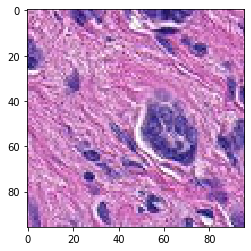

In [25]:
plt.imshow(plt.imread('{}\\tumor\\44c5e5721f4d9c2718a70aacfe6afda38ccf687d.tif'.format(train_directory)))

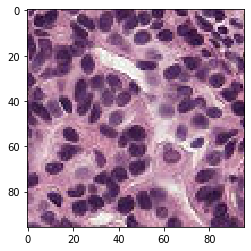

In [26]:
plt.imshow(plt.imread('{}\\tumor\\b5e1e1ba5753792bd4897f0f562ce05ecaeb09fe.tif'.format(train_directory)))

Examples of non-tumor images

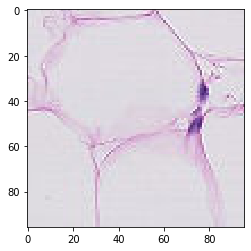

In [27]:
plt.imshow(plt.imread('{}\\not_tumor\\58e418695d800b0a41761fd66184d53a918640f3.tif'.format(train_directory)))

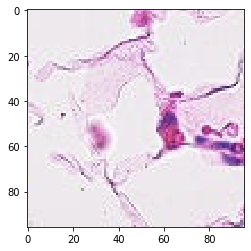

In [28]:
plt.imshow(plt.imread('{}\\not_tumor\\c6337fe24942ee6a5c87aecef104e47b73bc3f5c.tif'.format(train_directory)))

To validation folder

In [29]:
val_data.head(2)
val_data['id']= val_data.id + '.tif'
val_data.head(2)

id  label
2271  59767e1e411276469e209896d13fec5c16b12bfe      0
7138  31d61b4e5de0c3b09e4dedbf154d4ae2882b7ee7      0

C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


id  label
2271  59767e1e411276469e209896d13fec5c16b12bfe.tif      0
7138  31d61b4e5de0c3b09e4dedbf154d4ae2882b7ee7.tif      0

In [30]:
val_data['label_text']=np.where(val_data.label==1,'tumor','not_tumor')
val_data.head(2)

C:\Users\Akshada\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


id  label label_text
2271  59767e1e411276469e209896d13fec5c16b12bfe.tif      0  not_tumor
7138  31d61b4e5de0c3b09e4dedbf154d4ae2882b7ee7.tif      0  not_tumor

In [31]:
for index,row in val_data.iterrows():
    old_destination2=os.path.join(extract,row.id)
    
    new_destination2=os.path.join(val_directory,row.label_text, row.id)
    
    shutil.copyfile(old_destination2, new_destination2)

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59767e1e411276469e209896d13fec5c16b12bfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\31d61b4e5de0c3b09e4dedbf154d4ae2882b7ee7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f5dba2ac4e5d2462ce6ea5a2a54431266c879e9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\28c770654f2e80440f87eacd7f68d5c28c8f15de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\efdd8d48ef46490f10d7e74f698e731166adfab9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf2d2f636f1fda45e8db5e5f8ad6fd9a7bb4ef31.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\386026b64a572289053e842a55968f873322dd27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6532b1bd24f5b49980e9c79d95b849ef3bde9725.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\551c940f21e25265fb489aca2fd208142aef3dbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\597d721788768fa589066e32749b61dd708b4d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5f8f882df7729aae957b4d3885fa1f7a8c1e3900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cfa29539b67aa36175087453028475b471a80501.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d29853392545056dd033e05f4629e45d32b485a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\72f90364a932f0f8d0203c38971f90324c8ba433.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c9614c26dce9f4ffd9b74bc1b7be54a856d51773.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f5952e86b53924e9db03de30c3147a4c65f4eff0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\842d74120630f8861048f2c9ca33352509bbcfe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e3a2ea70858864ad9abcebf966d9fe36ff7acb0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59cede8c517f0a33ae65d199f53ef17eb38bed4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\73355d7ee61fcb866a0189988aa4009e1e0a7ec5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\822cd4c95c73e910883b17db5e9f053be79876c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\897019c09cd9c684804a8e6b5fd72b4615a09fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\45513a55cdf60c4bbab34587f0a2573171e5945c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b465c0ea0c695b6f3bfc6abaca9eecd8f69a058e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\101ac95c651ea6aee041d8e8ddd13da5dd4c77ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\47adf795f9a961995d0ebc5db2c8e1c9c5ee81f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\28a7a48a36cfed4fd7c6bc55e427a44362a5594f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\81c7b9e2df3889d9b2c30fc4c37b597fd2c3b147.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4cc02162595d2f7f4c854ad2d4d063ae9cd79e08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b5297fc2ba14dc2e0c685ebbdb854702b7129d1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c29a01cdda798bfdb0f65d0b21a03f4ff7edb3dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\893618d5c260a23785f9143810a4ca480ddb8a02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\30333a73ac6938907403303d33df3d2ce78e7222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bafaa16180ba5ef184159f250c960d2df439f798.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06b19810c3d8d8121723f95f8bcb27564d0c29ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9e27844706fb9bec55b998c3d5c9c52f0dabfc0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d8a3fe55eb07bb7655650f2b2ef03c64afc24f4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3999b59ca155dc93c68df70830bfc65409d6a50b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\699ca2eb2dc1955722f250996388d78506f555ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\df718eb9e440cc7b993b2fa3602f8ba4a672275e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7a6a96d368da11f5c23eb93894369e19ee6849b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\32167d5fca15a77e816530128076360ef06f6f39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76fb13cc9543bf7bd809766fc7ed07217df40965.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ce4a93082b6b049c941017fafbf3633e2f4cba00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c3af2ec77115c5ab69f7db61e58837822fa41233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8ffa0f380e9628ff25e1900ba724d5cc1815d890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2250f0ecc2b13910f1d1392709a168a285acff13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9845d8713709a7ded6ca7595d537d358ad6017d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e02c94560338c390764295dfa2993297dd5380ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c2238f853006c571cf1eab01f620a8f1b78f92ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\66efbbf400987a721e7ed256c97f47bf5c874d84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1bbb2dde50b901800014648196b8c371f2ee74ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4788c0fe362586a0e5931ff35254ce3bc950a8a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0af50e1f492e47a91ce7191ac709e9ac6b422852.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6919c70ee7fb3f6838dba9ce3a47e920ce39aec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\28383b0d8bdaa4adf021ac8c245967bf5fa456b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\124f64a52731e6156b7e53dfa8979c72bde0dd4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc9cddf3400139631aa0d25df349f0a854592d07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\42215232d976d6c61a159d96b78ffb9dedfef9bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ea6eeadcf96ae174f7c79b8a6497df1b3733a15e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ace012a3e68ed903806f735547c7606f154414d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\84102e936ce4a09cdc8d0f53cb591c4aedcb6a9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bd88979c717b0f9f4f7c2b422504e6f897438ea7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\25af4041b79013ab71b9ebce753f9d5532866c6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0006ed0cc8fa6edb4d2a74094cf2d26c85a1a33c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\85f7454ab719954fd472d5d0d21abf693859add0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d6eb72f18f5deb08950fb84057a33ccb5949706c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e4789ba29a61e56da1dc4c158618a3b5bbadb60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06c17b187322da24ace24e37e03884a4887e5f1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9573f95d72f39ecb34fdcb770ffd61ee1b57463a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c42dfb91cbea8154d1b5508a6e5b40dbca606215.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5a5f04250eaecc69f0615fc6c88c55ecf5752838.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7713e593e258fb17405dd3a7069a300c492186ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\24a699309e332b0b80a0ddcf32ee60d41efb44f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\80d837d853c7d1f522ef80a20b860ee82b1f22f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\75c2412c6d828393c52925e1668e585c8d3281e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8bf24af67528d9a891c13be65cfd0cbb3c79e608.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5be10e0210d7112d452a0247463c1c8f18ee9a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7e527b1672259357ab2681cb21c96e63aec3aace.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\19bd9823d47c2bff5e6d266894cd482318fce72d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1660ba99e86e5a120d1e5e8ed33b96de8e470d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d7f3368a5861cfa05b355e3aaed513b777dccc57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3c894141694588394b7bbbe339f91775933539fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\814d7fb6c547c0eeac9282926046b305c29430a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\87ad6eae8d9d83ac19046cc765ac5b9c5269033f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\21494065bde92e204be8abce0edff474941356cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa323176a7f03b0f2c0951e060d4b9f19ea58782.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d248b215b8151e2f36e928e4bc28a3cdda49fb43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5f977b8b9e5fb32171a8a722b77d0f515274c69d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ef4b044a6e83ecdd1e96dba399fbed5bcd762ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\60c61fd4487621ec653dbf89dfcdc837b20d27cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a87dbcd3560bf517e73aac8e53c7d59abbf2b2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4a26d135a39d3285a695d4d79a7360f69bb0a31c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\68fb4f35817057bded8113f6568d71331c84c2c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\70c3de84f2c787bfe7b63f0ed0fdf0c9ae390bb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69ae014b461b2d942d18314f21202908448479ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\633faec36e335b90633a2392cc467ba099157f1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\104fcc16d0d6f10a2e196e0d46f027c46034b1c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\22962270ef5fb215a3515c6acd74107dac2ec251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3be39b07f1fe242d9195092bbbd348ff245456f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\45741f832bd5aafaab855cb81d36b4b7e2ed688a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06768247a351d72c55ed1cfcd870782e6e7bddd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5504ac958230ec2750bad7c8e9080bfa554f5e51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd972defd084d471ffe4bebbe1fd37691829b318.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ffa61a8ca6dee5f0a02c65124c1985f7b0d1337e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ff38ade551ee79353434043969f83677f372144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d4b4d888ad3588a1f46d28998b04a8663d85551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1065c9e26b5c0a91fb3b0296c7a132730e09fdd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e1b3aa8efc7244e89c38ace3cd177b5b0884927b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b43f2f61c238f9af969e686a7ebdc6a6535794e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9a7aaa019c8d2a1ffbcfaaaaf4db2c33786a26fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\84545f5fe24d307f223b7508b353d897933d92b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7d6848e6912b752af149122ef52e52966e719d1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\62bebce30063d8036b328439bba74eafb251dd9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\459a747334d94290c34c9997611f84fb097779ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a2c49a12cea5e52e353fe107167105d53b359cd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\32afb4c1fec7bf85f240244cdb04d3147b1c2c25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0bbdb181d3a5cc4f0438c27f3cdae166f82ecc98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c9c729954ecf5e8044a0e0e42a4553a6a0d1d11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9cbe1283dd17b727f4d514258166abdc75a111be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c4d78ba12ae97eeb4729125f875bc33ee1af1c7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\257cad02a63f1893557792f0053400295f64c514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4061bec353dd28e13b514dc275d9309d6a4a45c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\121ea6d729817f4ccbee54ccdec4a719bc07b0dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6400259738b7912b4109f24f620387737be1c263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c8921d36aa3e85339035096e630a2c3494563265.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\16acca0a3c33ca77f16053fccbfc278b38cb59fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\45bea6482c2f4f7ed99de6fcbf459d2cabbdd6a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\365df3b7900b56e205f4e7b23fdd59443823f7ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\70156d589271c951bd5a9b0fd7f0029fa4585411.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\48d4cf6d4a9f5a9d4e75f32f9e02576367b20cc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d9b10ca5d136d393598f1bab6ee22ec94b5cd0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\07a0169533f12305a847a94634d5dff3f9765be9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\55a345c562416a0451732fc573711879228eb458.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b542f50164e59113cbe8bd2f39d5996bf3afcd14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f235a43dfb252395846288c2d034a8392d0f71e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0aaedbc10aa7a1e933a2abdc9ab91a280154118b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\47171377d0e4bdbc23c103ae2edb816fd2494ddf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b7c3495cca77d4255ebec3215d5e7645d85a4b6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\01b4cbc1d2e48284df611dd53454ed8fe4e70803.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f6ef596116fc166786a290884c6f3ae44dde9645.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a2b9eaa2f66eea377e403b28d939055498cba725.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a02bd313e78d62dce08449156fca7c5686ce275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\807bcfe5d00fa34f8bc941d702feed4966af7511.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\132ca28d8c2d4de58e33857a9fbf8aa7e614e73e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33a9bc4cd4f3b9039e224f39b52a918b390636a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa721bb5db3876a1f28e1addac8cf1a47e9703b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3be11f34d546b176fb9e9934d49b2c484cd898a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0037f55a37a6549f1b552e20206d380c24217ec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2901fd57d6f258e6e83b9d5d60c7fcd3cf5f0937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9d632ee25ac2e1c0b63309f049e015a07930aeb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8909859fce0e95bc8a2264795fe33be3990c7fc1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\56d60eef68eb4d553a1ed1393a814b4362e5b28b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69ba94f30256195c03fb89cba3972a7b08728199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9df0111271963ee09d79c522df0650beadcc4c9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4af4a4c8dd4c93204a35ecf9b9aa32e6ff1d37f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\31cdc4fa7de4d311fa178daecb606516a4c0de58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\44d90de02a7487daa84c1355ff9660b2637dba90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76db5eefb8a1d27eebd110a4ff257667269f3247.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eafe00a95028b618d6859b41bc0de15dd43aefb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d52295688c95f1a25dd7c8551de7ef30905d60fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8fe0d20abaa1bbe940809d74555f2b6be175fffe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\404d8e68754c2771beaf0ed7c7219298084054ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\83a8503f2dd6b1f45bfc7b53718d630f7e4bc87e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\592672264df15d6bd5391f8c122439673065416f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\daa8daf5bab85c31f615ac0691a1d966e1817828.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c583c87604c51d71cfc0bcb92a5ae25f484ef060.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5a163f8cca367f82a77c52dfaa9f84077856d01e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\99d1a2568fdd163bf46d01c8349c31f13596f693.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c439e74212592cb7352cf456055064b9aa33ffe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\29cde6a29c4340b04e180c1fec5a203d5d8d8bd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\863be6a6fafc6566c1d4b5edd9761a7666700c74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2059a84901c33ebad89485ca4c0761ac725dd5f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\481def92a8b090b4cc9ba7fa09b2b98a06714a4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9dedb343a23e43c3eab19481039401342a869c50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\60ac21158994fee846c541fc7e5259b9f68d4841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a6820fdd84100cd656aa1091f59504c3813cb3da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3adca6cf48552e5b31e9ea3f942c91ef874ab030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa9d9c2131c6dc6d635ff63e5fdb3a88be31ece0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5b241cfa3cb0877d5a846a7e94353977c716740d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\709bd26c99b364bcb926705a904d11188650913a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12bd26c2b1f8768e510672a6b75ea84fbc8f8a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\66168017c2ad3908863a5e030453424ebecbaf0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\af8791c5ec5b2b3a7a49a6b5aaa8232abcc0657b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d34296b45723cf52809689ea9fc2a07d77dfe04e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3861b13ad3f8ea9e7f6e3ee262734ed182655d37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1ca9ff5abec6fa88fc04a20119b91a4677ca3e00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7f009b2235c99bd8476975b27e783a8e04be28ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\989e146da0b450f467ca0ae1546d0c2331a8c622.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\576a2e1702a8170650b2f963f9f1e5918a26e02e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2a5b084a8aad8cfc1d34f07205a78c161d666d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa193e0262304c98d087f27bcb22ab3e0ab8302e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\74c73e972b99eb86edd8fbed2d5086fad26ce5fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4a6e9fdead2096f4eee8ab4524a45ad2509c9fe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\12ce1c505d85124ef767204926f16bbb4852378f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b673aba7b82812d12249f9cb5dc4f50962456ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\99d842c229902a3e8e01d0a85d10b57fee05eedc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12d9b8215ffe239f4098b4fd498b88185e338b61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4c2fe71a89e8a7b616dd8f2a7d12f73b915d52b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b7ffff58e1a0c9bd661ea65d523eeb52cef25092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9dd9895f56932401ad53d43dba02a830a60849d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8c798edf4c9db8afaa237cf67f5bfa610e7a9c7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c6309ec117bbccc12576aba26dcaf61e92e9c19a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5d48165e380521c562c295e5ad53eac75f13e82b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4441955e345aa4c39d160c283d931b59ba07575b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\58246bcca2bd564c6dcce8ef3ab8da2047fb4fbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1ab4fda4530c5571d806fa782a274523b7eab89f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ff7b57b47c97588bb72ae44862a9ed78b3059f74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7edc2c5b0dd9b1d22c9e5d5e774ba4983ad87a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d78469f3827e6a02a18cde25a245a04e8863fa76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2a997bb50b8b9d146a4890ccebf173fe095a2492.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7f3ca7044e0ee64cf30e34826480f899b38e4e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\42004981dbbca91cd894a7d26668d5601d83392f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dd642de6ba9a7aadfb162e22ecd21e4996d03187.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8400c8f15438ce41bb26aa565a08ab051fded774.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\389ae78719edbcb5328b2f6749992d889a6ce759.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c78ef97116b13ddf94c7b0838f88dc0458770306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\69ef8f6adc24ba458dc7eb551f03b70f1e17e169.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bb321324d3fb460f61597aba5778c0c10f3f7bc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9efdaaada0785eb58b0bb85cca9c44a768ac4cb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8e8d9abed8ffde1693093a42c77c6209c4100785.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\78329584abbf5d8d022772240a321d7c844b0f6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1b0d4246fe83acf66986f09017a7a11fc88fce73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d13ed7901a63831f3f8edcdc755bd9f6018ef3c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\84515f7f450dccbdd96f25e8e7e6c74ba65106f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\54226602360c197f039c90efe71531da2cd0b233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa4c67e6c947ad00b6b11ab75f6f3532ee44a82c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\462531daa8e9f4518b2c2c5d080fc70325575936.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\61e6e39ce0c43520396fca3a2386a90bf6ee0e5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8860874ee57a6485210dc7d4cb45ebb903459b8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c39a5c894662b4f860771eaf57792cffd647fad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bc18da0310fd0ff1a84fc76c2af05b211744a455.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2ced51438806cc9aee2a7263c236e8efa00d6122.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64adcd4b429903a9ee62f5bb055a814a64a6591c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3d79e4fd1b071efa8ed99e9c3175870d84afd988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\043dacdcb54e1e723b4a2c0564e89a650698c5bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3caf7aad9bf112639bc72c576833be09688da769.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7ea87954a7b2cafe30c176f93a27a1311c64e0c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fcb111a8009fd165498ac27738a67bca2394a10d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e272d4321aae0970137a7ff5f62624e7b283e70f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be401c75c0ba825d98e978e8a68320d35473eb29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\36beb6d8eee7848b183c9cce6a7b7c8faaf4bacb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e4c2a10a2f4ea9019f203690fc748f41a074458e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a3056e6da958aeba937414f0c3c3d99c737543bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8527f0601ea6ca742687471f6c1004174fdca1eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b0c20ac64045c7fd5ffd858f7a15a1d4815345c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f1b09ee88ddf8d6377817d4a30bd0c9562080997.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d24304ab20ee7370f9ea11c8072167e6a5de84f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\540fbc0a6d1f802b24e5d51baa01fef6a6bafab5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5e5c8a67a1f95bf99e57d86ab87cffc1825a3998.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dcb06d2bee39a05f5e5115f866252cfe16835c40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c2a2ee1c6dcf50069d8358c938f4aaad5bab0dbe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ab82da05a633e903ad1c381143d5b924e9fd0595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0b17b57ab928da2fb8ef43d46c9f3deaa8635d4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f3aded76d80d93388f63e37c29f0236c1645fae7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c5eec93a27a51d37fc8a3163058ab21955afb0db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a38a722f2f9e257cde589c18ac634b086ae8d87d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d2f4f083dd369671c9fb3b26884fb0df0b54f303.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5f923ead341f302d568240a15cf9df2e5409bf5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c03bc5078b372b87d6baec285b438d4ab49b1ea0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a54384712b468f9bce8ad18891e664a638a076f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad88f632ddf7704655a14f06d701c78f7f469c67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a9d15bea0c0dc35d4b52f861df14cffcfb08214.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5bfac11367aa0262a6fa4b7725cfb56849e303d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\87ba280c7ee9e31ad49eb33af30d8b605061b063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\47c615c3d6e8c6131f7ab491c6d1b89aa902ec82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a2293c578cb2f62589f9a00011206ff6fc192887.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f93037c9e24d023e80591ea6fa4e24057f54747e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c97b651d56bdfe1fa964f1107450fd7b9c9664b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be4a72797bcfda827857ad802278a9c59d5139c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ac1edbc90366a52f1ef69cbbbf62c45ba994d263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2285dcdd2a641ab70c1f40652e62d57aba02cba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\98f61e0ead8f961bfdd679b56fa9c89a7ca655a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\66b4505ed3d013ecb111c7956883657caa7f8018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\39bcc00c7499f27c1d378f7085a31ff9ed53a91c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db0516030159e5ae1ef104553b93a7cf87e0857a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6afe64b211d6f791f2dc6a725c83c260d99d1b5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6dff94999edc038d6a5cc304522dc2243081d47f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3a4f18b414d95418f30c5f78440f4fbe085a56f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0bd211f05ed33cd7840c613801d34c82a2f94a1a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\07004cf7c7028b99a75b010d4e550220fc6ac4f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a3a92a84c0a7af0a3f55760bb6bfcda97eca879b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c39dd5f7254c4501cbdef2f66dbf75fe8479d33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2454195372ba89268270752ebc0066bb95a1c5ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1bf5b4507510bdd38dddb23dfad49a33f7be5ae1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b66c481f956efceec50b59f6e4e3b86ebed30381.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\396a1b1b4355726cc64ccff274c77e5a94f9dbe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f0a705fada02835b3eafd7de392d1850b0966f20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2a7cc7452d1fc7dc7e8b00b4b67d7e85d07ac6d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\517e1ab7a91f36195a52b2ed2f2fec0c267bafca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\331240699c87997008abd5f82e85212e5c516131.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\660ff23f1a0327eecc2db7231b5e43507aa06bd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cc340d63f6da85a28a82662fb3b1bd9f3f4e8e7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\461b80da6dd3da909be5c8830853759842f3dad6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7d1a5c6b528900959fef7a80b8057d1516b49203.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\05a7be4db58d93405d9458312650b8bced3d3bec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\941294634ec87983c5cb8f62e4fed31f87139fc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\09989302f07b8bfaca4cb3275f6e4ddba3067acc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2715fb0d35913cea987887bc136fe39cb565edc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69d572155eff030e3252324c3289debb4cb83437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2096967f614590f2cdfe7ef9e0d9ac8ee856e9a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\defb833c7036417d13687c5c3d27cb9ed40f8662.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4f59eb68cd1453a7e8e413987893114709db629c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ecd946a00bc1948fb442ed4f33cfdcc64dffafd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc8ad1f01e23ffdd724439371fa653d6101c9953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60095a74283385736402be4783b02c9cafad9dcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\337695d7ed3180a9a0a1765a4257395be6234656.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ecad1c06c66c6fe1510fb0dc9aa8f73a7ff4af01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a3aa7f1991198c6d3ca84ffa9a05d843ce56f274.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc38ec07a0825ec26541039b6c232bee36332421.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\803b1e91e3e5ec7319afc10e7ecda01bb779fe7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\98cade694b5aa9da0d5e8fd88024aceb11892225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76f20c3d6d68e73e9ef0a052e804ca6ed9260790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0bbac9519f177c7406bf55fdd54f14879ee19fb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64c5f2d34d1edb99bd1774674765e43c3175d9ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\65d3ccb523417ae07eae1ba38783f1791f2e2389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89493fd93327f355d4ec5495c2076b2bc336b2f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6a219cf4ff5268cafd6a71f0f1744f9cf15406c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3124c6a973c949f072d3d1db0c2a38dc807c7bfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\97b0f67852483d63c5c975f6fb35a2f62ec886c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\abf4b96dd111de95c8be0624fa1eeb08f0bbd52c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d7e3cbab28253115e51662c8e5f9fbc61c9c7835.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d8968b2158d97d520c26f97f78491e32506dcd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9c034c2ba6ba5d43bc5965769c52dcbd5e87009c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\333bf9056fab2d5ea164dfa72337ac5731d60d25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\628c605ecf1e8a55a43570ff766e32a7168dc8c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aaa60c2c16894a14953e3ceeca5f2f845d999d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2172008374255d0191d05f0f3108b3ad51cfe8f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f1947f1ee2f8fd8818a58d11375e09797edc330d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d48d220d2b81a778bc00f8b6acd9737021564111.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dbe21fed2a0cd532bf4c29da1661d4109d7d931d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\976f280fe06e99edc45e5680438fe27261a6cda6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\111c9bf490b9c3efc23b5d15a1141b230ecebfac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\62b4ca0a528b433a40b723a47275b92d76866a26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5443f762f135cb62c13c795a073827244500b986.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\17a864afc8f7147a3d604608519ba47397983786.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\24381cc355b6d5e50e6a28617da1fee5b6c94353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60ed96bc806987e4d10244767e6a98fa70b9387d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\742bcfa429beddf079ee4d1ab1c2949fc09127f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ef35c931f2326bc069134b11aac1330bd768f73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0bdb69da3f2397e16f90396311e5c08c738f99a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3fdaef0843d7776861fde177cf9821abd9a1ee9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a32c61b916ab5e9b697f8f235da5fdcc55ee77ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\24762338b216e9e7c12c80f637623bfd2d3a80da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f54350baedecb0c983b8e298af721c9989427e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a515723f67189b666e8bd3bac69b2d030353e14e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2fea4134230b953d89ca521c6ccf9c5d29cebac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2b7e40ff6784c0b67e5d6682d99d9acdbf35178b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\58761f09abba3ca8a1949705625213f2a0a22482.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c37f742221bb9d5fdc0f222f6fae04df89f3b38b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4bf8f8b059420da1dd97c4642a03d88a805a04ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\94d9cf1a07c707851631a806496d9a4ea599884c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4fdda884359b0fbf5bd476fabf42eafa6cb4a8b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\204b26999386a6ca8bc4373885c2ed395c09d71e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1a63443bf1fd0b97d5c7bfed8c6396ba496d6451.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f24dfcd6be373d6b2ca146cb4ea0f632fd0865b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3232fe37c84816bf189908f05f396726f83d9463.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e31f62ba59c0955831375dc05ba39f78b2b757bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76804f4544736d182f80b7484bb92ec954a8c723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\161140d8c22ed0f7fdc23e39879412e4f3ffee1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4ef314a2fbaaa60824dc430f5292e7da7f5313bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\48e33bbd74fb238f54a6389631d31531038ff11d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\94da2894995d86a2dad8759b91c97c163c6f4049.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e41ab93f0c113125bcf88434d8f7cac3869b2402.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\347774e12a239bba4671c2034950ffd733e29968.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1c65a82b497f257923a74c4393ebd73e24f74e88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02a4da6468773a754860d7a48f4849c3ce9b895a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa1acadd0b4702e5b1a810b52b208df414dd3d2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\29604a757aa7f9844b26391b9fed74fc6e281c2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\127d08642721784242062c483a31565c8761e92f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9844ba8e7f58ce88563b2419cda427c2390da84f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59d32de72f049943853c64c4ee8f666edb67a6a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\42298f628c4bdee4a09394eed20ccacfb528310a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8d12c1505307a068a8bd49df53af7180fed04997.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a9df1d2f3f182c7bd68d289e30da27221bde25f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e3ca405fbe01f24e3d5b30e4bf07e50ee2d0ac06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9c34bc489fb1f29413a63f4d4b32299d6e5d9532.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cce14f756e16679395b852196ef5df025d9b874f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\259c92d4edcd209fa726e9cd0847a0ef36e9ee2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\58e5197e4d47a71b2eab24378f324a0bff371f30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e4d2efa9571f4430310cced947c480c266b97851.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cdaa618603db56f65438f3d79f8c30702eeeaa05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f4bbc896c1ba58f94fe9a53b27275f8c77d83069.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\183ea8eb21156a8367480f08622234b27fb24ebf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\77b5af098e3c05d27d076d2d93e9e526c31c82e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d0da6f1eb4899368ca6d12644056154054fbe53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a51870e758018bdd34b0d2cfdb392bb4b13d2b1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cbead80fcfe5a2df855d3820e9577da732b5891f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e96cd29afb737ca110c45470c124f52174bd514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7e4414eb62252ac125e991048d5a110520871423.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a7a05d1aeb33b81cccf9dd68376cc438dc4576eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f9812a18cba4792ce63544b5d6df1cabcc3dc49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dd3e164f8e06b0194e8fdd1bca3868dc2c359cbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aceb0a340d7b7c408c7d8c82f3734cad8dd5889a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\493abc68c0c430b210edd456b8b17c7674e52034.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\efe7cd9935d9b412e9c324c567ff7c1c909dac6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\575f67af1447c4b93ec0f704465765fd37474d88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11f55b1e4a77396e0b0300bbf04d0fb2f1939425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fe1fa6c5aaf667cc640186bfc492275c347a864e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1433174fa0fe9545db3a21d19fbbe20c35f5d2c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a776bc2b108e6426e8dbf4f31ce39620d7ff9530.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\508d6583c0145eb7e19f1f65348d39a7cbfc327b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1203811ba8d7271faf4d0165f8a1e40e06bbb5e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\49fc563166fd260f7e14aaa07f0dad62d5bdbf78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a3beeb5f7c372a8385010afa901dcdd72d43c87e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d55b83b7510b6d03109d0a8f9e47e2f90579941d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ac9c541f3512891dd34e9dd7dc3b2f98e57e14df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6c8d48233f934077ccec06cae1204a7f4e3f4e3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\162c106ee32c8186502c36e4426695f9fd3ff425.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23df155c30bc8413d856bfbc3563c834668e557d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4099d26ef862093aeacafe64bda5676a1d0345cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ce4f29bb61c1df5b6a77798fa8c3cbfe003648db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d934053022a53ad026972a5b52ae3e5a156ef294.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1b82d3854f7dbf8fd4f630a843d32eedcc0485e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d043c31616d3f4bda40ce4cfca79ebb6501bad8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e7fd772a6aa593bc8ecb79fe6cb6e4723d63ee99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9766bd01f3b627d693b67c12ef8d8b91e988366d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7760f93c5dc1abe40ce2cbe34a5ef8e8ca7e3f9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\faf36df3e64a8a5334bbc5277516a6a58c47c714.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\11ecd016e9d73ca968705a54957ec5daa0ddb988.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\57fb9d75a810518a76e18372af5937ebe043efe9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c1dd607cd0f6294c67f2714ed4cdc76cfbd0d3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\853ce058e9367047380948805b917f7e7e2db7e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f9951d3e11ad0845d1c34dd3ba04054bd813f45b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\33db59cb5812f62db0a9270aba77ec6405a4f45c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2fe8cef2c20833c78d001e665a62ed54b2c12c88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ea98e2ff0e7ae615a4a97e6d1ee4d4be51bb4da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d1d21a3cb716636adac4a9decce22388502c9bb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2a6748a04dd451aef5cc982a19d1912a2e43f8dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0150c36f39fdd00e553bad08feb6082f7830c1e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4f238e58170d1ec737b14d98c131b75e0f88c097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad25e86febfdd47c7d88d2cc66ed494cb646c651.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8debcddccfa10f7839d0bc78f9bc1610ea26c8cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5764b2b0018d0ad848509a644e201ac261578330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\167294e4ad0e26d8c11a27941e3880cfc1a6e124.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a50f4c03b507fe715f663db038f4a26ba2bd9cb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\457865e8fcc13af2c72a7667f08d9a7128cbfaee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ce72ed8add10057f8911f8edd635f6a90806dd0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a07373b44c20fc7acf84433f9b8e2a35847d219c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\53a10e9fef3bb7cf99e29649eb2d36e0079ceb24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dfbd8ae471caea95fc48da410abcaaacd2c2daf9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\801543730204eee41d59e70ca9a3476075f86536.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a653a17912598d4781ff9f17bdf10dd84aa8be9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dab6c93a277d8d68c854af957b7a98498de38efd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\84c4a4bbe524a7286a37b5a9b30b92852b6fc016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f769f15d97c1fc6dcb259fcf71da4c850397aca6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\de76f1cfff8be0ce3ea1e16d756a8cbde443e3b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\70071b0d673e23d432d70278de00e203ecc3efc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9df9df3a051aa4ab8e04b99c2a29522cf9367885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\38c49dc5c8718c058cba8124a2b31c1750667bdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69c10bda03f40fb48c747af6b0c871f3c2c98b7d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\764ad47e86a3d7b1b79ef4c34ffcb8acda56725d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c8629800dc9cbac45abd42ba576677768a0e9680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c32747650366507ac1966c2862157f2a7b8097f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f10e731392cb77e61ebc823b6798070486390d81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ae77b7cd7941559dd28896395f034321934bfb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cdd63a728fa5a98ea48b626349a7e0bdb9385ca1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d2e03edcebd9048c4c79a8504a71c079cac769e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7dce7e9c00b8088cbc231f47e97963fb117ae3f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\39baf6a3b81ed86f93a464ac2590fa17e38b1325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa382df55f1bfe39fb838dc708e31871b6ffa3df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5711f0a39a11ff36b2adf6f9a5c42a204a301c9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1eab14fa0ccb4e8e1355a38ba8c41ef65d40d472.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a65f4ff998376f7383a42104af89379afb7ec8c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5f3224e6cecf100cc21bad618fb7f1616d94e786.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\efd1f5a6712893c1c46b93bc18201c990ebc02e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e53ef280a32a962846cd1f00c6bb6dc5ade77480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3a1228e0cbc7d295beb15e46c89bc556652868e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2d265fb34f0b7741bfc01f75b3b8eab051334d48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\46389e8c815162fc0981eaed35870d2c49e4ac54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b4ce85e0cdbdf0ae8e081334a8415700970e4b05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\268ed0e7eb2a61bce7a5cbf9732b7261caebaf6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23dd56fde3ecf34d47e6c728991448d4a1e2606a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e4e364f3a746ebc99738b928b6e77925c9d2daa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\21ed43447c2fa1b58dbc3a73ebdc9fdfc0dd379f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3ad8555e3302b54d17d23091f7c831af9adc270d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5d0f6f9bd81e0123c2d737bc7185ceae194636a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f5d28e1459d2be0f141c32df32b359dea9eb61e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e5c8b235b3ecde104df5d4a166ba2d55142d62d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\844c7c2112a1d4e5503cc4ab46ab9fed5ce23610.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9c206aae322f515081b312139de402430f1de755.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02fb8978bdbfa32fc7414fe207b55048cdc6e447.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0d4cce6d73cac66ca162126181b5715f658b830a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02316bfb671216e7b84145210bad61a2bb3ebac8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9de801c109ffb722d0d36c5389aa1e50bb7b5311.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c8497705b303d1d9e35060bb79fc7870dc9e1779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\af276952b9e6e64a097eac0146dbff4a01c9cbeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\30f2034c2ce79d61f0d64b8b825f8bf11870f287.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b67e46e3d498704b85d11251659862282d59fd0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b8c07a29987d98e8dbfbfcf72626552f61126a44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\074185e2727e53003db64ca97d659a9be3524d8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b577c08f0b9d29f690aa3d8ae4b8870e51c581bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\41616f3f9c3202bcede62f55b03a9a5755495077.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\49b6d2d4b3a903a4500ba9e3daa8355312374165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f4d3263ddc881a07a12e7e3ba0da07f63576f465.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3fbf9e13f02f2a119015d8b2cef7acc036d8c64a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51759beeb5dad706ce08f5b987a7d22442b6b3ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\66c4b71f5abde8c2f243cae4865c987b4ef322cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a72431e93abaf48f4f9c6562c6dc7b787d2472fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\82433f3b804cc764f21cca65653af686ac6e3375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\00a9155e2a10692ea1c2c23dab86b3629bc7d4d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fc517cf6b43d46ca8ad489a7109015a3e26a4dfe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\956cdb918f989d2d356012acd3f9b7b2ce056d4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c2fa46bb4552dc731d4f265403b75e783aaf50e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b7e2bc77f2cf29ab75243fb49834ccdafbce5a7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\23645354264b4e8c3de9b4f65a7c249b5b439985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3d2fb88f18483d1cb831511c1bdf2188ad392da2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c22b2feb7807ec2632aa6904693d09ee1a2e82d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0f3d7881216067f61bb7a54e34dee3e44e9ff745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1d296ebca33139fd1d932b8b9eb60c06577c7722.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cce34050c9073cab73a11ed3d9ef13ff7cdb1779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c748a565701fa2eeab57799de6ebc0aae8bf7c4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bc77f0eb5729fe1d27e1dffc753bc848989a7b66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4672247eba1226511b37222faab16980d4260890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d0bcb15199fedb6f196585703d77527b4171ddfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b285a2a54477b392c4cab5b5549d34e2fb5ae90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d796648be9f8612a7fdfd6d90bbd7eeea809809d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d3ec7b2a2b8b2be3d396d31ff1bc9a0aa9370698.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1125fd56f5c00eed1f7772f4344af0ed8af7b991.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\63a3c086a24219d0cd2f3e6c1b7481b79b9fd97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\511f66e29154b6bbe328d273541ca1d37d5e5196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\91bc94e6c527c36ffb91c8997053409bd076d7eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a33176c03adb19e0c82511d9f2bbaed390ce3048.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\668b357fd206eb0ed560d08897f4b5728507a5bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d94b74e1464ef5fde086b4526fc494b5486cced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c0b54df979907625d1cf274ab56532ef3c732ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b05a685d6474c17a49b480c020fdad0a4d2a5fc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9de51adb76e96e774c891bbfb4a4ed677358564b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59223e3536edd38b146ec3523b7014d54df4c7ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\db8d184827ca983faa1cf9d741169f1bd5167528.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\329ecd17485b5532cf99c08aee96b44f08846e38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b7ace48b2929980ac0e5ec4ab72e2022031fa683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\74d77f789d1f34bae3ce89ede6799d41b27855db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5a8d75753adbc744c45c12744fa29b2353ea2d84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c56edde48c335189ec6833d2b7072b01c9a3e41c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c32bd11dee00cdb6bf7f16c770e724ae6ac1c85b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\79961c1173e92015a1f22fc7eb02456f89ac0566.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\655b0321cec6ec654c5662f17641b9ce50db8c92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b656a8dc56b5156fc11b007dd50cb59ac447449c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\73854bbf6e1ecd7b38cbe39702fc6207838f870f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e5cfdf7c3fec58658c5b438d141ef7ead645625a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a7313804a8d73013a4c9f5c076e0b921b457b0f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0dc0a42d4ab74b450d717987ddd404d1237911ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c086c27c3b2e15f598579763dee02c38b0444f99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1063af3daaa80beabef6c99641a6fd37a5fadf7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f3729d7e6d7c37702c6919a386657c0a4357e233.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\901a93d87257761043ec9e7ef4d6eca0a9d4b58d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\259b7eac499e5a1d1e622e8e32f15c6861f6a753.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1ed483b0f84f5af4867ef8926ccbd3e6517a2ba1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d4c554c4fbb12db7c4e5189c48c4894ff1e26d2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4a83e36910f86bc641c7c606167d55550b6aef5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\df73025060b3f28251a507b3317c6e5433541f24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\94a4dcb837b7f1a49a10c2f71f9d62321175e8e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1d09919fcbd2d059f30d219c7fc36422c985fdd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\15fc8f7f934a18e826aad56f61af469b3f266bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5ea2667478508bd72ca906a27ae6d81bb19d5f4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\896783f29f7c49a15f7a955b191083271bf8c592.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\40a49247a96cca38382ce942f968af98d73f52c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\47403574747f1ce94d3bcb2840f5499801d5dc7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\027fc26fac23042d5bcd9ebff2e33bf6d88579bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5b80ee36ecef3174f45400c731137cdbcc457af6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0036c55a759e62b266d643fa76ad3229616d524f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a45f270646bf69201e6c04fdacdb8dde4f97d1ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f160c85febe7c587f39f9b3c72186ff61550b0cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c9bf83af86a2872367588d75c24f5434a7995514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\80497985f3923ff79eff23bb138ee15162611ccc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d13bfea311300b2de9173ae45b83e32e21f6b60b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9889083338e61d77db758273a3c5614e3753fa5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\22baf73f947ba41c94a290b6b561315710cc1da1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\af2da13095dbc4733af6b1e6fdebb653867ec0ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\106766c94105b098b4ee3513e98fb13c46413f0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ed50b4f24eedcea7ea77eff9106fbe0cd5ae7954.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0f3858e0e0733ce2bd9053e2f97a9987a8bff688.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a90a9932d8730a1cd454440737d2bdbf6164d8fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\013c2f8486ea5aaa80899c132c76302685ad01bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a216491afc472055e94e2f74dcf297b25dd63003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\554a19c5e0e74c0c4caaaed417493931c200ae30.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c95cd759dcef810b8de839e2b47c8386d58dba66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5117ac5099cc3320f0379b702b705e1a279d322c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\46f6901b554bc408ca49eaad5e228b00fe7d9da2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\30021c21119d364096f6e091752f33ec430fd018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\362abdaa7748aa8c79897fe3d2846f201f9b17e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db6d904d6d80352ef634ae297601f351e33d3801.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\075277e32cff21439d57ed5a4e72781c9aac2819.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\506fac5cec15f1ca2e66827a3b25a0668b8689db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8269829f339a6fbbc7b62f86384f70bcdf25d85c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9e894fc2954c23f2034f06dedfa4960b78f9d2bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c247b001f1c1c44bddf781a97b041dc6a8b582e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\47d095752e8b5a420c2a39572f2195bde2e0127e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dcd335fb9d3a317a3ee47b7cd9c1766a2e812bdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd3eb8e2aa5e908b51143744dff5806e38d3a474.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db810a24da707ac7cbbe3db60252fbac259341d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09824c1529cc25bec7b77afa029019932a79d414.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cfbf0376a77bf6cd89a7f4b9b6c0c0bdd5ecf3f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4be02b5aefd5f8bca1caf95ae7581eb0c76c931c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f3cb5af95b7c860b6de0353fb8fcb912cc359b4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a362a5aa95cbabf040730dbbf25a9d147b26d915.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e67e8ee6e735ee0f8ebc034b2464b3b4ee0be47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\917bec2bf429d25dadc82206c51bae18c0ffd5db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c81865c8f4d77074d9429e7f0c5f2e19f611569c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\17a934ee602b790eecf44c1ad16f36f1a0ed21ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\756808ef87521eaee13f7b253e56acaa43d53073.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d30efcbb0486f81faaf60b400f6ebc935610b53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f999b91710cde8e5f6eae73e37d5b53a156ebcd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b69f80ab5e7ffdc0ad3b25d358f2bb4e99cc59fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4386455b97f8469670e659cd260c7e8b45203691.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1b7e87a57b50f9bdddef5c535c90056a20700a42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\961bc094d724e44dcbad6f5b6f9cb1fe97b0b167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\96d8b6b25443f972b8ca9c00b0e57918d8e1d064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fbab46590d608108352e2f35abdea1df7acd233b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a83fcf83da5041d57f51de97d7211a60e64bf866.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\701e2523a02053af6c1f13c5fa8b96c4b32e04de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3bf69664c74ca536084fc0c3dade7db24c59101a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ffbb2031bdc647a30684ee6d0c5d29147f9a9408.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\242eac9adeaee94585781936198a9211b378db46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d29303af69a627baef5981bd9546130747aee2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2bc401a8cdefb06f6cbf0c012068b144ceb976d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a33e5191fa362084a13f3be56878b4b1aec0611b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa7c03611cb145c6d9a317dd519926f11ef2d796.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33219c54855d31390a2b100641a6b9183ecf73cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3943eb895785318a4992a4f0384b245fa75db5c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aeae1a23103e9b3d0cf91fe544965568f533638b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c6c3a3769275917f5042cf1af438c6c38ec63083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5aaccfea73084b55f39fb75344dff2d09459b21c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e04522a4b1823a27c01f7b71f550c54c827cde16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06fc3e30d262a503243ad6ea0004cfe58bc13890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\917d5fce6122073b9c7c11b19b16a952f278e702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cd520da61f8860a94f62c75672d1b7b0ff966544.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\05293ed91d301c7a7f12be81e4e19574b5c41995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\63ffc38b5e0e27e01b8c9bd12693e5cf0b31c1e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aaacc9f1794326a625f1011fb9f608e4ebe839b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c9328e2c471d6ad6d139c2d91b5bc0b4ded7b123.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bccf43b70d6f9c22b2d1450a62ac3eecdb8d28a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\83f3de35fdd14434e8e66488ba87c07a1aa5b9ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c9f02324500986f5d80f0f3829d749e4b348667.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\932c223d5182ca02b3badf74b071f6edd2f6c655.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3f7a45eb2f0393f3d873d7e1df489500c7522b3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e7aab979cb0f8866e50dc7bb5f8044869e878222.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a2ab143bebef50a9a10d3fc32ea5a9c5b392237.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\281aa697ccf1debe2777f692de3d0a9b9b1fa602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ff94ab3945832daa5240192b1b90d1df86ccf4c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e1ae80a6cc39044154c7f05ca928a8241b610279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d382f7b605505540722ee48d0b7ecb7a0758ccc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b4a4ab004ef00fc5494e69115ee7bff58208a47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d218b2e38750a9d43030eecfdc9d765e0c07f93c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\119bc4cd9bb60cff45e5297e10f0b6027c51a2e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b9d4146772eb87c4c448ea1a676224070d7eaf5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\992aded53c49d58645e71a5c9cf838588326d636.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d74d3b3f6d5631d624b207956ad2896518469418.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a4a78bb9695a03fa1f04cb09659f2539883125c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\81634e62ee36ad556a5cbde794a97c067e2715da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9a85c2382dad5fb3321c0dcccd49871efc3fe5e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e6c001feb45cd7873b2c032ce9e1992257702aaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25a4c1ca5d02a4eaa6240d6f88cb7cf4a458b3f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ebe2c8be475e1576f2eff5e5ee1c935535b69578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\253ce9460571e257c459f9b3b77d9311a2b1c484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\93a08644e124a670ac413195a67a302dd85e7a28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\24ee4aafd2a73103745e610c288fc5a73e61ceac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c81b71234a1f2d8cdb5d9ff65155e0dfeb117ad8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\897d4ac6db624ee743369daa023dc48e88ed926f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b9275e097e9900beb65796df059eef2896829665.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c63efe075c9f8dece1d0de4cc43a9553cfb3e3ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ed38b97762de56d1a9bc19ce4e99e1b3f733de5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\67b72bd0a9e276c0ef51546f0c5e2d5ee67be313.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60ee41fa6843819bf14afa342abad6b932182b41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0dbae0707ae8ee8778c060f5bad0459b1f38235d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f136f147a219a19d596c605a02789eeb21bc62fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cd53a48fa2968c27f8159a62617ffc059f342f93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bfe417e37d67a90bd8d1e0bd50dd6201ac05866f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25b04562772ed09946377f3c825b059e15db2916.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\075035978017494c55f0216dc1a4effe3a07520d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4477130f04efaa1ef659a463faf2009fd743e763.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b1c87ba715b14f7a547e9af27508edc0c7cdb771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13bccd7c62781986f96216ad9ecbaee387ba3853.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9201fbdb6b86fe3596ed01feaaa5098f733fb4b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\20a48498b5b08b2d54bcfb2bd44f7437c5e96354.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\210f8d40f6c05ac5ff731e62bb80b99c5f49e430.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5c8e09723b58eb3bfcf90bfaa1100ef6a57ce3ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\494244845746637d54526d31f1a766de3dede5ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d95afa7a95fbfde4e825e64b1665be43ee19869e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9debd95b0f2dd412a6b333872cacd828483f69dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec8650feb76af27cc390d13cce0e8f5dd73cfd97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d73aadb88585de4c76b395f64c0482988f6b8e48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\73e735c47029895f18554b3ee93682cd1d961969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bb845b3206224a88fa3873829acace4df664d509.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5b08471dd8cba70945876306888965d6c119121b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\721441259d36fabedd3a9756062c91da9bfae68a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5b5280ba6de22e6d4ead08a878949e25714d6900.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ea569e7a520ce58805d88f46836058f0485c7c55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\98103a0398e0cd8885f20fa9f5ceab1c005645c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76470c978b8824fd8921ed1baf5d0490d88b841b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8fc436faee582cef328d8b8025c0cc8b0d4d8b7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f344f0ab5ceb40c968ab34890ee3c03377b9bbb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d8831622a6e700e0ba2930ad978edaff79457680.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23a18fa1c456c614e8530f8c5fbaf0996c434bd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\951f573721ef63c93ea616130cbd331af9001bfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3b30df6ad415ff1e7beb53776a6c0e7df0f131bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c42da9f1ed4d88947bc77f953f8d819c4eabeeb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c4d15c1cf6b72f69921427ce0f40ec9c543680ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\11e2ccaaf1e7ab735f7070351c4d0a2519b42194.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76e3ff2ca6b911dd974c421ff7b9b5fe704b9aee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e16b44b63cbda1d83f4b06440dfdbc95ca4daba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5f6499d3e51cb51cfe2551a879b5a57d6972b6f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\46783a8d1fba33b282c48bb1415faadb9a39920e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e4f7aa5ce1d0c630c1541141460fb7c3650d7f89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7f1da86c0870bbfb0e078d575423e6ff5f419c74.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9fabab386c17edcc595bfef7587b3502465cb9c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5404463777505b91996d3c64c0f8f3a00294f541.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\81f2bd0083b1f98fdcd34c0ea96bad18f2c8b5b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\35ee6808fa883e958a8d979b21a3670bc950d28b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f20537a7dffbcbbb2bcf3c4641628b07e86b616f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5456f33e0b91da31923668304f93475eaeba1264.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d1d47e6c4c7182f37c5f6b6b27f7059a5a711641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec1bc66bda19bb77fe07cb547d0cf4b182e78697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\91ca65ea6dee284ad449e4adce36408fea4fa1ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\554bbbe34f701735e5acb5cff8e6915628f2ebda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\18223635eea83f81828fcb7b596a1ba30c25e716.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\449929f8231f23d432f83eaad74129aebc8333f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc089ac12c13642208d1f6bc257cf4f806a53811.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa5bc993c735c34ac75779f716e2839cf7a70f00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0019251714cd79d269db386da1dedd9f4d185827.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d1be9c04df607d0ea9fe43c47c8a07d6f8852d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e50672b34aed5e1af58a7c51512b9520b119488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\35c864702db91927a77455f823fcc96895f77b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8ff6125143d5977396326f643ce4051c9738c16e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\df3288ac8a501373e7db105b5a840810b8a383c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\16ca171675e8a1e77acae6ca99734ea005d08267.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8fa54420d73daef0dc4376aab5ac339aeb6642f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cf769987bb42fe4763f72985940f96ecc3f09f16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f16a0f18613828f9941c95829d0d51daa1ed5fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5bd9c63acd964e6a4ffee915fcb5f1f39bab2867.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2e5839a3ebebd9dce5ce25a27efa5b595ce5c3a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cca19ac58a585166607f49badae0fbfa646183c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\354d56dcedf348b9d842762e06ca3276313d26d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f9b18029b15496528f6789c72e3d80d361ae16e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\68397bdfbb9b3154b9c92907d25bd122ac8f17fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c5b039b2b212c4adbb5030e9b8c28b2a6fadd33c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f65f81446eb82f4b46437bb4d8fcc1b780fdaaec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4ff0d98c2198f090687046c48a14158ccccbb60d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c8b8629dc46f165a148e5b0666a54f5b21362047.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\795ff755e74908818e10686dcab2a4a6ed9e24e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ef0c1a78b1a1814496d05c6c21662c93f8cef109.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\095f3ebf4f27ee0bcf886357c5413b947f4f20f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7db91df2cf418192d1a96c6dbadaf93572a1da80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b7145fe32af992f83403b27e6bb4a6b06a9a1fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0ff96607229c57ddbe859aa3a28035dbc10ee744.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d7b9ecbbe66fac65843afd86a887634bccacd58e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\228cca05b38bd9fc62e9a32e2ed37fb0b002358a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69439825bb173eb6c7a75c7b2f4b9d1a3594717d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e83cb92f478dd79279d324c76bb5512f5807ea96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eb82685e3821b85ffb97143ff421d1067f11e588.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d071e4e7785ea9e0bc92b117d938f7d81397ef59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b9b89b06e4d1b71efa2dcf4f1cb2d23b23cf4b18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6a8f1b5815a5ec565f7546f8b777da4e991cb574.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dff6b9e30f58eecc54489f265c8259d6a5c568bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2d42a9d4cc0b8be9ca3357ccff207edc55cd1b24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fb70e5bebe9f8daa651946504e63b6fd3623a3a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9292a2bc41af8931683acd579d4143d57136b6c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6cb2b8f02deb83b542ba452d152b9bd77e621e26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc61626cd697377276fbfd02a06055a2dc69d2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd667c72914127d1b3d79649b0999ce31b5f25c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7963935744f8d01b26a5eef8c6a708874292d23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59a9989e1d33407b9b4ca1ea1fa89a4c221163be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0227fb1b836bb28b150b8df2692c4714419ff486.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\00e83ffb49800dc3a24eb04f8d512b712b526223.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\af782294b961ef7967b282d16932043884103de8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1944a1866d9ed1c139854ff36830b9733c32e3fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8aeb5cbde706d17f5b51a6c1555cf424e71c8ba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8bff57f3dcd37230b552e5ec9e1179c6ae5500be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\75474d518085f7a4d59bf8b3efed210f7bbc5faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\93fdf18470ff7741eab040c3e0b15448dd08d47a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6c4baff5e159f469ba0b80375045d15f8cdc6dcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\834d7d8f377a5f72ae42a69e1c02104bc0063580.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\39efddb707868c0e430dc8a4edc35677f3ba1a98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\549c0ba43441a69b718da8e329381df8c685b526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\371752ef8e88be3cc219473e16707cebbaee856f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ef156932844bb8f7376457d7f2e5a0cae58e3349.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60030bb5c07aa2f817e37ecf4082b08ec003fc73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02943d8c4af377bcb3f2b16a5b5d19fe3e4c5af3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d44ba13be1f5d576608a2fa141ecf514ffeda6ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\66a6b97c3f2c5ad2550aca3efcc55510f382c45d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\45044d79b63c17c648cf8c247fd049ce8e209e44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\75673662f0013ac51cef42d270660421a3a06eea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\53fed3859d83cb12d3f2b710bd364b8e0cd35d48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4616566c7f67c0edb97cb836424eec7f43d31d3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1cd04d81629e44b504da63b330fe4326da1fcd07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5779cfb63e0a863b1449f569bf06b9acad0c061b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\26732e950805aada364fc05728cc7de389bb1160.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4d36e0a7422634d69283d34761a0f6302b974fa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6a78457e27d38d827256bcad5cc973734c08b595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\846303f6c9cf27d84eeac99c297841d4e14a5d67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dafeced682481709ffd3e2004135d5b6566018d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\15874dd17060d819326d71411dc43fdbb630a621.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fcd220a2c93b3a1f7f3e1d079bdb4e2667e2ae83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c378063cfe264ab38900627022bc4ef9c212d8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0046a996a2664f812eac66f4263f740f35bdb085.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\20844a0d01f4323e90f47858e26b4e340d49fce4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bbf9b158d50f3e7627e150b4267c2628f1479e9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b2602cea85baaf86f4b6898ec70e88d48665d12f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eb1ae6f76306a971ebc6ea466ad1837e489d20a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\019678e7a3d13b7aff67000d948aae2ab5cf404a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ea493eb289c07255c46b1453bad03655edb6ec10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7174fb9cd03ffaca09fd3e2784ca7bf1092caa3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4545d69480f021ff854b73ec479ddd7f82c975ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e36e05f64a001ca35b2228e4d630ab6a18c1bd8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9895741d81a57f275ef558493277a6c0e62ca9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8d9cba44ee6cc8828c3b4d2ed777da9df948190e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\170a01435f05f5c98f1c477c332bdf18a8e8a05f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c20eb76de83351a14fc78ce529aabfca3a9e7864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\752ae150f8ff47ac96199becb27858bc71ed9882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5ff40961ce3546056a446303c9403427438db88c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b478c98f3d5d7cf305e636e9b413592e0ed1fd9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c5c79f89efa2de551ff17de20c7dc988588c746.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\611262c918ef86bab28de2e953edbb25a11f85f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7864497db6b94d0791c043b9c7938272397f4e0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5fa632fdc75fce9048781d4f4729d07f9200dc87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a684c4deb31ba57a2a37bff467e0cc296d4bd8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\67d8d8312b1a8179cfd80bcdb67c37d84977a06c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7984df7d29161eafb3b0dfe00a97e69300cdf09b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3eaa63a27583ccb0aa6d678ea9bf53b35cef4c7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa4776ae9a5f3144a9312fbd6c7b890095d1493a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8232fc7564552af8e8179560d03d73aaab7853af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8b8266926d6cef86c65b12f2c2ce9bbc645ce08f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c88d09d4233968fac34d3384e184c336f33e43ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7e8de2be5ca04ed889540695167752a23d7986da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9bf2840431a6cfae6bd5e42a80fbb1cd6a5413e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f177e9ce56295362b5a4df1078421576de543352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\52a88241152cdc4754dfb5df6b96a904b7c7be16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c4a6a557a48b7f91941b0bfcfe088b32abad1e28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5e70ae7fd5483ea6cebc8763aa57e421a5d99353.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4f0cc34af5888ea7cc9f1b4d68891098fc706889.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d95175ea74021b48624f8ebf4d8a475b67c0dd06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dbe0f31e207117a6b6056abb22416ac19e15e8be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\276f76cecbc17942a440e5bf6adec26590677be4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\98d6f50d861e6c574f05981118a70cf0c5bb3eb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\221ec27f632383dc512e5ba087b5ab41677ccb0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\192daa9d48ba1698a4de23eea34193f049dcc664.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f43c537b318fc711fd9708f7c8b062b4834e785e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\11d048ec0e6a1699ff2c5f08f75323d3f28999bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bb89cc565a70f8c61afc322bf89be3578958490a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\df1a656bca11d39569181dd35584336431288a81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d995e6b8f9cc1da5b9c96562af4e83f88c173e27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1876299c779694a4f4b5e584319bc5d263e6a3c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7bcf4ab87c63be017615a7ec4caea4aef0bc83f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ed1c9538dc27f8c5404bbf88c028d14d7ab0ddb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\007b05b2c3227b0b7f119ddb0d21f65bc6274c7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7a1800bac54887c4d0ea9f923d384966080a001.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\13ec5d4028e8afc21c51d1ffae786c2eb0a4cc80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4f8fd6950d7b8a42736498114e4c168bb0488a11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8f596438b6703408196e42a060a2100fc961ebdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9a16559cf58ed98a8fae87234a23c0c139c2771d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f697d220c04f16d355d263fb1d25cf0813c39554.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7aa228193285b3233882b8a310a3798980988441.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06357fa3f12e87570ca39219b8fa38edcac1738e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b0055a894deb6c47f7258a3f0027da9219c1f6e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1042427938794561858e2929acc24369a2a52776.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\810f1f9840a404d0ae0126181a276ddef9fa46db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cfcbb5230dd4ee8d76cace1aac4d5feb33b73ad8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f2065ad68088b718c6672227ccb37812a2b39e08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bfb9feba8b2d54deac8170f968d69169b2b9a1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f5ff3173593dfd117083f88aaef6b4acdd6bc3c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\456eefeee89e34125cf4cb1ddb5c9e81b432efd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b105070c84beea0afa6b2621ce4ed08fbc9c41d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e15c4805616ca5508b062301c4516864014f7925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\753eb1c4c3fbfc1a6740c6fa535bf2332ab41270.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b84567f0be36f661a14e341ad482a70a0c3ee0c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\700df019f9cd6160c27cf35df5853617eae9c4dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\862ed43188226f6f60792bb756011925dc006952.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8879f16a1cbcab627241977ce6fa7543c270dd95.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\80555defbf6b6f5c53bf842ecfc5d576b7cbd5a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\58c0b31d901effcc08129a72faea52240d644602.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c188d9268aae670f5e3a830f8b379efca17d9eb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c76b4f5a845868f00e9dc9d8baa24ae1076b7a15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5a9a44086caa1781c6fd2f2d37f2a2e2432f0745.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\267ed1f1eb09649c1f59b41ef8b2704e8b3dec2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bdb692fb67c6a7ca9812ce7655719fecf0e00ad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dac465af98238471c9257bd57adc368507775f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\524aed6cc9a131281ac13326b5ec284de167c8aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\87f5894925a0b2d7c157ef7591e3818b81f4fa50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2872ed96eeccded3adb39c1b261c534c920a3e91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa1d0076bee8b5e595036b6434942f84e85b73ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c72d54ebd34727c3012477220caf37f0ceda6810.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89bf2eef67e8adb120eb37ad08b367760dc3fe00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a1a09ac075d5713fc62e6c426e5dd6e106cdb95b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4d1692a5e9ac193868a12cfe96ee5787ca8e2208.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a4b38a4f601f664dbe662af609d59ba8c7c4a49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5b6969f0f2cc8fb7220e9703c8a2a5120dbbcdca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\245f08fd4311d3401128c27488482575a937db22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fb84b43c54faac3ce5e5b73d97f3ad5edc916c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\352a83c9d72fac1a9e9051530b579a3a3708920b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd5fc7d8ccddfe34dd9af3bbde26e855319be7fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7005c3acdf8c56feb93ef126d2813e966fb61383.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\42d1f7499908d1c3f0c593496c4c3d74baa8e29a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e485b9d22ebcdcb4bd38d5d8e1a9a90a0d755e2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\34768c40b3c094919403be7a2e187a4c897b4854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\888ec2cc6fd07c7db780992a0967ec18c9db727a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\659d85076f767a853eb58c2d7fd683b90e074f5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a42c624b01f9ac58d2e7adfe46a9e3fb3185e439.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7622709e90a49c0e8a1a4978f685ef6e71e9785.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a5d42fcaf5df2e0574e8484384d7d850526bfe48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d954dbec9c6d0bf36c0c58b6619856fbce91bcd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2c1308af52500ad9c06bb8051bbd9941f5c6c874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8fba7e185d47857823b04db1d768bf7dd4032458.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7e70172fb3bdfada425b162771f733c2fc29713a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\40745683d7f045213ff3dcf22ebf18390d1f564e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9d3ddf820ee7c37405e499a531c3ca79459cf13b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\740c62f4ad0f8c174f9d43706fd7259ad0a83023.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\96d02d20bbde3f32a7d8d9e7f087f0e52c49b285.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dd68f2054fbd7efd5c046db8d6009115a011d62b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\708bb4145ac43cc2b8ad49d15ce9bc2bb1a3e55a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d290b35eab0c3c4ee5a94f3d29882224cda8cabb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c3cfb8e5af85805086f06481fae3d76f55dae6d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2dfcf588eed0e9a1cac4ac8427acecc6df3f714d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a2e8ad860a52fc4cab44db050e5df8206a82965b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\218f9a6a01ce7238bf86d765c2479f91e5c6a36a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\359416419b722e4393928373153aaef3264eb5ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4245d39d8aa0725755dec74f6e9cb6cce36fc452.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9a9b45c77e7abd8e7add12383c8a7d181eb0c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e3142de6a0328295d731f4c7ab7b2f904b7dc780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0fa086be7b86578c90648f92d0254826d9789d00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\171172c605a2c7ee85ca1d31116fa373021212ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\432de47d542caf538237eae7a2a6de4bb33df75a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\267a9c4fa4f4e23c473f79caab73f805e3145b90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2548c7953e57b36a4b73a31b1cc9f335ee2b0bed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ce4bd41ab7ccd7f46cecbe37c9724f21a90641b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f6e6492577a6f9e7019576455f70de456f3977ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ddc184149d8cc6bfcad2ebcef24b4738442c2ac7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4dfff5112e711800af981503c0d75a0b242b4db2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f93c177293eadd01d40936cfb08d8cc1d7a88420.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d422978132bf7a72432dee79a6c4ab20f6a3f792.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dcb63004220ccf350b6ea93cedb67a467fb9cba3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\66b5c5cce58f6ad14f8c4d00dd294eb2d04d842f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\737b2baba7d97e68703622446963d1f561cc4cac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25870bcb313c012731172adda1958181e37ec52b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc73999cfefd0a5e548661730e961d9422dc1c8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b95dd0c58614b6c975728b3c33eeed9f8a1848fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\495890424d72d1dec4b5e30911c99dfaf9e835b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9b84613ea8ea9112f7524355c377abbca7008213.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b9d3185a6a6c497047220e1b820375c077fdd4e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ac5d4bc606866ba7d421905a3b3a4ff2f825414b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dddf39528b549089b802da7d576332f235404828.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aeebd5f63ae229697e014d7d0d5281e90295b413.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\61cc01fc09d34b51d4730e0cff29ddabb60272c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02ceb3ccf346552066a12abcb54e90bfa8141cb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e0ab2fac9030d3ad20cb3ab2c78b3f940548bc33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\68f6dd44b43be0361872160927b046180bf214d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a09fe72ad833a345b35c0aa1885492873cc3602e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\016b671539113000d98c064ff8be4ee463923c5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6d0dc5c21afe9751b03bf1c8041a16c295f0b3f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c5e7440238f1e5f4980106be369c16b5e9b7169b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a2b27f5ca5a2af9edf3ea42864d5ef4567b5288d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3a104d41231b5655e93fb7b83bb9e9c9cfe848d6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5b01ffafc62adc327f9f09c023423b91c705b067.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\becc7d8b96b77ccd8e9157ff0161e0e23f59a49f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\77f6f5be6143f633c6e75bdbcc358f52bf5b96a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cfcf28e1947dcaf004ed63bba953bd0e673ef82b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5e5e45f1ddd1c9443067368a53acb21964120a6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa902dcfa4e5ab3b409482e13a9b0f8f8d8d4969.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bbbf8250faec83205c49695f9b54310b43895a8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\637ed20565968d881a495d95b298831159da84b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9fcd0e5a9f0f8a8c2cc0eea43194e7d5d08aa5b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e58cca8d368de39d46f9ef00d68a64319ae7ad4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\610af52d7f5073e75d3e01a07b3c89c68ae83d23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0abd5a14cb79a4937814ab26801a78b1a7831495.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c19c38032f069055f4445d4ead6185180be70b55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\30f0294a36e72d203ecb2a33e691fafbccfd6300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b7ed4afdb17ecd77d5194aa50147355f4643c554.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\21292890dd29fa5f436427b8b8de70d2bd77d2b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\da57a82b2c1fd83a800e6a4532e095cf911e5575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\710ace4f5b52f818a9c7fc96f15b5ba468cd01c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fd1d50c4c97d87bc4eb9538db07645cddb092a78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d0e1cf1d96f0d215431f597c229507876801f407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d4660ef5547d546141d1a9fa07347554ab4fed57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ddb761a173d754c0d999a937628557b48d57f07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\75e522d21eec4ed77a20b9fff2e70fcb16b71279.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e377bf8872df917c1df3085c62822ec2ffd1f0b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\329422558cc7015899b55654d9a37650b6baea1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\806eb8c1215ec1d4aede21f1bb919e749ed3d493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\495a57eb1e2a1664d9038bc27697d2306e4a4bff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5477f304d9ee9cb05777b83349cde8f9699154ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\826722e1dce12a9e175357a62cd0d575e4a0925a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\887eb84e22830af59dd803bfef29376a1335623e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\53d5e9e4eb503816d0859e0e1e857424aa34d5be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c07830e87ffd0305888e523955455dcd29282833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\adf15c598967e66f1e4189f03f5ab3cb196a5bd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\819d509b52e5e377f2c177727b6192fa683d2380.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7bb63f6a5e2c291d176cd36f47c3fe1ba3aee96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d0c80377251ff350c48bb4e608244870b04b151b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c5b84f04fa07d65787ae62515a5afcd86055e70a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d82b4a6c3c936486ff0b50b8f37adb9aed42ea6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4d2a3136850a3b883119c8b17edaf3765da16ea6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f85ad633033f6f1327c797bc26eb0e761022b0c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2465f632e25b5679da8b56e07a804044447997d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\088a370be24af0eaf0b335be6c2378c4cdedf595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c383481f07513156f2ab0fb4a987944cbba4372d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c76ff7d6260fd2b6c612628830c6f721f282bb5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7e82c47d0f626b0072875c1db9031ff1cdeb4521.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\744688aabf323127f5db8416227072352ac5ee88.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\03686f4cf88b584202c0662c4c52e3f1b412bad0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9efdfbfd555be380f98a4e6886629d4d027c547a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ad9e015908f22be93fe89b14f2820031cc44e907.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\67eff4f974399aa0ab8a7581204f86fd3fb2587e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b445b7848ac7f7ef7e5ae56d4de4d0e79306329f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b75e84a40d58fa31de6b0a14918114c3db91f375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\11d5b607ac5ee208485412834dbdc0e86f3b1931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8d9254c3ee4f8b12301494ca49a54f0111d70e68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4321ab7f309e4e28d630ccb6b3f7e0dba7125eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cab9474af119e307fbce19907588ab31048cd992.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4cd6eef0da0ffd9b7217d2ef3ccbaa154105795e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2934c5efed6fc323a7f3c99d34050248a5a7d6a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8485b53335753874564bfad3972ca9a43bb53ebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e53e3d10b5b51ef789b9b3743696751ea500d6c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7f0060ac5aa0ef403eac58d32fdd0c888076357a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7b418eaaa0484d06ee0e308c066ea20e93737e39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fd1dd02aac4a073a8c19476d72ec44816b477821.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c4979835e5d6a30c69ac5c5bb30d61cf79d851e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e6324260d065738eabe6cdc47347436c25ac75f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d223f95cd8cd5b03aacc542964b4b672f867188a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\da2f3082258969c1b4bfd6921c1ebfbba2267437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\88ea975354014de95b6569d9f91193bbe6be8226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\710b1a78231993af3536ef465ba8afa2f91845f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d59aa9b95e7747a5471f47bd84fcd3265542a419.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b8f575b95062e13efe5b42ecb45c278a09d68dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59d6be46d64100703be57c76b10114d04f9a4606.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\159fcefad9f0155a13a58bebd7332e6ec784f63c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e6bab4db4cd6c39eba6fa963d8a56cb820cfef46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f0dcf1f8c2fdaf82d375c4a051489b3f3d9993c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ac21e57ad8fa8060989b0713e10ed26abc874eca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9fc53f60f0bd43f9b4a06bb4781b9d59666d2ed6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5eeaa9af81a269c16cc7407cdfe0a75c31722273.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ee95332da4a7170996a2a60de9ec64f34277f990.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\212d6cd90cae3342d7766cca89a5ba4bf4558c8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fffb9475de931e06ab1643ac6309ec57017b1cc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a4b7ca9c75ae60b8cf50b1fa715c5cf0b343c69f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7cb04f75e7a1119be74916976afe1fce476aba68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\accbe458813d5ffa72391f708e9a9cbc7cee1b40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\86e82552c2d905e832f354f4d01ea37b56e71bbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f445ca5dcde1aac23a21b34696666a1ca55502f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c26eeaf12d5505e4ababf1aea74df1b9f65af7e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db971a3017d206f836d63a269033c9940a12866c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d5b73c28c6b1a97cea838b8eb6eadd0a43bff84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c6937086b73731212d5b905fb1d1df7559a4158d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9b524eb0e09b06bbed8a633677f66955c46c15e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\169a55f3b379880badee26fba202d41e676526b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e988b620e8cb00935972d13dc2108965b87b457f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\165e41f8297acbd02486099858077ea3aeaa1ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4eddbae8600868f1764eaf484a94f25def252cbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f8d1ed100c75818a046b5c4601869b2d4b1230ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\525a7e655350313240ff95fec0788da54ea2883a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f6388188d0e8b812fff5902a2c40224a0ad18306.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\30b51f8d1e8515c41d30960ae5c5f09153c25086.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\16b0942e0d6f6a4b9aedd142e108c60d13d0b2ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0fa51d94eb051ea09aeee050e2001f7c71fe2c84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fe784ab2886cd3198745bdf31837562a8db5cc49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1b2f8ee7f9e872c1fe4edcfe6b45807829e8c4e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23a023adab322c26f478c31b2b33c2c0bc66700b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9e99c040ef19009e6870ae4777b537455f871e36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6e384e2e5daae205eae6918bd9324f2799142a41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cb91a53a5ed919122c2969535b33473a7e912d22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0572787a082fe7c5b3afcc8fe020267ff1cb7407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c91610ba5d5583d059728dbfbcb7a2b24c874cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e7aa461de10cf71073c6d23f7b0381e1d9ef6a14.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c6c249d1d681a9ed60c7860cfcef8cee7aca033.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d21ea0f8f0d81f8defef10ea0443a64000306248.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\43d80e8e58a0bde4eacc32c08b19ba178d4195b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4d33049689a8bfadf10e8e56bbb196ba91a2cafd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fc857f63f9b8e1b74384256b9cb0c4b908f70fbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\daf081859b9e16050e97458faa17b69f449255b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\22e6e011846d1b3862b2ae1985c5eaac081d44bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6e7163c916e13a23b624c387ac7424e5f826090e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f6c7c718009bfb2fc6b9d00a53acc39f799aaef4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0972a444b392c013f39328e96e7a7cd57bbae5a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be55ef3bc80d466d6910a1f025422aee911285d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e7b6eecc3ff9580e47486ef76befa0995ac09d45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e2748f262deaf8ee69b44e3f631327d6cd373918.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc71ab6c6d90b1cc542594685675f012540eafa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d89a31f828a80cbaa3dd1b1e4020b5a6e7eaa3c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\104b83a4c017b2bf2c86b3484ee4cbf02995826c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1b3c01d2a8a56028d82243f85e02dcd69689c580.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d35676154edb5177d7ada42eabe60802f66b0e01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d9d3d9881ad889e41a737862d048786741fa761e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c99ca43ee2b0f3ecc0e007ca9b7f508f381fe391.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5a76dc150d56b2fc8d6ad44678b534a5dc5024ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\07ffb4725c28682ae162259aff8586bcdb33f491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\93f1f76f57ef950afa0dba47312a0c625f8a9c41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d13ed1c550d13784c7aa84beed29ddb6b1f81d67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dbb7e73e0c2ce5f7b6e990b27c2899baef91ca39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8d285b2e275b2089c39e3d413329e9d8fc81ff99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\67237c6edf149f9b1181fe5264af42246c8d8929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc8c11d547a71695363b2d32276220480c87a2e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64622fbcc851053710c72270c90be0ff9afec14c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b0d42b06d3ab1234251ec9584b9e798591a18d58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\94bbaa89b43ec5727ccc9704a6c3495f99e228e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a0ea6dac44e35f4e27fbc2d15e617a59f03fbce7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\78b59eeb3fb1b0a3db2542a266fdc86e5acec126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\587545c62e4a29374daaf418f2e5af46b0e8d68e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\18443d0b7c7bf0274fc03de3bb1115ae23ec3dfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ca41525839d217e469d7818e99f8ae489f3434a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\00efd35aaa42deb8302f43d5f43bc579a5c5e576.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f3a88f70ef06d2c3a26d2ae9d2ccd37cae29430b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd6ce6e9e8c0da8145f9ee0a6373f3377c4d6d32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\063407b17342774d4334ba09b40a391851239aed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8832c8fc2938ff7b39a154b7707a079fcf9e5390.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9bf9d5024f77e5515114e9a91339d96711b3219b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b03fc1e8f7797c71e058458801960ea551a62049.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9d936ba5adaae6ffd8252f226e2ace0c4c7d8c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c4be265d945272b1b759a50d9f33d135df459377.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dce4abb0d5ccfbde9fe218af7f4d187ac84ac08c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1f43ec50af59a47601c971eb2df0decfe755c2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4692b8ef956cf36f9f95e510cf164bb688c4acf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b641d072fe90123f5f510cf0e5fc1149ab68ce70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\68889c64550e5d2e2a2b34483f1f58ac836eb167.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad3a0d8430eb3968156a860d417223009c2e8b94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ba1aa21f8d58e3a4f86504bb7c40bc13a1e76a61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0ed74fca9d3bd196926a8247fd7080affe79ae73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\24969660b64db26e1123686520c7a03d2a8766b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c3b5518dc8a797fc566bc718a17eb82ecff565d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ccbc1280fd6076fc427b451494654e717da56e5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0249db284ec8736ce763483f3c085fd798066164.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cbdd95828bc4b671c154a91d5927ec1bcd13023a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e4e0c394246b4e9a3027bae2766dd96e4eac448a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\093614c974454ed1893d468f5835990401ad53e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e4dfe614ba35864da622104c5f8750cddb8ba4f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3cae32a3986769b51d5059f0cfba1bf7cb5a4d11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7eec4752e3f1b593c8c1f91660f378fb692ae372.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\72ce025fe187c94b7adbe95ca38c6570c08f5979.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f083661bb6310180129427861c0241365c5fbe97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\012a8fbbf940e31938be30cb438da6a6d64b8550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\56ca148f27b95c740241e185996b2f1e32f39587.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5e55d5db9748fafdc484e13e40de80b6d37b1a0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0f00e64ce3140149e6891500d53d63d6faf13be6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c0ea18d950b43392448861d2b5d1fc07f16808e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\801193a85dc751ab65bbc887e685c78b37eabc9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0855343cb8a8ddd0b0c2fe8954dfaa927e96c376.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4eae811f2a1447b7823b172631f3bb1b495ce913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\67f1ffbca8937635cdb7c5418f33de3492868e9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dae2621923ec1c0c78d87730378624b4a7c3a236.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\173207c3ddc009bccdd36ee89a3b37f32f697e43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa3d776c622408803d38f7c9acc10a970d7ac25b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\09e61486d71f164ec841e90b9c2337886089172a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a8a7f09d3d3570b5d49d4762d395659c9e949ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cf3123c81d642fe91eac3a6d97c5c4c8db1733a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\191302022f09b868fbae8dae86db8d4c1697c178.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8122a6fdf4c66bf34b9ff0de18ad10167af762cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\680846e21f69edc628d6f93633ce218f4ed4e793.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6e90de1fe713073d7574ebdf6f9b790dbb2d278c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ee1d9c2a523c418a41a159e729ae67a568dd0bfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db184cc1f4e19bb8832d4772bd6dccae35831a47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1177d974e26d24d4d2245b0c9a4794157176a2dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bb789d35e12a24ba82b12109404cc5ee15b7030b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cedd1fb0b69aa87c14adcd3ba930727041fa93f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\12a8367bd3ca2ed530eb98e6f27584bb10386dad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d54b83069908d564df6d18047ff427fee16702a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7259bda186fa981c607b395e5298b17f03e6145d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\62e42852d11d880b8f55b95cf58d2004d2607c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\863078c73d66557fe8cacf9063cdf91d6c281611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dfb36095bc87def07b8f8a35a367882e954ebdfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b9351d149b9a96f3d32d6c5364c958da7d0b611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a0ee2ef75cdacf1a245f10c135388ccce83d07f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c82b4b5382320ab36a4977c00d3e07014d2c9ccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ee57c4a2c62f1fea7cb245bc9e290de28d2cd091.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\97d8ae326fc681800641eea77087e496a60d2d18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8cfafa16418439028901033ef3876d0295be481f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e9e0b7eec80b4f96f5aa8ebe2afd575140ae2a32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2bde868c05e4764b7d9f28f3c9a20a6601d4f509.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b0a5e576b3e969014a96c0b0151c2a402b6fe156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\488079995fd3012313a601c3ec04c8ef900c29e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f57a0a9b360b70c86d131eeab0fd7a53ce356c63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f522652af84ce5ec6f1c20286fc7eb9fad9d3a52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b496d43d619c6f3267aba7a291e6bfcc47b09a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\81f67e1ade9567fc776461bec6c45588ffdb405d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c21fc0c440b335f3b265063af28a4a24eedebdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\590507938078bb7d26e603069fa64cd1671ef450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8475afb80d1664eb0a80dc9f493b00c4eb41d3ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d045a6fa1a4bc272c66e8e791a398b02586d3c47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c28a34bd6bbfa6c37c3ec8b24676c648948cfec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1707c6bf7f0015abdbdff5af99bd00a010c3d9e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\87505f61077cc7c01d64e7ddf68f4044ff57933c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f3249e25e86947aeec1b6c5b4027197db6a13ccb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\584d8e203b865262d0ebeff4d205d88c8419fd68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\105ff49435385cab87959798ceadb194fe71f151.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b4db66361f0521ac9550605ca67eb049fa19fefe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a8e928b8fc98c4f22c05908bdad73c082a2f4db8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\43a35bfd2f9222d75af849db8dc84668e2b68977.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2667e1e69ef40dd68f515443f0884191e143c609.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6df5bf3952419d7c451c7e488e4ca0c2070d8016.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ed74e677b10f6e9a7723a6de653431085173863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e961b0b402a9b946f0de4cd19dc2f35ad50828b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\af6f70813e68ef14eb46c702ab2087b08059cdbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0cd310075d485bf26b131bcefb414c6f02b518a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2e9a6018cdb8baf12be29671d8c672f315bd42ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dff8e88d314c089c0169cf646287cf008d166144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\041c3522a57b5527b1e852e9089c3df404e027b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1da9e9c24578a3f299e7498d2018cff53c695c7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1ce557574ef8983b4635ef239fcae2b00b6e232a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59df2266fcd1318182111f2fd3408ac352840a69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cb61d9b5f52acf2e5f34bcbb694f6e92112b7925.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f539e3a0263b3754b463598286094f94da53840c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\70c82c5b848a7f21efdc4082d3362a06d51cc595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\470decc7a8778476e314c963567e523e0758cf9e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc7b96476e30289e684dd2bf86576a0a832d8397.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1edf37bd0f264c63d8d835dea9ef534666ca81bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\40c0e63a828e8f64fe8caa2d924b4c3eb5488edc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b07a96d226110aa153265c5a6b8f4022f023bb45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fce23ad11408b9b1691861c4ae69fe7d302b1bf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\716aafd6d4bbe666706b26f4516052586fb88062.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e0902d748752043de1c383223ae111dbb85d3030.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\40c7dc7e436a8d6a21d2095b269153a00d9d281c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\328fcdefb5ff73ccd3905e89dc8a5eb2643cb975.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ecab7eacaf259d812b2204c1eafc721ef6e328c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9fe2a2f2e0e7baffb9772c68efadd3d393ee16b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bbb70cf73dd320be8e096e7cbcd703fbfee10f98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\725ba9fab49e65ac46080a2b6e0c4c9c467c980e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\05c6049cf107a57d92cc9fd07cf9933453e09652.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\55bb4811e5516e795c36fb9c3e6857ae890c2e06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2939e72f770766d871666dfe06c6d22fdecf3c08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9023850620bcf523a2d7b7ead3b1540ee7bd5a00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\85699bf22532d843eced90fa0bbad9cfcd1b4b9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d425a6d94fd2a3bfab34ca6a5beb7ae29a50b04e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\661240d932552b3e66edfea0508db606c55c7df6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fab15217985d37ddd5d71967fc622cc94c801891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a9e74154339f0e8dc3d8f3a3d645d49ac80a74d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\37bafb2687b3f5c80decfa8d25dea7a20433ea5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e4d0802f817e7bc7251ef3b9a92753b8df50f5f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ee034877282f6abfe86e8acedf62960c71c2092a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9a10018b2bbb9444f86710aa36a2b2bb16699967.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2e2f923feb28e4e0fe2f0ec797ef80ab3f4ee3cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d5214147bc4187e377e1cf2f39c966fab1d36c1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0208d17af8995c3d5c01516da355fcacab38d8f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8aa5bbbbb02cca9d5c71eae1bf25a916291f9dae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eefbdf8980a26c73a89ee51311f7c91d4573c6b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9e6f6eb2ce40ccb6aa92c0fe8c2a1e80c4792d1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ec3129bab68fa886ddb0c08f4721a8bb91b4829.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\88f11233b7073f82492e5a8aac3cf6a6e870adda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2136e5f5f39c33537163e215a1f7dac9cec9bff5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f6bd764290a91c843ef34b56363da34d3747908b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5e3051569c6d4c6e5e85b6bbeaa77c375c41d9b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\40041a44346257297c75c7b6ac70b4b4411e35b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\29df7b36ef22fb791c088d1e6f9759d5a5dc0bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bf78da99d6b216b7e81f537df837789c5bb1559.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\50784b1bc1b3217399759742c6afda9f2a257a3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e0cd323c8e42b57dec1a6bba270b6aa5e64c3812.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60c784bb11b5a6daa87be6dcb15c32fe5c446ebd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\173c98489f9ed4b03f39c84224619d827a045eac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\648f5de79899808edd904781086dd73033902f5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a5d137fb7844058df2a9b0d28f3ee47522d1a5cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\49dd7880d7c7e989d94423131e5d91d04de88a1f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b624d3233b8149c0aaf83673dbb9d80468364cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c2cae54ae7494f4288ad39f6479282d298654416.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5b2368f96d9bd26dac1bdf474234e1678ba96ef1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7c560a81c623a870034f8e242e64e68bae3e05ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\65d6852ed5e3cef1920efe7dcf288edcbeeabbe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\96612d48f585090438c11aafd974fc54a4cf9752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\233906063e27203e07b264550c6de1cd2f7845c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fe33f54bc825399fe486b3c083ab853adf74ca6d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a5a3d193514f6a880cfcb848b9e1c2f206e44cb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3ffc1791fce348a1c58ce3d4680bc7f36a43735d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cdce7cc92c8a3f794df0e98d6ce9f87341e007e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11a6f45896d8ed5c77a9aff0080ff192d804865e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f0a7607b4ac5187480d8c91a7dbd448f2df6bb09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f5389a5c264b2f500824c35ac61e712036b9393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0b47356222473edc1d94f56bf4eabb6b099ad2a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\666c58daaa35c9e7ed713decce045e01b3cdca37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\643cdeee3fef4d261d371738b8f3e3e9cce0587f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2a337ac0a837a53e3fbbfa75c4870f1f43910980.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e185b158a7059eaddbad3281cc94107eb9e39266.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\660caf7aab542e7f4fc9a7110215fc73af110ebe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\af9e1163b72c548bd7e0c347604e655ec9ca5ae6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b84c0f14651ed9351eea43dd64ce4dd667d11b39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c4a233a6343d6889289ccdeab81c8899d689a1b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\884a0db9d7ad3a248522769e37de31d7362cfdba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec6c430d85f79b7b4f38f8162daf3eea81cde6f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\57b9fa100cea8471c7656a33639e81b8a5a55f33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c793c728205188d9c1063d471601d2d66fc64690.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ce6e056da7703b715605aa96625a9bc30a2224a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3f0047a5adb39cf0ca6e4d1773e8347e89240f76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b4af596f52acd2318ce8a6c36e7ac484e5b256cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6bcd5ec4728642857efbff173bffb2b7fdc748ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\21b2cc843221e1dfa73ebb60bfe033b55a9c1cbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\06f2f275ee0c664c0d7070873c4ef2862d12eadb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\56f4df385fb46909a36d2af069cb77d75a96d29e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\35437018c382459607cfdeccd5a5478189b3180e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6496bd24c4e2c280c24a1053b7c2e81b87307387.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d7c4780d2cf87fce7bdc31247ce50e3c782904f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3d3def18e07f5b2bae360a4227d6611f6154e1cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c8f7e07307d97d8db13609c2b0af1e3150e7e697.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b69cfe4eb06de7da9db7512117fb634efc25a94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4b2e8dd81a6ef045e013f025f8ac0d1495c62e5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4b3b6dade9cfd1cd2f8033cd356fc7c00a503cf4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\95a5f2f72d8727941e88c73d86a5d7dba93225ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7d640a682c79f49f0156131a9ec693b1c1c59487.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8bbc3f2eaad25b33a0d0969184599f5e5449a43a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bf10a733afd33e75262d42bd58af431a27000dcb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ef3628ff644894bf6ebd95ee27de42972638a54f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\00a486d9ef1ec5bbd476b65a3ed6d00a219cc646.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4a66f02bfcdc770b456a56bd51676cbafb4d01f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c94d7a73aaa5fafbf19d815612df7f4a30f1a42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\477a267ad22363cfd9d0f3ec5f6c061695e7e263.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\148cd4d565fe600f8c28401f327b7480371c82b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\47973e2143a920f963ba80752a3b2f45cb154cdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ea4d6f82fe75ffe90774872f93a52dd484ddc23a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\499fd93ffb72d8be0068af435b5072726b2057bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\add0bb85477b62111749777b23b20cf8f01b49d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\af32344b678d51eead851ef48d6fc9ba1bc0b1c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\597c1100ab488cc95eb8de7ba0bfc3bf73084063.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4328e112edbb2a1b8b92682f7cc234264df4ecdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7bd6bca4115068487b5d6dc1e563519b64ca62dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8301d0f063d2bafd6a641aef97637b7478531723.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cbe81ebf9a647e93c7efdb4430272811e0ba6da7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\568647293e4a5d2ccff89ade9139403728613ea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7dcbea7a34da082e1a47c61e09b2b92b8db07207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e9ce04a4201717572be35107ad00c3aacd1dd0aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dd3eb18e520aa3a11930053c12e0b94ad7ee0c09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\05eabded6cd6882a4a6f6264985fcb61a92dbf5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2e1da782d9312d5ff2b20002cef9acd88b2fc207.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\79ae310c2e9a036c773253f65ebff8c04a1472a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d0dade323fe5f1382763104f54b7541beb9f02ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\25f58a1de04074b52869ecb86243613b3274954b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2f288ff82aa42d821016bdd4522ad4b4691490f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f046a1b2bed1a17da1ffaedc1c7231f38c79f79f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\df1c0f8ab441aea4a89947c8ece3de3a171c4289.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\91ac33265ffac49a927457609f13634e7c9c0757.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ad7e74c445f97f9a43e469794220ed0265a2d4a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f32f0041d586649d7d4ab05f883d9d4875eb5f63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9a5c03da7a43f19f0c501296f1b931070c927ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7056f0b16156130029fa2de12c6bb463c9a11c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2488fa2e9dfa78fad9b880d3d3b4455b2bab3ef9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9d7f512a9b5e23127dce4cb7c249d8bca14a13e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\20066ce00ba63ae41ba0a6920ad8464183f94210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6dbbfcb2bd35d450017447d98eb018619e3392a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\704301d54a59312d3abe9c13f70505a43688ee7f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8cd1a6f37c877a47a3d450abd01af277ace7a7a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ff48a409509a6eb60bf0567222c46fd7efac531b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ced2ac4446460e755684cbd73c910a20d10ce2f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\83e59034a140057ab90f327400f4c1b1b6fad6e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4427a034a9051cdd82f80f01125bcadb0e446e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2610b65dc244f3952010df9376b1fab995e7a65b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\453f356fcf376dfe2bae4e02ba09723ef5b42c70.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\acff714e11bd41a811500b484e91245b06b1172b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fc128c75946e516e4d32e4d8bbe0483582c95a85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\903ed839a7118cea7c1edcafb5a2766bc324647a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a898df71f83861f64df2d7fd580e70c9c5c7afc5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ac14a9dcf917803ff2564cbfc9968f86210a9afe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d16070a6d2c26661414ffe13a5b4e1808657cf53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\130020dba4d44958a49f8febb405113bc534d3b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89613032cd1a05283d5de2675778379ac4bdd01a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ea721e08378300d75e432ece0e65644707fe9953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4fa0b6d7fda0a6f17794716ceab760ac752287a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7c04c87d167c8dd753ebf744c2510ff78c2dee8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c99c3d6d346655d00fe3e59ce9d96997d00180a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fb64524629463f763c7463144cbf814d9cdb54e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51310e7bab6e8739e3d498614f5e53036b66eef0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e8c90bb11c7fa71483468ee68c42b5c6e26e5909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d6dca6d99389fdc71a659f7e2977be898f687e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\61d6aa614358421f572d751b856302a434a30faa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9c48a59f24ac60aba9c4bf68ec53495ef994dbf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c0bc09ccd8916fdda644f83e8441e8b4565fc59c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\72ff689af5e4b28b36693e177cdf8c43e9ad1943.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\40c30e3d12bc9caf7f8ecabdb047a8f3dab786e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\46ab014079e07b9a7c6aa968ec726740b7409862.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\413a8113ac3e6bb288f7e280e78f79cc202f979e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b4419e67a67146fa35f42844548916af296f0b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1eaead45c6f40c8fb320412c7b6b23fad79a1c2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8b05036418b7663591a38041338b7a1de85a5153.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c6db0dee8cccabf306e6e415a02a84e223e109f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\14341cb59462f2a61ced258b0e0911d188e26913.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\31bb9b3aaa8710c419ba44d8eeaa2dc01c9845ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eb63969767c33115265e10f43e237f4c248b9ced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d6ac00bf65561ffe93c539273653e243726181fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9f7d312c4b3523af6522f28d371f4fcb5230476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\82451ffa123271b73cf39e1c18d3b62bdce0b05c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76046c0ad739ed6ef4e51cea6916636420910fa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\053c3fce845dc2cde533533168ef9deffc372e87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a67865c71c54e7d99e25f94cb1eedae8cebd7f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec4171fb4e63421303675f834e0f37254e8d294f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dba3bc7de65f566b93e9bef3efe82b4c07e8456e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\655e91b412914205b1a1e5dbfb8240a7d28d692d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e8c9038f32f81e6681e639b4a1ce266d51816885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\81014bea939c86a5d3ad30df2e8e7c44b492f17b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\641c2f68dd0590da6ab6537658d839815a5e8192.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\66ea921ecb60945ca3eade9d9248a75475eb834a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a0800f2074fa1da39c58fc2e8e5b74ca799561fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f3ea16090851502d128d68165d8cbb40e2094157.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f94e8b201bee8329034ff78684365354fd0fe48c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3d55bf02e2ce309b98d105f1c8dd8143d076fef7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d389408e0e61634846840bfb4fa40f70d8dadf47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4621702744371f7d382e5aca92e6547c7d13948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\72a1631116b7b3e6be76f9804c1106f856ac42b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eda6ed9b4ba5c0d832f3750a8fc2bf62144a35f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f45dfa659e44dfd2b8ad618f18d8f8fbfc0b8833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\193f7206a4cce346444c46d863a17cd9a03f5a43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5beec45d707bbab3fed0d8581840ee455f426c06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\44761dcbb013f6b86336889698fd46c226eaf0c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b887e60e039ddb624733b0adb493d98663f6ee00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bfc83eced885503ad1c591b80432f79e0d55ca12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5055fd3d572cb7f3a13c257e1a4fbd4a5c912205.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b16371ea20f8bd0ab3dd81495ebffaa00fc57126.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f6bf2ba79303a8054982fb90c0b949d36fdf9fa6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b225ca87d29fe73e1a2cbfd8300a4853db61ede7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\16f3bbc97b7643430865e3359a00529e28df96a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0514d62d8f0ebac734014cda2aab488a602beee0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e2927f91279af7231c57206fc2303d740379d666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ff94dc551d2cfa98803ac2c88ea2a38285e38d45.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b70a254f1311d72d252634eda2b7901fab68b896.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fd2ac8758f1bec1f3b9cce08476ef44e3634af00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b405c4fe62e96848ab926ca1312366df1fa4e5f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cba8ab76e626ca093c995980b231ce34d3216d12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\69c80382757fefb23615be8c46fac2b8277c8503.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aab63bf18c58f0481f628ccbcf28230044f9b868.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0dd0c91714d077898031a7de4b4cbcb6739241f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\28510d5157064831eb4b3941183326be7b7d91fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1df2ef11ad90cfea30bc5c9c88504503dfdff591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8b98f141d7d9e1056f927ebd73b89aa3c4d94134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8dc567b5acaec08ea2cba234e44183fef107adab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\752a94ea3bb5b37660a668ee46779427d6910c83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cc3e7cad0c83e97e5f1a710661c57519fe166de9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5e2482276ec856fbab03fd6c73143b701851c996.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f585960a5ca66b56e72fdaf547b1d760e75c851c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c0b3b9359fea4875d0e486be3eeafea89ab47684.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f2c03e2ca0b106e5aaad58036cda82f663d3b47c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c552bb2c59b20fe91661f95014cc59b45a67d5ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1d531787b909cd02d0a9456ea2a6e17b8f5f806e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\63f0a25659ad8e1601e0ce097b3089a4ccab17b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dce06ba89e152a9d2f88cdf8b27472e8d265c9c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7cf014d9a062c6092f36a455ca31408099b32d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2503ba9366c26446ffa17357415cf75ab9d5bf96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0a2c19378f7b5243ca5c435c6f86155d6677e6aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\08e87e988cd3c1832a67fccbbb5cd706ed5542aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c595fb4e0d2a465d4550101ce63a01669e35f384.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7dbae4da85f8c5a13c65bda81c3a42d904091493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4701b4473353a4f4f197538e7302332a887cd8ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a33dd3bc77ad820c8ad96395c4353e2adeaa2a44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c0f2a9e516fafb75d4f7bbfde6812e786b6e6902.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8e79148490f31592cdf93df1462076f69627cffa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3411d8864a6fccecc78d542492ae82b76ad57d0a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e067a3452ba2fc67d7856404dd712198559c2526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\253048a85811f05e4213f0416852e017dc684d78.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\63570a8bacce091d9447843bca6c33994a1044c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33ee64becfd00b3b382889204442ae9db1f7e9cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e708a0f5e6ce67b2acdae9970cf59d43f5914eac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ab9785f94f709fd529433392e71fb0b58bb7a0dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b2fd1efbd22453d2c39cbca8417da23ff012973d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\986a571c90d526bd8590ffbfc072dd74f31a6275.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6e5faa22964e2caaf3c263621e6dc416781b2f8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7262ee624b75a822a3256bc73d4d114baa84d40e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\988ac23354b568d6ae240af3761431c22d83dc06.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2d654f392119b4bb1b13aed41843da82c9f447ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c33b260921f114e4706d99231b3281c6fadf7134.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\68b9b852fa1675cea864ca1f65999832660b1779.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1a5aec17bfe9c2d6782e880bc2cb04c025f06874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ac87c25ea3e5d25912117c5821e9fc7aa064ee97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6e13eb7d0362ed1abfd00170af227c992a925097.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\09c90bd7818ab89e71fe0e666f69a947cd008adc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8d70939efc42e77e98cfe3c416c8ab393da37e98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\42b89370eb3dafcd829c163dea0bd3396f6f027f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\10c34ddd3432e7bd3755ee331bf1d9189b2769da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\608f458a184df84c6ec40b337073a3a7939cf484.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\25165122666db00848b340814c2ec2f5ed8a966a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\84d74cc8f5edec19e3e4bc76e7be1192146a3bc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\63b71726262c4043cae8129535e7f9ec07465f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\00b4efb5172bbfd043074795d9f1108c81798616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\80bacf0c1c10639624c68b6156808741a74b4b09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b246086e4f99f3ff4d79d0a352d39c2f33c6a0bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7b2f3b05cf0ba96cdb77b130d8fce773cad98c2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8ce3fce561d362efd138ae36adc3a352d52630c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7bfde4d89ade61cbfec16a7cb394fbbc475a4240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\26df92e13fba4bcb4bdfd11b707d0942ab449c60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d07f9717416ae5cb256ba1e6d0597a4668bdb649.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a7e094cb474f4c5389ed96257c503de4bdec045.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7116ad226d0bb0fcd2bb2dffbaa98e228a7caad9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9af31aeb4aeb6b2f3afe56a928e61add149d9787.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\084ab01e235f4083dc9f54481eb8b1a3554cf7a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d1f9d820c714de59ca67a9ce97eea4870b5b5282.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b575da8070268e73c57f16b295078a23373ab190.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d1a2294097ab0f176aa7403276cf4172b1ea364b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7d6adccbbf2d03144a8a1d7060cd454f65c57b7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eabd20e7c9d9d18eaad6410a3b217fda0832ee38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9aea521c8159dae4d78f47c7294ea102fe04e2cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dabfc29a21bed6f3f8bcea6f508297ba4d3aec6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bb6885f36c71e4550d6b34f34941327f539d3375.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7c1b2a6e59a62a64c6ced359e806f1f1e0b1fb59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c0dfc6938ae94ec34d8112749d7454a84be17995.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e57e17a0ebea9a46fb0e1700271a8ee1bb268d28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cfaaf972c71765c3416837e0a90b40be21f3ddc0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d44c70acf2176d375a19298547f9aedb0e765e76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6fe83c51faaf6f7082f3cc26389ef5b66f983579.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\08ffdf6ed308e8ff24ec1be5c199100afa853bf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2ddb582347063e13f6e8e8bcc693c2ddc65f5781.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64612063963c9bf2ed2989676bfa5c0364354bf1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6cafbf3ddaf0a20671867bf6a58894913eaf8e4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3217096160d5e21be44c683c02baa6fa69912a58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cd92686a4e3a15ade2a8703cdae914e2072cafbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa7880ec1fffcc31c55d4aba1a15c054d712ce19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4fc899b5313f9f8107d9f698f1f3ee50c4999886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf3273690831d979c3c0a8ecbe09bb2f6f073fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\13b5e360e67c4a564fd3b6ed375da98438667199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d85b17275d81b1bb9dfddc5b49af0940e82bca39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\04373f0605f33f10f8a5343bf5ae72410040d82e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fe1c857eb106b3b96d44f51d6ca418a6fcfd24fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5f9203751338ae45b8ceefcfdcfa6a02eab7c21d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4f6fbd7a3ae9004343fe158157785f3525790476.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0e3fee16656f4916f9c9b55e55b0aed94c0497ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9563447007b4d4dab98af71043baa99e24a844b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7df1b61a091fc424d86e4c20f903492a3bede5c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\082d96acbb12cff0ed52591130cf1f6cefe17ff1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f84e8f9e49394d7a7092c5d34becfafea57c7494.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ce150ea081ec9fb0c993410ed27086ef5b74c510.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fc13b92883aae150e214540a22a4b1318a5c927c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3dc489f71c0472d47a58ec9bded08cc03a7048cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\35b2f3d68f87e4dda73bb52763ca853ca571b488.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bba6656ec45aee5b96df74f31d18e99f8fa9ffca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b8feda5454a3a9d541640ee08b6ce388937658fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\906753551d1d5904b68b487086c1be16f3e11226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\86c3a471fd4d21851fe9e97645b952403ee62c17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa784fd37de17cab0cda02feda94b162de33f312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a9f3cde0f9cc4562bd3582da8fda4a9414cf4d7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\713c068c97e2dec5ecc9878ada3fa0e87b28af83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1d53c10766f4e12686645b9da4536d780d1053f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\efd18c2dbfb08c02d1ae4f413eaacc2abf2651b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fb6b5a000c9590d43bef385e633998ee54ca544a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bb016140278b5f51b36358333a6265adf87b6930.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3264ad6201ba5fc945ca6e31c20b7c2c1d077aa0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a82187af16894fadb411ebd5ef4fa3a273e26be0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d32b2f38be2f77275a5afa8ac8bbd1920fde9ba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4a05f889315729521523185d0d7ba1cbeea98619.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9cd8379a592ed425106300cfcd0cc2121adf97f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\148d86df8608bc6143d32fc4baa63a0c199b1a8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c793f121509d727b389d79dcd87e069cd2b8c083.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dcf242d19a67754ba4f940a77ff202c55dfb01a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9b252c7a1281580d37ff5a4ab342093ad7ccb844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\67ebf9140e5517636b9bc843e5885c80f42bc874.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eb10e2e9b24dabc2df1ddcc79949d23be64f911a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bcbc1c98eb10ca420a467ff459fe88ecaa225514.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3c57cc971936d853a2b979bf6062aad5ebb97281.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c5f9a8d57d6241b92be9c50e2bedf2dd8d7015df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ebb7233880b38ac7a2a350c61a09be7407884c5d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d566dc2b9373da9079992f605576f678fdcb8573.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8fe822364e523f8e0cdf70d9cd76c457941802e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b776cc60b300e4cffa73656ecbde2bd1cf1318eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\10d53c07fc700b45aec4c4238b04a3e6b9f056c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\389de390e7bcb0a6367f07bdb005b7e3b9ef9175.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a148e298e28079b7b11bab27f8db137f472ca3ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6cfc4511a11670b231b17b3c6ce4063f2bab3127.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\344873e1d913d36a5b55ff866e7aa3b4ae1732b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\996d411e464668f39def80ea84a748ea30c44a82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\34b6202938d86022a8a0447eca2518aed24894a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7a8be6cde6c9b426f3da4f18fbfea70fdc4377c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\322847d30bc215a83c0a06a94c83d80a2e20844f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\94acaa8a588e9b0967a139fd0727c327e1457cc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ff329a58f6ff9ebbfe0df2818d2ccc3209c61a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ac2665384175a4da902a2dc78f1ff4c640dbcdf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d0263dbfec6dd384b24b7d20d8213b1695e7211.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e8b581300b09c6f4d6583fb1eba9b8d9ca04cc9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\48d3d616b82b8b7ca34d467cf6b1e10c170933f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cb338aeef0d942ae7607de1a66e3a92102e79830.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c81dddcfa771e07ae7cda7897e3baf4345d7be84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2a828e04827198326f0faa557dd91fc74016038d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8b359d7d40db3aa1b09a92e70b324993da366855.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8d7a33c84a286c33a4d43939ec3fdaf374e5ac39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ade37e0b2f53987b46b88ecfcdc66a31c0450aeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7913ffa778a76d5be7cf4c0143fa401718b56931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59fc7b596c13112e77dd34744e024ddd36062e82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2197043e0f93975397250dc6334e3ebf331ed4ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f191c9ecd290357e64e116680c0e432560ba9cae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e13b85f831204705a8ccc50a8dee658f368e0b07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\202945cd602003e4089ef75401f7e372c1e3112e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\860118133aa0ae73d840e11b43d5ff52dcc966d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9a40ef47523fec4baec0b6b24fe3548f0b51d596.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\49d0aa4d0c4fc7852b2ca0943588b8e8036f51ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c461e79b9114990dbb1b17bc72d3c1d971df0e97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\457489d6e1b2c70d5581144d00b5e868da934d21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ebfac5bb3f42e1c5e7b51bcc4a9f26624884d124.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\103011cacdfe1a46976c87cef45e67c206d653b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f6492818a1883feb402449c388b650a1c3c42f4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5f362b80aa7e7ff5feef34085e405b032ec3ccd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8657b5cfe84b820a85a8f2ac420db496b8dfebfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\28e19907e871f94cb31070bccdc44b7d77882f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ae1bae272727d70483a91051ba68faac9adc9b9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f6b46308e51fb23187949faf0ef7a88063d1b424.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e0f7b2efadca3cd5cb19b7440f793d97ecdbb021.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5d3753be0ddbe2ff18e5b2b07ecb4618540857a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ff29314a0dcdba648e4e45922b120464427e731c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d7359bd62110860f3e319ee0888f157276bb6b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4138f63457be8bc056e9262003655e37064d25b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c8e89cc673f31d4a2f4838f0a2aa4bbb5064a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1582d2ac3882ed6d0ee7c4cb83a4a12c367904e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\43952bee5542ef504a6ea77b8f953ccea4b1bf22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ca35402fcd288593c870dfe1e5a45b20b6d2d04e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a3f95bb523f910b7e62d0bc8b31c1241632c479.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51777d734a38a2f2dccc8347e1d5c3856f7f17ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\851919345d257b7e26ee13e50ced9110a7cb9c43.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4ccf84fc86ae181d038bc2d3580ba40c34f4a9b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5a65cf34f633a68275113cd49346251c51e6d1d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fbb3780b5d00c8c0d68b00fd146ba58edc538531.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e85878ac88b89c2ae5a3aa55f206832277c0f8ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bf494a4e73295bad53ff6ff5baba63226c686289.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fcccd2d5ed58c8495b40ae9c8181e82f23b20706.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f703248957cc12cccbb8547fe59653b7a5e2b99f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ee1925cd1e32c7685cee0f267a5b25235dc3ffc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f82a6552d9045ac64ff4765d60d8fa73472034fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7d4e8105ad6f1bc2871b559b538f493c0ed57cd6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b2d6fb316e0fdcc22eb318b369af4192bb2ad5f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cfec6ebbbcca115c4175954caf38d4e4dec62ca4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d0240c7dcd8724600c2b1bc1d85145fe9929d171.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64a47934c73b839b878f0772e525f8464dcc9141.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f5d2a2e37119a7474a0bae51412c06d4dabb0afb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa25440e113e5ad9945f45530ddff772414f6dec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\97773ccf1e424fa2342a2fb96ee1195b0378eec0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a2a44814b9b28f632af439e13f706fa880c02964.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\92e8df7bdd483c516aeef60f89a228dea788b872.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\519f580854464136f048951ddfbdc87d9879692e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1725535f181ca9a851d80925efc3ae8e57b7e13d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be4c25eb1bd8cd3b4aa36d46653ecede288e9187.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f09b1ca662b36771077063239989116f227db8c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\661c6b9f73754234f2d332d1f1cb02721d1b5709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4f45541997297136bf4a36f5b59f17d6f52f701d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\65112f2024238d9f48a2cabf2ccfb04fc34ce27d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8c0207fda3a50a09fe89320072770c3410d448b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8fad185f3aeb5c69cb30ef58f7e596d1aa2a51d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\22a5f36ee1e971089424d02225bfc4097cf5ea61.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\740ee880c7f910dcab8f94d00fde108bec3b10f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7d0fb7463b8ed1efaa745938e77a73866f21d29e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b6a19a640ad610dd45cb06b250156d7550af9775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c26c175ec3a0fc94c0527b29185c21dcc30b98f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69e2ad4af890479d5de0359887484aada3950bd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\262ffaefde2579e14522e9fcee1676270b49873b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\42e21f0a3a7782ee9aa2d27024a9cf50ece43d8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f18f3eb78d37e895c651855e21e0fe2369b03477.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eb5d6b0b68ed23879abc2b662268cb4b84b23985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2a6c6b4da356940d0c4b22fbd8c6342c40b54a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d569dbbf1daf262cef20b2989683c8b88cad20dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\73c0cb41245a2165d3ef9eec7a294cd20b7d6b5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0e4019f91af4670f38609b1dd7412d212d0eaef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b016f375ba893aa8e83323833bc4b798f8fdfef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\817954408ce2e2e91cf6009ddb99ba9a8052d1b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\997d637903fcd3279c45481c7068619a3882274e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\14f1771fd849810377b126507323a99e51bd5de9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e662a191e48d8c4452e65a9ccced73d4881c7331.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\16a30aa503957a09e5c7844c61ed0de132fa50a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\15516b866f66176c8d0b1905841fd598def850c1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\edff904ebe1b8148a098a685b0623c872458def2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\936053794d622f4728936dfa7a67e250dfe18136.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\edd88e233a66a5ac4da60ca25fbda19ad7b7b8bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2e1bf9082b3540aecbe6908e0ef181b52adc99e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7d15898deff713ce3dda90e859b011f27a7f6e72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7ee909ca1f3815a3ee17d7e478488fbe4c9215f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\14c6a75c68b871ca62546d1a47dc57a69bd6f8ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f06722f1e33f5a254994fbee3872acbd54d91b51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3767dde83bd5f68f8608d15f7d7a3743680534f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eabda2a274a18126f1a5eb65bde6eca62d6b83a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0e51b57e837d68240c4b4d66cb600e822a73050e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\445124ebe288283aedbc70ecc46ff3a09a25b666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\08c3faf58d79442eb1e7eadea1e4bc9e0ccc9931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\352ed05d5e153e857371a63d47eea9be03163eaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ee4f2fee24d35f352f1f94c8ce41bd0bf128e3ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ddb7ba6a48eba47d5a1d226b8a8d652c7f844429.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\04a9b914331f44c14a91cebac4a402a6b8772763.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5fd8decf1cc951772f464e35c958021703c8ca99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2940cfcf01b4b735d2c886ee100f832bd5db5ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c93f4f83819ef795ecd7f812f38e24bbc544a677.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c8fb4e1c666d7cf3582d3fddaec974775337d00d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9a2201b6f984004e386dea90517f404eb6fb17ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\657a454b075a9788f7eb0dd82fa2486c4cc00616.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c6425dee8336480332e3392e4d36098fb4de591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\851c3cb33e193a90f5b0603c6204bc19a157b90a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3f40f78d045dc4ad6ef6444db0ca7ecf36a49128.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4ea72ec8adfb62095bb41fe282d679fc2d13b21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3665ab2a032a5eb01e122c859dbda50f59657197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\09179ffae72f548039115e05716937bab6cb17ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ff376f4eaf58600a587ccc205071660cb786a339.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ceea27fd43eea62f4406245bce07a8771f87fed7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f47486f0623ac1e7e06d17d4e926d57ce0ecf92c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bd1c555dc20a63b1c120ff0a5c11532a083b3ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\860f8800bd1e848c54498de5d9b6a83d12ccd767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\25930855aaea2a3ef3adc520cb68b66e117bff5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\859ccb9e3da549d30aae0f63bb450f49ff89d322.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3f1723440ccca477eb2158b87ec3e975c99a81d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c912b280ab4cbada526b41fd20e3c40beeaeb3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1817f774a1f29518d628f33fa8523c81725c6356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0a27171938a0876b7c2faab47192f2b1ff051b8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\54d55dbe8fe611ac127cf99a4c97e50669509bfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d3d3176f990c02d23e29e4e039b0397a415f6baa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\73b8a226f1ba1cab49899d14dc3ed4b87b96151d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cebbb1d210958bccc48a6da163b79dfdec3d6f54.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\be6e704ce4b561e1753a748a1dfbf34ddcee26c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eeb38bb28ef29cca98cfc9cc733c68854c232aa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa345b2dc33da275d8a7a7bb98c4b67ec1eeb79d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\32c2143c02be78445db6705e775dc87733d47683.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\693fb7270b46d3ec41c7a5e755f7d7ca47b371b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c59d663cb289eae09804d45131459b4063886d05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e9e2a662182f01b905ad91e22f40f9b6443030b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9ce97f3ddc0b7719e19425d3a4e538e48ffbc40f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e92149be8cf639e227567c6e958b35e29419450f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09b561da8be1683984bfd0476d49a2cd3d3b4210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6e6edb1a02491b3f939ef6352f24ae97ad9a4940.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5920d4ea5b58af8c8776e7e66923b4aceb295844.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\93a2f2074ec962089f875e6cd752500b5c00e2b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d3eac3740b9f4f0042571ae8d4781c86a421c5c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4ecd87c298ee137cc3b5ff7e03d7bb5569ddfcd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59f2b5e7a04d8d61174b217ae73d5747a756e6fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc5b550e58d6f7fb5c1c67ba3042ccc255808fc7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b026a3966f79e6d46fb2e0c8d757afb235210ea9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d5c20e3f2d715b8d478e277d9dfa8e12a1687931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b78caff6bd8fae8841c6931a0b0ceec1ed5fbeee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ce2fbb101730281dc10810050825085dd89fc6fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\79131b909e0ac8ef6750a3ba4021bf047fd209af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5116b05ef4c9ffb54a7e0778cfb86bb9eb88a042.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2d00690c8f632f37d20c3efeb4d30b5f1d88118a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c403171d5da9b63749d46003c64fc5ca5d819e9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ff5bae5c8136aa22b405c66491d84bb9f1aafa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4e6000b6504ea7bc2ad6a9c7b6644a7b0b62a70d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f8992acdaa615950dfa3a4d77991fce6b76c689f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\da6cac99da6d8d42bd207cb3f3760306f9ac6096.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\688de387240b5727daaec74e8c3da09b40ca023d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3eb814b73e4a16c9c9f58ec6303741aafee23ad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ee571bf4347172e7f1adcdd8a87798837eacf003.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8b5341e1ca84cadded4ea9627262cf528b0a4fbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d1bed68ba09e69d6dc7933c32fe1b65a0cd43f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bc33e1ccdc0e0a90c93909aef7d1134595dd6870.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b9fef7756629f348a4c363991e07bbc84ba41546.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6117ca29f4d766c55ad77d52a152a027b06a18ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\43a6edaf6cd094df8dbe84c051b7118097c32f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\26d9aaaa3e14de319545d0268a938912dbbd8b0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\efa01aa768045c067ada186139a13014dbc970a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\def0740a99d8e53065a3c921e29569963eaadc6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e54729a002726b6cb6e10efb0f0646533e733138.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ed2890518f2cf8eaee3e9de6100e4a516fb6c05.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\42db069caf0585f484f9f5a1a844045e56495250.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fc29c6b1b39897ad74209d5d7ec11e3ed0ea7b9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8d31f98b7f95cda7fc5786e38636e17bc60d8b97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f09e3e710af9ebea5b585cca85d2c3043e22f46c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\878db76eb3ef744fbcc058968f8cba8d46703780.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\49fffac8f65545058d6004df588df331c0d3e451.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\24826d8f3b573499d474086bd0855333239d49d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b2f9fb1cb79ad0aea43f1620b7c83aa6b415269c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ab32196a17ceb96f3aafc82f07fa67e061b21f6a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\df2bf4f38b44260aa8461d93fc48e00c367e3459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3b03113cd7d72a88f7f240c10df20fb2ef0eb2ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a3ba958ce941afcc29a1c5d53c8d92c6456705c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6f70009397ceebfb8c578683c172823eb0fcafbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\621619c9e2a58b805f04c91882e6efbdade3ad11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f8619914a338aec26a02d1c2e8083bef9c80e4de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\20e8801fd1b3795040cba118440969593b1c4999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8f36990d324987b67987023dca1c7be2d1eba952.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e7522fa3e42591c5ca2d2b58ccbe7ba1eee26882.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fd780d2be6df025eb3d2f69c28c1c6026526f685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a9b70a319e38f9924ddf2e453c4d71319199b668.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b37394f922a3708fd2e25194494273522740948f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1823280143dcbf46a5e317fd411c044f8d0b20a6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33ceece53a39996976ff60977625378a8b2f484d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\127fc9b19b0854e3001839f560c5401b2faf6751.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc85dc4224b26a24c3a9d98930fdf14b50cf716e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f71efecc0fbb8de72e90572a8799f55e80c2de40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\36951f1cdc1e669b25a326a2d6c1740c6b26d9f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9176ca2090491a64b9b38b3355808eba0188f538.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6ca15d3d768d835e631f7bb43cc96172f4b7c96b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d359e4d3d92a3a473bcc04617ab62b98e148f3e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bad99fa6aa3ffac3c3e531ec9080df1e441ea46a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a700a1fda191612976d3f68bab679b925e39fb08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\576db3ae74276da43ba6c179ab1cbba9809727cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\79f46156076f9b9c043ac1d82fe82c88b19c19e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a9bbf4392db28703ce4107669bb660e9d58cdfd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ad3221e5b0c94a0e175889cecb4111284dc5447.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\83c14d2bd73f1a1c55fcb86c6d0b4fc5273edc66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3c767cbf6b616dff40fa373467eb7b42c96f4e3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\57573b8fc7a6f76025e8edd88414d0ff14bf860d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\755449d0e12d1e9b17c074f4f36fc7368987f197.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b451369cd19c76debfd4e8916343b4027973a5d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2b4fe02214f2b1a6915ccec79e8ab9bd0cbeb272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4f5bd25f6bf443c6a4a4f1e281027adb8a33a98e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13752b0546167ba8e5ddf66d9d1965a728d8e929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\acb2b4b6bd71998ebcf96c789967ca0cca33abc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\873cc5ec24e0cf3028a270c896e5ce00a3fca6a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0899281172ddbe10e6f2fa515028becfd2b131dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76f86e33fdd60574d7163e9b523c9484cc2aebce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\56090f270ed563d1d0ffbd758cdb457bf8a554b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bd1c5eced1a59c79e64680e3b878b74ba00bea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5221aee771ae5f52f8f419b5726ac80f261b315a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d30cb5809454e0e24e22f78d479cefe3032c60e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\616b53fda2933afaf7cdc40792eb0b92b3240031.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a607fe9bd3f383605d1e9d0897c8970f27e2c8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\178343e7c4714f56caa66f2388cec7cb6d6cba00.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1e708f0dba96f699d4c2c176555aff6ad97a60f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d94033a388b375edcc6f60e9f73f60a579c7af13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e79d73bebb6b8a823f5ed1f6838d711ba391667d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b81135297326f2dd9e4aa38e5c045db5d0704caf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e45c6a5fe7c6679d8d7f2fa954a463bc34785165.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1502eaf536e84fceb90cce83889a1fe7c03cb7b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ebb0b49126473d278da83b1af65638370213f3a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1e13a0e9947e3929e8510c6c7c377ef1d351f3b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0dde1aed344facb03a6d328e81abce46380da089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c111e264acf8b0c389f974a677c445b8558a8f36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\14a8ad653ae5ba8bfddc13a12aafb729eafde6e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\73c3b61c72c524fe3c7529de728d31082ea3dae5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2c51317c467d953364f0a0f9b27c67967934857d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f559009377d7aa66f9bf2953afd0dc2291d5387.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aaf2d149f233cfc22e720bca2818755952b6837f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\97d619216cdadda3b9e1797954b396045ceb6891.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db1b7ba0ec0d5cb6119a9577e62c378fe2107213.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7078cfe2c99471b22f300142e47ac153286891c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\178f01fa464d518bf4e43abb7d35f97f6b7d5b5a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dfbee15483d89d8b17531df538d39e5c4abe3d4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cc4af35dc672f3ceaed91ca39dd293d554267ca2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cd5061bde2fa27c7bc9315eb74d4409af4a589ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76bce4606224249b846b03a7840c472ed2141c93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c9819f4c4ff49167967d6cecd08f3c5d5cd145b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\69b2ebd043cdc9f1feddb8a4d684ecbacd830d57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\daed4303255dbee22ae06215277dc817fe2930bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c6dc0eeb2838289be4abef13b989a45e606d170a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bf9d9fa1717aa22675ba7bd206ac1d7065a38aa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9beb97f03dac74ea0f1da43eb5e3612c5cc7fd4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4d4f26230101baedd16ca70be6c7e00f3adfd66a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\64cfb56ddf41e2a871ac5164d61e50b238b9ed1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b4fcf2f281499152024ab8096270ff3b18514bba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e9bc76c7221112c1b15064237d725f62daa4a24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c21f83711ed635afadf2f3955e142eb4ec406459.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\38853934b7091e273db5fe10c9a7bd769f9c0917.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\07eb3238fe878fc5c5bed62343e9b8898c7c4aa3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\96bc90e17562453d8b10d624a473ebc55e8424da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\216fd3797d35596487c6ae8abda0480a8ea0bd13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e1d38b5df45d8ef30abb12495d96773be78ef284.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e78efa76e75b4e0bdda2370656d2347a156da393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76d23c483cf9b4d63ad22bd1382a77cec23bc714.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89c59d23ecea93813976ce95d5db2b83ceafe817.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a7fca6ff1d89ee0fff0ec3e4d26a6aca00240522.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12f622a6f8622943037a8b946b348c02f7aa4664.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1e0cae22dc429dc5af609771de6efeea019d5b8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\51cc13feaa77fdadd2569a6e4d9a723ed3e3d57e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f82bab1357cf111f48e6e7a26d9366aeb307593e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\149753265daa503c807b4be78966f021065578e5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eba2d4626495d29e04ab45ed835705a9f56ef19b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b0fa4e64d0ee30d46705b790206137d082b39dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\432056117962f741bf2cdd72dbcd69b8afb02506.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3c6c8b941f270a4d2de611efb0c3d40a15373ded.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9f8151ee612093b4197c01e12ea5f64d935f924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\03441d3ddf7c735d4c1c13f81d8e05ef80d76582.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4a08f2223bb3916c031a1fb07e4da0c273ac3aac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec5c89d163054c5f968e09da95b64c443a8232a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf1a3f0176ad019a9c3b700b21cca86445887a82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e75470ede74ae8de53033e071d77f00999a5e632.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\18de5173bb9afb8056c02ff56c60d0b4012729e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9eab205718e2974df5cb5322b88ae1db487c9305.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a4e092b24b264f8f01b70fd664118932d2284ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f8725aceae6b4c0ac0df8bdb01cbc997f370c924.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dfdb6fb7f226fafa1e4e5e1e3c9d55a7f6cec327.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4148096fb9ae69f2fd10f4faabfb9576b9b4d07.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ba9b8c65d1aa28dcf05898f14a54849fb4b6077c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\877ef627ef37a9e0cffd3c66f6bc74260d6a3440.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9787921dce07bf744d5412b31dc8a1caff1c5f22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3bed23daa506ae0c7897e512b04aa34218c39cfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e9449acaea73542afceb9ea71bd7ec6ec9a9fb35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1ff0a06513160c7fa763566f001bf8079d8bf34a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\58d70248792aff67d5c6c162c5b37a2675fa95e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1df7fe5148985ef82cbbbf5dc073c33314f9098.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\07c5952d0d5343c1d1419fdef7903e98d76165db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\017a91bb64be1f73c0caf09d6a7fb0bafa5393c8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f337d727bff3b315e7e77303a3620df685e66564.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2bfd7452a9adfc3e293e880bdcc7080f0fe120d4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d11f54bd6a9c751080a6718daa12d4779065e6c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13aa93fd1a5031b1b2221d5beea85acdcb0fa7a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0ed9f18c67198e8cf68fd48405dab6d32d930643.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0354affbc61e60b4af04b8597511ecbfc89debe8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1164aa093d0ecd9f65375cf60b0932f04576b702.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\72ff9bc9708defc18c6d1e9f0121f8a8f10d11f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\515a0de3204293e705d6b84bd226c6b830c56863.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7a906aef6bdef4db18da271ea162d9747c676cb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b9e71a53834e2a07684d494d0649334eb99bf355.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\60334abe3709c38b87e5b867f45c4b160574038f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\84ed5a9903a995419fbbfcf22dd0f0e97ccdafd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\45d3c53deabe30ba14748f5b1df8b733c2e56e46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\70f388674f6feaa9d306318d1940cdc1f240b9be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1469f5d8905fb09743ddcc329e2a092764db03f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a0ad4a44695ecb24d43e873ec7014cd21370321e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ea6dabd9c4180c57692ada76fac33ef9e170f09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11ea9103500d268927f48da5c865666bdb987497.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a311fb568e0ec3642e4a8a92d65cb6a5ef8d3655.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\494522986e548ef0a78e0b80abfaa7271e9f8eca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9902e094dea70a9e09712ac16ebedb38c0f9f14f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1042a9cc95fefbe8292bfb4f7f27ea864e6f189a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b927d153090fa3e2c8f8a218c1c0cc96628753e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3253f275a745742dec360d629fcdf0bdd91a2bc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fab0cdf1ab8ec2652162a86475d48bd2624a152e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cb6f75dd6978f5941888e32d6d14b2e6d0eb3b38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11b22c2d6035c787a747f04cebedc772ea71b83a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\acf9ba276f518e3b28ca6338a947c904ef79a47e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bb1e5851ecf937f3c7289b536c0838d6bc4e668a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c92c4c0f912f3d6685b370ca7a257ac97494772f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a0f7044a74f3d6fc8c65c07ddee7f4b07013db97.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f696f20f9a19741de30722abbf8a76698a3cf28c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\423a6f68380fb12c456201fbd1f63e113fb6a7d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e401f4f9cbce9d90b18c3dff8b9455a403d3c75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e6a25032f268019a462ad4230efde7999b19e8b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9093c241ee1dcce0bef6cb0973d4bada08b9956.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\369f85490d6ff0c8d7f037fe0fc613caf40e0ec2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b36800bf0bea073a4e3afa013159dd5cfbc6ecf6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\901e038fb1b65362a6805d5a57dfbd984a06b148.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\50ee9ccf8658ace7497178658b2ff969e8a3aed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e69850cb1fd90bc3cd30db7b9cb1043186aad252.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9e3bf453565c63e4ca93ce9f7e9536911777642e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f5e4712926e450284a05bf13be18cea93025c0bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f207ed96d3406f105515ef8a882214b549b813b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\24802241e836178ab51ef09492f30c648d73f478.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c260dea649a7c89fa55acd343b18e42f06e66890.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b47def686053af4b60f6ee98e936edadaa4a4f42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\452f5578113bc917af59ad4f401891170e220b77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d50120c41d05c4f2e5eae6aa52df8937c193a4ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8c75ab44022b9870f62160fabf1d8f8c4885a8fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f837f49ec087e9fb26b0cd4d9ba472ec2df42406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aade29e26fe1de9675ac8e89b5a04468e6480b4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\99e76d937b23fe1976cdcdc5b3c1473d9cce5e57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2e898c7b1ea0cec1f77bae1364a34caec26d340f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa734cd345be21275155e237356e384d8de9f2b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8f37b1389fb0469516d9d0efafc3a652833fbf42.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6dc58f94dd869db0a38f244bd0fabcd4b442e0a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dce4423834abf24f42a3ab752852c728c64b860b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\66b99ee58a6bebd1d6b557dbd9e02a5b2c5f19eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\77ae1e3593b1d8508770b50c0f32dcce6af5f46d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\38d78b9ab014441ef828038607233bc12d271f92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\543e61ed6b794df14e79ebec6d14dfcad4f6bb20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\36fa985fdaf1e8ba57735baefe692f5080a45b9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\04abd83962c62ad76fd12739ba9c84c0eb055052.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c8fdd9c29986894d7180dc6fcbfd15262fa59018.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bbfdecaca18acd8975957db8c95175df137e153f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd34c834457e85a31ca91ce01c9cb55a4e40ea1d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e542e9b254a3467afc5e2314df34d299f4219c63.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9d68a19c47379975a4666feb3cffa78c11ef55e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ab4f1d57fd21e507a9044e9c1556180f05f3b0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\80e540c817cd783246ff43e5e6a3b6568c870376.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6b078233b6d8349412aae19fac8c1feead2ddf82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\41c80736c9dae17f781defdabc60033e543e2c93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c35697104ce93164b4bac66ae54446d2b6b9acbc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7cde3978de7f6fcc40ab8b810e204228ee414b13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\636c7dda8908cd5a7fb482140b4f99361e88a5e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c93dadfd4aa69c7f38c10e4e68273ba2e9ca9c36.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\923b39eedeeb3f27d12233ca797f80b4c2f93d0b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dfa96c957372e0ac82bc6b49d0cfa3ef18053886.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5c97aabfc94a14470118bb63fea49d05a208bb96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\424370253966b0819c4d8e5b8384b8d99383c9bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1853925238c920ef75f2084492eaf98cdb5c1ec4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ae40e63aaf36cd06021cc07d81aaaf56ccd86245.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\569bd2a08a9f2d4f2a23c1a52c722800b43979b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\98002df60536b535ea64cafd38d13f6eee12277b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\12a742a8dc498f76d6f7486f53f6bc0adfee104a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cb30f28cf34e329b58e1c32e7116a0286060ae22.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6df2d8368dc145f5cf22d64d798e2043559ed80e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6406b29bb4f67c6f8d9054e2038274b3f0955986.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3c6e90e84d1229a74b6ee8f5779091839f08f316.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6adad40a3fae046cdaf391ff6fbf78332575d186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\67ae512c0927e05af84f99bbd0a8f89c105fed6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bd6870de3e5752e4613c6a3ff50b746566eec771.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0eeb0f2051ab6c7f77dbff61cdbfef8328f98585.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d6b4c0e17ad6a3202a7d33c80567e38522abae64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\78c49887f66106d8afaa68e398b04310629fdaf3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7985c2c139eedd7f8143c650bec7696193bd08fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b72a5b7a4a08f950e3bf1270b03a9df803d1e13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5610405d41a55a142b51e31ef5e35b0103a3aee8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\72801600d8195eb14c11477a3755da64668191c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\280bdc5c22bd9160c2ef27691dd5fa6a14a37d49.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c97608b2cf138419fc262866c2c5a6b0cb0f058c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f5c664516027b000bb8dc0d19707d77b11e63f4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\30f4012df9b26f1649b192b29a377400496b0bc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11c05cb702731eadd754f27723e3eed64bc296ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\838d89e15e1e7050c16110f43eab4412a8f64212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\517ff72874f5584f6e9a55b79440bf72916e1e9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\efda788de21cc6b886e3730549bcea04a59b24db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\380944a9512a4688974bde10baf09988aedcf218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c27d4d8e921fd6296c113d17fe3080a7c24b0f47.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c5d38417b5456bf062e9b5bc971db5e01d5bc399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\36e5e1fdc52bc3591737141b2f029dd8817485cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2453f8f97310570ca06a6d255d8faef023dcfe39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e0089feccf2d87ddb2f2173ed4c74a15716d5f8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cc9ce3cda5ca3f9d9e3f1fab468ae4e0ffe8eaad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7f4ce56793bc992c5c291fa68f2ea18c19ef5ec2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\72cd39874905f12453fb83cd1a5596a2da63c539.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fea4f996f4a49b6ab59b9073203b79b3db01d620.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\afa5997a617cb851a32727a3943a14290c7a71f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0d541a857421ebb3b57ee4c2a55a2ef130a327e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\19095aed2235b2c3fa6f4eb9ac4575f7c5212ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\08a69ac86f38911af0c5229158e294b065c8333d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b23aa272a1e478b40e3948fa7c70e605d7a1be09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02b3d622dae0451489d74ea56a87084151a31ef9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa835068899c857eeee1646a2de7eb7bbc5b32eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9d271cec14d436b0b5d12a4a47ac2b42333ce529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\92f31952f1ea525eb0c2d85d9c1a49ba8e795ee9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8b20fa8b48674548961a4b7705b954f3b04f86cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\07a0b33c33f758ac9f7666f8572066596f287b62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d429a559561e8e2f222e32e543d058ea7d951f02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\73e8ff51f2f6af0bacf885f36e018b7af8354432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\328ae6eb90cdc2f731f83aba986ab77535add388.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\291c02f7cefa911e56d2770ef5f04418baef0a89.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dcfa23b34a8e260f291a5be94d2fc2e51d3e2330.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\226b503d685ae9fd24c6ba8005bc0f0321ba7ea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d9b4cc8dce3b172319d389cd280af1ce718763ee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4a7d17db38aac132fdacc99f78c33b8e40ec41ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\890f0e9351caed0a952d44d1c8cb2a699e4523f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a39b73a105895849c7e73921545a85819a90b700.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6f4a59f0b0412610c2bfc4be9a17329ec9322cd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\54c8b6354eb1b2e63770e29c6f0fe669b112b945.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9e0e00f55a3d78831ffa5e24278fd87d908a9905.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\14f27482072ccc380d15fd7c86dbb13e982290ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2c6a900f56da101a1f4a19632ac6b03eca458c9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\62491c2c3311adc9dfaa7b59f08873c6f4b8e1b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e921e758b4483ee62fbfda3202d4e74257d84a12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e97b9c6d452805f1000def29f524c2583501c1b0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6b4a6bf4df47c9c6d0bc74130350fdcc18de19ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b84a69c432f96f2fef50bd7f7e467210ac6f8de1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\621fc502ff49013e0743b02d3d10917b5ea24634.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13ae3a1876e7abadbcfd8ec265d849ba51b0aad6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8dbda8406aa0390ab63a0da1ff51348d507741b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09612274211684601097f0e75b6652774d65c8f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b73fab00d729a4795f705da6aca82b166e38ca8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c53ff7ed66e21ec29f6ce05733fb1abf0b408158.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f05764b77b21b389637fb9cf0643d11a9227cd3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7a289052a28066b7915262425286be7539c47eb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e8ae736852d2dcf6ff629c76607e7b6b21732c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3fc369c8888391f9b5e7272873376ccacde96857.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\215eb80b38f11f7f0a4ce5a247f580dab6a9c21e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b0462aa065de861bd1a9abf514fb12bf45ee839a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c44ab6131d8fa73942e791684359cda0e211f6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dea282e2e87f1bb8608b46aedbc29062c5a85720.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7928d953a9f79047ffabd76c4f7fcbc470c253b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\45f912b5d2fa0f0d29c07cd0a0103ac12864dfdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5ebb0795d5cc151fa2cf92c99046a03c48e0f3c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c446c2eef6c66a2c57956566951108c44fa1dd4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1f5c392d2fab66d80b76fb6f90757052dea09e8f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\26e932caeedef3fc75d6f6a6b1fed8ed68f9c735.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\06013ea98be4164607f431d3de6b1086a616a009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76eda8bad32c650e8afb8248cf48dd05d8d6b1f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5872431830d9dd7bb25904f087a91d11689f08bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25d482ddae28e01c59f8642ce9204e19578f2d92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0346fac1f9f90a806481ac583e7d7b1f0c47e0fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d2016c6bf5bd64731bd19e6cd08a1e4779ad5aa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5267b53e0ea6de5d477c62bec71649e4da1bdd85.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9c6d30594b1b81ebfec84a54fc7e76c5583e9feb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\962c5a7f09bdd007dc779f9853379485b681a906.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eeb004716e10b9349d9a5936e87f388e054f6dbb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5a922ada67dd6fc4ab229d7138124cead2037240.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a79d6495369ad656227ed31146cd3f71feb6b2d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b039fc21983f283072b6287d1ce174da3f48dc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6289311daae51aad9bac4faf92f21ebf78af7065.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9bd2f3b54501b2b3c6dd88a15657d547cb3e9c8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ce8009052b7684255f6cd829f2b1f33a3f4fec82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fd285d9212cce7c01dc06239b421d3792c2f8356.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\498d2b6f3cc4013612e39fbd752f8a3306986c77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1171f3365523ef26b79aaeb337476542f5de0df0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c2f1415311fd1f422e9ef1634d18053513416e81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6ab1150564b2f9eb3d71345d07bcd4c08718cbe1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0ee8e33c6bd259d7196e59cd5c4144888441f9b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8df44d1145dfb81e56b909fb287790c49f90b3b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c82bcfb3a46a59144a39dda02afacddf7ebfb81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\21b276cbf9408a7edb3fd67cb2cb19aefe2dfe04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\08c893e69492c0e5a6d0c6a99932f776163b2a98.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c780bc0331102b90c68f35ecea47acb3f23df04.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9799091ee4eb46c30636cddcde6d79de6fc093ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\71b73b3d21f289bca0401b89e6d747a2626863c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e6400cf6671581e2cfaf202bfcde224998516cc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23893835b13f99a7707cb5a45e92c2ceffde6abc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\03c117c4dc060862e43847e23d2c0cdeaca4bdac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b36e26ade6575d415f146a3daaeb35f95aecd7ff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6d505e146f24802af38cf8b8d681cc76fe9f0e20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bd5f808c43451ac4bd6a2ab40bab9b59e137c4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4051803ff78c4d8b3844ad29e3e660c4c34dc3e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f924a61183eb55f620cefc53f106e66154c28af1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f43f777d7744a4eacdf884955d6512226ed6d21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\37e0062879b68e43bafe40dc200591c8bf754526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\af8d5f037d96294e0952ef8645887e499d97c7d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\96b89339d27f9968ec75644dc9e526cdd41ae7b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cad8ea1e3edad12842c0854def0e8d8d70fba97c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1cdcdb5359596223a2f9f8fc67dde74497d05d68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1db5896058f2baae51b81234c123393649871b91.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ba9e6ec914f3095d9b92eb52c7292de34542549.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\76d2acc4433e00750516909216bc4586ba459329.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a4e21447982e0076fe91b6e35a2dda8efe53c8ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dd1e10f875d4612a301424af2255a1c51022493a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\95988d34fb80dcc941344d63047fa802432c86a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e03886e778d6932ac0bb9f8b7d4f1adb622fc802.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d5966962135dfc6e64198f3ede2a7bb4ae1f595a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c3e92de6164892af9e58b6809c1f9cdab43db3bb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d59c97886d0e9825d0d498bb5f3fe6abec372fdc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d9ed4c55c30105e029276c8c8b8962fdf62a5ad0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\da45d61795b136b77e717c703536e2dfac8e7a18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\319e47f320961b4f05ba4cbba569d6d7c8957cc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4fe9c00347b7f2203f5ebd45269a96fd7cb33c34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8e0473e9ec7d2d373907bef8e12efea5f6d5680a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\962060e95b6a342f3ee39388068d4c12708deba9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f0bf3673b6dd30b9ebcbb7d9b8af6e81c0eaad55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4517b0f9526adc8975df4ba247b30f26e30ebd93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cf655951c87c5cc86c5436c8029a061c2aef70e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\455286b0e086f2eee1eca6065d3f43dfc02a7f96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1fd10e6cf3fe9e004b5129877ec28c31fd3c64bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f227bc62724898361257ff71ec222454fcd8e400.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1285778323304a2798e03acac7e09dac0ccfa9dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7521bb8f07152cdb0b357ae858fdda15b27cec8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3ad3cf4c18404a46256259511e6c8bb7a9453e37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\262dfda4839f8438de26280ae3a4021afc1c231d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ad4dc21876ccc0b4cbcfe6bfc1081432cce24344.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ffce0f608c463548b3371be80f8d3e6d2b45ca9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\87f6c995cf66b47466ef8593b25386a96cd376c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc323a9bcb10e3fcbfa699b4bc08f61259993a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\60a6291515bbbdb64196f9aa70c60593c176286e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\81b630fc31be7cdad77179b4dcd8d54e75fc8235.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\190f1fdd0cbd789bb356b1b5312e5fc254b04c4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4b28922b4af7d33731b14de0875b54112f325a80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\825b2e21db6e2227632c25820e41f142b3e9d0f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e98d4eaefa89eaebac2b2d3d080b8ec3fb064dde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2e5c21dfaeb2cc0808ea3474e963d18673b54c34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\723778cf4887febd7a0952b056079c4e3c86de9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5ae3bd89993e50d11d4a5dda6a97ba19a91541ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b07ec1c0f47ac85d8242af84f434268d62733fef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\acff6bdcb06640e9df41d5cca4a84f99fa89e168.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ef9ca81645cb2be6e43315580837025b294a8a2d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b590e2285aa29a15e3ce3ffd61b528ddb4ccfed9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f4e0d30fcd9b098f9d5419691f9fe1df07fd3af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b2c6ac903419e91673c5d3a5acde1b09b82ff4cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89d0ca9c3cc51ed1c73ad91914252995111d80df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d0795f10c876023613b89958726358f2351b81d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f7bb3fb747b3950aca28a0e92118b7a57c320c4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3096419009a6c26bb038b3732abdf2d59931e82e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d79553f6de49b78df6618c6a9b643ac2643ff176.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4269515ad9b32452ebb7e736846f8c7eeb42741f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13157b87edd8259cd4b350bc7e64337d267a0bca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eeffd6900a97337ee5159698cf94c4effbef6b5e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\375b7c9d4f0f16b8ecdb5cc28153a2ada08988dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f7d3ad242205d019d5aeddc00102a592a9b279e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\baa9300f8b7a5d6428fa4b4fdda06890c24a04b6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5064cfe0aa7885a3ff5c0faa8149c24078a6dd9a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25b6c085a15990dd477851605fe1ba736af86888.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\90ad08d047b729147c388c2ef64d3eebf01d1017.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ecf78e15666c838152b65cdad254eba02d986ecf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\98e7416874746dcd396b16009af928adbe7bfb15.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8af6fc211e7310161c4f63d93aec15d4f9549795.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e14cc82a6c7eae12ce44f090105b24df71d25a96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7bcef1361473cc23235b03a78f53e011c8f883e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a798dd523b8e01fb48de1392f2dafb2072ec437.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\848f37c28c5cefff780465c11eb20b137943deb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bad16985ae370945a04209a5565270fac3a4effd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\37e6228b7adc4da5e5634dbc9f23d9973bdbb4bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f0db799aa86230de6a6271422bfd3ae536c5909a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\446b8c223f7d781b083299309f70751380d98b92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1255d35bf87b5b673c47cf5e50658973a9b3c3df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\58b7ae0b1be5f6cd2156b12bc7142b8b48347163.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2d2f691f1bda0cbf2f7b4d81473f1eff5ba3e8ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0ccc735412218b3c1c189cbb1c20c59b262f0137.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fd7e1b869d5e68ed27a11696e9cd0c460eca69ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0e85fb89dba882eccdbdb0f253f96bcb72fbf6ac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\023417502c73e4d38bc2533c665c6a921f068232.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8793898b70a187935b620a2cfa45ad7e7d12cbdf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\de5c0106672d8cb01adae1f9ba1eca69ba951e27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6f7bd83c6dd847dac0192488b85d3707d89c907c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\668d03df8099ca75706233fae79af43cb221b406.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f369fe2948ddb0a99f7cb8a3b11b6880639c98f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f3af49edace7d5868c30a2a757ba6a47ca4dd2ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\91b49fc5eeaa203ca978c7b2e09e634f24cd65e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5a64cd823aa0e761b170a798f9e42c6c5c801159.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\49fd3c15a5e3ac9d3172bc15338a50e6064da71d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d4a9ab7b90073eff7851f31b9e27b7485a9c615a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\500473a022a2346bd7d17864f270fdb61795d524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\69f627398af633e17c6653d296b4da55e5a69343.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f05ecb3155548d311d0c9bbdef854669b167c0c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8699d28df47b9a8d757c5f2fde5769392d78a3d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\edf99bee823544c2f10ee804a6092ced02c3da9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b3c1b8200cfb071bc704ba2b7040d8eaba1f6c96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59d1c2b272b61d57893f62ec23271029de0607a8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0f7c5408678d50b730d34c77e284af19760aa009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0a9bc0316db66b48890bf5ab7719de0d68b78a6e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5de7b7d8f3861523741bbdf1d2be4ac0092aab4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f088d8f95cd649900dc765c571acfc7f61470f68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d12ad527823413495f60e1bfce9db0777bbce752.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bca55a2e78d745fc931f81b93d5e8a9c6115e3bc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9334344c0b2a8e01e16a3408c05a1f6eafb3d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\60d258d7cf8594b290850625fdd8286d34d50432.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\90cedf68b76e0586ab5e280a43e3d2dcdba337f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3590b30566c3354b1036d224f03c56263d50af4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\714c0523651eafc58db041d8d2101a3f1ac7742a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3af1127d81c10d94026979fe8634a6c2940b734a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e5db8a2fdf26228a911611e3c7f8288c9f314727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa099700756a24a7146eccbaf6729b4331c850f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f81c51bbeffc5be52e475a2e7fc60eeac00cd6ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bba6d985d239df60534128e11220b6a0ba9b33bd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d64081cd90a8bd717253068cba42cdf9df7a5ecc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b32ea6f25c77e7c670f4c57290b1f0878bc6b152.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\84e2de905656d96a8f1894aa493db4dd18c67739.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\84247a9c985eb98fa886c2e4f1902498a1748b8d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b161f1161bfada5045a378079b75a5ce37ce3928.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1708c6d8e8078edcbb3cfe5bec7bc23e6a48569.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f8eb322056c7ce6d86c7ef3580c358eb7eea5a52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\05c9e0df90484d2de3c52a5b56757ff8627679f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9f6b3172e3de5d372a44c6d0cfd669d7d5ec5c71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fefd45302fe2c820b8c3ae22c87c94d6d4e3def6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c937f1ed6d1bdd569bbe9368f7fa0c46a8c9085d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3b7674fc9c1f6f9f72cb40799958be164d548766.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d88d0d0d6b18e6163434018200e55ea1d20d50be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e1dacfcd1c0e73769dba193f10edab85c30542e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\98245980217cad9698db1abec0e6e4c0f41c1128.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\460061d723e30dfac71950aeab19d4c997172d80.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\83c7926400e352a3179d2b1b5e91678672a215ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59553d21ee97df207a3f0810630c9d686c3008bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3d0054930b80ed76af504eb9aa1bb40c7c3d877c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b7e7f87b3d584b9a195cbe6d99eca803254485f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\255f43936cbdf3ad34b486d044d073778cb51e40.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\34ee5e239dec2d31157aac007722cbd41d25acc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c41bbd24e3211294f85e42e1bf113c79c9ce0813.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d25642ccfb87e68777f4ab287e08ece2bccbc50a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b8e045525f9df4adda568c525b92d04f09a96b34.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b4a5c8b36990ac508a049b2ab737d134c7bce4ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\722209e9e1beafc2fbe3a1331d2103155766219d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e8c266fa4cb08562ee8815b35da91a0233491815.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cb43d6f562c0eebeb8e8ae2f3c0f2b007dfa3188.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5a2001472622ce26816aa6b54f4b14a78e007ede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2419798a65d7fb07535c212177d937b5f0f1df56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\97ce65b994abe8f941236441fd9ae8c6d93afe62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d5735e1890b4c01c7955ad1dad41158531f1b1ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\edd776eb51c45998777d7997eb4ced1ec5ed09f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\11b1dd5a75eec2f781848015d3d93caed214ef20.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\274341680961f7c3d85c3a7ff2d8815a843df34e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\13321e15b9328695c916846240b1e868f7f352c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\533f32658b8f196f634e2f20dad5d44ce7814854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\387dfe2163a8827c0d57b262d309adae8eae28d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8a9293dbd94f543c1f86a08f9b084e9382eb6567.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\17256259728f5e03dcb48b4be0ced7c144aedbf8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1898eba69e901a69867dc49e88f0e00df22c3562.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fff8edd0b5f020086732744a5027af0b2cd11a84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\34dbce4e913da31e35b607427f6b09387c5d2800.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7cd8f3348613722f7728f145e276eed68ee4926f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5ab91d00b4aa6060bae8562ed3664120bdfbc973.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\041a5bc594813ae3dcca473cdc9a8cbf3f44563b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6ad6947d53e00c00b23845cf5bdf1472e825312b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d5d400e527cb8bd1be37e8ebc890d280fa8aceb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\50f411c1ebe0f8591e588403b507895c76de44a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\85bda3a58dd8088356db0b6bd183aa6b0eb61de3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\05f85bf814c1bd219b17f485f61cc2f519c49cc6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2520bbeb4b78b54bf63f72ba2c6c7e7815a30c68.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\63f288cc7dac892d257d3628cc565861af75a7f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d13d8b915122c5750a8e1da8a198f5029b3b3c82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\db284b87f673138510e3f9442886533e1e9aac83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b6a325593b1bcd7458de8c7f1e53b7aa6433adca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1c75630a98500b6ac507bfaee1d25a66821b8aa1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\729d7ddb68fb17f000bd8310b845eec368655611.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8bf1accb14b42b34a1bfe5166296d4257d404f75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aff4717eab61a43811399e721acd6b557a3689fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1d13e4b17121eb7cf6410746a234211ad95a024b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4a6b19cffe0ff962ca1ee5fd28c162001941fbb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f66dcabc9bdbf609bd323f6b5e8863922ec59b48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ad1d7c2166dc9d99cc62346af8f0fc701b92bb0c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f0ca7c1579776e45d5cb042a2e656145cb2d9221.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\91c7d53edc6b3d2eaa104478c577c1482e3557b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9d6699a7e75a28fa316dcf83490b07cbf68c1a69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4e9a0b3e8a62884c75cbf10b8d2889d28dbc9dea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\29a3411400851d051eb4ebd016c78a53c5b06205.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c1143f195df45baa98b8d7bb34bdb0dbb3b0b302.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7a29d0e869be141ab17e5a3e16fd7932db2e9210.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\768f67c714aa8660242ecf4227df3469ffc8d64e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\61fa052bcba9856c43b27ad8bb2630dc0ffa512b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\db3031dc66ba277bef09a8d30bde97b49549b4af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a93dcd99b2a508f7cff7d8f9317b3e18d85d6020.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2f6c9a813666f6ae783d154b68790e2c3d468dda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6b2937bd526fc19d33596df7166a2db9e5d5776c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b6d7c1c229bf1e229f0d188f595a7c784dc51211.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\83635a51c657b10d685d53b054c19c0524454212.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f23c21ba3b461d83a7ecd2ab3a07f67c1286ee33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a8fa8006f7f29303ce0d7a1d21c24f751804655c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\184da0f9ec71556d6c16f991c47bc8caa130a1f8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\77650158355903313a4fed027e7cd0fb70e31225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\adbaa42a23e89ba54c0c7922c35eee333529536b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3e167ac089ce9aa775865948047bf8d9c212f3f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\06aa22246ef1dc2fa50b1a109efe991d8c7d71ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\65caa1d357c3e614586c10a67f8c69001323cd33.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3bdefc228d0102514a29fee05aafaaf3c72f9eb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51cd7421534aff58a964dd3e9ec66a682ae9b1cd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6b5e30929aafb66f63ad1131e44599aed59420c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d88a7eff2616a813d2773e9220ca294214156728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\04a3a5502e83066d7aa93030dd805233a27eca51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09d7af2c2113a2ea3104ab9d5261aa9a82dabcc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6c246888c1d1a4c2f5700eb4f046ac97339e762b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c8507bdc284eca3e9b2931957001e19951828053.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b682a7a9fa587e7ab8a0eeb35d3b21b6ed38196c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e62df5f751827a845bfd1f2b3a1854efb2411b7c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6b3515511b47263875edb51c193906b694cfa761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8bf9092959d442064e5d309a2f7b606079e9d5af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bb509e03c65458525b95e36484e661a697dde2c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\21a461d9ae864d20180dd870fc06ee34d93f68fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\169dc64aa23981dbce17291b359824ded2dd20d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8909d6015bf4c4b699ca6b70140db33ad49857ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\22210620c22f1e9099028b2c18635350f6a49f1b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ae3eb12c7f834af53e269273e6accc76da4ec8c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bcdfe39f5077eb9fdc77a500fbbe5f7a7bec9540.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\15e44c37560a18eaded151113b87ff99d6640861.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4486f14b8a49eb4a71a466288ad4fac57e7d684b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2f22ec98cd2e3e65afd0c25334cc055a63326940.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\660032effc2ab870a9ed60e2bebfe132bd945cf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\80502ebd4801cffd5abf5f6542672a6363718b02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6c3f435d40a24a02edfed800067317aec5320eb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9c67081dd7c98ddb477a458653dc20d42b210da3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\000f499acc525aba7381358d4643588e52e7bf93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fdd5da51afe2280126d0fbe2ee58dce8531aebce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0641b2fd0b8902ece725d70f5ef5dbd90ec9d907.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12d46dd8742dd1ce70107c1c84762641fc904fdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7bcdfbb310eaf2f64c359d2e98f4ea75ee110fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e90b38d96c4a3e383582db2188306c7d31297959.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2ad25b0f8e92d4c8b01c8c04b1fe0aeb80b1c1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2c53242e6239a9c0ddba8a66b8b642f7759292f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\03a7a0bfaf9c05b694c400db758e629d6439beb5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b780378637c8400372ad914ad43d1dc39f8052d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02702f903221d30123c3009493beaf6f9d801868.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\726ab3fb4a5a4f378dd0b5645df977163f4b6eb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f3a1f467560f436d58f6ec8c748e1dbb44db9515.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e14db372d5d69744969c5a93c936f76884ccedbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ac9942c5ebe465e55beeb8b3570d06e8aa5556a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2ca66f00acc4a7a0237eb2dd8ec88b54e1d7c524.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\395ddafa153976384bbe854e867845e177cfd3f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0265fc116f264ac1c6a789f3da13d6083cafbeaf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\17a31a8943046812c182189ec9f5a545037a7c7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\34c77c5cbacafeb00041b79bcaa85dae8d4071f1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5de84e2e17f8f95d96643a1ef1af0c75f50a5847.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7f32549a8eb89603df9e61d456dd3d63c88c735b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b95f1948d920e0fe6a01db3d3b577856e27e779c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\da4454451cbae8914d2ebe6cadd816662a921196.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7f56c48ebcec13bb10026f83a1ffdd798e9ddac.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\99b6f26837289105b22b96d1a1e66838be806092.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6f20bc26813f110045baf5a408b2b766d9f4c8b8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec262f69ae2421c6bad0d58a02424283f44e20a2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\cfee261ead303a807304877eeb0c2e7838c2fba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2eb88b6403af4805ee5ebea630450646d9af6056.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\67daf6fd5409cbcab002c7a7f802bf046b9a71ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\257b167629150c6ec9ad9e8f973e94af3587cc59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\03c180040fa69f46e766a90243c4eabd250f6a7b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4045d963fa7790f1d0554628f004f8555cd5dd7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0349eeb31ec82173a40ad5d03d9582d6f21db4e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4257e52b70f5b0e0089ee2f1a43908da8d0cff08.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\20831bb537d5b2c972a62ea78f8d795e831f01b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a56e98dc4a6ec43b5e2061bfa0bd89e011ba9325.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ef50a68fba9f191a19082663aef3694e5e8aa9e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9edff389b1d696e726a027cb2e5ac395a1ebe6cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e711348534e900e4fee11bc8bfc2dedc4eb9908e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c5349454c4bf88af4605d488fddd9ec72725472b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a27096c5a3dbe3e5dab34735f42f98568578dd09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2b4b05c74623c8a6cb655193c2181955a1d8f227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f7d8ffcf500d92a169cfafa268a8eb7d8da0dc9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f61b24117704238c2e7be465c4f79b02cea8c729.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0a3263c2201566c36094c83c6e1cb740f45adb2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3547469cdc97eca60ea275a0e4dd10edd6476e18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f1db35ef7d99a04ffb0b48b61d02d77b0158aa4a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\61da9c0157b390865917cf883e5ee79609fef4c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4c3c500759ce34aa9c771b1da2f4fb748469bd4e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9e0ebb3fd8af1d45218db9c3b8c6294da070ba67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\841c0200e8a6ce120672a045a723738a1b90b271.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1282ed11d5355444a0d8889a5488fb9a87229875.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\348ca90159eb2f643944d2f05346b9a29ea70df2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\34172bee4ce175fde814fed3dee0fe85286edae9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0e4069f267f23dfa916444102f72e89f1257ec77.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09afd47c13993fd51f8c4d6387c5af0b28471637.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b4be7a35e4452cafae355a892ac48690ccf3ed29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\29269d37d088e9068cad825ca0145eb5646932e7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\39bdfe9a14dfca2b27f40a66fe969587be98bc69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f45ccb44ef9494616371ca7f3e77b1cf1f7eef3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\afcf2fd975622533dc180e2e8e186bab98510f44.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8122e13a91f09b6ca8b82a801452b7bc6c9e9457.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\025d8beecdbe06214494e7e8bace21a397ab4e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\70745f869dc5a59fe581d3fb05eeca738e671b35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4c8731a5d860f61d6058da9fca686a17341ed2a7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c89dc962d4935365d8057042fe3d0da5b9a3947.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b19b032e0c65bdd6dc6bdbb45b7a9cd06ac580fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3e94fe626d2ca75b297b27bcc9b18af063945ad3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4c1c0d4e347ae3d2982bab0aa0fb567c381ca62a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\812c435798eb75c372121f7afb33fcbb6f12d438.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\29412828327b00b5c71c84e967c9c78105b17e16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\733440e5438e244061353c5c26d72dee81799d9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2dd65fbada29d89320ef46bed48f44e731dc1fcc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e190c6588d4880dac2457a7bffa991038a4b5118.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\db8abacf44b39a6cb1491a76499a10d3b293db69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9bd7ac3ecc13d1fa782fbfa0c31c73bae39503fe.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3519f5f61b9de7b018c53b92e27213287c0b43b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a54fe7c653c39e12d1d4dd63aca01502cf87e42b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\05db892f1500f37fcb662667ae4d493555d2fd17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad291e0a0957f95dfa04907f71eb5ea96b1cd6ad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7063515ebaeca2496b23b877c5113858e0047833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9f063b6bd0691f63386ac01ea581f21b66c0d846.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7ac550ab413eeb5bee063ab17259357b5366af84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d024c9a12b0a5cd16d7b528f4effeec656114fb7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33ff2239026353eb069c4040131a5f8831845218.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3cb5099bf01c5b48daea6edcbeccaaaf8abd31bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\856d01f8716bb8614568d7448e2f3beef1f47775.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad06c7356c395faafc58284cca1f9bed9b43e297.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2d430ea89cbaef5613dc4cb7d6134aeefd76e767.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa37c9ea77d1c617c599d32a976b6a438fe68a01.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cd78f5030a03da2aee7e6ab552b4ae5bbb313f03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2853fbba88a25a3db449e8ae323013aba05e36ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f1c1e2bed1629584fe2b2b7f255bdd2c1b22533a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ad16a6392a2047e9fadc9a02ce2279edeeda409.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eef766f2a5af369912787f9a2f73f4bbb3c0f614.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\884b144f863cf72672d5cac5181afeaebb93edd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ca8a69c36bb4568efcaeffd24321e4c3b3a1830d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4c30754130c10380ac4f9a927f4bc16833315d79.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f921d22df62b9e279a2e1c5e00a10d5ef54d37ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6aabb6a15c81f5de1258444fa4122532601ce90e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f54273f88c9aa40884a07793a5eae7ef75f8c813.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d620b14dda17ed9bd0bd23c5e2b9a57d4ddd8d55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dad4e8d72baed61243e2d2a2706c7f2a4b83b512.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2730257cdc6fbb926a6e1f9a9c3a1b773ec14ad0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4a981b20982f24bcf28e1141418c1da1dc85eeee.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8d70a8b74eae05944b7f8315a3d38b343f125a72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\add8531a546df340d71bae5dd940c5f73a18fc4c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f6d91bc9c6ff2223435bb7ec0c7c9230a59d1b73.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\78ecd55618fa8ee0efd01b2990183481943b2790.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d5ec708b97dfec5e4deab06b4ce445f448605b8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\86492c9d1ef7a39ec1869dadc881912f3c8f8ef9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c495093f4e19792cb22ebe3118b6ec7893dbcea0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4aefdcaf4837da392243d13a3163611795315e17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e839762a9c55ca98018955938e91eb2eb1b1b450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3d5b6ec9423fb89397410879a59c45c84f11694b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f563a19c5ae42a3fb80589a7e6ac874625e4a674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\987f239ce3994fcbe8d4cc7187d55d0e373264da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2ccc6e2ea819dcf0bb5253f6fc995355c0055836.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b217bc321401d47589a1a63f6a09b0039abe931.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\abacdf3e314920cd2baba195a9bbc4f034954d8e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\705a0b5bc18ceb02650f7315124347958faaacce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1690b07f54889db576741089562b8a2bfa7bb300.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\88386e9aab0e787cac347cc474668013c8df6c3d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c323d53de76dd5dd344d117351a3e675f53ce0e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\72bb5423a8f4acc4fd2b7e285e215bb1f8d93a2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2be89682f7dec8faa4379313c7521e836fe3929a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c20ab768384aa2249648e25260c24e6f3367fa1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bde1a07bbbb4742c0984bb5ec168ab3f7c2de92d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6fdc4ec0ef0535d96ab901dfe4c3fd3fe9ccbbae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b00563dce162e886525784f40d8a5de22ecb7480.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f6c32bad5d6a59c50bad43e294de17e84032a2f5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\014a393b7ebb2e032583203247b6ac67b8daa8ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\58820ca720d76c33ef69f0fda69b2cab6768a533.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8b89ccf9b93a3a227e19c084450426215ad4aba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0023babf4f53f6f8c70d1a3791ff32ff836edc0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cae89234531523cc9a33fb949bea29d164a2d635.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fda31880bd5004800d6586d9dbb7343bc6ea63ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\43b97e41a7f2983661c4e99e0bfb34ee080b1dbf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\931c00a53114f19542d55d1975a1110b957642b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\38555c8167aa4560edd56ec60a748a9622051aae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\018b50dab8af735ffe43dc3b910237ddf8610d64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d14e8f352fdeb1e682541a61e8d954966cc35df2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f681090cd09bce36aeb75706ecde37550d812b1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\564eb7bde1f26f96ce369687cea88d86bdf48e39.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\beb3704ec4026feeaa47c231ab9f5bbccdf197b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\446a9861d8d62ec06080e40b5c4de73152e8deff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\02165176f51d68f1842ab267d4bb3a752fcbf29f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4d479574adf456bb50b206ef7994e894c27058e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\baf3135fd33373193631ba0ac0343edac115ad71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4eaec900f947ad807c63539c122a702867837a2a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf03b6b0538b265bcdda6c610b1aa758034e3efc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\58b5878eee6a85750f3c7a8737e7e8be90013abb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ff215c816f66e1ce94086c093aab90bf376e98a0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\445871acdcf326a1e817b03c6dbd068ceb1500f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e32ee140d2ee4a968a60d9f1e3e52eb21db93921.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a8c7b9012a07b7f4f214b39bd1a4c590be551c26.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\493f466f3a5cee6d61985ef13944be7795204104.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\49446ba1ba390caa1ccc4a9df45e66e8382d087c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\963576054a7e811eb7bb5f3668caf4840e9595be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b5b4a562eca710fb7327fef8f5d0b95d40eed4d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa1005debc7eea756dbd9d794db02f6ec1d1cb76.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4f15229c28626acddf21e62d9395bc9676b5d40e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ed233836538750353001cb1c5e359f09d88acfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\60e8c778d2242a2d589fe024bce3f420fe6dc83c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\83159b8139338ab63d3e0cd5f1a618fdbe7a1227.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e5b3e0ee64bee1db27575f7a497cc45c4af4c640.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76b458083ff0dd32c5eaf539b5dfcf03ab6dff29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8eaff91f58e2b74d1e25d7f94280f7db73b7a1f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1c3c1db8097ab4a0550ff87ef7a121197351f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9e5202660cd49535d43d7188ae23578bc84662db.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\43508400233fd6c91a87a8dfd8735a6bb90b8909.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\92feb2c934cf343ba5a3791c9f400b633d03bc4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\800a6832c4cdbb414fc8bf88a4f15bb892313fe3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\21bc600a105ecde1892a3425f248a67391b1e529.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fc7918e235ac7bc8f99a086282bae00876363781.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5ffe21f0939bb8fc49905c9824236abb16fd3cfa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\599aa5b31c064e75640af7f6a3c4c393a537d92a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\31b73ff3c451f3f1817aff5326a7d68df35cb8e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c2a24ba1cba3e04ea8bfd5bc8a4d7158b8d9561f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a0f63a2d3d8c99f312904cc9a54a01ca33954fc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b1b1f5148c25193e088470c6b7a26a6199b7e06f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9ea80d37e1bdbc03b70c5e16236edf3aebf74eba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa289eb2eda4d9fb14cc1b2eedcaad4b03ef34e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\662e0dba0694e2bb821e2364986929f09c2604c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec0b1f7a8828848d58699ad664d68924e6bb2aa2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8c5fe69b71dfc0939f67f440c41e680bf0ebe9fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ec2ae2823d5b0f80ae752b163c41c0071e5ed6a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4af815e3342c043ead96af14d37fde974dbdb3f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9120eddec080c091e99988d68bdb4a25f221dd60.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89226098058ef2c83d53f75bb34ba7e956849676.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dd531987edc09074707126b5e08ec81c5055fbea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d23ac84ca121a5c38f336f3523906f310397770b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23fdee61f7416039d7d29439eb9074f16060288d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0b21f53f014d11821c5dd5791c811d5fb1aefc2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a6cd5fe223202c1e4cac398da87480b9c301b9e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1876b12c2010677a36fba41ad1ab85d8406adffb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9ef02961b77aee4bdf69519f8e8ff4ffff5fa0b4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b4b0dbf3215a7a14300ceedc55d459a1d8e4994.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c5487b45eae780691ad9945e6d35d1ea58ada113.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\363111719a4ae415dcd0386ccddfea91cf99ee41.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1c9c5c3b5689c7e5adbd200c70141c683912b120.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1d01c04570ed99ed8552167f3e914b692d0929f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4bc83b8fd86d8f2a63742c9a9a3c7ded7d981eeb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6cec96333df8d32e0b41da9014338e987cdf4081.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8d113b481ab984e4e0d155fe9fb6885922c16a28.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\228c30cfa6bb53eccee62fb9be042ca1bcad3dda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f844181f8825859d39e0eca64faa469f1a7d4785.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1b2034f553c33cb0388d5f9eee644198419562a1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec80583200ddb478157332f7f1c2721f5fff7878.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8246de06c2a738f8466eecbf471e40f7fda6893f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f33b72fb8aec0f6613dbde58cf6f4eaefa899c37.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf45d5596e2f6a7cf20209727023ee0707070089.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\96dea137f0bf88733f1d72589596a9b559f3ea32.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bc70b36d3b95b91fd98e09ac6b3d64d1db3784d1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b7d4075b7adf76120f3a3ad535070cfc5f918f1c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ba218f6be16b535b596b68f619fe1945deec5807.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9903a904d9fe95240ad643d275683e39fd142fa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c065a6f5f227240c735e141224f48b1f31042fd1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\570490410b53b5e1e1b0a4530477eb48017663dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ef3d3dbabf0f7f2cc99704a69b4e89733d57f534.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\52aa9337d751c745aaed4d5e38d7aa0be6b56446.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c00640f5c6445902712c30214213b0623bdb7fdb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bec9e8402b6b7291ea99000e59d5076d57a0c1a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec5c3cffccb1c59756b619dbd0038baeb23488ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1ba93c5cc62d1448b1b772ff95a3708dc79f1dad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c4cd6dfd26ba974276bccc480172c976e78d807.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c1b36d5e433c5ecb4cb9f20e71cbfc22c6ebd6f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\43e4328a08fc396654ef4fb9542114a82b43b885.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3fd73bce5f1989d912d725340d38db9592e98d71.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\88b1509bc3bc95094939e25185cc3fb5a639d465.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2e8fff27ba99e7736a9c7edff01d7fda530d32ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9fa9a56f296dcd5c6eab6079a2ed6397f7a13617.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\56a9591d3d0792268d526197853655949812cb4f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cbb8faf7ec668d924750a2126b24b78bf3d57407.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a0393f268cfc063e83dd66d160f54731d4b299b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e2ee47a3af0cb5eb4167c5072b638b1214e27450.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b994ce24f0c57f42fa796714a11684159a36c8e3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\562f85601af616d3aa80edff12bd12d4ff4af99f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25d3c30c924aa527e9062855f036f36990bd6833.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e20b072751da57e7bcc4cc640b54b17c7b2110af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0fc3109a5d89a180bf211dbe962ae251e1deed67.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\933fb3dbed8ada8d6255c29abd22795b3b644cd2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\28e8a8ca5f0e56420b0e7d658fc3e25f3b8855a3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e99f6aea130c7a114d5596bdf7ae9110a111b8bf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ac74427d72624158e694f3a8dbbacc0ea6f1522d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bc6691d60ef444f01da2dae1a92398ee64044758.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\72c1992fa33ef14b789fd63747d9392a68afcebc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d503dd5f9cc26c02ac6f5d48ee18f97ff6e1d22d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1f69cfd29fed042867ba400905ce7775af002e50.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d40d7d5dadd870ae5bd4b5408ed5324cf0e369f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2aed280809f36c8e875409fdaf1bd8bcb06652e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\46d6dbab76ad2632b9144dff5e04e781b1b1fa87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12f1b30178da23f3bacb4980395a75625f6e1050.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\44c545724d681bb867353d02e9d0553b06bf927f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8f284936ac88d2c818cb20be61819a530f624b5c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dd578c75b2c732ad819a78cd3e1a63b65e84e526.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e19a17f9ea9710459e626c5f2d6a7df7fd89c929.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\182e9a7240856cabdf1e7d1e8019d4a11007a709.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\71f4e67e7fdd167e158a5162b6836c52fd20cd53.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\47fe1a7598e183c4364ca5bf542ba88a26c0c262.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ed83f4ceb1badfb99a03a42056646711afca95ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a9e6d0da035790c9f572565d6c2136b1f5cb7226.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2c707ac58bdce7fa31b14d8818f835f36e0bf6ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e9182a3cd67bdd50b199fc7360ab082820598409.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4777ae92d3e4cf90ca78d6ac25c121ce484a4de6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\092635e43919197dafeec7a4378789745235d9dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ed2176fc6f36a9ce64c335530e631a6b48dc19b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5c518cd5091b1dfe22da2a21b737e27bae0c517e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d2ca8d316803586e017b5b79332353a50cc2c8ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa9dbca481b1089bdefc0e1716356f66cd4cea9d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6d79701128984a1f3be3d094bd85cb546b49577b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7c3e240f2aaedb94bb8c11ed1ad937a5d407980f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7a36ee9579fa967dbc909cd3a2606aeff5af16f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2bb8c07003632adde76e7a8f759afd4d20af1cc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bfc48da7bc5d41ac8d9bd158489a6898e255425a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0385c225bdd76238478fab074e1da8f5f2fd7c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\26324e7a5e01408153ad8d2ea9e1bcaa26d144fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c40f0c5bc756261805cbfa4dceef7ff6d5c0dfae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\770bf01f30dd23665edfd21ccbc6156d5bb530cf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6715de92d245a0f6fa4c1cc72b9131ed6b232727.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eafca87362a82c7bc7b8896d8bf532a60544bece.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\51dc3c509c124a688c97454d65383330339f19f0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e6ae79267198908fdd4d18d5166ff857530cecec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\775a8089fbf2ae5628a1bbc822455df19fad4c11.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\200d2c560ae63ca65d7c78a0cb30bdf615519b8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fa042411e7c0a686c324ea2502c7d63786396f35.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fb122310e536a0e821a7be800448348583ab25da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0d02ec380464c14c3c4c83404342f1d4890873c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dfc6a69db982dcfea4dd3b0b42f8d2468503bd3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\95fbb50bdf8df3cf1ca9da203a22694dbf60da83.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\08c633e23976d0f3291d13d9ed993de5ef9c8c8b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\062b5398f6924eff9d789ffcb7feee9f67beb8ab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ab4bd0c4b3c6f1f4fb16555242243519da3b63c2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\19920f35e5f3ed7cebbab0c657d8889f7c355009.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a8cdd2c6966365de18530cd77b096522d8c60225.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4e37cb0af7b7d5ca1474ac933056a926218edc72.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6aa37d9e87701e2bd2477590213c45cb89b01ede.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\56edc22c6a3739d939b14caff86ad72096496ab6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\086f933db72a63ea5d17e8340bdcba1fd19e6d29.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\39ff052f609c4190e420d8c36d1ebcd1d8b91854.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d035665649e6ff39b2d59451cc391efd750c0f84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\92f2891258854e25ba67eac2302f983201370820.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e61b6d753ebe3eaa7a267d0dc5c4b6142d2b6d99.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ec9bb33cdd9f10b92d44cb03df1dae71e6b40594.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0944b60b0c8342668cd6bc1799e9ec20adcce674.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\24242a7f48e64a3777f278d51648ee2a8eaee061.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\feeaf09b95ed005f9073fb7289b30b923c764104.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76464e52b33816471e9ac02175293a613fbbdeb0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0b482b6d98feed112e2504d88c733139fa293b94.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eddeb02a64e5be7d94f2f3de7c42f39d90d38761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4714d7550b4eeb38f1ba4c79a465175b43833efb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\212b8449a99f62016c03ac2ecc353d6ce27395d2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eb4d8cb17179b0d6cb7ee4da229e5d7d9da8f8ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\835f7c30abc7f9d9fbb1633e13514892779895dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\de15a19a9a66197f617a965310b8de66080c1bb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4e5b748e3e13e0ccf01ba92d87ffc87b3aae5e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\101a63be5dcd42a4b29edaaf961fc9ab995c9fda.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c9f756811ba85b82bc1a527b0e0e67182246fc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9ac85a7446d23dfdb65ed929b882e9fcfd1aaff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9668819087f398313ca427a0835579475c27729b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec9555203ccb33e6b48cde507c519b68b37f20ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b692c23f60ee756a46b5dc0de9896afd080fc937.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\032281c5f9553d0eb59640ffe0cb119fed4ab0b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a139de3efa1fa85ff94828be208cfbb1152dc2c3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\87246e2b60d6cecdea56147c9d32a6616227ae65.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ed0f1c2e54e868bb9ef315f0d36cfdbb19612b2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bd45ffeddb86240effbc07877345d9704e27ab82.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e161b1c00340f459214e99088a81206b1b800072.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\40666b949ff782f3034746c3e45693db458f3e69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1382accd73c098027afeadb3afca618300e46877.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d6bf6bb41daa4002073dd616ae531cb9fbf0beb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\509fd362f4af56720bcfc28d7c2706f5b7a26493.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\75c009ecf6ad904d877a362d2011f24ccc00a69f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9c043a43f5d9f27f58d3dd7c5eba6d96ad3f9ced.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8c0fae39f3d56244227ca2e97051cf5866a99b9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\790af075f657d6e9fb1b3f4ca3a5c921336365fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b072a0ba53b6b997970787ea1b6071e6031a22be.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\89673ba41e1c48a78d390f98b8e8d9e898b57c69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d16722bd651408108144f682663529b87fdd20ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fabeaa40b88e5cf246cb47bf35b1f2ebe0535199.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2c28eae246d1c7de6c7b35b6e87c9be9282a066f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\524a25b90819988fa03d8ae76d1165aa71fdf0de.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\48f15e792ba883131e79575a783191996f6ffc0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\29af47d79e4299bc00dc640fea5c4cd3952b5f52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\de60c398589dde6d64cd75db8d1ad2e484c1274c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d0152c07142687334d66904e83a2591e18931839.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\df7352e7ee472079200e11c085c755fc735ff550.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eed9adc3029c0544191cb13997a32cc74c47a1dd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\456aef543d60b48f204020bd88da4dba4cd3fcaa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\13fde74cffbcddc78a120a035285ddeb1c834e7e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b16df6fde8e3feb3b5c596f4ea47116df96dbb0d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\91603c2bc2557dabea0c007ce88d8f8f1c76b499.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ca8571d6cf753b23f6b0ffb16eb2b365417d3635.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3bd84d7fc824844303c9c966d125b978184278ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\08c96324266756f851a3415bcb3b0fb80cf47c48.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ca9f28b2a1563c8ba9742135d88b4ffb32f6fa3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\55dfd8ffe38986e9dfb81b05842355411710599f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7febae4388f21ce838cf451e7dcf98fd2051acde.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ab6dfc17d776b8c578f222f0941a2e35229e502d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8c6f90379481d03bd8868f5cd1c41b1b55b84156.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f1134a54e91e1e1b2fdd7aad0576d72bac0df309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\30fcf6b72349e3c33f8dbc4fd183f77e18efbd92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\33f1595ca89e2bf9e38dd557796dc66671536999.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ec2f8408f205390a23a2a103bc8c2a056e9a9a84.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2bd5a3cad88dd344977ad3f4450c0b4891911057.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\700042730069dc5d412fbcadf3fe40ad108d45e9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\61a1b3f468e08ff584f70dfcdf58ff70465137b3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7644f71a643cc52a1263dd024383c76e9304817a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1e0ef0e0e23a84fa04eb17ceaa2b230e73b56eb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\96799a000c5c6f347a23606e24793643d2332a81.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0d1a672cb2989ef566995902b741196783284491.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f964e082904e6cfe3c3043542a26587a87aa9663.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8e1b5dac33424fe8b95c42375aad9cb9bc00f8af.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\081428ca8334e9a36d49f031486b691ee219a5c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c237a803ba9fcedd9c5682401201c7fe04d340d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c428ff4e1d9d14bae2226311172c4e5088bc188d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c60f905354dd1bf8c2488ab6e5c7550425b2ae57.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ab4135d9c3ceb496a9fb181082c7885b0b59dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3a09292bc747f349cd781a0ee8ce04644d76ef3b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aa02dcacc304736c573486d5857544a0374fed0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\430f896c29f30bd1806e3bdce305f9ea99a105da.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db87167a4cf8e3853e568ca86122f675eece2761.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\94bea83c6970bc1589db74b73a1269f37e378985.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\37b8a77b2f64bc1b021a3f89d8a8ee69f152f4c6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a8755a97eba5db3247c7653174efe12a08a04170.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d992f55908766800523b6fe811bbab80ba738caf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8afeb95702a28f9ef8de9ed23ab3689af7f91d03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f36f88310fd03264c640f5c7dc999d27061f743f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f9de5bd1d684bf208b83625444cfd45c36342464.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\cd6f129a868697aa891fb439f6c8eb8fcf2dd2b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0771b4ba299d48bd2762108506eeb5b8e9a90b16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2d2ba31be24aa797a1f733c4423c9865b61c55e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\abbec5046dcbdd6b95b86d441fc019149e290966.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a52685820c4ce835e1e8f0f2d91572230f467393.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\befc0639721fe057de22116013cec050e07602ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a359bc1b7702e357b7897f1e5088304c357521f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c1491e01dc783aa6f205d6da4fffcdddba1a7c87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\522c4834b0341d3780e459179e1d90b2e72cbeb4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1f3071853910fcbcb99f7148b08c793187b80e13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\951eb5a5b1dad12864642f1dacec82c124551ba0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\83b3ba5978a8dd98a83f548cb8136cd3ed50efc9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\45cfb70963d0d360584f3f55d0a86b8b6faf25fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8d72613fa7bd858f88fa128a008d3788a13f4be6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1a30a5f76e54d8d1e3daba4b5e72c8596010cc23.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\62cbedac15ebb018587a31e15bb19688366838b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f46b098007f0e35dcf8055ff0dd7c0609c556c03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a8c7a38c88d67bc0a5d1c06ef46e3386356ce16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\70f9ac196eb41f85169f08b21100937618ec5b64.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\112e7f5aff9bb19cfe15e8646ba6a5bcf7dbe4fd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c22a07b9649a2e5c012fd08a9e06b3da69d1a31b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\94202e196ca77b93c99beac5fc8df58700c14cf7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\afd57552a697f2fab389b4093fcd87c5c2d98967.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0ee8053d12e78c3bf6558ab166cbd9503552f79b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3de7c38be1c33a875de92f4db6f9da0a55e1efa4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aaea2829c32c8643afe99a041fc003df3dbd4834.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1d5fd8f4e5c14b64e4122e874289e5931378d820.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fa3389ebb8b21edcf8423a3bc46f95e82986cef5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bdefb6756dfc77c631b96ac628b62a673a0deac6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4269600ab0db6ca009fc28c11ad4f830e9794f4d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\355129ebef137df171e449b14d325690ddd64da9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0b9297266fe07ff3ef9d83afec2f596bf3c8497d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\48e29998c9c0b57b63c2396f61fb4f4b5db92652.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\842fc0e79bd861305041c33d7be9a5eb18fc668c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d51e306a5fceab2c240f82d868b0e216d1ef0816.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\05498a66369cac5b80f43a8d1e56874592078b90.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3555c0aec2020f82cd0b77d5c060c42323230642.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\168325faa87c487f1fe75f782a28dc191fa3152c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\801d61c40c648f5b6161774613f5369e7d2ccbd3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e870371c693c7240664d36ebea88d71d2be595e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1fe2227c6bb3548566ce749a3cf2216fb2284930.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09dcf259aa7624b57960c08f43c67b8d1ac78042.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e6496fa25c75eedcea7e9f3ec43e1123b40c3dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\359dc127c837cc6717ce4f9f6796f02bda576dfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f9d79ec25a22609fd61aac316f94c686663d4ef8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3e6dd067eb8ceff91497aa0536cb90dff5685d9b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5c3dd0876dbf8978a0d80b94b885f3422e775994.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6806d40f8c90b33a7b294b8c41984dbac20d3f9f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\245e8197873efb3d9f7405ae89fb6867f2e2551c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\86858a520626dece0292119c262273e8059550f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c1f47d4d202e1bcad67fff373e8695f35c3d281a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\573fbded852b0ba1fb7361247814ccf3cff73f38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b9d9d45999ff239d1b84e4e876195b00d32f4186.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a02b6fce09b9a8f8be3412ef8ff0ba2dc92d80f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a57112d49aa2c1470c371db45c158bda14c3ade0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\44e3f3a2e7cff648a0e892423caf8c46e948ad2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\68127ad64b461f51d4a4cca0f2bc83360760c864.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\aa89a3ff368bbe6c2ee9983c8f95eae9b0a9db62.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\578930746603b88a7c469facc39ec4ef5d05d5e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4170f6607009efbba3ff25203d8b1af26ccd7261.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\41be379a950502e370ae08064edc2c785e439447.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b1e749acc86201a7e0169dd1cde356e6ce245f5b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1f395b27e6b8c085cbc83665952a23c510e3d399.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\32ba73e41e14459087ed7bc5a3e6d6601a793368.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2d2e85959122b5c04b43df12ceb0779249e8c4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0c05bda93b4f78e1d18c3e9e405952472551b7ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\85e55793b04378f18290669f458f004c1930afa5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\30e908ac4a7ebd98ad48f8c268e01a7b62f3be2b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\52b05141157e027508fd9ccaefc6c3e3c549d241.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\272edd006549e3903ffe94d2985468b347eb89f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6775c1f75cae5fde6027567f2bb51b2cfc5002c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c82ebaa900c3b9c62ba0c064276cee856f353a4b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3b51b700f7e1500b0dee89f40a7d6f3cab49b01d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\899eb2049a8132dd904ddd08aecd824ecbc37c0e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bf897c628626eadcf230ccbc25e55570c45b3e0f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\89ace4782f514192026b081cef8093eb515d67c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\841d32891e241dc0fc51d72e2c60d652e730df58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1aefeb4c77986322e1e93fa3e98b9f9178164c16.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51b311ea37f476c6e59c3f7e32b0fe53df221d13.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d818331684b16169a18741c6735bcf57cd1d2baf.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b2951c6753a4c4000b4b9a9a84a53ba33d36ba3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b6ddc70b091716e5ee4f3c985b4aec86d46b2dfc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ccd889b0de2ea37d9ae3fa92c75d8c1313f4f87a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1cb5e193a161eb1d26b74d594b9c48c192152f69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f5191db1ea12a98512af02b2c4642fc895e072e2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2be297337b6f9a041b67ec39300fbac054931953.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c7a2c77a6464a0d7a1f64581dbbf8f86c22e9144.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8787bb1c6b4032e44bf10cdbab2e9d7852e60ea8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\76f82a75bbbef57597a5967aef81d166c9d7fc03.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b91b4378bf788ae1b1537316b6523e5f466e4cb3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f95530dc02664c93dce53b83555797c26156389a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\da12cf7930e1949f65c14bd119a9bd13bb9ecccd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7ffa54cc88e36cc753771f46d64c2507d399a5f9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ad3ca7f35a00acbebf7b7e3acc7e2cbd87f2e641.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\7b5744fe271519b3852d651b5fc594825150aa92.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\01b7ad5bfdfbc11e519aea16f9a535e0cf023eb9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\20bf7c764a0daff93a5a2df3b4ef45b09a288ba6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5c2439c139ae64232c37eb01f1ef939e2cdcb79e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be24a2299ae6ec53cd7767029ff3784cd2237b2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\13ae906f2b87a1314738f3e4aa184796788f5259.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\db3e651da228a2cf5b69f3a3f92543d58ca84eb1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4ba9bf9b5d2b3aa8dbe088cd3e299f086bea64fc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d5fa2c5470519c76bdbfb326f8aa7bfe9514ef2f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11fb5c1cd89e4f8859f013be999e983b09bce32d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\70df9ac81ebd8dd37a0fb56cbc114ca66d816dbd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b033e03f5415379905c27789b7d02db20d13ed8a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e632c43fcd3911f6911d3ac5c06ab7e1877e5166.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\138ff33b8d38f53cce7119ed6e6de2ded85df416.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dfdda4a038cce6fd8e2c372c2e7979f3fed6097d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eb0b8cfbc7004ada932e40847237efd76a068fb2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\38b1385d59fe4f87076b441645334337d9d39363.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\194f445a3418ee44209e041a83dc1c2c0fc73064.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\34dbde555025ce802f859e9e83f6bf277ad5f343.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\53f3b94c4b142b8924102b3e16d2ddab0ca9e309.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b7439b0757f4280cfe28d2cdd745500cef69395c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\b78f4a8de9bb658def7504b713b13d2d70238ba5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e36f51789b071992369b4ba021625176d0cc339b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c0d63f9efeaa2244d41c6ec4826c76dcc0e28e46.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\690a9760821809a1e05c9ef8287aa9dcede917d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1deaff29c8c29b01605403c9041c8ccdd55438d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7462e84a3a4243aec46e029ba7f5ae44b61298a4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a7f44d3e2022d35fccea5e47f858da6c1603a685.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2fd399ce372df8d51fce9bf23f65431c25b8a972.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a7e78e6c3b78e54024be45f4587309922ca283e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\133a549f8e68acfc9b3f77043ecc38ed19cb368f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d3a5b2e967237af1ee39b4bcc6d18d05abde3fa.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ab22d17ffaf0839b394d2aa12fb67f928dc8a589.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\30976560135406bc9c0f89a96e2aa513d8e8bb52.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\bdd63cc05c595d2f74ed24e08043fa7450e2cd19.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\59eb8bb0f8464d48df3f6239cbeef505a517266d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c57664c76d4cd75a942125a871e71b5cae827647.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e3f0894baa0db8cae32117a6abf20fb464d58e09.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9ab22ef8c2b70d12d41a7f093d4bf9495c5b517c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dfaab2afc24ca2e4d0bd2c34ab6038d4cf18d442.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e7b4b927a043caf8c99f4e6a9fb1ac5d7a523f5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e7b736915245145210eb890339a3b3d769973422.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eed5d6cf5aed8cda27209ef42efd496dd409a50c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8edf33d1f0277aea30e5329d3ff4e087172151f6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1717af2bb5b3012c2300d41bb7378b78d2b0d948.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c56fdcd37f1bf09f324a5588dfb2849f8b4e5f12.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ce7f700b286e2b0839ca33717a12942af93ceb66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\41c31be8f9377fa6f836fe0a3f323b1c758b1c96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4f1420db1d18ab4fa7764655f598b7274c528e6c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\71afdf83bb1a4aaf98c1482ca5d1f3a8dcf238ea.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ef36e9a686735420d5a92a75d66bd43d496dbb25.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c9854a0909bac8429ba3cf6bb850a63495edd503.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b69bc22bb9c8864202ee9a89a9b2af70969a1400.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\eb2a4c572e586650fdda22bf5b50e26b64b44575.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3bb6f4c1337c03dbd6f0efca4bf51508b91b2b7a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ad277329a117af5667814629229b9c7ea79ef758.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\56f74a7214cfdd2e4233c8ba478db6ac3694b0ed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\124ebdb4fcb5a3ef05a82cdb52768cd3c2cfe666.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b587f76db9a2b2a516edcc605676262cb4fb4b02.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7c43225afdd8f3cd58cc87e0dd92d538f8930f55.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\103e7c86c9b1c52f77ccef636d1d6e174327d254.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\836f45e81ecbf7a85bcbc2a1a7b07137649b69ce.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8fe1ca3e6810023ece9f4b563889986365ca73e0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\9112f03d4f6bcce2576f684665804eedc3e31898.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8c293b29b4a7ed6fb3752f14845b8008d781972a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\45ebd6e2c8a74d14a57942b82081bde9af2a2938.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\500168ce6d2f9af754dfdb0c065fd107479812f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\944dfd5552a5e84881b3b9f514457254a0acc4d5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ac8eb1d2979d0f57c07e1ebe0578e954a6ceb146.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\55f04e7522d401ae279e1cc83fdb83af6a4778a5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\324912c3099c35f8f9bead1639df5c17d0f6ade0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2ab57906929449a5c42adb1cd6d64671dabc26c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2a5cebde7800f518cbf1234f9cbc411c80bbb9df.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fce802f0fb1a2d1477bb71b4e45876de86d5f584.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eafcec0e76e4c890518df5bcb868883661411312.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d77e1bc777723793b6982fb98df9b5836b694075.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\378215fa494df88d895a16a6f8d8f1e61ca53fe4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2b4228b6c70ca501e830478dd516e87f507eceff.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\9de689aa130f2c3a9e5ff453221fee56d888c14d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5d1449cabee2fbb928798621ca1e3f0398294051.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1b23e7db53a0d166b5a3a40cd314794f7e500dc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c93ebe40e0b178b43063e43ac4eda5e2935d7eb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4a9dfb55aacb34bfd1dd0917b5b9153d9b0a25d3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e46059bccff4099018a950193fc6d3297fd4a4cb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\57afead122f4781a5953dee3d0a715e2bc0444ec.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\fddd90b8df5cfe38e8b5cb52beb386385071f0d0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\48d4ddd7397a61837486169914b06a6e85c8502f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d2437d4de360c66a4ca7c43e4deee38da4ef55f2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8bbee660a1fcf1d55bc80d1c5864273a808bffed.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\838f5915c6c8c4051955452b5135832318e64c8c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a07a7936626688b85ef471d5dd34a1f95944f6d9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5ac9164872b0c7542b6001828a786249ee92c91b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e54166d2384f6c27de1d5ffbeeea327f70b46a38.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dc814315a04584d6eeb54ad3e98071b4ef9e6841.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\856bc92529b2aa27f53b7e0101da97de673d6aef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\dcb07c38e8d316b1688ff62ec7db5d2bc2f2a0b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ed07e9f317cc25a19a092de6eaeb75aa0a035668.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d6fb019abd30618b617f99e5477176e8ff10bf51.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a1571c2e194479a82c9a81563e3463650f928cc8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\300b61310345fd1fe365facbc3903906837fdaca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d9a2a1d202f3a2a49a8f9520f36c55f10dc9e0b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\11c82c1cafd4a2fb650ee22241f5d48a2097d546.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8fa92118b84e93b661655a479b8472b330e30129.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7df8ade3372aedc742964820e843661dc20bdfab.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b1afdd36301826edf1f5dd1ffad5c5d3f3b55c27.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a68fb8b45294c6f3e63dc4e230ff86f9cf4e32ca.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\687bbf184e9487ec88b5a27ebcac2a4cf60745c7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5092ede559c99a2b7d450b30fc1d92bd635c4b75.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a63bc34912b3c0057f1319c796ab39f20058831a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\77a5fc1bc73051cb637bc08704e39f2ab2d9634c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ec718d2806ef18bb16f3b85ac663a1318730739b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\23a6f1a09a140661c084d683ee3506a031411168.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b3cd7e8d6aa8250ee2e5b2a5078861ec5a495fb8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e125074254420291eab6f13ff50873b0c4e7ccc2.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\3a46f9864198f8793110743122d1f71690b73a3f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1eef1e62719e5cdb8d979b2b8a5d929d7cb05ce8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\0c74ee474a768ceb2fc4e1878ce7fc3cfa9e1b10.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\71398ef75ea45806a2ca9524c0a4a14a674c1249.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c149456c15cf6ad15cd074216984980cef2217ef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\202dad71e16a121c9488c664656116ef1a7cf83c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a7747a6434ca9fce4a582612a3f8df0927b0bf66.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0dff740f395289c7ebf606b116108ef6af295883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\84c36e0e0e5f288c9ea05aae627ace4f8eee572b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\be46cb4449ceb1f8d0089735ac99bfac295a7f58.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\7de9cbd3ec28234b17c0cecdcf92ddac09b9ae9c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\34cef8b587e562340d472427976c673aa659457a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\43284c0d4f44c53ec8eda56ac75008d62931bbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\280a8e2a867b405c5e51ddbea0e8060b89f08229.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\88f8a2e5c1ad058610a87449bc35c3108d08710e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\3b5929949db7a2983cfd0fe401f984a0161b6b3c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\830ed8ddb2f71ba382371714a009b98da8661728.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a03008911da38da0dad7c19cd6bfc3a1cd144378.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\aefc861e7406a128311a91cb37e15d7c867dd4b1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f149b5e22f1b9b2e0165811d8267e6afc61b6d69.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\93038898f9b7f8bb0d8a150b644093690b94144e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8207b11c960eed7a06260f12df036df580fbf806.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\69c172de4af347288b3d3c921e17e2bd8113db2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\53b7421ba97421002c73ffd80df94b7f6a71ee3a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ee74d95c204da4047045729b8b3a2fd44c8b2352.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\8162f60c282aff813d8f6ae66c9b5bcff16f12c0.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\37a8f763427e134766f8ebd6a89939245bce0739.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\94a036967bc3b49eb37a64b23448930c608a3bb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\07475006a296a2f255e53d8c6500621e099fe9e4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6d3a8f791acefb6f0287f16c8159e13ef11ac238.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\21ac3bf69afce2a1f3e6078753a51c1a702d40f7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\bebe7f204333b16c899cd63e720fe87e892b6d3e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a90786bda7a50e1685feb5d1ea71f88a9f8cd5b7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a1784fc15ce737817df617b0eacfcef8f54842c4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f28aa47b3c75dd969ccd5ec8879478bee705fbdd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2b4fa5a50b036fa03059d48b66eedacd55172cfb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4c575ee7f3b06405eefb3c2a546ca74a8f99e50e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\93369eb4f91afa189c41c5cdb86cfdaa3007b61d.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8033c9e5c1a28ce861400bdfdfa81468715d3551.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\4e7aea2104a9b1edd4fd633bcc7ae2e60cad4ae3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\e124f869794f46c6ae72f3757b7ec5704a58c704.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\eaed7b128867e8da1286bcb1aaac27fa17c31c24.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8537df4c11de991b2fce6b91c89bdd1d7bee7828.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\018896c162fd7f2705522521cefb98d17502cf96.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\c0d6d6180ae30ef275bed6cf62a7a74ad5d5d04c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ba679c1fa7c70c85ea5f009f22bddcbc59dfae59.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\84e356cd09f5029693f38e77ca6a07fc246c9883.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b513a4fcfc8cf8e4e1b94562ba6c38c5a77cc962.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\be83147c538e1d60a33c11ad8847884fdd07ef56.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8762d7c61adb16416a5c55a8ae95cccb538d71c9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d289b16063774b8b894f28f12196ff7839a05e6b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c437fed695e7a11f09848b9d6f8f8695223a1dc.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\643b0c328bfe81fdeedcbca85976e22356e28bb6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1558b05aadde9c8a39e7aec975c149c627c9cc18.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\004bf62ec133b386cdc198cb10711b7ed243022f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\842f1f30589fc70eaf8995b1708eadd96b49ebc4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\b52ae2dc8d02e1e95c2442314a65a44d8c9b6fef.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\edc3d22a28864f5a8cfea7d9357ce5ac2cba722a.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\4e20c324ab3252d86808c0272eaf11595984ce2c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\d4c2bc44e1cdb397c25b23c3bf86a550731d3e1e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6e129a8c68352e4705b47c6fadc0d84c24abd7f4.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f7200ae137c78b3eb7263c08fc5151b397edc922.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\14fd32d9bd7e43daa26161f3430969a9e3de9d93.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e3053715ca0a28fd0ecef07cab0cf255c81f9bad.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\d7de31be1fc02f650837615f145b8e93c11a53ba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f9c7f402ff8a7c2ff36224e2001355bedbd68578.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\112ed4d07723f2b7488912cd68d810a77d71a65c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\12b9c2be31f592f104b885948f698a077b4cc0fb.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\1c430b39280fb132df7f453bd3d9fd141b7bf573.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\669f6a2a8014f48b096d6dfc88fb74c6be1c3389.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a0dc17c1eea95af94ac702e738ebf922bc655591.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8c243f687bd94132b3a51c00bd42de561412dee1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\735b43fed0c8cfca4da44c17612a33626b275372.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\59533502c4eed6ae2311081a286a29a155376912.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\e74589e49687c8a69793a625e6b29401accd21e1.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\8ced6183acaf776131e84b34f93f40b831c145ae.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\a8e5ec791cea89c39cf035bd2810d11466b9e3e8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\dcef8d734378bb573a07ca019c691676e4377fd9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\037ea6e1ecf8d12a2e0fdc5b751ff8c057890690.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\ccf07b164f2507ded1bda4faa381dfbf4310054f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2e07a1d5dffd7a9aa55f713db98d25d31658c8b5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\817e41f580aa166103f2f81e69df9e287ec4019f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\5fb70f8bf0aa8952d5e5363a7f4d58055fccc099.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ea6def955b7843c3b177ef8b5f8a11825427a0b9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\2bc7fa3938ac5d4ec3842089b0e835319acdd7a9.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\6596ba9cce385cb877734e589422d660c301223b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\c563888b0b997216f0123960e82c52905414f9f3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\25b0f124860e7942b8da1aa780c58d8e01e8f272.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\1c875dcab6f2586f9198d7417e36c8a409ab4595.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\2239d468ed1433b174b3dd2bf2eb2d6532ce1fba.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\352ceae486b97138812794fcb28cb51ffed996c5.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6ace577121ba69eaabbcf700effb97202436ba5f.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\fb575394bb810c680c7f0b49ef47c2558fcb9743.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\678322a2cb4f7f975e26522735f88f49df318394.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\0319fe88c92148aa76dbe56aa9d37b389ea26a17.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\5f773c2be972e69ef15c2a17469cc82f714452e6.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\f759b1025fd9569caad3c974af6da23de34d10d7.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\09f1de6a2e009ed0273cabb6e0df6387489a913b.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\79a9a9e40cf93549d8d5354fc2c9722544ec4251.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\a4cec759222a458e270e1589ccbc9f76324ef54e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\ee13854a18b15bef183e4a3facccc04681a31e87.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\27faec99c728b48abf43123720087c41bfc8ace3.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\715f026ff30ff770a48cfb3be4f9b497f2ab455c.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\51c2cacb049b746a003985d35af482cb33d716d8.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\6c5cf6ea1dfeac3bec62ea6d72bdab86e79c8c2e.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\not_tumor\\29a0e6bab6f754a251667bbd4c3feb18ae0efcfd.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\375cda33d4fe9c9389f5359b665c2b3b4f498f21.tif'

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images\\tumor\\f606e80417b4debb95bb87828ef8021cdfa9ea42.tif'

In [32]:
print(len(os.listdir("C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images\\not_tumor")))

8500


Data Augmentation and conversion to tensors

In [33]:
train_directory="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\train_images"
val_directory="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\val_images"
test_directory="C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\test_images"

In [34]:
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


test_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [35]:
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=(96, 96),
        batch_size=5,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_directory,
        target_size=(96, 96),
        batch_size=5,
        class_mode='categorical')

Found 17000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [36]:
test_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=(96, 96),
        batch_size=1,
        class_mode='categorical',shuffle=False)

Found 3000 images belonging to 2 classes.


In [37]:
train_steps = np.ceil(len(train_data) / 5)
val_steps = np.ceil(len(val_data) / 5)

6. Model compilation and training

In [38]:
#Inspiration of the design of the model from https://www.kaggle.com/fmarazzi/baseline-keras-cnn-roc-fast-5min-0-8253-lb

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (96, 96, 3)))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(Conv2D(128, (3,3), activation ='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 92, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 41, 41, 64)       

In [39]:
model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='binary_crossentropy', 
              metrics=['accuracy'])

In [40]:
checkpoint = ModelCheckpoint('cancer_new.h5', monitor='val_acc', verbose=1, 
                             save_best_only=True, mode='max')

In [41]:
history = model.fit_generator(train_generator, steps_per_epoch=train_steps, 
                    validation_data=val_generator,
                    validation_steps=val_steps,
                    epochs=3, verbose=1,
                   callbacks=[checkpoint])

Epoch 1/3
3400/3400 [==============================] - 926s 272ms/step - loss: 0.5580 - accuracy: 0.7106 - val_loss: 0.4749 - val_accuracy: 0.7387
Epoch 2/3


C:\Users\Akshada\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


3400/3400 [==============================] - 896s 264ms/step - loss: 0.5028 - accuracy: 0.7668 - val_loss: 0.1965 - val_accuracy: 0.7873
Epoch 3/3
3400/3400 [==============================] - 923s 271ms/step - loss: 0.4789 - accuracy: 0.7764 - val_loss: 0.4573 - val_accuracy: 0.7820


In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
val_loss, val_acc = model.evaluate_generator(test_generator, 
                        steps=len(val_data))

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 0.07825285941362381
val_acc: 0.7870000004768372


In [44]:
predictions =model.predict_generator(test_generator, steps=len(val_data), verbose=1)

3000/3000 [==============================] - 54s 18ms/step


In [45]:
pred_data = pd.DataFrame(predictions, columns=['not_tumor', 'tumor'])

pred_data.head()

not_tumor     tumor
0   0.900655  0.099345
1   0.403723  0.596277
2   0.078414  0.921586
3   0.888711  0.111289
4   0.383863  0.616137

In [46]:
roc_auc_score(test_generator.classes, pred_data['tumor'])

0.8661737777777778

In [47]:
confusion_matrix(test_generator.classes, predictions.argmax(axis=1))

array([[1170,  330],
       [ 319, 1181]], dtype=int64)

In [48]:
print(classification_report(test_generator.classes, predictions.argmax(axis=1) , labels = [0,1]))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1500
           1       0.78      0.79      0.78      1500

    accuracy                           0.78      3000
   macro avg       0.78      0.78      0.78      3000
weighted avg       0.78      0.78      0.78      3000



7. Prediction on test set images

In [70]:
test_directory

'C:\\Users\\Akshada\\Desktop\\THESIS\\histopathologic-cancer-detection\\test_images'

In [53]:
len(os.listdir("{}\\test".format(test_directory)))

57458

In [54]:
final_test_generator = ImageDataGenerator(rescale=1./255)

In [55]:
final_test_generator = final_test_generator.flow_from_directory(test_directory,
                                        target_size=(96,96),
                                        batch_size=1,
                                        class_mode='categorical',
                                        shuffle=False)

Found 57458 images belonging to 1 classes.


In [56]:
final_predictions = model.predict_generator(final_test_generator, steps=57458, verbose=1)

57458/57458 [==============================] - 870s 15ms/step


In [57]:
final_df = pd.DataFrame(final_predictions, columns=['not_tumor', 'tumor'])
final_df.head(2)

not_tumor     tumor
0   0.619280  0.380720
1   0.730094  0.269906

In [58]:
final_df.shape

(57458, 2)

In [59]:
len(final_test_generator.filenames)

57458

In [60]:
final_df['file_location']=final_test_generator.filenames
final_df.head(2)

not_tumor     tumor                                      file_location
0   0.619280  0.380720  test\00006537328c33e284c973d7b39d340809f7271b.tif
1   0.730094  0.269906  test\0000ec92553fda4ce39889f9226ace43cae3364e.tif

In [61]:
final_df.file_location.iloc[1]

'test\\0000ec92553fda4ce39889f9226ace43cae3364e.tif'

In [62]:
final_df_id=[]
for i in range(0,final_df.shape[0]):
    final_df_id.append(re.search(r'\\(.+?).tif', final_df.file_location.iloc[i]).group(1))

In [63]:
final_df['id']=final_df_id
final_df.head()

not_tumor     tumor                                      file_location  \
0   0.619280  0.380720  test\00006537328c33e284c973d7b39d340809f7271b.tif   
1   0.730094  0.269906  test\0000ec92553fda4ce39889f9226ace43cae3364e.tif   
2   0.709394  0.290606  test\00024a6dee61f12f7856b0fc6be20bc7a48ba3d2.tif   
3   0.786800  0.213200  test\000253dfaa0be9d0d100283b22284ab2f6b643f6.tif   
4   0.967576  0.032424  test\000270442cc15af719583a8172c87cd2bd9c7746.tif   

                                         id  
0  00006537328c33e284c973d7b39d340809f7271b  
1  0000ec92553fda4ce39889f9226ace43cae3364e  
2  00024a6dee61f12f7856b0fc6be20bc7a48ba3d2  
3  000253dfaa0be9d0d100283b22284ab2f6b643f6  
4  000270442cc15af719583a8172c87cd2bd9c7746

In [64]:
final_df.tail(10)

not_tumor     tumor                                      file_location  \
57448   0.804350  0.195650  test\fffb109428e7c1ff5cfaa8ba49c657fc13828bf8.tif   
57449   0.519390  0.480610  test\fffb3f6c8be9fb4d19245e6d5dbe003b03c70771.tif   
57450   0.827585  0.172415  test\fffbaf2d17fc95a855fa833bd08dfc20aa18d232.tif   
57451   0.038916  0.961084  test\fffbc065982ddf01c39e4c74e62d1868551d0b25.tif   
57452   0.866247  0.133753  test\fffbfb279c9c378af5c362363b841a38bbee3294.tif   
57453   0.564892  0.435108  test\fffdd1cbb1ac0800f65309f344dd15e9331e1c53.tif   
57454   0.570677  0.429323  test\fffdf4b82ba01f9cae88b9fa45be103344d9f6e3.tif   
57455   0.693612  0.306388  test\fffec7da56b54258038b0d382b3d55010eceb9d7.tif   
57456   0.407821  0.592179  test\ffff276d06a9e3fffc456f2a5a7a3fd1a2d322c6.tif   
57457   0.963012  0.036988  test\ffffeb4c0756098c7f589b7beec08ef1899093b5.tif   

                                             id  
57448  fffb109428e7c1ff5cfaa8ba49c657fc13828bf8  
57449  fffb3f6c8be9fb4d19245e6d5dbe003b03c70771  
57450  fffbaf2d17fc95a855fa833bd08dfc20aa18d232  
57451  fffbc065982ddf01c39e4c74e62d1868551d0b25  
57452  fffbfb279c9c378af5c362363b841a38bbee3294  
57453  fffdd1cbb1ac0800f65309f344dd15e9331e1c53  
57454  fffdf4b82ba01f9cae88b9fa45be103344d9f6e3  
57455  fffec7da56b54258038b0d382b3d55010eceb9d7  
57456  ffff276d06a9e3fffc456f2a5a7a3fd1a2d322c6  
57457  ffffeb4c0756098c7f589b7beec08ef1899093b5

In [65]:
submission=final_df.rename(columns={'tumor':'label'}).drop(['not_tumor','file_location'],axis=1).set_index('id')
submission.head()

label
id                                                
00006537328c33e284c973d7b39d340809f7271b  0.380720
0000ec92553fda4ce39889f9226ace43cae3364e  0.269906
00024a6dee61f12f7856b0fc6be20bc7a48ba3d2  0.290606
000253dfaa0be9d0d100283b22284ab2f6b643f6  0.213200
000270442cc15af719583a8172c87cd2bd9c7746  0.032424

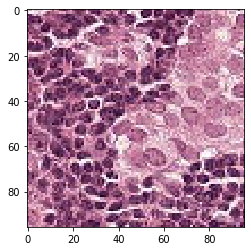

In [66]:
plt.imshow(plt.imread("{}\\test\\00006537328c33e284c973d7b39d340809f7271b.tif".format(test_directory)))

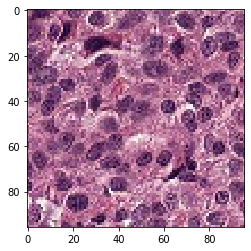

In [67]:
plt.imshow(plt.imread("{}\\test\\00573153447495d2baec1c9f64e29875915994c1.tif".format(test_directory)))

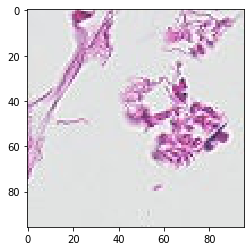

In [68]:
plt.imshow(plt.imread("{}\\test\\fffdd1cbb1ac0800f65309f344dd15e9331e1c53.tif".format(test_directory)))

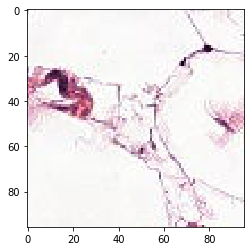

In [69]:
plt.imshow(plt.imread("{}\\test\\000c8db3e09f1c0f3652117cf84d78aae100e5a7.tif".format(test_directory)))